# 8 Queens

### Introduction

<figure>
<img src="resources/eight_queens_moves.png", width=300 align="right">
    <figcaption></figcaption>
</figure>

The [Eight Queens puzzle](https://en.wikipedia.org/wiki/Eight_queens_puzzle) is a famous puzzle that has been studied extensively in- and outside of computer science. It was first published in the chess magazine _Schach_ in 1848. 

The problem can be formulated as follows: 

_"Place 8 queens on a regular (8x8) chess board such that no queen attacks any other queen."_

A queen in the game of chess can move horizontally, vertically, and diagonally. The puzzle can be solved by hand (and even [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) studied it back in 1850).

The EightQueensState class below, as well as the methods defined, should prove a helpful start for a Genetic Algorithms approach. However, you are welcome to change as little or as much of the code as is useful.

In [1]:
import numpy as np

class EightQueensState:

    """This class represents a board in the eight queens puzzle"""
    def __init__(self, state=None, n=8):
        """
        :param state: pass in a numpy array of integers to set the state, otherwise will be generated randomly
        :param n: only used if state is not provided, determines size of board (default: 8)
        """
        if state is None:
            self.n = n
            state = np.random.randint(0, n, n)
        else:
            self.n = len(state)
        self.state = state

    @staticmethod
    def copy_replace(state, i, x):
        """This creates a copy of the state (important as numpy arrays are mutable) with column i set to x"""
        new_state = state.copy()
        new_state[i] = x
        return new_state

    @staticmethod
    def range_missing(start, stop, missing):
        """
        This creates a list of numbers with a single value missing
        e.g. range_missing(0, 8, 2) -> [0, 1, 3, 4, 5, 6, 7]
        """
        return list(range(start, missing)) + list(range(missing + 1, stop))

    def cost(self):
        """Calculates the number of pairs attacking"""
        count = 0
        for i in range(len(self.state) - 1):
            # for each queen, look in columns to the right
            # add one to the count if there is another queen in the same row
            count += (self.state[i] == np.array(self.state[i + 1:])).sum()

            # add one to the count for each queen on the upper or lower diagonal
            upper_diagonal = self.state[i] + np.arange(1, self.n - i)
            lower_diagonal = self.state[i] - np.arange(1, self.n - i)
            count += (np.array(self.state[i + 1:]) == upper_diagonal).sum()
            count += (np.array(self.state[i + 1:]) == lower_diagonal).sum()
        return count
    
    def neighbourhood(self):
        """This generates every state possible by changing a single queen position"""
        neighbourhood = []
        for column in range(self.n):
            for new_position in self.range_missing(0, self.n, self.state[column]):
                new_state = self.copy_replace(self.state, column, new_position)
                neighbourhood.append(EightQueensState(new_state))

        return neighbourhood

    def random_neighbour(self):
        """Generates a single random neighbour state, useful for some algorithms"""
        column = np.random.choice(range(self.n))
        new_position = np.random.choice(self.range_missing(0, self.n, self.state[column]))
        new_state = self.copy_replace(self.state, column, new_position)
        return EightQueensState(new_state)

    def is_goal(self):
        return self.cost() == 0

    def __str__(self):
        if self.is_goal():
            return f"Goal state! {self.state}"
        else:
            return f"{self.state} cost {self.cost()}"

A small probability function will cause a mutation 30% of the time.
    

In [2]:
import random

def small_probability(prob):
    return random.random() < prob


Checks whether one of the individuals in the population has no cost, which means no queens is attacking no other queen.

In [3]:
def one_is_goal(population):
    for i in population:
        if i.is_goal():
            return True

Does a split in a random position and concatenates one half of the list with the other half and vice versa. Thus produces and returns two new queen states.

In [4]:
def reproduce(x, y):
    split = random.randint(0, 8)
    tmp_child_list = x.state[0:split]
    tmp_child_list2 = y.state[split:len(y.state)+1]
    child_list = np.concatenate((tmp_child_list, tmp_child_list2), axis=0)
    child_list2 = np.concatenate((tmp_child_list2, tmp_child_list), axis=0)
    queen1 = EightQueensState(child_list, 8)
    queen2 = EightQueensState(child_list2, 8)
    return [queen1, queen2]
    

Sort the population based on the cost function and picks a subset of that population.
Thus the fitter the individual the more likely it is to get picked for the next iteration.

In [5]:
def selection(population):
    population = sorted(population, key=lambda population: population.cost())
    population = population[:int(0.2*len(population))]
    return population

Makes a random choice out of the filtered population and calls reproduce

In [6]:
def crossover(population):
    x, y = random.sample(population, 2)
    return reproduce(x, y)

The genetic algorithm implementation

In [7]:
def mutation(childs, prob):
    if small_probability(prob):
                childs[0] = childs[0].random_neighbour()
    return childs

In [8]:
p = 4

def Genetic_Algorithm(population,prob):
    rest = len(population) - p*2
    i = 0
    while not (one_is_goal(population)):
        new_population = []
        population = selection(population)
        i+=1
        print(f"Iteration {i}")
        print(population[0])
        for _ in range(p):
            childs = crossover(population)
            childs = mutation(childs, prob)
            new_population.append(childs[0])
            new_population.append(childs[1])
        for _ in range(rest):
            new_population.append(EightQueensState())
        population = new_population
    return population
    

Initialize population num of agents

In [9]:
def init_agents(population_num):
    return [EightQueensState() for _ in range(population_num)]

A complete find queens search with initialization included

In [10]:
import time

def find_queens_sol(times):  
    for i in range(100):
        random.seed(i)
        print("Current seed is:",i,"")
        population_num = 100
        population = init_agents(10)
        t0 = time.time()
        population = Genetic_Algorithm(population,0.3)
        t1 = time.time()
        total = t1-t0
        print(total)
        times.append(total)
        for k in population:
            if k.cost()==0:
                print(k)
                solved = k
    return solved

times = []               
last_solved = find_queens_sol(times)        


Current seed is: 0 
Iteration 1
[3 4 7 5 2 0 5 7] cost 4
Iteration 2
[3 4 7 5 2 0 5 7] cost 4
Iteration 3
[2 0 5 0 0 3 7 7] cost 4
Iteration 4
[2 0 5 0 0 3 7 7] cost 4
Iteration 5
[2 0 5 0 0 3 7 2] cost 4
Iteration 6
[2 0 5 0 0 3 7 7] cost 4
Iteration 7
[2 0 5 0 0 3 7 7] cost 4
Iteration 8
[2 0 5 0 0 3 7 7] cost 4
Iteration 9
[2 0 3 7 7 2 0 5] cost 3
Iteration 10
[0 5 0 0 3 7 7 2] cost 4
Iteration 11
[3 7 7 2 0 5 0 5] cost 3
Iteration 12
[0 5 0 5 3 7 7 2] cost 4
Iteration 13
[0 5 3 7 3 7 7 2] cost 6
Iteration 14
[2 3 7 7 2 0 5 3] cost 5
Iteration 15
[2 3 7 7 2 0 5 3] cost 5
Iteration 16
[3 3 7 7 2 0 5 3] cost 5
Iteration 17
[6 3 7 7 2 0 5 3] cost 4
Iteration 18
[1 3 7 7 2 0 5 3] cost 3
Iteration 19
[1 3 7 7 2 0 5 6] cost 2
Iteration 20
[3 7 7 2 0 5 6 0] cost 3
Iteration 21
[3 7 7 2 0 5 6 0] cost 3
Iteration 22
[3 7 7 2 0 5 6 0] cost 3
Iteration 23
[3 7 7 2 0 5 6 0] cost 3
Iteration 24
[3 7 7 2 0 5 6 0] cost 3
Iteration 25
[3 7 7 2 0 5 6 0] cost 3
Iteration 26
[3 7 7 2 0 5 6 0] cost 3
I

Iteration 260
[3 0 2 7 5 3 1 4] cost 1
Iteration 261
[3 0 2 7 5 3 1 4] cost 1
Iteration 262
[3 0 2 7 5 3 1 4] cost 1
Iteration 263
[3 0 2 7 5 3 1 4] cost 1
Iteration 264
[3 0 2 7 5 3 1 4] cost 1
Iteration 265
[3 0 2 7 5 6 1 7] cost 3
Iteration 266
[3 0 2 7 5 6 1 7] cost 3
Iteration 267
[3 0 2 7 5 6 1 7] cost 3
Iteration 268
[6 1 7 3 0 2 7 5] cost 3
Iteration 269
[6 1 7 3 0 2 7 5] cost 3
Iteration 270
[6 0 2 7 5 3 1 7] cost 2
Iteration 271
[3 1 7 3 0 2 7 5] cost 3
Iteration 272
[3 1 7 6 0 2 7 5] cost 3
Iteration 273
[3 1 7 3 0 2 7 5] cost 3
Iteration 274
[3 1 7 3 0 2 7 5] cost 3
Iteration 275
[7 3 0 2 7 5 3 1] cost 2
Iteration 276
[7 3 0 2 7 5 7 5] cost 5
Iteration 277
[1 3 1 7 7 3 0 2] cost 3
Iteration 278
[7 3 0 2 7 5 0 2] cost 3
Iteration 279
[5 0 2 0 7 1 6 1] cost 3
Iteration 280
[5 0 2 0 7 1 6 1] cost 3
Iteration 281
[5 0 2 0 7 1 6 1] cost 3
Iteration 282
[5 0 2 0 7 1 6 3] cost 3
Iteration 283
[1 5 0 2 0 7 1 3] cost 3
Iteration 284
[1 5 0 2 0 7 1 3] cost 3
Iteration 285
[1 5 0 2 0 

[2 4 6 1 3 5 7 2] cost 1
Iteration 138
[2 4 6 1 3 5 7 2] cost 1
Iteration 139
[2 4 6 1 3 5 7 2] cost 1
Iteration 140
[2 4 6 1 3 5 7 2] cost 1
Iteration 141
[2 4 6 1 3 5 7 2] cost 1
Iteration 142
[2 4 6 1 3 5 7 2] cost 1
Iteration 143
[2 4 6 1 3 5 7 2] cost 1
Iteration 144
[2 4 6 1 3 5 7 2] cost 1
Iteration 145
[2 4 6 1 3 5 7 2] cost 1
Iteration 146
[2 4 6 0 3 5 7 2] cost 1
Iteration 147
[6 4 6 0 3 5 7 2] cost 1
Iteration 148
[2 4 6 0 3 5 7 2] cost 1
Iteration 149
[2 4 6 0 3 1 7 2] cost 1
Iteration 150
[2 4 6 0 3 1 7 2] cost 1
Iteration 151
[2 4 6 0 3 5 7 2] cost 1
Iteration 152
[0 3 5 7 2 4 6 0] cost 3
Iteration 153
[6 0 3 1 7 2 6 0] cost 3
Iteration 154
[6 0 3 1 7 2 6 2] cost 2
Iteration 155
[6 0 3 1 7 2 3 5] cost 3
Iteration 156
[1 7 2 6 0 0 3 5] cost 3
Iteration 157
[1 7 2 6 0 0 3 5] cost 3
Iteration 158
[1 7 2 6 0 0 3 5] cost 3
Iteration 159
[1 7 2 6 0 0 3 5] cost 3
Iteration 160
[1 7 2 6 0 0 3 5] cost 3
Iteration 161
[1 7 2 4 0 0 3 5] cost 3
Iteration 162
[1 7 2 6 6 0 3 5] cost 2


Iteration 350
[7 2 4 6 1 3 5 7] cost 1
Iteration 351
[7 2 4 6 1 3 5 7] cost 1
Iteration 352
[7 2 4 6 1 3 5 7] cost 1
Iteration 353
[7 2 4 6 1 3 5 7] cost 1
Iteration 354
[7 2 4 6 1 3 5 7] cost 1
Iteration 355
[7 2 4 6 1 3 5 7] cost 1
Iteration 356
[7 2 4 6 1 3 5 7] cost 1
Iteration 357
[7 2 4 6 1 3 5 7] cost 1
Iteration 358
[4 2 4 6 1 3 5 7] cost 1
Iteration 359
[4 2 4 6 1 3 5 7] cost 1
Iteration 360
[4 2 4 6 1 3 5 7] cost 1
Iteration 361
[4 2 4 6 1 3 5 7] cost 1
Iteration 362
[4 2 4 6 1 3 5 7] cost 1
Iteration 363
[4 2 4 6 1 3 5 7] cost 1
Iteration 364
[4 2 4 6 1 3 5 7] cost 1
Iteration 365
[2 4 6 1 3 5 7 4] cost 1
Iteration 366
[2 4 6 1 3 5 7 4] cost 1
Iteration 367
[2 4 6 1 3 5 7 0] cost 1
Iteration 368
[2 4 6 1 3 5 7 4] cost 1
Iteration 369
[2 4 6 1 3 5 7 4] cost 1
Iteration 370
[2 4 6 1 3 5 7 4] cost 1
Iteration 371
[2 4 6 1 3 5 7 4] cost 1
Iteration 372
[2 4 6 1 3 5 7 4] cost 1
Iteration 373
[2 4 6 1 3 5 7 4] cost 1
Iteration 374
[7 2 4 6 1 3 5 7] cost 1
Iteration 375
[1 3 5 7 2 

Iteration 561
[0 2 6 1 7 4 1 3] cost 1
Iteration 562
[0 2 6 1 7 4 1 3] cost 1
Iteration 563
[0 2 6 1 7 4 1 3] cost 1
Iteration 564
[0 2 6 1 7 4 1 3] cost 1
Iteration 565
[0 2 6 1 7 4 1 3] cost 1
Iteration 566
[0 2 6 1 7 4 1 3] cost 1
Iteration 567
[0 2 6 1 7 4 1 3] cost 1
Iteration 568
[0 2 6 1 7 4 1 3] cost 1
Iteration 569
[0 2 6 1 7 4 1 3] cost 1
Iteration 570
[0 2 6 1 7 4 1 3] cost 1
Iteration 571
[0 2 6 1 7 4 1 3] cost 1
Iteration 572
[0 2 6 1 7 4 1 3] cost 1
Iteration 573
[5 2 6 1 7 4 1 3] cost 1
Iteration 574
[5 2 6 1 7 4 1 3] cost 1
Iteration 575
[5 2 6 1 7 4 1 3] cost 1
Iteration 576
[5 2 6 1 7 4 6 3] cost 1
Iteration 577
[5 2 6 1 7 4 6 3] cost 1
Iteration 578
[5 2 6 1 7 4 6 3] cost 1
Iteration 579
[5 2 6 1 7 4 6 3] cost 1
Iteration 580
[5 2 6 1 7 4 6 3] cost 1
Iteration 581
[5 2 6 1 7 4 6 3] cost 1
Iteration 582
[5 2 6 1 7 4 6 3] cost 1
Iteration 583
[5 2 6 1 7 4 6 3] cost 1
Iteration 584
[2 6 1 1 7 4 6 3] cost 3
Iteration 585
[6 1 1 7 4 6 3 5] cost 3
Iteration 586
[4 6 3 5 0 

Iteration 772
[3 6 0 4 1 1 5 2] cost 2
Iteration 773
[3 6 0 4 1 1 5 2] cost 2
Iteration 774
[3 6 0 4 1 1 5 2] cost 2
Iteration 775
[3 6 0 4 1 1 5 2] cost 2
Iteration 776
[3 6 0 4 1 1 5 2] cost 2
Iteration 777
[3 6 0 4 1 1 5 2] cost 2
Iteration 778
[3 6 0 4 1 1 5 2] cost 2
Iteration 779
[3 6 0 4 1 1 5 2] cost 2
Iteration 780
[3 6 0 4 1 1 5 2] cost 2
Iteration 781
[3 6 0 4 1 1 5 2] cost 2
Iteration 782
[3 6 0 4 1 1 5 2] cost 2
Iteration 783
[3 6 0 4 1 5 5 2] cost 2
Iteration 784
[3 6 0 4 1 1 5 2] cost 2
Iteration 785
[3 6 0 5 1 1 5 2] cost 2
Iteration 786
[3 6 0 5 1 1 5 2] cost 2
Iteration 787
[3 6 0 5 1 1 5 2] cost 2
Iteration 788
[3 6 0 7 1 1 5 2] cost 1
Iteration 789
[3 6 0 7 1 1 5 2] cost 1
Iteration 790
[3 6 0 7 1 1 5 2] cost 1
Iteration 791
[3 6 0 7 1 1 5 2] cost 1
Iteration 792
[3 6 0 7 1 1 5 2] cost 1
Iteration 793
[3 6 0 7 1 1 5 2] cost 1
Iteration 794
[3 6 0 7 1 1 5 2] cost 1
Iteration 795
[3 6 0 7 1 1 5 2] cost 1
Iteration 796
[3 6 0 7 1 1 5 2] cost 1
Iteration 797
[3 6 0 7 1 

Iteration 201
[1 3 7 2 0 2 6 4] cost 3
Iteration 202
[1 3 7 2 0 2 6 4] cost 3
Iteration 203
[1 3 7 2 0 2 6 4] cost 3
Iteration 204
[1 3 7 2 0 2 6 4] cost 3
Iteration 205
[1 3 7 2 0 2 6 4] cost 3
Iteration 206
[1 3 7 2 0 2 6 4] cost 3
Iteration 207
[1 3 7 2 0 3 6 4] cost 2
Iteration 208
[1 3 7 2 0 3 6 4] cost 2
Iteration 209
[1 3 7 2 0 3 6 4] cost 2
Iteration 210
[1 6 7 2 0 3 6 4] cost 2
Iteration 211
[1 3 7 2 0 3 6 4] cost 2
Iteration 212
[1 3 7 2 0 3 6 4] cost 2
Iteration 213
[1 3 7 2 0 3 6 4] cost 2
Iteration 214
[1 3 7 2 0 3 6 4] cost 2
Iteration 215
[1 6 7 2 0 3 6 4] cost 2
Iteration 216
[1 6 7 2 0 3 6 4] cost 2
Iteration 217
[1 6 7 2 0 3 6 4] cost 2
Iteration 218
[1 6 7 2 0 3 6 4] cost 2
Iteration 219
[1 6 7 2 0 3 6 4] cost 2
Iteration 220
[1 6 7 2 0 3 6 4] cost 2
Iteration 221
[1 6 7 2 0 3 6 4] cost 2
Iteration 222
[1 6 7 2 0 3 6 4] cost 2
Iteration 223
[1 6 7 2 0 3 6 4] cost 2
Iteration 224
[1 6 7 2 0 3 6 4] cost 2
Iteration 225
[1 6 7 2 0 3 6 4] cost 2
Iteration 226
[1 6 7 2 0 

Iteration 412
[0 7 5 6 2 0 7 4] cost 3
Iteration 413
[0 7 5 6 2 0 7 4] cost 3
Iteration 414
[0 7 5 6 2 0 7 4] cost 3
Iteration 415
[0 7 5 6 2 0 7 4] cost 3
Iteration 416
[0 7 5 6 2 0 7 4] cost 3
Iteration 417
[0 7 1 6 2 0 7 4] cost 2
Iteration 418
[0 7 1 6 2 0 7 4] cost 2
Iteration 419
[0 7 1 6 2 0 7 4] cost 2
Iteration 420
[0 7 1 6 2 0 7 4] cost 2
Iteration 421
[0 7 1 6 2 0 7 4] cost 2
Iteration 422
[0 7 1 6 2 0 7 4] cost 2
Iteration 423
[0 7 1 6 2 0 7 4] cost 2
Iteration 424
[2 7 1 6 2 0 7 4] cost 2
Iteration 425
[2 7 1 6 2 0 7 4] cost 2
Iteration 426
[5 7 1 6 2 0 7 4] cost 2
Iteration 427
[0 7 1 6 2 0 7 4] cost 2
Iteration 428
[0 7 1 6 2 0 7 4] cost 2
Iteration 429
[0 7 1 6 2 0 7 4] cost 2
Iteration 430
[0 7 1 6 2 0 7 4] cost 2
Iteration 431
[0 7 1 6 2 0 7 4] cost 2
Iteration 432
[0 7 1 6 2 0 7 4] cost 2
Iteration 433
[0 7 1 6 2 0 7 4] cost 2
Iteration 434
[0 7 1 6 2 0 7 4] cost 2
Iteration 435
[0 7 1 6 2 0 7 4] cost 2
Iteration 436
[5 7 1 6 2 0 7 4] cost 2
Iteration 437
[0 7 1 6 2 

Iteration 175
[3 3 5 7 4 6 0 2] cost 2
Iteration 176
[3 3 5 7 4 6 0 2] cost 2
Iteration 177
[3 3 5 7 4 6 0 2] cost 2
Iteration 178
[3 3 5 7 4 6 0 2] cost 2
Iteration 179
[3 3 5 7 4 6 0 2] cost 2
Iteration 180
[3 3 5 7 4 6 0 2] cost 2
Iteration 181
[3 3 5 7 4 6 0 2] cost 2
Iteration 182
[3 3 5 7 4 6 0 2] cost 2
Iteration 183
[3 1 5 7 4 6 0 2] cost 2
Iteration 184
[3 1 5 7 4 6 0 2] cost 2
Iteration 185
[3 1 5 7 4 6 0 2] cost 2
Iteration 186
[3 1 5 7 4 6 0 2] cost 2
Iteration 187
[3 1 5 7 4 6 0 2] cost 2
Iteration 188
[3 1 5 7 4 6 0 2] cost 2
Iteration 189
[3 1 5 7 4 6 0 2] cost 2
Iteration 190
[3 1 5 7 4 6 0 2] cost 2
Iteration 191
[3 1 5 7 4 6 0 2] cost 2
Iteration 192
[3 1 5 7 4 6 0 2] cost 2
Iteration 193
[3 1 5 7 4 6 0 2] cost 2
Iteration 194
[3 1 5 7 4 6 0 2] cost 2
Iteration 195
[3 1 5 7 4 6 0 2] cost 2
Iteration 196
[3 1 5 7 4 6 0 2] cost 2
Iteration 197
[3 1 5 7 4 6 0 2] cost 2
Iteration 198
[3 1 5 7 4 6 0 2] cost 2
Iteration 199
[3 1 5 7 4 6 0 2] cost 2
Iteration 200
[3 1 5 7 4 

Iteration 96
[2 6 2 0 7 0 4 3] cost 3
Iteration 97
[2 6 2 0 7 0 4 3] cost 3
Iteration 98
[2 6 2 0 7 0 4 3] cost 3
Iteration 99
[2 6 2 0 7 0 4 3] cost 3
Iteration 100
[2 6 2 0 7 0 4 3] cost 3
Iteration 101
[2 6 2 0 7 0 4 3] cost 3
Iteration 102
[2 6 2 0 7 0 4 3] cost 3
Iteration 103
[3 2 6 2 0 7 0 4] cost 3
Iteration 104
[2 6 2 0 7 0 5 3] cost 3
Iteration 105
[2 6 2 0 7 0 5 3] cost 3
Iteration 106
[6 2 0 7 0 2 6 2] cost 5
Iteration 107
[7 0 7 3 5 3 2 6] cost 5
Iteration 108
[7 0 5 3 1 3 2 6] cost 4
Iteration 109
[7 0 5 3 1 3 2 6] cost 4
Iteration 110
[0 5 3 1 3 2 6 3] cost 5
Iteration 111
[0 5 3 1 3 2 6 3] cost 5
Iteration 112
[0 5 3 1 7 2 6 3] cost 2
Iteration 113
[0 5 3 1 7 2 6 3] cost 2
Iteration 114
[0 5 3 1 7 2 6 3] cost 2
Iteration 115
[5 3 1 7 2 6 3 0] cost 1
Iteration 116
[5 3 1 7 2 6 3 0] cost 1
Iteration 117
[5 3 1 7 2 6 3 0] cost 1
Iteration 118
[5 3 1 7 2 6 3 0] cost 1
Iteration 119
[5 3 1 7 2 6 3 0] cost 1
Iteration 120
[5 3 1 7 2 6 3 0] cost 1
Iteration 121
[5 3 1 7 2 6 3 

Iteration 344
[3 6 0 5 1 5 2 6] cost 3
Iteration 345
[3 6 0 5 1 5 2 6] cost 3
Iteration 346
[3 6 0 5 1 5 2 7] cost 3
Iteration 347
[2 6 3 6 0 5 2 7] cost 4
Iteration 348
[2 7 5 2 7 2 6 3] cost 6
Iteration 349
[2 7 5 2 0 5 6 2] cost 5
Iteration 350
[2 7 5 2 7 2 6 3] cost 6
Iteration 351
[5 2 0 4 6 2 6 3] cost 5
Iteration 352
[5 2 0 4 6 2 6 3] cost 5
Iteration 353
[2 4 7 1 4 3 5 0] cost 3
Iteration 354
[2 4 7 1 4 2 6 3] cost 3
Iteration 355
[2 2 7 1 1 3 5 0] cost 3
Iteration 356
[2 2 7 1 1 3 5 0] cost 3
Iteration 357
[2 2 7 1 1 3 5 0] cost 3
Iteration 358
[2 2 7 1 1 3 5 0] cost 3
Iteration 359
[2 2 7 1 1 3 5 0] cost 3
Iteration 360
[2 2 7 7 1 3 5 0] cost 2
Iteration 361
[2 2 7 7 1 3 5 0] cost 2
Iteration 362
[2 2 7 7 1 3 5 0] cost 2
Iteration 363
[2 2 7 7 1 3 5 0] cost 2
Iteration 364
[2 2 7 7 1 3 5 0] cost 2
Iteration 365
[2 2 7 7 1 3 5 0] cost 2
Iteration 366
[2 2 7 7 1 3 5 0] cost 2
Iteration 367
[2 2 7 7 1 3 5 0] cost 2
Iteration 368
[6 2 7 7 1 3 5 0] cost 1
Iteration 369
[6 2 7 7 1 

Iteration 160
[7 1 4 1 0 6 3 6] cost 3
Iteration 161
[7 1 4 1 0 6 3 6] cost 3
Iteration 162
[7 4 4 1 0 6 3 5] cost 3
Iteration 163
[7 1 4 1 0 6 3 5] cost 3
Iteration 164
[0 6 3 5 7 1 4 1] cost 2
Iteration 165
[6 3 5 7 1 4 1 7] cost 3
Iteration 166
[6 3 5 0 1 4 1 7] cost 3
Iteration 167
[1 4 1 7 6 3 5 0] cost 3
Iteration 168
[1 4 1 7 6 3 5 0] cost 3
Iteration 169
[1 4 1 7 6 3 5 0] cost 3
Iteration 170
[1 4 1 7 6 3 5 0] cost 3
Iteration 171
[1 4 1 7 6 3 5 0] cost 3
Iteration 172
[1 4 1 7 6 3 5 0] cost 3
Iteration 173
[1 4 1 7 6 3 5 0] cost 3
Iteration 174
[1 4 1 7 6 3 5 0] cost 3
Iteration 175
[1 4 1 7 6 3 5 0] cost 3
Iteration 176
[1 4 1 7 6 3 5 0] cost 3
Iteration 177
[6 4 1 7 6 3 5 0] cost 3
Iteration 178
[4 1 7 6 3 5 0 4] cost 3
Iteration 179
[4 1 7 6 6 3 5 0] cost 2
Iteration 180
[4 1 7 6 6 3 5 0] cost 2
Iteration 181
[4 1 7 6 6 3 5 0] cost 2
Iteration 182
[4 1 7 6 6 3 5 0] cost 2
Iteration 183
[4 1 7 6 6 3 5 0] cost 2
Iteration 184
[4 1 7 6 6 3 5 0] cost 2
Iteration 185
[4 1 7 6 6 

Iteration 419
[5 2 4 7 0 3 1 4] cost 1
Iteration 420
[5 2 4 7 0 3 1 4] cost 1
Iteration 421
[5 2 4 7 0 3 1 4] cost 1
Iteration 422
[5 2 4 7 0 3 1 4] cost 1
Iteration 423
[5 2 4 7 0 3 1 4] cost 1
Iteration 424
[5 2 4 7 0 3 1 4] cost 1
Iteration 425
[5 2 4 7 0 3 1 4] cost 1
Iteration 426
[5 2 4 7 0 3 1 4] cost 1
Iteration 427
[5 2 4 7 0 3 1 4] cost 1
Iteration 428
[5 2 4 7 0 3 1 4] cost 1
Iteration 429
[5 2 4 7 0 3 1 4] cost 1
Iteration 430
[5 2 4 7 0 3 1 4] cost 1
Iteration 431
[5 2 4 7 0 3 1 4] cost 1
Iteration 432
[5 2 4 7 0 3 1 4] cost 1
Iteration 433
[5 2 4 7 0 3 1 4] cost 1
Iteration 434
[5 2 4 7 0 3 1 4] cost 1
Iteration 435
[5 2 4 7 0 3 1 4] cost 1
Iteration 436
[5 2 4 7 0 3 1 4] cost 1
Iteration 437
[5 2 4 7 0 3 1 4] cost 1
Iteration 438
[5 2 4 7 0 3 1 4] cost 1
Iteration 439
[5 2 4 7 0 3 1 4] cost 1
Iteration 440
[5 2 4 7 0 3 1 4] cost 1
Iteration 441
[5 2 4 7 0 3 1 4] cost 1
Iteration 442
[5 2 4 7 0 3 1 4] cost 1
Iteration 443
[5 2 4 7 0 3 1 4] cost 1
Iteration 444
[5 2 4 7 0 

Iteration 230
[4 2 0 6 0 5 1 4] cost 3
Iteration 231
[4 2 0 6 0 5 1 4] cost 3
Iteration 232
[4 2 0 6 0 5 1 4] cost 3
Iteration 233
[7 2 0 6 0 5 1 4] cost 2
Iteration 234
[7 2 0 6 0 5 1 4] cost 2
Iteration 235
[7 2 0 6 0 5 1 4] cost 2
Iteration 236
[7 2 0 6 0 5 1 4] cost 2
Iteration 237
[0 6 0 5 1 4 7 2] cost 2
Iteration 238
[5 1 4 7 2 2 0 6] cost 4
Iteration 239
[5 1 4 7 2 2 0 6] cost 4
Iteration 240
[5 1 4 7 2 2 0 6] cost 4
Iteration 241
[5 1 4 7 2 3 0 6] cost 4
Iteration 242
[5 1 4 7 2 2 0 6] cost 4
Iteration 243
[5 1 1 7 2 2 0 6] cost 4
Iteration 244
[5 1 4 7 4 3 0 6] cost 4
Iteration 245
[5 1 4 7 7 3 0 6] cost 2
Iteration 246
[5 1 4 7 7 3 2 6] cost 2
Iteration 247
[5 1 4 7 7 3 2 6] cost 2
Iteration 248
[5 1 4 7 7 3 2 6] cost 2
Iteration 249
[5 1 4 7 7 3 2 6] cost 2
Iteration 250
[5 1 4 7 7 3 2 6] cost 2
Iteration 251
[5 1 4 7 7 3 2 6] cost 2
Iteration 252
[5 1 4 7 7 3 2 6] cost 2
Iteration 253
[5 1 4 7 7 3 2 6] cost 2
Iteration 254
[5 1 4 7 7 3 2 6] cost 2
Iteration 255
[5 1 4 7 7 

[1 5 2 6 3 7 4 4] cost 1
Iteration 491
[3 7 4 1 5 2 6 3] cost 1
Iteration 492
[3 7 4 1 5 2 6 3] cost 1
Iteration 493
[3 7 4 1 5 2 6 3] cost 1
Iteration 494
[3 7 4 1 5 2 6 3] cost 1
Iteration 495
[3 7 4 1 5 2 6 3] cost 1
Iteration 496
[3 7 4 1 5 2 6 3] cost 1
Iteration 497
[3 7 4 1 5 2 6 3] cost 1
Iteration 498
[3 7 4 1 5 2 6 3] cost 1
Iteration 499
[3 7 4 1 5 2 6 3] cost 1
Iteration 500
[3 7 4 1 5 2 6 3] cost 1
Iteration 501
[3 7 4 1 5 2 6 3] cost 1
Iteration 502
[7 4 1 5 2 6 3 3] cost 1
Iteration 503
[7 4 1 5 2 6 3 7] cost 1
Iteration 504
[4 1 5 2 6 3 7 4] cost 1
Iteration 505
[2 6 3 7 4 1 5 2] cost 1
Iteration 506
[2 6 3 7 4 1 5 2] cost 1
Iteration 507
[2 6 3 7 4 1 5 2] cost 1
Iteration 508
[2 6 3 7 4 1 5 2] cost 1
Iteration 509
[5 2 2 6 3 7 4 1] cost 1
Iteration 510
[5 2 2 6 3 7 4 1] cost 1
Iteration 511
[5 2 2 6 3 7 4 1] cost 1
Iteration 512
[2 2 6 3 7 4 1 5] cost 1
Iteration 513
[2 2 6 3 7 4 1 5] cost 1
Iteration 514
[2 2 6 3 7 4 1 5] cost 1
Iteration 515
[2 2 6 3 7 4 1 5] cost 1


Iteration 701
[2 4 7 1 3 5 6 1] cost 2
Iteration 702
[2 4 7 1 3 5 6 1] cost 2
Iteration 703
[2 4 7 1 3 5 6 1] cost 2
Iteration 704
[2 4 7 1 3 5 6 1] cost 2
Iteration 705
[2 4 7 1 3 5 6 1] cost 2
Iteration 706
[2 4 7 1 3 5 6 1] cost 2
Iteration 707
[2 4 7 1 3 5 6 1] cost 2
Iteration 708
[2 4 7 1 3 5 6 1] cost 2
Iteration 709
[2 4 7 1 3 5 6 1] cost 2
Iteration 710
[2 4 7 1 3 5 6 4] cost 2
Iteration 711
[2 4 7 1 3 5 6 1] cost 2
Iteration 712
[2 4 7 1 3 5 6 1] cost 2
Iteration 713
[2 4 7 1 3 5 6 1] cost 2
Iteration 714
[2 4 7 1 3 5 6 1] cost 2
Iteration 715
[2 4 7 1 3 5 6 1] cost 2
Iteration 716
[2 4 7 1 3 5 6 1] cost 2
Iteration 717
[2 4 7 1 3 5 6 1] cost 2
Iteration 718
[2 4 7 1 3 5 6 1] cost 2
Iteration 719
[2 4 7 1 3 5 6 1] cost 2
Iteration 720
[2 4 7 1 3 5 6 1] cost 2
Iteration 721
[2 4 7 1 3 5 6 1] cost 2
Iteration 722
[2 4 7 1 3 5 6 1] cost 2
Iteration 723
[2 4 7 1 3 5 6 1] cost 2
Iteration 724
[2 4 7 1 3 0 6 1] cost 2
Iteration 725
[2 4 7 1 3 0 6 1] cost 2
Iteration 726
[2 4 7 1 3 

Iteration 962
[2 5 1 4 0 3 3 7] cost 1
Iteration 963
[2 5 1 4 0 3 3 7] cost 1
Iteration 964
[2 5 1 4 0 3 3 7] cost 1
Iteration 965
[7 2 2 5 1 4 0 3] cost 1
Iteration 966
[5 1 4 7 2 2 5 1] cost 4
Iteration 967
[7 2 7 2 2 5 1 4] cost 5
Iteration 968
[1 3 4 2 0 5 3 1] cost 4
Iteration 969
[1 3 7 2 2 5 1 4] cost 2
Iteration 970
[1 4 7 2 2 5 1 4] cost 4
Iteration 971
[1 4 7 2 2 5 1 4] cost 4
Iteration 972
[1 4 6 2 4 7 0 2] cost 4
Iteration 973
[1 4 0 2 4 7 1 4] cost 5
Iteration 974
[6 2 4 7 0 2 1 4] cost 5
Iteration 975
[2 4 7 0 2 1 4 6] cost 4
Iteration 976
[2 4 7 0 2 1 4 6] cost 4
Iteration 977
[1 4 6 2 4 7 0 2] cost 4
Iteration 978
[1 4 6 2 4 7 0 2] cost 4
Iteration 979
[1 4 6 2 4 7 0 2] cost 4
Iteration 980
[1 4 6 2 4 7 0 3] cost 3
Iteration 981
[1 4 6 2 4 7 0 3] cost 3
Iteration 982
[1 4 6 2 4 7 0 3] cost 3
Iteration 983
[4 6 2 4 7 0 3 1] cost 3
Iteration 984
[2 4 7 0 3 1 4 6] cost 2
Iteration 985
[6 2 4 7 0 3 1 4] cost 2
Iteration 986
[6 2 4 7 0 3 1 4] cost 2
Iteration 987
[6 2 4 7 0 

Iteration 1171
[3 0 4 7 0 6 1 2] cost 2
Iteration 1172
[3 0 4 7 0 6 1 2] cost 2
Iteration 1173
[3 0 4 7 0 6 1 2] cost 2
Iteration 1174
[3 0 4 7 0 6 1 2] cost 2
Iteration 1175
[3 0 4 7 0 6 1 2] cost 2
Iteration 1176
[3 0 4 7 0 6 1 2] cost 2
Iteration 1177
[3 0 4 7 0 6 1 2] cost 2
Iteration 1178
[3 0 4 7 0 6 1 2] cost 2
Iteration 1179
[3 0 4 7 0 6 6 2] cost 2
Iteration 1180
[3 0 4 7 0 6 1 2] cost 2
Iteration 1181
[3 0 4 7 0 6 1 2] cost 2
Iteration 1182
[3 0 4 7 0 6 1 2] cost 2
Iteration 1183
[3 0 4 7 0 6 1 2] cost 2
Iteration 1184
[3 0 4 7 0 6 1 2] cost 2
Iteration 1185
[3 0 4 7 0 6 1 2] cost 2
Iteration 1186
[3 0 4 7 0 6 1 2] cost 2
Iteration 1187
[3 0 4 7 0 6 1 2] cost 2
Iteration 1188
[3 0 4 7 0 6 1 2] cost 2
Iteration 1189
[3 0 4 7 0 6 1 2] cost 2
Iteration 1190
[3 0 4 7 0 6 1 2] cost 2
Iteration 1191
[3 0 4 7 0 6 1 2] cost 2
Iteration 1192
[3 0 4 7 0 6 1 2] cost 2
Iteration 1193
[3 0 4 7 0 6 1 2] cost 2
Iteration 1194
[3 0 4 7 0 6 1 2] cost 2
Iteration 1195
[3 0 4 7 0 6 1 2] cost 2


[2 3 6 6 1 1 5 5] cost 4
Iteration 17
[3 6 6 1 5 1 5 2] cost 4
Iteration 18
[3 6 6 1 5 1 5 2] cost 4
Iteration 19
[3 6 6 1 5 1 5 2] cost 4
Iteration 20
[3 6 3 1 4 7 5 7] cost 3
Iteration 21
[3 6 3 1 4 7 5 7] cost 3
Iteration 22
[3 6 3 1 4 7 5 7] cost 3
Iteration 23
[3 6 3 1 4 7 5 7] cost 3
Iteration 24
[3 6 3 1 4 7 5 0] cost 2
Iteration 25
[3 6 3 1 4 7 5 0] cost 2
Iteration 26
[3 6 3 1 4 7 5 0] cost 2
Iteration 27
[3 6 3 1 4 7 5 0] cost 2
Iteration 28
[3 1 4 7 5 0 3 6] cost 2
Iteration 29
[3 1 4 7 5 0 3 6] cost 2
Iteration 30
[3 1 4 7 5 0 3 6] cost 2
Iteration 31
[3 1 4 7 5 0 3 6] cost 2
Iteration 32
[3 1 4 7 5 0 3 6] cost 2
Iteration 33
[3 1 4 7 5 0 3 6] cost 2
Iteration 34
[3 1 4 7 5 0 3 6] cost 2
Iteration 35
[3 1 4 7 5 0 3 6] cost 2
Iteration 36
[3 1 4 7 5 0 3 6] cost 2
Iteration 37
[0 3 6 3 1 4 7 5] cost 2
Iteration 38
[0 3 6 3 1 4 7 5] cost 2
Iteration 39
[0 3 6 3 1 4 7 5] cost 2
Iteration 40
[6 3 1 4 7 5 3 1] cost 2
Iteration 41
[6 3 1 4 7 5 3 1] cost 2
Iteration 42
[6 3 1 4 7 5

Iteration 268
[0 6 4 2 0 3 7 5] cost 2
Iteration 269
[0 6 4 2 0 3 7 5] cost 2
Iteration 270
[0 6 4 2 0 3 7 5] cost 2
Iteration 271
[0 6 4 2 0 3 7 7] cost 3
Iteration 272
[7 0 6 4 2 0 3 7] cost 3
Iteration 273
[7 0 6 4 2 0 3 7] cost 3
Iteration 274
[4 2 0 3 7 4 2 0] cost 3
Iteration 275
[4 2 0 5 7 4 0 3] cost 2
Iteration 276
[4 2 0 5 7 0 0 3] cost 3
Iteration 277
[4 2 0 5 7 0 3 3] cost 2
Iteration 278
[4 2 0 5 7 0 3 3] cost 2
Iteration 279
[4 2 0 5 7 0 3 3] cost 2
Iteration 280
[4 2 0 5 7 0 3 3] cost 2
Iteration 281
[4 2 0 5 7 0 3 3] cost 2
Iteration 282
[4 2 0 5 7 0 3 3] cost 2
Iteration 283
[4 2 0 5 7 0 3 3] cost 2
Iteration 284
[4 2 0 5 7 0 3 3] cost 2
Iteration 285
[4 2 0 5 7 0 3 3] cost 2
Iteration 286
[4 2 0 5 7 0 3 3] cost 2
Iteration 287
[4 2 0 5 7 0 3 3] cost 2
Iteration 288
[4 2 0 5 7 0 3 3] cost 2
Iteration 289
[4 2 0 5 7 0 3 6] cost 1
Iteration 290
[2 0 5 7 0 3 6 4] cost 1
Iteration 291
[4 2 0 5 7 0 3 3] cost 2
Iteration 292
[4 2 0 5 7 0 3 3] cost 2
Iteration 293
[4 2 0 5 7 

Iteration 25
[7 3 1 6 2 0 7 3] cost 2
Iteration 26
[7 3 1 6 2 0 7 3] cost 2
Iteration 27
[7 3 1 6 2 0 7 7] cost 3
Iteration 28
[7 3 1 6 2 0 7 7] cost 3
Iteration 29
[7 3 1 6 2 0 7 7] cost 3
Iteration 30
[7 3 1 6 2 0 7 1] cost 2
Iteration 31
[7 3 1 6 2 0 7 1] cost 2
Iteration 32
[5 3 1 6 2 0 7 1] cost 2
Iteration 33
[5 3 1 6 2 0 7 7] cost 2
Iteration 34
[7 3 1 6 2 0 7 1] cost 2
Iteration 35
[7 3 1 6 2 0 7 5] cost 2
Iteration 36
[7 3 1 6 2 0 7 5] cost 2
Iteration 37
[5 7 3 1 6 2 0 7] cost 2
Iteration 38
[1 6 2 0 7 7 3 1] cost 3
Iteration 39
[6 2 0 7 7 3 1 7] cost 4
Iteration 40
[6 2 0 7 7 3 1 3] cost 4
Iteration 41
[6 2 0 7 7 3 1 3] cost 4
Iteration 42
[7 7 3 1 3 1 6 2] cost 4
Iteration 43
[7 7 3 1 3 1 6 2] cost 4
Iteration 44
[2 7 1 3 5 0 2 6] cost 3
Iteration 45
[1 6 2 2 7 1 3 5] cost 2
Iteration 46
[1 6 2 2 7 1 3 5] cost 2
Iteration 47
[1 6 2 2 7 1 3 5] cost 2
Iteration 48
[1 6 2 2 7 1 3 5] cost 2
Iteration 49
[1 6 2 2 7 1 3 5] cost 2
Iteration 50
[1 6 2 2 7 1 3 5] cost 2
Iteration 51

Iteration 282
[5 2 2 6 6 7 0 4] cost 3
Iteration 283
[5 2 2 1 6 7 0 4] cost 3
Iteration 284
[5 2 2 6 6 7 0 4] cost 3
Iteration 285
[4 1 7 2 7 2 0 5] cost 2
Iteration 286
[4 1 7 2 7 2 0 5] cost 2
Iteration 287
[4 1 7 2 7 2 0 5] cost 2
Iteration 288
[4 1 7 2 7 2 0 5] cost 2
Iteration 289
[4 1 7 2 7 2 0 5] cost 2
Iteration 290
[4 1 7 2 7 2 0 5] cost 2
Iteration 291
[4 1 7 2 7 2 0 5] cost 2
Iteration 292
[4 1 7 2 7 2 0 5] cost 2
Iteration 293
[4 1 7 2 7 2 0 5] cost 2
Iteration 294
[4 1 7 2 7 2 0 5] cost 2
Iteration 295
[4 1 7 2 7 2 0 5] cost 2
Iteration 296
[4 1 7 2 7 2 0 5] cost 2
Iteration 297
[4 1 7 2 7 2 0 5] cost 2
Iteration 298
[4 1 7 2 7 2 0 5] cost 2
Iteration 299
[4 1 7 2 7 2 0 5] cost 2
Iteration 300
[4 1 7 2 7 2 0 5] cost 2
Iteration 301
[4 1 7 2 7 2 0 5] cost 2
Iteration 302
[4 1 7 2 7 2 0 5] cost 2
Iteration 303
[4 1 7 2 7 2 0 5] cost 2
Iteration 304
[4 1 7 2 7 2 0 5] cost 2
Iteration 305
[4 1 7 2 7 2 0 5] cost 2
Iteration 306
[4 1 7 2 7 3 0 5] cost 2
Iteration 307
[4 1 7 2 7 

[2 4 6 1 5 4 0 3] cost 2
Iteration 534
[2 4 6 1 5 4 0 3] cost 2
Iteration 535
[2 4 6 1 5 4 0 3] cost 2
Iteration 536
[2 4 6 1 5 4 0 3] cost 2
Iteration 537
[2 4 6 1 5 4 0 3] cost 2
Iteration 538
[2 4 6 1 7 4 0 3] cost 2
Iteration 539
[2 4 6 1 7 4 0 3] cost 2
Iteration 540
[2 4 6 1 7 4 0 3] cost 2
Iteration 541
[2 4 6 1 7 4 0 3] cost 2
Iteration 542
[2 4 6 1 7 4 0 3] cost 2
Iteration 543
[2 4 6 1 7 4 0 3] cost 2
Iteration 544
[2 4 6 1 7 4 0 3] cost 2
Iteration 545
[2 4 6 1 7 2 0 3] cost 2
Iteration 546
[2 4 6 1 7 2 0 3] cost 2
Iteration 547
[2 4 6 1 7 2 0 3] cost 2
Iteration 548
[2 4 6 1 7 2 0 3] cost 2
Iteration 549
[2 4 6 1 7 2 0 3] cost 2
Iteration 550
[2 4 6 1 7 2 0 3] cost 2
Iteration 551
[2 4 6 1 7 2 0 3] cost 2
Iteration 552
[2 4 6 1 7 2 0 3] cost 2
Iteration 553
[2 4 6 1 7 2 0 3] cost 2
Iteration 554
[6 1 7 2 0 3 1 4] cost 1
Iteration 555
[6 1 7 2 0 3 1 4] cost 1
Iteration 556
[6 1 7 2 0 3 1 4] cost 1
Iteration 557
[6 1 7 2 0 3 1 4] cost 1
Iteration 558
[6 1 7 2 0 3 1 4] cost 1


Iteration 795
[1 4 7 7 2 0 2 6] cost 3
Iteration 796
[1 4 7 7 2 0 2 6] cost 3
Iteration 797
[1 4 7 7 2 0 2 6] cost 3
Iteration 798
[1 4 7 7 2 0 2 6] cost 3
Iteration 799
[1 4 7 7 2 0 2 6] cost 3
Iteration 800
[1 4 7 7 2 0 2 6] cost 3
Iteration 801
[1 4 7 7 2 0 2 6] cost 3
Iteration 802
[1 4 7 7 2 0 2 6] cost 3
Iteration 803
[1 4 7 7 2 0 2 6] cost 3
Iteration 804
[1 4 7 7 2 0 5 6] cost 3
Iteration 805
[1 4 7 7 2 0 5 6] cost 3
Iteration 806
[1 4 7 7 2 0 5 6] cost 3
Iteration 807
[1 4 7 7 2 0 5 6] cost 3
Iteration 808
[1 4 7 7 2 0 5 6] cost 3
Iteration 809
[1 4 7 7 2 0 5 6] cost 3
Iteration 810
[1 4 7 7 2 0 6 6] cost 3
Iteration 811
[1 4 7 7 2 0 6 6] cost 3
Iteration 812
[1 4 7 7 2 0 6 6] cost 3
Iteration 813
[1 4 7 7 2 0 6 6] cost 3
Iteration 814
[1 4 7 7 2 0 6 6] cost 3
Iteration 815
[1 4 7 7 2 0 6 6] cost 3
Iteration 816
[1 4 7 7 2 0 6 6] cost 3
Iteration 817
[1 4 7 7 2 2 6 6] cost 3
Iteration 818
[1 4 7 7 2 0 6 6] cost 3
Iteration 819
[1 4 7 7 2 0 6 6] cost 3
Iteration 820
[1 4 7 7 2 

Iteration 221
[2 7 5 1 7 4 6 3] cost 2
Iteration 222
[2 7 5 1 7 4 6 3] cost 2
Iteration 223
[2 7 5 1 1 4 6 3] cost 1
Iteration 224
[2 7 5 1 1 4 6 3] cost 1
Iteration 225
[2 7 5 1 1 4 6 3] cost 1
Iteration 226
[2 7 5 1 1 4 6 3] cost 1
Iteration 227
[2 7 5 1 1 4 6 3] cost 1
Iteration 228
[2 7 5 1 1 4 6 3] cost 1
Iteration 229
[2 7 5 1 1 4 6 3] cost 1
Iteration 230
[2 7 5 1 1 4 6 3] cost 1
Iteration 231
[2 7 5 1 1 4 6 3] cost 1
Iteration 232
[2 7 5 1 1 4 6 3] cost 1
Iteration 233
[2 7 5 1 1 4 6 3] cost 1
Iteration 234
[2 7 5 1 1 4 6 3] cost 1
Iteration 235
[2 7 5 1 1 4 6 3] cost 1
Iteration 236
[2 7 5 1 1 4 6 3] cost 1
Iteration 237
[2 7 5 1 1 4 6 3] cost 1
Iteration 238
[2 7 5 1 1 4 6 3] cost 1
Iteration 239
[2 7 5 1 1 4 6 3] cost 1
Iteration 240
[2 7 5 1 1 4 6 3] cost 1
Iteration 241
[2 7 5 1 1 4 0 3] cost 1
Iteration 242
[2 7 5 1 1 4 0 3] cost 1
Iteration 243
[2 7 5 1 1 4 0 3] cost 1
Iteration 244
[2 7 5 1 1 4 0 3] cost 1
Iteration 245
[2 7 5 1 1 4 0 3] cost 1
Iteration 246
[2 7 5 1 1 

Iteration 431
[7 1 1 6 5 3 0 4] cost 2
Iteration 432
[7 1 1 6 5 3 0 4] cost 2
Iteration 433
[7 1 1 6 5 3 0 4] cost 2
Iteration 434
[7 1 1 6 5 3 0 4] cost 2
Iteration 435
[7 1 1 7 5 3 0 4] cost 2
Iteration 436
[7 1 1 6 5 3 0 4] cost 2
Iteration 437
[7 1 1 6 5 3 0 4] cost 2
Iteration 438
[7 1 1 7 5 3 0 4] cost 2
Iteration 439
[7 1 1 6 5 3 0 4] cost 2
Iteration 440
[7 1 1 6 5 3 0 4] cost 2
Iteration 441
[5 3 0 6 5 3 0 4] cost 5
Iteration 442
[3 0 4 6 5 3 0 4] cost 6
Iteration 443
[3 0 4 6 5 5 0 4] cost 6
Iteration 444
[5 3 6 3 7 2 3 5] cost 5
Iteration 445
[0 4 5 3 6 3 7 2] cost 3
Iteration 446
[0 4 5 3 6 3 7 2] cost 3
Iteration 447
[0 4 5 3 6 3 7 2] cost 3
Iteration 448
[0 4 5 3 6 3 7 2] cost 3
Iteration 449
[0 4 1 3 6 3 7 2] cost 2
Iteration 450
[0 4 1 3 6 3 7 2] cost 2
Iteration 451
[0 4 1 3 6 3 7 2] cost 2
Iteration 452
[4 4 1 3 6 3 7 2] cost 2
Iteration 453
[4 1 3 6 3 7 2 4] cost 2
Iteration 454
[4 1 3 6 3 7 2 4] cost 2
Iteration 455
[4 4 1 3 6 3 7 2] cost 2
Iteration 456
[4 4 1 3 6 

Iteration 641
[0 5 1 6 2 3 7 4] cost 2
Iteration 642
[0 5 1 6 2 3 7 4] cost 2
Iteration 643
[0 5 1 6 2 3 7 4] cost 2
Iteration 644
[0 5 1 6 2 3 7 4] cost 2
Iteration 645
[0 5 1 6 2 3 7 4] cost 2
Iteration 646
[0 5 1 6 2 3 7 4] cost 2
Iteration 647
[0 5 1 6 1 3 7 4] cost 2
Iteration 648
[4 0 5 1 6 1 3 7] cost 2
Iteration 649
[4 0 5 1 6 1 3 7] cost 2
Iteration 650
[4 0 5 1 6 1 3 7] cost 2
Iteration 651
[4 0 5 1 6 1 3 7] cost 2
Iteration 652
[0 5 1 6 0 3 7 4] cost 1
Iteration 653
[0 5 1 6 0 3 7 4] cost 1
Iteration 654
[0 5 1 6 0 3 7 4] cost 1
Iteration 655
[0 5 1 6 0 3 7 4] cost 1
Iteration 656
[0 5 1 6 0 3 7 4] cost 1
Iteration 657
[0 5 1 6 0 3 7 4] cost 1
Iteration 658
[0 5 1 6 0 3 7 4] cost 1
Iteration 659
[0 5 1 6 0 3 7 4] cost 1
Iteration 660
[0 5 1 6 0 3 7 4] cost 1
Iteration 661
[0 5 1 6 0 3 7 4] cost 1
Iteration 662
[0 5 1 6 0 3 7 4] cost 1
Iteration 663
[0 5 1 6 0 3 7 4] cost 1
Iteration 664
[0 5 1 6 0 3 7 4] cost 1
Iteration 665
[0 5 1 6 0 3 7 4] cost 1
Iteration 666
[0 5 1 6 0 

Iteration 108
[1 3 7 3 7 0 4 1] cost 3
Iteration 109
[1 3 7 3 7 0 4 1] cost 3
Iteration 110
[1 3 7 3 7 0 4 1] cost 3
Iteration 111
[1 3 7 3 7 0 4 1] cost 3
Iteration 112
[6 3 7 3 7 0 4 1] cost 3
Iteration 113
[6 3 7 2 7 0 4 1] cost 2
Iteration 114
[6 3 7 2 7 0 4 1] cost 2
Iteration 115
[2 7 0 4 1 1 6 3] cost 3
Iteration 116
[2 7 0 4 1 1 6 3] cost 3
Iteration 117
[2 7 0 4 1 1 6 3] cost 3
Iteration 118
[2 7 0 4 1 1 6 3] cost 3
Iteration 119
[2 7 0 4 1 1 6 3] cost 3
Iteration 120
[6 5 0 2 4 7 1 3] cost 1
Iteration 121
[6 5 0 2 4 7 1 3] cost 1
Iteration 122
[6 5 0 2 4 7 1 3] cost 1
Iteration 123
[6 5 0 2 4 7 1 3] cost 1
Iteration 124
[6 5 0 2 4 7 1 3] cost 1
Iteration 125
[3 5 0 2 4 7 1 3] cost 1
Iteration 126
[6 5 0 2 4 7 1 3] cost 1
Iteration 127
[6 5 0 2 4 7 1 3] cost 1
Iteration 128
[6 5 0 2 4 7 1 3] cost 1
Iteration 129
[6 5 0 2 4 7 1 3] cost 1
Iteration 130
[6 5 0 2 4 7 1 3] cost 1
Iteration 131
[6 5 0 2 4 7 1 3] cost 1
Iteration 132
[6 5 0 2 4 7 1 3] cost 1
Iteration 133
[6 5 0 2 4 

Iteration 366
[1 3 6 0 2 4 5 7] cost 1
Iteration 367
[1 3 6 0 2 4 5 7] cost 1
Iteration 368
[1 3 6 0 2 4 5 7] cost 1
Iteration 369
[1 3 6 0 2 4 5 7] cost 1
Iteration 370
[1 3 6 0 2 4 5 7] cost 1
Iteration 371
[1 3 6 0 2 4 5 7] cost 1
Iteration 372
[1 3 6 0 2 4 5 7] cost 1
Iteration 373
[1 3 6 0 2 4 5 7] cost 1
Iteration 374
[1 3 6 0 2 4 5 7] cost 1
Iteration 375
[1 3 6 0 2 4 5 7] cost 1
Iteration 376
[1 3 6 0 2 4 5 7] cost 1
Iteration 377
[1 3 6 0 2 4 5 7] cost 1
Iteration 378
[1 3 6 0 2 4 5 7] cost 1
Iteration 379
[1 3 6 0 2 4 5 7] cost 1
Iteration 380
[1 3 6 0 2 4 5 7] cost 1
Iteration 381
[1 3 6 0 2 4 5 7] cost 1
Iteration 382
[1 3 6 0 2 4 5 7] cost 1
Iteration 383
[1 3 6 0 2 4 5 7] cost 1
Iteration 384
[1 3 6 0 2 4 5 7] cost 1
Iteration 385
[1 3 6 0 2 4 5 7] cost 1
Iteration 386
[1 3 6 0 2 4 5 7] cost 1
Iteration 387
[1 3 6 0 2 4 5 7] cost 1
Iteration 388
[1 3 6 0 2 4 5 7] cost 1
Iteration 389
[1 3 6 0 2 4 5 7] cost 1
Iteration 390
[1 3 6 0 2 4 5 7] cost 1
Iteration 391
[1 3 6 0 2 

Iteration 171
[4 7 7 3 1 6 5 0] cost 2
Iteration 172
[7 7 3 1 6 5 0 4] cost 2
Iteration 173
[7 7 3 1 6 5 0 4] cost 2
Iteration 174
[5 0 4 7 7 3 1 7] cost 3
Iteration 175
[5 0 4 7 7 7 3 1] cost 4
Iteration 176
[5 0 4 7 7 7 3 1] cost 4
Iteration 177
[5 0 4 7 7 2 3 1] cost 2
Iteration 178
[5 0 4 7 0 7 3 1] cost 3
Iteration 179
[5 0 4 7 0 7 3 1] cost 3
Iteration 180
[5 0 4 7 0 7 3 1] cost 3
Iteration 181
[5 0 4 7 0 7 3 1] cost 3
Iteration 182
[5 0 4 7 0 7 3 1] cost 3
Iteration 183
[5 0 4 7 0 7 3 1] cost 3
Iteration 184
[5 0 4 7 0 7 3 1] cost 3
Iteration 185
[5 0 4 7 0 7 3 1] cost 3
Iteration 186
[5 0 4 7 0 7 3 1] cost 3
Iteration 187
[5 0 4 7 0 7 3 1] cost 3
Iteration 188
[5 0 4 7 0 7 3 1] cost 3
Iteration 189
[5 0 4 7 0 7 3 1] cost 3
Iteration 190
[5 0 4 7 2 7 3 1] cost 3
Iteration 191
[5 0 4 7 0 7 3 1] cost 3
Iteration 192
[5 0 4 7 0 7 3 1] cost 3
Iteration 193
[5 0 4 7 0 7 3 1] cost 3
Iteration 194
[5 0 4 7 0 7 3 1] cost 3
Iteration 195
[5 0 4 7 0 7 3 1] cost 3
Iteration 196
[5 0 4 7 0 

Iteration 382
[5 1 4 7 0 2 3 6] cost 1
Iteration 383
[5 1 4 7 0 2 3 6] cost 1
Iteration 384
[5 1 4 7 0 2 3 6] cost 1
Iteration 385
[5 1 4 7 0 2 3 6] cost 1
Iteration 386
[5 1 4 7 0 2 3 6] cost 1
Iteration 387
[5 1 4 7 0 2 3 6] cost 1
Iteration 388
[5 1 4 7 0 2 3 6] cost 1
Iteration 389
[5 1 4 7 0 2 3 6] cost 1
Iteration 390
[5 1 4 7 0 2 3 6] cost 1
Iteration 391
[5 1 4 7 0 2 3 6] cost 1
Iteration 392
[5 1 4 7 0 2 3 6] cost 1
Iteration 393
[5 1 4 7 0 6 3 6] cost 1
Iteration 394
[5 1 4 7 0 6 3 6] cost 1
Iteration 395
[5 1 4 7 0 6 3 6] cost 1
Iteration 396
[5 1 4 7 0 6 3 6] cost 1
Iteration 397
[5 1 4 7 0 6 3 6] cost 1
Iteration 398
[5 1 4 7 0 6 3 6] cost 1
Iteration 399
[5 1 4 7 0 6 3 0] cost 1
Iteration 400
[5 1 4 7 0 6 3 0] cost 1
Iteration 401
[5 1 4 7 0 6 3 6] cost 1
Iteration 402
[5 1 4 7 0 6 3 6] cost 1
Iteration 403
[5 1 4 7 0 6 3 6] cost 1
Iteration 404
[5 1 4 7 0 6 3 6] cost 1
Iteration 405
[5 1 4 7 0 6 3 6] cost 1
Iteration 406
[5 1 4 7 0 6 3 6] cost 1
Iteration 407
[5 1 4 7 0 

Iteration 642
[2 4 6 1 5 2 0 3] cost 1
Iteration 643
[2 4 6 1 5 2 0 3] cost 1
Iteration 644
[2 4 6 1 5 2 0 3] cost 1
Iteration 645
[2 4 6 1 5 2 0 3] cost 1
Iteration 646
[2 4 6 1 5 2 0 3] cost 1
Iteration 647
[2 4 6 1 5 2 0 3] cost 1
Iteration 648
[2 4 6 1 5 2 0 3] cost 1
Iteration 649
[2 4 6 1 5 2 0 3] cost 1
Iteration 650
[2 4 6 1 5 2 0 3] cost 1
Iteration 651
[2 4 6 1 5 2 0 3] cost 1
Iteration 652
[2 4 6 1 5 2 0 3] cost 1
Iteration 653
[2 4 6 1 5 2 0 3] cost 1
Iteration 654
[2 4 6 1 5 2 0 3] cost 1
Iteration 655
[2 4 6 1 5 2 0 3] cost 1
Iteration 656
[2 4 6 1 5 2 0 3] cost 1
Iteration 657
[2 4 6 1 5 2 0 3] cost 1
Iteration 658
[2 4 6 1 5 2 0 3] cost 1
Iteration 659
[2 4 6 1 5 7 0 3] cost 1
Iteration 660
[2 4 6 1 5 7 0 3] cost 1
Iteration 661
[2 4 6 1 5 7 0 3] cost 1
Iteration 662
[2 4 6 1 5 7 0 3] cost 1
Iteration 663
[2 4 6 1 5 7 0 3] cost 1
Iteration 664
[2 4 6 1 5 7 0 3] cost 1
Iteration 665
[2 4 6 1 5 7 0 3] cost 1
Iteration 666
[2 4 6 1 5 7 0 3] cost 1
Iteration 667
[2 4 6 1 5 

Iteration 107
[6 4 2 0 3 6 7 5] cost 2
Iteration 108
[6 4 2 0 3 6 7 5] cost 2
Iteration 109
[6 4 2 0 3 6 7 5] cost 2
Iteration 110
[6 4 2 0 3 6 7 5] cost 2
Iteration 111
[6 4 2 0 3 6 7 5] cost 2
Iteration 112
[6 4 2 0 3 6 7 5] cost 2
Iteration 113
[6 4 2 0 3 6 7 5] cost 2
Iteration 114
[6 4 2 0 3 6 7 5] cost 2
Iteration 115
[6 4 2 0 3 6 7 5] cost 2
Iteration 116
[6 4 2 0 3 6 7 5] cost 2
Iteration 117
[6 4 2 0 3 6 7 5] cost 2
Iteration 118
[6 4 2 0 3 6 7 5] cost 2
Iteration 119
[6 4 2 0 3 6 7 5] cost 2
Iteration 120
[6 4 2 0 3 6 7 5] cost 2
Iteration 121
[6 4 2 0 3 1 7 5] cost 1
Iteration 122
[6 4 2 0 3 1 7 5] cost 1
Iteration 123
[6 4 2 0 3 1 7 5] cost 1
Iteration 124
[0 3 1 7 5 4 2 0] cost 3
Iteration 125
[1 7 5 2 0 1 4 4] cost 3
Iteration 126
[1 7 5 2 0 1 4 4] cost 3
Iteration 127
[1 7 5 2 0 1 4 4] cost 3
Iteration 128
[1 7 5 2 0 1 4 4] cost 3
Iteration 129
[7 5 2 0 1 4 4 6] cost 3
Iteration 130
[7 5 2 0 1 4 7 5] cost 3
Iteration 131
[7 5 2 0 1 4 7 5] cost 3
Iteration 132
[7 5 2 0 1 

[2 0 2 7 1 6 1 5] cost 2
Iteration 367
[2 0 2 7 1 6 1 5] cost 2
Iteration 368
[2 0 2 7 1 6 1 5] cost 2
Iteration 369
[2 0 2 7 1 6 1 5] cost 2
Iteration 370
[3 0 2 7 1 6 1 5] cost 1
Iteration 371
[3 0 2 7 1 6 1 5] cost 1
Iteration 372
[3 0 2 7 1 6 1 5] cost 1
Iteration 373
[3 0 2 7 1 6 1 5] cost 1
Iteration 374
[3 0 2 7 1 6 1 5] cost 1
Iteration 375
[3 0 2 7 1 6 1 5] cost 1
Iteration 376
[3 0 2 7 1 6 1 5] cost 1
Iteration 377
[3 0 2 7 1 6 1 5] cost 1
Iteration 378
[3 0 2 7 1 6 1 5] cost 1
Iteration 379
[3 0 2 7 1 6 1 5] cost 1
Iteration 380
[3 0 2 7 1 6 1 5] cost 1
Iteration 381
[3 0 2 7 1 6 1 5] cost 1
Iteration 382
[3 0 2 7 1 6 1 5] cost 1
Iteration 383
[3 0 2 7 1 6 1 5] cost 1
Iteration 384
[3 0 2 7 1 6 1 5] cost 1
Iteration 385
[3 0 2 7 1 6 1 5] cost 1
Iteration 386
[3 0 2 7 1 6 1 5] cost 1
Iteration 387
[3 0 2 7 1 6 1 5] cost 1
Iteration 388
[3 0 2 7 1 6 1 5] cost 1
Iteration 389
[3 0 2 7 1 6 1 5] cost 1
Iteration 390
[3 0 2 7 1 6 1 5] cost 1
Iteration 391
[3 0 2 7 1 6 1 5] cost 1


Iteration 50
[2 6 1 3 0 0 7 4] cost 1
Iteration 51
[6 1 3 0 0 7 4 2] cost 1
Iteration 52
[6 1 3 0 0 7 4 2] cost 1
Iteration 53
[6 1 3 0 0 7 4 2] cost 1
Iteration 54
[6 1 3 0 0 7 4 2] cost 1
Iteration 55
[6 1 3 0 0 7 4 2] cost 1
Iteration 56
[6 1 3 0 0 7 4 2] cost 1
Iteration 57
[6 1 3 0 0 7 4 2] cost 1
Iteration 58
[6 1 3 0 0 7 4 2] cost 1
Iteration 59
[2 6 1 3 0 0 7 4] cost 1
Iteration 60
[2 6 1 3 0 0 7 4] cost 1
Iteration 61
[6 1 3 0 0 7 4 2] cost 1
Iteration 62
[6 1 3 0 0 7 4 6] cost 2
Iteration 63
[1 3 0 0 7 4 6 3] cost 2
Iteration 64
[1 3 0 0 7 4 6 1] cost 2
Iteration 65
[3 0 0 7 4 6 1 3] cost 3
Iteration 66
[0 0 7 4 6 1 3 1] cost 3
Iteration 67
[6 1 3 0 0 7 4 6] cost 2
Iteration 68
[6 1 3 0 0 7 4 6] cost 2
Iteration 69
[6 1 3 0 0 7 4 6] cost 2
Iteration 70
[6 1 3 0 0 7 4 6] cost 2
Iteration 71
[6 1 3 0 0 7 4 6] cost 2
Iteration 72
[6 1 3 0 0 7 4 6] cost 2
Iteration 73
[6 1 3 0 0 7 4 6] cost 2
Iteration 74
[6 1 3 0 0 7 4 6] cost 2
Iteration 75
[6 1 3 0 0 7 4 6] cost 2
Iteration 76

Iteration 60
[1 4 0 0 6 5 3 1] cost 4
Iteration 61
[1 4 0 3 6 5 3 1] cost 4
Iteration 62
[1 4 0 3 6 5 3 1] cost 4
Iteration 63
[1 4 0 0 6 5 3 1] cost 4
Iteration 64
[1 4 0 3 6 5 3 1] cost 4
Iteration 65
[1 4 0 3 6 5 3 1] cost 4
Iteration 66
[1 4 0 3 6 5 3 1] cost 4
Iteration 67
[1 4 0 3 6 5 3 1] cost 4
Iteration 68
[1 4 0 3 0 5 3 1] cost 4
Iteration 69
[1 4 0 3 0 5 3 1] cost 4
Iteration 70
[1 4 0 4 0 5 3 1] cost 4
Iteration 71
[4 0 4 0 5 3 1 1] cost 4
Iteration 72
[1 1 4 0 4 0 5 6] cost 5
Iteration 73
[1 1 4 0 4 0 5 6] cost 5
Iteration 74
[1 1 4 0 4 0 5 6] cost 5
Iteration 75
[1 1 4 0 2 0 5 6] cost 4
Iteration 76
[6 4 0 4 0 5 6 1] cost 4
Iteration 77
[4 0 4 0 5 6 6 1] cost 4
Iteration 78
[6 4 1 5 0 2 6 2] cost 2
Iteration 79
[6 4 1 5 0 2 6 2] cost 2
Iteration 80
[6 4 1 5 0 2 6 2] cost 2
Iteration 81
[6 4 1 5 0 2 6 2] cost 2
Iteration 82
[6 4 1 5 0 2 6 2] cost 2
Iteration 83
[6 4 1 5 0 2 6 2] cost 2
Iteration 84
[6 4 1 5 0 2 6 2] cost 2
Iteration 85
[6 4 1 5 0 2 6 2] cost 2
Iteration 86

Iteration 72
[4 7 2 6 3 0 5 3] cost 3
Iteration 73
[7 2 6 3 0 5 3 6] cost 3
Iteration 74
[2 6 3 0 5 3 6 0] cost 5
Iteration 75
[2 6 3 0 5 4 1 1] cost 4
Iteration 76
[1 1 2 6 3 0 5 1] cost 5
Iteration 77
[1 1 2 6 3 0 0 5] cost 3
Iteration 78
[1 1 2 6 3 0 0 5] cost 3
Iteration 79
[1 1 2 6 3 0 0 5] cost 3
Iteration 80
[1 1 2 6 3 0 0 5] cost 3
Iteration 81
[1 1 2 6 3 0 0 5] cost 3
Iteration 82
[1 1 2 6 3 0 0 5] cost 3
Iteration 83
[1 1 2 6 3 0 0 5] cost 3
Iteration 84
[1 1 2 6 3 0 0 5] cost 3
Iteration 85
[1 4 2 6 3 0 0 5] cost 3
Iteration 86
[1 1 2 6 3 0 0 5] cost 3
Iteration 87
[1 1 2 6 3 0 0 5] cost 3
Iteration 88
[1 1 2 6 3 0 0 5] cost 3
Iteration 89
[6 3 0 0 5 2 6 3] cost 4
Iteration 90
[6 3 0 0 5 2 6 3] cost 4
Iteration 91
[6 3 0 7 5 2 6 3] cost 3
Iteration 92
[6 3 0 7 5 2 6 4] cost 2
Iteration 93
[6 3 0 7 5 2 6 4] cost 2
Iteration 94
[6 3 0 7 5 2 6 4] cost 2
Iteration 95
[6 3 0 7 5 2 6 4] cost 2
Iteration 96
[6 3 0 7 5 2 6 4] cost 2
Iteration 97
[6 3 0 7 5 2 6 4] cost 2
Iteration 98

Iteration 332
[2 4 7 0 3 6 6 1] cost 1
Iteration 333
[2 4 7 0 3 6 6 1] cost 1
Iteration 334
[2 4 7 0 3 6 6 1] cost 1
Iteration 335
[2 4 7 0 3 6 6 1] cost 1
Iteration 336
[2 4 7 0 3 6 6 1] cost 1
Iteration 337
[2 4 7 0 3 6 6 1] cost 1
Iteration 338
[2 4 7 0 3 6 6 1] cost 1
Iteration 339
[2 4 7 0 3 6 6 1] cost 1
Iteration 340
[2 4 7 0 3 6 6 1] cost 1
Iteration 341
[2 4 7 0 3 6 6 1] cost 1
Iteration 342
[2 4 7 0 3 6 6 1] cost 1
Iteration 343
[2 4 7 0 3 6 6 1] cost 1
Iteration 344
[2 4 7 0 3 6 6 1] cost 1
Iteration 345
[2 4 7 0 3 6 6 1] cost 1
Iteration 346
[2 4 7 0 3 6 6 1] cost 1
Iteration 347
[2 4 7 0 3 6 6 1] cost 1
Iteration 348
[2 4 7 0 3 6 6 1] cost 1
Iteration 349
[2 4 7 0 3 6 6 1] cost 1
Iteration 350
[2 4 7 0 3 6 4 1] cost 1
Iteration 351
[2 4 7 0 3 6 6 1] cost 1
Iteration 352
[2 4 7 0 3 6 6 1] cost 1
Iteration 353
[2 4 7 0 3 6 6 1] cost 1
Iteration 354
[2 4 7 0 3 6 6 1] cost 1
Iteration 355
[2 4 7 0 3 6 6 1] cost 1
Iteration 356
[2 4 7 0 3 6 6 1] cost 1
Iteration 357
[2 4 7 0 3 

Iteration 542
[0 6 1 7 5 3 0 4] cost 1
Iteration 543
[0 6 1 7 5 3 0 4] cost 1
Iteration 544
[0 6 1 7 5 3 0 4] cost 1
Iteration 545
[0 6 1 7 5 3 0 4] cost 1
Iteration 546
[3 0 4 7 0 6 1 7] cost 2
Iteration 547
[3 0 4 7 0 6 1 7] cost 2
Iteration 548
[3 0 4 7 0 6 1 7] cost 2
Iteration 549
[3 0 4 7 5 6 1 7] cost 2
Iteration 550
[3 0 4 7 0 6 1 5] cost 1
Iteration 551
[3 0 4 7 0 6 1 5] cost 1
Iteration 552
[3 0 4 7 0 6 1 5] cost 1
Iteration 553
[3 0 4 7 0 6 1 5] cost 1
Iteration 554
[3 0 4 7 0 6 1 5] cost 1
Iteration 555
[3 0 4 7 0 6 1 5] cost 1
Iteration 556
[3 0 4 7 0 6 1 5] cost 1
Iteration 557
[3 0 4 7 0 6 1 5] cost 1
Iteration 558
[3 0 4 7 0 6 1 5] cost 1
Iteration 559
[3 0 4 7 0 6 1 5] cost 1
Iteration 560
[3 0 4 7 0 6 1 5] cost 1
Iteration 561
[3 0 4 7 0 6 1 5] cost 1
Iteration 562
[3 0 4 7 0 6 1 5] cost 1
Iteration 563
[3 0 4 7 0 6 1 5] cost 1
Iteration 564
[3 0 4 7 0 6 1 5] cost 1
Iteration 565
[3 0 4 7 0 6 1 5] cost 1
Iteration 566
[3 0 4 7 0 6 1 5] cost 1
Iteration 567
[3 0 4 7 0 

Iteration 14
[6 2 0 7 1 7 2 0] cost 3
Iteration 15
[6 2 0 7 1 7 2 0] cost 3
Iteration 16
[6 2 0 7 1 7 2 0] cost 3
Iteration 17
[6 2 0 7 1 7 2 0] cost 3
Iteration 18
[6 2 0 7 1 7 2 0] cost 3
Iteration 19
[6 2 0 7 1 7 2 0] cost 3
Iteration 20
[6 2 0 7 1 7 2 0] cost 3
Iteration 21
[6 2 0 7 1 7 5 0] cost 2
Iteration 22
[0 6 2 0 7 1 7 5] cost 3
Iteration 23
[0 6 2 0 7 1 7 5] cost 3
Iteration 24
[6 2 0 7 1 7 5 0] cost 2
Iteration 25
[6 6 2 0 7 1 7 5] cost 3
Iteration 26
[6 2 0 7 1 7 5 6] cost 3
Iteration 27
[6 2 0 7 1 7 5 6] cost 3
Iteration 28
[6 2 0 7 1 7 5 6] cost 3
Iteration 29
[6 2 0 7 1 7 5 6] cost 3
Iteration 30
[6 6 2 0 7 1 7 5] cost 3
Iteration 31
[6 6 2 0 7 1 7 5] cost 3
Iteration 32
[6 2 0 7 1 7 5 6] cost 3
Iteration 33
[6 2 0 7 1 7 2 6] cost 3
Iteration 34
[6 2 0 7 1 7 2 6] cost 3
Iteration 35
[2 6 2 0 7 1 7 5] cost 2
Iteration 36
[2 6 7 1 7 5 2 6] cost 4
Iteration 37
[2 6 7 1 7 5 2 6] cost 4
Iteration 38
[2 6 7 1 7 5 2 6] cost 4
Iteration 39
[6 2 7 1 7 5 2 6] cost 3
Iteration 40

Iteration 275
[4 7 1 6 2 0 7 3] cost 1
Iteration 276
[4 7 1 6 2 0 7 3] cost 1
Iteration 277
[4 7 1 6 2 0 7 3] cost 1
Iteration 278
[4 7 1 6 2 0 7 3] cost 1
Iteration 279
[4 7 1 6 2 0 7 3] cost 1
Iteration 280
[4 7 1 6 2 0 7 3] cost 1
Iteration 281
[4 7 1 6 2 0 7 3] cost 1
Iteration 282
[4 7 1 6 2 0 7 3] cost 1
Iteration 283
[4 7 1 6 2 0 7 3] cost 1
Iteration 284
[4 7 1 6 2 0 7 3] cost 1
Iteration 285
[4 7 1 6 2 0 7 3] cost 1
Iteration 286
[4 7 1 6 2 0 7 3] cost 1
Iteration 287
[4 7 1 6 2 0 7 3] cost 1
Iteration 288
[4 7 1 6 2 0 7 3] cost 1
Iteration 289
[4 7 1 6 2 0 7 3] cost 1
Iteration 290
[4 7 1 6 2 0 7 3] cost 1
Iteration 291
[7 1 6 2 0 7 3 4] cost 2
Iteration 292
[7 1 6 2 0 7 3 4] cost 2
Iteration 293
[7 1 6 2 0 7 3 4] cost 2
Iteration 294
[4 7 1 6 2 0 7 3] cost 1
Iteration 295
[7 1 6 6 2 0 7 3] cost 2
Iteration 296
[7 1 6 6 2 0 7 3] cost 2
Iteration 297
[7 1 6 6 2 0 7 3] cost 2
Iteration 298
[7 1 6 6 2 0 7 3] cost 2
Iteration 299
[7 1 6 6 2 0 7 3] cost 2
Iteration 300
[7 1 6 6 2 

Iteration 537
[1 1 4 7 0 3 5 2] cost 1
Iteration 538
[1 1 4 7 0 3 5 2] cost 1
Iteration 539
[1 1 4 7 0 3 5 2] cost 1
Iteration 540
[1 1 4 7 0 3 5 2] cost 1
Iteration 541
[1 1 4 7 0 3 5 2] cost 1
Iteration 542
[1 1 4 7 0 3 5 2] cost 1
Iteration 543
[1 1 4 7 0 3 5 2] cost 1
Iteration 544
[1 1 4 7 0 3 5 2] cost 1
Iteration 545
[1 1 4 7 0 3 5 2] cost 1
Iteration 546
[1 1 4 7 0 3 5 2] cost 1
Iteration 547
[1 1 4 7 0 3 5 2] cost 1
Iteration 548
[1 1 4 7 0 3 5 2] cost 1
Iteration 549
[1 1 4 7 0 3 5 2] cost 1
Iteration 550
[1 1 4 7 0 3 5 2] cost 1
Iteration 551
[1 1 4 7 0 3 5 2] cost 1
Iteration 552
[1 1 4 7 0 3 5 2] cost 1
Iteration 553
[1 1 4 7 0 3 5 2] cost 1
Iteration 554
[1 1 4 7 0 3 5 2] cost 1
Iteration 555
[1 1 4 7 0 3 5 2] cost 1
Iteration 556
[1 1 4 7 0 3 5 2] cost 1
Iteration 557
[1 1 4 7 0 3 5 2] cost 1
Iteration 558
[1 1 4 7 0 3 5 2] cost 1
Iteration 559
[1 1 4 7 0 3 5 2] cost 1
Iteration 560
[1 1 4 7 0 3 5 2] cost 1
Iteration 561
[1 1 4 7 0 3 5 2] cost 1
Iteration 562
[1 1 4 7 0 

[5 5 2 0 7 7 1 6] cost 2
Iteration 200
[5 5 2 0 7 7 1 6] cost 2
Iteration 201
[5 5 2 0 7 3 1 6] cost 1
Iteration 202
[5 5 2 0 7 7 1 6] cost 2
Iteration 203
[5 5 2 0 7 7 1 6] cost 2
Iteration 204
[1 5 2 0 7 7 1 6] cost 2
Iteration 205
[5 5 2 0 7 7 1 6] cost 2
Iteration 206
[1 5 2 0 7 7 1 6] cost 2
Iteration 207
[5 5 2 0 7 7 1 6] cost 2
Iteration 208
[5 5 2 0 7 7 1 6] cost 2
Iteration 209
[5 5 2 0 7 7 1 6] cost 2
Iteration 210
[5 5 2 0 7 7 1 6] cost 2
Iteration 211
[5 5 2 0 7 7 1 6] cost 2
Iteration 212
[5 5 2 0 7 7 1 6] cost 2
Iteration 213
[5 5 2 0 7 7 1 6] cost 2
Iteration 214
[5 5 2 0 7 7 1 6] cost 2
Iteration 215
[5 5 2 0 7 7 1 6] cost 2
Iteration 216
[5 5 2 0 7 7 1 6] cost 2
Iteration 217
[5 5 2 0 7 7 1 6] cost 2
Iteration 218
[5 5 2 0 7 7 1 6] cost 2
Iteration 219
[5 5 2 0 7 7 1 6] cost 2
Iteration 220
[5 5 2 0 7 7 1 6] cost 2
Iteration 221
[5 5 2 0 7 7 1 6] cost 2
Iteration 222
[5 5 2 0 7 7 1 6] cost 2
Iteration 223
[5 5 2 0 7 7 4 6] cost 2
Iteration 224
[5 5 2 0 7 7 1 6] cost 2


Iteration 461
[2 5 2 4 7 0 3 6] cost 1
Iteration 462
[2 5 2 4 7 0 3 6] cost 1
Iteration 463
[2 5 2 4 7 0 3 6] cost 1
Iteration 464
[2 5 2 4 7 0 3 6] cost 1
Iteration 465
[2 5 2 4 7 0 3 6] cost 1
Iteration 466
[5 5 2 4 7 0 3 6] cost 2
Iteration 467
[5 5 2 4 7 0 3 6] cost 2
Iteration 468
[5 5 2 4 7 0 3 6] cost 2
Iteration 469
[5 5 2 4 7 0 3 6] cost 2
Iteration 470
[5 5 2 4 7 0 3 6] cost 2
Iteration 471
[5 5 2 4 7 0 3 6] cost 2
Iteration 472
[5 5 2 4 7 0 3 6] cost 2
Iteration 473
[5 5 2 4 7 0 3 6] cost 2
Iteration 474
[5 5 2 4 7 0 3 6] cost 2
Iteration 475
[5 7 2 4 7 0 3 6] cost 2
Iteration 476
[5 7 2 4 7 0 3 6] cost 2
Iteration 477
[5 7 2 4 7 0 3 6] cost 2
Iteration 478
[5 7 2 4 7 0 3 6] cost 2
Iteration 479
[5 7 2 4 7 0 3 6] cost 2
Iteration 480
[5 7 2 4 7 0 3 6] cost 2
Iteration 481
[2 7 2 4 7 0 3 6] cost 2
Iteration 482
[7 2 4 7 0 3 6 2] cost 2
Iteration 483
[7 2 4 7 0 3 6 2] cost 2
Iteration 484
[7 2 4 7 0 3 6 2] cost 2
Iteration 485
[7 0 3 6 2 7 2 4] cost 2
Iteration 486
[7 2 4 7 0 

[3 5 2 0 6 7 1 1] cost 3
Iteration 11
[3 5 2 0 6 7 1 1] cost 3
Iteration 12
[5 5 2 0 6 7 1 1] cost 3
Iteration 13
[5 5 2 0 6 7 1 1] cost 3
Iteration 14
[5 5 2 0 6 7 1 1] cost 3
Iteration 15
[5 5 2 0 6 7 1 1] cost 3
Iteration 16
[5 5 2 0 6 7 1 1] cost 3
Iteration 17
[5 5 2 0 6 7 1 1] cost 3
Iteration 18
[5 5 2 0 6 7 1 6] cost 3
Iteration 19
[5 5 2 0 6 3 1 6] cost 2
Iteration 20
[5 5 2 0 6 3 1 6] cost 2
Iteration 21
[5 5 2 0 6 3 1 6] cost 2
Iteration 22
[5 5 2 0 6 3 1 6] cost 2
Iteration 23
[5 5 2 0 6 3 1 6] cost 2
Iteration 24
[5 5 2 0 6 3 1 6] cost 2
Iteration 25
[5 5 2 0 6 3 1 6] cost 2
Iteration 26
[5 5 2 0 6 3 1 6] cost 2
Iteration 27
[5 5 2 0 6 3 1 6] cost 2
Iteration 28
[5 5 2 0 6 3 1 6] cost 2
Iteration 29
[5 5 2 0 6 3 1 6] cost 2
Iteration 30
[5 5 2 0 6 3 1 6] cost 2
Iteration 31
[5 5 2 0 6 3 1 6] cost 2
Iteration 32
[5 5 2 0 6 3 1 6] cost 2
Iteration 33
[5 5 2 0 6 3 1 6] cost 2
Iteration 34
[5 5 2 0 6 3 1 6] cost 2
Iteration 35
[5 5 2 0 6 3 1 6] cost 2
Iteration 36
[5 5 2 0 6 3

Iteration 66
[1 7 0 3 6 0 3 5] cost 3
Iteration 67
[1 7 1 3 6 0 3 5] cost 2
Iteration 68
[1 7 1 3 6 0 3 5] cost 2
Iteration 69
[1 7 1 3 6 0 3 5] cost 2
Iteration 70
[4 7 1 3 6 0 3 5] cost 1
Iteration 71
[4 7 1 3 6 0 3 5] cost 1
Iteration 72
[4 7 1 3 6 0 3 5] cost 1
Iteration 73
[4 7 1 3 6 0 3 5] cost 1
Iteration 74
[4 7 1 3 6 0 3 5] cost 1
Iteration 75
[4 7 1 3 6 0 3 5] cost 1
Iteration 76
[4 7 1 3 6 0 3 5] cost 1
Iteration 77
[4 7 1 3 6 0 3 5] cost 1
Iteration 78
[4 7 1 3 6 0 3 5] cost 1
Iteration 79
[4 7 1 4 6 0 3 5] cost 1
Iteration 80
[4 7 1 4 6 0 3 5] cost 1
Iteration 81
[4 7 1 4 6 0 3 5] cost 1
Iteration 82
[4 7 1 4 6 0 3 5] cost 1
Iteration 83
[4 7 1 4 6 0 3 5] cost 1
Iteration 84
[4 7 1 4 6 0 3 5] cost 1
Iteration 85
[4 7 1 4 6 0 3 5] cost 1
Iteration 86
[4 7 1 4 6 0 3 5] cost 1
Iteration 87
[4 7 1 4 6 0 3 5] cost 1
Iteration 88
[4 7 1 4 6 0 3 5] cost 1
Iteration 89
[4 7 1 4 6 0 3 5] cost 1
Iteration 90
[4 7 1 4 6 0 3 5] cost 1
Iteration 91
[4 7 1 4 6 0 3 5] cost 1
Iteration 92

Iteration 324
[1 3 6 6 0 2 0 5] cost 3
Iteration 325
[3 2 4 5 0 7 3 6] cost 5
Iteration 326
[1 3 6 2 0 2 1 3] cost 6
Iteration 327
[1 3 6 2 0 7 1 3] cost 5
Iteration 328
[1 3 1 3 7 2 0 2] cost 4
Iteration 329
[1 3 1 3 7 2 0 2] cost 4
Iteration 330
[1 6 1 3 7 2 0 2] cost 4
Iteration 331
[1 3 1 3 7 2 4 2] cost 3
Iteration 332
[1 6 1 3 7 2 4 2] cost 3
Iteration 333
[1 6 1 3 7 2 4 2] cost 3
Iteration 334
[1 6 1 3 7 2 4 2] cost 3
Iteration 335
[5 6 1 3 7 2 4 2] cost 3
Iteration 336
[1 6 1 3 7 2 4 2] cost 3
Iteration 337
[1 6 1 3 7 2 4 2] cost 3
Iteration 338
[1 6 1 3 7 2 4 2] cost 3
Iteration 339
[1 6 1 3 7 2 4 2] cost 3
Iteration 340
[1 6 1 3 7 2 4 2] cost 3
Iteration 341
[1 6 1 3 7 2 4 2] cost 3
Iteration 342
[1 6 1 3 7 2 4 2] cost 3
Iteration 343
[1 6 1 3 7 2 4 2] cost 3
Iteration 344
[1 6 1 3 7 2 4 2] cost 3
Iteration 345
[1 6 1 3 7 7 4 2] cost 2
Iteration 346
[1 6 1 3 7 2 4 2] cost 3
Iteration 347
[1 6 1 3 7 2 4 2] cost 3
Iteration 348
[1 6 1 3 7 2 4 2] cost 3
Iteration 349
[1 6 1 3 7 

[7 2 0 5 7 4 6 3] cost 1
Iteration 185
[6 2 0 5 7 4 6 3] cost 1
Iteration 186
[6 2 0 5 7 4 6 3] cost 1
Iteration 187
[6 2 0 5 7 4 6 3] cost 1
Iteration 188
[6 2 0 5 7 4 6 3] cost 1
Iteration 189
[6 2 0 5 7 4 6 3] cost 1
Iteration 190
[6 2 0 5 7 4 6 3] cost 1
Iteration 191
[6 2 0 5 7 4 6 3] cost 1
Iteration 192
[6 2 0 5 7 4 6 3] cost 1
Iteration 193
[6 2 0 5 7 4 6 3] cost 1
Iteration 194
[6 2 0 5 7 4 6 3] cost 1
Iteration 195
[6 2 0 5 7 4 6 3] cost 1
Iteration 196
[6 2 0 5 7 4 6 3] cost 1
Iteration 197
[6 2 0 5 7 4 6 3] cost 1
Iteration 198
[6 2 0 5 7 4 6 3] cost 1
Iteration 199
[6 2 0 5 7 4 6 3] cost 1
Iteration 200
[6 2 0 5 7 4 6 3] cost 1
Iteration 201
[6 2 0 5 7 4 6 3] cost 1
Iteration 202
[6 2 0 5 7 4 6 3] cost 1
Iteration 203
[6 2 0 5 7 4 6 3] cost 1
Iteration 204
[6 2 0 5 7 4 6 3] cost 1
Iteration 205
[6 2 0 5 7 4 6 3] cost 1
Iteration 206
[6 2 0 5 7 4 6 3] cost 1
Iteration 207
[6 2 0 5 7 4 6 3] cost 1
Iteration 208
[6 2 0 5 7 4 6 3] cost 1
Iteration 209
[6 2 0 5 7 4 6 3] cost 1


Iteration 114
[5 2 5 3 0 7 4 6] cost 1
Iteration 115
[5 2 5 3 0 7 4 6] cost 1
Iteration 116
[5 2 5 3 0 7 4 6] cost 1
Iteration 117
[5 2 5 3 0 7 4 6] cost 1
Iteration 118
[5 2 5 3 0 7 4 6] cost 1
Iteration 119
[5 2 5 3 0 7 4 6] cost 1
Iteration 120
[5 2 5 3 0 7 4 6] cost 1
Iteration 121
[5 2 5 3 0 7 4 6] cost 1
Iteration 122
[5 2 5 3 0 7 4 6] cost 1
Iteration 123
[5 2 5 3 0 7 4 6] cost 1
Iteration 124
[5 2 5 3 0 7 4 6] cost 1
Iteration 125
[5 2 5 3 0 7 4 6] cost 1
Iteration 126
[5 2 5 3 0 7 4 6] cost 1
Iteration 127
[5 2 5 3 0 7 4 6] cost 1
Iteration 128
[5 2 5 3 0 7 4 6] cost 1
Iteration 129
[5 2 5 3 0 7 4 6] cost 1
Iteration 130
[5 2 5 3 0 7 4 6] cost 1
Iteration 131
[5 2 5 3 0 7 4 6] cost 1
Iteration 132
[5 2 5 3 0 7 4 6] cost 1
Iteration 133
[5 2 5 3 0 7 4 6] cost 1
Iteration 134
[5 2 5 3 0 7 4 6] cost 1
Iteration 135
[5 2 5 3 0 7 4 6] cost 1
Iteration 136
[5 2 5 3 0 7 4 6] cost 1
Iteration 137
[5 2 5 3 0 7 4 6] cost 1
Iteration 138
[5 2 5 3 0 7 4 6] cost 1
Iteration 139
[5 2 5 3 0 

Iteration 49
[7 2 7 5 2 0 5 3] cost 3
Iteration 50
[3 7 2 7 5 2 5 3] cost 5
Iteration 51
[3 7 2 7 5 2 0 5] cost 3
Iteration 52
[3 7 2 7 5 2 0 5] cost 3
Iteration 53
[3 7 2 7 5 2 0 5] cost 3
Iteration 54
[3 7 2 7 5 2 0 5] cost 3
Iteration 55
[0 3 1 7 4 2 0 5] cost 2
Iteration 56
[0 3 1 7 5 2 0 5] cost 2
Iteration 57
[0 3 1 7 5 2 0 5] cost 2
Iteration 58
[0 3 1 7 5 2 0 5] cost 2
Iteration 59
[0 3 1 7 5 2 0 5] cost 2
Iteration 60
[4 1 1 7 5 2 0 5] cost 3
Iteration 61
[4 1 1 7 5 2 0 5] cost 3
Iteration 62
[4 1 1 7 5 2 0 5] cost 3
Iteration 63
[4 1 1 7 5 2 0 5] cost 3
Iteration 64
[4 1 1 7 5 2 0 5] cost 3
Iteration 65
[4 1 1 7 5 2 0 5] cost 3
Iteration 66
[7 5 2 0 5 4 4 1] cost 3
Iteration 67
[1 7 5 2 0 5 4 4] cost 3
Iteration 68
[1 7 5 2 0 5 4 4] cost 3
Iteration 69
[1 7 5 2 0 5 4 4] cost 3
Iteration 70
[1 7 5 2 0 5 4 4] cost 3
Iteration 71
[4 4 1 7 5 2 0 5] cost 3
Iteration 72
[4 4 1 7 6 2 0 5] cost 3
Iteration 73
[1 4 1 7 6 2 0 5] cost 2
Iteration 74
[4 1 7 6 2 0 5 5] cost 3
Iteration 75

[4 6 3 0 6 1 5 7] cost 1
Iteration 307
[4 6 3 0 6 1 5 2] cost 1
Iteration 308
[4 6 3 0 6 1 5 2] cost 1
Iteration 309
[4 6 3 0 6 1 5 2] cost 1
Iteration 310
[4 6 3 0 6 1 5 2] cost 1
Iteration 311
[4 6 3 0 6 1 5 2] cost 1
Iteration 312
[4 6 3 0 6 1 5 2] cost 1
Iteration 313
[3 0 6 1 5 2 5 2] cost 4
Iteration 314
[3 0 6 1 5 2 2 4] cost 3
Iteration 315
[2 4 3 0 6 1 5 2] cost 3
Iteration 316
[2 4 3 0 6 1 5 2] cost 3
Iteration 317
[7 4 3 0 6 1 5 2] cost 1
Iteration 318
[7 4 3 0 6 1 5 2] cost 1
Iteration 319
[7 4 3 0 6 1 5 2] cost 1
Iteration 320
[7 4 3 0 6 1 5 2] cost 1
Iteration 321
[7 4 3 0 6 1 5 2] cost 1
Iteration 322
[7 4 3 0 6 1 5 2] cost 1
Iteration 323
[7 4 3 0 6 1 5 2] cost 1
Iteration 324
[7 4 3 0 6 1 5 2] cost 1
Iteration 325
[7 4 3 0 6 1 5 2] cost 1
Iteration 326
[7 4 3 0 6 1 5 2] cost 1
Iteration 327
[7 4 3 0 6 1 5 2] cost 1
Iteration 328
[7 4 3 0 6 1 5 2] cost 1
Iteration 329
[7 4 3 0 6 1 5 2] cost 1
Iteration 330
[7 4 3 0 6 1 5 2] cost 1
Iteration 331
[7 4 3 0 6 1 5 2] cost 1


Iteration 558
[3 6 0 5 0 4 7 4] cost 2
Iteration 559
[0 5 0 4 7 4 3 3] cost 4
Iteration 560
[6 0 5 5 0 4 7 4] cost 4
Iteration 561
[6 0 5 3 0 4 7 4] cost 4
Iteration 562
[6 0 5 3 0 5 7 4] cost 4
Iteration 563
[3 0 5 7 4 6 0 5] cost 3
Iteration 564
[5 2 0 5 7 4 6 0] cost 2
Iteration 565
[5 2 0 5 7 4 6 0] cost 2
Iteration 566
[4 6 0 2 0 5 7 4] cost 3
Iteration 567
[4 6 0 2 7 5 7 5] cost 3
Iteration 568
[4 6 0 2 4 6 0 5] cost 4
Iteration 569
[4 6 0 2 5 4 6 1] cost 4
Iteration 570
[2 7 5 2 5 4 6 1] cost 5
Iteration 571
[2 7 5 2 5 4 6 1] cost 5
Iteration 572
[2 7 5 0 5 4 6 1] cost 3
Iteration 573
[2 7 2 7 5 0 5 4] cost 4
Iteration 574
[2 7 2 7 5 0 5 4] cost 4
Iteration 575
[2 7 2 7 5 0 5 4] cost 4
Iteration 576
[2 7 2 7 5 0 5 1] cost 4
Iteration 577
[5 4 2 7 2 7 5 0] cost 4
Iteration 578
[5 4 2 7 2 7 5 0] cost 4
Iteration 579
[5 0 0 5 4 2 7 2] cost 4
Iteration 580
[5 4 2 7 2 7 5 0] cost 4
Iteration 581
[5 4 2 6 2 7 5 0] cost 4
Iteration 582
[2 6 2 7 5 0 0 5] cost 3
Iteration 583
[2 6 2 7 5 

Iteration 810
[5 2 6 1 7 7 3 0] cost 1
Iteration 811
[5 2 6 1 7 7 3 0] cost 1
Iteration 812
[5 2 6 1 7 7 3 0] cost 1
Iteration 813
[5 2 6 1 7 7 3 0] cost 1
Iteration 814
[5 2 6 1 7 7 3 0] cost 1
Iteration 815
[5 2 6 1 7 7 3 0] cost 1
Iteration 816
[5 2 6 1 7 7 3 0] cost 1
Iteration 817
[5 2 6 1 7 7 3 0] cost 1
Iteration 818
[5 2 6 1 7 7 3 0] cost 1
Iteration 819
[5 2 6 1 7 7 3 0] cost 1
Iteration 820
[5 2 6 1 7 7 3 0] cost 1
Iteration 821
[5 2 6 1 7 7 3 0] cost 1
Iteration 822
[5 2 6 1 7 7 3 0] cost 1
Iteration 823
[5 2 6 1 7 7 3 0] cost 1
Iteration 824
[5 2 6 1 7 7 3 0] cost 1
Iteration 825
[5 2 6 1 7 7 3 0] cost 1
Iteration 826
[5 2 6 1 7 7 3 0] cost 1
Iteration 827
[5 2 6 1 7 7 3 0] cost 1
Iteration 828
[5 2 6 1 7 7 3 0] cost 1
Iteration 829
[5 2 6 1 7 7 3 0] cost 1
Iteration 830
[5 2 6 1 7 7 3 0] cost 1
Iteration 831
[5 2 6 1 7 1 3 0] cost 1
Iteration 832
[5 2 6 1 7 7 3 0] cost 1
Iteration 833
[5 2 6 1 7 1 3 0] cost 1
Iteration 834
[5 2 6 1 7 1 3 0] cost 1
Iteration 835
[5 2 6 1 7 

[5 2 4 1 7 5 2 6] cost 2
Iteration 1069
[5 2 4 1 7 5 2 6] cost 2
Iteration 1070
[5 2 4 1 7 5 2 6] cost 2
Iteration 1071
[5 2 4 1 7 5 2 6] cost 2
Iteration 1072
[5 2 4 1 7 5 2 6] cost 2
Iteration 1073
[5 2 4 1 7 5 2 6] cost 2
Iteration 1074
[5 2 4 1 7 5 2 6] cost 2
Iteration 1075
[5 2 4 1 7 5 2 6] cost 2
Iteration 1076
[5 2 4 1 7 5 2 6] cost 2
Iteration 1077
[5 2 4 1 7 5 2 6] cost 2
Iteration 1078
[5 2 4 1 7 5 2 6] cost 2
Iteration 1079
[5 2 4 1 7 5 2 6] cost 2
Iteration 1080
[5 2 4 1 7 5 2 6] cost 2
Iteration 1081
[5 2 4 1 7 5 2 6] cost 2
Iteration 1082
[5 2 4 1 7 5 2 6] cost 2
Iteration 1083
[5 2 4 1 7 5 2 6] cost 2
Iteration 1084
[5 2 4 1 7 5 2 6] cost 2
Iteration 1085
[5 2 4 1 7 5 2 6] cost 2
Iteration 1086
[5 2 4 1 7 5 2 6] cost 2
Iteration 1087
[5 2 4 1 7 5 2 6] cost 2
Iteration 1088
[5 2 4 1 7 5 2 6] cost 2
Iteration 1089
[5 2 4 1 7 5 2 6] cost 2
Iteration 1090
[5 2 4 1 7 5 2 6] cost 2
Iteration 1091
[5 2 4 1 7 5 2 6] cost 2
Iteration 1092
[5 2 4 1 7 5 2 6] cost 2
Iteration 1093


Iteration 1273
[3 5 2 4 6 3 5 2] cost 3
Iteration 1274
[3 5 2 4 6 3 5 2] cost 3
Iteration 1275
[3 5 2 4 6 3 5 2] cost 3
Iteration 1276
[3 5 2 4 6 3 5 2] cost 3
Iteration 1277
[3 5 2 4 6 3 5 2] cost 3
Iteration 1278
[3 5 2 4 6 3 5 2] cost 3
Iteration 1279
[3 5 2 4 6 3 7 2] cost 3
Iteration 1280
[3 5 2 4 6 3 7 2] cost 3
Iteration 1281
[3 5 2 4 6 3 7 2] cost 3
Iteration 1282
[7 2 3 5 2 4 6 3] cost 3
Iteration 1283
[7 2 3 5 2 4 6 3] cost 3
Iteration 1284
[7 2 3 5 2 4 6 3] cost 3
Iteration 1285
[7 2 3 5 2 4 6 3] cost 3
Iteration 1286
[6 3 7 2 3 5 2 4] cost 3
Iteration 1287
[6 3 7 2 3 5 2 4] cost 3
Iteration 1288
[6 3 7 2 3 5 2 4] cost 3
Iteration 1289
[6 3 7 2 3 5 2 4] cost 3
Iteration 1290
[6 3 7 2 3 5 2 4] cost 3
Iteration 1291
[6 3 7 2 3 5 2 4] cost 3
Iteration 1292
[6 3 7 2 3 5 2 4] cost 3
Iteration 1293
[6 3 7 0 3 5 2 4] cost 2
Iteration 1294
[6 3 7 0 3 5 2 4] cost 2
Iteration 1295
[6 3 7 0 3 5 2 4] cost 2
Iteration 1296
[7 0 3 5 2 4 6 3] cost 2
Iteration 1297
[7 0 3 5 2 4 6 3] cost 2


Iteration 1481
[4 2 7 3 0 2 2 1] cost 6
Iteration 1482
[0 2 7 3 0 2 7 1] cost 5
Iteration 1483
[4 7 3 6 6 4 0 7] cost 4
Iteration 1484
[4 7 3 6 6 4 0 0] cost 4
Iteration 1485
[4 7 3 6 6 4 0 0] cost 4
Iteration 1486
[4 7 3 6 6 4 0 0] cost 4
Iteration 1487
[4 7 3 6 6 4 0 0] cost 4
Iteration 1488
[3 6 6 4 0 0 4 7] cost 4
Iteration 1489
[5 3 6 4 1 1 4 4] cost 6
Iteration 1490
[5 3 6 4 1 7 4 7] cost 4
Iteration 1491
[7 4 7 5 3 6 4 7] cost 5
Iteration 1492
[5 3 6 4 7 4 7 5] cost 4
Iteration 1493
[3 6 4 7 4 7 5 7] cost 6
Iteration 1494
[3 6 4 7 4 7 3 6] cost 5
Iteration 1495
[3 6 4 7 4 7 3 6] cost 5
Iteration 1496
[3 6 4 7 4 7 3 6] cost 5
Iteration 1497
[3 6 4 7 4 7 3 6] cost 5
Iteration 1498
[6 4 7 4 7 3 6 3] cost 5
Iteration 1499
[6 4 7 4 7 3 6 3] cost 5
Iteration 1500
[4 7 4 7 0 6 3 6] cost 5
Iteration 1501
[4 7 4 7 0 6 3 6] cost 5
Iteration 1502
[1 7 4 7 0 6 3 6] cost 3
Iteration 1503
[7 4 7 0 6 3 1 6] cost 3
Iteration 1504
[1 4 2 0 6 3 1 6] cost 2
Iteration 1505
[1 4 7 0 6 3 1 6] cost 2


Iteration 202
[0 3 5 7 2 6 3 1] cost 1
Iteration 203
[0 3 5 7 2 6 3 1] cost 1
Iteration 204
[0 3 5 7 2 6 3 1] cost 1
Iteration 205
[0 3 5 7 2 6 3 1] cost 1
Iteration 206
[0 4 5 7 2 6 3 1] cost 1
Iteration 207
[0 4 5 7 2 6 3 1] cost 1
Iteration 208
[0 4 5 7 2 6 3 1] cost 1
Iteration 209
[0 4 5 7 2 6 3 1] cost 1
Iteration 210
[0 4 5 7 2 6 3 1] cost 1
Iteration 211
[0 4 5 7 2 6 3 1] cost 1
Iteration 212
[5 7 2 6 3 1 0 4] cost 1
Iteration 213
[5 7 2 6 3 1 0 4] cost 1
Iteration 214
[5 7 2 6 3 1 0 4] cost 1
Iteration 215
[5 7 2 6 3 1 0 4] cost 1
Iteration 216
[5 7 2 6 3 1 0 4] cost 1
Iteration 217
[5 7 2 6 3 1 0 4] cost 1
Iteration 218
[5 7 2 6 3 1 0 4] cost 1
Iteration 219
[5 7 2 6 3 1 0 4] cost 1
Iteration 220
[0 4 5 7 2 6 3 1] cost 1
Iteration 221
[4 0 4 5 7 2 6 3] cost 2
Iteration 222
[4 0 4 5 7 2 6 3] cost 2
Iteration 223
[4 0 4 5 7 2 6 3] cost 2
Iteration 224
[4 0 4 5 7 2 6 3] cost 2
Iteration 225
[4 0 4 5 7 2 6 3] cost 2
Iteration 226
[4 0 4 5 7 2 6 3] cost 2
Iteration 227
[4 0 4 5 7 

Iteration 64
[6 6 5 1 4 7 7 3] cost 3
Iteration 65
[6 6 5 1 4 7 7 3] cost 3
Iteration 66
[6 6 5 1 4 7 7 3] cost 3
Iteration 67
[6 6 5 1 4 7 7 3] cost 3
Iteration 68
[6 6 5 1 4 7 7 3] cost 3
Iteration 69
[6 6 5 1 4 7 7 3] cost 3
Iteration 70
[6 6 5 1 4 7 7 3] cost 3
Iteration 71
[6 6 5 1 4 7 7 3] cost 3
Iteration 72
[6 6 5 1 4 7 7 3] cost 3
Iteration 73
[7 3 6 6 5 1 4 7] cost 3
Iteration 74
[7 3 6 6 5 1 4 7] cost 3
Iteration 75
[7 3 6 0 5 1 4 7] cost 1
Iteration 76
[7 3 6 0 5 1 4 7] cost 1
Iteration 77
[5 1 6 0 5 1 4 7] cost 3
Iteration 78
[5 1 6 0 5 4 0 7] cost 4
Iteration 79
[7 1 1 5 0 3 5 2] cost 4
Iteration 80
[5 1 6 0 0 3 5 2] cost 3
Iteration 81
[5 1 6 0 0 3 5 2] cost 3
Iteration 82
[5 1 6 0 0 7 5 2] cost 2
Iteration 83
[5 1 6 0 0 7 5 2] cost 2
Iteration 84
[5 1 6 0 0 7 5 2] cost 2
Iteration 85
[5 1 6 0 0 7 5 2] cost 2
Iteration 86
[1 7 6 0 0 7 5 2] cost 3
Iteration 87
[1 6 0 0 7 5 2 5] cost 3
Iteration 88
[1 6 0 0 7 5 2 5] cost 3
Iteration 89
[2 5 1 6 0 0 7 5] cost 2
Iteration 90

Iteration 322
[5 3 1 7 2 6 0 2] cost 2
Iteration 323
[5 3 1 7 2 6 0 2] cost 2
Iteration 324
[5 3 1 7 2 6 0 2] cost 2
Iteration 325
[2 5 3 1 7 2 6 0] cost 2
Iteration 326
[5 3 1 7 7 2 6 0] cost 2
Iteration 327
[5 3 1 7 7 2 6 0] cost 2
Iteration 328
[5 3 3 1 7 2 6 0] cost 4
Iteration 329
[3 3 1 7 2 6 0 5] cost 4
Iteration 330
[3 3 1 7 2 6 0 5] cost 4
Iteration 331
[5 3 3 1 7 2 2 6] cost 4
Iteration 332
[5 3 1 7 2 6 2 5] cost 3
Iteration 333
[1 7 1 7 2 6 2 5] cost 6
Iteration 334
[1 7 2 6 2 5 1 7] cost 6
Iteration 335
[1 5 3 7 4 6 3 0] cost 5
Iteration 336
[1 5 2 0 7 7 1 1] cost 4
Iteration 337
[2 0 7 7 1 1 5 5] cost 4
Iteration 338
[2 0 7 7 1 1 1 5] cost 4
Iteration 339
[1 5 2 0 7 0 1 5] cost 4
Iteration 340
[1 5 2 0 7 7 1 5] cost 4
Iteration 341
[1 5 2 0 7 7 1 5] cost 4
Iteration 342
[2 0 7 7 1 5 1 6] cost 4
Iteration 343
[2 0 7 7 1 5 1 5] cost 4
Iteration 344
[2 0 7 7 1 5 1 5] cost 4
Iteration 345
[7 3 0 7 1 4 0 2] cost 3
Iteration 346
[1 5 7 3 0 7 1 4] cost 3
Iteration 347
[3 0 7 1 4 

Iteration 583
[2 0 5 6 1 1 4 7] cost 2
Iteration 584
[2 0 5 6 1 1 4 7] cost 2
Iteration 585
[2 0 5 6 1 1 4 7] cost 2
Iteration 586
[2 0 5 6 1 1 4 7] cost 2
Iteration 587
[2 0 5 6 1 1 4 7] cost 2
Iteration 588
[2 0 5 6 1 1 4 7] cost 2
Iteration 589
[2 0 5 6 1 1 4 7] cost 2
Iteration 590
[2 0 5 6 1 1 4 7] cost 2
Iteration 591
[2 0 5 6 1 1 4 7] cost 2
Iteration 592
[2 0 5 6 1 1 4 7] cost 2
Iteration 593
[2 0 5 6 1 1 4 7] cost 2
Iteration 594
[2 0 5 6 1 1 4 7] cost 2
Iteration 595
[2 0 5 6 1 1 4 7] cost 2
Iteration 596
[2 0 5 6 1 1 4 7] cost 2
Iteration 597
[2 0 5 6 1 1 4 7] cost 2
Iteration 598
[2 0 5 6 1 1 4 7] cost 2
Iteration 599
[7 2 0 5 6 1 1 4] cost 3
Iteration 600
[7 2 0 5 1 1 4 7] cost 3
Iteration 601
[1 1 4 7 7 2 0 5] cost 3
Iteration 602
[1 1 4 7 7 2 0 5] cost 3
Iteration 603
[2 0 3 7 7 2 0 5] cost 3
Iteration 604
[2 0 3 3 0 6 4 1] cost 3
Iteration 605
[2 0 3 7 0 6 4 1] cost 3
Iteration 606
[2 0 3 7 0 6 4 1] cost 3
Iteration 607
[2 5 3 7 0 6 4 1] cost 3
Iteration 608
[2 0 3 7 0 

Iteration 841
[3 0 4 1 5 2 2 7] cost 1
Iteration 842
[3 0 4 1 5 2 2 7] cost 1
Iteration 843
[3 0 4 1 5 2 2 7] cost 1
Iteration 844
[3 0 4 1 5 2 2 7] cost 1
Iteration 845
[3 0 4 1 5 2 2 7] cost 1
Iteration 846
[3 0 4 1 5 2 2 7] cost 1
Iteration 847
[0 4 1 5 2 2 7 3] cost 1
Iteration 848
[3 0 4 1 5 2 2 7] cost 1
Iteration 849
[3 0 4 1 5 2 2 7] cost 1
Iteration 850
[3 0 4 1 5 2 2 7] cost 1
Iteration 851
[3 0 4 1 5 2 2 7] cost 1
Iteration 852
[3 0 4 1 5 2 2 7] cost 1
Iteration 853
[3 0 4 1 5 2 2 7] cost 1
Iteration 854
[3 0 4 1 5 2 2 7] cost 1
Iteration 855
[3 0 4 1 5 2 2 7] cost 1
Iteration 856
[3 0 4 1 5 2 2 7] cost 1
Iteration 857
[3 0 4 1 5 2 2 7] cost 1
Iteration 858
[3 0 4 1 5 2 2 7] cost 1
Iteration 859
[0 4 1 5 2 2 7 3] cost 1
Iteration 860
[0 4 1 5 2 2 7 3] cost 1
Iteration 861
[0 4 1 5 2 2 7 3] cost 1
Iteration 862
[0 4 1 5 2 2 7 3] cost 1
Iteration 863
[0 4 1 5 2 2 7 3] cost 1
Iteration 864
[0 4 1 5 2 2 7 3] cost 1
Iteration 865
[0 4 1 5 2 2 7 3] cost 1
Iteration 866
[0 4 1 5 2 

Iteration 1101
[4 6 4 0 5 3 1 3] cost 3
Iteration 1102
[5 7 1 6 6 2 0 7] cost 2
Iteration 1103
[4 6 4 0 5 3 1 7] cost 2
Iteration 1104
[0 5 3 1 7 7 4 6] cost 2
Iteration 1105
[3 6 1 7 5 0 6 4] cost 2
Iteration 1106
[4 6 4 0 5 3 1 3] cost 3
Iteration 1107
[4 6 4 0 5 3 1 3] cost 3
Iteration 1108
[3 5 3 1 3 4 6 4] cost 5
Iteration 1109
[5 5 3 1 3 4 6 4] cost 5
Iteration 1110
[5 5 3 1 3 4 6 4] cost 5
Iteration 1111
[0 4 3 7 6 6 2 5] cost 4
Iteration 1112
[0 4 1 7 6 6 2 4] cost 4
Iteration 1113
[0 4 1 7 2 6 2 4] cost 3
Iteration 1114
[0 4 1 7 2 6 2 4] cost 3
Iteration 1115
[0 2 3 1 6 7 2 4] cost 3
Iteration 1116
[4 2 3 1 6 7 2 4] cost 5
Iteration 1117
[4 2 3 1 6 7 2 0] cost 4
Iteration 1118
[2 0 3 1 0 2 6 4] cost 4
Iteration 1119
[4 2 7 1 6 7 1 0] cost 5
Iteration 1120
[4 2 7 1 6 7 1 0] cost 5
Iteration 1121
[4 2 7 1 6 7 1 0] cost 5
Iteration 1122
[4 2 7 1 6 7 1 3] cost 5
Iteration 1123
[4 2 7 1 6 7 1 3] cost 5
Iteration 1124
[4 2 7 1 6 7 1 3] cost 5
Iteration 1125
[4 2 7 1 6 7 5 3] cost 4


Iteration 85
[2 1 1 7 0 3 3 0] cost 4
Iteration 86
[2 0 2 1 1 7 0 3] cost 5
Iteration 87
[0 2 1 1 7 0 3 0] cost 5
Iteration 88
[0 2 1 1 7 0 0 3] cost 5
Iteration 89
[0 2 1 1 7 0 0 3] cost 5
Iteration 90
[0 2 1 1 7 0 0 3] cost 5
Iteration 91
[0 2 1 1 7 4 0 3] cost 4
Iteration 92
[0 3 0 2 7 4 0 3] cost 5
Iteration 93
[0 3 0 2 7 1 7 4] cost 3
Iteration 94
[7 4 7 1 4 0 5 3] cost 3
Iteration 95
[7 1 4 0 5 3 5 3] cost 2
Iteration 96
[7 1 4 0 5 3 5 3] cost 2
Iteration 97
[7 1 4 0 5 3 5 3] cost 2
Iteration 98
[7 1 4 0 5 3 5 6] cost 2
Iteration 99
[7 1 4 0 5 3 5 3] cost 2
Iteration 100
[7 1 4 0 5 3 5 6] cost 2
Iteration 101
[7 1 4 0 5 3 5 3] cost 2
Iteration 102
[7 1 4 0 5 3 5 3] cost 2
Iteration 103
[7 1 4 0 5 3 5 3] cost 2
Iteration 104
[7 1 4 0 5 3 5 3] cost 2
Iteration 105
[7 1 4 0 5 3 5 3] cost 2
Iteration 106
[7 1 4 0 5 3 5 3] cost 2
Iteration 107
[7 1 4 0 5 3 5 3] cost 2
Iteration 108
[7 1 4 0 5 3 5 3] cost 2
Iteration 109
[7 1 4 0 5 3 5 3] cost 2
Iteration 110
[7 1 4 0 5 3 5 3] cost 2
I

Iteration 345
[5 1 2 6 3 7 0 4] cost 1
Iteration 346
[5 1 2 6 3 7 0 4] cost 1
Iteration 347
[5 1 2 6 3 7 0 4] cost 1
Iteration 348
[5 1 2 6 3 7 0 4] cost 1
Iteration 349
[5 1 2 6 3 7 0 4] cost 1
Iteration 350
[5 1 2 6 3 7 0 4] cost 1
Iteration 351
[5 1 2 6 3 7 0 4] cost 1
Iteration 352
[5 1 2 6 3 7 0 4] cost 1
Iteration 353
[5 1 2 6 3 7 0 4] cost 1
Iteration 354
[5 1 2 6 3 7 0 4] cost 1
Iteration 355
[5 1 2 6 3 7 0 4] cost 1
Iteration 356
[5 1 2 6 3 7 0 4] cost 1
Iteration 357
[2 6 3 7 0 4 0 4] cost 2
Iteration 358
[2 6 3 7 0 4 0 4] cost 2
Iteration 359
[2 6 3 7 0 4 0 4] cost 2
Iteration 360
[2 6 3 7 0 4 0 4] cost 2
Iteration 361
[2 6 3 7 0 4 0 4] cost 2
Iteration 362
[2 6 3 7 0 4 0 4] cost 2
Iteration 363
[2 6 3 7 0 4 0 4] cost 2
Iteration 364
[2 6 3 7 0 4 0 4] cost 2
Iteration 365
[2 6 3 7 0 4 0 4] cost 2
Iteration 366
[2 6 3 7 0 4 0 4] cost 2
Iteration 367
[2 6 3 7 0 4 0 4] cost 2
Iteration 368
[2 6 3 7 0 4 0 4] cost 2
Iteration 369
[2 6 3 7 0 4 0 4] cost 2
Iteration 370
[2 6 3 7 0 

Iteration 603
[5 7 2 4 6 1 3 6] cost 1
Iteration 604
[5 7 2 4 6 1 3 6] cost 1
Iteration 605
[5 7 2 4 6 1 3 6] cost 1
Iteration 606
[5 7 2 4 6 1 3 6] cost 1
Iteration 607
[5 7 2 4 6 1 3 6] cost 1
Iteration 608
[5 7 2 4 6 1 3 6] cost 1
Iteration 609
[5 7 2 4 6 1 3 6] cost 1
Iteration 610
[5 7 2 4 6 1 3 6] cost 1
Iteration 611
[5 7 2 4 6 1 3 6] cost 1
Iteration 612
[5 7 2 4 6 1 3 6] cost 1
Iteration 613
[5 7 2 4 6 1 3 6] cost 1
Iteration 614
[5 7 2 4 6 1 3 6] cost 1
Iteration 615
[5 7 2 4 6 1 3 6] cost 1
Iteration 616
[5 7 2 4 6 1 3 6] cost 1
Iteration 617
[5 7 2 4 6 1 3 6] cost 1
Iteration 618
[5 7 2 4 6 1 3 6] cost 1
Iteration 619
[5 7 2 4 6 1 3 6] cost 1
Iteration 620
[5 7 2 4 6 1 3 6] cost 1
Iteration 621
[5 7 2 4 6 1 3 6] cost 1
Iteration 622
[5 7 2 4 6 1 3 6] cost 1
Iteration 623
[5 7 2 4 6 1 3 6] cost 1
Iteration 624
[5 7 2 4 6 1 3 6] cost 1
Iteration 625
[5 7 2 4 6 1 3 6] cost 1
Iteration 626
[5 7 2 4 6 1 3 6] cost 1
Iteration 627
[5 7 2 4 6 1 3 6] cost 1
Iteration 628
[5 7 2 4 6 

Iteration 857
[6 1 3 7 0 2 4 6] cost 2
Iteration 858
[6 1 3 7 0 2 4 6] cost 2
Iteration 859
[6 1 3 7 0 2 4 6] cost 2
Iteration 860
[6 1 3 7 0 2 4 6] cost 2
Iteration 861
[6 1 3 7 0 2 4 6] cost 2
Iteration 862
[6 1 3 7 0 2 4 6] cost 2
Iteration 863
[6 1 3 7 0 2 4 6] cost 2
Iteration 864
[6 1 3 7 0 2 4 6] cost 2
Iteration 865
[6 1 3 7 0 2 4 6] cost 2
Iteration 866
[6 1 3 5 0 2 4 6] cost 1
Iteration 867
[6 1 3 5 0 2 4 6] cost 1
Iteration 868
[6 1 3 5 0 2 4 6] cost 1
Iteration 869
[6 1 3 5 0 2 4 6] cost 1
Iteration 870
[6 1 3 5 0 2 4 6] cost 1
Iteration 871
[6 1 3 5 7 2 4 6] cost 1
Iteration 872
[6 1 3 5 0 2 4 6] cost 1
Iteration 873
[6 1 3 5 7 2 4 6] cost 1
Iteration 874
[6 1 3 5 0 2 4 6] cost 1
Iteration 875
[6 1 3 5 7 2 4 6] cost 1
Iteration 876
[6 1 3 5 7 2 4 6] cost 1
Iteration 877
[6 1 3 5 7 2 4 6] cost 1
Iteration 878
[6 1 3 5 7 2 4 6] cost 1
Iteration 879
[6 1 3 5 7 2 4 6] cost 1
Iteration 880
[6 1 3 5 7 2 4 6] cost 1
Iteration 881
[6 1 3 5 7 2 4 6] cost 1
Iteration 882
[6 1 3 5 7 

Iteration 186
[2 0 6 1 7 1 4 2] cost 3
Iteration 187
[7 0 6 1 7 1 4 2] cost 3
Iteration 188
[2 0 6 1 7 1 4 2] cost 3
Iteration 189
[2 0 6 1 7 1 4 2] cost 3
Iteration 190
[2 0 6 1 7 1 4 2] cost 3
Iteration 191
[2 0 6 1 7 1 4 2] cost 3
Iteration 192
[2 0 6 1 7 1 4 2] cost 3
Iteration 193
[2 0 6 1 7 1 4 2] cost 3
Iteration 194
[2 0 6 1 7 1 3 2] cost 3
Iteration 195
[2 0 6 4 7 1 4 2] cost 2
0.7010033130645752
Goal state! [2 0 6 4 7 1 3 5]
Current seed is: 28 
Iteration 1
[4 3 7 5 1 0 0 7] cost 5
Iteration 2
[4 3 7 5 1 0 0 7] cost 5
Iteration 3
[3 7 5 1 0 0 7 4] cost 4
Iteration 4
[3 0 7 5 1 0 6 7] cost 4
Iteration 5
[4 4 3 3 0 7 5 1] cost 4
Iteration 6
[3 3 0 7 5 1 5 1] cost 3
Iteration 7
[4 4 0 7 5 1 5 1] cost 4
Iteration 8
[4 0 7 5 1 5 1 0] cost 4
Iteration 9
[4 4 0 7 5 1 5 1] cost 4
Iteration 10
[4 4 0 7 5 1 5 0] cost 4
Iteration 11
[4 4 0 7 5 1 5 0] cost 4
Iteration 12
[4 4 0 7 5 1 5 0] cost 4
Iteration 13
[4 4 0 7 5 1 5 0] cost 4
Iteration 14
[4 4 0 7 5 1 5 0] cost 4
Iteration 15
[1 4

Iteration 96
[5 3 5 3 0 6 4 1] cost 3
Iteration 97
[3 5 3 0 0 6 4 1] cost 4
Iteration 98
[3 5 3 3 0 6 4 1] cost 5
Iteration 99
[1 3 5 3 3 0 6 4] cost 5
Iteration 100
[1 3 5 3 3 0 6 4] cost 5
Iteration 101
[1 3 5 3 3 0 6 4] cost 5
Iteration 102
[1 3 5 3 3 0 6 4] cost 5
Iteration 103
[0 6 4 4 1 3 5 3] cost 3
Iteration 104
[0 6 4 4 1 3 5 3] cost 3
Iteration 105
[0 6 4 4 1 3 5 3] cost 3
Iteration 106
[0 6 4 4 1 3 5 3] cost 3
Iteration 107
[6 4 4 1 3 5 3 5] cost 5
Iteration 108
[5 3 6 4 4 1 3 5] cost 4
Iteration 109
[6 3 7 0 3 5 4 4] cost 4
Iteration 110
[3 1 6 4 1 5 0 5] cost 3
Iteration 111
[5 3 1 6 4 1 5 0] cost 3
Iteration 112
[5 3 1 6 4 1 5 0] cost 3
Iteration 113
[5 3 1 6 4 1 5 0] cost 3
Iteration 114
[5 3 1 6 4 1 5 0] cost 3
Iteration 115
[5 3 1 6 4 1 5 0] cost 3
Iteration 116
[5 0 5 3 1 6 4 1] cost 3
Iteration 117
[5 0 5 3 1 6 4 1] cost 3
Iteration 118
[5 0 6 4 1 5 0 5] cost 5
Iteration 119
[5 0 6 4 1 5 0 2] cost 3
Iteration 120
[6 4 1 5 0 2 6 4] cost 3
Iteration 121
[6 4 1 5 0 2 6 

[1 5 0 3 7 7 2 0] cost 3
Iteration 50
[1 5 0 3 7 7 2 0] cost 3
Iteration 51
[1 5 0 6 7 7 2 0] cost 3
Iteration 52
[1 5 0 6 7 7 2 0] cost 3
Iteration 53
[1 5 0 6 7 7 2 0] cost 3
Iteration 54
[1 5 0 6 7 7 2 3] cost 3
Iteration 55
[1 5 0 6 7 7 2 0] cost 3
Iteration 56
[1 5 0 6 7 7 2 0] cost 3
Iteration 57
[1 5 0 6 3 7 2 0] cost 2
Iteration 58
[1 5 0 6 3 7 2 0] cost 2
Iteration 59
[1 5 0 6 3 7 2 0] cost 2
Iteration 60
[1 5 0 6 3 7 2 0] cost 2
Iteration 61
[1 5 0 6 3 7 2 7] cost 1
Iteration 62
[1 5 0 6 3 7 2 7] cost 1
Iteration 63
[1 5 0 6 3 7 2 7] cost 1
Iteration 64
[1 5 0 6 3 7 2 7] cost 1
Iteration 65
[1 5 0 6 3 7 2 7] cost 1
Iteration 66
[1 5 0 6 3 7 2 7] cost 1
Iteration 67
[1 5 0 6 3 7 2 7] cost 1
Iteration 68
[1 5 0 6 3 7 2 7] cost 1
Iteration 69
[1 5 0 6 3 7 2 7] cost 1
Iteration 70
[1 5 0 6 3 7 2 7] cost 1
Iteration 71
[1 5 0 6 3 7 2 7] cost 1
Iteration 72
[1 5 0 6 3 7 2 7] cost 1
0.26712894439697266
Goal state! [1 5 0 6 3 7 2 4]
Current seed is: 31 
Iteration 1
[0 4 2 5 2 1 1 3] 

Iteration 234
[1 4 2 0 6 3 5 2] cost 1
Iteration 235
[1 4 2 0 6 3 5 2] cost 1
Iteration 236
[1 4 2 0 6 3 5 2] cost 1
Iteration 237
[1 4 2 0 6 3 5 2] cost 1
Iteration 238
[1 4 2 0 6 3 5 2] cost 1
Iteration 239
[1 4 2 0 6 3 5 7] cost 1
Iteration 240
[1 4 2 0 6 3 5 2] cost 1
Iteration 241
[1 4 2 0 6 3 5 2] cost 1
Iteration 242
[1 4 2 0 6 3 5 2] cost 1
Iteration 243
[7 4 2 0 6 3 5 2] cost 1
Iteration 244
[7 4 2 0 6 3 5 2] cost 1
Iteration 245
[7 4 2 0 6 3 5 2] cost 1
Iteration 246
[7 4 2 0 6 3 5 2] cost 1
Iteration 247
[7 4 2 0 6 3 5 2] cost 1
Iteration 248
[7 4 2 0 6 3 5 2] cost 1
Iteration 249
[7 4 2 0 6 3 5 2] cost 1
Iteration 250
[7 4 2 0 6 3 5 2] cost 1
Iteration 251
[7 4 2 0 6 3 5 2] cost 1
Iteration 252
[7 4 2 0 6 3 5 2] cost 1
Iteration 253
[7 4 2 0 6 3 5 2] cost 1
Iteration 254
[7 4 2 0 6 3 5 2] cost 1
Iteration 255
[7 4 2 0 6 3 5 2] cost 1
Iteration 256
[7 4 2 0 6 3 5 2] cost 1
Iteration 257
[7 4 2 0 6 3 5 2] cost 1
Iteration 258
[7 4 2 0 6 3 5 2] cost 1
Iteration 259
[7 4 2 0 6 

Iteration 495
[2 7 5 1 1 4 0 3] cost 1
Iteration 496
[2 7 5 1 1 4 0 3] cost 1
Iteration 497
[2 7 5 1 1 4 0 3] cost 1
Iteration 498
[2 7 5 1 1 4 0 3] cost 1
Iteration 499
[2 7 5 1 1 4 0 3] cost 1
Iteration 500
[2 7 5 1 1 4 0 3] cost 1
Iteration 501
[2 7 5 1 1 4 0 3] cost 1
Iteration 502
[2 7 5 1 1 4 0 3] cost 1
Iteration 503
[2 7 5 1 1 4 0 3] cost 1
Iteration 504
[2 7 5 1 1 4 0 3] cost 1
Iteration 505
[2 7 5 1 1 4 0 3] cost 1
Iteration 506
[2 7 5 1 1 4 0 3] cost 1
Iteration 507
[2 7 5 1 1 4 0 3] cost 1
Iteration 508
[2 7 5 1 1 4 0 3] cost 1
Iteration 509
[2 7 5 1 1 4 0 3] cost 1
Iteration 510
[2 7 5 1 1 4 0 3] cost 1
Iteration 511
[2 7 5 1 1 4 0 3] cost 1
Iteration 512
[2 7 5 1 1 4 0 3] cost 1
Iteration 513
[2 7 5 1 1 4 0 3] cost 1
Iteration 514
[2 7 5 1 1 4 0 3] cost 1
Iteration 515
[2 7 5 1 1 4 0 3] cost 1
Iteration 516
[2 7 5 1 1 4 0 3] cost 1
Iteration 517
[2 7 5 1 1 4 0 3] cost 1
Iteration 518
[2 7 5 1 1 4 0 3] cost 1
Iteration 519
[2 7 5 1 1 4 0 3] cost 1
Iteration 520
[2 7 5 1 1 

Iteration 102
[4 1 5 7 3 0 2 4] cost 3
Iteration 103
[4 1 5 7 3 0 2 4] cost 3
Iteration 104
[4 1 5 7 3 0 2 4] cost 3
Iteration 105
[1 5 7 3 0 2 4 4] cost 3
Iteration 106
[4 1 5 7 3 0 2 4] cost 3
Iteration 107
[4 1 5 7 3 0 2 4] cost 3
Iteration 108
[4 1 5 7 3 0 2 4] cost 3
Iteration 109
[1 1 5 7 3 0 2 4] cost 2
Iteration 110
[1 1 5 7 3 0 2 4] cost 2
Iteration 111
[1 3 5 7 3 0 2 4] cost 2
Iteration 112
[1 1 5 7 3 0 2 4] cost 2
Iteration 113
[1 1 5 7 3 0 2 4] cost 2
Iteration 114
[1 1 5 7 3 0 2 4] cost 2
Iteration 115
[1 1 5 7 3 0 2 4] cost 2
Iteration 116
[1 1 5 7 3 0 2 4] cost 2
Iteration 117
[1 1 5 7 3 0 2 4] cost 2
Iteration 118
[1 1 5 7 3 0 2 4] cost 2
Iteration 119
[1 1 5 7 3 0 2 4] cost 2
Iteration 120
[1 1 5 5 7 3 0 2] cost 4
Iteration 121
[1 1 5 5 7 3 0 2] cost 4
Iteration 122
[1 1 1 5 7 3 0 2] cost 4
Iteration 123
[1 1 1 5 7 3 0 2] cost 4
Iteration 124
[1 1 1 5 7 3 0 2] cost 4
Iteration 125
[1 1 1 5 7 3 0 2] cost 4
Iteration 126
[1 1 1 5 7 3 0 2] cost 4
Iteration 127
[1 1 1 5 7 

[7 4 2 0 6 1 5 2] cost 1
Iteration 156
[7 4 0 0 6 1 5 2] cost 1
Iteration 157
[7 4 0 0 6 1 5 2] cost 1
Iteration 158
[7 4 0 0 6 1 5 2] cost 1
Iteration 159
[7 4 0 0 6 1 5 2] cost 1
Iteration 160
[7 4 0 0 6 1 5 2] cost 1
Iteration 161
[7 4 0 0 6 1 5 2] cost 1
Iteration 162
[7 4 0 0 6 1 5 2] cost 1
Iteration 163
[7 4 0 0 6 1 5 2] cost 1
Iteration 164
[7 4 0 0 6 1 5 2] cost 1
Iteration 165
[7 4 0 0 6 1 5 2] cost 1
Iteration 166
[7 4 0 0 6 1 5 2] cost 1
Iteration 167
[7 4 0 0 6 1 5 2] cost 1
Iteration 168
[7 4 0 0 6 1 5 2] cost 1
Iteration 169
[7 4 0 0 6 1 5 2] cost 1
Iteration 170
[7 4 0 0 6 1 5 2] cost 1
Iteration 171
[7 4 0 0 6 1 5 2] cost 1
Iteration 172
[7 4 0 0 6 1 5 2] cost 1
Iteration 173
[7 4 0 0 6 1 5 2] cost 1
Iteration 174
[7 4 0 0 6 1 5 2] cost 1
Iteration 175
[7 4 0 0 6 1 5 2] cost 1
Iteration 176
[7 4 0 0 6 1 5 2] cost 1
Iteration 177
[7 4 0 0 6 1 5 2] cost 1
Iteration 178
[7 4 0 0 6 1 5 2] cost 1
Iteration 179
[7 4 0 0 6 1 5 2] cost 1
Iteration 180
[7 4 0 0 6 1 5 2] cost 1


Iteration 411
[1 4 7 5 0 2 0 7] cost 2
Iteration 412
[1 4 1 5 0 2 0 7] cost 2
Iteration 413
[1 4 1 5 0 2 0 7] cost 2
Iteration 414
[1 4 1 5 0 2 0 7] cost 2
Iteration 415
[1 4 1 5 0 2 0 7] cost 2
Iteration 416
[4 1 5 0 2 0 7 1] cost 2
Iteration 417
[5 0 2 0 7 1 4 1] cost 2
Iteration 418
[5 0 2 0 7 1 4 1] cost 2
Iteration 419
[1 4 1 5 0 2 0 7] cost 2
Iteration 420
[4 1 5 0 2 0 7 1] cost 2
Iteration 421
[1 5 0 2 0 7 1 4] cost 2
Iteration 422
[1 5 0 2 0 7 1 4] cost 2
Iteration 423
[1 5 0 2 0 7 1 4] cost 2
Iteration 424
[1 5 0 2 0 7 1 4] cost 2
Iteration 425
[1 5 0 2 0 7 1 4] cost 2
Iteration 426
[4 1 5 0 2 0 7 1] cost 2
Iteration 427
[4 1 5 0 2 0 7 1] cost 2
Iteration 428
[4 1 5 0 2 0 7 1] cost 2
Iteration 429
[4 1 5 0 2 0 7 1] cost 2
Iteration 430
[4 1 5 0 6 0 7 1] cost 2
Iteration 431
[4 1 5 0 6 0 7 1] cost 2
Iteration 432
[4 1 5 0 2 0 7 1] cost 2
Iteration 433
[1 5 0 2 0 7 1 4] cost 2
Iteration 434
[1 5 0 2 0 7 1 4] cost 2
Iteration 435
[1 4 1 5 0 2 0 7] cost 2
Iteration 436
[1 5 0 2 0 

Iteration 44
[7 2 4 1 0 0 3 6] cost 2
Iteration 45
[0 0 3 6 7 2 4 1] cost 2
Iteration 46
[0 0 3 6 7 2 4 1] cost 2
Iteration 47
[7 2 3 6 0 2 4 1] cost 3
Iteration 48
[3 6 7 2 0 2 4 1] cost 3
Iteration 49
[3 0 2 4 1 3 6 7] cost 4
Iteration 50
[0 2 4 1 3 6 7 3] cost 4
Iteration 51
[4 1 3 6 7 3 0 2] cost 3
Iteration 52
[4 1 3 6 7 3 0 2] cost 3
Iteration 53
[7 3 0 2 4 1 3 6] cost 2
Iteration 54
[4 1 3 6 7 1 3 6] cost 5
Iteration 55
[4 1 3 6 7 1 3 6] cost 5
Iteration 56
[4 1 3 6 7 1 3 6] cost 5
Iteration 57
[4 1 3 6 7 1 3 6] cost 5
Iteration 58
[4 1 3 6 7 1 3 6] cost 5
Iteration 59
[4 1 3 6 7 1 2 6] cost 4
Iteration 60
[4 1 3 6 7 1 2 6] cost 4
Iteration 61
[4 1 3 6 7 1 2 6] cost 4
Iteration 62
[4 1 3 6 7 1 2 6] cost 4
Iteration 63
[4 1 3 6 7 1 2 6] cost 4
Iteration 64
[4 1 3 6 7 1 2 6] cost 4
Iteration 65
[4 1 3 6 7 1 2 6] cost 4
Iteration 66
[4 1 3 7 7 1 2 6] cost 4
Iteration 67
[4 1 3 7 7 1 2 6] cost 4
Iteration 68
[4 1 3 6 7 1 2 6] cost 4
Iteration 69
[4 1 3 6 7 1 2 6] cost 4
Iteration 70

Iteration 303
[4 6 3 0 7 5 2 2] cost 1
Iteration 304
[4 6 3 0 7 5 2 2] cost 1
Iteration 305
[4 6 3 0 7 5 2 2] cost 1
Iteration 306
[4 6 3 0 7 5 2 2] cost 1
Iteration 307
[1 6 3 0 7 5 2 2] cost 2
Iteration 308
[1 6 3 0 7 5 2 2] cost 2
Iteration 309
[1 6 3 0 7 5 2 2] cost 2
Iteration 310
[1 6 3 0 7 5 2 2] cost 2
Iteration 311
[6 3 0 0 7 5 2 2] cost 2
Iteration 312
[6 3 0 0 7 5 2 2] cost 2
Iteration 313
[6 3 0 0 7 5 2 2] cost 2
Iteration 314
[6 3 0 0 7 5 2 2] cost 2
Iteration 315
[6 3 0 0 7 5 2 2] cost 2
Iteration 316
[6 3 0 0 7 5 2 2] cost 2
Iteration 317
[6 3 0 0 7 5 2 2] cost 2
Iteration 318
[6 3 0 0 7 5 2 2] cost 2
Iteration 319
[6 3 0 0 7 5 2 2] cost 2
Iteration 320
[6 3 0 0 7 5 2 2] cost 2
Iteration 321
[6 3 0 0 7 5 2 2] cost 2
Iteration 322
[6 3 0 0 7 5 2 2] cost 2
Iteration 323
[6 3 0 0 7 5 2 2] cost 2
Iteration 324
[6 3 0 0 7 5 2 2] cost 2
Iteration 325
[6 3 0 0 7 5 2 2] cost 2
Iteration 326
[6 3 0 0 7 5 2 6] cost 2
Iteration 327
[6 3 0 0 7 5 2 2] cost 2
Iteration 328
[6 3 0 0 7 

Iteration 32
[5 6 1 3 0 7 7 2] cost 2
Iteration 33
[5 6 1 3 0 7 7 2] cost 2
Iteration 34
[5 6 1 3 0 7 7 2] cost 2
Iteration 35
[6 1 3 0 7 7 2 2] cost 2
Iteration 36
[6 1 3 0 7 2 2 5] cost 2
Iteration 37
[2 2 5 6 1 3 0 7] cost 2
Iteration 38
[2 2 5 6 1 3 0 7] cost 2
Iteration 39
[2 2 5 7 1 3 0 7] cost 2
Iteration 40
[2 2 5 6 1 3 0 7] cost 2
Iteration 41
[2 2 5 6 1 3 0 7] cost 2
Iteration 42
[2 2 5 6 1 3 0 7] cost 2
Iteration 43
[2 2 5 6 1 3 0 7] cost 2
Iteration 44
[2 2 5 6 1 3 0 7] cost 2
Iteration 45
[2 2 5 6 1 3 0 7] cost 2
Iteration 46
[2 2 5 6 1 3 0 7] cost 2
Iteration 47
[2 2 5 6 1 3 0 7] cost 2
Iteration 48
[2 2 5 6 1 3 0 7] cost 2
Iteration 49
[2 2 5 6 1 3 0 7] cost 2
Iteration 50
[2 2 5 6 1 3 0 7] cost 2
Iteration 51
[6 1 3 0 7 2 2 5] cost 2
Iteration 52
[6 1 3 0 7 2 2 5] cost 2
Iteration 53
[6 1 3 0 7 2 2 5] cost 2
Iteration 54
[6 1 3 0 7 2 2 5] cost 2
Iteration 55
[6 1 3 0 7 2 2 5] cost 2
Iteration 56
[6 1 3 0 7 2 2 5] cost 2
Iteration 57
[6 1 3 0 7 2 2 5] cost 2
Iteration 58

Iteration 277
[5 1 1 6 0 2 7 4] cost 2
Iteration 278
[5 1 1 6 0 2 7 5] cost 2
Iteration 279
[5 1 1 6 0 2 7 5] cost 2
Iteration 280
[5 1 1 6 0 2 7 5] cost 2
Iteration 281
[5 1 1 6 0 2 7 5] cost 2
Iteration 282
[5 1 1 6 0 2 7 5] cost 2
Iteration 283
[5 1 1 6 0 2 7 5] cost 2
Iteration 284
[5 1 1 6 0 2 7 5] cost 2
Iteration 285
[5 1 1 6 0 2 7 5] cost 2
Iteration 286
[5 1 1 6 0 2 7 5] cost 2
Iteration 287
[5 1 1 6 0 2 7 3] cost 2
Iteration 288
[5 1 1 6 0 2 7 3] cost 2
Iteration 289
[5 1 1 6 0 2 7 3] cost 2
Iteration 290
[3 5 1 1 6 0 2 7] cost 2
Iteration 291
[5 5 1 6 0 2 7 3] cost 2
Iteration 292
[3 3 5 1 1 6 0 2] cost 4
Iteration 293
[5 1 6 0 2 7 3 3] cost 2
Iteration 294
[5 1 6 0 2 7 3 3] cost 2
Iteration 295
[5 1 6 0 2 7 3 3] cost 2
Iteration 296
[5 1 6 0 2 7 3 3] cost 2
Iteration 297
[5 1 6 0 2 7 3 3] cost 2
Iteration 298
[5 1 6 0 2 7 3 3] cost 2
Iteration 299
[5 1 6 0 2 7 3 3] cost 2
Iteration 300
[5 1 6 0 2 7 5 3] cost 1
Iteration 301
[5 1 6 0 2 7 5 3] cost 1
Iteration 302
[5 1 6 0 2 

Iteration 524
[0 4 1 3 6 2 7 0] cost 3
Iteration 525
[4 1 3 6 2 7 0 0] cost 2
Iteration 526
[4 0 4 1 3 6 2 7] cost 3
Iteration 527
[4 0 4 1 3 6 2 7] cost 3
Iteration 528
[4 0 4 1 3 6 2 7] cost 3
Iteration 529
[4 0 4 1 3 6 2 7] cost 3
Iteration 530
[7 0 4 1 3 6 2 7] cost 3
Iteration 531
[4 1 3 6 2 7 0 0] cost 2
Iteration 532
[7 0 3 6 2 7 0 0] cost 6
Iteration 533
[6 1 4 5 0 2 7 5] cost 3
Iteration 534
[6 1 4 5 0 2 7 5] cost 3
Iteration 535
[1 4 5 0 2 7 5 1] cost 3
Iteration 536
[1 4 5 0 2 7 5 1] cost 3
Iteration 537
[5 0 2 7 5 1 1 4] cost 2
Iteration 538
[1 4 5 0 2 7 5 1] cost 3
Iteration 539
[5 0 2 7 5 1 1 4] cost 2
Iteration 540
[5 0 2 7 5 1 1 4] cost 2
Iteration 541
[5 0 2 7 5 1 1 4] cost 2
Iteration 542
[5 0 2 7 5 1 1 4] cost 2
Iteration 543
[5 0 2 7 5 1 1 4] cost 2
Iteration 544
[5 0 2 7 5 1 1 4] cost 2
Iteration 545
[5 0 2 7 5 1 1 4] cost 2
Iteration 546
[5 0 2 7 5 1 1 4] cost 2
Iteration 547
[5 0 2 7 5 1 1 4] cost 2
Iteration 548
[5 0 2 7 5 1 1 4] cost 2
Iteration 549
[2 0 2 7 5 

Iteration 137
[0 0 3 6 7 2 1 5] cost 3
Iteration 138
[0 3 3 6 7 2 1 5] cost 3
Iteration 139
[0 3 3 6 7 2 1 5] cost 3
Iteration 140
[0 3 3 6 7 2 1 5] cost 3
Iteration 141
[0 3 3 6 2 1 5 0] cost 3
Iteration 142
[1 1 5 0 0 3 3 6] cost 4
Iteration 143
[2 1 5 7 0 3 3 6] cost 2
Iteration 144
[2 1 5 7 0 0 3 6] cost 2
Iteration 145
[2 1 5 7 0 0 3 6] cost 2
Iteration 146
[2 1 5 7 0 0 3 6] cost 2
Iteration 147
[2 1 5 7 0 0 3 6] cost 2
Iteration 148
[2 1 5 7 0 0 3 6] cost 2
Iteration 149
[2 1 5 7 0 0 3 6] cost 2
Iteration 150
[2 7 5 7 0 0 3 6] cost 2
Iteration 151
[2 7 5 7 0 0 3 6] cost 2
Iteration 152
[2 7 5 7 0 0 3 6] cost 2
Iteration 153
[2 7 5 7 0 0 3 6] cost 2
Iteration 154
[2 7 5 7 0 0 3 6] cost 2
Iteration 155
[2 7 5 7 0 0 3 6] cost 2
Iteration 156
[2 7 5 7 0 0 3 6] cost 2
Iteration 157
[2 7 5 7 0 0 3 6] cost 2
Iteration 158
[2 7 5 7 0 0 3 6] cost 2
Iteration 159
[2 7 5 7 4 0 3 6] cost 2
Iteration 160
[2 7 5 7 4 0 3 6] cost 2
Iteration 161
[2 7 5 7 4 0 3 6] cost 2
Iteration 162
[2 7 5 7 4 

Iteration 84
[6 1 6 2 0 7 3 5] cost 2
Iteration 85
[6 1 6 2 0 7 3 5] cost 2
Iteration 86
[6 1 6 2 0 7 3 5] cost 2
Iteration 87
[6 1 6 2 0 7 3 5] cost 2
Iteration 88
[6 1 6 2 0 7 3 5] cost 2
Iteration 89
[6 1 6 2 0 7 3 5] cost 2
Iteration 90
[6 1 6 2 0 7 3 5] cost 2
Iteration 91
[6 1 6 2 0 7 3 5] cost 2
Iteration 92
[6 1 6 4 0 7 3 5] cost 2
Iteration 93
[6 1 6 4 0 7 3 5] cost 2
Iteration 94
[6 1 6 4 0 7 3 5] cost 2
Iteration 95
[6 1 6 2 0 7 3 5] cost 2
Iteration 96
[6 1 6 2 0 7 3 5] cost 2
Iteration 97
[6 1 6 2 0 7 3 5] cost 2
Iteration 98
[6 1 6 2 0 7 3 5] cost 2
Iteration 99
[6 1 6 2 0 7 3 5] cost 2
Iteration 100
[6 1 6 2 0 7 3 5] cost 2
Iteration 101
[6 1 6 2 0 7 3 5] cost 2
Iteration 102
[1 6 2 0 7 3 5 3] cost 2
Iteration 103
[1 6 2 0 7 3 5 3] cost 2
Iteration 104
[1 6 2 0 7 3 5 3] cost 2
Iteration 105
[3 5 3 1 1 6 2 0] cost 4
Iteration 106
[6 5 3 1 1 6 2 0] cost 5
Iteration 107
[3 5 3 1 6 2 0 6] cost 3
Iteration 108
[3 5 3 1 6 2 0 4] cost 3
Iteration 109
[6 2 0 4 3 5 3 1] cost 3
It

Iteration 346
[5 1 5 0 6 1 7 2] cost 2
Iteration 347
[4 1 5 0 6 1 7 2] cost 1
Iteration 348
[4 1 5 0 6 1 7 2] cost 1
Iteration 349
[4 1 5 0 6 1 7 2] cost 1
Iteration 350
[4 1 5 0 6 1 7 2] cost 1
Iteration 351
[4 1 5 0 6 1 7 2] cost 1
Iteration 352
[4 1 5 0 6 1 7 2] cost 1
Iteration 353
[4 1 5 0 6 1 7 2] cost 1
Iteration 354
[4 1 5 0 6 1 7 2] cost 1
Iteration 355
[4 1 5 0 6 1 7 2] cost 1
Iteration 356
[4 1 5 0 6 1 7 2] cost 1
Iteration 357
[4 1 5 0 6 1 7 2] cost 1
Iteration 358
[4 1 5 0 6 1 7 2] cost 1
Iteration 359
[4 1 5 0 6 1 7 2] cost 1
Iteration 360
[4 1 5 0 6 1 7 2] cost 1
Iteration 361
[4 0 5 0 6 1 7 2] cost 1
Iteration 362
[5 0 6 1 7 1 7 2] cost 2
Iteration 363
[5 0 6 1 7 2 6 2] cost 2
Iteration 364
[5 0 6 1 7 2 6 2] cost 2
Iteration 365
[5 0 6 1 7 2 6 2] cost 2
Iteration 366
[5 0 6 1 7 2 7 2] cost 2
Iteration 367
[5 0 6 1 7 2 7 2] cost 2
Iteration 368
[5 0 6 1 7 2 7 2] cost 2
Iteration 369
[5 0 6 1 7 2 7 2] cost 2
Iteration 370
[5 0 6 1 7 2 7 2] cost 2
Iteration 371
[5 0 6 1 7 

Iteration 605
[4 1 5 6 3 7 4 1] cost 4
Iteration 606
[4 1 3 6 3 7 4 1] cost 3
Iteration 607
[4 1 5 6 3 7 4 1] cost 4
Iteration 608
[4 1 3 6 7 7 4 1] cost 4
Iteration 609
[4 5 3 6 7 7 4 1] cost 4
Iteration 610
[4 1 3 6 7 7 4 1] cost 4
Iteration 611
[4 1 3 6 7 7 4 1] cost 4
Iteration 612
[4 1 3 6 7 7 4 1] cost 4
Iteration 613
[4 1 3 6 7 7 4 1] cost 4
Iteration 614
[4 1 3 6 7 7 4 0] cost 3
Iteration 615
[4 1 3 5 7 7 4 0] cost 3
Iteration 616
[4 1 3 6 7 7 4 0] cost 3
Iteration 617
[4 1 3 5 7 7 4 0] cost 3
Iteration 618
[4 1 3 6 7 7 4 0] cost 3
Iteration 619
[4 1 3 6 7 7 4 0] cost 3
Iteration 620
[4 1 3 6 7 7 4 0] cost 3
Iteration 621
[4 1 3 6 7 7 4 0] cost 3
Iteration 622
[4 1 3 6 7 7 4 0] cost 3
Iteration 623
[4 1 3 6 7 7 4 0] cost 3
Iteration 624
[4 1 3 6 7 7 4 0] cost 3
Iteration 625
[4 1 3 6 7 7 4 0] cost 3
Iteration 626
[4 1 3 6 7 7 4 0] cost 3
Iteration 627
[4 1 3 6 7 7 4 0] cost 3
Iteration 628
[4 1 3 6 7 7 4 0] cost 3
Iteration 629
[4 1 3 6 3 7 4 0] cost 3
Iteration 630
[4 1 3 6 7 

[3 5 2 1 6 0 7 4] cost 1
Iteration 863
[3 5 2 1 6 0 7 4] cost 1
Iteration 864
[3 5 2 1 6 0 7 4] cost 1
Iteration 865
[3 5 2 1 6 0 7 4] cost 1
Iteration 866
[3 5 2 1 6 0 7 4] cost 1
Iteration 867
[3 5 2 1 6 0 7 4] cost 1
Iteration 868
[3 5 2 1 6 0 7 4] cost 1
Iteration 869
[3 5 2 1 6 0 7 4] cost 1
Iteration 870
[3 5 2 1 6 0 7 4] cost 1
Iteration 871
[3 5 2 1 6 0 7 4] cost 1
Iteration 872
[3 5 2 1 6 0 7 4] cost 1
Iteration 873
[3 5 2 1 6 0 7 4] cost 1
Iteration 874
[3 5 2 1 6 0 7 4] cost 1
Iteration 875
[3 5 2 1 6 0 7 4] cost 1
Iteration 876
[3 5 2 1 6 0 7 4] cost 1
Iteration 877
[3 5 2 1 6 0 7 4] cost 1
Iteration 878
[3 5 2 1 6 0 7 4] cost 1
Iteration 879
[3 5 2 1 6 0 7 4] cost 1
Iteration 880
[3 5 2 1 6 0 7 4] cost 1
Iteration 881
[3 5 2 1 6 0 7 4] cost 1
Iteration 882
[3 5 2 1 6 0 7 4] cost 1
Iteration 883
[3 5 2 1 6 0 7 4] cost 1
Iteration 884
[3 5 2 1 6 0 7 4] cost 1
Iteration 885
[3 5 2 1 6 0 7 4] cost 1
Iteration 886
[3 5 2 1 6 0 7 4] cost 1
Iteration 887
[3 5 2 1 6 0 7 4] cost 1


Iteration 1072
[2 6 6 1 7 4 0 3] cost 1
Iteration 1073
[2 6 6 1 7 4 0 3] cost 1
Iteration 1074
[2 6 6 1 7 4 0 3] cost 1
Iteration 1075
[2 6 6 1 7 4 0 3] cost 1
Iteration 1076
[2 6 6 1 7 4 0 3] cost 1
Iteration 1077
[2 6 6 1 7 4 0 3] cost 1
Iteration 1078
[2 6 6 1 7 4 0 3] cost 1
Iteration 1079
[2 6 6 1 7 4 0 3] cost 1
Iteration 1080
[2 6 6 1 7 4 0 3] cost 1
Iteration 1081
[2 6 6 1 7 4 0 3] cost 1
Iteration 1082
[2 6 6 1 7 4 0 3] cost 1
Iteration 1083
[2 6 6 1 7 4 0 3] cost 1
Iteration 1084
[2 6 6 1 7 4 0 3] cost 1
Iteration 1085
[2 6 6 1 7 4 0 3] cost 1
Iteration 1086
[2 6 6 1 7 4 0 3] cost 1
Iteration 1087
[2 6 6 1 7 4 0 3] cost 1
Iteration 1088
[2 6 6 1 7 4 0 3] cost 1
Iteration 1089
[2 6 6 1 7 4 0 3] cost 1
Iteration 1090
[2 6 6 1 7 4 0 3] cost 1
Iteration 1091
[2 6 6 1 7 4 0 3] cost 1
Iteration 1092
[2 6 6 1 7 4 0 3] cost 1
Iteration 1093
[2 6 6 1 7 4 0 3] cost 1
Iteration 1094
[2 6 6 1 7 4 0 3] cost 1
Iteration 1095
[2 6 6 1 7 4 0 3] cost 1
Iteration 1096
[2 6 6 1 7 4 0 3] cost 1


Iteration 38
[2 6 6 0 7 1 4 2] cost 2
Iteration 39
[2 6 6 0 7 1 4 2] cost 2
Iteration 40
[2 6 6 0 7 1 4 2] cost 2
Iteration 41
[2 6 6 0 7 1 4 2] cost 2
Iteration 42
[2 6 6 0 7 1 4 2] cost 2
Iteration 43
[2 6 6 0 7 1 4 2] cost 2
Iteration 44
[2 6 6 0 7 1 4 2] cost 2
Iteration 45
[2 6 6 0 7 1 4 2] cost 2
Iteration 46
[2 6 6 0 7 1 4 2] cost 2
Iteration 47
[2 6 6 0 7 1 4 2] cost 2
Iteration 48
[2 6 6 0 7 1 4 2] cost 2
Iteration 49
[2 6 6 0 7 1 4 2] cost 2
Iteration 50
[2 6 6 0 7 1 4 2] cost 2
Iteration 51
[2 6 6 0 7 1 4 2] cost 2
Iteration 52
[2 6 3 0 7 1 4 2] cost 1
Iteration 53
[2 6 3 0 7 1 4 2] cost 1
Iteration 54
[2 6 3 0 7 1 4 2] cost 1
Iteration 55
[2 6 3 0 7 1 4 2] cost 1
Iteration 56
[2 6 3 0 7 1 4 2] cost 1
Iteration 57
[2 6 3 0 7 1 4 2] cost 1
Iteration 58
[2 6 3 0 7 1 4 2] cost 1
Iteration 59
[2 6 3 0 7 1 4 2] cost 1
Iteration 60
[2 6 3 0 7 1 4 2] cost 1
Iteration 61
[2 6 3 0 7 1 4 2] cost 1
Iteration 62
[2 6 3 0 7 1 4 2] cost 1
Iteration 63
[2 6 3 0 7 1 4 2] cost 1
Iteration 64

Iteration 95
[2 6 3 6 3 5 7 1] cost 4
Iteration 96
[2 6 3 6 3 5 7 1] cost 4
Iteration 97
[2 6 3 6 3 5 7 1] cost 4
Iteration 98
[2 6 3 6 3 5 7 1] cost 4
Iteration 99
[2 6 3 6 3 5 7 1] cost 4
Iteration 100
[2 6 3 6 3 5 7 1] cost 4
Iteration 101
[2 6 3 6 3 5 7 1] cost 4
Iteration 102
[2 6 3 6 3 5 7 1] cost 4
Iteration 103
[2 6 3 6 3 5 7 1] cost 4
Iteration 104
[2 6 3 6 3 5 7 1] cost 4
Iteration 105
[2 6 3 6 3 5 7 1] cost 4
Iteration 106
[2 6 3 6 3 5 7 1] cost 4
Iteration 107
[1 3 0 7 5 0 2 7] cost 3
Iteration 108
[7 5 0 2 7 2 6 3] cost 3
Iteration 109
[1 3 0 2 7 2 6 3] cost 2
Iteration 110
[1 3 0 2 7 2 6 3] cost 2
Iteration 111
[1 5 0 2 7 2 6 3] cost 1
Iteration 112
[7 5 0 1 7 2 6 3] cost 3
Iteration 113
[1 5 0 2 7 2 6 3] cost 1
Iteration 114
[1 5 0 2 7 2 6 3] cost 1
Iteration 115
[1 5 0 2 7 2 6 3] cost 1
Iteration 116
[5 0 2 7 2 6 3 1] cost 1
Iteration 117
[5 0 2 7 2 6 3 1] cost 1
Iteration 118
[5 0 2 7 2 6 3 1] cost 1
Iteration 119
[5 0 2 7 2 6 3 1] cost 1
Iteration 120
[5 0 2 7 2 6 3 1

[4 2 0 5 3 1 7 4] cost 2
Iteration 350
[4 2 0 5 3 1 7 4] cost 2
Iteration 351
[4 2 0 5 3 1 7 7] cost 2
Iteration 352
[4 2 0 5 3 1 7 7] cost 2
Iteration 353
[4 2 0 5 3 1 7 7] cost 2
Iteration 354
[4 2 0 5 3 1 7 2] cost 2
Iteration 355
[4 2 0 5 3 1 7 7] cost 2
Iteration 356
[4 0 5 3 1 7 4 2] cost 1
Iteration 357
[5 3 1 7 4 2 4 4] cost 5
Iteration 358
[5 3 1 7 4 2 0 5] cost 1
Iteration 359
[7 4 2 5 3 1 7 4] cost 3
Iteration 360
[3 5 3 1 7 4 2 7] cost 3
Iteration 361
[7 4 2 5 3 1 7 4] cost 3
Iteration 362
[7 4 2 5 3 1 7 4] cost 3
Iteration 363
[7 4 2 5 3 1 7 4] cost 3
Iteration 364
[7 4 4 2 5 3 1 7] cost 4
Iteration 365
[7 3 1 7 4 4 2 5] cost 4
Iteration 366
[7 3 1 7 4 4 2 5] cost 4
Iteration 367
[7 3 0 7 4 4 2 5] cost 4
Iteration 368
[7 3 1 7 0 4 2 5] cost 4
Iteration 369
[7 3 0 7 4 4 2 5] cost 4
Iteration 370
[1 3 0 7 4 4 2 5] cost 3
Iteration 371
[1 3 0 7 4 4 2 5] cost 3
Iteration 372
[1 3 0 7 4 4 2 5] cost 3
Iteration 373
[1 3 0 7 4 4 2 6] cost 3
Iteration 374
[1 3 0 7 4 1 2 6] cost 3


Iteration 174
[5 1 3 6 6 7 2 4] cost 3
Iteration 175
[5 1 3 6 0 2 4 5] cost 3
Iteration 176
[5 0 3 7 6 1 6 4] cost 3
Iteration 177
[3 6 0 2 4 5 3 0] cost 4
Iteration 178
[3 6 0 2 4 5 3 0] cost 4
Iteration 179
[3 7 0 2 4 5 3 0] cost 4
Iteration 180
[3 6 0 2 4 5 3 0] cost 4
Iteration 181
[6 2 4 5 3 0 3 0] cost 5
Iteration 182
[0 3 7 1 3 6 2 4] cost 3
Iteration 183
[6 2 4 5 3 0 3 1] cost 4
Iteration 184
[2 4 5 3 0 3 1 6] cost 3
Iteration 185
[2 4 5 3 0 3 1 6] cost 3
Iteration 186
[2 4 5 3 0 3 1 6] cost 3
Iteration 187
[4 5 3 0 3 1 6 2] cost 3
Iteration 188
[4 5 3 0 3 1 6 2] cost 3
Iteration 189
[4 5 3 0 3 1 6 2] cost 3
Iteration 190
[4 5 3 0 3 1 6 2] cost 3
Iteration 191
[4 5 3 0 3 1 6 2] cost 3
Iteration 192
[2 4 5 3 0 3 1 6] cost 3
Iteration 193
[2 4 5 3 0 3 1 6] cost 3
Iteration 194
[4 5 3 0 6 1 6 2] cost 3
Iteration 195
[4 5 3 0 6 1 6 2] cost 3
Iteration 196
[4 5 3 0 6 1 6 2] cost 3
Iteration 197
[4 5 3 0 6 1 6 2] cost 3
Iteration 198
[4 5 3 0 6 1 6 2] cost 3
Iteration 199
[4 5 3 0 6 

Iteration 200
[7 5 1 6 0 3 7 4] cost 1
0.7270009517669678
Goal state! [2 5 1 6 0 3 7 4]
Current seed is: 45 
Iteration 1
[2 1 6 2 4 6 3 5] cost 5
Iteration 2
[2 1 6 2 0 6 3 5] cost 3
Iteration 3
[2 1 6 2 0 6 3 5] cost 3
Iteration 4
[2 1 6 2 0 6 3 5] cost 3
Iteration 5
[2 1 6 2 0 6 3 5] cost 3
Iteration 6
[2 1 6 2 0 6 3 5] cost 3
Iteration 7
[1 6 2 0 6 3 5 2] cost 2
Iteration 8
[1 6 2 0 6 3 5 2] cost 2
Iteration 9
[1 6 2 0 6 3 5 2] cost 2
Iteration 10
[1 6 2 0 6 3 5 2] cost 2
Iteration 11
[1 6 2 0 6 3 5 2] cost 2
Iteration 12
[1 6 2 0 6 3 5 2] cost 2
Iteration 13
[1 6 2 0 6 3 5 2] cost 2
Iteration 14
[1 6 2 0 6 3 5 2] cost 2
Iteration 15
[1 6 2 0 6 3 5 2] cost 2
Iteration 16
[1 6 2 0 6 3 5 2] cost 2
Iteration 17
[1 6 2 0 6 3 5 2] cost 2
Iteration 18
[1 6 2 0 6 3 5 2] cost 2
Iteration 19
[1 6 2 0 6 3 5 2] cost 2
Iteration 20
[1 6 2 0 6 3 5 2] cost 2
Iteration 21
[1 6 2 0 6 3 5 2] cost 2
Iteration 22
[1 6 2 0 6 3 5 2] cost 2
Iteration 23
[1 6 2 0 6 3 5 2] cost 2
Iteration 24
[1 6 2 0 6 3 

[1 3 7 0 2 5 1 6] cost 1
Iteration 259
[1 3 7 0 2 5 1 6] cost 1
Iteration 260
[1 3 7 0 2 5 1 6] cost 1
Iteration 261
[1 6 1 3 7 0 2 5] cost 1
Iteration 262
[6 1 3 7 0 2 5 1] cost 1
Iteration 263
[6 1 3 7 0 2 5 5] cost 1
Iteration 264
[6 1 3 7 0 2 5 5] cost 1
Iteration 265
[6 1 3 7 0 2 5 5] cost 1
Iteration 266
[6 1 3 7 0 2 5 5] cost 1
Iteration 267
[6 1 3 7 0 2 5 5] cost 1
Iteration 268
[6 1 3 7 0 2 5 5] cost 1
Iteration 269
[6 1 3 7 0 2 5 5] cost 1
Iteration 270
[6 1 3 7 0 2 5 5] cost 1
Iteration 271
[6 1 3 7 0 2 5 5] cost 1
Iteration 272
[6 1 3 7 0 2 5 5] cost 1
Iteration 273
[6 1 3 7 0 2 7 5] cost 2
Iteration 274
[6 1 3 7 0 2 7 5] cost 2
Iteration 275
[6 1 3 7 0 2 7 5] cost 2
Iteration 276
[6 1 3 7 0 2 7 5] cost 2
Iteration 277
[6 1 3 7 0 2 7 5] cost 2
Iteration 278
[6 1 3 7 0 2 7 5] cost 2
Iteration 279
[6 1 3 7 0 2 2 5] cost 2
Iteration 280
[6 1 3 7 0 2 2 5] cost 2
Iteration 281
[6 1 3 7 0 2 2 5] cost 2
Iteration 282
[6 1 3 7 0 2 2 5] cost 2
Iteration 283
[6 1 3 7 0 2 2 5] cost 2


Iteration 160
[4 1 3 6 4 7 5 0] cost 2
Iteration 161
[4 1 3 6 0 7 5 0] cost 2
Iteration 162
[4 1 3 6 0 7 5 0] cost 2
Iteration 163
[4 1 3 6 0 7 5 0] cost 2
Iteration 164
[4 1 3 6 0 7 5 0] cost 2
Iteration 165
[4 1 3 6 0 7 5 0] cost 2
Iteration 166
[4 1 3 6 0 7 5 0] cost 2
Iteration 167
[4 1 3 6 0 7 5 0] cost 2
Iteration 168
[4 1 3 6 0 7 5 0] cost 2
Iteration 169
[4 1 3 6 0 7 5 0] cost 2
Iteration 170
[4 1 3 6 0 7 5 0] cost 2
Iteration 171
[4 1 3 6 0 7 5 2] cost 2
Iteration 172
[4 1 3 6 0 7 5 2] cost 2
Iteration 173
[4 1 3 6 0 7 5 2] cost 2
Iteration 174
[4 1 3 6 0 7 5 1] cost 2
Iteration 175
[1 3 6 0 7 4 1 3] cost 2
Iteration 176
[1 3 6 0 7 5 1 5] cost 2
Iteration 177
[1 3 6 0 7 4 1 5] cost 1
Iteration 178
[1 3 6 0 7 4 1 5] cost 1
Iteration 179
[1 3 6 0 7 4 1 5] cost 1
Iteration 180
[1 3 6 0 7 4 1 5] cost 1
Iteration 181
[1 3 6 0 7 4 1 5] cost 1
Iteration 182
[1 3 6 0 7 4 1 5] cost 1
Iteration 183
[1 3 6 0 7 4 1 5] cost 1
Iteration 184
[1 3 6 0 7 4 1 5] cost 1
Iteration 185
[5 3 6 0 7 

Iteration 420
[2 7 5 4 1 3 0 6] cost 2
Iteration 421
[2 7 5 4 1 3 0 6] cost 2
Iteration 422
[2 7 5 4 1 3 0 6] cost 2
Iteration 423
[2 7 5 4 1 3 0 6] cost 2
Iteration 424
[2 7 5 4 1 3 0 6] cost 2
Iteration 425
[2 7 5 4 1 3 0 6] cost 2
Iteration 426
[4 7 5 4 1 3 0 6] cost 3
Iteration 427
[7 5 4 1 3 0 6 4] cost 3
Iteration 428
[7 5 4 1 3 0 6 4] cost 3
Iteration 429
[4 7 5 4 1 3 0 6] cost 3
Iteration 430
[4 1 3 0 6 4 7 5] cost 2
Iteration 431
[4 1 3 0 6 4 7 5] cost 2
Iteration 432
[4 1 3 0 6 4 7 5] cost 2
Iteration 433
[4 1 3 0 6 4 7 5] cost 2
Iteration 434
[4 1 3 0 6 4 7 5] cost 2
Iteration 435
[4 1 3 0 6 4 7 5] cost 2
Iteration 436
[4 1 5 0 6 4 7 5] cost 2
Iteration 437
[4 1 3 0 6 4 7 5] cost 2
Iteration 438
[4 1 5 0 6 4 7 5] cost 2
Iteration 439
[4 1 5 0 6 4 7 5] cost 2
Iteration 440
[4 1 5 0 6 4 7 5] cost 2
Iteration 441
[4 1 5 0 6 4 7 5] cost 2
Iteration 442
[4 1 5 0 6 4 7 5] cost 2
Iteration 443
[4 1 5 0 6 4 7 5] cost 2
Iteration 444
[4 1 5 0 6 0 7 5] cost 2
Iteration 445
[4 1 5 0 6 

Iteration 676
[3 1 7 7 0 6 2 4] cost 3
Iteration 677
[3 1 7 7 0 6 2 4] cost 3
Iteration 678
[3 1 7 7 0 6 2 4] cost 3
Iteration 679
[3 1 7 7 0 6 2 4] cost 3
Iteration 680
[3 1 7 7 0 6 2 4] cost 3
Iteration 681
[3 1 7 7 0 6 2 4] cost 3
Iteration 682
[3 1 7 7 0 0 2 4] cost 3
Iteration 683
[3 1 7 7 0 6 2 4] cost 3
Iteration 684
[3 1 7 7 3 6 2 4] cost 3
Iteration 685
[3 1 7 7 3 6 2 4] cost 3
Iteration 686
[3 1 7 7 3 0 2 4] cost 2
Iteration 687
[3 1 7 7 3 0 2 4] cost 2
Iteration 688
[3 1 7 7 3 0 2 4] cost 2
Iteration 689
[3 1 7 7 3 0 2 4] cost 2
Iteration 690
[3 1 7 7 3 0 2 4] cost 2
Iteration 691
[3 1 7 7 3 0 2 4] cost 2
Iteration 692
[3 1 7 7 3 0 2 4] cost 2
Iteration 693
[3 1 7 7 3 0 2 4] cost 2
Iteration 694
[3 1 7 7 3 0 2 4] cost 2
Iteration 695
[3 1 7 7 3 0 2 4] cost 2
Iteration 696
[3 1 7 7 3 0 2 4] cost 2
Iteration 697
[3 1 7 7 3 0 2 4] cost 2
Iteration 698
[3 1 7 7 3 0 2 4] cost 2
Iteration 699
[3 1 7 7 3 0 2 4] cost 2
Iteration 700
[3 1 7 7 3 0 2 4] cost 2
Iteration 701
[3 1 7 7 3 

[3 7 7 2 0 5 1 4] cost 1
Iteration 931
[3 7 7 2 0 5 1 4] cost 1
Iteration 932
[3 7 7 2 0 5 1 4] cost 1
Iteration 933
[3 7 7 2 0 5 1 4] cost 1
Iteration 934
[3 7 7 2 0 5 1 4] cost 1
Iteration 935
[3 7 7 2 0 5 1 4] cost 1
Iteration 936
[3 7 0 2 6 5 1 4] cost 1
Iteration 937
[3 7 0 2 6 5 1 4] cost 1
Iteration 938
[3 7 0 2 6 5 1 4] cost 1
Iteration 939
[3 7 0 2 6 5 1 4] cost 1
Iteration 940
[3 7 0 2 6 5 1 4] cost 1
Iteration 941
[3 7 0 2 6 5 1 4] cost 1
Iteration 942
[3 7 0 2 6 5 1 4] cost 1
Iteration 943
[3 7 0 2 6 5 1 4] cost 1
Iteration 944
[3 7 0 2 6 5 1 4] cost 1
Iteration 945
[3 7 0 2 6 5 1 4] cost 1
Iteration 946
[3 7 0 2 6 5 1 4] cost 1
Iteration 947
[3 7 0 2 6 5 1 4] cost 1
Iteration 948
[3 7 0 2 6 5 1 4] cost 1
Iteration 949
[3 7 0 2 6 5 1 4] cost 1
Iteration 950
[3 7 0 2 6 5 1 4] cost 1
Iteration 951
[3 7 0 2 6 5 1 4] cost 1
Iteration 952
[3 7 0 2 6 5 1 4] cost 1
Iteration 953
[3 7 0 2 6 5 1 4] cost 1
Iteration 954
[3 7 0 2 6 5 1 4] cost 1
Iteration 955
[3 7 0 2 6 5 1 4] cost 1


[7 4 6 0 5 7 4 6] cost 3
Iteration 1138
[7 4 6 0 5 7 4 6] cost 3
Iteration 1139
[7 4 6 0 5 7 4 6] cost 3
Iteration 1140
[7 4 6 0 5 7 4 3] cost 3
Iteration 1141
[6 0 6 0 5 7 4 3] cost 3
Iteration 1142
[7 0 6 0 5 7 4 3] cost 3
Iteration 1143
[7 0 6 0 5 7 4 7] cost 4
Iteration 1144
[7 0 6 0 5 7 4 7] cost 4
Iteration 1145
[7 0 6 0 5 7 4 7] cost 4
Iteration 1146
[7 0 6 0 5 7 4 7] cost 4
Iteration 1147
[7 0 6 0 5 7 4 4] cost 4
Iteration 1148
[7 0 4 7 0 6 0 5] cost 5
Iteration 1149
[7 0 4 7 0 6 0 5] cost 5
Iteration 1150
[7 0 4 7 0 6 0 5] cost 5
Iteration 1151
[7 0 4 7 0 6 6 5] cost 4
Iteration 1152
[7 0 4 7 0 6 6 5] cost 4
Iteration 1153
[7 0 4 7 0 6 6 5] cost 4
Iteration 1154
[7 0 4 7 0 6 6 5] cost 4
Iteration 1155
[3 0 6 6 5 7 0 4] cost 4
Iteration 1156
[7 0 2 6 5 7 0 4] cost 3
Iteration 1157
[0 2 6 5 7 0 4 3] cost 3
Iteration 1158
[0 2 6 6 3 7 0 4] cost 2
Iteration 1159
[0 2 6 6 3 7 0 4] cost 2
Iteration 1160
[0 2 6 6 3 7 0 4] cost 2
Iteration 1161
[0 2 6 6 3 7 0 4] cost 2
Iteration 1162


[6 3 6 1 1 4 7 5] cost 4
Iteration 1345
[6 3 6 2 1 4 7 5] cost 3
Iteration 1346
[6 3 6 2 1 4 7 0] cost 3
Iteration 1347
[6 3 6 2 1 4 7 0] cost 3
Iteration 1348
[6 3 6 2 1 4 7 0] cost 3
Iteration 1349
[6 2 1 4 7 0 6 3] cost 3
Iteration 1350
[6 2 1 4 7 0 6 3] cost 3
Iteration 1351
[6 3 6 2 1 4 7 0] cost 3
Iteration 1352
[6 3 6 2 1 4 7 0] cost 3
Iteration 1353
[3 6 2 1 4 7 0 6] cost 3
Iteration 1354
[0 3 6 2 1 4 7 0] cost 3
Iteration 1355
[1 4 7 0 0 3 6 2] cost 2
Iteration 1356
[1 4 7 0 0 3 6 2] cost 2
Iteration 1357
[1 4 7 0 0 3 6 2] cost 2
Iteration 1358
[1 4 7 0 0 3 6 2] cost 2
Iteration 1359
[1 4 7 0 0 3 6 2] cost 2
Iteration 1360
[1 4 7 0 0 3 6 2] cost 2
Iteration 1361
[1 4 7 0 0 3 6 2] cost 2
Iteration 1362
[0 3 6 2 1 4 7 0] cost 3
Iteration 1363
[1 4 7 0 0 3 6 2] cost 2
Iteration 1364
[1 3 6 2 1 4 7 0] cost 4
Iteration 1365
[1 3 6 2 1 4 7 0] cost 4
Iteration 1366
[1 3 6 2 1 4 7 0] cost 4
Iteration 1367
[1 4 7 0 1 3 6 2] cost 4
Iteration 1368
[1 4 7 0 7 3 6 2] cost 3
Iteration 1369


[0 6 0 4 7 0 3 1] cost 4
Iteration 1552
[0 6 2 4 7 0 3 1] cost 3
Iteration 1553
[0 6 2 4 7 0 3 1] cost 3
Iteration 1554
[0 6 2 4 7 0 3 1] cost 3
Iteration 1555
[4 6 2 4 7 0 3 1] cost 3
Iteration 1556
[6 2 4 7 0 3 1 4] cost 2
Iteration 1557
[3 1 6 2 4 7 0 3] cost 3
Iteration 1558
[3 1 6 2 4 7 0 3] cost 3
Iteration 1559
[6 5 2 4 7 0 3 3] cost 2
Iteration 1560
[6 5 2 4 7 0 3 3] cost 2
Iteration 1561
[6 5 2 4 7 0 3 3] cost 2
Iteration 1562
[6 5 2 4 7 0 3 5] cost 2
Iteration 1563
[5 2 4 7 0 3 3 6] cost 1
5.702999830245972
Goal state! [5 2 4 7 0 3 1 6]
Current seed is: 47 
Iteration 1
[5 1 5 7 6 3 6 4] cost 4
Iteration 2
[6 4 4 0 5 3 7 3] cost 4
Iteration 3
[4 0 5 0 5 3 7 6] cost 5
Iteration 4
[6 4 0 5 3 7 3 7] cost 3
Iteration 5
[6 4 0 5 3 7 7 3] cost 3
Iteration 6
[6 4 0 5 3 7 7 3] cost 3
Iteration 7
[6 4 0 5 3 7 7 3] cost 3
Iteration 8
[6 4 0 5 3 0 7 3] cost 3
Iteration 9
[6 4 0 5 3 7 7 3] cost 3
Iteration 10
[6 4 0 5 3 0 7 3] cost 3
Iteration 11
[6 4 0 5 3 7 7 3] cost 3
Iteration 12
[6 4

Iteration 104
[4 4 5 0 5 7 2 1] cost 4
Iteration 105
[4 4 5 0 5 7 2 1] cost 4
Iteration 106
[4 4 0 0 5 7 2 1] cost 3
Iteration 107
[4 4 0 0 5 7 2 1] cost 3
Iteration 108
[4 4 0 0 5 7 2 1] cost 3
Iteration 109
[4 4 0 0 5 7 2 1] cost 3
Iteration 110
[4 4 0 0 5 7 2 1] cost 3
Iteration 111
[4 4 0 0 5 7 2 1] cost 3
Iteration 112
[4 4 0 0 5 7 2 1] cost 3
Iteration 113
[4 4 0 0 5 7 2 1] cost 3
Iteration 114
[4 4 0 0 5 7 2 1] cost 3
Iteration 115
[4 4 0 0 5 7 2 1] cost 3
Iteration 116
[4 4 0 0 5 7 2 1] cost 3
Iteration 117
[4 4 0 0 5 7 2 1] cost 3
Iteration 118
[4 4 0 0 5 7 2 1] cost 3
Iteration 119
[4 4 0 0 5 7 2 1] cost 3
Iteration 120
[4 4 0 0 5 7 2 1] cost 3
Iteration 121
[1 4 4 0 0 5 7 2] cost 3
Iteration 122
[1 4 4 0 0 5 7 2] cost 3
Iteration 123
[1 4 4 0 0 5 7 2] cost 3
Iteration 124
[1 4 4 0 0 5 7 2] cost 3
Iteration 125
[1 4 4 0 0 5 7 2] cost 3
Iteration 126
[1 4 4 0 0 5 6 2] cost 3
Iteration 127
[1 4 4 0 0 5 6 2] cost 3
Iteration 128
[1 4 4 0 0 5 6 2] cost 3
Iteration 129
[1 4 4 0 0 

Iteration 314
[2 0 4 7 5 3 6 1] cost 2
Iteration 315
[2 0 4 7 5 3 6 1] cost 2
Iteration 316
[2 0 4 7 5 3 6 1] cost 2
Iteration 317
[2 0 4 7 5 3 6 1] cost 2
Iteration 318
[2 0 4 7 5 3 6 1] cost 2
Iteration 319
[2 0 4 7 5 3 6 1] cost 2
Iteration 320
[2 0 4 7 5 3 6 1] cost 2
Iteration 321
[2 0 4 7 5 3 6 1] cost 2
Iteration 322
[2 0 4 7 5 3 6 1] cost 2
Iteration 323
[2 0 4 7 5 3 6 1] cost 2
Iteration 324
[2 0 4 7 5 3 6 1] cost 2
Iteration 325
[2 0 4 7 5 3 6 1] cost 2
Iteration 326
[2 0 4 7 5 3 6 1] cost 2
Iteration 327
[2 0 4 7 5 3 6 1] cost 2
Iteration 328
[2 0 4 7 5 3 6 1] cost 2
Iteration 329
[2 0 4 7 5 3 6 1] cost 2
Iteration 330
[2 0 4 7 5 3 6 1] cost 2
Iteration 331
[2 0 4 7 5 3 6 1] cost 2
Iteration 332
[2 0 4 7 5 3 6 1] cost 2
Iteration 333
[2 0 4 7 5 3 6 1] cost 2
Iteration 334
[2 0 4 7 5 3 6 1] cost 2
Iteration 335
[2 0 4 7 5 3 6 1] cost 2
Iteration 336
[2 0 4 7 5 3 6 1] cost 2
Iteration 337
[2 0 4 7 5 3 6 1] cost 2
Iteration 338
[2 0 4 7 5 3 6 1] cost 2
Iteration 339
[2 0 4 7 5 

Iteration 573
[0 2 7 5 2 1 6 0] cost 4
Iteration 574
[7 5 2 1 6 0 2 1] cost 4
Iteration 575
[2 6 1 5 4 0 3 3] cost 3
Iteration 576
[7 6 1 5 4 0 3 3] cost 3
Iteration 577
[6 1 5 4 0 3 3 7] cost 3
Iteration 578
[6 1 5 4 0 3 3 7] cost 3
Iteration 579
[3 7 6 1 5 4 0 3] cost 3
Iteration 580
[5 7 6 1 5 4 0 3] cost 3
Iteration 581
[3 7 6 1 5 4 0 3] cost 3
Iteration 582
[3 7 6 1 5 4 0 3] cost 3
Iteration 583
[3 7 6 1 5 4 0 3] cost 3
Iteration 584
[7 7 6 1 5 4 0 3] cost 3
Iteration 585
[3 7 6 1 5 4 0 3] cost 3
Iteration 586
[4 0 3 3 7 6 1 5] cost 3
Iteration 587
[7 6 1 5 4 0 3 4] cost 4
Iteration 588
[7 6 1 5 4 0 3 4] cost 4
Iteration 589
[7 7 6 1 5 4 0 3] cost 3
Iteration 590
[7 7 6 1 5 4 0 3] cost 3
Iteration 591
[7 7 6 1 5 4 0 3] cost 3
Iteration 592
[7 7 6 1 5 4 0 3] cost 3
Iteration 593
[7 0 6 1 5 4 0 3] cost 3
Iteration 594
[7 7 6 1 5 4 0 3] cost 3
Iteration 595
[7 7 6 1 5 4 0 3] cost 3
Iteration 596
[7 7 6 1 5 4 0 3] cost 3
Iteration 597
[7 7 6 1 5 4 0 3] cost 3
Iteration 598
[7 3 6 1 5 

Iteration 103
[6 3 1 5 7 0 4 7] cost 2
Iteration 104
[1 5 7 0 4 7 4 2] cost 3
Iteration 105
[1 5 1 6 7 0 4 7] cost 3
Iteration 106
[1 5 1 5 7 0 4 7] cost 3
Iteration 107
[1 5 1 6 7 0 4 7] cost 3
Iteration 108
[1 5 1 6 7 0 4 7] cost 3
Iteration 109
[1 5 1 6 7 0 4 7] cost 3
Iteration 110
[1 5 1 6 7 0 4 7] cost 3
Iteration 111
[1 5 1 6 7 0 4 7] cost 3
Iteration 112
[1 5 1 6 7 0 4 7] cost 3
Iteration 113
[2 5 1 6 7 0 4 7] cost 2
Iteration 114
[2 5 1 6 3 0 4 7] cost 1
Iteration 115
[2 5 1 6 3 0 4 7] cost 1
Iteration 116
[2 5 1 6 3 0 4 7] cost 1
Iteration 117
[2 5 1 6 3 0 4 7] cost 1
Iteration 118
[2 5 1 6 3 0 4 7] cost 1
Iteration 119
[2 5 1 6 3 0 4 7] cost 1
Iteration 120
[2 5 1 6 3 0 4 7] cost 1
Iteration 121
[2 5 1 6 3 0 4 7] cost 1
Iteration 122
[2 5 1 6 3 0 4 7] cost 1
Iteration 123
[2 5 1 6 3 0 4 7] cost 1
Iteration 124
[2 5 1 6 3 0 4 7] cost 1
Iteration 125
[2 5 1 6 3 0 4 7] cost 1
Iteration 126
[2 5 1 6 3 0 4 7] cost 1
Iteration 127
[2 5 1 6 3 0 4 7] cost 1
Iteration 128
[2 5 1 6 3 

Iteration 361
[7 4 6 1 3 5 0 2] cost 1
Iteration 362
[7 4 6 1 3 5 0 2] cost 1
Iteration 363
[4 6 1 3 5 0 2 4] cost 1
Iteration 364
[0 2 4 6 1 3 5 0] cost 1
Iteration 365
[4 2 4 6 1 3 5 0] cost 1
Iteration 366
[5 0 2 4 6 1 3 5] cost 1
Iteration 367
[0 2 4 6 1 3 5 2] cost 2
Iteration 368
[5 0 5 0 2 4 6 1] cost 3
Iteration 369
[5 0 5 0 2 4 6 1] cost 3
Iteration 370
[5 0 5 7 2 4 6 1] cost 2
Iteration 371
[5 7 2 4 6 1 1 5] cost 3
Iteration 372
[7 2 4 6 1 1 5 1] cost 4
Iteration 373
[7 2 4 6 1 1 4 6] cost 4
Iteration 374
[5 0 2 4 6 7 2 4] cost 3
Iteration 375
[5 0 2 4 6 7 2 4] cost 3
Iteration 376
[5 0 2 4 6 7 2 4] cost 3
Iteration 377
[5 0 2 4 6 7 2 4] cost 3
Iteration 378
[5 0 2 4 6 7 2 4] cost 3
Iteration 379
[5 0 2 4 6 7 2 4] cost 3
Iteration 380
[5 0 2 4 6 7 2 4] cost 3
Iteration 381
[5 0 2 4 6 7 2 4] cost 3
Iteration 382
[5 0 2 4 6 7 2 4] cost 3
Iteration 383
[5 0 2 4 6 7 2 4] cost 3
Iteration 384
[5 0 2 4 6 7 0 4] cost 3
Iteration 385
[5 0 2 4 6 7 0 4] cost 3
Iteration 386
[5 0 2 4 6 

Iteration 623
[5 5 1 6 0 2 7 1] cost 2
Iteration 624
[5 1 1 6 0 2 7 1] cost 3
Iteration 625
[5 5 1 6 0 2 7 1] cost 2
Iteration 626
[5 5 1 6 0 2 7 1] cost 2
Iteration 627
[5 5 1 6 0 2 7 1] cost 2
Iteration 628
[5 5 1 6 0 2 7 1] cost 2
Iteration 629
[5 5 1 6 0 2 7 1] cost 2
Iteration 630
[1 5 5 1 6 0 2 7] cost 2
Iteration 631
[1 5 5 1 6 0 2 7] cost 2
Iteration 632
[1 5 5 1 6 0 2 7] cost 2
Iteration 633
[1 5 5 1 6 0 2 7] cost 2
Iteration 634
[1 5 5 1 6 0 2 7] cost 2
Iteration 635
[1 5 5 1 6 0 2 7] cost 2
Iteration 636
[1 5 5 1 6 0 2 7] cost 2
Iteration 637
[1 5 7 1 6 0 2 4] cost 1
Iteration 638
[1 5 7 1 6 0 2 4] cost 1
Iteration 639
[1 5 7 1 6 0 2 4] cost 1
Iteration 640
[1 5 7 1 6 0 2 4] cost 1
Iteration 641
[1 5 7 1 6 0 2 4] cost 1
Iteration 642
[1 5 7 1 6 0 2 4] cost 1
Iteration 643
[1 5 7 1 6 0 2 4] cost 1
Iteration 644
[1 5 7 1 6 0 2 4] cost 1
Iteration 645
[0 5 7 1 6 0 2 4] cost 1
Iteration 646
[1 5 7 1 6 0 2 4] cost 1
Iteration 647
[0 5 7 1 6 0 2 4] cost 1
Iteration 648
[0 5 7 1 6 

Iteration 872
[2 6 1 6 0 3 7 7] cost 2
Iteration 873
[2 6 1 6 0 3 7 7] cost 2
Iteration 874
[2 6 1 6 0 3 7 7] cost 2
Iteration 875
[2 6 1 6 0 3 7 4] cost 1
Iteration 876
[1 6 0 3 7 7 2 4] cost 2
Iteration 877
[4 1 6 0 3 7 7 2] cost 2
Iteration 878
[4 1 6 0 3 7 7 2] cost 2
Iteration 879
[3 7 7 2 1 6 0 3] cost 3
Iteration 880
[1 1 6 0 3 6 0 3] cost 5
Iteration 881
[1 1 6 0 3 7 0 3] cost 3
Iteration 882
[1 1 6 0 3 7 0 3] cost 3
Iteration 883
[1 1 6 0 3 7 0 3] cost 3
Iteration 884
[1 1 6 0 3 7 0 3] cost 3
Iteration 885
[1 1 6 0 3 7 0 3] cost 3
Iteration 886
[1 4 6 0 3 7 0 3] cost 2
Iteration 887
[1 4 6 0 3 7 0 3] cost 2
Iteration 888
[1 4 6 0 3 7 0 3] cost 2
Iteration 889
[1 4 6 0 3 7 0 3] cost 2
Iteration 890
[1 4 6 0 3 7 0 3] cost 2
Iteration 891
[1 4 0 3 7 0 3 1] cost 5
Iteration 892
[0 3 7 0 3 1 1 4] cost 5
Iteration 893
[0 3 7 0 3 1 1 4] cost 5
Iteration 894
[1 4 0 0 3 7 0 3] cost 4
Iteration 895
[3 0 3 7 0 3 1 4] cost 4
Iteration 896
[0 0 3 7 0 3 1 4] cost 4
Iteration 897
[0 0 3 7 0 

Iteration 1130
[5 7 5 7 2 0 3 6] cost 3
Iteration 1131
[4 7 5 7 2 0 3 6] cost 2
Iteration 1132
[4 7 5 7 2 0 3 6] cost 2
Iteration 1133
[4 7 5 7 2 0 3 6] cost 2
Iteration 1134
[4 7 5 7 2 0 3 6] cost 2
Iteration 1135
[4 7 5 7 2 0 3 6] cost 2
Iteration 1136
[5 7 5 7 2 0 3 6] cost 3
Iteration 1137
[5 7 5 7 2 0 3 6] cost 3
Iteration 1138
[5 7 5 7 2 0 3 6] cost 3
Iteration 1139
[5 7 4 7 2 0 3 6] cost 3
Iteration 1140
[5 7 4 7 2 0 3 6] cost 3
Iteration 1141
[5 7 4 7 2 0 3 6] cost 3
Iteration 1142
[1 7 4 7 2 0 3 6] cost 2
Iteration 1143
[1 7 4 7 2 0 3 6] cost 2
Iteration 1144
[1 7 4 7 2 0 3 6] cost 2
Iteration 1145
[1 7 4 7 2 0 3 6] cost 2
Iteration 1146
[1 7 4 7 2 0 3 6] cost 2
Iteration 1147
[1 7 4 7 2 0 3 6] cost 2
Iteration 1148
[1 7 4 7 2 0 3 6] cost 2
Iteration 1149
[1 7 4 7 2 0 3 6] cost 2
Iteration 1150
[1 7 4 7 2 0 3 6] cost 2
Iteration 1151
[1 7 4 7 2 0 3 6] cost 2
Iteration 1152
[1 7 4 7 2 0 3 6] cost 2
Iteration 1153
[1 7 4 7 2 0 3 6] cost 2
Iteration 1154
[1 7 4 7 2 0 3 6] cost 2


Iteration 1335
[5 2 0 7 4 7 1 6] cost 1
Iteration 1336
[5 2 0 7 4 7 1 6] cost 1
Iteration 1337
[5 2 0 7 4 7 1 6] cost 1
Iteration 1338
[5 2 0 7 4 7 1 6] cost 1
Iteration 1339
[5 2 0 7 4 7 1 6] cost 1
Iteration 1340
[5 2 0 7 4 7 1 6] cost 1
Iteration 1341
[5 2 0 7 4 7 1 6] cost 1
Iteration 1342
[5 2 0 7 4 7 1 6] cost 1
Iteration 1343
[5 2 0 7 4 7 1 6] cost 1
Iteration 1344
[5 2 0 7 4 7 1 6] cost 1
Iteration 1345
[5 2 0 7 4 7 1 6] cost 1
Iteration 1346
[5 2 0 7 4 7 1 6] cost 1
Iteration 1347
[5 2 0 7 4 7 1 6] cost 1
Iteration 1348
[5 2 0 7 4 7 1 6] cost 1
Iteration 1349
[5 2 0 7 4 7 1 6] cost 1
Iteration 1350
[5 2 0 7 4 7 1 6] cost 1
Iteration 1351
[5 2 0 7 4 7 1 6] cost 1
Iteration 1352
[5 2 0 7 4 7 1 6] cost 1
Iteration 1353
[5 2 0 7 4 7 1 6] cost 1
Iteration 1354
[5 2 0 7 4 7 1 6] cost 1
Iteration 1355
[5 2 0 7 4 7 1 6] cost 1
Iteration 1356
[5 2 0 7 4 7 1 6] cost 1
Iteration 1357
[5 2 0 7 4 7 1 6] cost 1
Iteration 1358
[5 2 0 7 4 7 1 6] cost 1
Iteration 1359
[5 2 0 7 4 7 1 6] cost 1


Iteration 1540
[1 6 4 2 0 7 3 5] cost 2
Iteration 1541
[1 6 4 2 0 7 3 5] cost 2
Iteration 1542
[1 6 4 2 0 7 3 5] cost 2
Iteration 1543
[1 6 4 2 0 7 3 5] cost 2
Iteration 1544
[1 6 4 2 0 7 3 5] cost 2
Iteration 1545
[5 1 6 4 2 0 7 3] cost 2
Iteration 1546
[4 2 0 7 3 1 6 4] cost 2
Iteration 1547
[6 4 2 0 7 3 1 5] cost 2
Iteration 1548
[6 4 2 0 7 3 1 6] cost 2
Iteration 1549
[6 4 2 0 7 3 1 6] cost 2
Iteration 1550
[6 4 2 0 7 3 1 6] cost 2
Iteration 1551
[6 4 2 0 7 3 1 6] cost 2
Iteration 1552
[6 4 2 0 7 3 1 6] cost 2
Iteration 1553
[2 4 2 0 7 3 1 6] cost 2
Iteration 1554
[2 4 2 0 7 3 1 6] cost 2
Iteration 1555
[2 4 2 0 7 3 1 6] cost 2
Iteration 1556
[2 4 2 0 5 3 1 6] cost 1
Iteration 1557
[2 4 2 0 5 3 1 6] cost 1
Iteration 1558
[2 4 2 0 5 3 1 6] cost 1
Iteration 1559
[2 4 2 0 5 3 1 6] cost 1
Iteration 1560
[2 4 2 0 5 3 1 6] cost 1
Iteration 1561
[1 6 4 2 0 5 3 1] cost 1
Iteration 1562
[4 2 0 5 3 1 6 4] cost 1
Iteration 1563
[5 3 1 6 4 2 0 5] cost 1
Iteration 1564
[5 3 6 3 1 6 4 2] cost 3


Iteration 1750
[3 7 6 3 7 4 1 5] cost 4
Iteration 1751
[3 7 6 3 7 4 1 5] cost 4
Iteration 1752
[3 7 6 3 7 4 1 5] cost 4
Iteration 1753
[3 7 6 3 7 4 1 5] cost 4
Iteration 1754
[3 7 6 3 7 4 1 5] cost 4
Iteration 1755
[3 7 6 3 7 4 1 5] cost 4
Iteration 1756
[3 7 6 3 7 4 1 5] cost 4
Iteration 1757
[2 7 6 3 7 4 1 5] cost 2
Iteration 1758
[2 7 6 3 7 4 1 5] cost 2
Iteration 1759
[2 0 6 3 7 4 1 5] cost 1
Iteration 1760
[2 0 6 3 7 4 1 5] cost 1
Iteration 1761
[2 0 6 3 7 4 1 5] cost 1
Iteration 1762
[2 0 6 3 7 4 1 5] cost 1
Iteration 1763
[2 0 6 3 7 4 1 5] cost 1
Iteration 1764
[2 0 6 3 7 4 1 5] cost 1
Iteration 1765
[2 0 6 3 7 4 1 5] cost 1
Iteration 1766
[2 0 6 3 7 4 1 5] cost 1
Iteration 1767
[2 0 6 3 7 4 1 5] cost 1
Iteration 1768
[7 4 1 5 2 0 6 3] cost 1
Iteration 1769
[2 0 6 3 7 4 1 5] cost 1
Iteration 1770
[0 6 3 7 4 1 5 2] cost 1
Iteration 1771
[2 0 6 3 7 4 1 5] cost 1
Iteration 1772
[2 0 6 3 7 4 1 5] cost 1
Iteration 1773
[5 2 0 6 3 7 4 1] cost 1
Iteration 1774
[5 2 0 6 3 7 4 1] cost 1


Iteration 1960
[0 3 7 4 2 1 5 1] cost 2
Iteration 1961
[0 3 7 4 2 2 5 1] cost 2
Iteration 1962
[0 3 7 4 2 1 5 1] cost 2
Iteration 1963
[0 3 7 4 2 1 5 1] cost 2
Iteration 1964
[0 3 7 4 2 1 5 1] cost 2
Iteration 1965
[0 3 7 4 2 1 5 6] cost 2
Iteration 1966
[1 5 6 0 3 7 4 2] cost 1
Iteration 1967
[3 7 4 2 0 3 7 4] cost 4
Iteration 1968
[3 7 4 2 0 3 7 4] cost 4
Iteration 1969
[3 7 4 2 0 3 7 4] cost 4
Iteration 1970
[3 7 4 2 0 3 7 4] cost 4
Iteration 1971
[3 7 4 2 0 3 7 4] cost 4
Iteration 1972
[3 7 4 2 0 3 7 4] cost 4
Iteration 1973
[3 0 4 2 0 3 7 4] cost 4
Iteration 1974
[4 2 0 3 7 4 2 0] cost 3
Iteration 1975
[4 2 0 3 7 4 2 0] cost 3
Iteration 1976
[4 2 0 3 7 4 2 0] cost 3
Iteration 1977
[4 2 0 3 7 4 2 0] cost 3
Iteration 1978
[4 2 0 3 7 4 2 1] cost 3
Iteration 1979
[4 2 0 3 7 4 2 1] cost 3
Iteration 1980
[4 2 0 3 7 4 2 1] cost 3
Iteration 1981
[4 2 0 3 7 4 2 1] cost 3
Iteration 1982
[1 4 2 0 3 7 4 2] cost 2
Iteration 1983
[1 2 0 3 7 4 2 1] cost 4
Iteration 1984
[0 2 4 2 7 3 3 0] cost 3


Iteration 82
[7 4 2 0 5 1 4 6] cost 1
Iteration 83
[7 4 2 0 5 1 4 6] cost 1
Iteration 84
[7 7 2 0 5 1 4 6] cost 1
Iteration 85
[7 7 2 0 5 1 4 6] cost 1
Iteration 86
[7 7 2 0 5 1 4 6] cost 1
Iteration 87
[7 7 2 0 5 1 4 6] cost 1
Iteration 88
[7 7 2 0 5 1 4 6] cost 1
Iteration 89
[7 7 2 0 5 1 4 6] cost 1
Iteration 90
[7 7 2 0 5 1 4 6] cost 1
Iteration 91
[7 7 2 0 5 1 4 6] cost 1
Iteration 92
[7 7 2 0 5 1 4 6] cost 1
Iteration 93
[7 7 2 0 5 1 4 6] cost 1
Iteration 94
[7 7 2 0 5 1 4 6] cost 1
Iteration 95
[7 7 2 0 5 1 4 6] cost 1
Iteration 96
[7 7 2 0 5 1 4 6] cost 1
Iteration 97
[7 7 2 0 5 1 4 6] cost 1
Iteration 98
[7 7 2 0 5 1 4 6] cost 1
Iteration 99
[7 7 2 0 5 1 4 6] cost 1
Iteration 100
[7 7 2 0 5 1 4 6] cost 1
Iteration 101
[7 7 2 0 5 1 4 6] cost 1
Iteration 102
[7 7 2 0 5 1 4 6] cost 1
Iteration 103
[7 7 2 0 5 1 4 6] cost 1
Iteration 104
[7 7 2 0 5 1 4 6] cost 1
Iteration 105
[7 7 2 0 5 1 4 6] cost 1
Iteration 106
[7 7 2 0 5 1 4 6] cost 1
Iteration 107
[7 7 2 0 5 1 4 6] cost 1
Iter

Iteration 215
[5 0 5 1 6 1 7 4] cost 2
Iteration 216
[3 0 5 1 6 1 7 4] cost 2
Iteration 217
[3 0 5 1 6 1 7 4] cost 2
Iteration 218
[5 1 6 1 7 4 3 3] cost 3
Iteration 219
[7 5 1 6 1 7 4 3] cost 3
Iteration 220
[3 2 0 5 1 6 1 7] cost 3
Iteration 221
[3 3 0 5 1 6 1 7] cost 3
Iteration 222
[3 3 0 5 1 6 1 7] cost 3
Iteration 223
[3 3 0 5 1 6 1 7] cost 3
Iteration 224
[3 3 0 5 1 6 1 7] cost 3
Iteration 225
[3 3 0 5 1 6 1 7] cost 3
Iteration 226
[3 3 0 5 1 6 1 7] cost 3
Iteration 227
[3 3 0 5 1 6 1 7] cost 3
Iteration 228
[4 3 0 5 1 6 1 7] cost 3
Iteration 229
[4 3 0 5 1 6 1 7] cost 3
Iteration 230
[4 3 0 5 1 6 1 7] cost 3
Iteration 231
[5 1 6 1 7 4 3 0] cost 2
Iteration 232
[5 1 6 1 7 4 3 0] cost 2
Iteration 233
[5 1 6 1 7 4 3 0] cost 2
Iteration 234
[3 0 5 1 6 1 7 4] cost 2
Iteration 235
[5 1 6 1 6 1 7 4] cost 4
Iteration 236
[5 1 6 0 6 1 7 4] cost 3
Iteration 237
[5 1 6 0 6 1 7 4] cost 3
Iteration 238
[5 1 6 0 6 1 7 4] cost 3
Iteration 239
[5 1 6 0 6 1 7 4] cost 3
Iteration 240
[5 1 6 0 6 

Iteration 33
[3 6 0 7 5 7 5 1] cost 2
Iteration 34
[3 6 0 7 5 7 5 1] cost 2
Iteration 35
[3 6 0 7 5 7 5 1] cost 2
Iteration 36
[3 6 0 7 5 1 5 1] cost 2
Iteration 37
[3 6 0 7 5 1 5 1] cost 2
Iteration 38
[3 6 0 7 5 1 5 1] cost 2
Iteration 39
[3 6 0 7 5 1 5 1] cost 2
Iteration 40
[3 6 0 7 5 1 5 1] cost 2
Iteration 41
[3 6 0 7 5 1 5 1] cost 2
Iteration 42
[3 6 0 7 5 1 5 2] cost 2
Iteration 43
[3 6 0 7 5 1 5 2] cost 2
Iteration 44
[3 6 0 7 5 1 5 2] cost 2
Iteration 45
[3 6 0 7 5 1 5 2] cost 2
0.16199827194213867
Goal state! [3 6 0 7 4 1 5 2]
Current seed is: 55 
Iteration 1
[1 3 3 7 4 6 2 5] cost 5
Iteration 2
[5 1 1 7 7 3 0 5] cost 4
Iteration 3
[5 1 1 7 7 3 0 5] cost 4
Iteration 4
[0 5 5 1 1 7 7 3] cost 3
Iteration 5
[5 1 1 7 7 3 0 5] cost 4
Iteration 6
[5 5 1 1 7 7 3 0] cost 3
Iteration 7
[5 1 1 7 7 3 0 5] cost 4
Iteration 8
[5 1 1 7 7 3 0 2] cost 2
Iteration 9
[7 3 0 2 5 5 1 1] cost 3
Iteration 10
[3 0 2 5 5 1 1 5] cost 4
Iteration 11
[3 0 2 5 5 1 1 5] cost 4
Iteration 12
[3 0 2 5 5 1 

Iteration 249
[3 0 4 7 1 6 6 2] cost 1
Iteration 250
[3 0 4 7 1 6 6 2] cost 1
Iteration 251
[3 0 4 7 1 6 6 2] cost 1
Iteration 252
[3 0 4 7 1 6 6 2] cost 1
Iteration 253
[3 0 4 7 1 6 6 2] cost 1
Iteration 254
[3 0 4 7 1 6 6 2] cost 1
Iteration 255
[3 0 4 7 1 6 6 2] cost 1
Iteration 256
[3 0 4 7 1 6 6 2] cost 1
Iteration 257
[3 0 4 7 1 6 6 2] cost 1
Iteration 258
[3 0 4 7 1 6 6 2] cost 1
Iteration 259
[3 0 4 7 1 6 6 2] cost 1
Iteration 260
[3 0 4 7 1 6 6 2] cost 1
Iteration 261
[3 0 4 7 1 6 6 2] cost 1
Iteration 262
[3 0 4 7 1 6 6 2] cost 1
Iteration 263
[3 0 4 7 1 6 6 2] cost 1
Iteration 264
[3 0 4 7 1 6 6 2] cost 1
Iteration 265
[3 0 4 7 1 6 6 2] cost 1
Iteration 266
[3 0 4 7 1 6 6 2] cost 1
Iteration 267
[3 0 4 7 1 6 6 2] cost 1
Iteration 268
[3 0 4 7 1 6 6 2] cost 1
Iteration 269
[3 0 4 7 1 3 6 2] cost 1
Iteration 270
[3 0 4 7 1 3 6 2] cost 1
Iteration 271
[3 0 4 7 1 6 6 2] cost 1
Iteration 272
[3 0 4 7 1 6 6 2] cost 1
Iteration 273
[3 0 4 7 1 6 6 2] cost 1
Iteration 274
[3 0 4 7 1 

Iteration 103
[7 4 0 1 5 5 2 6] cost 2
Iteration 104
[7 4 0 1 5 5 2 6] cost 2
Iteration 105
[7 4 0 1 5 5 2 6] cost 2
Iteration 106
[7 4 0 1 5 5 2 6] cost 2
Iteration 107
[7 4 0 1 5 5 2 6] cost 2
Iteration 108
[7 4 0 1 5 5 2 6] cost 2
Iteration 109
[7 4 0 1 6 5 2 6] cost 3
Iteration 110
[7 4 0 1 7 5 2 6] cost 3
Iteration 111
[7 4 0 1 3 5 2 6] cost 3
Iteration 112
[3 5 2 7 4 0 1 3] cost 5
Iteration 113
[7 4 1 3 5 2 6 3] cost 3
Iteration 114
[3 7 4 1 7 2 6 3] cost 3
Iteration 115
[7 4 1 7 2 6 3 7] cost 3
Iteration 116
[7 4 1 7 2 6 3 7] cost 3
Iteration 117
[7 4 1 7 2 6 3 3] cost 3
Iteration 118
[7 4 1 7 2 6 3 7] cost 3
Iteration 119
[7 4 1 7 2 6 3 7] cost 3
Iteration 120
[7 4 1 7 2 6 3 7] cost 3
Iteration 121
[7 4 1 7 2 6 3 5] cost 2
Iteration 122
[3 5 7 4 1 7 2 6] cost 1
Iteration 123
[7 4 1 7 2 6 3 5] cost 2
Iteration 124
[5 7 4 1 7 2 6 3] cost 1
Iteration 125
[5 7 4 1 7 2 6 3] cost 1
Iteration 126
[5 7 4 1 7 2 6 3] cost 1
Iteration 127
[5 7 4 1 7 2 6 3] cost 1
Iteration 128
[5 7 4 1 7 

Iteration 313
[2 5 2 0 3 6 7 3] cost 3
Iteration 314
[2 5 2 0 3 6 7 3] cost 3
Iteration 315
[2 5 2 0 3 6 7 3] cost 3
Iteration 316
[2 5 2 0 3 6 7 3] cost 3
Iteration 317
[2 5 2 0 1 6 7 3] cost 3
Iteration 318
[4 6 0 2 5 1 0 7] cost 2
Iteration 319
[4 6 0 2 5 1 7 3] cost 2
Iteration 320
[4 6 0 2 5 1 7 4] cost 2
Iteration 321
[4 6 0 2 5 1 7 4] cost 2
Iteration 322
[4 6 0 2 5 1 7 4] cost 2
Iteration 323
[4 6 0 2 5 1 7 4] cost 2
Iteration 324
[4 6 0 2 5 1 7 4] cost 2
Iteration 325
[4 6 0 2 5 1 7 7] cost 2
Iteration 326
[4 6 0 2 5 1 7 4] cost 2
Iteration 327
[4 6 0 2 5 1 7 4] cost 2
Iteration 328
[4 6 0 2 5 1 7 4] cost 2
Iteration 329
[4 6 0 2 5 1 7 4] cost 2
Iteration 330
[4 6 0 2 5 1 7 4] cost 2
Iteration 331
[4 6 0 2 5 1 7 4] cost 2
Iteration 332
[4 6 0 2 5 1 7 4] cost 2
Iteration 333
[7 4 4 6 0 2 5 1] cost 3
Iteration 334
[4 6 0 2 5 1 7 4] cost 2
Iteration 335
[7 1 4 6 0 2 5 1] cost 2
Iteration 336
[7 1 4 6 0 2 5 1] cost 2
Iteration 337
[7 1 4 6 0 2 5 1] cost 2
Iteration 338
[7 1 4 6 0 

Iteration 30
[3 7 7 3 0 6 4 5] cost 3
Iteration 31
[3 7 7 3 0 6 4 5] cost 3
Iteration 32
[3 7 7 3 0 6 4 0] cost 3
Iteration 33
[2 7 7 3 0 6 4 0] cost 2
Iteration 34
[2 7 7 3 0 6 4 0] cost 2
Iteration 35
[2 7 7 3 0 6 4 0] cost 2
Iteration 36
[2 7 7 3 0 6 4 0] cost 2
Iteration 37
[2 7 7 3 0 6 4 0] cost 2
Iteration 38
[2 7 7 3 0 6 4 0] cost 2
Iteration 39
[2 7 7 3 0 6 4 0] cost 2
Iteration 40
[2 7 7 3 0 6 4 1] cost 2
Iteration 41
[2 7 7 3 1 6 4 0] cost 1
Iteration 42
[2 7 7 3 1 6 4 0] cost 1
Iteration 43
[2 7 7 3 1 6 4 0] cost 1
Iteration 44
[2 7 3 1 6 4 0 2] cost 3
Iteration 45
[2 7 3 7 3 1 6 4] cost 2
Iteration 46
[2 7 3 7 3 1 6 4] cost 2
Iteration 47
[2 7 3 7 3 1 6 4] cost 2
Iteration 48
[6 4 2 7 3 7 3 1] cost 2
Iteration 49
[3 1 7 3 1 6 4 6] cost 4
Iteration 50
[7 1 7 3 1 6 4 6] cost 4
Iteration 51
[7 1 7 3 1 6 4 6] cost 4
Iteration 52
[7 0 7 3 1 6 4 6] cost 3
Iteration 53
[7 0 7 3 1 6 4 6] cost 3
Iteration 54
[7 0 7 3 1 6 4 6] cost 3
Iteration 55
[7 0 7 3 1 6 4 6] cost 3
Iteration 56

Iteration 283
[2 7 3 6 0 0 5 5] cost 3
Iteration 284
[2 7 3 6 0 0 5 5] cost 3
Iteration 285
[2 7 3 6 0 5 5 2] cost 3
Iteration 286
[2 7 3 6 0 5 5 2] cost 3
Iteration 287
[2 7 7 3 6 0 5 5] cost 3
Iteration 288
[2 7 3 6 0 0 5 5] cost 3
Iteration 289
[2 7 7 3 6 0 5 5] cost 3
Iteration 290
[1 7 7 3 6 0 5 5] cost 2
Iteration 291
[1 7 7 3 6 0 5 5] cost 2
Iteration 292
[1 7 7 3 6 0 5 5] cost 2
Iteration 293
[1 7 7 3 6 0 5 5] cost 2
Iteration 294
[6 0 5 1 1 7 7 3] cost 2
Iteration 295
[6 0 5 1 1 7 7 3] cost 2
Iteration 296
[3 1 7 7 3 6 0 5] cost 2
Iteration 297
[3 1 7 7 3 6 0 5] cost 2
Iteration 298
[3 1 7 7 3 6 0 5] cost 2
Iteration 299
[5 3 1 7 7 4 6 0] cost 2
Iteration 300
[5 3 1 7 7 3 6 0] cost 2
Iteration 301
[5 3 1 7 7 4 6 0] cost 2
Iteration 302
[0 5 3 1 7 7 4 6] cost 2
Iteration 303
[0 5 3 1 7 7 4 6] cost 2
Iteration 304
[0 5 3 1 7 7 4 6] cost 2
Iteration 305
[0 5 3 1 7 7 4 6] cost 2
Iteration 306
[0 5 3 1 7 7 4 6] cost 2
Iteration 307
[0 5 3 1 7 7 4 6] cost 2
Iteration 308
[3 1 7 7 4 

Iteration 193
[2 6 5 7 1 3 0 6] cost 2
Iteration 194
[2 6 5 7 1 3 0 6] cost 2
Iteration 195
[2 6 5 7 1 3 0 6] cost 2
Iteration 196
[2 2 5 7 1 3 0 6] cost 1
Iteration 197
[2 2 5 7 1 3 0 6] cost 1
Iteration 198
[2 2 5 7 1 3 0 6] cost 1
Iteration 199
[2 2 5 7 1 3 0 6] cost 1
Iteration 200
[1 2 5 7 1 3 0 6] cost 2
Iteration 201
[5 7 1 3 0 6 1 2] cost 2
Iteration 202
[3 0 6 5 7 1 3 0] cost 4
Iteration 203
[4 5 7 1 3 0 6 3] cost 3
Iteration 204
[4 5 0 6 5 7 1 3] cost 3
Iteration 205
[4 5 0 6 5 7 7 3] cost 5
Iteration 206
[4 5 0 6 5 7 1 3] cost 3
Iteration 207
[4 5 0 6 5 7 1 3] cost 3
Iteration 208
[4 0 0 6 5 7 1 3] cost 2
Iteration 209
[4 0 0 6 5 7 1 3] cost 2
Iteration 210
[4 0 2 6 5 7 1 3] cost 2
Iteration 211
[4 0 2 6 5 7 1 3] cost 2
Iteration 212
[4 0 2 6 5 7 1 3] cost 2
Iteration 213
[4 0 2 6 5 7 1 3] cost 2
Iteration 214
[4 0 2 6 5 7 1 3] cost 2
Iteration 215
[4 0 2 6 5 7 1 3] cost 2
Iteration 216
[4 0 2 6 5 7 1 3] cost 2
Iteration 217
[5 0 2 6 5 7 1 3] cost 2
Iteration 218
[4 0 2 6 5 

Iteration 118
[2 7 5 1 4 6 0 3] cost 1
Iteration 119
[2 7 5 1 4 6 0 3] cost 1
Iteration 120
[2 7 5 1 1 6 0 3] cost 1
Iteration 121
[2 7 5 1 1 6 0 3] cost 1
Iteration 122
[2 7 5 1 1 6 0 3] cost 1
Iteration 123
[2 7 5 1 1 6 0 3] cost 1
Iteration 124
[2 7 5 1 1 6 0 3] cost 1
Iteration 125
[2 7 5 1 1 6 0 3] cost 1
Iteration 126
[2 7 5 1 1 6 0 3] cost 1
Iteration 127
[2 7 5 1 1 6 0 3] cost 1
Iteration 128
[2 7 5 1 1 6 0 3] cost 1
Iteration 129
[2 7 5 1 1 6 0 3] cost 1
Iteration 130
[2 7 5 1 1 6 0 3] cost 1
Iteration 131
[2 7 5 1 1 6 0 3] cost 1
Iteration 132
[2 7 5 1 1 6 0 3] cost 1
Iteration 133
[2 7 5 1 1 6 0 3] cost 1
Iteration 134
[2 7 5 1 1 6 0 3] cost 1
Iteration 135
[2 7 5 1 1 6 0 3] cost 1
Iteration 136
[2 7 5 1 1 6 0 3] cost 1
Iteration 137
[2 7 5 1 1 6 0 3] cost 1
Iteration 138
[2 7 5 1 1 6 0 3] cost 1
Iteration 139
[2 7 5 1 1 6 0 3] cost 1
Iteration 140
[2 7 5 1 1 6 0 3] cost 1
Iteration 141
[2 7 5 1 1 6 0 3] cost 1
Iteration 142
[2 7 5 1 1 6 0 3] cost 1
Iteration 143
[3 2 7 5 1 

Iteration 369
[2 7 5 1 1 6 0 3] cost 1
Iteration 370
[2 7 5 1 1 6 0 3] cost 1
Iteration 371
[2 7 5 1 1 6 0 3] cost 1
Iteration 372
[2 7 5 1 1 6 0 3] cost 1
Iteration 373
[2 7 5 1 1 6 0 3] cost 1
Iteration 374
[2 7 5 1 1 6 0 3] cost 1
Iteration 375
[2 7 5 1 1 6 0 3] cost 1
Iteration 376
[2 7 5 1 1 6 0 3] cost 1
Iteration 377
[2 7 5 1 1 6 0 3] cost 1
Iteration 378
[2 7 5 1 1 6 0 3] cost 1
Iteration 379
[2 7 5 1 1 6 0 3] cost 1
Iteration 380
[2 7 5 1 1 6 0 3] cost 1
Iteration 381
[2 7 5 1 1 6 0 3] cost 1
Iteration 382
[2 7 5 1 1 6 0 3] cost 1
Iteration 383
[2 7 5 1 1 6 0 3] cost 1
Iteration 384
[2 7 5 1 1 6 0 3] cost 1
Iteration 385
[2 7 5 1 1 6 0 3] cost 1
Iteration 386
[2 7 5 1 1 6 0 3] cost 1
Iteration 387
[2 7 5 1 1 6 0 3] cost 1
Iteration 388
[2 7 5 1 1 6 0 3] cost 1
Iteration 389
[2 7 5 1 1 6 0 3] cost 1
Iteration 390
[2 7 5 1 1 6 0 3] cost 1
Iteration 391
[2 7 5 1 1 6 0 3] cost 1
Iteration 392
[2 7 5 1 1 6 0 3] cost 1
Iteration 393
[2 7 5 1 1 4 0 3] cost 1
Iteration 394
[2 7 5 1 1 

Iteration 626
[0 5 7 4 1 0 5 3] cost 3
Iteration 627
[0 5 7 4 1 0 5 3] cost 3
Iteration 628
[5 7 4 1 0 5 3 0] cost 3
Iteration 629
[5 7 4 1 0 5 3 0] cost 3
Iteration 630
[5 7 4 1 0 5 3 0] cost 3
Iteration 631
[5 7 4 1 0 5 3 0] cost 3
Iteration 632
[5 7 4 1 0 5 3 0] cost 3
Iteration 633
[3 5 7 4 1 0 5 3] cost 3
Iteration 634
[3 7 4 1 0 5 3 0] cost 3
Iteration 635
[0 3 3 7 4 1 0 5] cost 4
Iteration 636
[3 0 3 7 4 1 0 5] cost 3
Iteration 637
[3 7 3 7 4 1 0 5] cost 4
Iteration 638
[6 3 1 4 7 5 7 5] cost 3
Iteration 639
[6 3 1 4 7 5 3 7] cost 3
Iteration 640
[6 3 1 3 1 4 7 5] cost 4
Iteration 641
[3 1 4 7 1 4 7 5] cost 3
Iteration 642
[3 1 4 7 1 4 7 5] cost 3
Iteration 643
[3 1 4 7 1 4 7 5] cost 3
Iteration 644
[1 4 7 1 4 7 5 3] cost 3
Iteration 645
[3 1 4 7 1 4 7 3] cost 5
Iteration 646
[3 6 4 7 1 4 7 3] cost 4
Iteration 647
[3 6 4 7 1 4 7 3] cost 4
Iteration 648
[3 6 4 7 1 4 7 3] cost 4
Iteration 649
[3 6 4 7 1 4 7 5] cost 2
Iteration 650
[3 6 4 7 1 4 7 5] cost 2
Iteration 651
[3 6 4 7 1 

Iteration 139
[3 1 4 7 0 3 5 2] cost 1
Iteration 140
[3 1 4 7 0 3 5 2] cost 1
Iteration 141
[3 1 4 7 0 3 5 2] cost 1
Iteration 142
[3 1 4 7 0 3 5 2] cost 1
Iteration 143
[3 1 4 7 0 3 5 2] cost 1
Iteration 144
[3 1 4 7 0 3 5 2] cost 1
Iteration 145
[3 1 4 7 0 3 5 2] cost 1
Iteration 146
[3 1 4 7 0 3 5 2] cost 1
Iteration 147
[3 1 4 7 0 3 5 2] cost 1
Iteration 148
[3 1 4 7 0 3 5 2] cost 1
Iteration 149
[3 1 4 7 0 3 5 2] cost 1
Iteration 150
[3 1 4 7 0 3 5 2] cost 1
Iteration 151
[3 1 4 7 0 3 5 2] cost 1
Iteration 152
[3 1 4 7 0 3 5 2] cost 1
Iteration 153
[3 1 4 7 0 3 5 2] cost 1
Iteration 154
[3 1 4 7 0 3 5 2] cost 1
Iteration 155
[3 1 4 7 0 3 5 2] cost 1
Iteration 156
[3 1 4 7 0 3 5 2] cost 1
Iteration 157
[3 1 4 7 0 3 5 2] cost 1
Iteration 158
[3 1 4 7 0 3 5 2] cost 1
Iteration 159
[3 1 4 7 0 3 5 2] cost 1
Iteration 160
[3 1 4 7 0 3 5 2] cost 1
Iteration 161
[3 1 4 7 0 3 5 2] cost 1
Iteration 162
[3 1 4 7 0 3 5 2] cost 1
Iteration 163
[3 1 4 7 0 3 5 2] cost 1
Iteration 164
[3 1 4 7 0 

Iteration 396
[1 4 4 7 0 3 6 2] cost 1
Iteration 397
[1 4 4 7 0 3 6 2] cost 1
Iteration 398
[1 4 4 7 0 3 6 2] cost 1
Iteration 399
[1 4 4 7 0 3 6 2] cost 1
Iteration 400
[1 4 4 7 0 3 6 2] cost 1
Iteration 401
[1 4 4 7 0 3 6 2] cost 1
Iteration 402
[1 4 4 7 0 3 6 2] cost 1
Iteration 403
[1 4 4 7 0 3 6 2] cost 1
Iteration 404
[1 4 4 7 0 3 6 2] cost 1
Iteration 405
[1 4 4 7 0 3 6 2] cost 1
Iteration 406
[1 4 4 7 0 3 6 2] cost 1
Iteration 407
[1 4 4 7 0 3 6 2] cost 1
Iteration 408
[1 4 4 7 0 3 6 2] cost 1
Iteration 409
[1 4 4 7 0 3 6 2] cost 1
Iteration 410
[1 4 4 7 0 3 6 2] cost 1
Iteration 411
[1 4 4 7 0 3 6 2] cost 1
Iteration 412
[1 4 4 7 0 3 6 2] cost 1
Iteration 413
[1 4 4 7 0 3 6 2] cost 1
Iteration 414
[1 4 4 7 0 3 6 2] cost 1
Iteration 415
[1 4 4 7 0 3 6 2] cost 1
Iteration 416
[1 4 4 7 0 3 6 2] cost 1
Iteration 417
[1 4 4 7 0 3 6 0] cost 2
Iteration 418
[3 6 0 4 4 7 0 3] cost 4
Iteration 419
[3 6 0 4 4 7 0 3] cost 4
Iteration 420
[3 6 0 4 4 7 0 3] cost 4
Iteration 421
[0 4 4 7 0 

Iteration 86
[1 3 5 0 2 4 6 3] cost 1
Iteration 87
[5 0 2 4 6 1 3 5] cost 1
Iteration 88
[5 3 5 0 2 4 6 3] cost 2
Iteration 89
[2 4 6 3 3 5 0 2] cost 4
Iteration 90
[2 4 6 3 3 5 0 2] cost 4
Iteration 91
[3 5 0 2 0 2 4 6] cost 4
Iteration 92
[3 5 0 2 0 3 5 2] cost 6
Iteration 93
[3 5 2 7 0 3 5 2] cost 5
Iteration 94
[3 4 2 7 5 0 2 0] cost 4
Iteration 95
[3 4 2 7 0 3 5 1] cost 4
Iteration 96
[1 3 4 2 7 0 3 5] cost 3
Iteration 97
[1 3 4 2 7 0 3 5] cost 3
Iteration 98
[1 3 4 2 7 0 3 5] cost 3
Iteration 99
[1 3 4 2 7 0 3 5] cost 3
Iteration 100
[1 3 4 2 7 0 3 5] cost 3
Iteration 101
[1 3 4 2 7 0 3 5] cost 3
Iteration 102
[1 3 4 2 7 0 3 5] cost 3
Iteration 103
[1 3 4 2 7 0 3 5] cost 3
Iteration 104
[1 3 4 2 7 0 3 5] cost 3
Iteration 105
[1 3 4 2 7 0 3 5] cost 3
Iteration 106
[5 1 3 4 2 7 0 3] cost 4
Iteration 107
[5 1 3 4 2 7 0 3] cost 4
Iteration 108
[7 0 3 5 1 7 4 2] cost 3
Iteration 109
[7 0 3 5 1 7 4 2] cost 3
Iteration 110
[7 0 3 5 1 7 4 2] cost 3
Iteration 111
[7 0 3 5 1 7 4 2] cost 3


Iteration 330
[6 2 4 7 5 3 5 0] cost 3
Iteration 331
[6 2 2 7 5 3 5 0] cost 3
Iteration 332
[6 1 2 7 5 3 5 0] cost 2
Iteration 333
[6 2 2 7 5 3 5 0] cost 3
Iteration 334
[6 2 2 7 5 3 5 0] cost 3
Iteration 335
[6 1 2 7 5 3 5 0] cost 2
Iteration 336
[6 1 2 7 5 3 5 0] cost 2
Iteration 337
[6 1 2 7 5 3 5 0] cost 2
Iteration 338
[6 1 2 7 5 3 5 0] cost 2
Iteration 339
[6 1 2 7 5 3 5 0] cost 2
Iteration 340
[6 1 2 7 5 3 5 0] cost 2
Iteration 341
[6 1 2 7 5 3 5 0] cost 2
Iteration 342
[6 1 2 7 5 3 5 0] cost 2
Iteration 343
[6 1 2 7 5 3 5 0] cost 2
Iteration 344
[6 1 2 7 5 3 5 0] cost 2
Iteration 345
[6 1 2 7 5 3 5 0] cost 2
Iteration 346
[6 1 2 7 5 3 5 0] cost 2
Iteration 347
[6 1 2 7 5 3 5 0] cost 2
Iteration 348
[6 1 2 7 5 3 5 0] cost 2
Iteration 349
[6 1 2 7 5 3 5 0] cost 2
Iteration 350
[6 1 2 7 5 3 5 0] cost 2
Iteration 351
[6 1 2 7 5 3 5 0] cost 2
Iteration 352
[6 1 2 7 5 3 5 0] cost 2
Iteration 353
[6 1 2 7 5 3 5 0] cost 2
Iteration 354
[6 1 2 7 5 3 5 0] cost 2
Iteration 355
[6 1 2 7 5 

Iteration 151
[2 5 3 1 4 2 1 6] cost 3
Iteration 152
[2 5 3 1 4 2 1 6] cost 3
Iteration 153
[2 5 3 1 4 7 1 6] cost 2
Iteration 154
[2 5 3 1 4 7 1 6] cost 2
Iteration 155
[5 3 1 4 7 1 6 2] cost 1
Iteration 156
[3 1 4 7 3 6 2 5] cost 1
Iteration 157
[3 1 4 7 1 6 2 5] cost 1
Iteration 158
[3 1 4 7 1 6 2 5] cost 1
Iteration 159
[3 1 4 7 1 6 2 5] cost 1
Iteration 160
[3 1 4 7 1 6 2 5] cost 1
Iteration 161
[3 1 4 7 1 6 2 5] cost 1
Iteration 162
[3 1 4 7 1 6 2 5] cost 1
Iteration 163
[3 1 4 7 1 6 2 5] cost 1
Iteration 164
[3 1 4 7 1 6 2 5] cost 1
Iteration 165
[3 1 4 7 1 6 2 5] cost 1
Iteration 166
[3 1 4 7 1 6 2 5] cost 1
Iteration 167
[3 1 4 7 1 6 2 5] cost 1
Iteration 168
[3 1 4 7 1 6 2 5] cost 1
Iteration 169
[3 1 4 7 1 6 2 5] cost 1
Iteration 170
[3 1 4 7 1 6 2 5] cost 1
Iteration 171
[3 1 4 7 1 6 2 5] cost 1
Iteration 172
[3 1 4 7 1 6 2 5] cost 1
Iteration 173
[5 3 1 4 7 1 6 2] cost 1
Iteration 174
[5 3 1 4 7 1 6 2] cost 1
Iteration 175
[5 3 1 4 7 1 6 2] cost 1
0.637603759765625
Goal st

Iteration 52
[4 1 7 5 1 3 0 6] cost 2
Iteration 53
[4 1 7 5 1 3 0 6] cost 2
Iteration 54
[7 5 1 3 0 6 4 1] cost 2
Iteration 55
[7 5 1 3 0 6 4 1] cost 2
Iteration 56
[7 5 1 3 0 6 4 1] cost 2
Iteration 57
[5 1 3 0 6 7 5 1] cost 4
Iteration 58
[5 1 1 3 0 6 7 5] cost 4
Iteration 59
[1 3 0 6 7 5 1 1] cost 4
Iteration 60
[1 3 0 6 7 5 1 1] cost 4
Iteration 61
[1 3 0 6 7 5 1 1] cost 4
Iteration 62
[1 3 0 6 7 5 1 1] cost 4
Iteration 63
[1 3 0 6 7 5 1 1] cost 4
Iteration 64
[1 3 0 6 7 5 1 1] cost 4
Iteration 65
[1 3 0 6 7 5 1 1] cost 4
Iteration 66
[1 3 0 6 7 5 1 1] cost 4
Iteration 67
[1 3 0 6 7 5 1 1] cost 4
Iteration 68
[1 3 0 6 7 5 1 1] cost 4
Iteration 69
[0 3 0 6 7 5 1 1] cost 4
Iteration 70
[1 3 0 6 7 5 1 1] cost 4
Iteration 71
[1 3 0 6 7 5 1 1] cost 4
Iteration 72
[1 3 0 6 7 5 1 1] cost 4
Iteration 73
[7 1 3 0 6 7 5 1] cost 3
Iteration 74
[7 1 3 0 6 7 5 1] cost 3
Iteration 75
[7 1 3 0 6 7 5 1] cost 3
Iteration 76
[7 1 3 0 6 7 5 1] cost 3
Iteration 77
[7 1 3 0 6 7 5 1] cost 3
Iteration 78

[7 5 3 0 2 4 5 7] cost 4
Iteration 313
[7 5 3 0 2 4 2 7] cost 3
Iteration 314
[7 5 3 0 2 4 2 7] cost 3
Iteration 315
[7 5 3 0 2 4 2 7] cost 3
Iteration 316
[7 5 3 0 2 4 2 7] cost 3
Iteration 317
[7 5 3 0 2 4 2 7] cost 3
Iteration 318
[7 5 3 0 2 4 2 7] cost 3
Iteration 319
[7 5 3 0 2 4 2 7] cost 3
Iteration 320
[7 5 3 0 2 4 2 7] cost 3
Iteration 321
[7 5 3 0 2 4 2 7] cost 3
Iteration 322
[7 5 3 0 2 4 2 7] cost 3
Iteration 323
[7 5 3 0 2 4 2 7] cost 3
Iteration 324
[7 5 3 0 2 4 2 7] cost 3
Iteration 325
[7 5 3 0 2 4 2 7] cost 3
Iteration 326
[7 5 3 0 1 4 2 7] cost 3
Iteration 327
[7 5 3 0 1 4 2 7] cost 3
Iteration 328
[7 5 3 0 1 4 2 7] cost 3
Iteration 329
[7 5 3 0 1 4 2 7] cost 3
Iteration 330
[7 5 3 0 1 4 2 7] cost 3
Iteration 331
[7 5 3 0 1 4 2 7] cost 3
Iteration 332
[7 5 3 0 1 4 2 7] cost 3
Iteration 333
[7 5 3 0 0 4 2 7] cost 3
Iteration 334
[7 5 3 0 0 4 2 7] cost 3
Iteration 335
[7 5 3 0 0 4 2 7] cost 3
Iteration 336
[7 5 3 0 0 4 2 7] cost 3
Iteration 337
[7 5 3 0 0 4 2 7] cost 3


Iteration 569
[7 3 0 0 7 1 5 2] cost 3
Iteration 570
[3 0 6 4 7 1 5 2] cost 3
Iteration 571
[5 0 6 4 7 1 5 2] cost 3
Iteration 572
[7 3 0 0 7 1 5 2] cost 3
Iteration 573
[7 3 0 0 7 1 5 2] cost 3
Iteration 574
[7 3 0 0 7 1 5 2] cost 3
Iteration 575
[7 3 0 0 7 1 5 2] cost 3
Iteration 576
[7 3 3 0 7 1 5 2] cost 3
Iteration 577
[7 3 0 0 7 1 5 2] cost 3
Iteration 578
[7 3 0 0 7 1 5 2] cost 3
Iteration 579
[7 3 0 0 7 1 5 2] cost 3
Iteration 580
[7 3 0 0 7 1 6 2] cost 2
Iteration 581
[7 3 0 0 7 1 6 2] cost 2
Iteration 582
[7 3 0 0 7 1 6 2] cost 2
Iteration 583
[7 3 0 0 7 1 6 2] cost 2
Iteration 584
[7 3 0 0 7 1 6 2] cost 2
Iteration 585
[7 3 0 0 7 1 6 2] cost 2
Iteration 586
[7 3 0 0 7 1 6 2] cost 2
Iteration 587
[7 3 0 0 4 1 6 2] cost 2
Iteration 588
[7 3 0 0 7 1 6 2] cost 2
Iteration 589
[7 3 0 0 7 1 6 2] cost 2
Iteration 590
[7 3 0 0 7 1 6 2] cost 2
Iteration 591
[1 3 0 0 7 1 6 2] cost 2
Iteration 592
[7 3 0 0 7 1 6 2] cost 2
Iteration 593
[7 3 0 0 7 1 6 2] cost 2
Iteration 594
[7 3 0 0 7 

Iteration 191
[6 6 0 2 7 5 3 1] cost 1
Iteration 192
[6 6 0 2 7 5 3 3] cost 3
Iteration 193
[6 6 0 2 7 5 3 3] cost 3
Iteration 194
[6 6 0 2 7 5 3 3] cost 3
Iteration 195
[6 6 0 2 7 5 3 3] cost 3
Iteration 196
[6 6 0 2 7 5 1 3] cost 3
Iteration 197
[6 6 0 2 7 5 1 3] cost 3
Iteration 198
[6 6 0 2 7 5 1 3] cost 3
Iteration 199
[6 6 0 2 7 5 1 3] cost 3
Iteration 200
[1 3 6 2 7 5 1 0] cost 2
Iteration 201
[6 6 0 2 7 5 7 0] cost 4
Iteration 202
[2 7 5 7 0 0 6 6] cost 3
Iteration 203
[5 7 5 7 0 0 6 6] cost 5
Iteration 204
[3 7 5 7 0 0 6 6] cost 4
Iteration 205
[7 5 7 0 0 0 6 6] cost 5
Iteration 206
[1 5 7 0 0 0 6 6] cost 4
Iteration 207
[1 5 7 0 0 0 6 6] cost 4
Iteration 208
[7 5 7 0 0 0 6 6] cost 5
Iteration 209
[7 5 7 2 0 0 6 6] cost 5
Iteration 210
[7 5 7 0 0 0 6 6] cost 5
Iteration 211
[7 5 7 0 0 0 6 6] cost 5
Iteration 212
[7 5 7 0 0 0 6 6] cost 5
Iteration 213
[7 5 7 0 0 0 6 6] cost 5
Iteration 214
[7 5 7 0 0 0 6 6] cost 5
Iteration 215
[3 5 7 0 0 0 6 6] cost 5
Iteration 216
[3 5 7 0 0 

Iteration 122
[0 3 7 7 1 6 2 5] cost 1
Iteration 123
[0 3 7 7 1 6 2 5] cost 1
Iteration 124
[0 3 7 7 1 6 2 5] cost 1
Iteration 125
[0 3 7 7 1 6 2 5] cost 1
Iteration 126
[0 3 7 7 1 6 2 5] cost 1
Iteration 127
[0 3 7 7 1 6 2 5] cost 1
Iteration 128
[0 3 7 7 1 6 2 5] cost 1
Iteration 129
[0 3 7 7 1 6 2 5] cost 1
Iteration 130
[0 3 7 7 1 6 2 5] cost 1
Iteration 131
[0 3 7 7 1 6 2 5] cost 1
Iteration 132
[0 3 7 7 1 6 2 5] cost 1
Iteration 133
[0 3 7 7 1 6 2 5] cost 1
Iteration 134
[0 3 7 7 1 6 2 5] cost 1
Iteration 135
[0 3 7 7 1 6 2 5] cost 1
Iteration 136
[0 3 7 7 1 6 2 5] cost 1
Iteration 137
[0 3 7 7 1 6 2 5] cost 1
Iteration 138
[0 3 7 7 1 6 2 5] cost 1
Iteration 139
[0 3 7 7 1 6 2 5] cost 1
Iteration 140
[0 3 7 7 1 6 2 5] cost 1
Iteration 141
[0 3 7 7 1 6 2 5] cost 1
Iteration 142
[0 3 7 7 1 6 2 5] cost 1
Iteration 143
[0 3 4 7 1 6 2 5] cost 1
Iteration 144
[0 3 7 7 1 6 2 5] cost 1
Iteration 145
[0 3 7 7 1 6 2 5] cost 1
Iteration 146
[0 3 7 7 1 6 2 5] cost 1
Iteration 147
[0 3 7 7 1 

Iteration 222
[0 0 6 4 7 7 1 3] cost 3
Iteration 223
[6 4 7 7 1 3 0 6] cost 4
Iteration 224
[6 0 0 6 4 7 1 3] cost 2
Iteration 225
[6 4 7 1 3 0 6 4] cost 3
Iteration 226
[1 4 7 1 3 0 6 4] cost 3
Iteration 227
[1 4 7 1 3 0 6 3] cost 3
Iteration 228
[1 4 7 1 3 0 6 3] cost 3
Iteration 229
[1 4 7 1 3 0 6 3] cost 3
Iteration 230
[1 4 7 1 3 0 6 3] cost 3
Iteration 231
[1 4 7 1 2 0 6 3] cost 3
Iteration 232
[1 4 7 1 2 0 6 3] cost 3
Iteration 233
[1 4 7 1 2 0 6 3] cost 3
Iteration 234
[1 4 7 1 2 0 6 3] cost 3
Iteration 235
[1 4 7 1 2 0 6 3] cost 3
Iteration 236
[1 4 7 1 2 0 6 3] cost 3
Iteration 237
[1 4 7 4 2 0 6 3] cost 3
Iteration 238
[4 2 0 6 3 1 4 7] cost 2
Iteration 239
[1 2 0 6 3 1 4 7] cost 3
Iteration 240
[2 0 6 6 3 1 4 7] cost 2
Iteration 241
[2 0 6 6 3 1 4 7] cost 2
Iteration 242
[2 0 6 6 3 1 4 7] cost 2
Iteration 243
[2 0 6 6 3 1 4 7] cost 2
Iteration 244
[2 0 6 6 3 1 4 7] cost 2
Iteration 245
[2 0 6 6 3 1 4 7] cost 2
Iteration 246
[2 0 6 6 3 1 4 7] cost 2
Iteration 247
[2 0 6 6 3 

[6 1 7 1 3 0 2 4] cost 1
Iteration 480
[6 1 7 1 3 0 2 4] cost 1
Iteration 481
[6 1 7 1 3 0 2 4] cost 1
Iteration 482
[6 1 7 1 3 0 2 4] cost 1
Iteration 483
[6 1 7 1 3 0 2 4] cost 1
Iteration 484
[6 1 7 1 3 0 2 4] cost 1
Iteration 485
[6 1 7 1 3 0 2 4] cost 1
Iteration 486
[6 1 7 1 3 0 2 4] cost 1
Iteration 487
[6 1 7 1 3 0 2 4] cost 1
Iteration 488
[6 1 7 1 3 0 2 4] cost 1
Iteration 489
[6 1 7 1 3 0 2 4] cost 1
Iteration 490
[6 1 7 1 3 0 2 4] cost 1
Iteration 491
[6 1 7 1 3 0 2 4] cost 1
Iteration 492
[6 1 7 1 3 0 2 4] cost 1
Iteration 493
[6 1 7 1 3 0 2 4] cost 1
Iteration 494
[6 1 7 1 3 0 2 4] cost 1
Iteration 495
[6 1 7 1 3 0 2 4] cost 1
Iteration 496
[6 1 7 1 3 0 2 4] cost 1
Iteration 497
[6 1 7 1 3 0 2 4] cost 1
Iteration 498
[6 1 7 1 3 0 2 4] cost 1
Iteration 499
[6 5 7 1 3 0 2 4] cost 1
Iteration 500
[6 1 7 1 3 0 2 4] cost 1
Iteration 501
[6 5 7 1 3 0 2 4] cost 1
Iteration 502
[6 5 7 1 3 0 2 4] cost 1
Iteration 503
[6 5 7 1 3 0 2 4] cost 1
Iteration 504
[6 5 7 1 3 0 2 4] cost 1


Iteration 741
[0 3 5 7 2 0 3 1] cost 2
Iteration 742
[0 3 5 7 2 0 3 1] cost 2
Iteration 743
[0 3 5 7 2 0 3 1] cost 2
Iteration 744
[0 3 5 7 2 0 3 1] cost 2
Iteration 745
[0 3 5 7 2 0 3 1] cost 2
Iteration 746
[0 3 5 7 2 0 3 1] cost 2
Iteration 747
[0 3 5 7 2 0 3 1] cost 2
Iteration 748
[0 3 5 7 2 0 3 1] cost 2
Iteration 749
[0 3 5 7 2 0 3 1] cost 2
Iteration 750
[0 3 5 7 2 0 3 1] cost 2
Iteration 751
[0 3 5 7 2 0 3 1] cost 2
Iteration 752
[0 3 5 7 2 0 3 1] cost 2
Iteration 753
[0 3 5 7 2 0 3 1] cost 2
Iteration 754
[6 3 5 7 2 0 3 1] cost 2
Iteration 755
[1 3 5 7 2 0 3 1] cost 2
Iteration 756
[1 6 5 7 2 0 3 1] cost 2
Iteration 757
[1 6 5 7 2 0 3 1] cost 2
Iteration 758
[1 1 6 5 7 2 0 3] cost 2
Iteration 759
[1 1 6 5 7 2 0 3] cost 2
Iteration 760
[4 1 6 5 7 2 0 3] cost 2
Iteration 761
[4 1 6 5 7 2 0 3] cost 2
Iteration 762
[4 1 6 5 7 2 0 3] cost 2
Iteration 763
[4 1 6 5 7 2 0 3] cost 2
Iteration 764
[4 1 6 5 7 2 0 3] cost 2
Iteration 765
[6 5 7 2 0 3 4 4] cost 3
Iteration 766
[1 6 6 2 0 

Iteration 31
[2 0 6 1 7 5 0 2] cost 2
Iteration 32
[2 0 6 1 7 5 0 2] cost 2
Iteration 33
[2 0 6 1 7 5 0 2] cost 2
Iteration 34
[2 0 6 1 7 5 0 2] cost 2
Iteration 35
[2 0 6 1 7 5 3 2] cost 2
Iteration 36
[2 0 6 1 7 5 3 2] cost 2
Iteration 37
[2 0 6 1 7 5 3 2] cost 2
Iteration 38
[2 0 6 1 7 5 3 2] cost 2
Iteration 39
[2 0 6 1 7 5 3 6] cost 2
Iteration 40
[2 0 6 1 7 5 3 6] cost 2
Iteration 41
[2 0 6 1 7 5 3 6] cost 2
Iteration 42
[2 0 6 1 7 5 3 6] cost 2
Iteration 43
[2 0 6 1 7 5 3 6] cost 2
Iteration 44
[2 0 6 1 7 5 3 6] cost 2
Iteration 45
[2 0 6 1 7 5 3 6] cost 2
Iteration 46
[2 0 6 1 7 5 3 6] cost 2
Iteration 47
[6 2 0 6 1 7 5 3] cost 1
Iteration 48
[2 0 6 1 7 5 3 2] cost 2
Iteration 49
[2 0 6 1 7 5 3 1] cost 2
Iteration 50
[2 0 6 1 7 5 3 1] cost 2
Iteration 51
[2 0 6 1 7 5 3 1] cost 2
Iteration 52
[2 0 6 1 7 5 3 1] cost 2
Iteration 53
[2 0 6 1 7 5 3 1] cost 2
Iteration 54
[2 0 6 1 7 5 3 1] cost 2
Iteration 55
[2 0 6 1 7 5 3 1] cost 2
Iteration 56
[2 0 6 1 7 5 3 1] cost 2
Iteration 57

Iteration 136
[4 0 3 0 7 1 6 2] cost 1
Iteration 137
[4 0 3 0 7 1 6 2] cost 1
Iteration 138
[4 0 3 0 7 1 6 2] cost 1
Iteration 139
[4 0 3 0 7 1 6 2] cost 1
Iteration 140
[4 0 3 0 7 1 6 2] cost 1
Iteration 141
[4 0 3 0 7 1 6 2] cost 1
Iteration 142
[4 0 3 0 7 1 6 2] cost 1
Iteration 143
[4 0 3 0 7 1 6 2] cost 1
Iteration 144
[4 0 3 0 7 1 6 2] cost 1
Iteration 145
[4 0 3 0 7 1 6 2] cost 1
Iteration 146
[4 0 3 0 7 1 6 2] cost 1
Iteration 147
[4 0 3 0 7 1 6 2] cost 1
Iteration 148
[4 0 3 0 7 1 6 2] cost 1
Iteration 149
[4 0 3 0 7 1 6 2] cost 1
Iteration 150
[4 0 3 0 7 1 6 2] cost 1
Iteration 151
[4 0 3 0 7 1 6 2] cost 1
Iteration 152
[4 0 3 0 7 1 6 2] cost 1
Iteration 153
[4 0 3 0 7 1 6 2] cost 1
Iteration 154
[4 0 3 0 7 1 6 2] cost 1
0.5560002326965332
Goal state! [4 0 3 5 7 1 6 2]
Current seed is: 73 
Iteration 1
[1 1 4 1 5 2 0 6] cost 5
Iteration 2
[1 1 4 1 5 2 0 6] cost 5
Iteration 3
[1 1 4 1 5 2 0 6] cost 5
Iteration 4
[6 2 0 6 1 1 4 1] cost 6
Iteration 5
[2 0 6 1 1 4 1 3] cost 4
Iter

[5 3 0 7 4 2 5 6] cost 2
Iteration 244
[5 3 0 7 4 2 5 6] cost 2
Iteration 245
[5 3 0 7 4 2 5 6] cost 2
Iteration 246
[5 3 0 7 4 2 5 6] cost 2
Iteration 247
[6 5 3 0 7 4 2 5] cost 2
Iteration 248
[6 5 3 0 7 4 2 5] cost 2
Iteration 249
[6 5 3 0 7 4 2 5] cost 2
Iteration 250
[5 6 5 3 0 7 4 2] cost 3
Iteration 251
[6 5 3 0 7 7 4 2] cost 2
Iteration 252
[6 5 3 0 7 7 4 2] cost 2
Iteration 253
[6 5 3 0 7 7 4 2] cost 2
Iteration 254
[6 5 3 0 7 7 4 2] cost 2
Iteration 255
[5 3 0 7 7 4 2 6] cost 2
Iteration 256
[5 3 0 7 7 4 2 6] cost 2
Iteration 257
[5 3 0 7 7 4 2 6] cost 2
Iteration 258
[5 3 0 7 7 4 2 6] cost 2
Iteration 259
[5 3 0 7 7 4 2 6] cost 2
Iteration 260
[5 3 0 7 7 4 2 6] cost 2
Iteration 261
[5 3 0 7 7 4 2 6] cost 2
Iteration 262
[5 3 0 7 7 4 2 6] cost 2
Iteration 263
[5 3 0 7 7 4 2 6] cost 2
Iteration 264
[5 3 0 7 7 4 2 6] cost 2
Iteration 265
[5 3 0 7 7 4 2 6] cost 2
Iteration 266
[5 3 0 7 7 4 2 6] cost 2
Iteration 267
[5 3 0 7 7 4 2 6] cost 2
Iteration 268
[5 3 0 7 7 4 2 6] cost 2


Iteration 34
[2 5 3 0 4 2 5 7] cost 4
Iteration 35
[2 5 3 0 4 2 5 7] cost 4
Iteration 36
[2 5 3 0 4 2 5 7] cost 4
Iteration 37
[2 5 3 0 4 2 5 7] cost 4
Iteration 38
[2 5 3 0 4 2 5 7] cost 4
Iteration 39
[2 5 3 0 4 2 5 7] cost 4
Iteration 40
[2 5 7 2 5 3 0 4] cost 4
Iteration 41
[2 5 7 2 5 3 0 4] cost 4
Iteration 42
[2 5 7 0 4 2 5 7] cost 5
Iteration 43
[6 2 2 5 7 0 4 2] cost 4
Iteration 44
[6 2 2 5 7 0 4 2] cost 4
Iteration 45
[6 2 2 5 7 0 4 2] cost 4
Iteration 46
[6 2 2 5 7 0 4 2] cost 4
Iteration 47
[1 6 2 2 5 7 0 4] cost 2
Iteration 48
[1 6 2 2 5 7 0 4] cost 2
Iteration 49
[1 6 2 2 5 7 0 4] cost 2
Iteration 50
[1 6 2 2 5 7 0 4] cost 2
Iteration 51
[1 6 2 2 5 7 0 4] cost 2
Iteration 52
[1 6 2 2 5 7 0 4] cost 2
Iteration 53
[1 6 2 2 5 7 0 4] cost 2
Iteration 54
[1 6 2 2 5 7 0 4] cost 2
Iteration 55
[1 6 2 2 5 7 0 4] cost 2
Iteration 56
[1 6 2 2 5 7 0 4] cost 2
Iteration 57
[1 6 2 2 5 7 0 4] cost 2
Iteration 58
[1 6 2 2 5 7 0 4] cost 2
Iteration 59
[1 6 2 2 5 7 0 4] cost 2
Iteration 60

Iteration 176
[1 5 7 3 3 0 4 1] cost 3
Iteration 177
[3 3 0 4 1 1 5 7] cost 2
Iteration 178
[1 5 7 3 3 0 4 7] cost 4
Iteration 179
[6 2 1 3 3 0 4 7] cost 5
Iteration 180
[6 2 1 3 3 0 4 1] cost 5
Iteration 181
[3 3 0 4 1 1 6 2] cost 2
Iteration 182
[0 5 1 3 1 7 5 3] cost 6
Iteration 183
[4 1 7 6 2 0 5 1] cost 2
Iteration 184
[4 1 7 6 1 7 0 2] cost 5
Iteration 185
[6 2 4 1 7 6 1 7] cost 6
Iteration 186
[6 2 4 1 7 6 1 7] cost 6
Iteration 187
[6 2 4 1 7 6 1 7] cost 6
Iteration 188
[4 6 0 1 5 5 2 1] cost 5
Iteration 189
[7 4 6 0 1 5 5 2] cost 3
Iteration 190
[7 4 6 0 1 5 5 2] cost 3
Iteration 191
[7 4 6 0 1 5 5 2] cost 3
Iteration 192
[7 4 6 0 3 5 5 2] cost 3
Iteration 193
[7 4 6 0 3 5 5 2] cost 3
Iteration 194
[7 4 6 0 3 5 5 2] cost 3
Iteration 195
[7 4 6 0 3 5 5 2] cost 3
Iteration 196
[7 4 6 0 3 5 5 2] cost 3
Iteration 197
[6 4 6 0 3 5 5 2] cost 3
Iteration 198
[6 4 6 0 3 5 5 2] cost 3
Iteration 199
[6 4 6 0 3 5 5 2] cost 3
Iteration 200
[6 4 6 0 3 5 5 2] cost 3
Iteration 201
[6 4 6 0 3 

Iteration 430
[0 3 5 0 2 6 4 1] cost 2
Iteration 431
[0 3 5 0 2 6 4 1] cost 2
Iteration 432
[0 3 5 0 2 6 4 1] cost 2
Iteration 433
[0 3 5 0 2 6 4 1] cost 2
Iteration 434
[0 3 5 0 2 6 4 1] cost 2
Iteration 435
[0 3 5 0 2 6 4 1] cost 2
Iteration 436
[0 3 5 0 2 6 4 1] cost 2
Iteration 437
[0 3 5 0 2 6 4 1] cost 2
Iteration 438
[0 3 5 0 2 6 4 1] cost 2
Iteration 439
[0 3 5 0 2 6 4 1] cost 2
Iteration 440
[0 3 5 0 2 6 4 1] cost 2
Iteration 441
[0 3 5 0 2 6 4 1] cost 2
Iteration 442
[0 3 5 0 2 6 4 1] cost 2
Iteration 443
[0 3 5 0 2 6 4 1] cost 2
Iteration 444
[0 3 5 0 2 6 4 1] cost 2
Iteration 445
[0 3 5 0 2 6 4 1] cost 2
Iteration 446
[0 3 5 0 2 6 4 1] cost 2
Iteration 447
[0 3 5 0 2 6 4 1] cost 2
Iteration 448
[0 3 5 0 2 6 4 1] cost 2
Iteration 449
[0 3 5 0 2 6 4 1] cost 2
Iteration 450
[0 3 5 0 2 6 4 1] cost 2
Iteration 451
[0 3 5 0 2 6 4 1] cost 2
Iteration 452
[5 3 5 0 2 6 4 1] cost 2
Iteration 453
[5 3 5 0 2 6 6 1] cost 2
Iteration 454
[5 3 5 0 2 6 6 1] cost 2
Iteration 455
[4 3 5 0 2 

Iteration 105
[4 0 3 6 1 1 4 2] cost 4
Iteration 106
[4 0 3 6 1 1 4 2] cost 4
Iteration 107
[4 7 3 6 1 1 4 2] cost 4
Iteration 108
[4 7 3 6 1 1 4 0] cost 3
Iteration 109
[4 7 3 6 1 1 4 2] cost 4
Iteration 110
[4 7 3 6 1 1 4 2] cost 4
Iteration 111
[0 7 3 6 1 1 4 2] cost 3
Iteration 112
[0 7 3 6 1 1 4 2] cost 3
Iteration 113
[6 1 1 4 2 0 7 3] cost 3
Iteration 114
[1 1 4 2 0 7 3 0] cost 3
Iteration 115
[1 1 6 2 0 7 3 3] cost 3
Iteration 116
[0 7 1 4 2 0 3 3] cost 2
Iteration 117
[3 3 0 7 1 4 2 0] cost 2
Iteration 118
[3 3 0 7 1 4 2 0] cost 2
Iteration 119
[3 3 0 7 1 4 2 0] cost 2
Iteration 120
[3 3 0 7 1 4 2 0] cost 2
Iteration 121
[3 3 0 7 1 4 2 0] cost 2
Iteration 122
[0 3 3 0 7 1 4 2] cost 2
Iteration 123
[0 3 6 0 7 1 4 2] cost 1
Iteration 124
[0 3 6 0 7 1 4 2] cost 1
Iteration 125
[0 3 6 7 1 4 2 0] cost 3
Iteration 126
[1 4 2 0 7 1 4 2] cost 4
Iteration 127
[4 2 0 3 6 7 1 4] cost 2
Iteration 128
[4 2 0 3 0 7 1 6] cost 2
Iteration 129
[4 2 0 3 6 7 1 4] cost 2
Iteration 130
[4 2 0 3 6 

Iteration 366
[3 5 0 2 6 6 3 7] cost 2
Iteration 367
[3 5 0 2 6 6 3 7] cost 2
Iteration 368
[3 5 0 2 6 6 3 7] cost 2
Iteration 369
[3 5 0 2 6 6 3 7] cost 2
Iteration 370
[3 5 0 2 6 6 3 7] cost 2
Iteration 371
[1 5 0 2 6 6 3 7] cost 2
Iteration 372
[3 5 0 2 6 6 3 7] cost 2
Iteration 373
[3 5 0 2 6 6 3 7] cost 2
Iteration 374
[3 5 0 2 6 6 3 7] cost 2
Iteration 375
[3 5 0 2 6 6 3 7] cost 2
Iteration 376
[3 5 0 2 6 6 3 7] cost 2
Iteration 377
[3 5 0 2 6 6 3 7] cost 2
Iteration 378
[3 5 0 2 0 6 3 7] cost 2
Iteration 379
[3 5 0 2 0 6 3 7] cost 2
Iteration 380
[3 5 0 2 6 6 3 7] cost 2
Iteration 381
[3 5 0 2 6 6 3 1] cost 2
Iteration 382
[3 5 0 2 6 6 3 1] cost 2
Iteration 383
[3 5 0 2 6 6 3 1] cost 2
Iteration 384
[3 5 0 2 6 6 3 1] cost 2
Iteration 385
[3 5 0 2 6 6 3 1] cost 2
Iteration 386
[3 5 0 2 6 6 3 1] cost 2
Iteration 387
[3 5 0 2 6 6 3 1] cost 2
Iteration 388
[3 5 0 2 6 6 3 1] cost 2
Iteration 389
[3 5 0 2 6 6 3 1] cost 2
Iteration 390
[3 5 0 2 6 6 3 1] cost 2
Iteration 391
[3 5 0 2 6 

Iteration 576
[1 5 5 7 4 0 3 3] cost 4
Iteration 577
[1 5 0 7 4 0 3 3] cost 4
Iteration 578
[1 5 0 7 4 0 3 3] cost 4
Iteration 579
[1 5 0 7 4 0 3 3] cost 4
Iteration 580
[1 5 0 7 4 0 3 6] cost 2
Iteration 581
[1 5 0 7 4 0 3 6] cost 2
Iteration 582
[1 5 0 7 4 0 3 6] cost 2
Iteration 583
[1 5 5 7 4 0 3 6] cost 2
Iteration 584
[1 5 5 7 4 0 3 6] cost 2
Iteration 585
[1 5 5 7 4 0 3 6] cost 2
Iteration 586
[1 5 5 7 4 0 3 6] cost 2
Iteration 587
[1 5 5 7 4 0 3 6] cost 2
Iteration 588
[4 0 3 6 1 5 1 5] cost 3
Iteration 589
[6 1 1 5 7 2 3 3] cost 3
Iteration 590
[6 1 1 5 7 2 4 0] cost 2
Iteration 591
[0 6 1 1 5 7 2 4] cost 1
Iteration 592
[6 1 1 1 5 7 2 4] cost 3
Iteration 593
[0 6 1 1 5 7 2 4] cost 1
Iteration 594
[0 6 1 1 5 7 2 4] cost 1
Iteration 595
[0 6 1 1 5 7 2 4] cost 1
Iteration 596
[0 6 1 1 5 7 2 4] cost 1
Iteration 597
[4 6 1 1 5 7 2 4] cost 3
Iteration 598
[4 6 1 1 5 7 2 4] cost 3
Iteration 599
[5 7 2 4 6 1 1 5] cost 3
Iteration 600
[2 4 5 7 2 4 6 1] cost 3
Iteration 601
[5 7 2 4 6 

Iteration 838
[7 7 4 1 5 0 2 6] cost 2
Iteration 839
[7 7 4 1 5 0 2 6] cost 2
Iteration 840
[7 7 4 1 5 0 2 6] cost 2
Iteration 841
[5 0 2 6 7 7 4 1] cost 2
Iteration 842
[5 7 4 1 5 0 2 6] cost 3
Iteration 843
[5 0 2 6 5 7 4 1] cost 2
Iteration 844
[5 0 2 6 5 7 4 1] cost 2
Iteration 845
[5 0 2 6 5 7 4 1] cost 2
Iteration 846
[0 0 2 6 5 7 4 1] cost 3
Iteration 847
[0 0 2 6 5 7 4 1] cost 3
Iteration 848
[0 2 6 5 7 4 1 0] cost 3
Iteration 849
[0 2 6 5 7 4 1 0] cost 3
Iteration 850
[0 2 6 5 7 4 1 0] cost 3
Iteration 851
[0 2 6 5 7 4 1 0] cost 3
Iteration 852
[0 2 6 5 7 4 1 0] cost 3
Iteration 853
[0 2 6 5 7 4 1 0] cost 3
Iteration 854
[0 2 6 5 7 4 1 0] cost 3
Iteration 855
[0 2 6 5 7 4 1 0] cost 3
Iteration 856
[0 2 6 5 7 4 1 0] cost 3
Iteration 857
[0 2 6 5 7 4 3 0] cost 3
Iteration 858
[0 2 6 5 7 4 3 0] cost 3
Iteration 859
[0 2 6 5 7 4 3 0] cost 3
Iteration 860
[0 2 6 5 7 4 1 6] cost 3
Iteration 861
[0 2 6 5 7 4 1 6] cost 3
Iteration 862
[6 0 2 6 5 7 4 0] cost 3
Iteration 863
[2 6 5 7 4 

[5 3 0 6 4 1 7 2] cost 1
Iteration 1080
[5 3 0 6 4 1 7 2] cost 1
Iteration 1081
[5 3 0 6 4 1 7 2] cost 1
Iteration 1082
[5 3 0 6 4 1 7 2] cost 1
Iteration 1083
[5 3 0 6 4 1 7 2] cost 1
Iteration 1084
[5 3 0 6 4 1 7 2] cost 1
Iteration 1085
[5 3 0 6 4 1 7 2] cost 1
Iteration 1086
[5 3 0 6 4 1 7 2] cost 1
Iteration 1087
[5 3 0 6 4 1 7 2] cost 1
Iteration 1088
[5 3 0 6 4 1 7 2] cost 1
Iteration 1089
[5 3 0 6 4 1 7 2] cost 1
Iteration 1090
[5 3 0 6 4 1 7 2] cost 1
Iteration 1091
[5 3 0 6 4 1 7 2] cost 1
Iteration 1092
[5 3 0 6 4 1 7 2] cost 1
Iteration 1093
[5 3 0 6 4 1 7 2] cost 1
Iteration 1094
[5 3 0 6 4 1 7 2] cost 1
Iteration 1095
[5 3 0 6 4 1 7 2] cost 1
Iteration 1096
[5 3 0 6 4 1 7 2] cost 1
Iteration 1097
[5 3 0 6 4 1 7 2] cost 1
Iteration 1098
[5 3 0 6 4 1 7 2] cost 1
Iteration 1099
[5 3 0 6 4 1 7 2] cost 1
Iteration 1100
[5 3 0 6 4 1 7 2] cost 1
Iteration 1101
[5 3 0 6 4 1 7 2] cost 1
Iteration 1102
[5 3 0 6 4 1 7 2] cost 1
Iteration 1103
[5 3 0 6 4 1 7 2] cost 1
Iteration 1104


Iteration 1284
[3 3 6 4 1 5 0 2] cost 1
Iteration 1285
[3 6 4 1 5 0 2 3] cost 2
Iteration 1286
[3 6 4 1 5 0 2 3] cost 2
Iteration 1287
[3 6 4 1 5 0 2 6] cost 1
Iteration 1288
[4 1 5 0 5 0 2 6] cost 2
Iteration 1289
[4 1 5 0 5 0 2 6] cost 2
Iteration 1290
[4 1 5 0 5 0 2 6] cost 2
Iteration 1291
[4 1 5 0 5 0 2 6] cost 2
Iteration 1292
[4 1 5 0 5 0 2 6] cost 2
Iteration 1293
[4 1 5 0 5 0 2 6] cost 2
Iteration 1294
[4 1 5 0 5 0 2 6] cost 2
Iteration 1295
[4 1 5 0 5 0 2 6] cost 2
Iteration 1296
[4 1 5 0 5 0 2 6] cost 2
Iteration 1297
[4 1 5 0 5 0 2 6] cost 2
Iteration 1298
[4 1 5 0 5 0 2 6] cost 2
Iteration 1299
[4 1 5 0 5 0 2 6] cost 2
Iteration 1300
[4 1 5 0 5 0 2 6] cost 2
Iteration 1301
[4 1 5 0 5 0 2 6] cost 2
Iteration 1302
[4 1 5 0 5 7 2 6] cost 1
Iteration 1303
[4 1 5 0 5 7 2 6] cost 1
Iteration 1304
[6 1 5 0 5 7 2 6] cost 2
Iteration 1305
[1 5 0 5 7 2 6 6] cost 2
Iteration 1306
[1 5 0 5 7 2 6 6] cost 2
Iteration 1307
[1 5 7 2 6 6 0 5] cost 4
Iteration 1308
[1 5 7 2 6 6 0 5] cost 4


Iteration 1537
[6 1 1 4 7 0 3 5] cost 1
Iteration 1538
[6 1 1 4 7 0 3 5] cost 1
Iteration 1539
[6 1 1 4 7 0 3 5] cost 1
Iteration 1540
[6 1 1 4 7 0 3 5] cost 1
Iteration 1541
[6 1 1 4 7 0 3 5] cost 1
Iteration 1542
[6 1 1 4 7 0 3 5] cost 1
Iteration 1543
[6 1 1 4 7 0 3 5] cost 1
Iteration 1544
[6 1 1 4 7 0 3 5] cost 1
Iteration 1545
[6 1 1 4 7 0 3 5] cost 1
Iteration 1546
[6 1 1 4 7 0 3 5] cost 1
Iteration 1547
[6 1 1 4 7 0 3 5] cost 1
Iteration 1548
[6 1 1 4 7 0 3 5] cost 1
Iteration 1549
[6 1 1 4 7 0 3 5] cost 1
Iteration 1550
[6 1 1 4 7 0 3 5] cost 1
Iteration 1551
[6 1 1 4 7 0 3 5] cost 1
Iteration 1552
[6 1 1 4 7 0 3 5] cost 1
Iteration 1553
[6 1 1 4 7 0 3 5] cost 1
Iteration 1554
[6 1 1 4 7 0 3 5] cost 1
Iteration 1555
[6 1 1 4 7 0 3 5] cost 1
Iteration 1556
[6 1 1 4 7 0 3 5] cost 1
Iteration 1557
[6 1 1 4 7 0 3 5] cost 1
Iteration 1558
[6 1 1 4 7 0 3 5] cost 1
Iteration 1559
[6 1 1 4 7 0 3 5] cost 1
Iteration 1560
[6 1 1 4 7 0 3 5] cost 1
Iteration 1561
[6 1 1 4 7 0 3 5] cost 1


Iteration 98
[2 5 7 0 3 6 5 7] cost 4
Iteration 99
[2 5 7 0 3 6 2 5] cost 2
Iteration 100
[5 7 0 3 6 2 5 2] cost 2
Iteration 101
[3 6 2 5 7 0 3 6] cost 3
Iteration 102
[3 6 2 5 7 0 3 6] cost 3
Iteration 103
[3 6 2 5 7 0 3 6] cost 3
Iteration 104
[3 6 2 5 7 0 3 6] cost 3
Iteration 105
[3 6 2 5 7 0 3 6] cost 3
Iteration 106
[3 6 2 5 7 0 3 6] cost 3
Iteration 107
[3 6 2 5 7 0 3 6] cost 3
Iteration 108
[3 1 2 5 7 0 3 6] cost 3
Iteration 109
[6 1 2 5 7 0 3 6] cost 2
Iteration 110
[6 1 2 5 7 0 3 6] cost 2
Iteration 111
[6 1 2 5 7 0 3 6] cost 2
Iteration 112
[7 1 2 5 7 0 3 6] cost 2
Iteration 113
[1 2 5 7 0 3 6 7] cost 3
Iteration 114
[1 2 5 7 0 0 3 6] cost 2
Iteration 115
[1 2 5 7 0 0 3 6] cost 2
Iteration 116
[1 2 5 7 0 0 3 6] cost 2
Iteration 117
[1 2 5 7 0 0 3 6] cost 2
Iteration 118
[1 2 5 7 0 0 3 6] cost 2
Iteration 119
[1 2 5 7 0 0 3 6] cost 2
Iteration 120
[2 5 7 0 0 3 6 1] cost 2
Iteration 121
[2 5 7 0 0 3 6 1] cost 2
Iteration 122
[2 5 7 0 0 3 6 1] cost 2
Iteration 123
[2 5 7 4 0 3 

Iteration 308
[3 4 6 1 5 7 0 2] cost 2
Iteration 309
[3 4 6 1 5 7 0 3] cost 2
Iteration 310
[4 6 1 5 7 0 3 3] cost 1
Iteration 311
[4 6 1 5 7 0 3 3] cost 1
Iteration 312
[4 6 1 5 7 0 3 3] cost 1
Iteration 313
[4 6 1 5 7 0 3 3] cost 1
Iteration 314
[4 6 1 5 7 0 3 7] cost 1
Iteration 315
[4 6 1 5 7 0 3 3] cost 1
Iteration 316
[4 6 1 5 7 0 3 3] cost 1
Iteration 317
[4 6 1 5 7 0 3 3] cost 1
Iteration 318
[4 6 1 5 7 0 3 3] cost 1
Iteration 319
[4 6 1 5 7 0 3 7] cost 1
Iteration 320
[4 6 1 5 7 0 3 7] cost 1
Iteration 321
[4 6 1 5 7 0 3 7] cost 1
1.1759958267211914
Goal state! [4 6 1 5 2 0 3 7]
Current seed is: 79 
Iteration 1
[7 4 1 4 6 2 3 5] cost 5
Iteration 2
[0 3 1 4 6 2 3 5] cost 4
Iteration 3
[0 3 1 4 6 2 3 5] cost 4
Iteration 4
[0 3 1 4 6 2 3 5] cost 4
Iteration 5
[0 3 1 4 6 2 3 5] cost 4
Iteration 6
[0 4 1 4 6 2 3 5] cost 3
Iteration 7
[3 7 5 3 6 2 0 2] cost 5
Iteration 8
[4 0 4 1 4 6 2 3] cost 6
Iteration 9
[4 0 4 1 4 6 2 3] cost 6
Iteration 10
[4 0 4 1 4 6 2 3] cost 6
Iteration 11


Iteration 232
[5 0 2 6 6 1 7 0] cost 2
Iteration 233
[5 0 2 6 6 1 7 0] cost 2
Iteration 234
[5 0 2 6 6 1 7 5] cost 2
Iteration 235
[5 0 2 6 6 1 7 5] cost 2
Iteration 236
[5 0 2 6 6 1 7 5] cost 2
Iteration 237
[5 0 2 6 6 1 7 5] cost 2
Iteration 238
[7 0 2 6 6 1 7 5] cost 2
Iteration 239
[7 0 2 6 6 1 7 5] cost 2
Iteration 240
[7 0 2 6 6 1 7 5] cost 2
Iteration 241
[7 0 2 6 6 1 7 5] cost 2
Iteration 242
[7 0 2 6 6 1 7 5] cost 2
Iteration 243
[7 0 2 6 6 1 7 5] cost 2
Iteration 244
[7 0 2 6 6 1 7 5] cost 2
Iteration 245
[5 0 2 6 6 1 7 5] cost 2
Iteration 246
[5 0 2 6 6 1 7 5] cost 2
Iteration 247
[5 0 2 6 6 1 7 5] cost 2
Iteration 248
[5 0 2 6 6 1 7 5] cost 2
Iteration 249
[5 0 2 6 3 1 7 5] cost 2
Iteration 250
[5 0 2 6 6 1 7 5] cost 2
Iteration 251
[5 0 2 6 3 1 7 1] cost 2
Iteration 252
[5 0 2 6 3 1 7 1] cost 2
Iteration 253
[5 0 2 6 3 1 7 1] cost 2
Iteration 254
[5 0 2 6 3 1 7 5] cost 2
Iteration 255
[5 0 2 6 3 1 7 5] cost 2
Iteration 256
[5 0 2 6 3 1 7 5] cost 2
Iteration 257
[5 0 2 6 3 

Iteration 442
[2 5 0 2 4 6 1 3] cost 2
Iteration 443
[5 0 2 4 6 1 3 5] cost 1
Iteration 444
[5 0 2 4 6 1 3 5] cost 1
Iteration 445
[5 0 2 4 6 1 3 5] cost 1
Iteration 446
[5 0 2 4 6 1 3 5] cost 1
Iteration 447
[5 0 2 4 6 1 3 5] cost 1
Iteration 448
[5 0 2 4 6 1 3 7] cost 1
Iteration 449
[5 0 2 4 6 1 3 7] cost 1
Iteration 450
[5 0 2 4 6 1 3 7] cost 1
Iteration 451
[2 4 6 1 3 5 0 2] cost 1
Iteration 452
[0 2 4 6 1 3 5 0] cost 1
Iteration 453
[0 2 4 6 1 3 5 0] cost 1
Iteration 454
[0 2 4 6 1 3 5 0] cost 1
Iteration 455
[0 2 4 6 1 3 5 0] cost 1
Iteration 456
[0 2 4 6 1 3 5 0] cost 1
Iteration 457
[0 2 4 6 1 3 5 0] cost 1
Iteration 458
[0 2 4 6 1 3 5 0] cost 1
Iteration 459
[0 2 4 6 1 3 5 0] cost 1
Iteration 460
[0 2 4 6 1 3 5 0] cost 1
Iteration 461
[0 2 4 6 1 3 5 0] cost 1
Iteration 462
[0 2 4 6 1 3 5 0] cost 1
Iteration 463
[0 2 4 6 1 3 5 0] cost 1
Iteration 464
[0 2 4 6 1 3 5 0] cost 1
Iteration 465
[0 2 4 6 1 3 5 0] cost 1
Iteration 466
[0 2 4 6 1 3 5 0] cost 1
Iteration 467
[0 2 4 6 1 

[1 5 0 2 0 7 3 1] cost 2
Iteration 693
[1 5 0 2 0 7 3 1] cost 2
Iteration 694
[1 5 0 2 0 7 3 1] cost 2
Iteration 695
[1 5 0 2 0 7 3 1] cost 2
Iteration 696
[1 5 0 2 0 7 3 1] cost 2
Iteration 697
[1 5 0 2 0 7 3 1] cost 2
Iteration 698
[1 5 0 2 0 7 3 1] cost 2
Iteration 699
[1 5 0 2 0 7 3 1] cost 2
Iteration 700
[1 5 0 2 0 7 3 1] cost 2
Iteration 701
[1 5 0 2 0 7 3 1] cost 2
Iteration 702
[1 5 0 2 0 7 3 1] cost 2
Iteration 703
[1 5 0 2 0 7 3 1] cost 2
Iteration 704
[1 5 0 2 0 7 3 1] cost 2
Iteration 705
[1 5 0 2 0 7 3 1] cost 2
Iteration 706
[1 5 0 2 0 7 3 1] cost 2
Iteration 707
[1 5 0 2 0 7 3 1] cost 2
Iteration 708
[1 5 0 2 0 7 3 1] cost 2
Iteration 709
[1 5 0 2 0 7 3 1] cost 2
Iteration 710
[1 5 0 2 0 7 3 1] cost 2
Iteration 711
[1 5 0 2 0 7 3 1] cost 2
Iteration 712
[1 5 0 2 0 7 3 1] cost 2
Iteration 713
[1 5 0 2 0 7 3 1] cost 2
Iteration 714
[1 5 0 2 0 7 3 1] cost 2
Iteration 715
[1 5 0 2 0 7 3 1] cost 2
Iteration 716
[1 5 0 2 0 7 3 1] cost 2
Iteration 717
[1 5 0 2 0 7 3 1] cost 2


Iteration 190
[1 3 7 7 2 0 6 4] cost 1
Iteration 191
[1 3 7 7 2 0 6 4] cost 1
Iteration 192
[1 3 7 7 2 0 6 4] cost 1
Iteration 193
[1 3 7 7 2 0 6 4] cost 1
Iteration 194
[1 3 7 7 2 0 6 4] cost 1
Iteration 195
[1 3 7 7 2 0 6 4] cost 1
Iteration 196
[1 3 7 7 2 0 6 4] cost 1
Iteration 197
[1 3 7 7 2 0 6 4] cost 1
Iteration 198
[1 3 7 7 2 0 6 4] cost 1
Iteration 199
[1 3 7 7 2 0 6 4] cost 1
Iteration 200
[3 7 7 2 0 6 4 1] cost 2
Iteration 201
[3 7 7 2 0 6 4 1] cost 2
Iteration 202
[1 3 7 7 2 0 6 4] cost 1
Iteration 203
[1 3 7 7 2 0 6 4] cost 1
Iteration 204
[1 3 7 7 2 0 6 4] cost 1
Iteration 205
[1 3 7 7 2 0 6 4] cost 1
Iteration 206
[1 3 7 7 2 0 6 4] cost 1
Iteration 207
[1 3 7 7 2 0 6 4] cost 1
Iteration 208
[1 3 7 7 2 0 6 4] cost 1
Iteration 209
[1 3 7 7 2 0 6 4] cost 1
Iteration 210
[1 3 7 7 2 0 6 4] cost 1
Iteration 211
[1 3 7 7 2 0 6 4] cost 1
Iteration 212
[1 3 7 7 2 0 6 4] cost 1
Iteration 213
[1 3 7 7 2 0 6 4] cost 1
0.7680010795593262
Goal state! [1 3 5 7 2 0 6 4]
Current seed is

Iteration 229
[2 0 0 3 5 0 2 4] cost 5
Iteration 230
[0 3 0 3 5 0 2 4] cost 5
Iteration 231
[0 3 5 3 5 0 2 4] cost 4
Iteration 232
[4 0 3 5 3 5 0 2] cost 4
Iteration 233
[4 3 5 3 5 0 2 4] cost 4
Iteration 234
[3 5 3 5 0 2 4 4] cost 4
Iteration 235
[3 5 3 5 0 2 4 4] cost 4
Iteration 236
[4 3 5 3 5 0 2 7] cost 4
Iteration 237
[4 3 5 3 5 0 2 7] cost 4
Iteration 238
[4 3 5 3 5 0 2 7] cost 4
Iteration 239
[5 3 5 0 2 7 4 4] cost 5
Iteration 240
[5 3 5 7 4 4 0 5] cost 4
Iteration 241
[5 0 2 7 4 4 3 5] cost 5
Iteration 242
[5 0 2 7 4 4 0 5] cost 5
Iteration 243
[5 0 2 7 4 4 0 5] cost 5
Iteration 244
[2 7 4 4 0 5 5 0] cost 5
Iteration 245
[1 6 0 3 5 2 2 4] cost 4
Iteration 246
[7 2 7 1 6 0 3 5] cost 3
Iteration 247
[7 2 7 1 6 0 3 7] cost 4
Iteration 248
[7 5 7 1 1 6 0 3] cost 3
Iteration 249
[6 0 3 1 6 0 3 7] cost 4
Iteration 250
[6 0 3 1 6 0 3 7] cost 4
Iteration 251
[6 0 3 1 6 0 3 7] cost 4
Iteration 252
[6 0 3 1 6 0 3 7] cost 4
Iteration 253
[6 0 3 1 6 0 3 7] cost 4
Iteration 254
[7 0 3 1 6 

Iteration 80
[5 2 0 6 3 1 6 4] cost 1
0.31200122833251953
Goal state! [5 2 0 7 3 1 6 4]
Current seed is: 84 
Iteration 1
[2 6 1 7 3 5 2 4] cost 4
Iteration 2
[6 5 7 7 0 0 2 4] cost 5
Iteration 3
[6 5 7 7 0 0 2 4] cost 5
Iteration 4
[5 7 7 0 0 2 4 6] cost 4
Iteration 5
[6 5 7 0 0 2 4 6] cost 4
Iteration 6
[6 5 7 0 0 2 4 6] cost 4
Iteration 7
[5 7 0 0 2 4 6 6] cost 4
Iteration 8
[5 7 0 0 2 4 6 6] cost 4
Iteration 9
[5 5 7 0 0 2 4 6] cost 4
Iteration 10
[5 7 0 0 2 4 6 4] cost 4
Iteration 11
[4 1 7 0 2 4 6 3] cost 3
Iteration 12
[4 1 7 0 2 4 6 3] cost 3
Iteration 13
[4 1 7 0 2 4 6 3] cost 3
Iteration 14
[4 1 7 0 2 4 6 3] cost 3
Iteration 15
[4 1 7 0 2 4 1 3] cost 3
Iteration 16
[4 1 7 0 2 4 1 3] cost 3
Iteration 17
[4 1 7 0 2 4 1 3] cost 3
Iteration 18
[4 1 7 0 2 4 1 3] cost 3
Iteration 19
[4 1 7 0 2 4 1 3] cost 3
Iteration 20
[4 1 3 0 2 4 1 3] cost 3
Iteration 21
[4 1 7 5 2 4 1 3] cost 3
Iteration 22
[4 1 7 5 2 4 1 3] cost 3
Iteration 23
[4 1 7 5 2 4 1 3] cost 3
Iteration 24
[4 1 7 5 2 4 

Iteration 251
[1 3 1 7 2 0 6 4] cost 1
Iteration 252
[5 3 1 7 2 0 6 4] cost 1
Iteration 253
[1 3 1 7 2 0 6 4] cost 1
Iteration 254
[1 3 1 7 2 0 6 4] cost 1
Iteration 255
[1 3 7 2 0 6 4 1] cost 3
Iteration 256
[4 1 7 2 0 6 4 1] cost 3
Iteration 257
[4 1 7 2 0 6 4 1] cost 3
Iteration 258
[7 2 7 2 0 6 4 1] cost 3
Iteration 259
[6 4 7 2 0 6 4 1] cost 3
Iteration 260
[7 2 0 6 4 1 6 4] cost 3
Iteration 261
[7 2 0 6 4 1 0 4] cost 3
Iteration 262
[7 2 0 6 4 1 0 4] cost 3
Iteration 263
[7 2 7 2 0 6 4 1] cost 3
Iteration 264
[7 2 7 2 0 6 4 1] cost 3
Iteration 265
[7 2 7 2 0 6 4 1] cost 3
Iteration 266
[7 2 7 2 0 6 4 1] cost 3
Iteration 267
[4 1 7 5 7 2 0 6] cost 1
Iteration 268
[4 2 7 5 7 2 0 6] cost 2
Iteration 269
[4 2 7 5 7 2 0 6] cost 2
Iteration 270
[4 2 7 5 7 2 0 6] cost 2
Iteration 271
[4 2 7 5 2 0 6 2] cost 5
Iteration 272
[4 2 7 5 2 0 6 2] cost 5
Iteration 273
[2 4 2 7 5 2 0 6] cost 3
Iteration 274
[4 3 7 5 2 2 0 6] cost 4
Iteration 275
[4 3 7 5 2 2 0 6] cost 4
Iteration 276
[4 3 7 5 2 

Iteration 19
[5 0 1 4 2 7 3 1] cost 2
Iteration 20
[5 0 1 4 2 7 3 1] cost 2
Iteration 21
[5 0 1 4 2 7 3 1] cost 2
Iteration 22
[5 0 1 4 2 7 3 1] cost 2
Iteration 23
[5 0 1 4 2 7 3 1] cost 2
Iteration 24
[5 0 1 4 2 7 3 1] cost 2
Iteration 25
[5 0 1 4 2 7 3 1] cost 2
Iteration 26
[5 0 1 4 2 7 3 1] cost 2
Iteration 27
[5 0 1 4 2 7 3 1] cost 2
Iteration 28
[5 0 1 4 2 7 3 1] cost 2
Iteration 29
[5 0 1 4 2 7 3 1] cost 2
Iteration 30
[5 0 1 4 2 7 3 1] cost 2
Iteration 31
[5 0 1 4 2 7 3 1] cost 2
Iteration 32
[5 0 1 4 2 7 3 1] cost 2
Iteration 33
[5 0 1 4 2 7 3 1] cost 2
Iteration 34
[5 0 1 4 2 7 3 1] cost 2
Iteration 35
[5 0 1 4 2 7 3 1] cost 2
Iteration 36
[5 0 1 4 2 7 3 1] cost 2
Iteration 37
[5 0 1 4 2 7 3 1] cost 2
Iteration 38
[5 0 1 4 2 7 3 1] cost 2
Iteration 39
[5 0 1 4 2 7 3 7] cost 2
Iteration 40
[5 0 1 4 2 7 3 7] cost 2
Iteration 41
[5 0 1 4 2 7 3 7] cost 2
Iteration 42
[5 0 1 4 2 7 3 7] cost 2
Iteration 43
[5 0 1 4 2 7 3 7] cost 2
Iteration 44
[5 0 1 4 2 7 3 7] cost 2
Iteration 45

[4 7 3 0 6 1 1 5] cost 1
Iteration 274
[4 7 3 0 6 1 1 5] cost 1
Iteration 275
[4 7 3 0 6 1 1 5] cost 1
Iteration 276
[4 7 3 0 6 1 1 5] cost 1
Iteration 277
[4 7 3 0 6 1 1 5] cost 1
Iteration 278
[4 7 3 0 6 4 1 5] cost 1
Iteration 279
[4 7 3 0 6 4 1 5] cost 1
Iteration 280
[4 7 3 0 6 4 1 5] cost 1
Iteration 281
[4 7 3 0 6 1 1 5] cost 1
Iteration 282
[4 7 3 0 6 1 1 5] cost 1
Iteration 283
[4 7 3 0 6 1 1 5] cost 1
Iteration 284
[4 7 3 0 6 1 1 5] cost 1
Iteration 285
[4 7 3 0 6 1 1 5] cost 1
Iteration 286
[4 7 3 0 6 1 2 5] cost 2
Iteration 287
[4 7 3 0 6 1 1 5] cost 1
Iteration 288
[4 7 3 0 6 1 2 5] cost 2
Iteration 289
[4 7 3 0 6 1 2 5] cost 2
Iteration 290
[4 7 3 0 6 1 2 5] cost 2
Iteration 291
[4 7 3 0 6 1 3 5] cost 2
Iteration 292
[4 7 3 0 6 1 2 5] cost 2
Iteration 293
[4 7 3 0 6 1 2 5] cost 2
Iteration 294
[4 7 3 0 6 1 2 5] cost 2
Iteration 295
[4 7 3 0 6 1 2 5] cost 2
Iteration 296
[4 7 3 0 6 1 2 5] cost 2
Iteration 297
[4 7 3 0 6 1 2 5] cost 2
Iteration 298
[2 5 4 7 3 0 6 1] cost 3


Iteration 511
[4 6 3 0 6 1 5 7] cost 1
Iteration 512
[4 6 3 0 6 1 5 7] cost 1
Iteration 513
[4 6 3 0 6 1 5 7] cost 1
Iteration 514
[4 6 3 0 6 1 5 7] cost 1
Iteration 515
[4 6 3 0 6 1 5 7] cost 1
Iteration 516
[4 6 3 0 6 1 5 7] cost 1
Iteration 517
[4 6 3 0 6 1 5 7] cost 1
Iteration 518
[4 6 3 0 6 1 5 7] cost 1
Iteration 519
[4 6 3 0 6 1 5 7] cost 1
Iteration 520
[4 6 3 0 6 1 5 7] cost 1
Iteration 521
[4 6 3 0 6 1 5 7] cost 1
Iteration 522
[4 6 3 0 6 1 5 7] cost 1
Iteration 523
[4 6 3 0 6 1 5 7] cost 1
Iteration 524
[4 6 3 0 6 1 5 7] cost 1
Iteration 525
[4 6 3 0 6 1 5 7] cost 1
Iteration 526
[4 6 3 0 6 1 5 7] cost 1
Iteration 527
[4 6 3 0 6 1 5 7] cost 1
Iteration 528
[4 6 3 0 6 1 5 7] cost 1
Iteration 529
[4 6 3 0 6 1 5 7] cost 1
Iteration 530
[4 6 3 0 6 1 5 7] cost 1
Iteration 531
[4 6 3 0 6 1 5 7] cost 1
Iteration 532
[4 6 3 0 6 1 5 7] cost 1
Iteration 533
[4 6 3 0 6 1 5 7] cost 1
Iteration 534
[4 6 3 0 6 1 5 7] cost 1
Iteration 535
[4 6 3 0 6 1 5 7] cost 1
Iteration 536
[4 6 3 0 6 

Iteration 762
[1 6 2 0 7 7 4 1] cost 2
Iteration 763
[6 6 2 0 7 7 4 1] cost 2
Iteration 764
[6 6 2 0 7 7 4 1] cost 2
Iteration 765
[6 6 2 0 7 7 4 1] cost 2
Iteration 766
[6 6 2 0 7 7 4 1] cost 2
Iteration 767
[6 6 2 0 7 7 4 1] cost 2
Iteration 768
[6 6 2 0 7 7 4 1] cost 2
Iteration 769
[6 6 2 0 7 7 4 1] cost 2
Iteration 770
[6 6 2 0 7 7 4 1] cost 2
Iteration 771
[6 6 2 0 7 7 4 1] cost 2
Iteration 772
[6 6 2 0 7 7 4 1] cost 2
Iteration 773
[6 6 2 0 7 7 4 1] cost 2
Iteration 774
[6 6 2 0 7 7 4 1] cost 2
Iteration 775
[6 6 2 0 7 7 4 1] cost 2
Iteration 776
[6 6 2 0 7 7 4 1] cost 2
Iteration 777
[6 6 2 0 7 7 4 1] cost 2
Iteration 778
[6 6 2 0 7 7 4 1] cost 2
Iteration 779
[6 6 2 0 7 7 4 1] cost 2
Iteration 780
[6 6 2 0 7 7 4 1] cost 2
Iteration 781
[6 6 2 0 7 7 4 1] cost 2
Iteration 782
[6 6 2 0 7 7 4 1] cost 2
Iteration 783
[6 6 2 0 7 7 4 1] cost 2
Iteration 784
[6 6 2 0 7 7 4 1] cost 2
Iteration 785
[6 6 2 0 7 0 4 1] cost 2
Iteration 786
[6 6 2 0 7 7 4 1] cost 2
Iteration 787
[6 6 2 0 7 

Iteration 1004
[4 7 5 0 6 1 5 2] cost 1
Iteration 1005
[7 5 0 6 1 5 2 4] cost 2
Iteration 1006
[7 5 0 6 1 5 2 4] cost 2
Iteration 1007
[7 5 0 6 1 5 2 4] cost 2
Iteration 1008
[7 5 0 6 1 5 2 4] cost 2
Iteration 1009
[7 5 0 6 1 5 2 4] cost 2
Iteration 1010
[7 5 0 6 1 5 2 4] cost 2
Iteration 1011
[4 7 5 0 6 1 5 2] cost 1
Iteration 1012
[4 7 5 0 6 1 5 2] cost 1
Iteration 1013
[4 7 5 0 6 1 5 2] cost 1
Iteration 1014
[4 7 5 0 6 1 5 2] cost 1
Iteration 1015
[4 7 5 0 6 1 5 2] cost 1
Iteration 1016
[4 7 5 0 6 1 5 2] cost 1
Iteration 1017
[4 7 5 0 6 1 5 2] cost 1
Iteration 1018
[4 7 5 0 6 1 5 2] cost 1
Iteration 1019
[4 7 5 0 6 1 5 2] cost 1
Iteration 1020
[4 7 5 0 6 1 5 2] cost 1
Iteration 1021
[4 7 5 0 6 1 5 2] cost 1
Iteration 1022
[4 7 5 0 6 1 5 2] cost 1
Iteration 1023
[4 7 5 0 6 1 5 2] cost 1
Iteration 1024
[4 7 5 0 6 1 5 2] cost 1
Iteration 1025
[4 7 5 0 6 1 5 2] cost 1
Iteration 1026
[4 7 5 0 6 1 5 2] cost 1
Iteration 1027
[4 7 5 0 6 1 5 2] cost 1
Iteration 1028
[4 7 5 0 6 1 5 2] cost 1


Iteration 230
[7 5 3 0 7 4 4 1] cost 2
Iteration 231
[0 5 3 0 7 4 4 1] cost 2
Iteration 232
[0 5 3 0 7 4 4 1] cost 2
Iteration 233
[0 5 3 0 7 4 1 1] cost 2
Iteration 234
[0 5 3 0 7 4 1 1] cost 2
Iteration 235
[0 5 3 0 7 4 4 1] cost 2
Iteration 236
[0 5 3 0 7 4 4 1] cost 2
Iteration 237
[0 5 3 0 7 4 4 1] cost 2
Iteration 238
[0 5 3 0 7 4 4 1] cost 2
Iteration 239
[0 5 3 0 7 4 6 1] cost 2
Iteration 240
[0 5 3 0 7 4 4 1] cost 2
Iteration 241
[0 5 3 0 7 4 4 1] cost 2
Iteration 242
[0 5 3 0 7 4 4 1] cost 2
Iteration 243
[0 5 3 0 7 4 4 1] cost 2
Iteration 244
[7 5 3 0 7 4 4 1] cost 2
Iteration 245
[7 5 3 0 7 4 4 1] cost 2
Iteration 246
[7 5 3 0 7 4 4 1] cost 2
Iteration 247
[7 5 3 0 7 4 4 1] cost 2
Iteration 248
[1 7 5 3 0 7 4 4] cost 2
Iteration 249
[1 7 5 3 0 7 4 6] cost 1
Iteration 250
[1 7 5 3 0 7 4 6] cost 1
Iteration 251
[1 7 5 3 0 7 4 6] cost 1
Iteration 252
[1 7 5 3 0 7 4 6] cost 1
Iteration 253
[1 7 5 3 0 7 4 6] cost 1
Iteration 254
[7 5 3 0 7 4 6 1] cost 1
Iteration 255
[7 5 3 0 7 

Iteration 474
[5 3 0 0 7 1 4 2] cost 2
Iteration 475
[5 3 0 0 7 1 4 2] cost 2
Iteration 476
[5 3 0 0 7 1 4 2] cost 2
Iteration 477
[5 3 0 0 7 1 4 2] cost 2
Iteration 478
[5 3 0 0 7 1 4 2] cost 2
Iteration 479
[0 0 7 1 4 2 5 3] cost 3
Iteration 480
[5 3 0 0 7 1 4 2] cost 2
Iteration 481
[0 7 1 4 2 5 3 5] cost 3
Iteration 482
[5 0 7 1 4 2 3 5] cost 5
Iteration 483
[4 2 5 0 7 1 4 2] cost 4
Iteration 484
[5 7 3 1 7 2 4 2] cost 4
Iteration 485
[5 7 3 1 6 2 4 2] cost 4
Iteration 486
[5 7 3 1 7 2 4 2] cost 4
Iteration 487
[4 2 7 3 1 7 2 4] cost 4
Iteration 488
[4 2 4 2 7 3 1 7] cost 3
Iteration 489
[4 2 4 2 7 3 1 7] cost 3
Iteration 490
[3 2 2 7 3 1 7 4] cost 5
Iteration 491
[2 7 2 7 3 1 7 4] cost 4
Iteration 492
[2 7 2 7 3 1 7 4] cost 4
Iteration 493
[2 7 2 7 3 1 7 4] cost 4
Iteration 494
[2 7 2 7 3 1 7 4] cost 4
Iteration 495
[2 7 2 7 3 1 7 4] cost 4
Iteration 496
[5 7 2 7 3 1 7 4] cost 3
Iteration 497
[5 7 2 7 3 1 7 4] cost 3
Iteration 498
[5 7 2 7 3 1 7 4] cost 3
Iteration 499
[5 7 2 7 3 

[1 3 5 7 1 3 6 4] cost 3
Iteration 728
[4 1 3 5 7 1 3 6] cost 2
Iteration 729
[4 1 3 5 7 1 3 6] cost 2
Iteration 730
[4 1 3 5 7 1 3 6] cost 2
Iteration 731
[4 1 0 5 7 1 3 6] cost 2
Iteration 732
[4 1 3 5 7 1 3 6] cost 2
Iteration 733
[4 1 3 5 7 1 3 6] cost 2
Iteration 734
[4 1 3 5 7 1 3 6] cost 2
Iteration 735
[4 1 3 5 7 1 3 6] cost 2
Iteration 736
[4 1 3 5 7 1 3 6] cost 2
Iteration 737
[4 2 3 5 7 1 1 6] cost 2
Iteration 738
[4 2 3 5 7 1 1 6] cost 2
Iteration 739
[4 0 3 5 7 1 1 6] cost 2
Iteration 740
[4 2 3 5 7 1 1 6] cost 2
Iteration 741
[4 2 3 5 7 1 1 6] cost 2
Iteration 742
[4 2 0 5 7 1 1 6] cost 1
Iteration 743
[4 2 3 5 7 1 1 6] cost 2
Iteration 744
[4 2 3 5 7 1 1 6] cost 2
Iteration 745
[4 2 3 5 7 1 1 6] cost 2
Iteration 746
[4 2 3 5 7 1 1 6] cost 2
Iteration 747
[4 2 3 5 7 1 1 6] cost 2
Iteration 748
[4 2 3 5 7 1 1 6] cost 2
Iteration 749
[4 2 3 5 7 1 1 6] cost 2
Iteration 750
[4 2 3 5 7 1 1 6] cost 2
Iteration 751
[4 2 3 5 7 1 1 6] cost 2
Iteration 752
[4 2 3 5 7 1 1 6] cost 2


Iteration 984
[7 2 4 7 4 0 3 6] cost 2
Iteration 985
[7 2 4 7 4 0 3 6] cost 2
Iteration 986
[7 2 4 7 4 0 3 6] cost 2
Iteration 987
[7 2 4 7 4 0 3 6] cost 2
Iteration 988
[7 2 4 7 4 0 3 6] cost 2
Iteration 989
[7 2 4 7 4 0 3 6] cost 2
Iteration 990
[7 2 4 7 4 0 3 6] cost 2
Iteration 991
[7 2 4 7 4 0 3 6] cost 2
Iteration 992
[7 2 4 7 4 0 3 6] cost 2
Iteration 993
[0 3 6 4 7 4 0 3] cost 3
Iteration 994
[2 7 2 4 7 4 0 3] cost 3
Iteration 995
[0 3 6 4 7 4 0 3] cost 3
Iteration 996
[0 3 6 4 7 4 0 3] cost 3
Iteration 997
[0 3 6 4 7 4 0 3] cost 3
Iteration 998
[0 3 6 4 7 4 0 3] cost 3
Iteration 999
[0 3 6 4 7 4 0 3] cost 3
Iteration 1000
[0 3 6 4 7 4 0 3] cost 3
Iteration 1001
[0 3 6 4 7 4 0 3] cost 3
Iteration 1002
[0 3 6 4 7 4 0 3] cost 3
Iteration 1003
[0 3 6 4 7 4 0 3] cost 3
Iteration 1004
[0 3 6 4 7 4 0 3] cost 3
Iteration 1005
[0 3 6 4 7 4 0 3] cost 3
Iteration 1006
[0 3 6 4 7 4 0 5] cost 2
Iteration 1007
[0 3 6 4 7 4 0 3] cost 3
Iteration 1008
[0 3 6 4 7 4 0 3] cost 3
Iteration 1009
[

Iteration 1191
[5 3 0 7 4 6 1 6] cost 1
Iteration 1192
[5 3 0 7 4 6 1 6] cost 1
Iteration 1193
[5 3 0 7 4 6 1 6] cost 1
Iteration 1194
[5 3 0 7 4 6 1 6] cost 1
Iteration 1195
[5 3 0 7 4 6 1 6] cost 1
Iteration 1196
[5 3 0 7 4 6 1 6] cost 1
Iteration 1197
[5 3 0 7 4 6 1 6] cost 1
Iteration 1198
[5 3 0 7 4 6 1 6] cost 1
Iteration 1199
[5 3 0 7 4 6 1 6] cost 1
Iteration 1200
[5 3 0 7 4 6 1 6] cost 1
Iteration 1201
[5 3 0 7 4 6 1 6] cost 1
Iteration 1202
[5 3 0 7 4 6 1 6] cost 1
Iteration 1203
[5 3 0 7 4 6 1 6] cost 1
Iteration 1204
[5 3 0 7 4 6 1 6] cost 1
Iteration 1205
[5 3 0 7 4 6 1 6] cost 1
Iteration 1206
[5 3 0 7 4 6 1 6] cost 1
Iteration 1207
[5 3 0 7 4 6 1 6] cost 1
Iteration 1208
[5 3 0 7 4 6 1 6] cost 1
Iteration 1209
[5 3 0 7 4 6 1 6] cost 1
Iteration 1210
[5 3 0 7 4 6 1 6] cost 1
Iteration 1211
[5 3 0 7 4 6 1 6] cost 1
Iteration 1212
[5 3 0 7 4 6 1 6] cost 1
Iteration 1213
[5 3 0 7 4 6 1 6] cost 1
Iteration 1214
[5 3 0 7 4 6 1 6] cost 1
Iteration 1215
[5 3 0 7 4 6 1 6] cost 1


Iteration 1399
[4 1 3 0 7 7 2 6] cost 1
Iteration 1400
[4 1 3 0 7 7 2 6] cost 1
Iteration 1401
[4 1 3 0 7 7 2 6] cost 1
Iteration 1402
[4 1 3 0 7 7 2 6] cost 1
Iteration 1403
[4 1 3 0 7 7 2 6] cost 1
Iteration 1404
[4 1 3 0 7 7 2 6] cost 1
Iteration 1405
[4 1 3 0 2 7 2 6] cost 1
Iteration 1406
[4 1 3 0 7 7 2 6] cost 1
Iteration 1407
[4 1 3 0 7 7 2 6] cost 1
Iteration 1408
[4 1 3 0 7 7 2 6] cost 1
Iteration 1409
[4 1 3 0 7 7 2 6] cost 1
Iteration 1410
[6 4 1 3 0 7 7 2] cost 2
Iteration 1411
[6 4 1 3 0 7 7 2] cost 2
Iteration 1412
[6 4 1 3 0 7 7 2] cost 2
Iteration 1413
[4 1 3 0 7 7 2 6] cost 1
Iteration 1414
[4 1 3 0 7 7 2 2] cost 2
Iteration 1415
[7 2 6 6 4 4 1 3] cost 5
Iteration 1416
[2 3 0 2 7 2 6 3] cost 6
Iteration 1417
[2 3 1 7 7 2 6 3] cost 5
Iteration 1418
[6 4 2 6 3 7 3 0] cost 5
Iteration 1419
[5 1 7 3 0 2 4 0] cost 4
Iteration 1420
[5 1 7 3 0 2 4 0] cost 4
Iteration 1421
[5 1 7 3 0 6 4 0] cost 3
Iteration 1422
[5 1 7 3 0 6 4 0] cost 3
Iteration 1423
[5 1 7 3 0 6 4 0] cost 3


Iteration 1604
[1 6 4 2 7 5 3 1] cost 1
Iteration 1605
[7 5 3 1 6 4 2 7] cost 1
Iteration 1606
[7 6 4 2 7 5 3 1] cost 2
Iteration 1607
[6 4 2 7 5 3 1 6] cost 1
Iteration 1608
[2 7 5 3 1 6 4 2] cost 1
Iteration 1609
[2 7 5 3 1 6 4 2] cost 1
Iteration 1610
[2 7 5 3 1 6 4 2] cost 1
Iteration 1611
[2 7 5 3 1 6 4 2] cost 1
Iteration 1612
[2 7 5 3 1 6 4 2] cost 1
Iteration 1613
[2 7 5 3 1 6 4 2] cost 1
Iteration 1614
[2 7 5 3 1 6 4 2] cost 1
Iteration 1615
[2 7 5 3 1 6 4 2] cost 1
Iteration 1616
[2 7 5 3 1 6 4 2] cost 1
Iteration 1617
[2 7 5 3 1 6 4 0] cost 1
Iteration 1618
[2 7 5 3 1 6 4 2] cost 1
Iteration 1619
[2 7 5 3 1 6 4 2] cost 1
Iteration 1620
[2 7 5 3 1 6 4 0] cost 1
Iteration 1621
[2 7 5 3 1 6 4 0] cost 1
Iteration 1622
[0 2 7 5 3 1 6 4] cost 1
Iteration 1623
[0 2 7 5 3 1 6 4] cost 1
Iteration 1624
[0 2 7 5 3 1 6 4] cost 1
Iteration 1625
[0 2 7 5 3 1 6 4] cost 1
Iteration 1626
[0 2 7 5 3 1 6 4] cost 1
Iteration 1627
[3 1 6 4 2 7 5 3] cost 1
Iteration 1628
[7 5 3 1 6 4 2 7] cost 1


Iteration 38
[5 0 0 7 6 3 1 4] cost 3
Iteration 39
[5 0 2 7 6 3 5 0] cost 4
Iteration 40
[6 3 1 4 5 0 2 7] cost 1
Iteration 41
[6 3 1 4 5 0 6 4] cost 3
Iteration 42
[0 2 7 6 6 3 1 4] cost 2
Iteration 43
[0 2 7 5 0 3 1 4] cost 2
Iteration 44
[0 2 7 6 6 3 1 4] cost 2
Iteration 45
[0 2 7 6 6 3 1 4] cost 2
Iteration 46
[0 2 7 6 6 3 1 4] cost 2
Iteration 47
[0 2 7 6 6 3 1 4] cost 2
Iteration 48
[0 2 7 6 6 3 1 4] cost 2
Iteration 49
[0 2 7 6 6 3 1 4] cost 2
Iteration 50
[0 2 7 6 6 3 1 4] cost 2
Iteration 51
[0 2 7 6 0 3 1 4] cost 2
Iteration 52
[0 2 7 6 6 3 1 4] cost 2
Iteration 53
[0 2 7 6 6 3 1 4] cost 2
Iteration 54
[0 2 7 6 6 3 1 4] cost 2
Iteration 55
[0 2 7 6 6 3 1 4] cost 2
Iteration 56
[0 2 7 6 6 3 1 4] cost 2
Iteration 57
[0 2 7 6 6 3 1 4] cost 2
Iteration 58
[0 2 7 6 6 3 1 4] cost 2
Iteration 59
[0 2 7 6 6 3 1 4] cost 2
Iteration 60
[0 2 7 6 6 3 1 4] cost 2
Iteration 61
[0 2 7 6 6 3 1 4] cost 2
Iteration 62
[0 2 7 6 6 3 1 4] cost 2
Iteration 63
[0 2 7 6 6 3 1 4] cost 2
Iteration 64

Iteration 164
[4 0 3 6 7 5 2 5] cost 2
Iteration 165
[4 0 3 6 7 5 2 5] cost 2
Iteration 166
[4 0 3 6 7 5 2 5] cost 2
Iteration 167
[4 0 3 6 7 5 2 5] cost 2
Iteration 168
[4 0 3 6 7 5 2 5] cost 2
Iteration 169
[4 0 3 6 7 5 2 5] cost 2
Iteration 170
[4 0 3 6 7 5 2 5] cost 2
Iteration 171
[4 0 3 6 7 5 2 5] cost 2
Iteration 172
[4 0 3 6 7 5 2 5] cost 2
Iteration 173
[4 0 3 6 7 5 2 0] cost 2
Iteration 174
[4 0 3 6 7 5 2 0] cost 2
Iteration 175
[4 0 3 6 7 5 2 0] cost 2
Iteration 176
[4 0 3 6 7 5 2 0] cost 2
Iteration 177
[4 0 3 6 7 5 2 0] cost 2
Iteration 178
[4 0 3 6 7 5 2 0] cost 2
Iteration 179
[4 0 3 6 7 5 2 0] cost 2
Iteration 180
[4 0 3 6 7 5 2 0] cost 2
Iteration 181
[4 0 3 6 7 5 2 0] cost 2
Iteration 182
[4 0 3 6 7 5 2 0] cost 2
Iteration 183
[4 0 3 6 7 5 2 0] cost 2
Iteration 184
[4 0 3 6 7 5 2 0] cost 2
Iteration 185
[4 0 3 6 7 5 2 0] cost 2
Iteration 186
[4 0 3 6 7 5 2 0] cost 2
Iteration 187
[4 0 3 6 7 5 2 0] cost 2
Iteration 188
[4 0 3 6 7 5 2 0] cost 2
Iteration 189
[4 0 3 6 7 

Iteration 374
[6 3 1 7 4 0 2 5] cost 1
Iteration 375
[6 3 1 7 4 0 2 5] cost 1
Iteration 376
[6 3 1 7 4 0 2 5] cost 1
Iteration 377
[6 3 1 7 4 0 2 5] cost 1
Iteration 378
[6 3 1 7 4 0 2 5] cost 1
Iteration 379
[6 3 1 7 4 0 2 5] cost 1
Iteration 380
[6 3 1 7 4 0 2 5] cost 1
Iteration 381
[6 3 1 7 4 0 2 5] cost 1
Iteration 382
[6 3 1 7 4 0 2 5] cost 1
Iteration 383
[6 3 1 7 5 0 2 5] cost 1
Iteration 384
[6 3 1 7 4 0 2 5] cost 1
Iteration 385
[6 3 1 7 5 0 2 5] cost 1
Iteration 386
[6 3 1 7 4 0 2 5] cost 1
Iteration 387
[6 3 1 7 4 0 2 5] cost 1
Iteration 388
[6 3 1 7 4 0 2 5] cost 1
Iteration 389
[6 3 1 7 4 0 2 5] cost 1
Iteration 390
[6 3 1 7 4 0 2 5] cost 1
Iteration 391
[6 3 1 7 4 0 2 5] cost 1
Iteration 392
[6 3 1 7 4 0 2 5] cost 1
Iteration 393
[6 3 1 7 4 0 2 5] cost 1
Iteration 394
[6 3 1 7 4 0 2 5] cost 1
Iteration 395
[6 3 1 7 4 0 2 5] cost 1
Iteration 396
[6 3 1 7 4 0 2 5] cost 1
Iteration 397
[6 3 1 7 4 0 2 5] cost 1
Iteration 398
[6 3 1 7 4 0 2 5] cost 1
Iteration 399
[6 3 1 7 4 

Iteration 627
[3 0 7 5 2 6 1 4] cost 1
Iteration 628
[3 0 7 5 2 6 1 4] cost 1
Iteration 629
[3 0 7 5 2 6 1 0] cost 2
Iteration 630
[3 0 7 5 2 6 1 0] cost 2
Iteration 631
[3 0 7 5 2 6 1 0] cost 2
Iteration 632
[3 0 7 5 2 6 1 0] cost 2
Iteration 633
[3 0 7 5 2 6 1 0] cost 2
Iteration 634
[3 0 7 5 2 6 4 0] cost 2
Iteration 635
[3 0 7 5 2 6 1 4] cost 1
Iteration 636
[3 0 7 5 2 6 1 4] cost 1
Iteration 637
[3 0 7 5 2 6 1 4] cost 1
Iteration 638
[3 0 7 5 2 6 1 3] cost 1
Iteration 639
[3 0 7 5 2 6 1 4] cost 1
Iteration 640
[3 0 7 5 2 6 1 4] cost 1
Iteration 641
[3 0 7 5 2 6 1 4] cost 1
Iteration 642
[3 0 7 5 2 6 1 4] cost 1
Iteration 643
[3 0 7 5 2 6 1 4] cost 1
Iteration 644
[3 0 7 5 2 6 1 4] cost 1
Iteration 645
[3 0 7 5 2 6 1 4] cost 1
Iteration 646
[3 0 7 5 2 6 1 4] cost 1
Iteration 647
[3 0 7 5 2 6 1 4] cost 1
Iteration 648
[3 0 7 5 2 6 1 4] cost 1
Iteration 649
[3 0 7 5 2 6 1 4] cost 1
Iteration 650
[3 0 7 5 2 6 1 4] cost 1
Iteration 651
[3 0 7 5 2 6 1 4] cost 1
Iteration 652
[3 0 7 5 2 

Iteration 870
[3 0 7 5 2 0 6 4] cost 1
Iteration 871
[3 0 7 5 2 0 6 4] cost 1
Iteration 872
[3 0 7 5 2 0 6 4] cost 1
Iteration 873
[3 0 7 5 2 0 6 4] cost 1
Iteration 874
[3 0 7 5 2 0 6 4] cost 1
Iteration 875
[3 0 7 5 2 0 6 4] cost 1
Iteration 876
[3 0 7 5 2 0 6 4] cost 1
Iteration 877
[3 0 7 5 2 0 6 4] cost 1
Iteration 878
[3 1 7 5 2 0 6 4] cost 1
Iteration 879
[3 1 7 5 2 0 6 4] cost 1
Iteration 880
[3 1 7 5 2 0 6 4] cost 1
Iteration 881
[3 1 7 5 2 0 6 4] cost 1
Iteration 882
[3 1 7 5 2 0 6 4] cost 1
Iteration 883
[3 1 7 5 2 0 6 4] cost 1
Iteration 884
[3 1 7 5 2 0 6 4] cost 1
Iteration 885
[3 1 7 5 2 0 6 4] cost 1
Iteration 886
[3 1 7 5 2 0 6 4] cost 1
Iteration 887
[3 1 7 5 2 0 6 4] cost 1
Iteration 888
[3 1 7 5 2 0 6 4] cost 1
Iteration 889
[3 1 7 5 2 0 6 4] cost 1
Iteration 890
[3 1 7 5 2 0 6 4] cost 1
Iteration 891
[3 1 7 5 2 0 6 4] cost 1
Iteration 892
[3 1 7 5 2 0 6 4] cost 1
Iteration 893
[3 1 7 5 2 0 6 4] cost 1
Iteration 894
[3 1 7 5 2 0 6 4] cost 1
Iteration 895
[3 1 7 5 2 

Iteration 1127
[3 0 7 5 2 1 6 4] cost 1
Iteration 1128
[3 0 7 5 2 1 6 4] cost 1
Iteration 1129
[3 0 7 5 2 1 6 4] cost 1
Iteration 1130
[3 0 7 5 2 1 6 4] cost 1
Iteration 1131
[3 0 7 5 2 1 6 4] cost 1
Iteration 1132
[3 0 7 5 2 1 6 4] cost 1
Iteration 1133
[3 0 7 5 2 1 6 4] cost 1
Iteration 1134
[3 0 7 5 2 1 6 4] cost 1
Iteration 1135
[3 0 7 5 2 1 6 4] cost 1
Iteration 1136
[3 0 7 5 2 1 6 4] cost 1
Iteration 1137
[3 0 7 5 2 1 6 4] cost 1
Iteration 1138
[3 0 7 5 2 1 6 4] cost 1
Iteration 1139
[3 0 7 5 2 1 6 4] cost 1
Iteration 1140
[7 0 7 5 2 1 6 4] cost 2
Iteration 1141
[7 0 7 5 2 1 6 4] cost 2
Iteration 1142
[7 0 7 5 2 1 6 4] cost 2
Iteration 1143
[7 0 7 5 2 1 6 4] cost 2
Iteration 1144
[7 0 7 5 2 1 6 4] cost 2
Iteration 1145
[7 0 7 5 2 1 6 4] cost 2
Iteration 1146
[7 0 7 5 2 1 6 4] cost 2
Iteration 1147
[7 0 7 5 2 1 6 4] cost 2
Iteration 1148
[7 0 7 5 2 1 6 4] cost 2
Iteration 1149
[1 6 4 7 0 7 5 2] cost 2
Iteration 1150
[7 0 7 5 2 1 6 4] cost 2
Iteration 1151
[7 0 7 5 2 1 6 4] cost 2


Iteration 1332
[4 7 3 0 7 1 1 6] cost 2
Iteration 1333
[4 7 3 0 7 1 1 6] cost 2
Iteration 1334
[4 7 3 0 7 1 1 6] cost 2
Iteration 1335
[4 7 3 0 7 1 1 6] cost 2
Iteration 1336
[4 7 3 0 7 1 1 6] cost 2
Iteration 1337
[4 7 3 0 7 1 1 6] cost 2
Iteration 1338
[4 2 3 0 7 1 1 6] cost 3
Iteration 1339
[4 2 3 0 7 1 1 6] cost 3
Iteration 1340
[4 2 3 0 7 1 1 6] cost 3
Iteration 1341
[4 2 3 0 7 1 1 6] cost 3
Iteration 1342
[4 2 3 0 7 1 1 6] cost 3
Iteration 1343
[4 2 3 0 7 1 1 6] cost 3
Iteration 1344
[4 2 3 0 7 1 1 6] cost 3
Iteration 1345
[3 0 7 1 1 6 4 2] cost 3
Iteration 1346
[3 0 7 3 1 6 4 2] cost 2
Iteration 1347
[3 0 7 3 1 6 4 2] cost 2
Iteration 1348
[3 0 7 3 1 6 4 2] cost 2
Iteration 1349
[3 0 7 3 1 6 4 2] cost 2
Iteration 1350
[3 0 7 3 1 6 4 2] cost 2
Iteration 1351
[3 0 7 3 1 6 4 2] cost 2
Iteration 1352
[3 0 7 3 1 6 4 2] cost 2
Iteration 1353
[3 0 7 3 1 6 4 2] cost 2
Iteration 1354
[3 0 6 3 1 6 4 2] cost 2
Iteration 1355
[3 0 6 3 1 6 4 2] cost 2
Iteration 1356
[3 0 6 3 1 6 4 2] cost 2


Iteration 1588
[5 2 6 1 7 7 3 0] cost 1
Iteration 1589
[5 2 6 1 7 7 3 0] cost 1
Iteration 1590
[5 2 6 1 7 7 3 0] cost 1
Iteration 1591
[5 2 6 1 7 7 3 0] cost 1
Iteration 1592
[5 2 6 1 7 7 3 0] cost 1
Iteration 1593
[5 2 6 1 7 1 3 0] cost 1
Iteration 1594
[5 2 6 1 7 1 3 0] cost 1
Iteration 1595
[5 2 6 1 7 7 3 0] cost 1
Iteration 1596
[5 2 6 1 7 7 3 0] cost 1
Iteration 1597
[5 2 6 1 7 7 3 0] cost 1
Iteration 1598
[5 2 6 1 7 7 3 0] cost 1
Iteration 1599
[5 2 6 1 7 7 3 0] cost 1
Iteration 1600
[5 2 6 1 7 7 3 0] cost 1
Iteration 1601
[5 2 6 1 7 7 3 0] cost 1
Iteration 1602
[5 2 6 1 7 7 3 0] cost 1
Iteration 1603
[5 2 6 1 7 7 3 0] cost 1
Iteration 1604
[5 2 6 1 7 7 3 0] cost 1
Iteration 1605
[5 2 6 1 7 7 3 0] cost 1
Iteration 1606
[5 2 6 1 7 7 3 0] cost 1
Iteration 1607
[5 2 6 1 7 7 3 0] cost 1
Iteration 1608
[5 2 6 1 7 7 3 0] cost 1
Iteration 1609
[5 2 6 1 7 7 3 0] cost 1
Iteration 1610
[5 2 6 1 7 7 3 0] cost 1
Iteration 1611
[5 2 6 1 7 7 3 0] cost 1
Iteration 1612
[5 2 6 1 7 7 3 0] cost 1


Iteration 1797
[3 6 2 4 1 4 0 5] cost 2
Iteration 1798
[3 6 2 4 1 4 0 5] cost 2
Iteration 1799
[3 6 2 4 4 0 5 3] cost 4
Iteration 1800
[5 5 2 0 6 3 5 2] cost 4
Iteration 1801
[1 5 2 0 6 3 5 2] cost 2
Iteration 1802
[5 5 2 0 6 3 5 2] cost 4
Iteration 1803
[5 5 2 0 6 3 5 2] cost 4
Iteration 1804
[5 6 2 0 6 3 5 2] cost 4
Iteration 1805
[5 5 2 0 6 3 5 2] cost 4
Iteration 1806
[5 5 2 0 6 3 5 2] cost 4
Iteration 1807
[5 5 2 0 6 3 4 2] cost 4
Iteration 1808
[5 5 2 0 6 3 5 2] cost 4
Iteration 1809
[5 7 2 0 6 3 5 2] cost 3
Iteration 1810
[2 5 7 2 0 6 3 5] cost 3
Iteration 1811
[2 5 7 2 0 6 3 5] cost 3
Iteration 1812
[2 5 7 2 0 6 3 5] cost 3
Iteration 1813
[2 5 7 2 0 6 3 5] cost 3
Iteration 1814
[2 5 7 2 0 6 3 5] cost 3
Iteration 1815
[2 5 1 2 0 6 3 5] cost 3
Iteration 1816
[5 7 1 2 0 6 3 5] cost 3
Iteration 1817
[5 7 1 2 0 6 3 5] cost 3
Iteration 1818
[5 7 1 2 0 6 3 5] cost 3
Iteration 1819
[5 7 1 2 0 6 3 5] cost 3
Iteration 1820
[4 7 1 2 0 6 3 5] cost 2
Iteration 1821
[3 5 7 1 2 0 6 3] cost 3


Iteration 2003
[7 7 3 1 0 5 0 2] cost 3
Iteration 2004
[0 2 7 7 3 1 0 5] cost 3
Iteration 2005
[4 0 5 0 2 7 7 3] cost 2
Iteration 2006
[4 0 5 0 2 7 7 3] cost 2
Iteration 2007
[4 0 5 0 2 7 7 3] cost 2
Iteration 2008
[4 0 5 0 2 7 7 3] cost 2
Iteration 2009
[4 0 5 0 2 7 7 3] cost 2
Iteration 2010
[4 0 5 0 2 7 7 3] cost 2
Iteration 2011
[4 0 5 0 2 7 7 3] cost 2
Iteration 2012
[4 0 5 0 2 7 7 3] cost 2
Iteration 2013
[4 6 5 0 2 7 7 3] cost 2
Iteration 2014
[4 0 5 0 2 7 7 3] cost 2
Iteration 2015
[4 0 5 0 2 7 7 3] cost 2
Iteration 2016
[4 0 5 0 2 7 7 3] cost 2
Iteration 2017
[4 0 5 0 2 7 7 3] cost 2
Iteration 2018
[4 0 5 0 2 7 7 3] cost 2
Iteration 2019
[4 0 5 0 2 7 7 3] cost 2
Iteration 2020
[4 0 5 0 2 7 7 3] cost 2
Iteration 2021
[4 0 5 0 2 7 7 3] cost 2
Iteration 2022
[4 0 5 0 2 7 7 3] cost 2
Iteration 2023
[4 0 5 0 2 7 7 3] cost 2
Iteration 2024
[4 0 5 0 2 7 7 3] cost 2
Iteration 2025
[4 0 5 0 2 7 7 3] cost 2
Iteration 2026
[4 0 5 0 2 7 7 3] cost 2
Iteration 2027
[4 0 5 0 2 7 7 3] cost 2


[6 1 6 2 7 2 4 5] cost 3
Iteration 2214
[3 1 6 2 2 7 2 4] cost 4
Iteration 2215
[3 1 6 2 2 7 1 6] cost 4
Iteration 2216
[6 3 1 6 2 2 7 1] cost 4
Iteration 2217
[3 5 7 0 7 5 1 6] cost 4
Iteration 2218
[3 5 7 0 7 5 1 6] cost 4
Iteration 2219
[3 5 7 0 7 5 1 6] cost 4
Iteration 2220
[3 5 7 0 7 5 1 6] cost 4
Iteration 2221
[3 5 7 0 7 5 1 6] cost 4
Iteration 2222
[3 5 7 0 7 5 1 6] cost 4
Iteration 2223
[3 5 7 0 7 5 1 6] cost 4
Iteration 2224
[6 3 5 7 0 7 5 1] cost 4
Iteration 2225
[0 7 5 1 6 6 3 5] cost 3
Iteration 2226
[0 7 5 1 6 6 3 6] cost 3
Iteration 2227
[0 7 5 1 6 4 3 6] cost 3
Iteration 2228
[6 0 7 5 1 6 4 3] cost 2
Iteration 2229
[3 0 7 5 1 6 6 3] cost 2
Iteration 2230
[3 0 7 5 1 6 6 3] cost 2
Iteration 2231
[3 0 7 5 1 6 6 3] cost 2
Iteration 2232
[3 0 7 5 1 6 6 3] cost 2
Iteration 2233
[3 0 7 5 1 6 6 3] cost 2
Iteration 2234
[3 0 7 5 1 6 6 3] cost 2
Iteration 2235
[4 0 7 5 1 6 6 3] cost 1
Iteration 2236
[3 0 7 5 1 6 6 3] cost 2
Iteration 2237
[3 0 7 5 1 6 6 3] cost 2
Iteration 2238


Iteration 2425
[2 5 1 6 0 5 7 4] cost 1
Iteration 2426
[2 5 1 6 0 5 7 4] cost 1
Iteration 2427
[2 5 1 6 0 5 7 4] cost 1
Iteration 2428
[2 5 1 6 0 5 7 4] cost 1
Iteration 2429
[2 5 1 6 0 5 7 4] cost 1
Iteration 2430
[2 5 1 6 0 5 7 4] cost 1
Iteration 2431
[2 5 1 6 0 5 7 4] cost 1
Iteration 2432
[2 5 1 6 0 5 7 4] cost 1
Iteration 2433
[2 5 1 6 0 5 7 4] cost 1
Iteration 2434
[2 5 1 6 0 5 7 4] cost 1
Iteration 2435
[2 5 1 6 0 5 7 4] cost 1
Iteration 2436
[2 5 1 6 0 5 7 4] cost 1
Iteration 2437
[2 5 1 6 0 5 7 4] cost 1
Iteration 2438
[2 5 1 6 0 5 7 4] cost 1
Iteration 2439
[2 5 1 6 0 5 7 4] cost 1
Iteration 2440
[2 5 1 6 0 5 7 4] cost 1
Iteration 2441
[2 5 1 6 0 5 7 4] cost 1
Iteration 2442
[2 5 1 6 0 5 7 4] cost 1
Iteration 2443
[2 5 1 6 0 5 7 4] cost 1
Iteration 2444
[2 5 1 6 0 5 7 4] cost 1
Iteration 2445
[2 5 1 6 0 5 7 4] cost 1
Iteration 2446
[4 2 5 1 6 0 5 7] cost 2
Iteration 2447
[4 2 5 1 6 0 5 7] cost 2
Iteration 2448
[4 2 5 1 6 0 5 7] cost 2
Iteration 2449
[4 2 5 1 6 0 5 7] cost 2


[3 6 0 5 1 1 7 7] cost 2
Iteration 2636
[3 6 0 5 1 1 7 7] cost 2
Iteration 2637
[3 6 0 5 1 1 7 7] cost 2
Iteration 2638
[3 6 0 5 1 1 7 7] cost 2
Iteration 2639
[0 5 1 1 7 7 3 3] cost 3
Iteration 2640
[0 5 1 1 7 7 3 3] cost 3
Iteration 2641
[2 1 6 1 7 5 3 0] cost 3
Iteration 2642
[2 1 6 1 7 5 3 0] cost 3
Iteration 2643
[2 1 6 1 7 5 3 0] cost 3
Iteration 2644
[2 4 6 1 7 5 3 0] cost 1
Iteration 2645
[2 4 6 1 7 5 3 0] cost 1
Iteration 2646
[2 4 6 1 7 5 3 0] cost 1
Iteration 2647
[1 7 5 3 0 2 4 2] cost 2
Iteration 2648
[2 4 1 7 5 3 0 2] cost 2
Iteration 2649
[0 2 4 1 7 5 3 0] cost 2
Iteration 2650
[0 2 4 1 7 5 3 0] cost 2
Iteration 2651
[0 2 4 1 7 5 3 0] cost 2
Iteration 2652
[0 2 4 1 7 5 3 0] cost 2
Iteration 2653
[5 2 4 1 7 5 3 0] cost 1
Iteration 2654
[2 4 1 7 5 3 0 5] cost 2
Iteration 2655
[5 2 4 1 0 5 3 0] cost 3
Iteration 2656
[2 4 1 1 0 5 3 0] cost 3
Iteration 2657
[2 4 1 1 0 5 3 0] cost 3
Iteration 2658
[2 7 1 1 0 5 3 0] cost 3
Iteration 2659
[2 4 1 1 0 5 3 0] cost 3
Iteration 2660


[0 6 4 7 5 0 2 1] cost 2
Iteration 203
[0 6 4 7 5 0 2 1] cost 2
Iteration 204
[0 6 4 7 5 0 2 1] cost 2
Iteration 205
[0 6 4 7 5 0 2 1] cost 2
Iteration 206
[0 6 4 7 5 0 2 1] cost 2
Iteration 207
[0 6 4 7 5 0 2 1] cost 2
Iteration 208
[3 6 4 7 5 0 2 1] cost 1
Iteration 209
[3 6 4 7 5 0 2 1] cost 1
Iteration 210
[3 6 4 7 5 0 2 1] cost 1
Iteration 211
[3 6 4 7 5 0 2 6] cost 1
Iteration 212
[3 6 4 7 5 0 2 4] cost 1
Iteration 213
[3 6 4 7 5 0 2 4] cost 1
Iteration 214
[3 7 4 7 5 0 2 4] cost 3
Iteration 215
[3 7 4 7 5 0 2 6] cost 2
Iteration 216
[3 7 4 7 5 0 2 6] cost 2
Iteration 217
[3 7 4 7 5 0 2 6] cost 2
Iteration 218
[3 7 4 7 5 0 2 6] cost 2
Iteration 219
[3 7 4 7 5 0 2 6] cost 2
Iteration 220
[3 7 4 7 5 0 2 6] cost 2
Iteration 221
[4 7 5 0 2 6 3 7] cost 2
Iteration 222
[4 7 5 0 2 6 3 7] cost 2
Iteration 223
[7 5 0 2 6 3 7 4] cost 2
Iteration 224
[7 5 0 2 6 3 7 4] cost 2
Iteration 225
[7 5 0 2 6 3 7 4] cost 2
Iteration 226
[7 5 0 2 6 3 7 4] cost 2
Iteration 227
[7 5 0 2 6 3 7 4] cost 2


Iteration 414
[3 0 2 4 2 7 3 3] cost 4
Iteration 415
[3 0 2 4 2 7 3 3] cost 4
Iteration 416
[3 0 2 4 2 7 3 3] cost 4
Iteration 417
[1 5 0 6 3 0 4 1] cost 3
Iteration 418
[1 5 0 6 3 7 3 3] cost 4
Iteration 419
[1 5 0 6 2 7 3 3] cost 4
Iteration 420
[1 5 0 6 4 7 3 3] cost 2
Iteration 421
[1 5 0 6 4 7 3 3] cost 2
Iteration 422
[1 5 0 6 4 7 3 3] cost 2
Iteration 423
[1 5 0 6 4 7 3 3] cost 2
Iteration 424
[1 5 0 6 4 7 3 3] cost 2
Iteration 425
[1 5 0 6 4 7 3 3] cost 2
Iteration 426
[1 5 0 6 4 7 3 3] cost 2
Iteration 427
[1 5 0 6 4 7 3 3] cost 2
Iteration 428
[1 5 0 6 4 7 3 3] cost 2
Iteration 429
[1 5 0 6 4 7 3 3] cost 2
Iteration 430
[1 5 0 6 4 7 3 3] cost 2
Iteration 431
[1 5 0 6 4 7 3 3] cost 2
Iteration 432
[1 5 0 6 4 7 3 3] cost 2
Iteration 433
[1 5 0 6 4 7 3 3] cost 2
Iteration 434
[1 5 0 6 4 7 3 3] cost 2
Iteration 435
[1 5 0 6 4 7 3 3] cost 2
Iteration 436
[1 5 0 6 4 7 3 3] cost 2
Iteration 437
[1 5 0 6 4 7 3 3] cost 2
Iteration 438
[1 5 0 6 4 7 3 3] cost 2
Iteration 439
[1 5 0 6 4 

Iteration 676
[5 1 6 0 7 4 7 3] cost 1
Iteration 677
[5 1 6 0 7 4 7 3] cost 1
2.4180028438568115
Goal state! [5 1 6 0 2 4 7 3]
Current seed is: 90 
Iteration 1
[2 5 2 4 6 4 5 1] cost 5
Iteration 2
[7 3 2 7 1 3 6 4] cost 5
Iteration 3
[4 7 3 2 7 1 3 6] cost 4
Iteration 4
[1 6 2 7 0 4 5 3] cost 4
Iteration 5
[1 6 4 7 0 4 5 3] cost 4
Iteration 6
[1 6 4 7 0 1 6 4] cost 5
Iteration 7
[2 6 2 3 7 7 4 1] cost 4
Iteration 8
[1 6 2 3 7 7 4 1] cost 3
Iteration 9
[6 2 3 7 7 4 4 1] cost 4
Iteration 10
[4 1 6 2 3 7 7 4] cost 4
Iteration 11
[4 1 6 2 3 0 7 4] cost 4
Iteration 12
[6 2 3 0 7 4 1 6] cost 4
Iteration 13
[6 2 3 0 7 4 1 7] cost 3
Iteration 14
[6 2 3 0 7 4 1 7] cost 3
Iteration 15
[6 2 3 0 7 4 1 7] cost 3
Iteration 16
[6 2 3 0 7 4 1 7] cost 3
Iteration 17
[6 2 3 0 7 4 1 7] cost 3
Iteration 18
[6 2 3 0 7 4 1 7] cost 3
Iteration 19
[6 2 3 0 7 4 1 5] cost 2
Iteration 20
[6 2 3 0 7 4 1 7] cost 3
Iteration 21
[6 2 3 0 7 4 1 7] cost 3
Iteration 22
[6 2 3 0 7 4 1 7] cost 3
Iteration 23
[7 6 2 3 0 7

[2 0 6 3 7 1 4 2] cost 2
Iteration 255
[2 0 6 3 7 1 4 2] cost 2
Iteration 256
[0 6 3 7 1 4 2 2] cost 3
Iteration 257
[1 4 0 6 3 7 1 4] cost 4
Iteration 258
[1 4 0 6 3 7 1 4] cost 4
Iteration 259
[1 4 0 6 3 7 1 4] cost 4
Iteration 260
[1 4 0 6 3 7 1 4] cost 4
Iteration 261
[1 4 0 6 3 7 1 4] cost 4
Iteration 262
[4 1 4 0 6 3 7 1] cost 4
Iteration 263
[5 4 0 6 3 7 1 4] cost 4
Iteration 264
[5 4 0 6 3 7 1 4] cost 4
Iteration 265
[6 4 0 6 3 7 1 4] cost 4
Iteration 266
[0 6 3 7 1 4 5 6] cost 5
Iteration 267
[2 5 7 7 0 5 1 6] cost 4
Iteration 268
[2 5 7 7 0 5 1 6] cost 4
Iteration 269
[2 5 7 7 0 5 1 6] cost 4
Iteration 270
[2 0 6 0 7 3 1 6] cost 4
Iteration 271
[0 2 5 7 7 3 1 6] cost 3
Iteration 272
[0 2 5 7 0 7 3 1] cost 2
Iteration 273
[0 2 5 7 0 7 3 1] cost 2
Iteration 274
[0 2 5 7 0 7 3 1] cost 2
Iteration 275
[0 2 5 7 0 7 3 1] cost 2
Iteration 276
[0 2 5 7 0 7 3 1] cost 2
Iteration 277
[0 2 5 7 0 7 3 1] cost 2
Iteration 278
[0 2 5 7 0 7 3 1] cost 2
Iteration 279
[0 2 5 7 0 7 3 1] cost 2


Iteration 97
[5 5 1 1 7 2 2 6] cost 4
Iteration 98
[5 5 1 1 7 2 2 6] cost 4
Iteration 99
[5 5 1 1 7 2 2 6] cost 4
Iteration 100
[5 5 1 1 7 2 2 6] cost 4
Iteration 101
[5 5 1 1 7 2 2 6] cost 4
Iteration 102
[6 5 5 1 1 7 2 6] cost 4
Iteration 103
[5 5 1 1 7 7 2 2] cost 4
Iteration 104
[5 5 1 1 7 7 2 2] cost 4
Iteration 105
[5 5 1 1 7 7 2 2] cost 4
Iteration 106
[5 5 1 1 7 7 2 2] cost 4
Iteration 107
[5 5 1 1 7 7 2 2] cost 4
Iteration 108
[5 5 1 1 7 7 2 2] cost 4
Iteration 109
[5 5 1 1 7 7 2 2] cost 4
Iteration 110
[5 1 1 3 7 2 2 5] cost 4
Iteration 111
[5 1 1 7 7 2 2 5] cost 4
Iteration 112
[5 1 1 7 7 2 2 5] cost 4
Iteration 113
[5 1 1 7 7 2 2 5] cost 4
Iteration 114
[5 1 1 7 7 2 2 5] cost 4
Iteration 115
[5 1 1 7 7 2 2 5] cost 4
Iteration 116
[5 1 1 7 7 2 2 2] cost 5
Iteration 117
[5 1 1 7 7 2 2 2] cost 5
Iteration 118
[5 1 4 7 7 2 2 2] cost 4
Iteration 119
[5 1 1 0 5 7 4 2] cost 4
Iteration 120
[5 1 1 0 5 7 4 2] cost 4
Iteration 121
[5 1 1 0 5 7 4 2] cost 4
Iteration 122
[5 1 1 0 5 7 4

Iteration 148
[4 0 3 3 7 5 1 2] cost 3
Iteration 149
[4 0 3 3 7 5 1 2] cost 3
Iteration 150
[4 0 3 3 7 5 1 2] cost 3
Iteration 151
[4 0 3 3 7 5 1 2] cost 3
Iteration 152
[0 3 3 7 5 1 2 4] cost 3
Iteration 153
[4 0 3 3 7 5 1 2] cost 3
Iteration 154
[4 0 3 3 7 5 1 2] cost 3
Iteration 155
[4 4 0 3 3 7 5 1] cost 3
Iteration 156
[0 3 3 7 5 1 2 4] cost 3
Iteration 157
[4 4 0 7 5 1 2 4] cost 5
Iteration 158
[3 4 0 7 5 1 2 4] cost 3
Iteration 159
[3 4 0 7 5 1 2 4] cost 3
Iteration 160
[3 0 7 5 1 2 6 3] cost 2
Iteration 161
[0 7 5 1 2 4 3 3] cost 3
Iteration 162
[0 7 5 1 6 4 3 3] cost 3
Iteration 163
[4 3 3 0 7 5 1 6] cost 2
Iteration 164
[3 3 0 7 5 1 1 6] cost 2
Iteration 165
[3 3 0 7 5 1 1 6] cost 2
Iteration 166
[3 3 0 7 5 1 1 6] cost 2
Iteration 167
[3 3 0 7 5 1 1 6] cost 2
Iteration 168
[3 3 0 7 5 1 1 6] cost 2
Iteration 169
[3 3 0 7 5 1 1 6] cost 2
Iteration 170
[3 3 0 7 5 1 1 6] cost 2
Iteration 171
[3 3 0 7 5 1 1 6] cost 2
Iteration 172
[3 3 0 7 5 1 1 6] cost 2
Iteration 173
[3 3 0 7 5 

Iteration 37
[5 5 0 6 4 2 7 3] cost 1
Iteration 38
[5 5 0 6 4 2 7 3] cost 1
Iteration 39
[5 5 0 6 4 2 7 3] cost 1
Iteration 40
[5 5 0 6 4 2 7 3] cost 1
Iteration 41
[5 5 0 6 4 2 7 3] cost 1
Iteration 42
[5 5 0 6 4 2 7 3] cost 1
Iteration 43
[5 5 0 6 4 2 7 3] cost 1
Iteration 44
[5 5 0 6 4 2 7 3] cost 1
Iteration 45
[5 5 0 6 4 2 7 3] cost 1
Iteration 46
[5 5 0 6 4 2 7 3] cost 1
Iteration 47
[5 5 0 6 4 2 7 3] cost 1
Iteration 48
[5 5 0 6 4 2 7 3] cost 1
Iteration 49
[5 5 0 6 4 2 7 3] cost 1
Iteration 50
[5 5 0 6 4 2 7 3] cost 1
Iteration 51
[5 5 0 6 4 2 7 3] cost 1
Iteration 52
[5 5 0 6 4 2 7 3] cost 1
Iteration 53
[5 5 0 6 4 2 7 3] cost 1
Iteration 54
[5 5 0 6 4 2 7 3] cost 1
Iteration 55
[5 5 0 6 4 2 7 3] cost 1
Iteration 56
[5 5 0 6 4 2 7 3] cost 1
Iteration 57
[5 5 0 6 4 2 7 3] cost 1
Iteration 58
[5 3 0 6 4 2 7 3] cost 1
Iteration 59
[5 3 0 6 4 2 7 3] cost 1
Iteration 60
[5 3 0 6 4 2 7 3] cost 1
Iteration 61
[5 3 0 6 4 2 7 3] cost 1
Iteration 62
[5 3 0 6 4 2 7 3] cost 1
Iteration 63

Iteration 295
[3 5 0 2 6 1 7 4] cost 1
Iteration 296
[3 5 0 2 6 1 7 4] cost 1
Iteration 297
[3 5 0 2 6 1 7 4] cost 1
Iteration 298
[3 5 0 2 6 1 7 4] cost 1
Iteration 299
[3 5 0 2 6 1 7 4] cost 1
Iteration 300
[3 5 0 2 6 1 7 4] cost 1
Iteration 301
[3 5 0 2 6 1 7 4] cost 1
Iteration 302
[3 5 0 2 6 1 7 4] cost 1
Iteration 303
[3 5 0 2 6 1 7 4] cost 1
Iteration 304
[3 5 0 2 6 1 7 4] cost 1
Iteration 305
[3 5 0 2 6 1 7 4] cost 1
Iteration 306
[3 5 0 2 6 1 7 4] cost 1
Iteration 307
[3 5 0 2 6 1 7 4] cost 1
Iteration 308
[3 5 0 2 6 1 7 4] cost 1
Iteration 309
[3 5 0 2 6 1 7 4] cost 1
Iteration 310
[3 5 0 2 6 1 7 4] cost 1
Iteration 311
[3 5 0 2 6 1 7 4] cost 1
Iteration 312
[3 5 0 2 6 1 7 4] cost 1
Iteration 313
[3 5 0 2 6 1 7 4] cost 1
Iteration 314
[3 5 0 2 6 1 7 4] cost 1
Iteration 315
[3 5 0 2 6 1 7 4] cost 1
Iteration 316
[3 5 0 2 6 1 7 4] cost 1
Iteration 317
[3 5 0 2 6 1 7 4] cost 1
Iteration 318
[3 5 0 2 6 1 7 4] cost 1
Iteration 319
[3 5 0 2 6 1 7 4] cost 1
Iteration 320
[3 5 0 2 6 

[7 2 2 5 1 1 4 0] cost 3
Iteration 554
[1 5 1 6 6 0 3 5] cost 4
Iteration 555
[0 3 5 7 2 2 5 1] cost 3
Iteration 556
[3 5 7 2 2 5 1 7] cost 5
Iteration 557
[7 2 2 5 1 7 0 3] cost 3
Iteration 558
[7 2 2 5 1 7 0 3] cost 3
Iteration 559
[7 2 2 5 1 4 0 3] cost 1
Iteration 560
[2 5 1 4 0 3 3 7] cost 1
Iteration 561
[7 2 2 5 1 4 0 3] cost 1
Iteration 562
[7 2 2 5 1 4 0 3] cost 1
Iteration 563
[7 2 2 5 1 4 0 3] cost 1
Iteration 564
[5 1 4 0 3 3 7 2] cost 1
Iteration 565
[5 1 4 0 3 3 7 2] cost 1
Iteration 566
[5 1 4 0 3 6 7 2] cost 1
Iteration 567
[5 1 4 0 3 6 7 2] cost 1
Iteration 568
[5 1 4 0 3 6 7 2] cost 1
Iteration 569
[5 1 4 0 3 6 7 2] cost 1
Iteration 570
[5 1 4 0 3 6 7 2] cost 1
Iteration 571
[5 1 4 0 3 6 7 2] cost 1
Iteration 572
[5 1 4 0 3 6 2 2] cost 1
Iteration 573
[5 1 4 0 3 6 2 2] cost 1
Iteration 574
[5 1 4 0 3 6 2 2] cost 1
Iteration 575
[5 1 4 0 3 6 2 2] cost 1
Iteration 576
[2 2 5 1 4 0 3 6] cost 1
Iteration 577
[2 7 5 1 4 0 3 6] cost 1
Iteration 578
[2 7 5 1 4 0 3 6] cost 1


[5 5 2 0 7 4 1 3] cost 1
Iteration 808
[5 5 2 0 7 4 1 3] cost 1
Iteration 809
[5 5 2 0 7 4 1 3] cost 1
Iteration 810
[5 7 2 0 7 4 1 3] cost 1
Iteration 811
[5 7 2 0 7 4 1 3] cost 1
Iteration 812
[5 7 2 0 7 4 1 3] cost 1
Iteration 813
[5 7 2 0 7 4 1 3] cost 1
Iteration 814
[5 7 2 0 7 4 1 3] cost 1
Iteration 815
[5 7 2 0 7 4 1 3] cost 1
Iteration 816
[5 7 2 0 7 4 1 3] cost 1
Iteration 817
[5 7 2 0 7 4 1 3] cost 1
Iteration 818
[5 7 2 0 7 4 1 3] cost 1
Iteration 819
[5 7 2 0 7 4 1 3] cost 1
Iteration 820
[5 7 2 0 7 4 1 3] cost 1
Iteration 821
[3 5 7 2 0 7 4 1] cost 1
Iteration 822
[3 5 7 2 0 7 4 1] cost 1
Iteration 823
[3 5 7 2 0 7 4 1] cost 1
Iteration 824
[3 5 7 2 0 7 4 1] cost 1
Iteration 825
[3 5 7 2 0 7 4 1] cost 1
Iteration 826
[3 5 7 2 0 7 4 1] cost 1
Iteration 827
[3 5 7 2 0 7 4 1] cost 1
Iteration 828
[3 5 7 2 0 7 4 1] cost 1
Iteration 829
[3 5 7 2 0 7 4 1] cost 1
Iteration 830
[3 5 7 2 0 7 4 1] cost 1
Iteration 831
[3 5 7 2 0 7 4 1] cost 1
Iteration 832
[3 5 7 2 0 7 4 1] cost 1


Iteration 1069
[4 0 3 5 7 2 6 3] cost 1
Iteration 1070
[4 0 3 5 7 2 6 3] cost 1
Iteration 1071
[4 0 3 5 7 2 6 3] cost 1
Iteration 1072
[4 0 3 5 7 2 6 3] cost 1
Iteration 1073
[4 0 3 5 7 2 6 3] cost 1
Iteration 1074
[4 0 3 5 7 2 6 3] cost 1
Iteration 1075
[4 0 3 5 7 2 6 3] cost 1
Iteration 1076
[4 0 3 5 7 2 6 3] cost 1
Iteration 1077
[4 0 3 5 7 2 6 3] cost 1
Iteration 1078
[4 0 3 5 7 2 6 3] cost 1
Iteration 1079
[4 0 3 5 7 2 6 3] cost 1
Iteration 1080
[4 0 3 5 7 2 6 3] cost 1
Iteration 1081
[4 0 3 5 7 2 6 3] cost 1
Iteration 1082
[4 0 3 5 7 2 6 3] cost 1
Iteration 1083
[4 0 3 5 7 2 6 3] cost 1
Iteration 1084
[4 0 3 5 7 2 6 3] cost 1
Iteration 1085
[4 0 3 5 7 2 6 3] cost 1
Iteration 1086
[4 0 3 5 7 2 6 3] cost 1
Iteration 1087
[4 0 3 5 7 2 6 3] cost 1
Iteration 1088
[4 0 3 5 7 2 6 3] cost 1
Iteration 1089
[4 0 3 5 7 2 6 3] cost 1
Iteration 1090
[4 0 3 5 7 2 6 3] cost 1
Iteration 1091
[4 0 3 5 7 2 6 3] cost 1
Iteration 1092
[4 0 3 5 7 2 6 3] cost 1
Iteration 1093
[4 0 3 5 7 2 6 3] cost 1


[5 1 6 0 2 7 3 6] cost 2
Iteration 1323
[5 1 6 0 2 7 3 6] cost 2
Iteration 1324
[5 1 6 0 2 7 3 6] cost 2
Iteration 1325
[5 1 6 0 2 7 3 6] cost 2
Iteration 1326
[5 1 6 0 2 7 3 6] cost 2
Iteration 1327
[5 1 6 0 2 7 3 6] cost 2
Iteration 1328
[5 1 6 0 2 7 3 6] cost 2
Iteration 1329
[5 1 6 0 2 7 3 6] cost 2
Iteration 1330
[5 1 6 0 2 7 3 6] cost 2
Iteration 1331
[5 1 6 0 2 7 3 6] cost 2
Iteration 1332
[5 1 6 0 2 7 3 6] cost 2
Iteration 1333
[5 1 6 0 2 7 3 6] cost 2
Iteration 1334
[5 1 6 0 2 7 3 6] cost 2
Iteration 1335
[5 1 6 0 2 7 3 6] cost 2
Iteration 1336
[5 1 6 0 2 7 3 6] cost 2
Iteration 1337
[5 1 6 0 2 7 3 6] cost 2
Iteration 1338
[5 1 6 0 2 7 3 6] cost 2
Iteration 1339
[5 1 6 0 2 7 3 6] cost 2
Iteration 1340
[5 1 6 0 2 7 3 6] cost 2
Iteration 1341
[5 1 6 0 2 7 3 6] cost 2
Iteration 1342
[5 1 6 0 2 7 3 6] cost 2
Iteration 1343
[5 1 6 0 2 7 3 6] cost 2
Iteration 1344
[5 1 6 0 2 7 3 6] cost 2
Iteration 1345
[5 1 6 4 2 7 3 6] cost 1
Iteration 1346
[5 1 6 4 2 7 3 6] cost 1
Iteration 1347


Iteration 1574
[5 1 6 4 2 7 3 3] cost 1
Iteration 1575
[5 1 6 4 2 7 3 3] cost 1
Iteration 1576
[5 1 6 4 2 7 3 3] cost 1
Iteration 1577
[5 1 6 4 2 7 3 3] cost 1
Iteration 1578
[5 1 6 4 2 7 3 0] cost 1
Iteration 1579
[5 1 6 4 2 7 3 3] cost 1
Iteration 1580
[5 1 6 4 2 7 3 0] cost 1
Iteration 1581
[5 1 6 4 2 7 3 0] cost 1
Iteration 1582
[5 1 6 4 2 7 3 0] cost 1
Iteration 1583
[5 1 6 4 2 7 3 0] cost 1
Iteration 1584
[5 1 6 4 2 7 3 0] cost 1
Iteration 1585
[5 1 6 4 2 7 3 0] cost 1
Iteration 1586
[0 5 1 6 4 2 7 3] cost 1
Iteration 1587
[0 5 1 6 4 2 7 3] cost 1
Iteration 1588
[0 5 1 6 4 2 7 3] cost 1
Iteration 1589
[0 5 1 6 4 2 7 3] cost 1
Iteration 1590
[0 5 1 6 4 2 7 3] cost 1
Iteration 1591
[0 5 1 6 4 2 7 3] cost 1
Iteration 1592
[0 5 1 6 4 2 7 3] cost 1
Iteration 1593
[0 5 1 6 4 2 7 3] cost 1
Iteration 1594
[0 5 1 6 4 2 7 3] cost 1
Iteration 1595
[0 5 1 6 4 2 7 3] cost 1
Iteration 1596
[0 5 1 6 4 2 7 3] cost 1
Iteration 1597
[0 5 1 6 4 2 7 3] cost 1
Iteration 1598
[0 5 1 6 4 2 7 3] cost 1


Iteration 1826
[4 0 5 6 4 2 7 3] cost 3
Iteration 1827
[4 0 7 6 4 2 7 3] cost 3
Iteration 1828
[4 0 5 6 4 1 7 3] cost 3
Iteration 1829
[2 7 3 4 0 5 6 4] cost 3
Iteration 1830
[2 7 3 4 0 5 6 4] cost 3
Iteration 1831
[2 7 3 4 0 5 6 4] cost 3
Iteration 1832
[2 7 3 4 0 1 6 4] cost 3
Iteration 1833
[2 7 3 4 0 1 6 4] cost 3
Iteration 1834
[1 6 4 2 7 3 4 2] cost 3
Iteration 1835
[1 6 4 2 7 3 4 2] cost 3
Iteration 1836
[0 1 6 4 2 7 5 4] cost 3
Iteration 1837
[4 0 1 6 4 2 7 5] cost 2
Iteration 1838
[5 0 1 6 4 2 7 5] cost 2
Iteration 1839
[5 0 1 6 4 2 7 5] cost 2
Iteration 1840
[5 0 1 6 4 2 7 5] cost 2
Iteration 1841
[5 0 1 6 4 2 7 5] cost 2
Iteration 1842
[5 5 0 1 6 4 2 7] cost 2
Iteration 1843
[5 5 0 1 6 4 2 7] cost 2
Iteration 1844
[5 5 0 1 6 4 2 7] cost 2
Iteration 1845
[5 2 0 1 6 4 2 7] cost 2
Iteration 1846
[5 2 0 1 6 4 2 7] cost 2
Iteration 1847
[5 2 0 1 6 4 2 7] cost 2
Iteration 1848
[5 2 0 1 6 4 2 7] cost 2
Iteration 1849
[0 1 6 4 2 7 5 2] cost 2
Iteration 1850
[5 2 0 1 6 7 5 2] cost 4


Iteration 2033
[2 6 1 7 0 3 7 4] cost 1
Iteration 2034
[2 6 1 7 0 3 7 4] cost 1
Iteration 2035
[2 6 1 7 0 3 7 4] cost 1
Iteration 2036
[2 6 1 7 0 3 7 4] cost 1
Iteration 2037
[2 6 1 7 0 3 7 4] cost 1
Iteration 2038
[2 6 1 7 0 3 7 4] cost 1
Iteration 2039
[2 6 1 7 0 3 7 4] cost 1
Iteration 2040
[2 6 1 7 0 3 7 4] cost 1
Iteration 2041
[2 6 1 7 0 3 7 4] cost 1
Iteration 2042
[2 6 1 7 0 3 7 4] cost 1
Iteration 2043
[2 6 1 7 0 3 7 4] cost 1
Iteration 2044
[2 6 1 7 0 3 7 4] cost 1
Iteration 2045
[2 6 1 7 0 3 7 4] cost 1
Iteration 2046
[2 6 1 7 0 3 7 4] cost 1
Iteration 2047
[2 6 1 7 0 3 7 4] cost 1
Iteration 2048
[2 6 1 7 0 3 7 4] cost 1
Iteration 2049
[2 6 1 7 0 3 7 4] cost 1
Iteration 2050
[2 6 1 7 0 3 7 4] cost 1
Iteration 2051
[2 6 1 7 0 3 7 4] cost 1
Iteration 2052
[2 6 1 7 0 3 7 4] cost 1
Iteration 2053
[2 6 1 7 0 3 7 4] cost 1
Iteration 2054
[2 6 1 7 0 3 7 4] cost 1
Iteration 2055
[2 6 1 7 0 3 7 4] cost 1
Iteration 2056
[2 6 1 7 0 3 7 4] cost 1
Iteration 2057
[2 6 1 7 0 3 7 4] cost 1


Iteration 2283
[1 4 2 3 0 7 1 6] cost 3
Iteration 2284
[1 4 2 3 0 7 1 6] cost 3
Iteration 2285
[4 2 3 0 7 1 1 6] cost 3
Iteration 2286
[3 0 4 7 1 6 4 2] cost 2
Iteration 2287
[3 0 4 7 1 6 4 2] cost 2
Iteration 2288
[3 0 4 7 1 6 4 2] cost 2
Iteration 2289
[3 0 4 7 1 6 4 2] cost 2
Iteration 2290
[3 0 4 7 1 6 4 2] cost 2
Iteration 2291
[3 0 4 7 1 6 4 2] cost 2
Iteration 2292
[3 0 4 7 1 6 4 2] cost 2
Iteration 2293
[3 0 4 7 1 6 4 2] cost 2
Iteration 2294
[3 0 4 7 1 6 4 2] cost 2
Iteration 2295
[3 0 4 7 1 6 4 2] cost 2
Iteration 2296
[3 0 4 7 1 6 6 2] cost 1
Iteration 2297
[3 0 4 7 1 6 6 2] cost 1
Iteration 2298
[3 0 4 7 1 6 6 2] cost 1
Iteration 2299
[3 0 4 7 1 6 6 2] cost 1
Iteration 2300
[3 0 4 7 1 6 6 2] cost 1
Iteration 2301
[3 0 4 7 1 6 6 2] cost 1
Iteration 2302
[3 0 4 7 1 6 6 2] cost 1
Iteration 2303
[3 0 4 7 1 6 6 2] cost 1
Iteration 2304
[3 0 4 7 1 6 6 2] cost 1
Iteration 2305
[3 0 4 7 1 6 6 2] cost 1
Iteration 2306
[3 0 4 7 1 6 6 2] cost 1
Iteration 2307
[3 0 4 7 1 6 6 2] cost 1


Iteration 2534
[5 0 2 0 7 6 1 3] cost 2
Iteration 2535
[5 0 2 0 7 6 1 3] cost 2
Iteration 2536
[5 0 2 0 7 6 1 3] cost 2
Iteration 2537
[5 0 2 0 7 6 1 3] cost 2
Iteration 2538
[5 0 2 0 7 6 1 3] cost 2
Iteration 2539
[5 0 2 0 7 6 1 3] cost 2
Iteration 2540
[5 1 2 0 7 6 1 3] cost 3
Iteration 2541
[5 1 2 0 7 6 1 3] cost 3
Iteration 2542
[5 1 2 0 7 7 1 3] cost 3
Iteration 2543
[5 1 2 0 7 7 1 3] cost 3
Iteration 2544
[5 1 2 0 7 4 1 3] cost 2
Iteration 2545
[5 1 2 0 7 4 1 3] cost 2
Iteration 2546
[5 1 2 0 7 4 1 3] cost 2
Iteration 2547
[5 1 2 0 7 4 1 3] cost 2
Iteration 2548
[5 1 6 0 7 4 1 3] cost 1
Iteration 2549
[5 1 6 0 7 4 1 3] cost 1
Iteration 2550
[5 1 6 0 7 4 0 3] cost 1
Iteration 2551
[5 1 6 0 7 4 0 3] cost 1
Iteration 2552
[5 1 6 0 7 4 0 3] cost 1
Iteration 2553
[5 1 6 0 7 4 0 3] cost 1
Iteration 2554
[5 1 6 0 7 4 0 3] cost 1
Iteration 2555
[5 1 6 0 7 4 0 3] cost 1
Iteration 2556
[5 1 6 0 7 4 0 3] cost 1
Iteration 2557
[5 1 6 0 7 4 0 3] cost 1
Iteration 2558
[5 1 6 0 7 4 0 3] cost 1


Iteration 120
[7 4 2 0 5 1 2 6] cost 2
Iteration 121
[7 4 2 0 5 1 2 6] cost 2
Iteration 122
[7 4 2 0 5 1 2 6] cost 2
Iteration 123
[7 4 2 0 5 1 2 6] cost 2
Iteration 124
[7 4 2 0 5 1 2 6] cost 2
Iteration 125
[7 4 2 0 5 1 2 6] cost 2
Iteration 126
[7 4 2 0 5 1 2 6] cost 2
Iteration 127
[7 4 2 0 5 1 2 6] cost 2
Iteration 128
[7 4 2 0 5 1 2 6] cost 2
Iteration 129
[7 4 2 0 5 1 2 6] cost 2
Iteration 130
[7 4 2 0 5 1 2 6] cost 2
Iteration 131
[7 4 2 0 5 1 2 6] cost 2
Iteration 132
[7 4 2 0 5 1 2 6] cost 2
Iteration 133
[7 4 2 0 5 1 2 6] cost 2
Iteration 134
[7 4 2 0 5 1 2 6] cost 2
Iteration 135
[7 4 2 0 5 1 2 6] cost 2
Iteration 136
[7 4 2 0 5 1 4 6] cost 1
Iteration 137
[7 4 2 0 5 1 4 6] cost 1
Iteration 138
[7 4 2 0 5 1 4 6] cost 1
Iteration 139
[7 4 2 0 5 1 4 6] cost 1
Iteration 140
[7 4 2 0 5 1 4 6] cost 1
Iteration 141
[7 4 2 0 5 1 4 6] cost 1
Iteration 142
[7 4 2 0 5 1 4 6] cost 1
Iteration 143
[7 4 2 0 5 1 4 6] cost 1
Iteration 144
[7 4 2 0 5 1 4 6] cost 1
Iteration 145
[7 4 2 0 5 

Iteration 58
[5 7 5 0 6 1 6 2] cost 2
Iteration 59
[5 7 5 0 6 1 6 2] cost 2
Iteration 60
[5 7 5 0 6 1 6 2] cost 2
Iteration 61
[4 7 5 0 6 1 6 2] cost 1
Iteration 62
[4 7 5 0 6 1 6 2] cost 1
Iteration 63
[4 7 5 0 6 1 6 2] cost 1
Iteration 64
[4 7 5 0 6 1 6 2] cost 1
Iteration 65
[4 7 5 0 6 1 6 2] cost 1
Iteration 66
[4 7 5 0 6 1 6 2] cost 1
Iteration 67
[4 7 5 0 6 1 6 2] cost 1
Iteration 68
[4 7 5 0 6 1 6 2] cost 1
Iteration 69
[4 7 5 0 6 1 6 2] cost 1
Iteration 70
[4 7 5 0 6 1 7 2] cost 1
Iteration 71
[4 7 5 0 6 1 7 2] cost 1
Iteration 72
[4 7 5 0 6 1 7 2] cost 1
Iteration 73
[4 0 5 0 6 1 7 2] cost 1
Iteration 74
[4 0 5 0 6 1 7 2] cost 1
Iteration 75
[4 0 5 0 6 1 7 2] cost 1
Iteration 76
[4 0 5 0 6 1 7 2] cost 1
Iteration 77
[4 0 5 0 6 1 7 2] cost 1
Iteration 78
[4 0 5 0 6 1 7 2] cost 1
Iteration 79
[4 0 5 0 6 1 7 2] cost 1
Iteration 80
[4 0 5 0 6 1 7 2] cost 1
Iteration 81
[4 0 5 0 6 1 7 2] cost 1
Iteration 82
[4 0 5 0 6 1 7 2] cost 1
Iteration 83
[4 0 5 0 6 1 7 2] cost 1
Iteration 84

Iteration 186
[4 0 5 3 6 6 7 2] cost 2
Iteration 187
[4 0 5 3 6 7 2 4] cost 2
Iteration 188
[4 0 5 3 6 6 7 2] cost 2
Iteration 189
[4 0 5 3 6 6 7 2] cost 2
Iteration 190
[4 0 5 3 6 6 7 2] cost 2
Iteration 191
[4 0 5 3 6 6 7 2] cost 2
Iteration 192
[4 0 5 3 6 6 7 2] cost 2
Iteration 193
[4 0 5 3 6 6 7 2] cost 2
Iteration 194
[4 0 5 3 6 6 7 2] cost 2
Iteration 195
[4 0 5 3 6 6 7 2] cost 2
Iteration 196
[4 0 5 3 6 6 7 2] cost 2
Iteration 197
[4 0 5 3 6 6 7 2] cost 2
Iteration 198
[4 0 5 3 6 6 7 2] cost 2
Iteration 199
[4 0 5 3 6 7 2 4] cost 2
Iteration 200
[4 0 5 3 6 7 2 4] cost 2
Iteration 201
[4 0 5 3 6 6 7 2] cost 2
Iteration 202
[0 5 3 6 6 7 2 4] cost 2
Iteration 203
[0 5 3 6 6 7 2 4] cost 2
Iteration 204
[5 5 3 6 6 7 2 4] cost 4
Iteration 205
[5 5 3 6 2 7 2 4] cost 4
Iteration 206
[5 5 3 6 6 7 2 4] cost 4
Iteration 207
[5 5 3 6 6 7 2 4] cost 4
Iteration 208
[5 3 6 6 7 2 4 5] cost 4
Iteration 209
[2 4 5 3 6 6 7 2] cost 5
Iteration 210
[5 4 5 3 6 6 7 2] cost 5
Iteration 211
[7 3 6 3 1 

[2 7 1 1 5 0 0 3] cost 2
Iteration 85
[2 7 1 1 5 0 0 3] cost 2
Iteration 86
[2 7 1 1 5 0 0 3] cost 2
Iteration 87
[2 7 1 1 5 0 0 3] cost 2
Iteration 88
[2 7 1 1 5 0 0 3] cost 2
Iteration 89
[2 7 1 1 5 0 0 3] cost 2
Iteration 90
[2 7 1 1 5 0 0 3] cost 2
Iteration 91
[2 7 1 1 5 0 0 3] cost 2
Iteration 92
[2 7 1 1 5 0 0 3] cost 2
Iteration 93
[2 7 1 1 5 0 0 3] cost 2
Iteration 94
[2 7 1 6 5 0 0 3] cost 2
Iteration 95
[2 7 1 6 5 0 0 3] cost 2
Iteration 96
[2 7 1 6 5 0 0 3] cost 2
Iteration 97
[2 7 1 6 5 0 0 3] cost 2
Iteration 98
[2 7 1 6 5 0 0 3] cost 2
Iteration 99
[2 7 1 6 5 0 0 3] cost 2
Iteration 100
[2 7 1 6 5 0 0 3] cost 2
Iteration 101
[3 2 7 1 6 5 0 0] cost 3
Iteration 102
[3 2 7 1 6 5 0 0] cost 3
Iteration 103
[2 7 1 6 5 0 0 3] cost 2
Iteration 104
[3 2 7 1 6 5 0 0] cost 3
Iteration 105
[3 2 7 1 6 5 0 0] cost 3
Iteration 106
[3 2 7 1 4 5 0 0] cost 3
Iteration 107
[2 7 1 4 5 0 0 3] cost 2
Iteration 108
[3 2 7 1 6 5 0 0] cost 3
Iteration 109
[2 7 1 6 5 0 0 3] cost 2
Iteration 110
[

Iteration 346
[6 6 1 7 5 0 2 4] cost 1
Iteration 347
[6 6 1 7 5 0 2 4] cost 1
Iteration 348
[6 6 1 7 5 0 2 4] cost 1
Iteration 349
[2 6 1 7 5 0 2 4] cost 1
Iteration 350
[2 6 1 7 5 0 2 4] cost 1
Iteration 351
[2 6 1 7 5 0 2 4] cost 1
Iteration 352
[2 6 1 7 5 0 2 4] cost 1
Iteration 353
[2 6 1 7 5 0 2 4] cost 1
Iteration 354
[2 6 1 7 5 0 2 4] cost 1
Iteration 355
[2 6 1 7 5 0 2 4] cost 1
Iteration 356
[2 6 1 7 5 0 2 4] cost 1
Iteration 357
[2 6 1 7 5 0 2 4] cost 1
Iteration 358
[2 6 1 7 5 0 2 4] cost 1
Iteration 359
[2 6 1 7 5 0 2 4] cost 1
Iteration 360
[2 6 1 7 5 0 2 4] cost 1
Iteration 361
[2 6 1 7 5 0 2 4] cost 1
Iteration 362
[2 6 1 7 5 0 2 4] cost 1
Iteration 363
[2 6 1 7 5 0 2 4] cost 1
Iteration 364
[2 6 1 7 5 0 2 4] cost 1
Iteration 365
[2 6 1 7 5 0 2 4] cost 1
Iteration 366
[2 6 1 7 5 0 2 4] cost 1
Iteration 367
[2 6 1 7 5 0 2 4] cost 1
Iteration 368
[2 6 1 7 5 0 2 4] cost 1
Iteration 369
[2 6 1 7 5 0 2 4] cost 1
Iteration 370
[2 6 1 7 5 0 2 4] cost 1
Iteration 371
[2 6 1 7 5 

Iteration 606
[1 5 7 2 0 7 4 0] cost 2
Iteration 607
[1 5 7 2 0 7 4 0] cost 2
Iteration 608
[1 5 7 2 0 7 4 0] cost 2
Iteration 609
[1 5 7 2 0 7 4 0] cost 2
Iteration 610
[1 5 7 2 0 7 4 0] cost 2
Iteration 611
[1 5 7 2 0 7 4 0] cost 2
Iteration 612
[1 5 7 2 0 7 4 0] cost 2
Iteration 613
[1 5 7 2 0 7 4 0] cost 2
Iteration 614
[1 5 7 2 0 7 4 0] cost 2
Iteration 615
[1 5 7 2 0 3 4 0] cost 2
Iteration 616
[1 5 7 2 0 5 4 4] cost 3
Iteration 617
[1 1 5 7 2 0 3 4] cost 2
Iteration 618
[1 5 7 2 0 3 4 4] cost 2
Iteration 619
[1 5 7 2 0 3 4 4] cost 2
Iteration 620
[1 5 7 2 0 3 4 4] cost 2
2.228999614715576
Goal state! [1 5 7 2 0 3 6 4]
Current seed is: 98 
Iteration 1
[5 1 2 4 7 1 3 5] cost 3
Iteration 2
[5 1 2 4 7 1 3 5] cost 3
Iteration 3
[5 1 2 4 7 1 3 5] cost 3
Iteration 4
[5 1 2 4 7 1 3 5] cost 3
Iteration 5
[5 1 2 4 7 1 3 5] cost 3
Iteration 6
[5 1 2 4 7 1 3 5] cost 3
Iteration 7
[5 1 2 4 7 1 3 5] cost 3
Iteration 8
[5 1 2 4 7 1 3 5] cost 3
Iteration 9
[4 7 1 3 5 2 4 7] cost 3
Iteration 10


[4 2 7 6 1 3 5 0] cost 1
Iteration 242
[4 2 7 3 1 3 5 0] cost 1
Iteration 243
[4 2 7 3 1 3 5 0] cost 1
Iteration 244
[4 2 7 3 1 3 5 0] cost 1
Iteration 245
[4 2 7 3 1 3 5 0] cost 1
Iteration 246
[4 2 7 3 1 3 5 0] cost 1
Iteration 247
[4 2 7 3 1 3 5 0] cost 1
Iteration 248
[4 2 7 3 1 3 5 0] cost 1
Iteration 249
[4 2 7 3 1 3 5 0] cost 1
Iteration 250
[4 2 7 3 1 3 5 0] cost 1
Iteration 251
[4 2 7 3 1 3 5 0] cost 1
Iteration 252
[4 2 7 3 1 3 5 0] cost 1
Iteration 253
[4 2 7 3 1 3 5 0] cost 1
Iteration 254
[4 2 7 3 1 3 5 0] cost 1
Iteration 255
[4 2 7 3 1 3 5 0] cost 1
Iteration 256
[4 2 7 3 1 3 5 0] cost 1
Iteration 257
[4 2 7 3 1 3 5 0] cost 1
Iteration 258
[4 2 7 3 1 3 5 0] cost 1
Iteration 259
[4 2 7 3 1 3 5 0] cost 1
Iteration 260
[4 2 7 3 1 3 5 0] cost 1
Iteration 261
[4 2 7 3 1 3 5 0] cost 1
Iteration 262
[4 2 7 3 1 3 5 0] cost 1
Iteration 263
[4 2 7 3 1 3 5 0] cost 1
Iteration 264
[2 7 3 1 3 5 0 4] cost 1
Iteration 265
[4 2 7 3 1 3 5 0] cost 1
Iteration 266
[4 2 7 3 1 3 5 0] cost 1


Iteration 504
[6 4 1 5 0 2 7 5] cost 1
Iteration 505
[6 4 1 5 0 2 7 5] cost 1
Iteration 506
[6 4 1 5 0 2 7 5] cost 1
Iteration 507
[6 4 1 5 0 2 7 5] cost 1
Iteration 508
[6 4 1 5 0 2 7 5] cost 1
Iteration 509
[6 4 1 5 0 2 7 5] cost 1
Iteration 510
[6 4 1 5 0 2 7 5] cost 1
Iteration 511
[6 4 1 5 0 2 7 3] cost 1
Iteration 512
[6 4 1 5 0 2 7 3] cost 1
Iteration 513
[2 7 3 6 4 1 5 0] cost 1
Iteration 514
[2 7 3 6 4 1 5 5] cost 2
Iteration 515
[5 0 2 7 3 6 4 1] cost 2
Iteration 516
[1 5 5 0 2 7 3 6] cost 3
Iteration 517
[5 0 2 7 2 7 3 6] cost 3
Iteration 518
[2 7 3 6 1 5 5 0] cost 2
Iteration 519
[4 7 3 6 1 5 5 0] cost 2
Iteration 520
[4 7 3 6 1 5 5 0] cost 2
Iteration 521
[4 7 3 6 1 5 5 0] cost 2
Iteration 522
[4 7 3 6 1 5 5 0] cost 2
Iteration 523
[4 7 3 6 1 5 5 0] cost 2
Iteration 524
[7 3 6 1 5 5 0 4] cost 2
Iteration 525
[5 0 4 4 7 3 6 1] cost 2
Iteration 526
[5 0 4 4 7 3 6 1] cost 2
Iteration 527
[5 0 4 4 7 3 6 1] cost 2
Iteration 528
[1 5 0 4 4 7 3 6] cost 2
Iteration 529
[5 0 4 4 7 

Iteration 714
[3 4 0 7 6 2 5 1] cost 2
Iteration 715
[3 4 0 7 6 2 5 1] cost 2
Iteration 716
[3 4 0 7 6 2 5 1] cost 2
Iteration 717
[3 4 0 7 6 2 5 1] cost 2
Iteration 718
[4 0 7 6 2 5 1 1] cost 2
Iteration 719
[1 4 0 7 6 2 5 1] cost 2
Iteration 720
[1 4 0 7 6 2 5 1] cost 2
Iteration 721
[5 1 0 7 6 2 5 1] cost 4
Iteration 722
[6 2 5 1 4 7 6 2] cost 4
Iteration 723
[6 2 5 1 0 7 6 2] cost 4
Iteration 724
[6 2 5 1 0 7 6 2] cost 4
Iteration 725
[6 2 5 1 0 7 6 2] cost 4
Iteration 726
[6 2 5 1 0 7 6 2] cost 4
Iteration 727
[6 2 5 1 0 7 6 2] cost 4
Iteration 728
[6 2 5 7 0 7 6 2] cost 4
Iteration 729
[6 2 5 7 0 7 6 2] cost 4
Iteration 730
[6 2 5 1 0 7 6 2] cost 4
Iteration 731
[6 2 5 1 0 7 6 3] cost 4
Iteration 732
[5 5 2 6 4 7 1 4] cost 3
Iteration 733
[3 5 5 2 6 4 7 1] cost 3
Iteration 734
[3 5 5 2 4 7 1 3] cost 4
Iteration 735
[3 5 5 2 4 7 1 3] cost 4
Iteration 736
[3 5 5 2 4 7 1 3] cost 4
Iteration 737
[3 5 5 2 4 7 1 6] cost 4
Iteration 738
[3 5 5 2 4 7 1 6] cost 4
Iteration 739
[3 5 6 2 4 

[4 6 1 5 2 0 6 3] cost 1
Iteration 925
[4 6 1 5 2 0 6 3] cost 1
Iteration 926
[4 6 1 5 2 0 6 3] cost 1
Iteration 927
[4 6 1 5 2 0 6 3] cost 1
Iteration 928
[4 6 1 5 2 0 6 3] cost 1
Iteration 929
[4 6 1 5 2 0 6 3] cost 1
Iteration 930
[4 6 1 5 2 0 6 3] cost 1
Iteration 931
[4 6 1 5 2 0 6 3] cost 1
Iteration 932
[4 6 1 5 2 0 6 3] cost 1
Iteration 933
[4 6 1 5 2 0 6 3] cost 1
Iteration 934
[4 6 1 5 2 0 6 3] cost 1
Iteration 935
[4 6 1 5 2 0 6 3] cost 1
Iteration 936
[4 6 1 5 2 0 6 3] cost 1
Iteration 937
[4 6 1 5 2 0 6 3] cost 1
Iteration 938
[4 6 1 5 2 0 6 3] cost 1
Iteration 939
[4 6 1 5 2 0 6 3] cost 1
Iteration 940
[4 6 1 5 2 0 6 3] cost 1
Iteration 941
[4 6 1 5 2 0 6 3] cost 1
Iteration 942
[4 6 1 5 2 0 6 3] cost 1
Iteration 943
[4 6 1 5 2 0 6 3] cost 1
Iteration 944
[4 6 1 5 2 0 6 3] cost 1
Iteration 945
[4 6 1 5 2 0 6 3] cost 1
Iteration 946
[4 6 1 5 2 0 6 3] cost 1
Iteration 947
[4 6 1 5 2 0 6 3] cost 1
Iteration 948
[4 6 1 5 2 0 6 3] cost 1
Iteration 949
[4 6 1 5 2 0 6 3] cost 1


Iteration 1135
[4 2 1 5 7 0 6 3] cost 1
Iteration 1136
[4 2 1 5 7 0 6 3] cost 1
Iteration 1137
[4 2 1 5 7 0 6 3] cost 1
Iteration 1138
[4 2 1 5 7 0 6 3] cost 1
Iteration 1139
[4 2 1 5 7 0 6 3] cost 1
Iteration 1140
[4 2 1 5 7 0 6 3] cost 1
Iteration 1141
[4 2 1 5 7 0 6 3] cost 1
Iteration 1142
[4 2 1 5 7 0 6 3] cost 1
Iteration 1143
[4 2 1 5 7 0 6 3] cost 1
Iteration 1144
[4 2 1 5 7 0 6 3] cost 1
Iteration 1145
[4 2 1 5 7 0 6 3] cost 1
Iteration 1146
[4 2 1 5 7 0 6 3] cost 1
Iteration 1147
[4 2 1 5 7 0 6 3] cost 1
Iteration 1148
[4 2 1 5 7 0 6 3] cost 1
Iteration 1149
[4 2 1 5 7 0 6 3] cost 1
Iteration 1150
[4 2 1 5 7 0 6 3] cost 1
Iteration 1151
[4 2 1 5 7 0 6 3] cost 1
Iteration 1152
[4 2 1 5 7 0 6 3] cost 1
Iteration 1153
[4 2 1 5 7 0 6 3] cost 1
Iteration 1154
[4 2 1 5 7 0 6 3] cost 1
Iteration 1155
[4 2 1 5 7 0 6 3] cost 1
Iteration 1156
[4 2 1 5 7 0 6 3] cost 1
Iteration 1157
[4 2 1 5 7 0 6 3] cost 1
Iteration 1158
[4 2 1 5 7 0 6 3] cost 1
Iteration 1159
[4 2 1 5 7 0 6 3] cost 1


[4 0 0 5 7 2 6 3] cost 1
Iteration 1346
[4 0 0 5 7 2 6 3] cost 1
Iteration 1347
[4 0 0 5 7 2 6 3] cost 1
Iteration 1348
[4 0 1 5 7 2 6 3] cost 1
Iteration 1349
[4 0 0 5 7 2 6 3] cost 1
Iteration 1350
[4 0 0 5 7 2 6 3] cost 1
Iteration 1351
[4 0 1 5 7 2 6 3] cost 1
Iteration 1352
[4 0 1 5 7 2 6 3] cost 1
Iteration 1353
[4 0 1 5 7 2 6 3] cost 1
Iteration 1354
[4 0 1 5 7 2 6 3] cost 1
Iteration 1355
[4 0 1 5 7 2 6 3] cost 1
Iteration 1356
[4 0 1 5 7 2 6 3] cost 1
Iteration 1357
[4 0 1 5 7 2 6 3] cost 1
Iteration 1358
[4 0 1 5 7 2 6 3] cost 1
Iteration 1359
[4 0 1 5 7 2 6 3] cost 1
Iteration 1360
[4 0 1 5 7 2 6 3] cost 1
Iteration 1361
[4 0 1 5 7 2 6 3] cost 1
Iteration 1362
[4 0 1 5 7 2 6 3] cost 1
Iteration 1363
[4 0 1 5 7 2 6 3] cost 1
Iteration 1364
[4 0 1 5 7 2 6 3] cost 1
Iteration 1365
[4 0 1 5 7 2 6 3] cost 1
Iteration 1366
[4 0 1 5 7 2 6 3] cost 1
Iteration 1367
[4 0 1 5 7 2 6 3] cost 1
Iteration 1368
[4 0 1 5 7 2 6 3] cost 1
Iteration 1369
[4 0 1 5 7 2 6 3] cost 1
Iteration 1370


[1 5 5 0 4 7 3 6] cost 2
Iteration 142
[1 5 5 0 4 7 3 6] cost 2
Iteration 143
[1 5 5 0 4 7 3 6] cost 2
Iteration 144
[1 5 5 0 4 7 3 6] cost 2
Iteration 145
[1 5 5 0 4 7 3 6] cost 2
Iteration 146
[4 7 3 6 1 5 5 0] cost 2
Iteration 147
[4 7 3 6 1 5 5 0] cost 2
Iteration 148
[4 7 3 6 1 5 5 0] cost 2
Iteration 149
[4 7 3 6 1 5 5 0] cost 2
Iteration 150
[4 7 3 6 1 5 5 0] cost 2
Iteration 151
[4 7 3 6 1 5 5 0] cost 2
Iteration 152
[4 7 3 6 2 5 5 0] cost 1
Iteration 153
[4 7 3 6 2 5 5 0] cost 1
Iteration 154
[4 7 3 6 2 5 5 0] cost 1
Iteration 155
[4 7 3 6 2 5 5 0] cost 1
Iteration 156
[4 7 3 6 2 5 5 0] cost 1
Iteration 157
[4 7 3 6 2 5 5 0] cost 1
Iteration 158
[4 7 3 6 2 5 5 0] cost 1
Iteration 159
[4 7 3 6 2 5 5 0] cost 1
Iteration 160
[7 3 6 2 5 5 0 4] cost 1
Iteration 161
[6 2 5 5 0 4 4 7] cost 2
Iteration 162
[6 2 0 4 4 7 3 6] cost 3
Iteration 163
[6 2 0 4 4 7 3 6] cost 3
Iteration 164
[6 2 0 4 4 7 3 6] cost 3
Iteration 165
[3 6 6 2 0 4 4 7] cost 3
Iteration 166
[3 6 6 2 0 4 4 7] cost 3


Iteration 404
[6 1 4 1 7 0 7 3] cost 3
Iteration 405
[1 4 5 7 0 7 3 6] cost 2
Iteration 406
[1 4 5 7 0 7 3 6] cost 2
Iteration 407
[1 4 5 7 0 7 3 6] cost 2
Iteration 408
[1 4 5 7 0 7 3 6] cost 2
Iteration 409
[1 4 5 7 0 7 3 6] cost 2
Iteration 410
[1 4 5 7 0 7 3 6] cost 2
Iteration 411
[1 4 2 7 0 7 3 6] cost 2
Iteration 412
[1 4 5 7 0 7 3 6] cost 2
Iteration 413
[1 4 5 7 0 7 3 6] cost 2
Iteration 414
[1 4 5 7 0 7 3 6] cost 2
Iteration 415
[1 4 5 7 0 7 3 6] cost 2
Iteration 416
[1 4 5 7 0 7 3 6] cost 2
Iteration 417
[1 4 5 7 0 7 3 6] cost 2
Iteration 418
[1 4 5 7 0 7 3 6] cost 2
Iteration 419
[1 4 5 7 0 7 3 6] cost 2
Iteration 420
[1 4 5 7 0 7 3 6] cost 2
Iteration 421
[1 4 5 7 0 7 3 6] cost 2
Iteration 422
[1 4 5 7 0 7 3 6] cost 2
Iteration 423
[1 4 5 7 0 7 3 6] cost 2
Iteration 424
[1 4 5 7 0 7 3 6] cost 2
Iteration 425
[1 2 5 7 0 7 3 6] cost 2
Iteration 426
[0 7 3 6 2 5 7 0] cost 4
Iteration 427
[2 5 7 0 7 6 1 0] cost 4
Iteration 428
[6 2 5 7 0 7 6 1] cost 3
Iteration 429
[6 1 6 1 0 

Iteration 614
[6 4 1 7 0 3 6 2] cost 1
Iteration 615
[6 4 1 7 0 3 6 2] cost 1
Iteration 616
[6 4 1 7 0 3 6 2] cost 1
Iteration 617
[6 4 1 7 0 3 6 2] cost 1
Iteration 618
[6 4 1 7 0 3 6 2] cost 1
Iteration 619
[6 4 1 7 0 3 6 2] cost 1
Iteration 620
[6 4 1 7 0 3 6 2] cost 1
Iteration 621
[6 4 1 7 0 3 6 2] cost 1
Iteration 622
[6 4 1 7 0 3 6 2] cost 1
Iteration 623
[6 4 1 7 0 3 6 2] cost 1
Iteration 624
[6 4 1 7 0 3 6 2] cost 1
Iteration 625
[6 4 1 7 0 3 6 2] cost 1
Iteration 626
[6 4 1 7 0 3 6 2] cost 1
Iteration 627
[6 4 1 7 0 3 6 2] cost 1
Iteration 628
[6 4 1 7 0 3 6 2] cost 1
Iteration 629
[6 4 1 7 0 3 6 2] cost 1
Iteration 630
[6 4 1 7 0 3 6 2] cost 1
Iteration 631
[6 4 1 7 0 3 6 2] cost 1
Iteration 632
[6 4 1 7 0 3 6 2] cost 1
Iteration 633
[6 4 1 7 0 3 6 2] cost 1
Iteration 634
[6 4 1 7 0 3 6 2] cost 1
Iteration 635
[7 4 1 7 0 3 6 2] cost 1
Iteration 636
[6 4 1 7 0 3 6 2] cost 1
Iteration 637
[7 4 1 7 0 3 6 2] cost 1
Iteration 638
[6 4 1 7 0 3 6 2] cost 1
Iteration 639
[6 4 1 7 0 

Iteration 824
[6 4 1 7 0 3 7 2] cost 1
Iteration 825
[6 4 1 7 0 3 7 2] cost 1
Iteration 826
[6 4 1 7 0 3 7 2] cost 1
Iteration 827
[6 4 1 7 0 3 7 2] cost 1
Iteration 828
[6 4 1 7 0 3 7 2] cost 1
Iteration 829
[6 4 1 7 0 3 7 2] cost 1
Iteration 830
[6 4 1 7 0 3 7 2] cost 1
Iteration 831
[6 4 1 7 0 3 7 2] cost 1
Iteration 832
[6 4 1 7 0 3 7 2] cost 1
Iteration 833
[6 4 1 7 0 3 7 2] cost 1
Iteration 834
[6 4 1 7 0 3 7 2] cost 1
Iteration 835
[6 4 1 7 0 3 7 2] cost 1
Iteration 836
[6 4 1 7 0 3 7 2] cost 1
Iteration 837
[6 4 1 7 0 3 7 2] cost 1
Iteration 838
[6 4 1 7 0 3 7 2] cost 1
Iteration 839
[6 4 1 7 0 3 7 2] cost 1
Iteration 840
[6 4 1 7 0 3 7 2] cost 1
Iteration 841
[6 4 1 7 0 3 7 2] cost 1
Iteration 842
[6 4 1 7 0 3 7 2] cost 1
Iteration 843
[6 4 1 7 0 3 7 2] cost 1
Iteration 844
[6 4 1 7 0 3 7 2] cost 1
Iteration 845
[6 4 1 7 0 3 7 2] cost 1
Iteration 846
[6 4 1 7 0 3 6 2] cost 1
Iteration 847
[6 4 1 7 0 3 7 2] cost 1
Iteration 848
[6 4 1 7 0 3 7 2] cost 1
Iteration 849
[6 4 1 7 0 

Put the results we have on a graph to check visually the time spent on the Genetic Algorithm for the first 100 seeds. The results show that we spent no more than 12 seconds in all of the seeds.

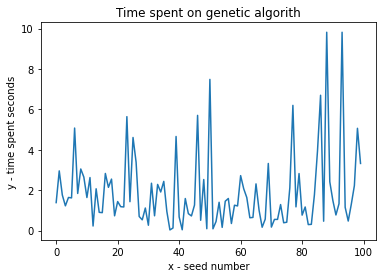

In [11]:
import matplotlib.pyplot as plt


def plot_times(times):
    plt.plot(times)
    
    # naming the x axis
    plt.xlabel('x - seed number')
    # naming the y axis
    plt.ylabel('y - time spent seconds')

    # giving a title to my graph
    plt.title('Time spent on genetic algorith')

    # function to show the plot
    plt.show()
    
plot_times(times)

Get the average time spent, the standard deviation, the variance, the max and the min

In [12]:
def statistics(list):
    print(f"Average: {np.average(list)}")
    print(f"StdDev:{np.std(list)}")
    print(f"Variance:{np.var(list)}")
    print(f"Max:{np.max(list)}")
    print(f"Min:{np.min(list)}")

statistics(times)

Average: 1.917060079574585
StdDev:1.9070541722290952
Variance:3.6368556158163994
Max:9.81600022315979
Min:0.03600144386291504


An 8 queens representation of a chess board of the last solution that we got

In [13]:
for i in range(8):
    x = last_solved.state[i]
    for j in range(8):
        if x == j:
            print("x", end=" ")
        else:
            print("o", end=" ")
    print("")

o o o o o x o o 
x o o o o o o o 
o o o o x o o o 
o x o o o o o o 
o o o o o o o x 
o o x o o o o o 
o o o o o o x o 
o o o x o o o o 


<h1>Task 2</h1>
The first thing that we need to do is extend to n -Queens from the 8queens solution that is already presented.
As a first step the functions needs to be generalized to accept different numbers.

In [14]:
def reproduce(x, y):
    length = len(x.state)
    split = random.randint(0, length)
    tmp_child_list = x.state[0:split]
    tmp_child_list2 = y.state[split:len(y.state)+1]
    child_list = np.concatenate((tmp_child_list, tmp_child_list2), axis=0)
    child_list2 = np.concatenate((tmp_child_list2, tmp_child_list), axis=0)
    queen1 = EightQueensState(child_list, length)
    queen2 = EightQueensState(child_list2, length)
    return [queen1, queen2]

In [15]:
def selection(population):
    population = sorted(population, key=lambda population: population.cost())
    population = population[:int(0.2*len(population))]
    return population

In [16]:
def init_agents(population_num, n=8):
    return [EightQueensState(None, n) for _ in range(population_num)]

In [17]:
def find_queens_sol(times, n_queens=8):
    
    for i in range(100):
        random.seed(i)
        print("Current seed is:",i,"")
        population_num = 100
        population = init_agents(10,n_queens)
        t0 = time.time()
        population = Genetic_Algorithm(population,0.3)
        t1 = time.time()
        total = t1-t0
        print(total)
        times.append(total)
        for k in population:
            if k.cost()==0:
                print(k)
                solved = k

In [18]:
times = []
find_queens_sol(times, 10)


Current seed is: 0 
Iteration 1
[5 1 6 9 1 3 4 2 9 3] cost 7
Iteration 2
[7 0 4 6 5 3 4 3] cost 5
Iteration 3
[5 1 6 9 1 3 4 2] cost 4
Iteration 4
[0 0 5 7 5 3 6 2] cost 4
Iteration 5
[2 5 7 0 7 3 4 1] cost 3
Iteration 6
[0 5 7 0 3 3 4 1] cost 4
Iteration 7
[0 5 7 5 3 6 2 0] cost 4
Iteration 8
[0 5 7 5 3 6 2 0] cost 4
Iteration 9
[0 5 7 5 3 6 4 0] cost 3
Iteration 10
[4 0 0 5 7 5 3 6] cost 3
Iteration 11
[6 0 5 7 5 3 6 4] cost 2
Iteration 12
[6 4 0 5 7 5 3 6] cost 3
Iteration 13
[7 5 3 6 0 5 7 5] cost 5
Iteration 14
[7 5 3 6 0 5 7 5] cost 5
Iteration 15
[7 5 3 6 0 5 7 4] cost 3
Iteration 16
[7 5 3 6 0 5 7 4] cost 3
Iteration 17
[7 2 3 6 0 5 5 4] cost 3
Iteration 18
[3 4 0 7 4 1 7 2] cost 3
Iteration 19
[3 4 0 5 4 1 7 2] cost 3
Iteration 20
[3 4 0 5 4 1 7 2] cost 3
Iteration 21
[3 4 0 5 4 1 7 2] cost 3
Iteration 22
[3 4 0 5 4 1 7 2] cost 3
Iteration 23
[3 4 0 5 4 1 7 2] cost 3
Iteration 24
[4 0 5 4 1 7 2 3] cost 3
Iteration 25
[4 0 5 4 1 7 2 3] cost 3
Iteration 26
[4 0 5 4 1 7 2 3] cost

Iteration 221
[1 4 7 0 3 3 6 2] cost 2
Iteration 222
[1 4 7 0 3 3 6 2] cost 2
Iteration 223
[1 4 7 0 3 3 6 2] cost 2
Iteration 224
[1 4 7 0 3 3 6 2] cost 2
Iteration 225
[1 4 7 0 3 3 6 2] cost 2
Iteration 226
[1 4 7 0 3 3 6 2] cost 2
Iteration 227
[1 4 7 0 3 3 6 2] cost 2
Iteration 228
[1 4 7 0 3 3 6 2] cost 2
Iteration 229
[1 4 7 0 3 3 6 2] cost 2
Iteration 230
[1 4 7 0 3 3 6 2] cost 2
Iteration 231
[1 4 7 0 3 3 6 2] cost 2
Iteration 232
[1 4 7 0 3 3 6 2] cost 2
Iteration 233
[1 4 7 0 3 3 6 2] cost 2
Iteration 234
[1 4 7 0 3 3 6 2] cost 2
Iteration 235
[1 4 7 0 3 3 6 2] cost 2
Iteration 236
[1 4 7 0 3 3 6 2] cost 2
Iteration 237
[1 4 7 0 3 3 6 2] cost 2
Iteration 238
[1 4 7 0 3 3 6 2] cost 2
Iteration 239
[1 4 7 0 3 3 6 2] cost 2
Iteration 240
[1 4 7 0 3 3 6 2] cost 2
Iteration 241
[1 4 7 0 3 3 6 2] cost 2
Iteration 242
[1 4 7 0 3 3 6 2] cost 2
Iteration 243
[1 5 7 0 3 3 6 2] cost 2
Iteration 244
[1 4 7 0 3 3 6 2] cost 2
Iteration 245
[1 4 7 0 3 3 6 2] cost 2
Iteration 246
[1 4 7 0 3 

Iteration 443
[4 1 7 0 6 0 5 5] cost 2
Iteration 444
[4 1 7 0 6 0 5 5] cost 2
Iteration 445
[4 1 7 0 6 0 5 3] cost 2
Iteration 446
[4 1 7 0 6 0 5 5] cost 2
Iteration 447
[4 1 7 0 6 0 5 5] cost 2
Iteration 448
[4 1 7 0 6 0 5 5] cost 2
Iteration 449
[4 1 7 0 6 0 5 5] cost 2
Iteration 450
[4 1 7 0 6 0 5 5] cost 2
Iteration 451
[4 1 7 0 6 0 5 5] cost 2
Iteration 452
[4 1 7 0 6 0 5 5] cost 2
Iteration 453
[4 1 7 0 6 0 2 5] cost 1
Iteration 454
[4 1 7 0 6 0 2 5] cost 1
Iteration 455
[4 1 7 0 6 0 2 5] cost 1
Iteration 456
[4 1 7 0 6 0 2 5] cost 1
Iteration 457
[4 1 7 0 6 0 2 5] cost 1
Iteration 458
[4 1 7 0 6 0 2 5] cost 1
Iteration 459
[4 1 7 0 6 0 2 5] cost 1
Iteration 460
[4 1 7 0 6 0 2 5] cost 1
Iteration 461
[4 1 7 0 6 0 2 5] cost 1
Iteration 462
[4 1 7 0 6 0 2 5] cost 1
Iteration 463
[4 1 7 0 6 0 2 5] cost 1
Iteration 464
[4 1 7 0 6 0 2 5] cost 1
Iteration 465
[4 1 7 0 6 0 2 5] cost 1
Iteration 466
[4 1 7 0 6 0 2 5] cost 1
Iteration 467
[4 1 7 0 6 0 2 5] cost 1
Iteration 468
[6 1 7 0 6 

Iteration 668
[0 7 7 5 1 6 4 0] cost 3
Iteration 669
[0 7 7 5 1 6 4 0] cost 3
Iteration 670
[0 7 7 5 1 6 4 0] cost 3
Iteration 671
[0 7 7 5 1 6 4 0] cost 3
Iteration 672
[0 7 7 5 1 6 4 0] cost 3
Iteration 673
[0 7 7 5 1 6 4 0] cost 3
Iteration 674
[0 7 7 5 1 6 4 0] cost 3
Iteration 675
[0 7 7 5 1 6 4 0] cost 3
Iteration 676
[0 7 7 5 1 6 4 0] cost 3
Iteration 677
[0 7 7 5 1 6 4 0] cost 3
Iteration 678
[0 7 7 5 1 6 4 0] cost 3
Iteration 679
[0 7 7 5 1 6 4 0] cost 3
Iteration 680
[0 7 7 5 1 6 4 0] cost 3
Iteration 681
[0 7 7 5 1 6 4 0] cost 3
Iteration 682
[0 7 7 5 1 6 4 0] cost 3
Iteration 683
[0 7 7 5 1 6 4 0] cost 3
Iteration 684
[0 7 7 5 1 6 4 0] cost 3
Iteration 685
[0 7 7 5 1 6 4 0] cost 3
Iteration 686
[0 7 7 5 1 6 4 6] cost 3
Iteration 687
[0 7 7 5 1 6 4 6] cost 3
Iteration 688
[0 7 7 5 1 6 4 6] cost 3
Iteration 689
[0 7 7 5 1 6 4 6] cost 3
Iteration 690
[0 7 7 5 1 6 4 6] cost 3
Iteration 691
[0 7 7 5 1 6 4 6] cost 3
Iteration 692
[0 2 7 5 1 6 4 6] cost 2
Iteration 693
[0 7 7 5 1 

Iteration 891
[4 7 1 3 1 6 2 5] cost 2
Iteration 892
[4 7 1 3 1 6 2 5] cost 2
Iteration 893
[4 7 1 3 1 6 2 5] cost 2
Iteration 894
[4 7 1 3 1 6 2 5] cost 2
Iteration 895
[4 7 1 3 1 6 2 5] cost 2
Iteration 896
[4 7 1 3 1 6 2 5] cost 2
Iteration 897
[4 7 1 3 1 6 2 5] cost 2
Iteration 898
[4 7 1 3 1 6 2 5] cost 2
Iteration 899
[4 7 1 3 1 6 2 5] cost 2
Iteration 900
[4 7 1 3 1 6 2 5] cost 2
Iteration 901
[4 7 1 3 1 6 2 5] cost 2
Iteration 902
[4 7 1 3 1 6 2 5] cost 2
Iteration 903
[4 7 1 3 1 6 2 5] cost 2
Iteration 904
[4 7 1 3 1 6 2 5] cost 2
Iteration 905
[4 7 1 3 1 6 2 5] cost 2
Iteration 906
[4 7 1 3 1 6 2 5] cost 2
Iteration 907
[4 7 1 3 1 6 2 5] cost 2
Iteration 908
[4 7 1 3 1 6 2 5] cost 2
Iteration 909
[4 7 1 3 1 6 2 5] cost 2
Iteration 910
[4 7 1 3 1 6 2 5] cost 2
Iteration 911
[4 7 1 3 1 6 2 5] cost 2
Iteration 912
[4 7 1 3 1 6 2 5] cost 2
Iteration 913
[4 7 1 3 1 6 2 5] cost 2
Iteration 914
[4 7 1 3 1 6 2 5] cost 2
Iteration 915
[4 7 1 3 1 6 2 5] cost 2
Iteration 916
[4 0 1 3 1 

Iteration 1116
[0 5 0 2 6 3 7 7] cost 4
Iteration 1117
[0 5 0 2 6 3 7 7] cost 4
Iteration 1118
[0 5 0 2 6 3 7 7] cost 4
Iteration 1119
[0 5 0 2 6 3 3 7] cost 4
Iteration 1120
[7 3 7 0 5 0 2 6] cost 3
Iteration 1121
[3 3 7 0 5 0 2 6] cost 4
Iteration 1122
[3 7 0 5 0 2 6 6] cost 3
Iteration 1123
[3 3 7 0 5 0 2 6] cost 4
Iteration 1124
[3 5 7 5 0 2 6 3] cost 3
Iteration 1125
[3 5 7 5 0 2 6 7] cost 3
Iteration 1126
[3 5 7 5 0 2 6 7] cost 3
Iteration 1127
[3 5 7 5 0 2 6 7] cost 3
Iteration 1128
[3 5 7 5 0 2 6 7] cost 3
Iteration 1129
[3 5 7 5 0 2 6 7] cost 3
Iteration 1130
[7 3 0 7 5 0 2 6] cost 2
Iteration 1131
[7 3 0 7 5 0 2 6] cost 2
Iteration 1132
[7 3 0 7 5 0 2 6] cost 2
Iteration 1133
[7 3 0 7 5 0 2 6] cost 2
Iteration 1134
[7 3 0 7 5 0 2 6] cost 2
Iteration 1135
[7 3 0 7 5 0 2 6] cost 2
Iteration 1136
[7 3 0 7 5 0 2 6] cost 2
Iteration 1137
[7 3 0 7 5 0 2 6] cost 2
Iteration 1138
[5 0 2 6 7 3 7 3] cost 3
Iteration 1139
[1 0 2 7 5 0 2 6] cost 5
Iteration 1140
[7 0 2 7 5 0 2 6] cost 4


Iteration 1340
[3 0 7 4 2 0 6 1] cost 1
Iteration 1341
[0 7 4 2 0 6 1 3] cost 2
Iteration 1342
[3 0 7 4 2 0 6 1] cost 1
Iteration 1343
[3 0 7 4 2 0 6 1] cost 1
Iteration 1344
[3 0 7 4 2 0 6 1] cost 1
Iteration 1345
[3 5 7 4 2 0 6 1] cost 1
Iteration 1346
[3 5 7 4 2 0 6 1] cost 1
Iteration 1347
[1 3 0 7 4 2 0 6] cost 1
Iteration 1348
[1 3 0 7 4 2 0 6] cost 1
Iteration 1349
[1 3 0 7 4 2 0 6] cost 1
Iteration 1350
[1 3 0 7 4 2 0 6] cost 1
Iteration 1351
[1 3 0 7 4 2 0 6] cost 1
Iteration 1352
[1 3 0 7 4 2 0 6] cost 1
Iteration 1353
[6 1 3 0 7 4 2 0] cost 1
Iteration 1354
[1 3 0 7 4 2 0 6] cost 1
Iteration 1355
[1 3 0 7 4 2 0 6] cost 1
Iteration 1356
[1 3 0 7 4 2 0 6] cost 1
Iteration 1357
[1 3 0 7 4 2 0 6] cost 1
Iteration 1358
[6 1 3 0 7 4 2 0] cost 1
Iteration 1359
[6 1 3 0 7 4 2 0] cost 1
Iteration 1360
[6 1 3 0 7 4 2 0] cost 1
Iteration 1361
[6 1 3 0 7 4 2 0] cost 1
Iteration 1362
[6 1 3 0 7 4 2 0] cost 1
Iteration 1363
[6 1 3 0 7 4 2 0] cost 1
Iteration 1364
[6 1 3 0 7 4 2 0] cost 1


[9 7 5 1 8 0 4 7] cost 2
Iteration 116
[9 7 5 1 8 0 4 7] cost 2
Iteration 117
[4 7 9 7 5 1 8 0] cost 2
Iteration 118
[9 7 5 1 8 0 4 7] cost 2
Iteration 119
[9 7 5 1 8 6 4 7] cost 2
Iteration 120
[9 7 5 1 8 0 4 7] cost 2
Iteration 121
[9 7 5 1 8 0 4 7] cost 2
Iteration 122
[9 7 5 1 8 0 4 7] cost 2
Iteration 123
[5 1 8 0 4 9 7 5] cost 2
Iteration 124
[9 7 5 8 0 4 7 5] cost 3
Iteration 125
[9 7 5 8 0 9 4 6] cost 1
Iteration 126
[0 9 7 5 8 0 9 4] cost 2
Iteration 127
[0 9 7 5 8 0 9 4] cost 2
Iteration 128
[0 9 7 5 8 0 9 4] cost 2
Iteration 129
[0 9 7 5 8 0 9 4] cost 2
Iteration 130
[0 9 7 5 8 0 9 4] cost 2
Iteration 131
[0 9 7 5 8 0 9 4] cost 2
Iteration 132
[0 9 7 5 8 0 9 4] cost 2
Iteration 133
[0 9 7 5 8 0 9 4] cost 2
Iteration 134
[0 9 7 5 8 0 9 4] cost 2
Iteration 135
[0 9 7 5 8 0 9 4] cost 2
Iteration 136
[0 9 7 5 8 0 9 4] cost 2
Iteration 137
[0 9 7 5 8 0 9 4] cost 2
Iteration 138
[0 9 7 5 8 0 9 4] cost 2
Iteration 139
[0 9 7 5 8 0 9 4] cost 2
Iteration 140
[0 9 7 5 8 0 9 4] cost 2


[6 2 7 5 0 9 5 0] cost 2
Iteration 36
[6 2 7 5 0 9 5 0] cost 2
Iteration 37
[6 2 7 5 0 9 5 0] cost 2
Iteration 38
[6 2 7 5 0 9 5 0] cost 2
Iteration 39
[6 2 7 5 0 9 5 0] cost 2
Iteration 40
[6 2 7 5 0 9 5 0] cost 2
Iteration 41
[6 2 7 5 0 9 5 0] cost 2
Iteration 42
[6 2 7 5 0 9 5 0] cost 2
Iteration 43
[6 2 7 5 0 9 5 0] cost 2
Iteration 44
[6 2 7 5 0 9 5 0] cost 2
Iteration 45
[6 2 7 5 0 9 5 0] cost 2
Iteration 46
[6 2 7 5 0 9 5 0] cost 2
Iteration 47
[6 2 7 5 0 9 5 0] cost 2
Iteration 48
[6 2 7 5 0 9 5 0] cost 2
Iteration 49
[6 2 7 5 0 9 5 0] cost 2
Iteration 50
[6 2 7 5 0 9 5 0] cost 2
Iteration 51
[6 2 7 5 0 9 5 0] cost 2
Iteration 52
[6 2 7 5 0 9 5 0] cost 2
Iteration 53
[6 2 7 5 0 9 5 0] cost 2
Iteration 54
[6 2 7 5 0 9 5 0] cost 2
Iteration 55
[6 2 7 5 0 9 5 0] cost 2
Iteration 56
[6 2 7 5 0 9 5 0] cost 2
Iteration 57
[6 2 7 5 0 9 5 0] cost 2
Iteration 58
[6 2 7 1 0 9 5 0] cost 2
Iteration 59
[6 2 7 1 0 9 5 0] cost 2
Iteration 60
[6 2 7 1 0 9 5 0] cost 2
Iteration 61
[6 2 7 1 0 9

Iteration 164
[5 2 6 3 0 7 3 0] cost 2
Iteration 165
[5 2 6 3 0 7 3 0] cost 2
Iteration 166
[5 2 6 3 0 7 3 0] cost 2
Iteration 167
[5 2 6 3 0 7 3 0] cost 2
Iteration 168
[5 2 6 3 0 7 3 0] cost 2
Iteration 169
[5 2 6 3 0 7 3 0] cost 2
Iteration 170
[5 2 6 3 0 7 3 0] cost 2
Iteration 171
[5 2 6 3 0 7 3 0] cost 2
Iteration 172
[5 2 6 3 0 7 3 0] cost 2
Iteration 173
[5 2 6 3 0 7 3 0] cost 2
Iteration 174
[5 2 6 3 0 7 3 0] cost 2
Iteration 175
[5 2 6 3 0 7 3 0] cost 2
Iteration 176
[5 2 6 3 0 7 3 0] cost 2
Iteration 177
[5 2 6 3 0 7 3 0] cost 2
Iteration 178
[5 2 6 3 0 7 3 0] cost 2
Iteration 179
[5 2 6 3 0 7 3 0] cost 2
Iteration 180
[5 2 6 3 0 7 3 0] cost 2
Iteration 181
[5 2 6 3 0 7 3 0] cost 2
Iteration 182
[5 2 6 3 0 7 3 0] cost 2
Iteration 183
[2 6 3 0 7 3 5 2] cost 3
Iteration 184
[2 6 6 0 7 0 7 3] cost 3
Iteration 185
[6 3 0 7 3 6 2 5] cost 3
Iteration 186
[6 3 0 7 3 6 2 5] cost 3
Iteration 187
[6 3 0 7 3 6 2 5] cost 3
Iteration 188
[6 3 0 7 3 6 2 5] cost 3
Iteration 189
[6 3 0 7 3 

Iteration 97
[5 0 1 3 7 7 4 2] cost 2
Iteration 98
[5 0 1 3 7 7 4 2] cost 2
Iteration 99
[5 0 1 3 7 7 4 2] cost 2
Iteration 100
[1 3 7 7 4 2 5 5] cost 2
Iteration 101
[1 3 7 7 4 2 5 1] cost 3
Iteration 102
[1 3 7 7 4 2 5 1] cost 3
Iteration 103
[1 3 7 7 4 2 5 1] cost 3
Iteration 104
[1 3 7 7 4 2 5 0] cost 2
Iteration 105
[1 3 7 7 4 2 5 0] cost 2
Iteration 106
[0 1 3 7 7 4 2 5] cost 2
Iteration 107
[0 1 3 7 7 4 2 5] cost 2
Iteration 108
[6 1 3 7 7 4 2 5] cost 1
Iteration 109
[6 1 3 7 7 4 2 5] cost 1
Iteration 110
[6 1 3 7 7 4 2 5] cost 1
Iteration 111
[6 1 3 7 7 4 2 5] cost 1
Iteration 112
[6 1 3 7 7 4 2 5] cost 1
Iteration 113
[6 1 3 7 7 4 2 5] cost 1
Iteration 114
[6 1 3 7 7 4 2 5] cost 1
Iteration 115
[6 1 3 7 7 4 2 5] cost 1
Iteration 116
[6 1 3 7 7 4 2 5] cost 1
Iteration 117
[6 1 3 7 7 4 2 5] cost 1
Iteration 118
[6 1 3 7 7 4 2 5] cost 1
Iteration 119
[6 1 3 7 7 4 2 5] cost 1
Iteration 120
[6 1 3 7 7 4 2 5] cost 1
Iteration 121
[6 1 3 7 7 4 2 5] cost 1
Iteration 122
[6 1 3 7 7 4 2

Iteration 183
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 184
[2 6 8 1 0 9 3 1 7 4] cost 2
Iteration 185
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 186
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 187
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 188
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 189
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 190
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 191
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 192
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 193
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 194
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 195
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 196
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 197
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 198
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 199
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 200
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 201
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 202
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 203
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 204
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 205
[6 8 5 0 9 3 1 7 4 2] cost 1
Iteration 2

Iteration 389
[7 1 5 0 0 6 2 6] cost 4
Iteration 390
[5 1 5 0 0 6 2 6] cost 4
Iteration 391
[5 1 5 0 0 6 2 6] cost 4
Iteration 392
[5 1 5 0 0 6 2 6] cost 4
Iteration 393
[5 1 5 0 0 6 2 6] cost 4
Iteration 394
[5 1 5 0 0 6 2 6] cost 4
Iteration 395
[5 1 5 0 0 6 2 6] cost 4
Iteration 396
[5 1 5 0 0 6 2 6] cost 4
Iteration 397
[1 5 0 0 6 2 6 2] cost 4
Iteration 398
[7 4 1 5 0 0 6 2] cost 3
Iteration 399
[7 4 1 5 0 0 6 1] cost 4
Iteration 400
[7 4 1 5 0 0 6 1] cost 4
Iteration 401
[7 4 1 5 0 0 4 7] cost 4
Iteration 402
[7 4 1 5 0 0 6 1] cost 4
Iteration 403
[7 4 1 5 0 0 6 2] cost 3
Iteration 404
[7 2 6 1 7 5 0 2] cost 2
Iteration 405
[7 4 1 5 0 5 0 2] cost 2
Iteration 406
[6 1 7 5 0 2 7 4] cost 2
Iteration 407
[7 4 1 5 0 5 0 2] cost 2
Iteration 408
[7 4 1 5 0 5 0 2] cost 2
Iteration 409
[7 4 1 5 0 5 0 2] cost 2
Iteration 410
[7 4 1 5 0 5 0 2] cost 2
Iteration 411
[7 4 1 5 0 5 0 2] cost 2
Iteration 412
[7 4 1 5 0 5 0 2] cost 2
Iteration 413
[7 4 1 5 0 5 0 2] cost 2
Iteration 414
[7 4 1 5 0 

Iteration 611
[7 0 3 6 2 5 2 5] cost 3
Iteration 612
[5 7 0 3 6 2 5 2] cost 2
Iteration 613
[5 2 5 7 0 3 6 2] cost 2
Iteration 614
[2 5 7 0 3 6 2 5] cost 2
Iteration 615
[2 5 7 0 3 6 2 5] cost 2
Iteration 616
[2 5 7 0 3 6 2 5] cost 2
Iteration 617
[2 5 5 7 0 3 6 2] cost 3
Iteration 618
[5 1 4 1 7 4 7 0] cost 3
Iteration 619
[5 1 4 1 7 4 7 0] cost 3
Iteration 620
[5 1 4 1 7 4 7 0] cost 3
Iteration 621
[5 1 4 1 7 4 7 0] cost 3
Iteration 622
[5 1 4 1 7 4 7 0] cost 3
Iteration 623
[5 1 4 1 7 4 7 0] cost 3
Iteration 624
[5 1 4 1 7 4 2 0] cost 2
Iteration 625
[5 1 4 1 7 4 2 0] cost 2
Iteration 626
[5 1 4 1 7 4 2 0] cost 2
Iteration 627
[5 1 4 1 7 4 2 0] cost 2
Iteration 628
[1 7 4 2 0 5 1 4] cost 2
Iteration 629
[1 7 4 2 0 5 1 4] cost 2
Iteration 630
[1 7 4 2 0 5 1 4] cost 2
Iteration 631
[4 2 0 5 1 7 4 2] cost 4
Iteration 632
[6 2 0 5 1 7 4 2] cost 3
Iteration 633
[6 2 0 5 1 7 4 2] cost 3
Iteration 634
[6 2 0 5 1 7 4 2] cost 3
Iteration 635
[6 2 0 5 1 7 4 2] cost 3
Iteration 636
[6 2 0 5 1 

Iteration 837
[5 1 4 6 0 2 7 5] cost 1
Iteration 838
[5 1 4 6 0 2 7 5] cost 1
Iteration 839
[5 1 4 6 0 2 7 5] cost 1
Iteration 840
[5 1 4 6 0 2 7 5] cost 1
Iteration 841
[5 1 4 6 0 2 7 5] cost 1
Iteration 842
[5 1 4 6 0 2 7 5] cost 1
Iteration 843
[5 1 4 6 0 2 7 5] cost 1
Iteration 844
[5 1 4 6 0 2 7 5] cost 1
Iteration 845
[5 1 4 6 0 2 7 5] cost 1
Iteration 846
[5 1 4 6 0 2 7 5] cost 1
Iteration 847
[5 1 4 6 0 2 7 5] cost 1
Iteration 848
[5 1 4 6 0 2 7 5] cost 1
Iteration 849
[5 1 4 6 0 2 7 5] cost 1
Iteration 850
[7 5 1 4 6 0 2 7] cost 2
Iteration 851
[4 6 0 2 7 5 1 4] cost 3
Iteration 852
[4 6 0 2 7 5 1 4] cost 3
Iteration 853
[5 1 4 6 0 2 7 5] cost 1
Iteration 854
[5 1 4 6 0 2 7 5] cost 1
Iteration 855
[3 1 4 6 0 2 7 5] cost 1
3.432001829147339
Goal state! [4 6 0 2 7 5 3 1]
Goal state! [4 6 0 2 7 5 3 1]
Current seed is: 7 
Iteration 1
[7 8 6 3 8 1 5 4 9 1] cost 6
Iteration 2
[5 4 9 1 7 5 3 8 7 2] cost 8
Iteration 3
[2 6 1 5 7 0 7 5] cost 3
Iteration 4
[5 4 9 1 7 2 8 5] cost 5
Itera

Iteration 203
[7 3 1 7 5 0 2 4] cost 1
Iteration 204
[7 3 1 7 5 0 2 4] cost 1
Iteration 205
[7 3 1 7 5 0 2 4] cost 1
Iteration 206
[7 3 1 7 5 0 2 4] cost 1
Iteration 207
[7 3 1 7 5 0 2 4] cost 1
Iteration 208
[7 3 1 7 5 0 2 4] cost 1
Iteration 209
[7 3 1 7 5 0 2 4] cost 1
0.7950005531311035
Goal state! [6 3 1 7 5 0 2 4]
Current seed is: 8 
Iteration 1
[7 4 0 9 3 6 8 3 3 8] cost 7
Iteration 2
[7 4 0 9 2 6 8 3 3 8] cost 4
Iteration 3
[7 4 0 9 2 6 8 3] cost 1
Iteration 4
[7 4 0 9 2 6 8 3] cost 1
Iteration 5
[7 4 0 9 2 6 8 3] cost 1
Iteration 6
[7 4 0 9 2 6 8 3] cost 1
Iteration 7
[7 4 0 9 2 6 8 3] cost 1
Iteration 8
[9 2 6 8 3 7 4 7] cost 1
Iteration 9
[4 1 9 2 6 8 3 7] cost 1
Iteration 10
[4 1 9 2 6 8 3 3] cost 2
Iteration 11
[7 7 4 1 9 2 6 8] cost 2
Iteration 12
[4 7 4 1 9 2 6 8] cost 2
Iteration 13
[7 7 4 1 9 2 6 8] cost 2
Iteration 14
[6 8 7 4 1 9 2 6] cost 2
Iteration 15
[6 8 7 4 1 9 2 6] cost 2
Iteration 16
[6 8 7 4 1 9 2 6] cost 2
Iteration 17
[2 8 7 4 1 9 2 6] cost 2
Iteration 18


Iteration 86
[0 6 0 2 5 7 2 4] cost 2
Iteration 87
[0 6 0 2 5 7 2 4] cost 2
Iteration 88
[0 6 0 2 5 7 2 4] cost 2
Iteration 89
[0 6 0 2 5 7 2 4] cost 2
Iteration 90
[0 6 0 2 5 7 2 4] cost 2
Iteration 91
[0 6 0 2 5 7 2 4] cost 2
Iteration 92
[0 6 0 2 5 7 2 4] cost 2
Iteration 93
[0 6 0 2 5 7 2 4] cost 2
Iteration 94
[0 6 0 2 5 7 2 4] cost 2
Iteration 95
[0 6 0 2 5 7 2 4] cost 2
Iteration 96
[0 6 0 2 5 7 2 4] cost 2
Iteration 97
[0 6 0 2 5 7 2 4] cost 2
Iteration 98
[0 6 0 2 5 7 2 4] cost 2
Iteration 99
[0 6 0 2 5 7 2 4] cost 2
Iteration 100
[0 6 0 2 5 7 2 4] cost 2
Iteration 101
[0 6 0 2 5 7 2 4] cost 2
Iteration 102
[0 6 0 2 5 7 2 4] cost 2
Iteration 103
[0 6 0 2 5 7 2 4] cost 2
Iteration 104
[0 6 0 2 5 7 2 4] cost 2
Iteration 105
[0 6 0 2 5 7 2 4] cost 2
Iteration 106
[0 6 0 2 5 7 2 4] cost 2
Iteration 107
[0 6 0 2 5 7 2 4] cost 2
Iteration 108
[0 6 0 2 5 7 2 4] cost 2
Iteration 109
[0 6 0 2 5 7 2 4] cost 2
Iteration 110
[0 6 0 2 5 7 2 4] cost 2
Iteration 111
[0 6 0 2 5 7 2 4] cost 2


Iteration 309
[3 3 7 2 4 6 0 5] cost 1
Iteration 310
[3 3 7 2 4 6 0 5] cost 1
Iteration 311
[3 3 7 2 4 6 0 5] cost 1
Iteration 312
[3 3 7 2 4 6 0 5] cost 1
Iteration 313
[3 3 7 2 4 6 0 5] cost 1
Iteration 314
[3 3 7 2 4 6 0 5] cost 1
Iteration 315
[3 3 7 2 4 6 0 5] cost 1
Iteration 316
[3 3 7 2 4 6 0 5] cost 1
Iteration 317
[3 3 7 2 4 6 0 5] cost 1
Iteration 318
[3 3 7 2 4 6 0 5] cost 1
Iteration 319
[3 3 7 2 4 6 0 5] cost 1
Iteration 320
[3 3 7 2 4 6 0 5] cost 1
Iteration 321
[3 3 7 2 4 6 0 5] cost 1
Iteration 322
[3 3 7 2 4 6 0 5] cost 1
Iteration 323
[3 3 7 2 4 6 0 5] cost 1
Iteration 324
[3 3 7 2 4 6 0 5] cost 1
Iteration 325
[3 3 7 2 4 6 0 5] cost 1
Iteration 326
[3 3 7 2 4 6 0 5] cost 1
Iteration 327
[3 3 7 2 4 6 0 5] cost 1
Iteration 328
[3 3 7 2 4 6 0 5] cost 1
Iteration 329
[3 3 7 2 4 6 0 5] cost 1
Iteration 330
[3 3 7 2 4 6 0 5] cost 1
Iteration 331
[3 3 7 2 4 6 0 5] cost 1
Iteration 332
[3 3 7 2 4 6 1 5] cost 1
Iteration 333
[3 3 7 2 4 6 1 5] cost 1
Iteration 334
[3 3 7 2 4 

[4 2 0 3 1 7 2 6] cost 1
Iteration 533
[4 2 0 3 1 7 2 6] cost 1
Iteration 534
[4 2 0 3 1 7 2 6] cost 1
Iteration 535
[4 2 0 3 1 7 2 6] cost 1
Iteration 536
[4 2 0 3 1 7 2 6] cost 1
Iteration 537
[4 2 0 3 1 7 2 6] cost 1
Iteration 538
[4 2 0 3 1 7 2 6] cost 1
Iteration 539
[4 2 0 3 1 7 2 6] cost 1
Iteration 540
[4 2 0 3 1 7 2 6] cost 1
Iteration 541
[4 2 0 3 1 7 2 6] cost 1
Iteration 542
[4 2 0 3 1 7 2 6] cost 1
Iteration 543
[4 2 0 3 1 7 2 6] cost 1
Iteration 544
[4 2 0 3 1 7 2 6] cost 1
Iteration 545
[4 2 0 3 1 7 2 6] cost 1
Iteration 546
[4 2 0 3 1 7 2 6] cost 1
Iteration 547
[4 2 0 3 1 7 2 6] cost 1
Iteration 548
[4 2 0 3 1 7 2 6] cost 1
Iteration 549
[4 2 0 3 1 7 2 6] cost 1
Iteration 550
[4 2 0 3 1 7 2 6] cost 1
Iteration 551
[4 2 0 3 1 7 2 6] cost 1
Iteration 552
[4 6 0 3 1 7 2 6] cost 1
Iteration 553
[4 2 0 3 1 7 2 6] cost 1
Iteration 554
[4 6 0 3 1 7 2 6] cost 1
Iteration 555
[4 2 0 3 1 7 2 6] cost 1
Iteration 556
[4 2 0 3 1 7 2 6] cost 1
Iteration 557
[4 2 0 3 1 7 2 6] cost 1


Iteration 79
[6 3 0 4 1 4 2 7] cost 1
Iteration 80
[6 3 0 4 1 4 2 7] cost 1
Iteration 81
[6 3 0 4 1 4 2 7] cost 1
Iteration 82
[6 3 0 4 1 4 2 7] cost 1
Iteration 83
[6 3 0 4 1 4 2 7] cost 1
Iteration 84
[6 3 0 4 1 4 2 7] cost 1
Iteration 85
[6 3 0 4 1 4 2 7] cost 1
Iteration 86
[6 3 0 4 1 4 2 7] cost 1
Iteration 87
[6 3 0 4 1 4 2 7] cost 1
Iteration 88
[6 3 0 4 1 4 2 7] cost 1
Iteration 89
[6 3 0 4 1 4 2 7] cost 1
Iteration 90
[6 3 0 4 1 4 2 7] cost 1
Iteration 91
[6 3 0 4 1 4 2 7] cost 1
Iteration 92
[6 3 0 4 1 4 2 7] cost 1
Iteration 93
[6 3 0 4 1 4 2 7] cost 1
Iteration 94
[6 3 0 4 1 4 2 7] cost 1
Iteration 95
[6 3 0 4 1 4 2 7] cost 1
Iteration 96
[6 3 0 4 1 4 2 7] cost 1
Iteration 97
[6 3 0 4 1 4 2 7] cost 1
Iteration 98
[6 3 0 4 1 4 2 7] cost 1
Iteration 99
[6 3 0 4 1 4 2 7] cost 1
Iteration 100
[6 3 0 4 1 4 2 7] cost 1
Iteration 101
[6 3 0 4 1 4 2 7] cost 1
Iteration 102
[6 3 0 4 1 4 2 7] cost 1
Iteration 103
[6 3 0 4 1 4 2 7] cost 1
Iteration 104
[6 3 0 4 1 4 2 7] cost 1
Iterati

Iteration 106
[4 1 3 0 7 7 2 6] cost 1
Iteration 107
[4 1 3 0 7 7 2 6] cost 1
Iteration 108
[4 1 3 0 7 7 2 6] cost 1
Iteration 109
[4 1 3 0 7 7 2 6] cost 1
Iteration 110
[4 1 3 0 7 7 2 6] cost 1
Iteration 111
[4 1 3 0 7 7 2 6] cost 1
Iteration 112
[4 1 3 0 7 7 2 6] cost 1
Iteration 113
[4 1 3 0 7 7 2 6] cost 1
Iteration 114
[4 1 3 0 7 7 2 6] cost 1
Iteration 115
[4 1 3 0 7 7 2 6] cost 1
Iteration 116
[4 1 3 0 7 7 2 6] cost 1
Iteration 117
[4 1 3 0 7 7 2 6] cost 1
Iteration 118
[4 1 3 0 7 7 2 6] cost 1
Iteration 119
[4 1 3 0 7 7 2 6] cost 1
Iteration 120
[4 1 3 0 7 7 2 6] cost 1
Iteration 121
[4 1 3 0 7 7 2 6] cost 1
Iteration 122
[4 1 3 0 7 7 2 6] cost 1
Iteration 123
[4 1 3 0 7 7 2 6] cost 1
Iteration 124
[4 1 3 0 7 7 2 6] cost 1
Iteration 125
[4 1 3 0 7 7 2 6] cost 1
Iteration 126
[4 1 3 0 7 7 2 6] cost 1
Iteration 127
[4 1 3 0 7 7 2 6] cost 1
Iteration 128
[4 1 3 0 7 7 2 6] cost 1
Iteration 129
[4 1 3 0 7 7 2 6] cost 1
Iteration 130
[4 1 3 0 7 7 2 6] cost 1
Iteration 131
[4 1 3 0 7 

[4 1 3 0 7 7 2 6] cost 1
Iteration 330
[4 1 3 0 7 7 2 6] cost 1
Iteration 331
[4 1 3 0 7 7 2 6] cost 1
Iteration 332
[4 1 3 0 7 7 2 6] cost 1
Iteration 333
[4 1 3 0 7 7 2 6] cost 1
Iteration 334
[4 1 3 0 7 7 2 6] cost 1
Iteration 335
[4 1 3 0 7 7 2 6] cost 1
Iteration 336
[4 1 3 0 7 7 2 6] cost 1
Iteration 337
[4 1 3 0 7 7 2 6] cost 1
Iteration 338
[4 1 3 0 7 7 2 6] cost 1
Iteration 339
[4 1 3 0 7 7 2 6] cost 1
Iteration 340
[4 1 3 0 7 7 2 6] cost 1
Iteration 341
[4 1 3 0 7 7 2 6] cost 1
Iteration 342
[4 1 3 0 7 7 2 6] cost 1
Iteration 343
[4 1 3 0 7 7 2 6] cost 1
Iteration 344
[4 1 3 0 7 7 2 6] cost 1
Iteration 345
[4 1 3 0 7 7 2 6] cost 1
Iteration 346
[4 1 3 0 7 7 2 6] cost 1
Iteration 347
[4 1 3 0 7 7 2 6] cost 1
Iteration 348
[4 1 3 0 7 7 2 6] cost 1
Iteration 349
[4 1 3 0 7 7 2 6] cost 1
Iteration 350
[4 1 3 0 7 7 2 6] cost 1
Iteration 351
[4 1 3 0 7 7 2 6] cost 1
Iteration 352
[4 1 3 0 7 7 2 6] cost 1
Iteration 353
[4 1 3 0 7 7 2 6] cost 1
Iteration 354
[4 1 3 0 7 7 2 6] cost 1


Iteration 550
[6 6 3 0 7 4 1 7] cost 3
Iteration 551
[3 0 7 7 4 1 1 7] cost 5
Iteration 552
[3 0 7 7 5 1 1 7] cost 5
Iteration 553
[3 0 7 7 5 1 1 7] cost 5
Iteration 554
[3 0 7 7 4 1 1 7] cost 5
Iteration 555
[3 0 0 7 7 4 1 1] cost 5
Iteration 556
[3 0 0 7 1 4 1 7] cost 4
Iteration 557
[3 0 0 7 1 4 1 7] cost 4
Iteration 558
[3 0 0 7 1 4 1 7] cost 4
Iteration 559
[3 0 0 7 1 4 1 7] cost 4
Iteration 560
[3 0 0 7 1 4 1 7] cost 4
Iteration 561
[3 0 0 7 1 4 1 7] cost 4
Iteration 562
[3 6 0 7 1 4 1 7] cost 3
Iteration 563
[3 6 0 7 1 4 2 6] cost 2
Iteration 564
[2 6 3 6 0 7 1 4] cost 3
Iteration 565
[6 0 7 1 4 2 6 3] cost 2
Iteration 566
[0 7 1 4 2 6 3 3] cost 2
Iteration 567
[0 7 1 4 2 6 3 3] cost 2
Iteration 568
[2 0 7 1 4 2 6 3] cost 2
Iteration 569
[6 3 0 7 1 4 2 6] cost 2
Iteration 570
[2 0 7 1 4 2 6 3] cost 2
Iteration 571
[2 0 7 1 4 2 6 3] cost 2
Iteration 572
[2 0 7 1 4 2 6 3] cost 2
Iteration 573
[2 0 7 1 4 2 6 3] cost 2
Iteration 574
[2 0 7 1 4 2 6 3] cost 2
Iteration 575
[2 0 7 1 4 

Iteration 773
[2 5 7 1 4 0 7 3] cost 1
Iteration 774
[2 5 7 1 4 0 7 3] cost 1
Iteration 775
[2 5 7 1 4 0 7 3] cost 1
Iteration 776
[2 5 7 1 4 0 7 3] cost 1
Iteration 777
[2 5 7 1 4 0 7 3] cost 1
Iteration 778
[2 5 7 1 4 0 7 3] cost 1
Iteration 779
[2 5 7 1 4 0 7 3] cost 1
Iteration 780
[2 5 7 1 4 0 7 3] cost 1
Iteration 781
[2 5 7 1 4 0 7 3] cost 1
Iteration 782
[2 5 7 1 4 0 7 3] cost 1
Iteration 783
[2 5 7 1 4 0 7 3] cost 1
Iteration 784
[2 5 7 1 4 0 7 3] cost 1
Iteration 785
[2 5 7 1 4 0 7 3] cost 1
Iteration 786
[2 5 7 1 4 0 7 3] cost 1
Iteration 787
[2 5 7 1 4 0 7 3] cost 1
Iteration 788
[2 5 7 1 4 0 7 3] cost 1
Iteration 789
[2 5 7 1 4 0 7 3] cost 1
Iteration 790
[2 5 7 1 4 0 7 3] cost 1
Iteration 791
[2 5 7 1 4 0 7 3] cost 1
Iteration 792
[2 5 7 1 4 0 7 3] cost 1
Iteration 793
[2 5 7 1 4 0 7 3] cost 1
Iteration 794
[2 5 7 1 4 0 7 3] cost 1
Iteration 795
[2 5 7 1 4 0 7 3] cost 1
Iteration 796
[2 5 7 1 4 0 7 3] cost 1
Iteration 797
[2 5 7 1 4 0 7 3] cost 1
Iteration 798
[2 5 7 1 4 

Iteration 998
[5 1 4 0 7 3 2 6] cost 1
Iteration 999
[5 1 4 0 7 3 2 6] cost 1
Iteration 1000
[5 1 4 0 7 3 2 6] cost 1
Iteration 1001
[5 1 4 0 7 3 7 3] cost 2
Iteration 1002
[1 4 0 7 3 5 1 4] cost 4
Iteration 1003
[3 5 1 4 0 7 3 1] cost 3
Iteration 1004
[3 5 1 4 0 7 3 1] cost 3
Iteration 1005
[3 5 1 4 0 7 3 1] cost 3
Iteration 1006
[7 5 1 4 0 7 3 1] cost 3
Iteration 1007
[1 5 1 4 0 7 3 5] cost 4
Iteration 1008
[1 5 1 4 0 7 3 5] cost 4
Iteration 1009
[1 5 1 4 0 7 3 5] cost 4
Iteration 1010
[1 5 1 4 0 7 3 5] cost 4
Iteration 1011
[5 1 4 0 7 3 1 5] cost 3
Iteration 1012
[1 1 4 0 7 3 2 5] cost 3
Iteration 1013
[5 1 1 4 0 7 3 2] cost 2
Iteration 1014
[5 1 1 4 0 7 3 2] cost 2
Iteration 1015
[2 5 1 1 4 0 7 3] cost 1
Iteration 1016
[2 5 1 1 4 0 7 3] cost 1
Iteration 1017
[2 5 1 1 4 0 7 3] cost 1
Iteration 1018
[2 5 1 1 4 0 7 3] cost 1
Iteration 1019
[2 5 1 1 4 0 7 3] cost 1
Iteration 1020
[2 5 1 1 4 0 7 3] cost 1
Iteration 1021
[2 5 1 1 4 0 7 3] cost 1
Iteration 1022
[2 5 1 1 4 0 7 3] cost 1
It

[3 7 0 2 4 6 1 3] cost 2
Iteration 1203
[3 7 0 2 4 6 1 3] cost 2
Iteration 1204
[3 7 0 2 4 6 1 3] cost 2
Iteration 1205
[3 7 0 2 4 6 1 3] cost 2
Iteration 1206
[3 7 0 2 4 6 1 3] cost 2
Iteration 1207
[3 7 0 2 4 6 1 3] cost 2
Iteration 1208
[3 7 0 2 4 6 1 3] cost 2
Iteration 1209
[3 5 0 2 4 6 1 3] cost 1
Iteration 1210
[3 5 0 2 4 6 1 3] cost 1
Iteration 1211
[3 5 0 2 4 6 1 3] cost 1
Iteration 1212
[3 5 0 2 4 6 1 3] cost 1
Iteration 1213
[3 5 0 2 4 6 1 3] cost 1
Iteration 1214
[3 5 0 2 4 6 1 7] cost 1
Iteration 1215
[6 1 7 5 0 2 4 6] cost 1
Iteration 1216
[1 1 7 5 0 2 4 6] cost 1
Iteration 1217
[1 1 7 5 0 2 4 6] cost 1
Iteration 1218
[4 6 1 7 5 0 2 4] cost 2
Iteration 1219
[4 6 1 7 5 0 2 5] cost 2
Iteration 1220
[5 0 1 7 5 0 2 4] cost 4
Iteration 1221
[5 0 1 7 5 0 2 4] cost 4
Iteration 1222
[5 0 1 7 5 0 2 4] cost 4
Iteration 1223
[7 0 1 7 5 0 2 4] cost 3
Iteration 1224
[6 0 7 2 7 5 3 4] cost 5
Iteration 1225
[5 3 6 0 7 2 7 5] cost 3
Iteration 1226
[4 6 2 2 7 5 7 5] cost 5
Iteration 1227


[5 3 0 7 7 4 1 6] cost 2
Iteration 1424
[5 3 0 7 7 4 1 6] cost 2
Iteration 1425
[5 3 0 7 7 4 1 6] cost 2
Iteration 1426
[5 3 0 7 7 4 1 6] cost 2
Iteration 1427
[5 3 0 7 7 4 1 6] cost 2
Iteration 1428
[6 5 3 0 7 7 4 1] cost 2
Iteration 1429
[6 5 3 0 7 4 1 6] cost 3
Iteration 1430
[7 4 1 6 6 3 0 7] cost 3
Iteration 1431
[6 3 0 0 7 4 1 6] cost 3
Iteration 1432
[6 3 0 0 7 4 2 6] cost 3
Iteration 1433
[6 3 0 0 7 4 2 6] cost 3
Iteration 1434
[6 2 6 6 3 0 0 7] cost 5
Iteration 1435
[6 3 0 0 7 2 6 6] cost 5
Iteration 1436
[0 0 7 2 6 6 3 5] cost 4
Iteration 1437
[7 2 6 6 3 5 3 5] cost 5
Iteration 1438
[0 7 7 2 6 6 3 5] cost 3
Iteration 1439
[0 5 7 2 6 6 3 5] cost 3
Iteration 1440
[0 7 7 2 6 6 3 5] cost 3
Iteration 1441
[0 7 7 2 6 6 3 5] cost 3
Iteration 1442
[0 7 7 2 6 6 3 5] cost 3
Iteration 1443
[0 7 7 2 6 6 3 5] cost 3
Iteration 1444
[0 7 7 2 6 6 3 5] cost 3
Iteration 1445
[0 7 5 2 6 6 3 5] cost 2
Iteration 1446
[0 7 5 2 6 6 3 5] cost 2
Iteration 1447
[0 7 5 2 6 6 3 5] cost 2
Iteration 1448


Iteration 1647
[5 2 6 3 0 7 3 0] cost 2
Iteration 1648
[5 2 6 3 0 7 3 0] cost 2
Iteration 1649
[5 2 6 3 0 7 3 0] cost 2
Iteration 1650
[5 2 6 3 0 7 3 0] cost 2
Iteration 1651
[5 2 6 3 0 7 3 0] cost 2
Iteration 1652
[5 2 6 3 0 7 3 0] cost 2
Iteration 1653
[5 2 6 3 0 7 3 0] cost 2
Iteration 1654
[5 2 6 3 0 7 3 0] cost 2
Iteration 1655
[5 2 6 3 0 7 3 0] cost 2
Iteration 1656
[5 2 6 3 0 7 3 0] cost 2
Iteration 1657
[5 2 6 3 0 7 3 0] cost 2
Iteration 1658
[5 2 6 3 0 7 3 0] cost 2
Iteration 1659
[5 2 6 3 0 7 3 0] cost 2
Iteration 1660
[5 2 6 3 0 7 3 0] cost 2
Iteration 1661
[5 2 6 3 0 7 3 0] cost 2
Iteration 1662
[5 2 6 3 0 7 3 0] cost 2
Iteration 1663
[5 2 6 3 0 7 3 0] cost 2
Iteration 1664
[5 2 6 3 0 7 3 0] cost 2
Iteration 1665
[5 2 6 3 0 7 3 0] cost 2
Iteration 1666
[5 2 6 3 0 7 3 0] cost 2
Iteration 1667
[5 2 6 3 0 7 3 0] cost 2
Iteration 1668
[5 2 6 3 0 7 3 0] cost 2
Iteration 1669
[2 6 3 0 7 3 1 5] cost 3
Iteration 1670
[5 2 6 3 0 7 3 1] cost 2
Iteration 1671
[3 1 5 5 2 6 3 0] cost 4


Iteration 1872
[1 7 4 2 0 5 6 2] cost 2
Iteration 1873
[1 7 4 2 0 5 6 2] cost 2
Iteration 1874
[1 7 4 2 0 5 6 2] cost 2
Iteration 1875
[1 7 4 2 0 5 6 2] cost 2
Iteration 1876
[1 7 4 2 0 5 6 2] cost 2
Iteration 1877
[1 7 4 2 0 5 6 2] cost 2
Iteration 1878
[1 7 4 2 0 5 6 2] cost 2
Iteration 1879
[1 7 4 2 0 5 6 2] cost 2
Iteration 1880
[1 7 4 2 0 5 6 2] cost 2
Iteration 1881
[1 7 4 2 0 5 6 2] cost 2
Iteration 1882
[1 7 4 2 0 5 6 2] cost 2
Iteration 1883
[1 7 4 2 0 5 6 2] cost 2
Iteration 1884
[1 7 4 2 0 5 6 2] cost 2
Iteration 1885
[1 7 4 2 0 5 6 2] cost 2
Iteration 1886
[1 7 4 2 0 5 6 2] cost 2
Iteration 1887
[1 7 4 2 0 5 6 2] cost 2
Iteration 1888
[1 7 4 2 0 5 6 2] cost 2
Iteration 1889
[1 7 4 2 0 5 6 2] cost 2
Iteration 1890
[1 7 4 2 0 5 6 2] cost 2
Iteration 1891
[1 7 4 2 0 5 6 2] cost 2
Iteration 1892
[1 7 4 2 0 5 6 2] cost 2
Iteration 1893
[1 7 4 2 0 5 6 2] cost 2
Iteration 1894
[1 7 4 2 0 5 6 2] cost 2
Iteration 1895
[1 7 4 2 0 5 6 2] cost 2
Iteration 1896
[1 7 4 2 0 5 6 2] cost 2


Iteration 2097
[6 4 1 7 0 3 5 2] cost 1
Iteration 2098
[6 4 1 7 0 3 5 2] cost 1
Iteration 2099
[6 4 1 7 0 3 5 2] cost 1
Iteration 2100
[6 4 1 7 0 3 5 2] cost 1
Iteration 2101
[6 4 1 7 0 3 5 2] cost 1
Iteration 2102
[6 4 1 7 0 3 5 2] cost 1
Iteration 2103
[6 4 1 7 0 3 5 2] cost 1
Iteration 2104
[6 4 1 7 0 3 5 2] cost 1
Iteration 2105
[6 4 1 7 0 3 5 2] cost 1
Iteration 2106
[6 4 1 7 0 3 5 2] cost 1
Iteration 2107
[6 4 1 7 0 3 5 2] cost 1
Iteration 2108
[6 4 1 7 0 3 5 2] cost 1
Iteration 2109
[6 4 1 7 0 3 5 2] cost 1
Iteration 2110
[6 4 1 7 0 3 5 2] cost 1
Iteration 2111
[6 4 1 7 0 3 5 2] cost 1
Iteration 2112
[6 4 1 7 0 3 5 2] cost 1
Iteration 2113
[6 4 1 7 0 3 5 2] cost 1
Iteration 2114
[7 4 1 7 0 3 6 2] cost 1
Iteration 2115
[6 4 1 7 0 3 6 2] cost 1
Iteration 2116
[6 4 1 7 0 3 6 2] cost 1
Iteration 2117
[6 4 1 7 0 3 6 2] cost 1
Iteration 2118
[6 4 1 7 0 3 6 2] cost 1
Iteration 2119
[6 4 1 7 0 3 6 2] cost 1
Iteration 2120
[6 4 1 7 0 3 6 2] cost 1
Iteration 2121
[6 4 1 7 0 3 6 2] cost 1


Iteration 140
[3 5 7 2 0 6 4 0] cost 1
Iteration 141
[3 5 7 2 0 6 4 0] cost 1
Iteration 142
[3 5 7 2 0 6 4 0] cost 1
Iteration 143
[3 5 7 2 0 6 4 0] cost 1
Iteration 144
[3 5 7 2 0 6 4 0] cost 1
Iteration 145
[3 5 7 2 0 6 4 0] cost 1
Iteration 146
[3 5 7 2 0 6 4 0] cost 1
Iteration 147
[3 5 7 2 0 6 4 0] cost 1
Iteration 148
[3 5 7 2 0 6 4 0] cost 1
Iteration 149
[3 5 7 2 0 6 4 0] cost 1
Iteration 150
[3 5 7 2 4 6 4 0] cost 1
Iteration 151
[3 5 7 2 4 6 4 0] cost 1
Iteration 152
[3 5 7 2 4 6 4 0] cost 1
Iteration 153
[3 5 7 2 0 6 4 0] cost 1
Iteration 154
[3 5 7 2 0 6 4 0] cost 1
Iteration 155
[3 5 7 2 0 6 4 0] cost 1
Iteration 156
[3 5 7 2 0 6 4 0] cost 1
Iteration 157
[3 5 7 2 0 6 4 0] cost 1
Iteration 158
[3 5 7 2 0 6 4 0] cost 1
Iteration 159
[3 5 7 2 0 6 4 0] cost 1
Iteration 160
[3 5 7 2 0 6 4 0] cost 1
Iteration 161
[3 5 7 2 0 6 4 0] cost 1
Iteration 162
[3 5 7 2 0 6 4 0] cost 1
Iteration 163
[3 5 7 2 0 6 4 0] cost 1
Iteration 164
[3 5 7 2 0 6 4 0] cost 1
Iteration 165
[3 5 7 2 0 

Iteration 364
[7 4 0 5 6 2 0 7] cost 4
Iteration 365
[7 4 0 5 6 1 0 2] cost 3
Iteration 366
[7 4 0 5 6 1 0 7] cost 4
Iteration 367
[7 4 0 5 5 1 0 7] cost 4
Iteration 368
[7 4 0 5 6 1 0 7] cost 4
Iteration 369
[7 4 0 5 6 1 0 7] cost 4
Iteration 370
[7 4 0 5 6 1 0 7] cost 4
Iteration 371
[7 4 0 5 6 1 0 7] cost 4
Iteration 372
[7 4 0 5 6 1 0 7] cost 4
Iteration 373
[7 4 0 5 6 1 0 7] cost 4
Iteration 374
[7 4 0 5 6 1 0 7] cost 4
Iteration 375
[4 0 5 6 1 0 7 7] cost 4
Iteration 376
[4 0 5 5 6 1 0 7] cost 4
Iteration 377
[4 0 5 5 6 1 0 7] cost 4
Iteration 378
[4 0 5 5 6 1 0 7] cost 4
Iteration 379
[4 0 5 5 6 1 0 7] cost 4
Iteration 380
[4 0 5 5 6 1 0 7] cost 4
Iteration 381
[4 0 5 5 6 1 0 7] cost 4
Iteration 382
[4 0 5 5 6 1 0 7] cost 4
Iteration 383
[4 0 5 5 6 1 0 7] cost 4
Iteration 384
[4 0 5 5 6 1 0 7] cost 4
Iteration 385
[4 0 5 5 6 1 0 7] cost 4
Iteration 386
[4 0 5 5 1 1 0 7] cost 4
Iteration 387
[4 0 5 2 6 1 0 7] cost 3
Iteration 388
[4 0 5 2 6 1 0 7] cost 3
Iteration 389
[4 0 5 2 6 

Iteration 588
[4 6 3 0 7 1 5 2] cost 1
Iteration 589
[4 6 3 0 7 1 5 2] cost 1
Iteration 590
[4 6 3 0 7 1 5 2] cost 1
Iteration 591
[4 6 3 0 7 1 5 2] cost 1
Iteration 592
[4 6 3 0 6 1 5 2] cost 1
Iteration 593
[4 6 3 0 6 1 5 2] cost 1
Iteration 594
[4 6 3 0 6 1 5 2] cost 1
Iteration 595
[4 6 3 0 6 1 5 2] cost 1
Iteration 596
[4 6 3 0 6 1 5 2] cost 1
Iteration 597
[4 6 3 0 6 1 5 2] cost 1
Iteration 598
[4 6 3 0 6 1 5 2] cost 1
Iteration 599
[4 6 3 0 6 1 5 2] cost 1
Iteration 600
[2 4 6 3 0 6 1 5] cost 1
Iteration 601
[4 6 3 0 6 1 5 2] cost 1
Iteration 602
[4 6 3 0 6 1 5 2] cost 1
Iteration 603
[4 6 3 0 6 1 5 2] cost 1
Iteration 604
[2 4 6 3 0 6 1 5] cost 1
Iteration 605
[2 4 6 3 0 6 1 5] cost 1
Iteration 606
[2 4 6 3 0 6 1 5] cost 1
Iteration 607
[2 4 6 3 0 6 1 5] cost 1
Iteration 608
[2 4 6 3 0 6 1 5] cost 1
Iteration 609
[2 4 6 3 0 6 1 5] cost 1
Iteration 610
[2 4 6 3 0 6 1 5] cost 1
Iteration 611
[2 4 6 3 0 6 1 5] cost 1
Iteration 612
[2 4 6 3 0 6 1 5] cost 1
Iteration 613
[2 4 6 3 0 

Iteration 812
[1 6 3 0 0 7 4 2] cost 2
Iteration 813
[1 6 3 0 0 7 4 2] cost 2
Iteration 814
[1 6 3 0 0 7 4 2] cost 2
Iteration 815
[1 6 3 0 0 7 4 2] cost 2
Iteration 816
[1 6 3 0 0 7 4 2] cost 2
Iteration 817
[1 6 3 0 0 7 4 2] cost 2
Iteration 818
[1 6 3 0 0 7 4 2] cost 2
Iteration 819
[1 6 3 0 0 7 4 2] cost 2
Iteration 820
[1 6 3 0 0 7 4 2] cost 2
Iteration 821
[1 6 3 0 0 7 4 2] cost 2
Iteration 822
[1 6 3 0 0 7 4 2] cost 2
Iteration 823
[1 6 3 0 0 7 4 2] cost 2
Iteration 824
[1 6 3 0 0 7 4 2] cost 2
Iteration 825
[1 6 3 0 0 7 4 2] cost 2
Iteration 826
[1 6 3 0 0 7 4 2] cost 2
Iteration 827
[1 6 3 0 0 7 4 2] cost 2
Iteration 828
[1 6 3 0 0 7 4 2] cost 2
Iteration 829
[1 6 3 0 0 7 4 2] cost 2
Iteration 830
[1 6 3 0 0 7 4 2] cost 2
Iteration 831
[1 6 3 0 0 7 4 2] cost 2
Iteration 832
[1 6 3 0 0 7 4 2] cost 2
Iteration 833
[1 6 3 0 0 7 4 2] cost 2
Iteration 834
[1 6 3 0 0 7 4 2] cost 2
Iteration 835
[1 6 3 0 0 7 4 2] cost 2
Iteration 836
[1 6 3 0 0 7 4 2] cost 2
Iteration 837
[1 6 3 0 0 

Iteration 1036
[5 1 6 4 7 7 0 3] cost 1
Iteration 1037
[1 6 4 7 7 0 3 5] cost 1
Iteration 1038
[1 6 4 7 7 0 3 5] cost 1
Iteration 1039
[1 6 4 7 7 0 3 5] cost 1
Iteration 1040
[1 6 4 7 7 0 3 5] cost 1
Iteration 1041
[1 6 4 7 7 0 3 5] cost 1
Iteration 1042
[1 6 4 7 7 0 3 5] cost 1
Iteration 1043
[1 6 4 7 7 0 3 5] cost 1
Iteration 1044
[1 6 4 7 7 0 3 5] cost 1
Iteration 1045
[1 6 4 7 7 0 3 5] cost 1
Iteration 1046
[1 6 4 7 7 0 3 5] cost 1
Iteration 1047
[1 6 4 7 7 0 3 5] cost 1
Iteration 1048
[1 6 4 7 7 0 3 5] cost 1
Iteration 1049
[1 6 4 7 7 0 3 5] cost 1
Iteration 1050
[1 6 4 7 7 0 3 5] cost 1
Iteration 1051
[1 6 4 7 7 0 3 5] cost 1
Iteration 1052
[1 6 4 7 7 0 3 5] cost 1
Iteration 1053
[1 6 4 7 7 0 3 5] cost 1
Iteration 1054
[1 6 4 7 7 0 3 5] cost 1
Iteration 1055
[1 6 4 7 7 0 3 5] cost 1
Iteration 1056
[1 6 4 7 7 0 3 5] cost 1
Iteration 1057
[1 6 4 7 7 0 3 5] cost 1
Iteration 1058
[1 6 4 7 7 0 3 5] cost 1
Iteration 1059
[1 6 4 7 7 0 3 5] cost 1
Iteration 1060
[5 1 6 4 7 7 0 3] cost 1


Iteration 1261
[2 7 5 3 0 6 4 1] cost 1
Iteration 1262
[2 7 5 3 0 6 4 1] cost 1
Iteration 1263
[2 7 5 3 0 6 4 1] cost 1
Iteration 1264
[2 7 5 3 0 6 4 1] cost 1
Iteration 1265
[2 7 5 3 0 6 4 1] cost 1
Iteration 1266
[2 7 5 3 0 6 4 1] cost 1
Iteration 1267
[2 7 5 3 0 6 4 1] cost 1
Iteration 1268
[2 7 5 3 0 6 4 1] cost 1
Iteration 1269
[2 7 5 3 0 6 4 1] cost 1
Iteration 1270
[2 7 5 3 0 6 4 1] cost 1
Iteration 1271
[2 7 5 3 0 6 4 1] cost 1
Iteration 1272
[2 7 5 3 0 6 4 1] cost 1
Iteration 1273
[2 7 5 3 0 6 4 1] cost 1
Iteration 1274
[1 2 7 5 3 0 6 4] cost 1
Iteration 1275
[1 2 7 5 3 0 6 4] cost 1
Iteration 1276
[0 2 7 5 3 6 4 1] cost 2
Iteration 1277
[0 2 7 5 3 6 4 1] cost 2
Iteration 1278
[0 2 7 5 3 6 4 1] cost 2
Iteration 1279
[0 2 7 5 3 6 4 1] cost 2
Iteration 1280
[0 2 7 5 3 6 4 1] cost 2
Iteration 1281
[0 2 7 5 3 6 4 1] cost 2
Iteration 1282
[0 2 7 5 3 6 4 1] cost 2
Iteration 1283
[0 2 7 5 3 6 4 1] cost 2
Iteration 1284
[0 2 7 5 3 6 4 1] cost 2
Iteration 1285
[0 2 7 5 3 6 4 1] cost 2


Iteration 1485
[6 1 1 4 7 0 3 5] cost 1
Iteration 1486
[6 3 1 4 7 0 3 5] cost 1
Iteration 1487
[6 3 1 4 7 0 3 5] cost 1
Iteration 1488
[6 3 1 4 7 0 3 5] cost 1
Iteration 1489
[6 3 1 4 7 0 3 5] cost 1
Iteration 1490
[6 3 1 4 7 0 3 5] cost 1
Iteration 1491
[6 3 1 4 7 0 3 5] cost 1
Iteration 1492
[6 3 1 4 7 0 3 5] cost 1
Iteration 1493
[6 3 1 4 7 0 3 5] cost 1
Iteration 1494
[6 3 1 4 7 0 3 5] cost 1
Iteration 1495
[6 3 1 4 7 0 3 5] cost 1
Iteration 1496
[6 3 1 4 7 0 3 5] cost 1
Iteration 1497
[6 3 1 4 7 0 3 5] cost 1
Iteration 1498
[6 3 1 4 7 0 3 5] cost 1
Iteration 1499
[6 3 1 4 7 0 3 5] cost 1
5.64100193977356
Goal state! [6 3 1 4 7 0 2 5]
Current seed is: 13 
Iteration 1
[0 7 7 7 3 1 9 8 9 2] cost 6
Iteration 2
[2 4 1 5 0 5 0 4] cost 4
Iteration 3
[0 7 7 7 3 1 0 4] cost 5
Iteration 4
[0 4 7 7 3 1 0 4] cost 4
Iteration 5
[0 4 7 7 3 1 0 4] cost 4
Iteration 6
[0 4 0 4 7 7 3 1] cost 4
Iteration 7
[0 4 7 7 3 1 0 4] cost 4
Iteration 8
[0 4 7 7 3 1 0 4] cost 4
Iteration 9
[4 0 0 4 7 7 3 1] co

[2 0 5 3 1 6 4 2] cost 1
Iteration 208
[2 0 5 3 1 6 4 2] cost 1
Iteration 209
[2 0 5 3 1 6 4 2] cost 1
Iteration 210
[2 0 5 3 1 6 4 2] cost 1
Iteration 211
[2 0 5 3 1 6 4 2] cost 1
Iteration 212
[2 0 5 3 1 6 4 2] cost 1
Iteration 213
[2 0 5 3 1 6 4 2] cost 1
Iteration 214
[7 0 5 3 1 6 4 2] cost 1
Iteration 215
[7 0 5 3 1 6 4 2] cost 1
Iteration 216
[7 0 5 3 1 6 4 2] cost 1
Iteration 217
[7 0 5 3 1 6 4 2] cost 1
Iteration 218
[1 6 4 2 0 5 3 1] cost 1
Iteration 219
[2 0 5 3 1 6 4 2] cost 1
Iteration 220
[1 6 4 2 0 5 3 1] cost 1
Iteration 221
[1 6 4 2 0 5 3 1] cost 1
Iteration 222
[1 6 4 2 0 5 3 1] cost 1
Iteration 223
[1 6 4 2 0 5 3 1] cost 1
Iteration 224
[1 6 4 2 0 5 3 1] cost 1
Iteration 225
[1 6 4 2 0 5 3 1] cost 1
Iteration 226
[1 6 4 2 0 5 3 1] cost 1
Iteration 227
[1 6 4 2 0 5 3 1] cost 1
Iteration 228
[1 6 4 2 0 5 3 1] cost 1
Iteration 229
[5 3 1 6 4 2 0 5] cost 1
Iteration 230
[5 3 1 6 4 2 0 5] cost 1
Iteration 231
[5 3 1 6 4 2 0 5] cost 1
Iteration 232
[5 3 1 6 4 2 0 7] cost 1


Iteration 427
[2 4 2 7 1 3 0 6] cost 2
Iteration 428
[2 4 2 7 1 3 0 6] cost 2
Iteration 429
[2 4 2 7 1 3 0 6] cost 2
Iteration 430
[2 4 2 7 1 3 0 6] cost 2
Iteration 431
[2 4 2 7 1 3 0 6] cost 2
Iteration 432
[2 4 2 7 1 3 0 6] cost 2
Iteration 433
[2 4 2 7 1 3 0 6] cost 2
Iteration 434
[2 4 2 7 1 3 0 6] cost 2
Iteration 435
[2 4 2 7 1 3 0 6] cost 2
Iteration 436
[2 4 2 7 1 3 0 6] cost 2
Iteration 437
[2 4 2 7 1 3 0 6] cost 2
Iteration 438
[2 4 2 7 1 3 0 6] cost 2
Iteration 439
[2 4 2 7 1 3 0 6] cost 2
Iteration 440
[2 4 2 7 1 3 0 6] cost 2
Iteration 441
[2 4 2 7 1 3 0 6] cost 2
Iteration 442
[2 4 2 7 1 3 0 6] cost 2
Iteration 443
[2 4 2 7 1 3 0 6] cost 2
Iteration 444
[2 6 2 7 1 3 0 6] cost 2
Iteration 445
[2 6 2 7 1 3 0 6] cost 2
Iteration 446
[2 4 2 7 1 3 0 6] cost 2
Iteration 447
[6 2 7 1 3 0 6 2] cost 4
Iteration 448
[6 2 7 7 1 3 0 6] cost 3
Iteration 449
[6 2 7 7 1 3 0 6] cost 3
Iteration 450
[1 1 6 4 0 7 5 2] cost 2
Iteration 451
[6 2 7 7 1 3 0 6] cost 3
Iteration 452
[6 2 5 7 1 

Iteration 649
[5 0 2 4 7 1 3 5] cost 1
Iteration 650
[5 0 2 4 7 1 3 5] cost 1
Iteration 651
[5 0 2 4 7 1 3 5] cost 1
Iteration 652
[5 0 2 4 7 1 3 5] cost 1
Iteration 653
[5 0 2 4 7 1 3 5] cost 1
Iteration 654
[5 0 2 4 7 1 3 5] cost 1
Iteration 655
[5 0 2 4 7 1 3 5] cost 1
Iteration 656
[5 0 2 4 7 1 3 1] cost 1
Iteration 657
[5 0 2 4 7 1 3 1] cost 1
Iteration 658
[5 0 2 4 7 1 3 1] cost 1
Iteration 659
[5 0 2 4 7 1 3 1] cost 1
Iteration 660
[5 0 2 4 7 1 3 1] cost 1
Iteration 661
[5 0 2 4 7 1 3 1] cost 1
Iteration 662
[5 0 2 4 7 1 3 1] cost 1
Iteration 663
[5 0 2 4 7 1 3 1] cost 1
Iteration 664
[5 0 2 4 7 1 3 1] cost 1
Iteration 665
[5 0 2 4 7 1 3 1] cost 1
Iteration 666
[5 0 2 4 7 1 3 1] cost 1
Iteration 667
[5 0 2 4 7 1 3 1] cost 1
Iteration 668
[5 0 2 4 7 1 3 1] cost 1
Iteration 669
[5 0 2 4 7 1 3 1] cost 1
Iteration 670
[5 0 2 4 7 1 3 1] cost 1
Iteration 671
[5 0 2 4 7 1 3 1] cost 1
Iteration 672
[5 0 2 4 7 1 3 1] cost 1
Iteration 673
[2 4 7 1 3 5 0 2] cost 2
Iteration 674
[2 4 7 1 3 

Iteration 101
[3 0 6 1 5 5 0 4] cost 2
Iteration 102
[3 0 6 1 5 5 0 4] cost 2
Iteration 103
[3 0 6 1 5 5 0 4] cost 2
Iteration 104
[3 0 6 1 5 5 0 4] cost 2
Iteration 105
[3 0 6 1 5 5 0 4] cost 2
Iteration 106
[3 0 6 1 5 5 0 4] cost 2
Iteration 107
[3 0 6 1 5 5 0 4] cost 2
Iteration 108
[3 0 6 1 5 5 0 4] cost 2
Iteration 109
[3 0 6 1 5 5 0 4] cost 2
Iteration 110
[3 0 6 1 5 5 0 4] cost 2
Iteration 111
[3 0 6 1 5 5 0 4] cost 2
Iteration 112
[3 0 6 1 5 5 0 4] cost 2
Iteration 113
[3 0 6 1 5 5 0 4] cost 2
Iteration 114
[3 0 6 1 5 5 0 4] cost 2
Iteration 115
[3 0 6 1 5 5 0 4] cost 2
Iteration 116
[3 0 6 1 5 5 0 4] cost 2
Iteration 117
[3 0 6 1 5 5 0 4] cost 2
Iteration 118
[3 0 6 1 5 5 0 4] cost 2
Iteration 119
[3 0 6 1 5 5 0 4] cost 2
Iteration 120
[3 0 6 1 5 5 0 4] cost 2
Iteration 121
[3 0 6 1 5 5 0 4] cost 2
Iteration 122
[3 0 6 1 5 5 0 4] cost 2
Iteration 123
[3 0 6 1 5 5 0 4] cost 2
Iteration 124
[3 0 6 1 5 5 0 4] cost 2
Iteration 125
[3 0 6 1 5 5 0 4] cost 2
Iteration 126
[3 0 6 1 5 

[5 7 4 0 0 6 4 0] cost 4
Iteration 30
[5 7 4 0 0 6 4 0] cost 4
Iteration 31
[5 7 4 0 0 6 4 0] cost 4
Iteration 32
[5 7 4 0 0 6 4 0] cost 4
Iteration 33
[5 7 4 0 1 6 4 0] cost 4
Iteration 34
[5 7 4 0 1 6 4 0] cost 4
Iteration 35
[5 7 4 0 1 6 4 0] cost 4
Iteration 36
[5 7 4 0 1 6 4 0] cost 4
Iteration 37
[5 7 4 0 1 6 4 0] cost 4
Iteration 38
[5 7 4 0 1 6 4 0] cost 4
Iteration 39
[5 7 4 0 1 6 4 0] cost 4
Iteration 40
[5 7 4 0 1 6 4 0] cost 4
Iteration 41
[5 7 4 0 1 6 4 0] cost 4
Iteration 42
[5 7 4 0 1 6 4 0] cost 4
Iteration 43
[5 7 4 0 1 6 4 0] cost 4
Iteration 44
[5 7 4 0 1 6 4 0] cost 4
Iteration 45
[5 7 4 0 1 6 4 0] cost 4
Iteration 46
[5 7 4 0 1 6 4 0] cost 4
Iteration 47
[5 7 4 0 1 6 4 0] cost 4
Iteration 48
[5 7 4 0 1 6 4 0] cost 4
Iteration 49
[5 7 4 0 1 6 4 0] cost 4
Iteration 50
[5 7 4 0 1 6 4 0] cost 4
Iteration 51
[5 7 4 0 1 6 4 0] cost 4
Iteration 52
[5 7 4 0 1 6 4 0] cost 4
Iteration 53
[5 7 4 0 1 6 4 0] cost 4
Iteration 54
[5 7 4 0 1 6 4 2] cost 3
Iteration 55
[5 7 4 0 1 6

Iteration 254
[5 5 2 0 3 4 7 1] cost 2
Iteration 255
[5 5 2 0 3 4 7 1] cost 2
Iteration 256
[5 5 2 0 3 4 7 1] cost 2
Iteration 257
[4 7 1 5 5 2 0 3] cost 2
Iteration 258
[5 5 2 0 3 4 7 1] cost 2
Iteration 259
[5 5 2 0 3 4 7 1] cost 2
Iteration 260
[5 5 2 0 3 7 7 1] cost 2
Iteration 261
[1 5 5 2 0 3 4 7] cost 2
Iteration 262
[1 5 5 2 0 3 4 7] cost 2
Iteration 263
[5 5 2 0 3 4 7 1] cost 2
Iteration 264
[5 5 2 0 3 4 7 1] cost 2
Iteration 265
[5 5 2 0 3 4 7 1] cost 2
Iteration 266
[7 1 1 5 5 2 0 3] cost 3
Iteration 267
[6 5 5 2 0 3 7 1] cost 3
Iteration 268
[6 5 5 2 0 3 7 1] cost 3
Iteration 269
[5 1 2 0 3 7 7 1] cost 3
Iteration 270
[5 2 0 3 7 1 6 6] cost 3
Iteration 271
[6 6 5 1 2 0 3 7] cost 4
Iteration 272
[6 6 5 1 2 0 3 7] cost 4
Iteration 273
[6 2 5 1 2 0 3 7] cost 3
Iteration 274
[7 1 4 0 6 3 5 7] cost 3
Iteration 275
[4 0 6 3 5 7 1 4] cost 2
Iteration 276
[0 6 3 5 7 1 4 1] cost 2
Iteration 277
[7 1 4 0 6 3 5 7] cost 3
Iteration 278
[7 1 4 0 6 3 5 7] cost 3
Iteration 279
[4 1 4 0 6 

[2 5 7 1 4 0 6 3] cost 1
Iteration 479
[2 5 7 1 4 0 6 3] cost 1
Iteration 480
[2 5 7 1 4 0 6 3] cost 1
Iteration 481
[2 5 7 1 4 0 6 3] cost 1
Iteration 482
[2 5 7 1 3 0 6 3] cost 1
Iteration 483
[2 5 7 1 4 0 6 3] cost 1
Iteration 484
[2 5 7 1 4 0 6 3] cost 1
Iteration 485
[5 7 1 4 0 6 6 2] cost 2
Iteration 486
[1 4 0 6 6 2 5 7] cost 2
Iteration 487
[5 7 1 4 0 6 3 5] cost 2
Iteration 488
[5 7 1 4 0 6 3 5] cost 2
Iteration 489
[5 7 1 4 0 6 3 5] cost 2
Iteration 490
[5 7 1 4 0 6 3 5] cost 2
Iteration 491
[5 7 1 4 0 6 3 5] cost 2
Iteration 492
[5 7 1 4 0 6 3 5] cost 2
Iteration 493
[5 7 1 4 0 6 3 5] cost 2
Iteration 494
[5 7 1 4 0 6 3 5] cost 2
Iteration 495
[5 7 1 4 0 6 3 5] cost 2
Iteration 496
[5 7 1 4 0 6 3 5] cost 2
Iteration 497
[5 7 1 4 0 6 3 5] cost 2
Iteration 498
[5 7 1 4 0 6 3 5] cost 2
Iteration 499
[5 7 1 4 0 6 3 5] cost 2
Iteration 500
[5 7 1 4 0 6 3 5] cost 2
Iteration 501
[5 7 1 4 0 6 3 5] cost 2
Iteration 502
[5 7 1 4 0 6 3 5] cost 2
Iteration 503
[5 7 1 4 0 6 3 5] cost 2


Iteration 701
[4 0 3 5 7 1 4 2] cost 1
Iteration 702
[4 0 3 5 7 1 4 2] cost 1
Iteration 703
[4 0 3 5 7 1 4 2] cost 1
Iteration 704
[4 0 3 5 7 1 4 2] cost 1
Iteration 705
[4 0 3 5 7 1 4 2] cost 1
Iteration 706
[4 0 3 5 7 1 4 2] cost 1
Iteration 707
[4 0 3 5 7 1 4 2] cost 1
Iteration 708
[4 0 3 5 7 1 4 2] cost 1
Iteration 709
[4 0 3 5 7 1 4 2] cost 1
Iteration 710
[4 0 3 5 7 1 4 2] cost 1
Iteration 711
[4 0 3 5 7 1 4 2] cost 1
Iteration 712
[4 0 3 5 7 1 4 2] cost 1
Iteration 713
[4 0 3 5 7 1 4 2] cost 1
Iteration 714
[4 0 3 5 7 1 4 2] cost 1
Iteration 715
[7 0 3 5 7 1 4 2] cost 1
Iteration 716
[7 0 3 5 7 1 4 2] cost 1
Iteration 717
[7 0 3 5 7 1 4 2] cost 1
Iteration 718
[4 2 3 5 7 1 4 2] cost 3
Iteration 719
[4 2 3 5 7 1 4 2] cost 3
Iteration 720
[4 2 3 5 7 1 4 6] cost 2
Iteration 721
[4 2 3 5 7 1 4 6] cost 2
Iteration 722
[4 2 3 5 7 1 4 6] cost 2
Iteration 723
[4 2 3 5 7 1 4 6] cost 2
Iteration 724
[4 2 3 5 7 1 4 6] cost 2
Iteration 725
[4 2 3 5 7 1 4 6] cost 2
Iteration 726
[4 2 3 5 7 

Iteration 158
[0 2 6 1 3 7 0 4] cost 1
Iteration 159
[0 2 6 1 3 7 1 4] cost 2
Iteration 160
[0 2 6 1 3 7 1 4] cost 2
Iteration 161
[0 2 6 2 6 1 3 7] cost 3
Iteration 162
[2 6 1 3 7 0 2 6] cost 3
Iteration 163
[2 6 1 3 7 0 2 6] cost 3
Iteration 164
[2 6 1 3 7 0 2 6] cost 3
Iteration 165
[2 6 1 3 7 0 2 6] cost 3
Iteration 166
[2 6 1 3 7 0 2 6] cost 3
Iteration 167
[2 6 1 3 7 0 2 6] cost 3
Iteration 168
[2 6 1 3 7 0 2 6] cost 3
Iteration 169
[2 6 1 3 7 0 6 4] cost 3
Iteration 170
[6 1 2 6 1 3 7 0] cost 3
Iteration 171
[6 1 2 6 1 3 7 0] cost 3
Iteration 172
[3 7 0 2 6 1 3 7] cost 2
Iteration 173
[2 6 1 3 7 0 2 7] cost 3
Iteration 174
[7 2 6 1 3 7 0 2] cost 3
Iteration 175
[7 2 6 1 3 7 0 2] cost 3
Iteration 176
[7 2 6 1 3 7 0 2] cost 3
Iteration 177
[7 2 6 1 3 7 0 2] cost 3
Iteration 178
[7 2 6 1 3 7 0 2] cost 3
Iteration 179
[7 2 6 1 3 7 0 7] cost 4
Iteration 180
[5 7 2 3 6 6 2 0] cost 4
Iteration 181
[2 6 1 3 7 5 7 2] cost 3
Iteration 182
[2 6 1 3 0 5 7 2] cost 2
Iteration 183
[2 6 1 3 0 

Iteration 72
[3 6 3 1 4 7 5 2] cost 1
Iteration 73
[3 6 3 1 4 7 5 2] cost 1
Iteration 74
[3 6 3 1 4 7 5 2] cost 1
Iteration 75
[3 6 3 1 4 7 5 2] cost 1
Iteration 76
[3 6 0 1 4 7 5 2] cost 1
Iteration 77
[3 6 0 1 4 7 5 2] cost 1
Iteration 78
[3 6 0 1 4 7 5 2] cost 1
Iteration 79
[3 6 0 1 4 7 5 2] cost 1
Iteration 80
[3 6 0 1 4 7 5 2] cost 1
Iteration 81
[3 6 0 1 4 7 5 2] cost 1
Iteration 82
[3 6 0 1 4 7 5 2] cost 1
Iteration 83
[3 6 0 1 4 7 5 2] cost 1
Iteration 84
[3 6 0 1 4 7 5 2] cost 1
Iteration 85
[3 6 0 1 4 7 5 2] cost 1
Iteration 86
[3 6 0 1 4 7 5 2] cost 1
Iteration 87
[3 6 0 1 4 7 5 2] cost 1
Iteration 88
[3 6 0 1 4 1 5 2] cost 2
Iteration 89
[3 6 0 1 4 1 5 2] cost 2
Iteration 90
[3 6 0 1 4 1 5 2] cost 2
Iteration 91
[3 6 0 1 4 1 5 2] cost 2
Iteration 92
[3 6 0 1 4 1 5 2] cost 2
Iteration 93
[3 6 0 1 4 1 5 2] cost 2
Iteration 94
[3 6 0 1 4 1 5 2] cost 2
Iteration 95
[3 6 0 1 4 1 5 2] cost 2
Iteration 96
[3 6 0 1 4 1 5 2] cost 2
Iteration 97
[3 6 0 1 4 1 5 2] cost 2
Iteration 98

Iteration 55
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 56
[6 3 3 0 7 9 4 1 8 5] cost 2
Iteration 57
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 58
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 59
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 60
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 61
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 62
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 63
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 64
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 65
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 66
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 67
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 68
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 69
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 70
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 71
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 72
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 73
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 74
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 75
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 76
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 77
[6 3 7 0 7 9 4 1 8 5] cost 2
Iteration 78
[6 3 7 0 7 9 4 1 8 5]

Iteration 58
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 59
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 60
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 61
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 62
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 63
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 64
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 65
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 66
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 67
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 68
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 69
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 70
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 71
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 72
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 73
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 74
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 75
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 76
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 77
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 78
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 79
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 80
[0 8 4 9 7 3 3 6 2 5] cost 2
Iteration 81
[0 8 4 9 7 3 3 6 2 5]

Iteration 24
[7 3 3 0 9 5 8 2 4 1] cost 3
Iteration 25
[7 3 3 0 9 5 8 2 4 1] cost 3
Iteration 26
[7 3 3 0 9 5 8 2 4 1] cost 3
Iteration 27
[7 3 3 0 9 5 8 2 4 1] cost 3
Iteration 28
[7 3 1 0 9 5 8 2 4 1] cost 4
Iteration 29
[7 3 1 0 9 5 8 2 4 1] cost 4
Iteration 30
[7 3 1 0 9 5 8 2 4 1] cost 4
Iteration 31
[7 3 1 0 9 5 8 2 4 1] cost 4
Iteration 32
[7 3 1 0 9 5 8 2 4 1] cost 4
Iteration 33
[7 3 1 0 9 5 8 2 4 1] cost 4
Iteration 34
[7 3 1 0 9 5 8 2 4 7] cost 3
Iteration 35
[7 3 1 0 9 6 8 2 4 1] cost 3
Iteration 36
[7 3 1 0 9 6 8 2 4 1] cost 3
Iteration 37
[7 3 1 0 9 6 8 2 4 1] cost 3
Iteration 38
[7 3 1 0 9 6 8 2 4 1] cost 3
Iteration 39
[7 3 1 0 9 5 8 2 4 7] cost 3
Iteration 40
[7 3 1 0 9 5 8 2 4 7] cost 3
Iteration 41
[7 3 1 0 9 5 8 2 4 7] cost 3
Iteration 42
[2 7 3 1 0 9 5 8 2 4] cost 3
Iteration 43
[7 3 1 0 0 9 5 8 2 4] cost 4
Iteration 44
[2 7 5 1 0 9 5 8 2 4] cost 3
Iteration 45
[7 3 1 9 0 9 5 8 2 7] cost 4
Iteration 46
[7 3 1 9 0 9 5 8 2 4] cost 3
Iteration 47
[7 3 1 9 0 9 5 8 2 4]

Iteration 242
[0 6 3 7 2 7 2 4] cost 2
Iteration 243
[0 6 3 7 2 7 2 4] cost 2
Iteration 244
[0 6 3 7 2 4 2 4] cost 2
Iteration 245
[0 6 3 7 2 7 2 4] cost 2
Iteration 246
[0 6 3 7 2 7 2 4] cost 2
Iteration 247
[0 6 3 7 2 7 2 4] cost 2
Iteration 248
[0 6 3 7 2 7 2 4] cost 2
Iteration 249
[0 6 3 7 2 7 2 4] cost 2
Iteration 250
[0 6 3 7 2 7 2 4] cost 2
Iteration 251
[0 6 3 7 2 7 2 4] cost 2
Iteration 252
[0 6 3 7 2 7 2 4] cost 2
Iteration 253
[0 6 3 7 2 7 5 4] cost 2
Iteration 254
[0 6 3 7 2 7 5 4] cost 2
Iteration 255
[0 6 3 7 2 7 5 4] cost 2
Iteration 256
[0 6 3 7 2 7 5 4] cost 2
Iteration 257
[2 7 5 0 6 3 7 2] cost 4
Iteration 258
[7 5 0 2 6 3 7 2] cost 3
Iteration 259
[7 3 7 2 7 5 0 6] cost 4
Iteration 260
[7 3 7 2 7 5 0 6] cost 4
Iteration 261
[7 3 7 2 7 5 0 6] cost 4
Iteration 262
[7 3 7 2 7 5 0 6] cost 4
Iteration 263
[7 3 7 2 7 5 0 6] cost 4
Iteration 264
[7 3 7 2 7 5 0 6] cost 4
Iteration 265
[7 3 7 2 2 5 0 6] cost 4
Iteration 266
[7 3 7 2 2 5 0 6] cost 4
Iteration 267
[7 3 7 2 2 

Iteration 466
[6 3 5 2 7 0 4 1] cost 2
Iteration 467
[6 3 5 2 7 0 4 1] cost 2
Iteration 468
[6 3 5 2 7 0 4 1] cost 2
Iteration 469
[6 3 5 2 7 0 4 1] cost 2
Iteration 470
[6 3 5 2 7 0 4 1] cost 2
Iteration 471
[6 3 5 2 7 0 4 1] cost 2
Iteration 472
[6 3 5 2 7 0 4 1] cost 2
Iteration 473
[6 3 5 2 7 0 4 1] cost 2
Iteration 474
[6 3 5 2 7 0 4 1] cost 2
Iteration 475
[6 3 5 2 7 0 4 1] cost 2
Iteration 476
[6 3 5 2 7 0 4 1] cost 2
Iteration 477
[6 3 5 2 7 0 4 1] cost 2
Iteration 478
[6 3 5 2 7 0 4 1] cost 2
Iteration 479
[6 3 5 2 7 0 4 1] cost 2
Iteration 480
[6 3 5 2 7 0 4 1] cost 2
Iteration 481
[6 3 5 2 7 0 4 1] cost 2
Iteration 482
[6 3 5 2 7 0 4 1] cost 2
Iteration 483
[6 3 5 2 7 0 4 1] cost 2
Iteration 484
[6 3 5 2 7 0 4 1] cost 2
Iteration 485
[6 3 7 2 7 0 4 1] cost 2
Iteration 486
[6 3 7 2 7 0 4 1] cost 2
Iteration 487
[6 3 7 2 7 0 4 1] cost 2
Iteration 488
[6 3 7 2 7 0 4 1] cost 2
Iteration 489
[6 3 7 2 7 0 4 1] cost 2
Iteration 490
[6 3 7 2 7 0 4 1] cost 2
Iteration 491
[6 3 7 2 7 

Iteration 4
[7 6 1 7 2 8 0 9] cost 3
Iteration 5
[7 6 1 7 2 8 0 9] cost 3
Iteration 6
[9 7 6 1 7 2 8 6] cost 3
Iteration 7
[9 2 6 1 7 2 8 6] cost 2
Iteration 8
[9 2 6 1 7 2 8 6] cost 2
Iteration 9
[9 2 6 1 7 2 8 6] cost 2
Iteration 10
[6 9 2 6 1 7 2 8] cost 2
Iteration 11
[6 9 6 1 7 2 8 6] cost 3
Iteration 12
[6 9 2 1 7 2 8 6] cost 3
Iteration 13
[6 9 5 6 1 7 2 8] cost 2
Iteration 14
[5 9 4 6 1 7 2 8] cost 2
Iteration 15
[7 7 2 8 5 9 4 6] cost 1
Iteration 16
[1 7 7 2 8 5 9 4] cost 1
Iteration 17
[1 7 7 2 8 5 9 4] cost 1
Iteration 18
[1 7 7 2 8 5 9 4] cost 1
Iteration 19
[1 7 7 2 8 5 9 4] cost 1
Iteration 20
[1 7 7 2 8 5 9 4] cost 1
Iteration 21
[1 7 7 2 8 5 9 4] cost 1
Iteration 22
[1 7 7 2 8 5 9 4] cost 1
Iteration 23
[1 7 7 2 8 5 9 4] cost 1
Iteration 24
[1 7 7 2 8 5 9 4] cost 1
Iteration 25
[1 7 7 2 8 5 9 4] cost 1
Iteration 26
[1 7 7 2 8 5 9 4] cost 1
Iteration 27
[1 7 7 2 8 5 9 4] cost 1
Iteration 28
[1 7 7 2 8 5 9 4] cost 1
Iteration 29
[1 7 7 2 8 5 9 4] cost 1
Iteration 30
[1 7 

Iteration 190
[7 0 3 7 4 1 5 2] cost 2
Iteration 191
[7 0 3 7 4 1 5 2] cost 2
Iteration 192
[7 0 3 7 4 1 5 2] cost 2
Iteration 193
[7 0 3 7 4 1 5 2] cost 2
Iteration 194
[7 0 3 7 4 1 5 2] cost 2
Iteration 195
[7 0 3 7 4 1 5 2] cost 2
Iteration 196
[7 0 3 7 4 1 5 2] cost 2
Iteration 197
[7 0 3 7 4 1 5 2] cost 2
Iteration 198
[7 4 1 5 2 6 0 3] cost 1
Iteration 199
[7 4 1 5 2 6 0 3] cost 1
Iteration 200
[7 4 1 5 2 6 0 3] cost 1
Iteration 201
[7 4 1 5 2 6 0 3] cost 1
Iteration 202
[7 4 1 5 2 6 0 3] cost 1
Iteration 203
[7 4 1 5 2 6 0 3] cost 1
Iteration 204
[6 0 3 0 3 7 4 1] cost 3
Iteration 205
[3 0 3 7 4 1 1 5] cost 2
Iteration 206
[5 3 0 3 7 4 1 3] cost 3
Iteration 207
[5 3 0 3 7 4 1 4] cost 3
Iteration 208
[5 3 0 3 7 4 1 1] cost 2
Iteration 209
[5 3 0 3 7 4 1 1] cost 2
Iteration 210
[5 3 0 3 7 4 1 1] cost 2
Iteration 211
[5 2 0 3 7 4 1 1] cost 1
Iteration 212
[5 3 0 3 7 4 1 1] cost 2
Iteration 213
[5 3 0 3 7 4 1 1] cost 2
Iteration 214
[5 3 0 7 7 4 1 1] cost 2
Iteration 215
[5 3 0 7 7 

Iteration 415
[7 5 3 1 6 4 7 7] cost 4
Iteration 416
[7 5 3 1 6 4 7 1] cost 3
Iteration 417
[2 5 3 1 6 4 7 4] cost 3
Iteration 418
[2 5 5 3 1 6 4 7] cost 3
Iteration 419
[2 5 5 3 1 6 4 7] cost 3
Iteration 420
[2 5 5 3 1 6 4 7] cost 3
Iteration 421
[2 5 5 6 1 6 4 7] cost 3
Iteration 422
[2 5 5 3 1 6 4 7] cost 3
Iteration 423
[2 5 5 3 1 6 4 7] cost 3
Iteration 424
[2 5 5 3 1 6 4 7] cost 3
Iteration 425
[2 5 5 3 1 6 4 7] cost 3
Iteration 426
[2 0 5 3 1 6 4 7] cost 1
Iteration 427
[1 6 4 7 2 0 5 3] cost 2
Iteration 428
[1 6 4 7 0 5 3 1] cost 2
Iteration 429
[1 6 4 7 0 5 3 0] cost 3
Iteration 430
[1 6 4 0 7 0 5 3] cost 2
Iteration 431
[5 3 1 6 4 7 7 0] cost 2
Iteration 432
[5 3 1 6 4 7 7 1] cost 4
Iteration 433
[5 3 1 6 4 7 7 1] cost 4
Iteration 434
[5 3 1 6 4 7 7 1] cost 4
Iteration 435
[3 5 2 2 0 7 1 1] cost 3
Iteration 436
[3 5 2 2 0 7 1 1] cost 3
Iteration 437
[3 3 5 2 2 0 7 1] cost 4
Iteration 438
[3 3 5 2 2 0 7 1] cost 4
Iteration 439
[3 3 5 2 2 0 7 1] cost 4
Iteration 440
[3 3 5 2 2 

Iteration 141
[3 7 7 2 0 6 4 0] cost 2
Iteration 142
[3 7 7 2 0 6 4 0] cost 2
Iteration 143
[3 7 7 2 0 6 4 0] cost 2
Iteration 144
[3 7 7 2 0 6 4 0] cost 2
Iteration 145
[3 7 7 2 0 6 4 0] cost 2
Iteration 146
[3 7 7 2 0 6 4 0] cost 2
Iteration 147
[3 5 7 2 0 6 4 0] cost 1
Iteration 148
[3 5 7 2 0 6 4 0] cost 1
Iteration 149
[3 5 7 2 0 6 4 0] cost 1
Iteration 150
[3 5 7 2 0 6 4 0] cost 1
Iteration 151
[3 5 7 2 0 6 4 0] cost 1
Iteration 152
[3 5 7 2 0 6 4 0] cost 1
Iteration 153
[3 5 7 2 0 6 4 0] cost 1
Iteration 154
[3 5 7 2 0 6 4 0] cost 1
Iteration 155
[3 5 7 2 0 6 4 0] cost 1
Iteration 156
[3 5 7 2 0 6 4 0] cost 1
Iteration 157
[3 5 7 2 0 6 4 0] cost 1
Iteration 158
[3 5 7 2 0 6 4 0] cost 1
Iteration 159
[3 5 7 2 0 6 4 0] cost 1
Iteration 160
[3 5 7 2 0 6 4 0] cost 1
Iteration 161
[3 5 7 2 0 6 4 0] cost 1
Iteration 162
[3 5 7 2 0 6 4 0] cost 1
Iteration 163
[3 5 7 2 0 6 4 0] cost 1
Iteration 164
[3 5 7 2 0 6 4 0] cost 1
Iteration 165
[3 5 7 2 0 6 4 0] cost 1
Iteration 166
[3 5 7 2 0 

Iteration 367
[3 3 6 3 1 4 7 5] cost 3
Iteration 368
[3 3 6 3 1 4 7 5] cost 3
Iteration 369
[3 3 6 3 1 4 7 5] cost 3
Iteration 370
[3 3 6 2 1 4 7 5] cost 3
Iteration 371
[3 3 6 2 1 4 7 5] cost 3
Iteration 372
[5 1 4 7 5 3 3 6] cost 3
Iteration 373
[5 1 4 7 5 0 3 6] cost 3
Iteration 374
[5 1 4 7 5 0 3 6] cost 3
Iteration 375
[0 1 4 7 5 0 3 6] cost 3
Iteration 376
[0 1 4 7 5 0 3 6] cost 3
Iteration 377
[1 4 7 5 0 3 6 0] cost 2
Iteration 378
[0 1 4 7 5 0 3 6] cost 3
Iteration 379
[0 3 6 0 1 4 7 5] cost 2
Iteration 380
[4 7 0 3 6 0 1 4] cost 3
Iteration 381
[4 7 0 3 6 0 1 4] cost 3
Iteration 382
[4 7 0 3 1 4 7 5] cost 3
Iteration 383
[4 7 0 3 1 4 7 5] cost 3
Iteration 384
[4 7 0 3 1 4 7 5] cost 3
Iteration 385
[4 7 0 3 1 4 7 5] cost 3
Iteration 386
[4 7 0 3 1 4 7 5] cost 3
Iteration 387
[4 7 0 3 1 4 7 5] cost 3
Iteration 388
[4 7 0 3 1 4 7 5] cost 3
Iteration 389
[4 7 0 3 1 4 7 5] cost 3
Iteration 390
[4 7 0 3 1 4 7 5] cost 3
Iteration 391
[4 7 0 3 1 4 7 5] cost 3
Iteration 392
[4 7 0 3 1 

Iteration 164
[6 1 7 4 1 3 0 6] cost 3
Iteration 165
[6 1 7 4 1 3 0 6] cost 3
Iteration 166
[6 1 7 4 1 3 0 6] cost 3
Iteration 167
[3 1 7 4 1 3 0 6] cost 2
Iteration 168
[3 1 7 4 1 3 0 6] cost 2
Iteration 169
[3 1 7 4 1 3 0 6] cost 2
Iteration 170
[3 1 7 4 1 3 0 6] cost 2
Iteration 171
[3 1 7 4 1 3 0 6] cost 2
Iteration 172
[3 1 7 4 1 3 0 6] cost 2
Iteration 173
[3 1 7 4 1 3 0 6] cost 2
Iteration 174
[0 5 3 1 7 4 1 3] cost 2
Iteration 175
[0 5 3 1 7 4 1 3] cost 2
Iteration 176
[0 5 3 1 7 4 1 3] cost 2
Iteration 177
[0 5 3 1 7 4 1 3] cost 2
Iteration 178
[0 5 3 5 7 4 1 3] cost 2
Iteration 179
[0 5 3 1 7 4 1 3] cost 2
Iteration 180
[0 5 3 1 7 4 1 3] cost 2
Iteration 181
[5 3 1 7 4 1 3 0] cost 2
Iteration 182
[2 3 1 7 4 1 3 0] cost 3
Iteration 183
[3 0 7 3 1 7 4 1] cost 3
Iteration 184
[3 0 5 3 1 7 4 1] cost 3
Iteration 185
[1 7 4 1 3 0 5 3] cost 3
Iteration 186
[1 7 4 1 3 0 5 3] cost 3
Iteration 187
[1 7 4 1 3 0 5 3] cost 3
Iteration 188
[0 5 3 1 7 4 1 3] cost 2
Iteration 189
[0 5 3 1 7 

Iteration 161
[3 0 2 1 6 7 2 4] cost 3
Iteration 162
[3 0 2 1 6 7 2 4] cost 3
Iteration 163
[3 0 2 1 6 7 2 4] cost 3
Iteration 164
[3 0 2 1 6 7 2 4] cost 3
Iteration 165
[3 0 2 1 6 7 2 4] cost 3
Iteration 166
[3 0 2 1 6 7 2 4] cost 3
Iteration 167
[3 0 2 1 6 7 2 4] cost 3
Iteration 168
[3 0 2 1 6 7 2 4] cost 3
Iteration 169
[3 0 2 1 6 7 2 4] cost 3
Iteration 170
[3 0 2 1 6 7 2 4] cost 3
Iteration 171
[3 0 2 1 6 7 2 4] cost 3
Iteration 172
[3 0 2 1 6 7 2 4] cost 3
Iteration 173
[3 0 2 1 6 7 7 4] cost 3
Iteration 174
[3 0 2 1 6 7 7 4] cost 3
Iteration 175
[3 0 2 1 6 7 7 4] cost 3
Iteration 176
[3 0 2 1 6 7 7 4] cost 3
Iteration 177
[3 0 2 1 6 7 7 4] cost 3
Iteration 178
[3 0 2 1 6 7 7 4] cost 3
Iteration 179
[3 0 2 1 6 7 7 4] cost 3
Iteration 180
[3 0 2 1 6 7 7 4] cost 3
Iteration 181
[3 0 2 1 6 7 7 4] cost 3
Iteration 182
[3 0 2 1 6 7 7 4] cost 3
Iteration 183
[3 0 2 1 6 7 7 4] cost 3
Iteration 184
[3 0 2 1 6 7 7 4] cost 3
Iteration 185
[3 0 2 1 6 7 7 4] cost 3
Iteration 186
[3 0 2 1 6 

Iteration 385
[1 4 0 3 0 7 5 2] cost 1
Iteration 386
[1 4 0 3 0 7 5 2] cost 1
Iteration 387
[1 4 0 3 0 7 5 2] cost 1
Iteration 388
[1 4 0 3 0 7 5 2] cost 1
1.466019630432129
Goal state! [1 4 6 3 0 7 5 2]
Current seed is: 29 
Iteration 1
[9 6 3 9 0 8 1 6 8 7] cost 6
Iteration 2
[2 2 7 4 1 1 5 7] cost 4
Iteration 3
[9 6 3 9 0 8 1 7] cost 2
Iteration 4
[7 9 6 3 9 0 8 1] cost 2
Iteration 5
[7 9 6 3 9 0 8 4] cost 1
Iteration 6
[7 9 6 3 9 0 8 4] cost 1
Iteration 7
[7 9 6 1 9 0 8 4] cost 1
Iteration 8
[7 9 6 1 9 0 8 4] cost 1
Iteration 9
[7 9 6 1 9 0 8 4] cost 1
Iteration 10
[7 9 6 1 9 0 8 4] cost 1
Iteration 11
[7 9 6 1 9 0 8 4] cost 1
Iteration 12
[7 9 6 1 9 0 8 4] cost 1
Iteration 13
[9 0 8 4 1 9 0 8] cost 4
Iteration 14
[9 0 8 4 1 9 0 6] cost 3
Iteration 15
[0 6 4 9 0 8 4 1] cost 2
Iteration 16
[0 6 0 6 4 9 0 8] cost 5
Iteration 17
[6 4 9 0 8 8 4 1] cost 3
Iteration 18
[6 4 9 0 8 8 4 1] cost 3
Iteration 19
[6 4 9 0 8 8 4 1] cost 3
Iteration 20
[6 3 9 0 8 8 4 1] cost 1
Iteration 21
[6 3 9 

[1 6 4 2 7 5 3 1] cost 1
Iteration 101
[1 6 4 2 7 5 3 1] cost 1
Iteration 102
[1 6 4 2 7 5 3 1] cost 1
Iteration 103
[1 6 4 2 7 5 3 1] cost 1
Iteration 104
[1 6 4 2 7 5 3 1] cost 1
Iteration 105
[1 6 4 2 7 5 3 1] cost 1
Iteration 106
[1 6 4 2 7 5 3 1] cost 1
Iteration 107
[1 6 4 2 7 5 3 1] cost 1
Iteration 108
[1 6 4 2 7 5 3 1] cost 1
Iteration 109
[1 6 4 2 7 5 3 1] cost 1
Iteration 110
[1 6 4 2 7 5 3 0] cost 1
Iteration 111
[1 6 4 2 7 5 3 0] cost 1
Iteration 112
[1 6 4 2 7 5 3 0] cost 1
Iteration 113
[1 6 4 2 7 5 3 0] cost 1
Iteration 114
[1 6 4 2 7 5 3 0] cost 1
Iteration 115
[1 6 4 2 7 5 3 0] cost 1
Iteration 116
[1 6 4 2 7 5 3 0] cost 1
Iteration 117
[0 1 6 4 2 7 5 3] cost 1
Iteration 118
[0 1 6 4 2 7 5 3] cost 1
Iteration 119
[0 1 6 4 2 7 5 3] cost 1
Iteration 120
[0 1 6 4 2 7 5 3] cost 1
Iteration 121
[5 1 6 4 2 7 5 3] cost 1
Iteration 122
[0 1 6 4 2 7 5 3] cost 1
Iteration 123
[0 1 6 4 2 7 5 3] cost 1
Iteration 124
[0 1 6 4 2 7 5 3] cost 1
Iteration 125
[0 1 6 4 2 7 5 3] cost 1


Iteration 327
[4 6 3 0 2 5 5 1] cost 1
Iteration 328
[4 6 3 0 2 5 5 1] cost 1
Iteration 329
[4 6 3 0 2 5 5 1] cost 1
Iteration 330
[4 6 3 0 2 5 5 1] cost 1
Iteration 331
[6 3 0 2 5 5 1 4] cost 1
Iteration 332
[6 3 0 2 5 5 1 4] cost 1
Iteration 333
[6 3 0 2 5 5 1 4] cost 1
Iteration 334
[6 3 0 2 5 5 1 4] cost 1
Iteration 335
[1 4 6 3 0 2 5 5] cost 1
Iteration 336
[1 4 6 3 0 2 5 5] cost 1
Iteration 337
[1 4 6 3 0 2 5 5] cost 1
Iteration 338
[1 4 6 3 0 2 5 5] cost 1
Iteration 339
[1 4 6 3 0 2 5 5] cost 1
Iteration 340
[1 4 6 3 0 2 5 5] cost 1
Iteration 341
[1 4 6 3 0 2 5 5] cost 1
Iteration 342
[5 5 1 1 4 6 3 0] cost 2
Iteration 343
[3 0 2 5 5 1 1 4] cost 2
Iteration 344
[3 0 2 5 5 1 1 4] cost 2
Iteration 345
[3 0 2 5 5 1 1 4] cost 2
Iteration 346
[3 0 2 5 5 1 1 4] cost 2
Iteration 347
[3 0 2 5 5 1 1 4] cost 2
Iteration 348
[3 0 2 5 5 1 1 4] cost 2
Iteration 349
[3 0 2 5 5 1 1 4] cost 2
Iteration 350
[3 0 2 5 5 1 1 4] cost 2
Iteration 351
[3 0 2 5 5 1 1 4] cost 2
Iteration 352
[3 0 2 5 5 

Iteration 18
[8 2 0 6 5 1 4 6 7] cost 5
Iteration 19
[5 0 1 7 2 5 2 4] cost 4
Iteration 20
[0 1 7 2 5 2 4 8] cost 4
Iteration 21
[0 1 7 2 5 2 4 8] cost 4
Iteration 22
[0 1 7 2 5 2 4 8] cost 4
Iteration 23
[0 1 7 2 5 2 4 8] cost 4
Iteration 24
[0 1 7 2 5 2 4 8] cost 4
Iteration 25
[0 3 0 6 1 4 2 5] cost 3
Iteration 26
[2 4 4 0 3 0 6 1] cost 4
Iteration 27
[2 4 4 0 3 0 6 1] cost 4
Iteration 28
[2 4 4 0 3 0 6 1] cost 4
Iteration 29
[2 4 4 0 3 0 6 1] cost 4
Iteration 30
[2 4 4 0 3 0 6 1] cost 4
Iteration 31
[2 4 4 0 3 1 6 1] cost 4
Iteration 32
[2 4 4 0 3 1 6 1] cost 4
Iteration 33
[2 4 4 0 3 1 6 1] cost 4
Iteration 34
[2 4 4 0 3 0 6 1] cost 4
Iteration 35
[2 4 4 0 3 1 6 1] cost 4
Iteration 36
[4 0 3 1 6 1 2 4] cost 4
Iteration 37
[4 0 3 1 6 1 2 4] cost 4
Iteration 38
[7 0 3 1 6 1 2 4] cost 2
Iteration 39
[7 0 3 1 6 1 2 4] cost 2
Iteration 40
[7 0 3 1 6 1 2 4] cost 2
Iteration 41
[1 6 1 2 4 7 0 3] cost 2
Iteration 42
[1 6 1 2 4 7 0 3] cost 2
Iteration 43
[2 4 7 0 3 1 6 1] cost 1
Iteration 

Iteration 244
[6 3 0 2 7 5 1 1] cost 1
Iteration 245
[6 3 0 2 7 5 1 1] cost 1
Iteration 246
[6 3 0 2 7 5 1 1] cost 1
Iteration 247
[6 3 0 2 7 5 1 1] cost 1
Iteration 248
[6 3 0 2 7 5 1 1] cost 1
Iteration 249
[6 3 0 2 7 5 1 4] cost 1
Iteration 250
[6 3 0 2 7 5 1 4] cost 1
Iteration 251
[4 1 4 6 3 0 2 7] cost 2
Iteration 252
[4 1 4 6 3 0 2 7] cost 2
Iteration 253
[4 1 4 6 3 0 2 7] cost 2
Iteration 254
[4 1 4 6 3 0 2 7] cost 2
Iteration 255
[4 1 4 6 3 0 2 7] cost 2
Iteration 256
[4 1 4 6 3 0 2 7] cost 2
Iteration 257
[4 1 4 6 3 0 2 7] cost 2
Iteration 258
[4 6 3 0 2 7 4 1] cost 2
Iteration 259
[4 6 3 0 2 7 4 1] cost 2
Iteration 260
[4 6 3 0 2 7 4 1] cost 2
Iteration 261
[4 6 3 0 2 7 4 1] cost 2
Iteration 262
[4 6 3 0 2 7 4 1] cost 2
Iteration 263
[4 6 3 0 2 7 2 7] cost 2
Iteration 264
[4 1 4 6 3 0 2 7] cost 2
Iteration 265
[4 1 4 6 3 0 2 5] cost 1
Iteration 266
[4 1 4 6 3 0 2 5] cost 1
Iteration 267
[4 1 4 6 3 0 2 5] cost 1
Iteration 268
[4 1 4 6 3 0 2 5] cost 1
Iteration 269
[4 1 4 6 3 

1.7629938125610352
Goal state! [1 4 6 3 0 7 5 2]
Current seed is: 32 
Iteration 1
[0 6 3 5 7 3 7 1 4 5] cost 8
Iteration 2
[3 1 0 0 6 4 7 0] cost 5
Iteration 3
[3 1 0 0 6 4 7 2] cost 4
Iteration 4
[3 1 0 0 6 4 7 2] cost 4
Iteration 5
[3 1 2 0 6 4 7 2] cost 4
Iteration 6
[3 1 0 0 6 4 7 2] cost 4
Iteration 7
[5 0 6 4 7 2 3 1] cost 3
Iteration 8
[5 0 6 4 7 2 3 1] cost 3
Iteration 9
[4 7 5 0 6 4 7 2] cost 3
Iteration 10
[5 0 6 0 6 4 7 2] cost 4
Iteration 11
[4 7 5 0 6 4 7 5] cost 3
Iteration 12
[5 0 1 5 0 6 4 7] cost 3
Iteration 13
[5 0 1 5 0 6 4 7] cost 3
Iteration 14
[1 5 0 6 4 7 5 0] cost 2
Iteration 15
[1 5 0 6 4 7 5 0] cost 2
Iteration 16
[1 5 0 6 4 7 5 0] cost 2
Iteration 17
[1 5 0 6 4 7 5 0] cost 2
Iteration 18
[1 5 0 6 4 7 5 0] cost 2
Iteration 19
[1 5 0 6 4 7 5 0] cost 2
Iteration 20
[1 5 0 6 4 7 5 0] cost 2
Iteration 21
[1 5 0 6 4 7 5 0] cost 2
Iteration 22
[1 5 0 6 4 7 5 0] cost 2
Iteration 23
[1 5 0 6 4 7 5 0] cost 2
Iteration 24
[1 5 0 6 4 7 5 0] cost 2
Iteration 25
[1 5 0 6 4

Iteration 223
[4 0 7 0 5 1 4 1] cost 4
Iteration 224
[4 0 7 0 5 1 4 1] cost 4
Iteration 225
[4 1 4 0 7 0 5 1] cost 4
Iteration 226
[4 1 4 0 7 0 5 1] cost 4
Iteration 227
[4 1 4 0 7 0 5 1] cost 4
Iteration 228
[4 1 4 0 7 0 5 1] cost 4
Iteration 229
[4 1 4 0 7 2 5 1] cost 4
Iteration 230
[4 1 4 0 7 0 5 1] cost 4
Iteration 231
[1 4 6 7 0 5 1 4] cost 4
Iteration 232
[1 4 6 7 0 5 1 4] cost 4
Iteration 233
[1 4 0 7 0 5 1 4] cost 4
Iteration 234
[1 4 0 7 0 5 1 4] cost 4
Iteration 235
[1 4 0 7 0 5 1 4] cost 4
Iteration 236
[1 4 0 5 0 5 1 4] cost 4
Iteration 237
[1 1 4 0 7 0 5 1] cost 5
Iteration 238
[6 7 5 7 1 3 5 2] cost 4
Iteration 239
[7 1 3 5 2 4 0 7] cost 3
Iteration 240
[7 1 3 5 2 4 0 7] cost 3
Iteration 241
[7 1 3 5 2 4 0 7] cost 3
Iteration 242
[3 1 3 5 2 4 0 7] cost 3
Iteration 243
[1 3 5 2 4 0 7 3] cost 3
Iteration 244
[3 5 2 4 0 7 3 1] cost 2
Iteration 245
[0 7 3 1 3 5 2 4] cost 3
Iteration 246
[0 7 3 1 3 5 2 4] cost 3
Iteration 247
[5 2 4 0 7 3 1 3] cost 2
Iteration 248
[0 7 3 1 3 

Iteration 449
[0 0 3 6 2 7 1 1] cost 2
Iteration 450
[0 0 3 6 2 7 1 1] cost 2
Iteration 451
[0 0 3 6 2 7 1 1] cost 2
Iteration 452
[0 0 3 6 2 7 1 1] cost 2
Iteration 453
[0 0 3 6 2 7 1 1] cost 2
Iteration 454
[0 0 3 6 2 7 1 1] cost 2
Iteration 455
[0 0 3 6 2 7 1 1] cost 2
Iteration 456
[0 0 3 6 2 7 1 1] cost 2
Iteration 457
[0 0 3 6 2 7 1 1] cost 2
Iteration 458
[0 0 3 6 2 7 1 1] cost 2
Iteration 459
[0 0 3 6 2 7 1 1] cost 2
Iteration 460
[0 0 3 6 2 7 1 1] cost 2
Iteration 461
[0 0 3 6 2 7 1 1] cost 2
Iteration 462
[4 0 3 6 2 7 1 1] cost 1
Iteration 463
[4 0 3 6 2 7 1 1] cost 1
Iteration 464
[4 0 3 6 2 7 1 1] cost 1
Iteration 465
[4 0 3 6 2 7 1 1] cost 1
Iteration 466
[4 0 3 6 2 7 1 1] cost 1
Iteration 467
[4 0 3 6 2 7 1 1] cost 1
Iteration 468
[4 0 3 6 2 7 1 1] cost 1
Iteration 469
[4 0 3 6 2 5 1 1] cost 1
Iteration 470
[4 0 3 6 2 7 1 1] cost 1
Iteration 471
[4 0 3 6 2 5 1 1] cost 1
Iteration 472
[4 0 3 6 2 5 1 1] cost 1
Iteration 473
[4 0 3 6 2 7 1 1] cost 1
Iteration 474
[4 0 3 6 2 

Iteration 674
[7 3 6 2 5 1 4 4] cost 1
Iteration 675
[7 3 6 2 5 1 4 4] cost 1
Iteration 676
[7 4 7 3 6 2 5 1] cost 2
Iteration 677
[7 4 7 3 6 2 5 1] cost 2
Iteration 678
[7 4 7 3 6 2 5 1] cost 2
Iteration 679
[7 4 7 3 6 2 5 1] cost 2
Iteration 680
[7 4 7 3 6 2 5 1] cost 2
Iteration 681
[6 2 5 1 4 7 3 6] cost 1
Iteration 682
[2 5 1 6 2 5 1 4] cost 4
Iteration 683
[2 5 1 4 4 0 7 3] cost 2
Iteration 684
[0 7 3 6 2 5 1 4] cost 1
Iteration 685
[0 7 3 6 2 5 1 4] cost 1
Iteration 686
[0 7 3 6 2 5 1 4] cost 1
Iteration 687
[7 3 6 2 5 1 4 0] cost 1
Iteration 688
[7 3 6 2 5 1 4 4] cost 1
Iteration 689
[4 7 3 6 2 5 1 4] cost 1
Iteration 690
[4 7 3 6 2 5 1 4] cost 1
Iteration 691
[4 7 3 6 2 5 1 4] cost 1
Iteration 692
[4 7 3 6 2 5 1 4] cost 1
Iteration 693
[4 7 3 6 2 5 1 4] cost 1
Iteration 694
[4 7 3 6 2 5 1 4] cost 1
Iteration 695
[4 7 3 6 2 5 1 4] cost 1
Iteration 696
[5 1 4 7 3 6 2 5] cost 1
Iteration 697
[3 6 2 5 1 4 7 5] cost 1
Iteration 698
[5 1 4 7 3 4 7 5] cost 4
Iteration 699
[5 1 4 7 3 

Iteration 159
[4 7 3 0 6 1 1 5] cost 1
Iteration 160
[4 7 3 0 6 1 1 5] cost 1
Iteration 161
[4 7 3 0 6 1 1 5] cost 1
Iteration 162
[4 7 3 0 6 1 1 5] cost 1
Iteration 163
[4 7 3 0 6 1 1 5] cost 1
Iteration 164
[4 7 3 0 6 1 1 5] cost 1
Iteration 165
[4 7 3 0 6 1 1 5] cost 1
Iteration 166
[4 7 3 0 6 1 1 5] cost 1
Iteration 167
[4 7 3 0 6 1 1 5] cost 1
Iteration 168
[4 7 3 0 6 1 1 5] cost 1
Iteration 169
[4 7 3 0 6 1 1 5] cost 1
Iteration 170
[4 7 3 0 6 1 1 5] cost 1
Iteration 171
[4 7 3 0 6 1 1 5] cost 1
Iteration 172
[4 7 3 0 6 1 1 5] cost 1
Iteration 173
[4 7 3 0 6 1 1 5] cost 1
Iteration 174
[4 7 3 0 6 1 1 5] cost 1
Iteration 175
[4 7 3 0 6 1 1 5] cost 1
Iteration 176
[4 7 3 0 6 1 1 5] cost 1
Iteration 177
[4 7 3 0 6 1 1 5] cost 1
Iteration 178
[4 7 3 0 6 1 1 5] cost 1
Iteration 179
[4 7 3 0 6 1 1 5] cost 1
Iteration 180
[4 7 3 0 6 1 1 5] cost 1
Iteration 181
[4 7 3 0 6 1 1 5] cost 1
Iteration 182
[4 7 3 0 6 1 1 5] cost 1
Iteration 183
[4 7 3 0 6 1 1 5] cost 1
Iteration 184
[4 7 3 0 6 

Iteration 384
[6 1 7 4 0 3 5 0] cost 2
Iteration 385
[6 1 7 4 0 3 5 5] cost 2
Iteration 386
[6 1 7 4 0 3 5 6] cost 2
Iteration 387
[6 1 7 4 0 3 5 6] cost 2
Iteration 388
[6 1 6 1 7 4 0 3] cost 3
Iteration 389
[6 1 7 4 0 3 2 6] cost 3
Iteration 390
[5 1 7 4 0 3 2 6] cost 3
Iteration 391
[5 1 7 4 0 3 2 6] cost 3
Iteration 392
[5 1 7 4 0 3 2 6] cost 3
Iteration 393
[5 1 7 4 0 3 2 6] cost 3
1.4849987030029297
Goal state! [5 2 6 1 7 4 0 3]
Goal state! [2 6 1 7 4 0 3 5]
Current seed is: 34 
Iteration 1
[3 6 0 9 7 3 6 8 0 1] cost 8
Iteration 2
[3 6 0 9 1 7 4 8 4 9] cost 6
Iteration 3
[3 6 0 9 5 7 4 8 0 9] cost 5
Iteration 4
[3 6 0 9 5 7 4 8 0 8] cost 5
Iteration 5
[8 0 8 8 3 6 0 9 5 7] cost 7
Iteration 6
[3 0 8 8 3 6 0 9 5 7] cost 6
Iteration 7
[3 0 8 8 3 6 0 2] cost 5
Iteration 8
[3 0 8 8 3 6 0 2] cost 5
Iteration 9
[4 0 8 8 3 6 0 2] cost 4
Iteration 10
[3 6 0 2 4 0 8 8] cost 3
Iteration 11
[3 6 0 2 4 0 8 8] cost 3
Iteration 12
[3 6 0 2 4 0 8 8] cost 3
Iteration 13
[3 6 0 2 4 0 8 8] cost 3
I

[1 5 7 2 0 3 6 0] cost 1
Iteration 214
[1 5 7 2 0 3 6 0] cost 1
Iteration 215
[1 5 7 2 0 3 6 0] cost 1
Iteration 216
[1 5 7 2 0 3 6 0] cost 1
Iteration 217
[1 5 7 2 0 3 6 0] cost 1
Iteration 218
[1 5 7 2 0 3 6 0] cost 1
Iteration 219
[1 5 7 2 0 3 6 0] cost 1
Iteration 220
[1 5 7 2 0 3 6 0] cost 1
Iteration 221
[1 5 7 2 0 3 6 0] cost 1
Iteration 222
[1 5 7 2 0 3 6 0] cost 1
Iteration 223
[1 5 7 2 0 3 6 0] cost 1
Iteration 224
[1 5 7 2 0 3 6 0] cost 1
Iteration 225
[1 5 7 2 0 3 6 0] cost 1
Iteration 226
[1 5 7 2 0 3 6 0] cost 1
Iteration 227
[1 5 7 2 0 3 6 0] cost 1
Iteration 228
[1 5 7 2 0 3 6 0] cost 1
Iteration 229
[1 5 7 2 0 3 6 0] cost 1
Iteration 230
[1 5 7 2 0 3 6 0] cost 1
Iteration 231
[1 5 7 2 0 3 6 0] cost 1
Iteration 232
[1 5 7 2 0 3 6 0] cost 1
Iteration 233
[1 5 7 2 0 3 6 0] cost 1
Iteration 234
[1 5 7 2 0 3 6 0] cost 1
Iteration 235
[1 5 7 2 0 3 6 0] cost 1
Iteration 236
[1 5 7 2 0 3 6 0] cost 1
Iteration 237
[1 5 7 2 0 3 6 0] cost 1
Iteration 238
[1 5 7 2 0 3 6 0] cost 1


Iteration 152
[0 5 0 4 1 7 2 6] cost 1
Iteration 153
[0 5 0 4 1 7 2 6] cost 1
Iteration 154
[0 5 0 4 1 7 2 6] cost 1
Iteration 155
[0 5 0 4 1 7 2 6] cost 1
Iteration 156
[0 5 0 4 1 7 2 6] cost 1
Iteration 157
[0 5 0 4 1 7 2 6] cost 1
Iteration 158
[0 5 0 4 1 7 2 6] cost 1
Iteration 159
[2 6 5 0 4 1 7 2] cost 2
Iteration 160
[7 0 4 1 7 2 6 2] cost 3
Iteration 161
[7 0 4 1 7 2 6 2] cost 3
Iteration 162
[7 0 4 1 7 2 6 2] cost 3
Iteration 163
[7 0 4 1 7 3 6 2] cost 2
Iteration 164
[7 0 4 1 7 3 6 2] cost 2
Iteration 165
[7 0 4 1 7 3 6 2] cost 2
Iteration 166
[7 0 4 1 7 3 6 2] cost 2
Iteration 167
[7 0 4 1 7 3 6 2] cost 2
Iteration 168
[7 0 4 1 7 3 6 2] cost 2
Iteration 169
[7 0 4 1 7 3 6 2] cost 2
Iteration 170
[7 0 4 1 7 3 6 2] cost 2
Iteration 171
[7 0 4 1 7 3 6 2] cost 2
Iteration 172
[7 0 4 1 7 3 6 2] cost 2
Iteration 173
[7 0 4 1 7 3 6 2] cost 2
Iteration 174
[7 0 4 1 7 3 6 2] cost 2
Iteration 175
[7 0 4 1 7 3 6 2] cost 2
Iteration 176
[7 0 4 1 7 5 6 2] cost 2
Iteration 177
[7 0 4 1 7 

Iteration 377
[5 2 6 3 0 2 6 3] cost 5
Iteration 378
[5 2 6 3 0 2 6 3] cost 5
Iteration 379
[3 0 2 5 2 6 3 0] cost 3
Iteration 380
[0 2 6 3 6 3 5 2] cost 5
Iteration 381
[3 7 2 4 5 0 0 5] cost 3
Iteration 382
[3 7 2 4 6 3 0 2] cost 3
Iteration 383
[3 7 2 4 6 3 0 2] cost 3
Iteration 384
[3 7 2 4 6 3 0 2] cost 3
Iteration 385
[3 7 2 4 6 3 0 2] cost 3
Iteration 386
[3 7 2 4 6 3 0 2] cost 3
Iteration 387
[3 7 2 4 6 3 0 2] cost 3
Iteration 388
[3 7 2 4 6 1 0 2] cost 2
Iteration 389
[3 7 2 4 6 1 0 2] cost 2
Iteration 390
[3 7 2 4 6 1 0 2] cost 2
Iteration 391
[3 7 2 4 6 1 0 2] cost 2
Iteration 392
[3 7 2 4 6 1 0 2] cost 2
Iteration 393
[3 7 2 4 6 1 0 2] cost 2
Iteration 394
[3 7 2 4 6 1 0 2] cost 2
Iteration 395
[3 7 2 4 6 1 0 2] cost 2
Iteration 396
[3 7 2 4 6 1 0 2] cost 2
Iteration 397
[3 7 2 4 6 1 0 2] cost 2
Iteration 398
[3 7 2 4 6 1 0 2] cost 2
Iteration 399
[3 7 2 4 6 1 0 2] cost 2
Iteration 400
[3 7 2 4 6 1 0 2] cost 2
Iteration 401
[3 7 2 4 6 1 0 2] cost 2
Iteration 402
[3 7 2 4 6 

[1 7 5 0 6 4 4 5] cost 4
Iteration 603
[1 7 5 0 6 4 4 5] cost 4
Iteration 604
[1 7 5 0 6 4 2 5] cost 2
Iteration 605
[1 7 5 0 6 4 2 5] cost 2
Iteration 606
[5 1 7 5 0 6 4 2] cost 3
Iteration 607
[1 7 5 0 6 4 2 5] cost 2
Iteration 608
[1 7 5 0 6 4 2 5] cost 2
Iteration 609
[1 7 5 0 6 4 2 5] cost 2
Iteration 610
[1 7 5 0 6 4 2 5] cost 2
Iteration 611
[1 7 5 0 6 4 2 5] cost 2
Iteration 612
[1 7 5 0 6 4 2 5] cost 2
Iteration 613
[1 7 5 0 6 4 2 5] cost 2
Iteration 614
[1 7 5 0 6 4 2 5] cost 2
Iteration 615
[1 7 5 0 6 4 2 5] cost 2
Iteration 616
[1 7 5 0 6 4 2 5] cost 2
Iteration 617
[1 7 5 0 6 4 2 5] cost 2
Iteration 618
[1 7 5 0 6 4 2 5] cost 2
Iteration 619
[1 7 5 0 6 4 2 5] cost 2
Iteration 620
[1 7 5 0 6 4 2 5] cost 2
Iteration 621
[2 5 1 7 5 0 6 4] cost 2
Iteration 622
[2 6 1 7 5 0 6 4] cost 1
Iteration 623
[2 5 1 7 5 0 6 4] cost 2
Iteration 624
[2 5 1 7 5 0 6 4] cost 2
Iteration 625
[2 5 1 7 5 0 6 4] cost 2
Iteration 626
[2 6 1 7 5 0 6 4] cost 1
Iteration 627
[2 6 1 7 5 0 6 4] cost 1


Iteration 827
[4 4 7 0 2 6 1 3] cost 1
Iteration 828
[4 4 7 0 2 6 1 3] cost 1
Iteration 829
[4 4 7 0 2 6 1 3] cost 1
Iteration 830
[4 0 7 0 2 6 1 3] cost 1
Iteration 831
[4 0 7 0 2 6 1 3] cost 1
Iteration 832
[4 0 7 0 2 6 1 3] cost 1
Iteration 833
[4 0 7 0 2 6 1 3] cost 1
Iteration 834
[4 0 7 0 2 6 1 3] cost 1
Iteration 835
[4 0 7 0 2 6 1 3] cost 1
Iteration 836
[4 0 7 0 2 6 1 3] cost 1
Iteration 837
[4 0 7 0 2 6 1 3] cost 1
Iteration 838
[4 0 7 0 2 6 1 3] cost 1
Iteration 839
[4 0 7 0 2 6 1 3] cost 1
3.1530003547668457
Goal state! [4 0 7 5 2 6 1 3]
Current seed is: 36 
Iteration 1
[6 6 2 2 0 9 4 1 3 2] cost 6
Iteration 2
[0 4 2 5 3 6 4 3] cost 4
Iteration 3
[1 3 2 0 4 2 5 3 6 4] cost 6
Iteration 4
[1 3 2 0 4 2 5 3 6] cost 5
Iteration 5
[1 8 2 0 4 2 5 3 6] cost 3
Iteration 6
[8 2 0 4 2 5 3 6 4] cost 4
Iteration 7
[6 4 2 5 3 6 1 3 8] cost 4
Iteration 8
[5 3 6 1 3 6 4 2 5] cost 5
Iteration 9
[6 4 2 5 3 6 4 2 5] cost 4
Iteration 10
[6 4 2 5 3 6 4 2 1] cost 4
Iteration 11
[1 6 4 2 5 3 6 4 

Iteration 209
[0 2 6 1 7 4 1 3] cost 1
Iteration 210
[0 2 6 1 7 4 1 3] cost 1
Iteration 211
[0 2 6 1 7 4 1 3] cost 1
Iteration 212
[0 2 6 1 7 4 1 3] cost 1
Iteration 213
[0 2 6 1 7 4 1 3] cost 1
Iteration 214
[0 2 6 1 7 4 1 3] cost 1
Iteration 215
[0 2 6 1 7 4 1 3] cost 1
Iteration 216
[0 2 6 1 7 4 1 3] cost 1
Iteration 217
[0 2 6 1 7 4 1 3] cost 1
Iteration 218
[0 2 6 1 7 4 1 3] cost 1
Iteration 219
[0 2 6 1 7 4 1 3] cost 1
Iteration 220
[0 2 6 1 7 4 1 3] cost 1
Iteration 221
[0 2 6 1 7 4 1 3] cost 1
Iteration 222
[0 2 6 1 7 4 1 3] cost 1
Iteration 223
[0 2 6 1 7 4 1 3] cost 1
Iteration 224
[0 2 6 1 7 4 1 3] cost 1
Iteration 225
[0 2 6 1 7 4 1 3] cost 1
Iteration 226
[0 2 6 1 7 4 1 3] cost 1
Iteration 227
[0 2 6 1 7 4 1 3] cost 1
Iteration 228
[0 2 6 1 7 4 1 3] cost 1
Iteration 229
[0 2 6 1 7 4 1 3] cost 1
Iteration 230
[0 2 6 1 7 4 1 3] cost 1
Iteration 231
[0 2 6 1 7 4 1 3] cost 1
Iteration 232
[0 2 6 1 7 4 1 3] cost 1
Iteration 233
[0 2 6 1 7 4 1 3] cost 1
Iteration 234
[0 2 6 1 7 

[2 0 5 3 1 1 4 2] cost 3
Iteration 171
[2 0 5 3 1 1 4 2] cost 3
Iteration 172
[2 0 5 3 1 1 4 2] cost 3
Iteration 173
[2 0 5 3 1 1 4 2] cost 3
Iteration 174
[2 0 5 3 1 1 4 2] cost 3
Iteration 175
[2 0 5 3 1 1 4 2] cost 3
Iteration 176
[2 0 5 3 1 1 4 2] cost 3
Iteration 177
[2 0 5 3 1 1 4 2] cost 3
Iteration 178
[2 0 5 3 1 1 4 2] cost 3
Iteration 179
[2 0 6 3 1 1 4 2] cost 3
Iteration 180
[2 0 6 3 1 1 4 2] cost 3
Iteration 181
[2 0 6 3 7 1 4 2] cost 2
Iteration 182
[2 0 6 3 7 1 4 2] cost 2
Iteration 183
[2 0 6 3 7 1 4 2] cost 2
Iteration 184
[2 0 6 3 7 1 4 2] cost 2
Iteration 185
[2 0 6 3 7 1 4 2] cost 2
Iteration 186
[2 0 6 3 7 1 4 2] cost 2
Iteration 187
[2 0 6 3 7 1 4 2] cost 2
Iteration 188
[2 0 6 3 7 1 4 2] cost 2
Iteration 189
[2 0 6 3 7 1 4 2] cost 2
Iteration 190
[2 0 6 3 7 1 4 2] cost 2
Iteration 191
[2 0 6 3 7 1 4 2] cost 2
Iteration 192
[2 0 6 3 7 1 4 2] cost 2
Iteration 193
[2 0 6 3 7 1 4 2] cost 2
Iteration 194
[2 0 6 3 7 1 4 2] cost 2
Iteration 195
[2 0 6 3 7 1 4 2] cost 2


Iteration 396
[6 3 1 7 4 0 3 5] cost 1
Iteration 397
[6 3 1 7 4 0 3 5] cost 1
Iteration 398
[6 3 1 7 4 0 3 5] cost 1
Iteration 399
[6 3 1 7 4 0 3 5] cost 1
Iteration 400
[6 3 1 7 4 0 3 5] cost 1
Iteration 401
[6 3 1 7 4 0 3 5] cost 1
Iteration 402
[6 3 1 7 4 0 3 5] cost 1
Iteration 403
[6 3 1 7 4 0 3 5] cost 1
Iteration 404
[6 3 1 7 4 0 3 5] cost 1
Iteration 405
[6 3 1 7 4 0 3 5] cost 1
Iteration 406
[6 3 1 7 4 0 3 5] cost 1
Iteration 407
[6 3 1 7 4 0 3 5] cost 1
Iteration 408
[6 3 1 7 4 0 3 5] cost 1
Iteration 409
[6 3 1 7 4 0 3 5] cost 1
Iteration 410
[6 3 1 7 4 0 3 5] cost 1
Iteration 411
[6 3 1 7 4 0 3 5] cost 1
Iteration 412
[6 3 1 7 4 0 3 5] cost 1
Iteration 413
[6 3 1 7 4 0 3 5] cost 1
Iteration 414
[6 3 1 7 4 0 3 5] cost 1
Iteration 415
[6 3 1 7 4 0 3 5] cost 1
Iteration 416
[6 3 1 7 4 0 3 5] cost 1
Iteration 417
[6 3 1 7 4 0 3 5] cost 1
Iteration 418
[6 3 1 7 4 0 3 5] cost 1
Iteration 419
[6 3 1 7 4 0 3 5] cost 1
Iteration 420
[6 3 1 7 4 0 3 5] cost 1
Iteration 421
[6 3 1 7 4 

[4 2 4 5 7 0 1 3] cost 3
Iteration 621
[4 2 4 6 7 0 1 3] cost 3
Iteration 622
[4 2 4 6 7 0 1 3] cost 3
Iteration 623
[4 2 4 6 7 0 1 3] cost 3
Iteration 624
[4 2 4 6 7 0 1 3] cost 3
Iteration 625
[4 2 4 6 7 0 1 3] cost 3
Iteration 626
[4 2 4 6 7 0 1 3] cost 3
Iteration 627
[4 2 4 6 7 0 1 3] cost 3
Iteration 628
[4 2 4 6 7 0 1 3] cost 3
Iteration 629
[4 2 4 6 7 0 1 3] cost 3
Iteration 630
[4 2 4 6 7 0 5 3] cost 3
Iteration 631
[4 2 4 6 7 0 1 3] cost 3
Iteration 632
[4 2 4 6 7 0 1 3] cost 3
Iteration 633
[4 2 4 6 7 0 1 3] cost 3
Iteration 634
[4 2 4 6 7 0 1 3] cost 3
Iteration 635
[4 2 4 6 7 0 1 3] cost 3
Iteration 636
[5 2 4 6 7 0 6 3] cost 3
Iteration 637
[5 2 4 6 7 0 1 3] cost 3
Iteration 638
[4 2 4 6 7 0 6 3] cost 3
Iteration 639
[4 2 4 6 7 0 6 3] cost 3
Iteration 640
[4 2 4 6 7 0 6 3] cost 3
Iteration 641
[4 2 4 6 7 0 6 3] cost 3
Iteration 642
[4 2 4 6 7 0 6 3] cost 3
Iteration 643
[4 2 4 6 7 0 6 3] cost 3
Iteration 644
[4 2 4 6 7 0 6 3] cost 3
Iteration 645
[4 1 4 5 7 0 6 3] cost 3


Iteration 847
[4 0 5 3 5 7 2 4] cost 2
Iteration 848
[4 0 5 3 5 7 2 4] cost 2
Iteration 849
[4 0 5 3 5 7 2 4] cost 2
Iteration 850
[4 0 5 3 5 7 2 4] cost 2
Iteration 851
[4 0 5 3 5 7 2 4] cost 2
Iteration 852
[4 0 5 3 5 7 2 4] cost 2
Iteration 853
[4 0 5 3 5 7 2 4] cost 2
Iteration 854
[4 0 5 3 5 7 2 4] cost 2
Iteration 855
[4 0 5 3 5 7 2 4] cost 2
Iteration 856
[4 0 5 3 5 7 2 4] cost 2
Iteration 857
[4 0 5 3 5 7 2 4] cost 2
Iteration 858
[4 0 5 3 5 7 2 4] cost 2
Iteration 859
[4 0 5 3 5 7 2 4] cost 2
Iteration 860
[4 0 5 3 5 7 2 4] cost 2
Iteration 861
[4 0 5 3 1 7 2 4] cost 2
Iteration 862
[4 0 5 3 1 7 2 4] cost 2
Iteration 863
[4 4 0 5 3 1 7 2] cost 1
Iteration 864
[4 0 5 3 1 1 7 2] cost 2
Iteration 865
[4 0 5 3 1 1 7 2] cost 2
Iteration 866
[4 0 5 3 1 1 7 2] cost 2
Iteration 867
[4 0 5 3 1 3 7 2] cost 1
Iteration 868
[4 0 5 3 1 3 7 2] cost 1
Iteration 869
[4 0 5 3 1 3 7 2] cost 1
Iteration 870
[4 0 5 3 1 3 7 2] cost 1
Iteration 871
[4 0 5 3 1 3 7 2] cost 1
Iteration 872
[4 0 5 3 1 

Iteration 1072
[1 5 5 2 0 3 3 7] cost 2
Iteration 1073
[1 5 5 2 0 3 3 7] cost 2
Iteration 1074
[1 5 5 2 0 3 3 7] cost 2
Iteration 1075
[1 5 5 2 0 3 3 7] cost 2
Iteration 1076
[1 5 5 2 0 3 3 7] cost 2
Iteration 1077
[1 5 5 2 0 3 3 7] cost 2
Iteration 1078
[1 5 5 2 0 3 3 7] cost 2
Iteration 1079
[1 5 5 2 0 3 3 7] cost 2
Iteration 1080
[1 5 5 2 0 3 3 7] cost 2
Iteration 1081
[1 5 5 2 0 3 3 7] cost 2
Iteration 1082
[1 5 5 2 0 7 3 7] cost 2
Iteration 1083
[1 5 5 2 0 7 3 7] cost 2
Iteration 1084
[1 5 5 2 0 3 3 7] cost 2
Iteration 1085
[1 5 5 2 0 3 3 7] cost 2
Iteration 1086
[1 5 5 2 0 3 3 7] cost 2
Iteration 1087
[1 5 5 2 0 3 3 7] cost 2
Iteration 1088
[1 5 5 2 0 3 3 7] cost 2
Iteration 1089
[1 5 5 2 0 3 3 7] cost 2
Iteration 1090
[1 5 5 2 0 3 3 7] cost 2
Iteration 1091
[1 5 5 2 0 3 3 7] cost 2
Iteration 1092
[1 5 5 2 0 3 3 7] cost 2
Iteration 1093
[1 5 5 2 0 3 4 7] cost 2
Iteration 1094
[1 5 5 2 0 3 4 7] cost 2
Iteration 1095
[1 5 5 2 0 3 4 7] cost 2
Iteration 1096
[1 5 5 2 0 3 3 7] cost 2


Iteration 1295
[7 5 7 2 4 6 1 3] cost 2
Iteration 1296
[7 5 7 2 4 6 1 3] cost 2
Iteration 1297
[2 4 6 1 3 6 1 3] cost 4
Iteration 1298
[2 4 6 1 3 6 7 2] cost 3
Iteration 1299
[5 2 2 4 6 1 3 6] cost 3
Iteration 1300
[5 2 2 4 6 1 3 6] cost 3
Iteration 1301
[5 2 2 4 6 1 3 6] cost 3
Iteration 1302
[5 2 2 4 6 1 3 6] cost 3
Iteration 1303
[5 2 2 4 6 1 3 6] cost 3
Iteration 1304
[5 2 2 4 6 1 3 6] cost 3
Iteration 1305
[5 2 2 4 6 1 3 6] cost 3
Iteration 1306
[5 2 2 4 6 1 3 6] cost 3
Iteration 1307
[5 2 2 4 7 1 3 6] cost 2
Iteration 1308
[5 2 2 4 7 1 3 6] cost 2
Iteration 1309
[5 2 2 4 7 1 3 6] cost 2
Iteration 1310
[5 2 2 4 7 1 3 6] cost 2
Iteration 1311
[5 2 2 4 7 1 3 6] cost 2
Iteration 1312
[5 2 2 4 7 1 3 6] cost 2
Iteration 1313
[5 2 2 4 7 1 3 6] cost 2
Iteration 1314
[5 2 2 4 7 1 3 6] cost 2
Iteration 1315
[5 2 2 4 7 1 3 6] cost 2
Iteration 1316
[5 2 2 4 7 1 3 6] cost 2
Iteration 1317
[5 2 2 4 7 1 3 6] cost 2
Iteration 1318
[5 2 2 4 7 1 3 6] cost 2
Iteration 1319
[5 2 2 4 7 1 3 6] cost 2


Iteration 1519
[6 0 5 7 1 3 2 7] cost 2
Iteration 1520
[6 0 5 7 1 3 2 7] cost 2
Iteration 1521
[6 0 5 7 1 3 2 7] cost 2
Iteration 1522
[6 0 5 7 1 3 2 7] cost 2
Iteration 1523
[6 0 5 7 1 3 2 7] cost 2
Iteration 1524
[6 0 5 7 1 3 2 7] cost 2
Iteration 1525
[2 4 6 0 5 7 1 3] cost 1
Iteration 1526
[6 0 5 7 1 3 2 7] cost 2
Iteration 1527
[6 0 5 7 1 3 2 7] cost 2
Iteration 1528
[6 0 5 7 1 3 2 7] cost 2
Iteration 1529
[6 0 5 7 1 3 2 7] cost 2
Iteration 1530
[6 0 5 7 1 3 2 7] cost 2
Iteration 1531
[6 0 5 7 1 3 2 7] cost 2
Iteration 1532
[6 0 5 7 1 3 2 7] cost 2
Iteration 1533
[6 0 5 7 1 3 2 7] cost 2
Iteration 1534
[6 0 5 7 1 3 2 7] cost 2
Iteration 1535
[6 0 5 7 1 3 2 7] cost 2
Iteration 1536
[6 0 5 7 1 3 2 7] cost 2
Iteration 1537
[6 0 5 7 1 3 2 7] cost 2
Iteration 1538
[6 0 5 7 1 3 2 7] cost 2
Iteration 1539
[6 0 5 7 1 3 2 7] cost 2
Iteration 1540
[6 0 5 7 1 3 2 7] cost 2
Iteration 1541
[6 0 5 7 1 3 2 7] cost 2
Iteration 1542
[6 0 5 7 1 3 2 7] cost 2
Iteration 1543
[6 0 5 7 1 3 2 7] cost 2


Iteration 46
[7 4 6 0 2 7 3 6] cost 3
Iteration 47
[7 4 6 0 2 7 3 6] cost 3
Iteration 48
[7 4 6 0 2 7 3 6] cost 3
Iteration 49
[7 4 6 0 2 7 3 6] cost 3
Iteration 50
[0 4 6 0 2 7 3 6] cost 3
Iteration 51
[7 4 6 0 2 7 3 6] cost 3
Iteration 52
[7 3 6 0 4 6 0 2] cost 3
Iteration 53
[7 3 6 0 2 7 3 6] cost 5
Iteration 54
[0 7 3 6 0 2 7 3] cost 5
Iteration 55
[0 7 6 0 2 7 3 6] cost 5
Iteration 56
[7 3 5 0 2 7 3 6] cost 5
Iteration 57
[7 3 6 0 7 6 0 2] cost 4
Iteration 58
[3 6 0 7 3 6 0 7] cost 5
Iteration 59
[3 6 0 7 3 6 0 2] cost 4
Iteration 60
[3 6 0 7 4 6 0 7] cost 4
Iteration 61
[3 6 0 7 4 6 0 2] cost 2
Iteration 62
[0 2 3 6 0 7 4 6] cost 3
Iteration 63
[2 3 6 0 7 4 6 3] cost 3
Iteration 64
[7 4 6 3 0 2 3 6] cost 4
Iteration 65
[0 7 7 1 6 2 5 2] cost 3
Iteration 66
[7 4 6 3 0 2 5 2] cost 2
Iteration 67
[3 0 7 4 6 3 0 2] cost 3
Iteration 68
[4 6 3 0 2 7 5 2] cost 1
Iteration 69
[7 5 2 4 6 3 0 2] cost 3
Iteration 70
[2 7 5 2 4 6 3 0] cost 3
Iteration 71
[4 6 3 0 2 7 5 2] cost 1
Iteration 72

Iteration 270
[3 0 2 1 7 7 4 2] cost 5
Iteration 271
[3 0 2 1 7 7 4 2] cost 5
Iteration 272
[3 0 2 1 7 7 4 2] cost 5
Iteration 273
[3 0 2 1 7 7 4 2] cost 5
Iteration 274
[3 0 2 1 6 7 4 2] cost 5
Iteration 275
[3 0 2 1 7 7 4 2] cost 5
Iteration 276
[3 0 2 1 7 7 4 2] cost 5
Iteration 277
[3 0 2 1 7 7 4 2] cost 5
Iteration 278
[3 0 2 1 7 7 4 2] cost 5
Iteration 279
[3 0 2 1 7 7 4 2] cost 5
Iteration 280
[3 0 2 1 7 7 4 2] cost 5
Iteration 281
[3 0 2 1 5 7 4 2] cost 4
Iteration 282
[3 0 2 1 5 7 4 2] cost 4
Iteration 283
[3 0 2 1 5 7 4 2] cost 4
Iteration 284
[3 0 2 1 5 7 4 2] cost 4
Iteration 285
[3 6 2 1 5 7 0 1] cost 3
Iteration 286
[5 5 1 1 4 2 7 3] cost 2
Iteration 287
[5 1 1 4 2 7 3 3] cost 2
Iteration 288
[3 5 1 1 4 2 7 3] cost 3
Iteration 289
[3 5 7 1 1 4 2 7] cost 3
Iteration 290
[3 5 7 1 1 4 2 7] cost 3
Iteration 291
[3 5 7 1 1 4 2 7] cost 3
Iteration 292
[3 5 7 1 1 4 2 7] cost 3
Iteration 293
[3 5 7 1 1 4 2 7] cost 3
Iteration 294
[3 5 7 1 1 4 2 7] cost 3
Iteration 295
[3 5 7 1 1 

[3 1 7 2 6 3 0 4] cost 1
Iteration 134
[4 1 7 2 6 3 0 4] cost 1
Iteration 135
[4 1 7 2 6 3 0 4] cost 1
Iteration 136
[4 1 7 2 6 3 0 4] cost 1
Iteration 137
[4 1 7 2 6 3 0 0] cost 1
Iteration 138
[4 1 7 2 6 3 0 0] cost 1
Iteration 139
[4 1 7 2 6 3 0 0] cost 1
Iteration 140
[4 1 7 2 6 3 0 0] cost 1
Iteration 141
[4 1 7 2 6 3 0 0] cost 1
Iteration 142
[4 1 7 2 6 3 0 0] cost 1
Iteration 143
[4 1 7 2 6 3 0 0] cost 1
Iteration 144
[4 1 7 2 6 3 0 0] cost 1
Iteration 145
[4 1 7 2 6 3 0 0] cost 1
Iteration 146
[4 1 7 2 6 3 0 5] cost 1
Iteration 147
[4 1 7 2 6 3 0 5] cost 1
Iteration 148
[4 1 7 2 6 3 0 5] cost 1
Iteration 149
[4 1 7 2 6 3 0 5] cost 1
Iteration 150
[4 1 7 2 6 3 0 5] cost 1
Iteration 151
[4 1 7 2 6 3 0 5] cost 1
Iteration 152
[5 4 1 7 2 6 3 0] cost 1
Iteration 153
[4 1 7 2 6 3 3 0] cost 2
Iteration 154
[0 3 0 4 1 7 2 6] cost 2
Iteration 155
[0 5 0 4 1 7 2 6] cost 1
Iteration 156
[0 5 0 4 1 7 2 6] cost 1
Iteration 157
[0 5 0 4 1 7 2 6] cost 1
Iteration 158
[0 5 0 4 1 7 2 6] cost 1


Iteration 188
[7 5 0 5 1 4 6 3] cost 1
Iteration 189
[7 5 0 5 1 4 6 3] cost 1
Iteration 190
[7 5 0 5 1 4 6 3] cost 1
Iteration 191
[7 5 0 5 1 4 6 3] cost 1
Iteration 192
[7 5 0 5 1 4 6 3] cost 1
Iteration 193
[7 5 0 5 1 4 6 3] cost 1
Iteration 194
[7 5 0 5 1 4 6 3] cost 1
Iteration 195
[7 5 0 5 1 4 6 3] cost 1
Iteration 196
[7 5 0 5 1 4 6 3] cost 1
Iteration 197
[7 5 0 5 1 4 6 3] cost 1
Iteration 198
[7 5 0 5 1 4 6 3] cost 1
Iteration 199
[7 5 0 5 1 4 6 3] cost 1
Iteration 200
[7 5 0 5 1 4 6 3] cost 1
Iteration 201
[7 5 0 5 1 4 6 3] cost 1
Iteration 202
[7 5 0 5 1 4 6 3] cost 1
Iteration 203
[7 5 0 5 1 4 6 3] cost 1
Iteration 204
[7 5 0 5 1 4 6 3] cost 1
Iteration 205
[7 5 0 5 1 4 6 3] cost 1
Iteration 206
[7 5 0 5 1 4 6 3] cost 1
Iteration 207
[7 5 0 5 1 4 6 3] cost 1
Iteration 208
[7 5 0 5 1 4 6 3] cost 1
Iteration 209
[7 5 0 5 1 6 3 7] cost 3
Iteration 210
[6 3 7 7 5 0 5 7] cost 5
Iteration 211
[1 6 3 7 7 5 0 5] cost 4
Iteration 212
[3 7 7 5 0 5 1 6] cost 3
Iteration 213
[3 6 3 7 1 

Iteration 413
[1 3 6 0 7 4 1 5] cost 1
Iteration 414
[1 3 6 0 7 4 1 5] cost 1
Iteration 415
[1 3 6 0 7 4 1 5] cost 1
Iteration 416
[1 3 6 0 7 4 1 5] cost 1
Iteration 417
[1 3 6 0 7 4 1 5] cost 1
Iteration 418
[1 3 6 0 7 4 1 5] cost 1
Iteration 419
[1 3 6 0 7 4 1 5] cost 1
Iteration 420
[1 3 6 0 7 4 1 5] cost 1
Iteration 421
[1 3 6 0 7 4 1 5] cost 1
Iteration 422
[1 3 6 0 7 4 1 5] cost 1
Iteration 423
[1 3 6 0 7 4 1 5] cost 1
Iteration 424
[1 3 6 0 7 4 1 5] cost 1
Iteration 425
[1 3 6 0 7 4 1 5] cost 1
Iteration 426
[1 3 6 0 7 4 1 5] cost 1
Iteration 427
[1 3 6 0 7 4 1 5] cost 1
Iteration 428
[1 3 6 0 7 4 1 5] cost 1
Iteration 429
[1 3 6 0 7 4 1 5] cost 1
Iteration 430
[1 3 6 0 7 4 1 5] cost 1
Iteration 431
[1 3 6 0 7 4 1 5] cost 1
Iteration 432
[1 3 6 0 7 4 1 5] cost 1
Iteration 433
[1 3 6 0 7 4 1 5] cost 1
Iteration 434
[1 3 6 0 7 4 1 5] cost 1
Iteration 435
[1 3 6 0 7 4 1 5] cost 1
Iteration 436
[1 3 6 0 7 4 1 5] cost 1
Iteration 437
[1 3 6 0 7 4 1 5] cost 1
Iteration 438
[1 3 6 0 7 

[4 6 0 0 7 5 1 3] cost 3
Iteration 638
[4 6 0 0 7 5 1 2] cost 3
Iteration 639
[4 6 0 0 7 5 1 2] cost 3
Iteration 640
[4 6 0 0 7 5 1 3] cost 3
Iteration 641
[4 6 0 0 7 5 1 2] cost 3
Iteration 642
[4 6 0 0 7 5 1 2] cost 3
Iteration 643
[4 6 0 0 7 5 1 2] cost 3
Iteration 644
[2 4 6 0 0 7 5 2] cost 3
Iteration 645
[2 4 6 0 0 7 5 2] cost 3
Iteration 646
[2 4 6 0 7 5 1 5] cost 2
Iteration 647
[2 4 6 0 7 5 1 5] cost 2
Iteration 648
[2 4 6 0 7 5 1 5] cost 2
Iteration 649
[2 4 6 0 7 5 1 5] cost 2
Iteration 650
[5 2 4 6 0 7 5 1] cost 2
Iteration 651
[2 4 6 0 7 5 1 5] cost 2
Iteration 652
[2 4 6 0 7 5 1 5] cost 2
Iteration 653
[6 0 7 5 1 2 4 6] cost 3
Iteration 654
[6 0 7 5 1 2 4 6] cost 3
Iteration 655
[6 0 7 5 1 2 4 6] cost 3
Iteration 656
[6 0 7 5 1 2 4 6] cost 3
Iteration 657
[6 0 7 5 1 2 4 6] cost 3
Iteration 658
[6 0 7 5 1 2 4 6] cost 3
Iteration 659
[6 0 7 5 1 2 4 6] cost 3
Iteration 660
[6 0 7 5 1 2 4 6] cost 3
Iteration 661
[6 0 7 5 1 2 4 6] cost 3
Iteration 662
[6 0 7 5 1 2 4 6] cost 3


Iteration 862
[3 6 0 1 4 0 7 4] cost 3
Iteration 863
[3 6 0 1 4 0 7 4] cost 3
Iteration 864
[3 6 0 1 4 0 7 4] cost 3
Iteration 865
[3 6 0 1 4 0 7 4] cost 3
Iteration 866
[3 6 0 1 4 0 7 4] cost 3
Iteration 867
[3 6 0 1 4 0 7 4] cost 3
Iteration 868
[3 6 0 1 4 0 7 4] cost 3
Iteration 869
[3 6 0 1 4 0 7 4] cost 3
Iteration 870
[3 6 0 1 4 0 7 4] cost 3
Iteration 871
[3 6 0 1 4 0 7 4] cost 3
Iteration 872
[3 6 4 1 4 0 7 4] cost 3
Iteration 873
[3 6 0 1 4 0 7 4] cost 3
Iteration 874
[3 6 0 1 6 0 7 4] cost 3
Iteration 875
[3 6 0 1 6 0 7 4] cost 3
Iteration 876
[3 6 4 1 6 0 7 4] cost 3
Iteration 877
[3 6 0 1 6 0 7 4] cost 3
Iteration 878
[3 6 4 1 6 0 7 4] cost 3
Iteration 879
[3 6 4 1 6 0 7 4] cost 3
Iteration 880
[3 6 4 1 6 0 7 4] cost 3
Iteration 881
[3 6 4 1 6 0 7 4] cost 3
Iteration 882
[3 6 4 1 6 0 7 4] cost 3
Iteration 883
[3 6 4 1 6 0 7 4] cost 3
Iteration 884
[3 6 4 1 6 0 7 4] cost 3
Iteration 885
[3 6 4 1 6 0 7 4] cost 3
Iteration 886
[3 6 4 1 6 0 7 4] cost 3
Iteration 887
[3 6 4 1 6 

Iteration 27
[3 7 7 2 1 6 0 0] cost 3
Iteration 28
[7 2 1 6 0 0 4 4] cost 3
Iteration 29
[7 2 1 6 0 0 4 4] cost 3
Iteration 30
[7 2 1 6 0 0 4 4] cost 3
Iteration 31
[7 2 1 6 0 0 4 4] cost 3
Iteration 32
[7 2 1 6 0 0 4 4] cost 3
Iteration 33
[7 2 1 6 0 0 4 4] cost 3
Iteration 34
[7 2 1 6 0 0 4 4] cost 3
Iteration 35
[7 2 1 6 0 7 4 4] cost 3
Iteration 36
[7 2 1 6 0 0 4 4] cost 3
Iteration 37
[7 2 1 6 0 7 4 4] cost 3
Iteration 38
[7 2 1 6 0 7 4 4] cost 3
Iteration 39
[7 2 1 6 0 7 4 1] cost 3
Iteration 40
[7 2 1 6 0 0 7 4] cost 4
Iteration 41
[0 7 4 1 7 2 1 6] cost 3
Iteration 42
[6 0 7 4 0 7 4 1] cost 3
Iteration 43
[6 0 1 1 6 0 7 4] cost 4
Iteration 44
[1 1 6 0 7 4 6 0] cost 4
Iteration 45
[1 1 6 0 7 4 6 0] cost 4
Iteration 46
[1 1 6 0 7 4 6 0] cost 4
Iteration 47
[1 1 6 0 7 4 6 0] cost 4
Iteration 48
[1 1 6 0 7 4 6 0] cost 4
Iteration 49
[6 0 1 1 6 0 7 4] cost 4
Iteration 50
[6 0 1 1 6 5 7 4] cost 4
Iteration 51
[6 0 1 1 6 5 7 4] cost 4
Iteration 52
[6 4 1 1 6 5 7 4] cost 4
Iteration 53

Iteration 252
[3 3 3 7 4 1 5 2] cost 3
Iteration 253
[5 3 3 7 4 1 5 2] cost 3
Iteration 254
[2 3 3 7 4 1 5 2] cost 3
Iteration 255
[2 3 3 7 4 1 5 2] cost 3
Iteration 256
[2 3 3 7 4 1 5 2] cost 3
Iteration 257
[2 3 3 7 4 1 5 2] cost 3
Iteration 258
[2 3 3 7 4 1 5 2] cost 3
Iteration 259
[2 3 3 7 4 1 5 2] cost 3
Iteration 260
[2 3 3 7 4 1 5 2] cost 3
Iteration 261
[2 2 3 3 7 4 1 5] cost 3
Iteration 262
[2 3 3 7 4 1 1 5] cost 3
Iteration 263
[2 3 3 7 4 1 1 5] cost 3
Iteration 264
[2 3 3 7 4 1 1 5] cost 3
Iteration 265
[2 3 3 7 4 6 1 5] cost 3
Iteration 266
[2 3 3 7 4 6 1 5] cost 3
Iteration 267
[2 3 3 7 4 6 1 5] cost 3
Iteration 268
[6 1 5 2 3 3 7 4] cost 3
Iteration 269
[6 1 5 2 3 3 7 4] cost 3
Iteration 270
[6 1 5 2 3 3 7 4] cost 3
Iteration 271
[2 3 3 7 4 6 1 5] cost 3
Iteration 272
[6 1 5 2 3 3 7 4] cost 3
Iteration 273
[6 1 5 2 3 3 7 4] cost 3
Iteration 274
[6 1 5 2 3 3 7 4] cost 3
Iteration 275
[6 1 5 2 3 3 7 4] cost 3
Iteration 276
[3 3 7 4 6 1 5 2] cost 3
Iteration 277
[6 1 7 4 6 

Iteration 477
[7 4 6 0 6 1 5 2] cost 1
Iteration 478
[7 4 6 0 6 1 5 2] cost 1
Iteration 479
[7 4 6 0 6 1 5 2] cost 1
Iteration 480
[7 4 6 0 6 1 5 2] cost 1
Iteration 481
[7 4 6 0 6 1 5 2] cost 1
Iteration 482
[7 4 6 0 6 1 5 2] cost 1
Iteration 483
[7 4 6 0 6 1 5 2] cost 1
Iteration 484
[7 4 6 0 6 1 5 2] cost 1
Iteration 485
[7 4 6 0 6 1 5 2] cost 1
Iteration 486
[7 4 6 0 6 1 5 2] cost 1
Iteration 487
[7 4 6 0 6 1 5 2] cost 1
Iteration 488
[7 4 6 0 6 1 5 2] cost 1
Iteration 489
[7 4 6 0 6 1 5 2] cost 1
Iteration 490
[7 4 6 0 6 1 5 2] cost 1
Iteration 491
[7 4 6 0 6 1 5 2] cost 1
Iteration 492
[7 4 6 0 6 1 5 2] cost 1
Iteration 493
[7 4 6 0 6 1 5 2] cost 1
Iteration 494
[7 4 6 0 6 1 5 2] cost 1
Iteration 495
[7 4 6 0 6 1 5 2] cost 1
Iteration 496
[7 4 6 0 6 1 5 2] cost 1
Iteration 497
[7 4 6 0 6 1 5 2] cost 1
Iteration 498
[7 4 6 0 6 1 5 2] cost 1
Iteration 499
[7 4 6 0 6 1 5 2] cost 1
Iteration 500
[7 4 6 0 6 1 5 2] cost 1
Iteration 501
[7 4 6 0 6 1 5 2] cost 1
Iteration 502
[7 4 6 0 6 

Iteration 702
[7 4 1 3 5 7 2 4] cost 2
Iteration 703
[7 4 1 3 5 7 2 4] cost 2
Iteration 704
[7 4 1 3 5 7 2 4] cost 2
Iteration 705
[1 3 5 7 2 4 6 4] cost 1
Iteration 706
[1 3 5 7 2 4 6 4] cost 1
Iteration 707
[1 3 5 7 2 4 6 4] cost 1
Iteration 708
[1 3 5 7 2 4 6 4] cost 1
Iteration 709
[1 3 5 7 2 4 6 4] cost 1
Iteration 710
[1 3 5 7 2 4 6 4] cost 1
Iteration 711
[1 3 5 7 2 4 6 4] cost 1
Iteration 712
[4 1 3 5 7 2 4 6] cost 1
Iteration 713
[0 1 3 5 7 2 4 6] cost 1
Iteration 714
[0 1 3 5 7 2 4 6] cost 1
Iteration 715
[3 5 7 2 4 6 1 3] cost 1
Iteration 716
[0 1 3 5 7 2 4 6] cost 1
Iteration 717
[0 1 3 5 7 2 4 6] cost 1
Iteration 718
[0 1 3 5 7 2 4 6] cost 1
Iteration 719
[3 5 7 2 4 6 1 3] cost 1
Iteration 720
[3 5 7 2 4 6 1 3] cost 1
Iteration 721
[3 5 7 2 4 6 1 3] cost 1
Iteration 722
[3 5 7 2 4 6 1 3] cost 1
Iteration 723
[3 5 7 2 4 6 1 3] cost 1
Iteration 724
[3 5 7 2 4 6 1 3] cost 1
Iteration 725
[3 5 7 2 4 6 1 3] cost 1
Iteration 726
[3 5 7 2 4 6 1 3] cost 1
Iteration 727
[3 5 7 2 4 

Iteration 127
[4 1 3 0 6 4 2 5] cost 1
Iteration 128
[4 1 3 0 6 4 2 5] cost 1
Iteration 129
[4 1 3 0 6 4 2 5] cost 1
Iteration 130
[4 1 3 0 6 4 2 5] cost 1
Iteration 131
[4 1 3 0 6 4 2 5] cost 1
Iteration 132
[4 1 3 0 6 4 2 5] cost 1
Iteration 133
[4 1 3 0 6 4 2 5] cost 1
Iteration 134
[4 1 3 0 6 4 2 5] cost 1
Iteration 135
[4 1 3 0 6 4 2 5] cost 1
Iteration 136
[4 1 3 0 6 4 2 5] cost 1
Iteration 137
[4 1 3 0 6 4 2 5] cost 1
Iteration 138
[4 1 3 0 6 4 2 5] cost 1
Iteration 139
[4 1 3 0 6 4 2 5] cost 1
Iteration 140
[4 1 3 0 6 4 2 5] cost 1
Iteration 141
[4 1 3 0 6 4 2 5] cost 1
Iteration 142
[4 1 3 0 6 4 2 5] cost 1
Iteration 143
[4 1 3 0 6 4 2 5] cost 1
Iteration 144
[4 1 3 0 6 4 2 5] cost 1
Iteration 145
[4 1 3 0 6 4 2 5] cost 1
Iteration 146
[4 1 3 0 6 4 2 5] cost 1
Iteration 147
[4 1 3 0 6 4 2 5] cost 1
Iteration 148
[4 1 3 0 6 4 2 5] cost 1
Iteration 149
[4 1 3 0 6 4 2 5] cost 1
Iteration 150
[4 1 3 0 6 4 2 5] cost 1
Iteration 151
[4 1 3 0 6 4 2 5] cost 1
Iteration 152
[4 1 3 0 6 

Iteration 130
[1 6 0 5 0 7 4 2] cost 3
Iteration 131
[7 4 2 1 6 0 5 1] cost 3
Iteration 132
[7 4 2 1 6 0 5 5] cost 4
Iteration 133
[4 2 1 6 0 5 5 0] cost 5
Iteration 134
[0 5 1 1 7 4 2 1] cost 5
Iteration 135
[0 5 1 1 7 4 2 0] cost 3
Iteration 136
[0 5 1 1 7 4 2 0] cost 3
Iteration 137
[0 5 1 1 7 4 2 0] cost 3
Iteration 138
[0 5 1 4 7 7 4 2] cost 2
Iteration 139
[0 5 6 1 7 7 3 2] cost 3
Iteration 140
[0 5 6 1 7 7 3 2] cost 3
Iteration 141
[5 2 6 1 7 7 3 2] cost 3
Iteration 142
[5 2 6 1 7 7 3 2] cost 3
Iteration 143
[5 2 6 1 0 7 3 4] cost 2
Iteration 144
[5 2 6 1 0 7 3 4] cost 2
Iteration 145
[5 2 6 1 0 7 3 4] cost 2
Iteration 146
[5 2 6 1 0 7 3 4] cost 2
Iteration 147
[5 2 6 1 0 7 3 4] cost 2
Iteration 148
[5 2 6 1 0 7 3 4] cost 2
Iteration 149
[5 2 6 1 0 7 3 4] cost 2
Iteration 150
[5 2 6 1 0 7 3 4] cost 2
Iteration 151
[5 2 6 1 0 7 3 4] cost 2
Iteration 152
[5 2 6 1 0 7 3 4] cost 2
Iteration 153
[5 2 6 1 0 7 3 4] cost 2
Iteration 154
[5 2 6 1 0 7 3 4] cost 2
Iteration 155
[5 2 6 1 0 

Iteration 119
[3 2 4 1 5 0 5 7] cost 3
Iteration 120
[3 2 4 1 5 0 5 7] cost 3
Iteration 121
[3 0 4 1 5 0 5 7] cost 3
Iteration 122
[3 2 4 1 5 0 5 7] cost 3
Iteration 123
[3 2 4 1 5 0 5 7] cost 3
Iteration 124
[3 2 4 1 5 0 5 7] cost 3
Iteration 125
[3 2 4 1 5 0 2 7] cost 3
Iteration 126
[3 2 4 1 5 0 2 7] cost 3
Iteration 127
[3 2 4 1 5 0 2 7] cost 3
Iteration 128
[3 2 4 1 5 0 2 7] cost 3
Iteration 129
[7 2 4 1 5 0 2 7] cost 3
Iteration 130
[7 2 4 1 5 0 2 7] cost 3
Iteration 131
[7 2 4 1 5 0 2 7] cost 3
Iteration 132
[2 4 1 5 0 2 7 5] cost 3
Iteration 133
[1 5 0 2 7 2 4 1] cost 3
Iteration 134
[1 5 0 2 7 2 4 1] cost 3
Iteration 135
[1 5 0 2 7 2 4 1] cost 3
Iteration 136
[4 1 5 0 2 7 2 4] cost 3
Iteration 137
[1 5 0 2 7 2 4 5] cost 5
Iteration 138
[0 2 4 1 1 1 5 0] cost 5
Iteration 139
[3 0 0 4 1 7 4 7] cost 4
Iteration 140
[1 1 5 0 5 0 2 4] cost 5
Iteration 141
[1 1 5 0 5 0 2 4] cost 5
Iteration 142
[1 1 5 0 5 0 2 4] cost 5
Iteration 143
[1 1 5 0 5 0 2 4] cost 5
Iteration 144
[2 4 1 5 0 

Iteration 344
[4 0 5 3 1 7 2 6] cost 1
Iteration 345
[4 0 5 3 1 7 2 6] cost 1
Iteration 346
[4 0 5 3 1 7 2 6] cost 1
Iteration 347
[4 0 5 3 1 7 2 6] cost 1
Iteration 348
[4 0 5 3 1 7 2 6] cost 1
Iteration 349
[4 0 5 3 1 7 2 6] cost 1
Iteration 350
[4 0 5 3 1 7 2 6] cost 1
Iteration 351
[4 0 5 3 1 7 2 2] cost 1
Iteration 352
[4 0 5 3 1 7 2 6] cost 1
Iteration 353
[4 0 5 3 1 7 2 6] cost 1
Iteration 354
[4 0 5 3 1 7 2 6] cost 1
Iteration 355
[4 0 5 3 1 7 2 6] cost 1
Iteration 356
[4 0 5 3 1 7 2 6] cost 1
Iteration 357
[4 0 5 3 1 7 2 6] cost 1
Iteration 358
[4 0 5 3 1 7 2 6] cost 1
Iteration 359
[4 0 5 3 1 7 2 6] cost 1
Iteration 360
[4 0 5 3 1 7 2 6] cost 1
Iteration 361
[4 0 5 3 1 7 2 6] cost 1
Iteration 362
[4 0 5 3 1 7 2 6] cost 1
Iteration 363
[4 0 5 3 1 7 2 6] cost 1
Iteration 364
[4 0 5 3 1 7 2 6] cost 1
Iteration 365
[4 0 5 3 1 7 2 6] cost 1
Iteration 366
[4 0 5 3 1 7 2 6] cost 1
Iteration 367
[4 0 5 3 1 7 2 6] cost 1
Iteration 368
[4 0 5 3 1 7 2 6] cost 1
Iteration 369
[4 0 5 3 1 

[4 2 0 3 7 7 1 1] cost 2
Iteration 570
[4 2 0 3 7 7 1 1] cost 2
Iteration 571
[4 2 0 3 7 7 1 1] cost 2
Iteration 572
[4 2 0 3 7 7 1 1] cost 2
Iteration 573
[4 2 0 3 7 7 1 6] cost 1
Iteration 574
[4 2 0 3 7 7 1 6] cost 1
Iteration 575
[4 2 0 3 7 7 1 6] cost 1
Iteration 576
[4 2 0 3 7 7 1 6] cost 1
Iteration 577
[4 2 0 3 7 7 1 6] cost 1
Iteration 578
[4 2 0 3 7 7 1 6] cost 1
Iteration 579
[4 2 0 3 7 7 1 6] cost 1
Iteration 580
[4 2 0 3 7 7 1 6] cost 1
Iteration 581
[4 2 0 3 7 7 1 6] cost 1
Iteration 582
[4 2 0 3 7 7 1 6] cost 1
Iteration 583
[4 2 0 3 7 7 1 6] cost 1
Iteration 584
[4 2 0 3 7 7 1 6] cost 1
Iteration 585
[4 2 0 3 7 7 1 6] cost 1
Iteration 586
[4 2 0 3 7 7 1 6] cost 1
Iteration 587
[6 4 2 0 3 7 7 1] cost 1
Iteration 588
[4 2 0 3 7 7 1 6] cost 1
Iteration 589
[4 2 0 3 7 7 1 6] cost 1
Iteration 590
[6 4 2 0 3 7 7 1] cost 1
Iteration 591
[6 4 2 0 3 7 7 1] cost 1
Iteration 592
[6 4 2 0 3 7 7 1] cost 1
Iteration 593
[6 4 2 0 3 7 7 1] cost 1
Iteration 594
[6 4 2 0 3 7 7 1] cost 1


Iteration 795
[4 1 7 5 3 6 0 5] cost 1
Iteration 796
[4 4 7 5 3 6 0 5] cost 2
Iteration 797
[4 4 7 5 3 6 0 5] cost 2
Iteration 798
[4 4 7 5 3 6 0 5] cost 2
Iteration 799
[4 4 7 5 3 6 0 5] cost 2
Iteration 800
[0 4 7 5 3 6 0 5] cost 2
Iteration 801
[0 4 7 5 3 6 0 5] cost 2
Iteration 802
[0 4 7 5 3 6 0 5] cost 2
Iteration 803
[0 4 7 5 3 6 0 5] cost 2
Iteration 804
[5 0 4 7 5 3 6 0] cost 2
Iteration 805
[5 0 4 7 5 3 6 0] cost 2
Iteration 806
[5 0 4 7 5 3 6 0] cost 2
Iteration 807
[5 0 4 7 5 3 6 0] cost 2
Iteration 808
[5 0 4 7 5 3 6 0] cost 2
Iteration 809
[5 0 4 7 5 3 6 0] cost 2
Iteration 810
[5 5 0 4 7 5 3 6] cost 3
Iteration 811
[5 0 4 7 5 3 6 0] cost 2
Iteration 812
[0 5 0 4 7 5 3 6] cost 3
Iteration 813
[0 5 0 4 7 5 3 6] cost 3
Iteration 814
[4 7 5 3 6 0 5 0] cost 3
Iteration 815
[0 4 7 5 3 6 0 5] cost 2
Iteration 816
[4 7 5 3 6 0 0 5] cost 3
Iteration 817
[7 5 3 6 4 7 5 3] cost 3
Iteration 818
[4 0 3 6 4 7 5 3] cost 3
Iteration 819
[7 5 3 6 4 7 5 3] cost 3
Iteration 820
[4 0 3 6 4 

Iteration 1014
[3 3 1 7 2 0 6 4] cost 2
Iteration 1015
[3 3 1 7 2 0 6 4] cost 2
Iteration 1016
[3 3 1 7 2 0 6 4] cost 2
Iteration 1017
[3 3 1 7 2 0 6 4] cost 2
Iteration 1018
[3 3 1 7 2 0 6 4] cost 2
Iteration 1019
[3 3 5 7 2 0 6 4] cost 2
Iteration 1020
[3 3 5 7 2 0 6 4] cost 2
Iteration 1021
[3 3 7 7 2 0 6 4] cost 2
Iteration 1022
[3 3 7 7 2 0 6 4] cost 2
Iteration 1023
[3 3 7 7 2 0 6 4] cost 2
Iteration 1024
[3 3 1 7 2 0 6 4] cost 2
Iteration 1025
[3 3 1 7 2 0 6 4] cost 2
Iteration 1026
[3 3 1 7 2 0 6 4] cost 2
Iteration 1027
[3 3 1 7 2 0 6 4] cost 2
Iteration 1028
[3 3 1 7 2 0 6 4] cost 2
Iteration 1029
[3 3 1 7 2 0 6 4] cost 2
Iteration 1030
[3 3 1 7 2 0 6 4] cost 2
Iteration 1031
[3 3 1 7 2 0 6 4] cost 2
Iteration 1032
[3 3 1 7 2 0 6 4] cost 2
Iteration 1033
[3 3 1 7 2 0 6 4] cost 2
Iteration 1034
[3 3 1 7 2 0 6 4] cost 2
Iteration 1035
[3 3 1 7 2 0 6 4] cost 2
Iteration 1036
[5 3 1 7 2 0 6 4] cost 1
Iteration 1037
[7 3 1 7 2 0 6 4] cost 1
Iteration 1038
[7 3 1 7 2 0 6 4] cost 1


Iteration 23
[2 2 6 1 0 5 3 4] cost 3
Iteration 24
[2 2 6 1 0 5 3 4] cost 3
Iteration 25
[2 2 6 1 0 5 3 4] cost 3
Iteration 26
[2 2 6 1 0 5 3 4] cost 3
Iteration 27
[4 2 2 6 1 0 5 3] cost 3
Iteration 28
[4 2 2 6 1 0 5 3] cost 3
Iteration 29
[4 2 2 6 1 0 5 3] cost 3
Iteration 30
[4 2 2 6 1 0 5 3] cost 3
Iteration 31
[4 2 2 6 1 0 5 3] cost 3
Iteration 32
[2 2 6 1 1 0 5 3] cost 3
Iteration 33
[2 2 6 1 1 0 5 3] cost 3
Iteration 34
[4 2 2 6 1 1 0 5] cost 4
Iteration 35
[4 2 2 6 1 0 5 3] cost 3
Iteration 36
[4 2 2 6 1 0 5 3] cost 3
Iteration 37
[4 2 2 6 1 0 5 3] cost 3
Iteration 38
[4 2 2 6 1 0 5 3] cost 3
Iteration 39
[4 2 2 6 1 0 5 3] cost 3
Iteration 40
[2 2 6 1 1 0 5 0] cost 4
Iteration 41
[2 2 6 1 1 0 5 0] cost 4
Iteration 42
[2 2 6 1 1 0 5 0] cost 4
Iteration 43
[2 2 6 1 1 0 5 0] cost 4
Iteration 44
[2 2 6 1 1 0 5 0] cost 4
Iteration 45
[2 2 6 1 1 0 5 0] cost 4
Iteration 46
[2 2 7 1 1 0 5 0] cost 4
Iteration 47
[2 0 5 4 2 0 6 3] cost 3
Iteration 48
[3 2 2 7 6 1 0 5] cost 4
Iteration 49

Iteration 249
[7 2 3 0 4 1 0 6] cost 4
Iteration 250
[7 2 3 0 4 1 0 6] cost 4
Iteration 251
[3 0 4 1 0 6 7 2] cost 3
Iteration 252
[7 0 4 1 0 6 7 2] cost 4
Iteration 253
[7 0 4 1 0 6 7 2] cost 4
Iteration 254
[7 0 4 1 0 6 7 2] cost 4
Iteration 255
[7 0 4 1 0 6 7 2] cost 4
Iteration 256
[7 0 4 1 0 6 7 2] cost 4
Iteration 257
[7 0 4 1 0 6 7 2] cost 4
Iteration 258
[7 0 4 1 0 6 7 2] cost 4
Iteration 259
[7 0 4 1 0 6 7 2] cost 4
Iteration 260
[7 0 4 1 0 6 7 2] cost 4
Iteration 261
[7 1 4 1 0 6 7 2] cost 4
Iteration 262
[7 1 4 1 0 6 3 2] cost 3
Iteration 263
[0 6 3 2 0 6 7 2] cost 7
Iteration 264
[2 0 6 7 1 0 6 3] cost 5
Iteration 265
[2 0 6 1 0 6 3 5] cost 4
Iteration 266
[2 0 6 1 0 6 3 5] cost 4
Iteration 267
[0 6 1 0 6 3 5 2] cost 4
Iteration 268
[2 0 6 1 4 6 3 5] cost 3
Iteration 269
[3 5 2 2 0 6 1 4] cost 3
Iteration 270
[5 2 2 0 6 1 4 6] cost 4
Iteration 271
[5 2 2 0 6 1 4 6] cost 4
Iteration 272
[5 2 2 0 6 1 4 6] cost 4
Iteration 273
[5 2 2 0 6 1 4 6] cost 4
Iteration 274
[5 7 2 0 6 

Iteration 474
[6 2 0 6 4 7 1 0] cost 3
Iteration 475
[5 2 0 6 4 7 1 0] cost 2
Iteration 476
[5 2 0 6 4 7 1 0] cost 2
Iteration 477
[5 2 0 6 4 7 1 0] cost 2
Iteration 478
[5 2 0 6 4 7 1 0] cost 2
Iteration 479
[5 2 0 6 4 7 1 0] cost 2
Iteration 480
[5 2 0 6 4 7 1 0] cost 2
Iteration 481
[5 2 0 6 4 7 1 0] cost 2
Iteration 482
[5 5 2 0 6 4 7 1] cost 1
Iteration 483
[5 5 2 0 6 4 7 1] cost 1
Iteration 484
[5 5 2 0 6 4 7 1] cost 1
Iteration 485
[5 5 2 0 6 4 7 1] cost 1
Iteration 486
[5 5 2 0 6 4 7 1] cost 1
Iteration 487
[5 5 2 0 6 4 7 1] cost 1
Iteration 488
[5 5 2 0 6 4 7 1] cost 1
Iteration 489
[5 5 2 0 6 4 7 1] cost 1
Iteration 490
[5 5 2 0 6 4 7 1] cost 1
Iteration 491
[5 5 2 0 6 4 7 1] cost 1
Iteration 492
[5 5 2 0 6 4 7 1] cost 1
Iteration 493
[5 5 2 0 6 4 7 1] cost 1
Iteration 494
[5 5 2 0 6 4 7 1] cost 1
Iteration 495
[5 5 2 0 6 4 7 1] cost 1
Iteration 496
[5 5 2 0 6 4 7 1] cost 1
Iteration 497
[5 5 2 0 6 4 7 1] cost 1
Iteration 498
[5 5 2 0 6 4 7 1] cost 1
Iteration 499
[5 5 2 0 6 

Iteration 699
[4 0 1 6 2 7 1 4] cost 3
Iteration 700
[4 0 1 6 2 7 1 4] cost 3
Iteration 701
[4 0 1 6 2 7 1 4] cost 3
Iteration 702
[4 0 1 6 2 7 1 4] cost 3
Iteration 703
[4 0 1 6 2 7 1 4] cost 3
Iteration 704
[4 0 1 6 2 7 1 4] cost 3
Iteration 705
[4 0 1 6 2 7 1 4] cost 3
Iteration 706
[4 0 1 6 2 7 1 4] cost 3
Iteration 707
[4 0 1 6 2 7 1 4] cost 3
Iteration 708
[4 0 1 6 2 7 1 4] cost 3
Iteration 709
[4 0 1 6 2 7 1 4] cost 3
Iteration 710
[4 0 1 6 2 7 1 4] cost 3
Iteration 711
[4 0 1 6 2 7 1 4] cost 3
Iteration 712
[4 0 1 6 2 7 1 4] cost 3
Iteration 713
[4 0 1 6 2 7 1 4] cost 3
Iteration 714
[4 0 1 6 2 7 1 4] cost 3
Iteration 715
[4 0 1 6 2 7 1 4] cost 3
Iteration 716
[4 0 1 6 2 7 7 1] cost 3
Iteration 717
[4 0 1 6 2 7 7 1] cost 3
Iteration 718
[4 0 1 6 2 7 7 1] cost 3
Iteration 719
[4 0 1 6 2 7 7 1] cost 3
Iteration 720
[4 0 1 6 2 7 7 1] cost 3
Iteration 721
[4 0 1 6 2 7 7 1] cost 3
Iteration 722
[4 0 1 6 2 7 7 1] cost 3
Iteration 723
[4 0 1 6 2 7 7 1] cost 3
Iteration 724
[4 0 1 6 2 

Iteration 925
[2 0 6 4 7 5 0 3] cost 2
Iteration 926
[2 0 6 4 7 5 3 3] cost 2
Iteration 927
[2 0 6 4 7 5 3 3] cost 2
Iteration 928
[2 0 6 4 7 5 3 3] cost 2
Iteration 929
[2 0 6 4 7 1 3 3] cost 2
Iteration 930
[2 0 6 4 7 1 3 3] cost 2
Iteration 931
[2 0 6 4 7 1 3 7] cost 1
Iteration 932
[2 0 6 4 7 1 3 7] cost 1
Iteration 933
[2 0 6 4 7 1 3 7] cost 1
Iteration 934
[2 0 6 4 7 1 3 7] cost 1
Iteration 935
[0 6 4 7 1 3 7 2] cost 1
Iteration 936
[3 6 4 7 1 3 7 2] cost 2
Iteration 937
[2 6 4 7 1 3 7 2] cost 3
Iteration 938
[6 4 7 1 3 7 2 2] cost 3
Iteration 939
[6 4 7 1 3 7 2 2] cost 3
Iteration 940
[6 4 7 1 3 7 2 2] cost 3
Iteration 941
[6 4 7 1 3 7 2 2] cost 3
Iteration 942
[6 4 7 1 3 7 2 2] cost 3
Iteration 943
[6 4 7 1 3 7 2 2] cost 3
Iteration 944
[6 4 7 1 3 7 2 2] cost 3
Iteration 945
[6 4 7 1 3 7 2 2] cost 3
Iteration 946
[6 4 7 1 3 7 2 2] cost 3
Iteration 947
[6 4 7 1 3 7 5 2] cost 3
Iteration 948
[6 4 7 1 3 7 5 2] cost 3
Iteration 949
[6 4 7 1 3 7 5 2] cost 3
Iteration 950
[6 4 7 1 3 

Iteration 1150
[4 1 7 6 3 0 2 4] cost 2
Iteration 1151
[4 1 7 6 3 0 2 4] cost 2
Iteration 1152
[4 1 7 6 3 0 2 4] cost 2
Iteration 1153
[4 1 7 6 3 0 2 4] cost 2
Iteration 1154
[4 1 7 6 3 0 2 4] cost 2
Iteration 1155
[4 1 7 6 3 0 2 4] cost 2
Iteration 1156
[4 1 7 6 3 0 2 4] cost 2
Iteration 1157
[4 1 7 6 3 0 2 4] cost 2
Iteration 1158
[4 1 7 6 3 0 2 4] cost 2
Iteration 1159
[4 1 7 6 3 0 2 4] cost 2
Iteration 1160
[4 1 7 6 3 0 2 4] cost 2
Iteration 1161
[4 1 7 6 3 0 2 4] cost 2
Iteration 1162
[4 1 7 6 3 0 2 4] cost 2
Iteration 1163
[4 1 7 6 3 0 2 4] cost 2
Iteration 1164
[4 1 7 6 3 0 2 4] cost 2
Iteration 1165
[4 1 7 6 3 0 2 4] cost 2
Iteration 1166
[4 1 7 6 3 0 2 4] cost 2
Iteration 1167
[4 1 7 6 3 0 2 4] cost 2
Iteration 1168
[4 1 7 6 3 0 2 4] cost 2
Iteration 1169
[4 1 7 6 3 0 2 4] cost 2
Iteration 1170
[4 1 7 6 3 0 2 4] cost 2
Iteration 1171
[4 1 7 6 3 0 2 4] cost 2
Iteration 1172
[4 1 7 6 3 0 2 4] cost 2
Iteration 1173
[4 1 7 6 3 0 2 4] cost 2
Iteration 1174
[4 1 7 6 3 0 2 4] cost 2


Iteration 1375
[5 2 0 7 4 1 6 6] cost 2
Iteration 1376
[5 2 0 7 4 1 6 6] cost 2
Iteration 1377
[5 2 0 7 4 1 6 6] cost 2
Iteration 1378
[5 2 0 7 4 1 6 6] cost 2
Iteration 1379
[5 2 0 7 4 1 5 2] cost 2
Iteration 1380
[1 5 2 0 7 4 1 5] cost 2
Iteration 1381
[1 5 2 0 7 4 1 5] cost 2
Iteration 1382
[2 5 2 0 7 4 1 5] cost 2
Iteration 1383
[5 2 0 7 7 4 1 5] cost 3
Iteration 1384
[5 2 0 7 7 4 1 6] cost 2
Iteration 1385
[5 5 2 0 7 7 4 1] cost 2
Iteration 1386
[5 5 2 0 7 4 1 6] cost 2
Iteration 1387
[5 2 0 7 4 1 6 4] cost 2
Iteration 1388
[5 2 0 7 4 1 6 4] cost 2
Iteration 1389
[5 2 0 7 5 1 6 4] cost 2
Iteration 1390
[5 2 0 7 5 1 6 4] cost 2
Iteration 1391
[5 2 0 7 4 1 6 4] cost 2
Iteration 1392
[5 2 0 7 4 1 6 4] cost 2
Iteration 1393
[5 2 0 7 4 1 6 4] cost 2
Iteration 1394
[5 2 0 7 6 1 6 4] cost 2
Iteration 1395
[5 2 0 7 6 1 6 4] cost 2
Iteration 1396
[5 2 0 7 6 1 6 4] cost 2
Iteration 1397
[5 2 0 7 6 1 6 4] cost 2
Iteration 1398
[5 2 0 7 6 1 6 4] cost 2
Iteration 1399
[5 2 0 7 6 1 6 4] cost 2


[2 2 5 1 4 6 0 3] cost 2
Iteration 178
[2 2 5 1 4 6 0 3] cost 2
Iteration 179
[2 2 5 1 4 6 0 3] cost 2
Iteration 180
[2 2 5 1 4 6 0 3] cost 2
Iteration 181
[2 2 5 1 4 6 0 3] cost 2
Iteration 182
[2 4 5 1 4 6 0 3] cost 2
Iteration 183
[2 4 5 1 4 6 0 3] cost 2
Iteration 184
[2 2 5 1 4 6 0 3] cost 2
Iteration 185
[2 2 5 1 4 6 0 3] cost 2
Iteration 186
[2 2 5 1 4 6 0 3] cost 2
Iteration 187
[2 2 5 1 4 6 0 3] cost 2
Iteration 188
[2 2 5 1 4 6 0 3] cost 2
Iteration 189
[2 2 5 1 4 6 0 3] cost 2
Iteration 190
[2 2 5 1 4 6 0 3] cost 2
Iteration 191
[2 2 5 1 4 7 0 3] cost 2
Iteration 192
[2 7 5 1 4 6 0 3] cost 1
Iteration 193
[2 7 5 1 4 6 0 3] cost 1
Iteration 194
[2 7 5 1 4 6 0 3] cost 1
Iteration 195
[2 7 5 1 4 6 0 3] cost 1
Iteration 196
[2 7 5 1 4 6 0 3] cost 1
Iteration 197
[2 7 5 1 4 6 0 3] cost 1
Iteration 198
[2 7 5 1 4 6 0 3] cost 1
Iteration 199
[2 7 5 1 4 6 0 3] cost 1
Iteration 200
[2 7 5 1 4 6 0 3] cost 1
Iteration 201
[2 7 5 1 4 6 0 3] cost 1
Iteration 202
[2 7 5 1 4 6 0 3] cost 1


Iteration 403
[2 7 5 1 1 6 0 3] cost 1
Iteration 404
[2 7 5 1 1 6 0 3] cost 1
Iteration 405
[2 7 5 1 1 6 0 3] cost 1
Iteration 406
[2 7 5 1 1 6 0 3] cost 1
Iteration 407
[2 7 5 1 1 6 0 3] cost 1
Iteration 408
[2 7 5 1 1 6 0 3] cost 1
Iteration 409
[2 7 5 1 1 6 0 3] cost 1
Iteration 410
[2 7 5 1 1 6 0 3] cost 1
Iteration 411
[2 7 5 1 1 6 0 3] cost 1
Iteration 412
[2 7 5 1 1 6 0 3] cost 1
Iteration 413
[2 7 5 1 1 6 0 3] cost 1
Iteration 414
[2 7 5 1 1 6 0 3] cost 1
Iteration 415
[2 7 5 1 1 6 0 3] cost 1
Iteration 416
[2 7 5 1 1 6 0 3] cost 1
Iteration 417
[2 7 5 1 1 6 0 3] cost 1
Iteration 418
[2 7 5 1 1 6 0 3] cost 1
Iteration 419
[2 7 5 1 1 6 0 3] cost 1
Iteration 420
[2 7 5 1 1 6 0 3] cost 1
Iteration 421
[2 7 5 1 1 6 0 3] cost 1
Iteration 422
[2 7 5 1 1 6 0 3] cost 1
Iteration 423
[2 7 5 1 1 6 0 3] cost 1
Iteration 424
[2 7 5 1 1 6 0 3] cost 1
Iteration 425
[2 7 5 1 1 6 0 3] cost 1
Iteration 426
[2 7 5 1 1 6 0 3] cost 1
Iteration 427
[2 7 5 1 1 6 0 3] cost 1
Iteration 428
[2 7 5 1 1 

[5 3 3 1 6 2 6 2] cost 6
Iteration 629
[5 3 3 1 5 7 0 6] cost 6
Iteration 630
[2 6 3 1 5 7 0 6] cost 3
Iteration 631
[2 6 3 1 5 7 0 6] cost 3
Iteration 632
[2 6 3 1 5 7 0 6] cost 3
Iteration 633
[2 6 3 1 5 7 0 6] cost 3
Iteration 634
[2 6 3 1 5 7 0 6] cost 3
Iteration 635
[2 6 3 1 5 7 0 6] cost 3
Iteration 636
[2 6 3 1 5 7 0 6] cost 3
Iteration 637
[2 6 3 1 5 7 0 6] cost 3
Iteration 638
[3 1 5 7 0 6 2 6] cost 3
Iteration 639
[4 6 3 1 5 7 0 6] cost 3
Iteration 640
[7 0 6 3 1 5 7 4] cost 3
Iteration 641
[5 7 7 0 6 3 1 5] cost 5
Iteration 642
[5 2 0 3 6 5 7 4] cost 4
Iteration 643
[2 7 5 0 1 6 6 3] cost 2
Iteration 644
[0 1 6 6 3 0 7 5] cost 3
Iteration 645
[0 1 6 6 3 0 7 5] cost 3
Iteration 646
[0 1 6 6 3 0 7 5] cost 3
Iteration 647
[0 1 6 6 3 0 7 5] cost 3
Iteration 648
[1 1 4 6 3 0 7 5] cost 2
Iteration 649
[1 1 4 6 3 0 7 5] cost 2
Iteration 650
[1 4 6 3 0 7 5 3] cost 2
Iteration 651
[1 4 6 3 0 7 5 5] cost 2
Iteration 652
[1 1 4 6 3 0 7 5] cost 2
Iteration 653
[1 4 6 3 0 7 5 5] cost 2


Iteration 188
[2 6 2 7 1 4 0 5] cost 1
Iteration 189
[1 6 2 7 1 4 0 5] cost 1
Iteration 190
[1 6 2 7 1 4 0 5] cost 1
Iteration 191
[1 6 2 7 1 4 0 5] cost 1
Iteration 192
[1 6 2 7 1 4 0 5] cost 1
Iteration 193
[1 6 2 7 1 4 0 5] cost 1
Iteration 194
[1 6 2 7 1 4 0 5] cost 1
Iteration 195
[1 6 2 7 1 4 0 5] cost 1
Iteration 196
[1 6 2 7 1 4 0 5] cost 1
Iteration 197
[1 6 2 7 1 4 0 5] cost 1
Iteration 198
[1 6 2 7 1 4 0 5] cost 1
Iteration 199
[1 6 2 7 1 4 0 5] cost 1
Iteration 200
[1 6 2 7 1 4 0 5] cost 1
Iteration 201
[1 6 2 7 1 4 0 5] cost 1
Iteration 202
[1 6 2 7 1 4 0 5] cost 1
Iteration 203
[1 6 2 7 1 4 0 5] cost 1
Iteration 204
[1 6 2 7 1 4 0 5] cost 1
Iteration 205
[1 6 2 7 1 4 0 5] cost 1
Iteration 206
[1 6 2 7 1 4 0 5] cost 1
Iteration 207
[1 6 2 7 1 4 0 5] cost 1
Iteration 208
[1 6 2 7 1 4 0 5] cost 1
Iteration 209
[1 6 2 7 1 4 0 5] cost 1
Iteration 210
[1 6 2 7 1 4 0 5] cost 1
Iteration 211
[1 6 2 7 1 4 0 5] cost 1
Iteration 212
[1 6 2 7 1 4 0 5] cost 1
Iteration 213
[1 6 2 7 1 

Iteration 171
[7 4 6 0 2 7 5 3] cost 1
Iteration 172
[7 4 6 0 2 7 5 3] cost 1
Iteration 173
[7 4 6 0 2 7 5 3] cost 1
Iteration 174
[7 4 6 0 2 7 5 3] cost 1
Iteration 175
[7 4 6 0 2 7 5 3] cost 1
0.6960034370422363
Goal state! [1 4 6 0 2 7 5 3]
Current seed is: 51 
Iteration 1
[4 5 8 9 7 6 2 0 5 1] cost 5
Iteration 2
[2 0 5 1 2 6 6 1 4 4] cost 6
Iteration 3
[2 0 5 1 2 6 6 1 4 4] cost 6
Iteration 4
[2 0 5 1 2 6 6 1 4 4] cost 6
Iteration 5
[2 0 5 1 2 6 6 1 4 4] cost 6
Iteration 6
[5 1 0 4 5 2 0 1] cost 7
Iteration 7
[1 1 2 6 6 2 0 5] cost 4
Iteration 8
[5 1 2 6 6 2 0 5] cost 4
Iteration 9
[1 2 6 6 2 0 5 0] cost 4
Iteration 10
[1 2 6 6 2 0 5 0] cost 4
Iteration 11
[1 2 6 6 2 0 5 0] cost 4
Iteration 12
[1 2 6 6 2 0 5 0] cost 4
Iteration 13
[1 2 6 6 2 0 5 0] cost 4
Iteration 14
[1 2 6 7 2 0 5 0] cost 4
Iteration 15
[1 2 6 7 2 0 5 0] cost 4
Iteration 16
[6 1 5 7 2 6 3 1] cost 3
Iteration 17
[6 1 5 7 2 6 3 1] cost 3
Iteration 18
[6 1 5 7 2 6 3 1] cost 3
Iteration 19
[1 6 1 5 7 2 6 3] cost 3
It

Iteration 213
[3 6 1 5 2 0 7 4] cost 1
Iteration 214
[3 6 1 5 2 0 7 4] cost 1
Iteration 215
[3 6 1 5 2 0 7 4] cost 1
Iteration 216
[3 6 1 5 2 0 7 4] cost 1
Iteration 217
[3 6 1 5 2 0 7 4] cost 1
Iteration 218
[3 6 2 5 2 0 7 4] cost 1
Iteration 219
[3 6 1 5 2 0 7 4] cost 1
Iteration 220
[3 6 2 5 2 0 7 4] cost 1
Iteration 221
[3 6 2 5 2 0 7 4] cost 1
Iteration 222
[3 6 2 5 2 0 7 4] cost 1
Iteration 223
[3 6 2 5 2 0 7 4] cost 1
Iteration 224
[3 6 2 5 2 0 7 4] cost 1
Iteration 225
[3 6 2 5 2 0 7 4] cost 1
Iteration 226
[3 6 2 5 2 0 7 4] cost 1
Iteration 227
[3 6 2 5 2 0 7 4] cost 1
Iteration 228
[3 6 2 5 2 0 7 4] cost 1
Iteration 229
[3 6 2 5 2 0 7 4] cost 1
Iteration 230
[3 6 2 5 2 0 7 4] cost 1
Iteration 231
[3 6 2 5 2 0 7 4] cost 1
Iteration 232
[3 6 2 5 2 0 7 4] cost 1
Iteration 233
[3 6 2 5 2 0 7 4] cost 1
Iteration 234
[3 6 2 5 2 0 7 4] cost 1
Iteration 235
[3 6 2 5 2 0 7 4] cost 1
Iteration 236
[3 6 2 5 2 0 7 4] cost 1
Iteration 237
[3 6 2 5 2 0 7 4] cost 1
Iteration 238
[3 6 2 5 2 

Iteration 438
[2 7 3 0 7 1 4 6] cost 1
Iteration 439
[2 7 3 0 7 1 4 6] cost 1
Iteration 440
[2 7 3 0 7 1 4 6] cost 1
Iteration 441
[2 5 3 0 7 1 4 6] cost 1
Iteration 442
[2 7 3 0 7 1 4 6] cost 1
Iteration 443
[2 7 3 0 7 1 4 6] cost 1
Iteration 444
[2 7 3 0 7 1 4 6] cost 1
Iteration 445
[2 7 3 0 7 1 4 6] cost 1
Iteration 446
[2 7 3 0 7 1 4 6] cost 1
Iteration 447
[2 7 3 0 7 1 4 6] cost 1
Iteration 448
[2 7 3 0 7 1 4 6] cost 1
Iteration 449
[2 7 3 0 7 1 4 6] cost 1
Iteration 450
[2 7 3 0 7 1 4 6] cost 1
Iteration 451
[2 7 3 0 7 1 4 6] cost 1
Iteration 452
[2 7 3 0 7 1 4 6] cost 1
Iteration 453
[2 7 3 0 7 1 4 6] cost 1
Iteration 454
[2 7 3 0 7 1 4 6] cost 1
Iteration 455
[2 7 3 0 7 1 4 6] cost 1
Iteration 456
[2 7 3 0 7 1 4 6] cost 1
Iteration 457
[2 7 3 0 7 1 4 6] cost 1
Iteration 458
[2 7 3 0 7 1 4 6] cost 1
Iteration 459
[2 7 3 0 7 1 4 6] cost 1
Iteration 460
[2 7 3 0 7 1 4 6] cost 1
Iteration 461
[2 5 3 0 7 1 4 6] cost 1
Iteration 462
[2 5 3 0 7 1 4 6] cost 1
Iteration 463
[2 7 3 0 7 

Iteration 663
[2 7 3 0 7 1 4 6] cost 1
Iteration 664
[2 7 3 0 7 1 4 6] cost 1
Iteration 665
[2 7 3 0 7 1 4 6] cost 1
Iteration 666
[2 7 3 0 7 1 4 6] cost 1
Iteration 667
[2 7 3 0 7 1 4 6] cost 1
Iteration 668
[2 7 3 0 5 1 4 6] cost 1
Iteration 669
[2 7 3 0 7 1 4 6] cost 1
Iteration 670
[2 7 3 0 5 1 4 6] cost 1
Iteration 671
[2 7 3 0 7 1 4 6] cost 1
Iteration 672
[2 7 3 0 7 1 4 6] cost 1
Iteration 673
[2 7 3 0 7 1 4 6] cost 1
Iteration 674
[2 7 3 0 7 1 4 6] cost 1
Iteration 675
[1 4 6 3 0 7 1 4] cost 2
Iteration 676
[3 0 7 1 4 6 1 4] cost 3
Iteration 677
[3 0 7 1 4 6 1 4] cost 3
Iteration 678
[3 0 7 1 4 6 1 4] cost 3
Iteration 679
[3 0 7 1 4 6 1 4] cost 3
Iteration 680
[3 0 7 1 4 6 1 4] cost 3
Iteration 681
[3 0 7 1 4 6 1 4] cost 3
Iteration 682
[3 0 7 1 4 6 1 4] cost 3
Iteration 683
[3 0 7 1 4 6 1 4] cost 3
Iteration 684
[3 0 7 1 4 6 1 4] cost 3
Iteration 685
[3 0 7 1 4 6 1 4] cost 3
Iteration 686
[3 0 7 1 4 6 1 4] cost 3
Iteration 687
[3 0 7 1 4 6 1 4] cost 3
Iteration 688
[3 0 7 1 4 

Iteration 887
[2 4 6 0 3 7 0 2] cost 3
Iteration 888
[2 4 6 0 3 7 0 2] cost 3
Iteration 889
[2 4 6 0 3 7 0 2] cost 3
Iteration 890
[2 4 6 0 3 7 0 2] cost 3
Iteration 891
[2 4 6 0 3 5 0 2] cost 2
Iteration 892
[2 4 6 0 3 5 0 2] cost 2
Iteration 893
[2 4 6 0 3 5 0 2] cost 2
Iteration 894
[2 4 6 0 3 5 0 2] cost 2
Iteration 895
[2 4 6 0 3 5 0 2] cost 2
Iteration 896
[2 4 6 0 3 5 0 2] cost 2
Iteration 897
[2 4 6 0 3 5 0 2] cost 2
Iteration 898
[2 4 6 0 3 5 0 2] cost 2
Iteration 899
[2 4 6 0 3 5 0 2] cost 2
Iteration 900
[2 4 6 0 3 5 0 2] cost 2
Iteration 901
[2 4 6 0 3 5 0 2] cost 2
Iteration 902
[2 4 6 0 3 5 0 2] cost 2
Iteration 903
[2 4 6 0 3 5 0 2] cost 2
Iteration 904
[2 4 6 1 3 5 0 2] cost 1
Iteration 905
[2 4 6 1 3 5 0 2] cost 1
Iteration 906
[2 4 6 1 3 5 0 2] cost 1
Iteration 907
[2 4 6 1 3 5 0 2] cost 1
Iteration 908
[2 4 6 1 3 5 0 2] cost 1
Iteration 909
[2 4 6 1 3 5 0 2] cost 1
Iteration 910
[2 4 6 1 3 5 0 2] cost 1
Iteration 911
[2 4 6 1 3 5 0 2] cost 1
Iteration 912
[2 4 6 1 3 

Iteration 1106
[6 6 0 2 4 7 7 3] cost 2
Iteration 1107
[6 6 0 2 4 7 7 3] cost 2
Iteration 1108
[6 6 0 2 4 7 7 3] cost 2
Iteration 1109
[6 6 0 2 4 7 7 3] cost 2
Iteration 1110
[6 6 0 2 4 7 7 3] cost 2
Iteration 1111
[6 6 0 2 4 7 7 3] cost 2
Iteration 1112
[6 6 0 2 4 7 7 3] cost 2
Iteration 1113
[6 6 0 2 4 7 7 3] cost 2
Iteration 1114
[6 6 0 2 4 7 7 3] cost 2
Iteration 1115
[6 6 0 2 4 7 7 3] cost 2
Iteration 1116
[6 6 0 2 4 7 7 3] cost 2
Iteration 1117
[6 6 0 2 4 7 7 3] cost 2
Iteration 1118
[6 6 0 2 4 7 7 3] cost 2
Iteration 1119
[6 6 0 2 4 7 7 2] cost 3
Iteration 1120
[0 2 4 7 7 3 6 6] cost 3
Iteration 1121
[6 6 0 2 4 7 7 3] cost 2
Iteration 1122
[6 6 0 2 4 7 7 3] cost 2
Iteration 1123
[6 6 0 2 4 7 7 3] cost 2
Iteration 1124
[6 6 0 2 4 7 7 3] cost 2
Iteration 1125
[6 6 0 2 4 7 7 3] cost 2
Iteration 1126
[6 6 0 2 4 7 7 3] cost 2
Iteration 1127
[6 6 0 2 4 7 7 3] cost 2
Iteration 1128
[6 6 0 2 4 7 7 3] cost 2
Iteration 1129
[6 6 0 2 4 7 7 3] cost 2
Iteration 1130
[6 6 0 2 4 7 7 3] cost 2


[7 4 7 0 6 1 5 1] cost 2
Iteration 1331
[7 4 7 0 6 1 5 1] cost 2
Iteration 1332
[7 4 7 0 6 1 5 1] cost 2
Iteration 1333
[7 4 7 0 6 1 5 1] cost 2
Iteration 1334
[7 4 7 0 6 1 5 1] cost 2
Iteration 1335
[7 4 7 0 6 1 5 1] cost 2
Iteration 1336
[7 4 7 0 6 1 5 1] cost 2
Iteration 1337
[7 4 7 0 6 1 5 1] cost 2
Iteration 1338
[7 4 7 0 6 1 5 1] cost 2
Iteration 1339
[7 4 7 0 6 1 5 1] cost 2
Iteration 1340
[7 4 7 0 6 1 5 1] cost 2
Iteration 1341
[7 4 7 0 6 1 5 1] cost 2
Iteration 1342
[7 4 7 0 6 1 5 1] cost 2
Iteration 1343
[7 4 7 0 6 1 5 1] cost 2
Iteration 1344
[7 4 7 0 6 1 5 1] cost 2
Iteration 1345
[7 4 2 0 6 1 5 1] cost 1
Iteration 1346
[7 4 2 0 6 1 5 1] cost 1
Iteration 1347
[7 4 2 0 6 1 5 1] cost 1
Iteration 1348
[7 4 2 0 6 1 5 1] cost 1
Iteration 1349
[7 4 2 0 6 1 5 1] cost 1
Iteration 1350
[7 4 2 0 6 1 5 1] cost 1
Iteration 1351
[7 4 2 0 6 1 5 1] cost 1
Iteration 1352
[7 4 2 0 6 1 5 1] cost 1
Iteration 1353
[7 4 2 0 6 1 5 1] cost 1
Iteration 1354
[7 4 2 0 6 1 5 1] cost 1
Iteration 1355


Iteration 61
[6 6 1 5 7 0 4 7] cost 2
Iteration 62
[6 6 1 5 7 0 4 7] cost 2
Iteration 63
[6 6 1 5 7 0 4 7] cost 2
Iteration 64
[6 6 1 1 5 7 0 4] cost 3
Iteration 65
[0 4 1 1 5 7 0 4] cost 3
Iteration 66
[1 1 5 7 0 4 0 4] cost 3
Iteration 67
[1 1 5 7 0 3 0 4] cost 2
Iteration 68
[1 1 5 7 0 3 0 4] cost 2
Iteration 69
[1 1 5 7 0 3 0 4] cost 2
Iteration 70
[1 1 5 7 0 3 0 4] cost 2
Iteration 71
[1 1 5 7 0 3 0 4] cost 2
Iteration 72
[1 1 5 7 0 3 0 4] cost 2
Iteration 73
[1 1 5 7 0 3 0 4] cost 2
Iteration 74
[1 1 5 7 0 3 0 4] cost 2
Iteration 75
[1 1 5 7 0 3 0 4] cost 2
Iteration 76
[1 1 5 7 0 3 0 4] cost 2
Iteration 77
[1 1 5 7 0 3 0 4] cost 2
Iteration 78
[0 4 1 7 0 3 0 4] cost 4
Iteration 79
[0 4 1 7 0 3 0 4] cost 4
Iteration 80
[0 4 1 7 0 3 0 4] cost 4
Iteration 81
[0 4 1 7 0 3 1 4] cost 3
Iteration 82
[0 4 1 7 0 3 1 4] cost 3
Iteration 83
[0 4 1 7 0 3 1 4] cost 3
Iteration 84
[0 6 1 7 0 3 1 4] cost 3
Iteration 85
[0 6 1 7 0 3 1 4] cost 3
Iteration 86
[0 6 1 7 0 3 1 4] cost 3
Iteration 87

Iteration 157
[5 5 1 7 0 3 7 2] cost 3
Iteration 158
[5 1 1 7 0 3 7 2] cost 2
Iteration 159
[5 1 1 7 0 3 7 2] cost 2
Iteration 160
[5 1 1 7 0 3 7 2] cost 2
Iteration 161
[5 1 1 7 0 3 7 2] cost 2
Iteration 162
[5 1 1 7 0 3 7 2] cost 2
Iteration 163
[5 1 1 4 0 3 7 2] cost 2
Iteration 164
[5 1 1 4 0 3 7 2] cost 2
Iteration 165
[5 1 1 4 0 3 7 2] cost 2
Iteration 166
[3 7 2 5 1 1 4 0] cost 2
Iteration 167
[5 7 2 5 1 1 4 0] cost 4
Iteration 168
[7 2 5 1 1 4 0 7] cost 3
Iteration 169
[2 5 1 1 4 0 7 0] cost 2
Iteration 170
[2 5 1 1 4 0 7 0] cost 2
Iteration 171
[2 5 1 1 4 0 7 0] cost 2
Iteration 172
[2 5 1 1 4 0 7 0] cost 2
Iteration 173
[2 5 1 1 4 0 7 0] cost 2
Iteration 174
[2 5 1 0 7 0 2 5] cost 4
Iteration 175
[2 5 1 0 7 0 2 5] cost 4
Iteration 176
[2 5 1 0 7 0 2 5] cost 4
Iteration 177
[2 5 1 0 7 0 7 5] cost 4
Iteration 178
[2 5 1 3 7 0 7 5] cost 3
Iteration 179
[2 5 1 0 7 4 7 5] cost 4
Iteration 180
[2 0 7 4 7 5 2 5] cost 3
Iteration 181
[2 0 7 4 7 5 2 5] cost 3
Iteration 182
[2 0 7 4 7 

Iteration 373
[4 0 7 4 6 1 0 5] cost 3
Iteration 374
[4 0 7 4 6 1 0 5] cost 3
Iteration 375
[4 0 7 4 6 1 0 5] cost 3
Iteration 376
[4 0 7 4 6 1 0 5] cost 3
Iteration 377
[4 0 7 4 6 1 0 5] cost 3
Iteration 378
[4 0 7 4 6 1 0 5] cost 3
Iteration 379
[3 0 7 4 6 1 0 5] cost 2
Iteration 380
[3 0 7 4 6 1 0 5] cost 2
Iteration 381
[3 0 7 4 6 1 0 5] cost 2
Iteration 382
[3 0 7 4 6 1 0 5] cost 2
Iteration 383
[3 4 7 4 6 1 0 5] cost 3
Iteration 384
[4 7 4 6 1 0 5 7] cost 3
Iteration 385
[7 4 7 4 6 1 0 5] cost 4
Iteration 386
[7 4 6 1 0 5 7 4] cost 3
Iteration 387
[7 4 6 1 0 5 7 4] cost 3
Iteration 388
[7 4 6 1 0 5 7 4] cost 3
Iteration 389
[7 4 6 1 0 5 7 4] cost 3
Iteration 390
[7 4 6 1 0 5 7 4] cost 3
Iteration 391
[7 4 6 1 0 5 7 4] cost 3
Iteration 392
[7 4 6 1 0 5 7 4] cost 3
Iteration 393
[7 4 6 1 0 5 7 4] cost 3
Iteration 394
[7 4 6 1 0 5 7 4] cost 3
Iteration 395
[7 4 6 1 0 5 7 4] cost 3
Iteration 396
[4 6 1 0 5 7 4 7] cost 3
Iteration 397
[4 6 1 0 5 7 4 7] cost 3
Iteration 398
[7 4 6 3 0 

[5 5 0 6 3 7 2 4] cost 1
Iteration 588
[5 5 0 6 3 7 2 4] cost 1
Iteration 589
[5 5 0 6 3 7 2 4] cost 1
Iteration 590
[5 5 0 6 3 7 2 4] cost 1
Iteration 591
[5 5 0 6 3 7 2 4] cost 1
Iteration 592
[5 5 0 6 3 7 2 4] cost 1
Iteration 593
[5 5 0 6 3 7 2 4] cost 1
Iteration 594
[5 5 0 6 3 7 2 4] cost 1
Iteration 595
[5 5 0 6 3 7 2 4] cost 1
Iteration 596
[5 5 0 6 3 7 2 4] cost 1
Iteration 597
[5 5 0 6 3 7 2 4] cost 1
2.332017660140991
Goal state! [1 5 0 6 3 7 2 4]
Current seed is: 54 
Iteration 1
[7 4 1 7 0 4 2 5 8 0] cost 6
Iteration 2
[7 4 1 7 0 4 8 5 2 6] cost 4
Iteration 3
[7 4 1 7 0 4 8 5 2 6] cost 4
Iteration 4
[9 4 1 7 0 4 8 5 2 6] cost 4
Iteration 5
[7 4 1 7 0 4 8 5 2 6] cost 4
Iteration 6
[7 4 1 7 0 4 8 5 2 6] cost 4
Iteration 7
[7 4 1 7 0 4 8 5 2 6] cost 4
Iteration 8
[7 4 1 3 0 4 8 5 2 6] cost 2
Iteration 9
[7 4 1 3 0 4 8 5 2 6] cost 2
Iteration 10
[7 4 1 3 0 4 8 5 2 6] cost 2
Iteration 11
[7 4 1 3 0 4 8 5 2 6] cost 2
Iteration 12
[7 4 1 3 0 4 8 5 2 6] cost 2
Iteration 13
[7 4 1 3

[6 3 5 7 1 4 4 7] cost 3
Iteration 178
[6 3 5 7 1 4 4 7] cost 3
Iteration 179
[6 3 5 7 1 4 4 7] cost 3
Iteration 180
[6 3 5 7 1 4 4 7] cost 3
Iteration 181
[6 3 5 7 1 4 4 7] cost 3
Iteration 182
[6 3 5 7 1 4 4 7] cost 3
Iteration 183
[6 3 5 5 1 4 4 7] cost 3
Iteration 184
[6 3 5 7 1 4 4 7] cost 3
Iteration 185
[6 3 5 7 1 4 4 7] cost 3
Iteration 186
[6 2 5 7 1 4 4 7] cost 3
Iteration 187
[6 2 5 7 1 4 4 7] cost 3
Iteration 188
[6 2 5 7 1 4 4 7] cost 3
Iteration 189
[6 2 5 7 1 4 4 7] cost 3
Iteration 190
[6 2 5 7 1 4 4 7] cost 3
Iteration 191
[6 2 5 7 1 4 4 7] cost 3
Iteration 192
[6 2 5 7 1 4 4 7] cost 3
Iteration 193
[6 2 5 7 1 4 4 7] cost 3
Iteration 194
[6 2 5 7 1 4 4 7] cost 3
Iteration 195
[6 2 5 3 1 4 4 7] cost 3
Iteration 196
[6 2 5 5 1 4 4 7] cost 2
Iteration 197
[6 2 5 5 1 4 4 7] cost 2
Iteration 198
[6 2 5 5 1 4 4 7] cost 2
Iteration 199
[6 2 5 5 1 4 4 7] cost 2
Iteration 200
[6 2 5 5 1 4 4 7] cost 2
Iteration 201
[6 2 5 5 1 4 4 7] cost 2
Iteration 202
[6 2 5 5 1 4 4 7] cost 2


Iteration 121
[1 3 0 6 4 2 5 5] cost 2
Iteration 122
[1 3 0 6 4 2 5 5] cost 2
Iteration 123
[1 3 0 6 4 2 5 5] cost 2
Iteration 124
[1 3 0 6 4 2 5 5] cost 2
Iteration 125
[1 3 0 6 4 2 5 5] cost 2
Iteration 126
[1 3 0 6 4 2 5 5] cost 2
Iteration 127
[1 3 0 6 4 2 5 5] cost 2
Iteration 128
[1 3 0 6 4 2 5 5] cost 2
Iteration 129
[1 3 0 6 4 2 1 3] cost 3
Iteration 130
[1 3 0 6 4 2 1 3] cost 3
Iteration 131
[1 3 0 6 4 2 1 3] cost 3
Iteration 132
[1 3 0 6 4 2 1 3] cost 3
Iteration 133
[1 3 0 6 4 2 1 3] cost 3
Iteration 134
[1 3 0 6 4 2 1 3] cost 3
Iteration 135
[1 3 0 6 4 2 1 3] cost 3
Iteration 136
[1 3 0 6 4 2 1 3] cost 3
Iteration 137
[1 3 0 6 4 2 1 3] cost 3
Iteration 138
[1 3 0 6 4 2 1 3] cost 3
Iteration 139
[1 3 0 6 4 2 1 3] cost 3
Iteration 140
[1 3 0 6 4 2 1 3] cost 3
Iteration 141
[1 3 0 6 4 2 1 3] cost 3
Iteration 142
[1 3 0 6 4 2 1 3] cost 3
Iteration 143
[1 3 0 6 4 2 1 3] cost 3
Iteration 144
[1 3 0 6 4 2 1 3] cost 3
Iteration 145
[1 3 0 6 4 2 1 3] cost 3
Iteration 146
[1 3 0 6 4 

Iteration 37
[6 3 0 7 4 6 3 5] cost 3
Iteration 38
[6 3 0 7 4 6 3 5] cost 3
Iteration 39
[6 3 0 7 4 6 3 5] cost 3
Iteration 40
[6 3 0 7 4 6 3 5] cost 3
Iteration 41
[6 3 0 7 4 6 3 5] cost 3
Iteration 42
[6 3 5 7 4 6 3 5] cost 3
Iteration 43
[6 3 0 7 4 6 3 5] cost 3
Iteration 44
[6 3 0 7 4 6 3 5] cost 3
Iteration 45
[6 3 0 7 4 6 1 5] cost 2
Iteration 46
[6 3 0 7 4 6 1 5] cost 2
Iteration 47
[6 3 0 7 4 6 1 5] cost 2
Iteration 48
[6 3 0 7 4 6 1 5] cost 2
Iteration 49
[6 3 0 7 4 6 1 5] cost 2
Iteration 50
[6 3 0 7 4 6 1 5] cost 2
Iteration 51
[6 3 0 7 4 6 1 5] cost 2
Iteration 52
[6 3 0 7 4 6 1 5] cost 2
Iteration 53
[6 3 0 7 4 6 1 5] cost 2
Iteration 54
[6 3 0 7 4 6 1 5] cost 2
Iteration 55
[6 3 0 7 4 6 1 5] cost 2
Iteration 56
[6 3 0 7 4 6 1 5] cost 2
Iteration 57
[6 3 0 7 4 6 1 5] cost 2
Iteration 58
[6 3 0 7 4 6 1 5] cost 2
Iteration 59
[6 3 0 7 4 6 1 5] cost 2
Iteration 60
[3 3 0 7 4 6 1 5] cost 2
Iteration 61
[3 3 0 7 4 6 1 5] cost 2
Iteration 62
[3 3 0 7 4 6 1 5] cost 2
Iteration 63

Iteration 168
[4 0 7 3 1 6 1 5] cost 1
Iteration 169
[4 0 7 3 1 6 1 5] cost 1
Iteration 170
[4 0 7 3 1 6 1 5] cost 1
0.6409995555877686
Goal state! [4 0 7 3 1 6 2 5]
Current seed is: 59 
Iteration 1
[8 0 3 9 2 9 3 2 5 8] cost 7
Iteration 2
[2 3 0 7 4 1 1 0] cost 5
Iteration 3
[4 0 6 5 7 3 6 3] cost 6
Iteration 4
[2 0 6 5 7 3 6 3] cost 6
Iteration 5
[2 0 6 7 3 6 3 2] cost 6
Iteration 6
[0 6 5 5 7 3 3 2] cost 6
Iteration 7
[2 6 5 7 5 0 2 7] cost 4
Iteration 8
[7 5 0 2 7 0 6 2] cost 5
Iteration 9
[7 0 6 2 7 5 0 2] cost 4
Iteration 10
[6 2 7 5 0 2 7 5] cost 4
Iteration 11
[5 7 1 4 6 0 6 7] cost 4
Iteration 12
[4 6 0 6 7 5 7 1] cost 3
Iteration 13
[5 7 1 4 6 0 6 1] cost 4
Iteration 14
[5 7 1 4 6 0 6 1] cost 4
Iteration 15
[5 7 1 4 6 0 6 4] cost 3
Iteration 16
[0 6 1 5 7 1 4 6] cost 3
Iteration 17
[0 6 1 5 7 1 4 6] cost 3
Iteration 18
[0 6 1 5 7 1 4 6] cost 3
Iteration 19
[0 6 2 5 7 1 4 4] cost 3
Iteration 20
[0 6 2 5 7 1 4 4] cost 3
Iteration 21
[4 0 6 2 5 7 1 4] cost 3
Iteration 22
[4 1 6 

Iteration 211
[2 7 1 6 0 6 0 5] cost 2
Iteration 212
[2 7 1 6 0 6 0 5] cost 2
Iteration 213
[2 7 1 6 0 6 0 5] cost 2
Iteration 214
[2 7 1 6 0 6 0 5] cost 2
Iteration 215
[2 7 1 6 0 6 0 5] cost 2
Iteration 216
[2 7 1 6 0 6 0 5] cost 2
Iteration 217
[2 7 1 6 0 6 0 5] cost 2
Iteration 218
[2 7 1 6 0 6 0 5] cost 2
Iteration 219
[2 7 1 6 0 6 0 5] cost 2
Iteration 220
[2 7 1 6 0 6 0 5] cost 2
Iteration 221
[2 7 1 3 0 6 0 5] cost 2
Iteration 222
[2 7 1 6 0 6 0 5] cost 2
Iteration 223
[2 7 1 3 0 6 0 5] cost 2
Iteration 224
[2 7 1 3 0 6 0 5] cost 2
Iteration 225
[2 7 1 3 0 6 0 5] cost 2
Iteration 226
[2 7 1 3 0 6 0 5] cost 2
Iteration 227
[2 7 1 3 0 6 0 5] cost 2
Iteration 228
[2 7 1 3 0 6 0 5] cost 2
Iteration 229
[2 7 1 3 0 6 0 5] cost 2
Iteration 230
[2 7 1 3 0 6 0 5] cost 2
Iteration 231
[2 7 1 3 0 6 0 5] cost 2
Iteration 232
[2 7 1 3 0 6 0 5] cost 2
Iteration 233
[2 7 1 3 0 6 0 5] cost 2
Iteration 234
[2 7 1 3 0 6 0 5] cost 2
Iteration 235
[2 7 1 3 0 6 0 5] cost 2
Iteration 236
[2 7 1 3 0 

Iteration 429
[0 2 7 5 1 3 1 6] cost 2
Iteration 430
[0 2 7 5 1 3 1 6] cost 2
Iteration 431
[0 2 7 5 1 3 1 6] cost 2
Iteration 432
[0 2 7 5 1 3 1 6] cost 2
Iteration 433
[0 2 7 5 1 3 1 6] cost 2
Iteration 434
[0 2 7 5 1 3 1 6] cost 2
Iteration 435
[0 2 7 5 1 3 1 6] cost 2
Iteration 436
[0 2 7 5 1 3 1 6] cost 2
Iteration 437
[0 2 7 5 1 3 1 6] cost 2
Iteration 438
[0 2 7 5 1 3 1 6] cost 2
Iteration 439
[0 2 7 5 1 3 1 6] cost 2
Iteration 440
[0 2 7 5 1 3 1 6] cost 2
Iteration 441
[0 2 7 5 1 3 1 6] cost 2
Iteration 442
[0 2 7 5 1 3 1 6] cost 2
Iteration 443
[0 2 7 5 1 3 1 6] cost 2
Iteration 444
[0 2 7 5 1 3 1 6] cost 2
Iteration 445
[0 2 7 5 1 3 1 6] cost 2
Iteration 446
[0 2 7 5 1 3 1 6] cost 2
Iteration 447
[0 2 7 5 1 3 1 6] cost 2
Iteration 448
[0 2 7 5 1 3 1 6] cost 2
Iteration 449
[1 6 5 2 0 3 6 4] cost 2
Iteration 450
[1 6 5 2 0 3 6 4] cost 2
Iteration 451
[1 6 5 2 0 3 6 4] cost 2
Iteration 452
[1 6 5 2 0 3 6 4] cost 2
Iteration 453
[1 6 5 2 0 3 6 4] cost 2
Iteration 454
[1 6 5 2 0 

Iteration 653
[7 4 3 0 2 7 1 6] cost 3
Iteration 654
[2 7 1 6 4 1 0 4] cost 4
Iteration 655
[4 2 7 1 6 2 7 1] cost 5
Iteration 656
[4 2 7 4 2 7 1 6] cost 5
Iteration 657
[4 2 7 4 2 7 1 6] cost 5
Iteration 658
[4 2 7 1 6 4 2 7] cost 5
Iteration 659
[4 2 7 1 6 4 2 7] cost 5
Iteration 660
[4 2 7 1 6 4 2 7] cost 5
Iteration 661
[4 2 7 1 6 4 2 7] cost 5
Iteration 662
[1 6 3 1 6 4 2 7] cost 3
Iteration 663
[0 4 0 5 3 1 7 3] cost 3
Iteration 664
[0 4 0 5 3 1 7 3] cost 3
Iteration 665
[0 4 0 5 3 1 7 3] cost 3
Iteration 666
[0 4 0 5 3 1 7 2] cost 1
Iteration 667
[0 4 0 5 3 1 7 2] cost 1
Iteration 668
[0 4 0 5 3 1 7 2] cost 1
Iteration 669
[0 4 0 5 3 1 7 2] cost 1
Iteration 670
[0 4 0 5 3 1 7 2] cost 1
Iteration 671
[0 4 0 5 3 1 7 2] cost 1
Iteration 672
[0 4 0 5 3 1 7 2] cost 1
Iteration 673
[0 4 0 5 3 1 7 2] cost 1
Iteration 674
[0 4 0 5 3 1 7 2] cost 1
Iteration 675
[0 4 0 5 3 1 7 2] cost 1
Iteration 676
[0 4 0 5 3 1 7 2] cost 1
Iteration 677
[0 4 0 5 3 1 7 2] cost 1
Iteration 678
[0 4 0 5 3 

Iteration 875
[6 1 5 7 0 3 3 6] cost 2
Iteration 876
[6 1 5 7 0 3 3 6] cost 2
Iteration 877
[6 1 5 7 0 3 3 6] cost 2
Iteration 878
[3 6 6 1 5 7 0 3] cost 2
Iteration 879
[6 1 5 7 0 3 3 6] cost 2
Iteration 880
[3 6 6 1 5 7 0 6] cost 3
Iteration 881
[3 6 6 1 5 7 0 0] cost 3
Iteration 882
[3 6 4 6 1 5 7 0] cost 3
Iteration 883
[6 1 5 7 0 0 3 6] cost 2
Iteration 884
[3 6 6 1 5 7 0 0] cost 3
Iteration 885
[1 3 6 6 1 5 7 0] cost 3
Iteration 886
[2 6 3 1 4 4 5 7] cost 3
Iteration 887
[5 7 2 6 3 1 4 4] cost 1
Iteration 888
[5 7 2 6 3 1 4 4] cost 1
Iteration 889
[4 5 7 2 6 3 1 4] cost 2
Iteration 890
[0 7 2 2 6 3 1 4] cost 3
Iteration 891
[0 7 2 6 6 3 1 4] cost 3
Iteration 892
[0 7 2 2 6 3 1 4] cost 3
Iteration 893
[0 7 2 2 6 3 1 4] cost 3
Iteration 894
[0 7 2 2 6 3 1 4] cost 3
Iteration 895
[0 7 2 2 6 3 1 4] cost 3
Iteration 896
[4 0 7 2 2 6 1 4] cost 4
Iteration 897
[3 4 7 7 2 2 3 1] cost 6
Iteration 898
[3 4 7 7 2 5 3 1] cost 5
Iteration 899
[6 4 7 7 2 5 3 1] cost 4
Iteration 900
[4 7 7 2 5 

Iteration 1094
[4 7 5 0 5 1 6 6] cost 2
Iteration 1095
[4 7 5 0 5 1 6 6] cost 2
Iteration 1096
[4 7 5 0 5 1 6 6] cost 2
Iteration 1097
[4 7 5 0 5 1 6 6] cost 2
Iteration 1098
[4 7 5 0 5 1 6 6] cost 2
Iteration 1099
[4 7 5 0 5 1 6 6] cost 2
Iteration 1100
[4 7 5 0 5 1 6 6] cost 2
Iteration 1101
[4 7 5 0 5 1 6 6] cost 2
Iteration 1102
[4 7 5 0 5 1 1 6] cost 3
Iteration 1103
[4 7 5 0 5 1 4 7] cost 3
Iteration 1104
[4 7 5 0 5 1 4 7] cost 3
Iteration 1105
[4 7 5 0 5 1 4 7] cost 3
Iteration 1106
[4 7 5 0 5 1 4 7] cost 3
Iteration 1107
[4 7 5 0 5 1 6 7] cost 3
Iteration 1108
[4 7 5 0 5 1 4 7] cost 3
Iteration 1109
[4 7 5 0 5 1 4 7] cost 3
Iteration 1110
[2 7 5 0 5 1 4 7] cost 2
Iteration 1111
[4 7 5 0 3 1 4 7] cost 3
Iteration 1112
[4 7 5 0 3 1 4 7] cost 3
Iteration 1113
[4 7 5 0 3 1 4 7] cost 3
Iteration 1114
[4 7 5 0 3 1 4 2] cost 2
Iteration 1115
[4 7 5 0 3 1 4 2] cost 2
Iteration 1116
[4 7 5 0 3 1 4 2] cost 2
Iteration 1117
[4 7 5 0 3 1 4 2] cost 2
Iteration 1118
[4 7 5 0 3 1 4 2] cost 2


[1 6 6 3 0 2 4 2] cost 3
Iteration 1318
[7 4 6 3 0 2 4 2] cost 3
Iteration 1319
[6 3 0 2 4 2 7 4] cost 3
Iteration 1320
[6 3 0 2 4 2 7 4] cost 3
Iteration 1321
[6 3 0 2 4 2 7 4] cost 3
Iteration 1322
[6 3 0 2 4 2 7 4] cost 3
Iteration 1323
[2 4 2 7 4 6 3 0] cost 3
Iteration 1324
[2 4 2 7 4 6 3 0] cost 3
Iteration 1325
[2 4 2 7 4 6 3 0] cost 3
Iteration 1326
[6 3 0 7 4 6 3 0] cost 3
Iteration 1327
[2 4 2 7 4 6 3 0] cost 3
Iteration 1328
[2 4 2 7 4 6 3 0] cost 3
Iteration 1329
[2 4 2 7 4 6 3 0] cost 3
Iteration 1330
[0 4 6 3 0 7 4 6] cost 4
Iteration 1331
[4 2 0 7 3 6 3 0] cost 5
Iteration 1332
[3 0 7 4 6 2 4 2] cost 5
Iteration 1333
[3 0 7 4 6 2 4 2] cost 5
Iteration 1334
[3 0 3 0 7 4 6 2] cost 6
Iteration 1335
[5 0 3 0 7 4 6 2] cost 4
Iteration 1336
[6 0 3 0 7 4 6 2] cost 4
Iteration 1337
[0 3 0 7 4 1 2 6] cost 4
Iteration 1338
[0 3 0 7 4 6 2 6] cost 4
Iteration 1339
[2 6 0 3 0 7 4 1] cost 4
Iteration 1340
[3 6 0 3 0 7 4 6] cost 4
Iteration 1341
[3 6 0 3 0 0 7 4] cost 4
Iteration 1342


Iteration 34
[0 9 1 8 7 0 2 5] cost 2
Iteration 35
[0 9 1 8 7 0 2 5] cost 2
Iteration 36
[0 9 1 8 7 2 2 5] cost 2
Iteration 37
[0 9 1 8 7 0 2 5] cost 2
Iteration 38
[5 0 9 1 8 7 0 2] cost 2
Iteration 39
[8 7 0 2 5 5 0 9] cost 3
Iteration 40
[8 7 0 2 5 5 0 9] cost 3
Iteration 41
[8 7 0 2 5 5 0 9] cost 3
Iteration 42
[8 3 0 2 5 5 0 9] cost 3
Iteration 43
[8 3 0 2 5 5 0 9] cost 3
Iteration 44
[9 8 3 0 2 5 5 0] cost 3
Iteration 45
[9 8 3 0 2 5 5 0] cost 3
Iteration 46
[9 6 3 0 2 5 5 0] cost 3
Iteration 47
[9 6 3 0 2 5 5 0] cost 3
Iteration 48
[9 8 3 0 2 5 5 0] cost 3
Iteration 49
[6 1 7 5 0 2 5 3] cost 2
Iteration 50
[4 6 3 0 2 5 5 3] cost 3
Iteration 51
[7 3 4 6 3 0 2 5] cost 3
Iteration 52
[7 3 4 6 3 0 2 5] cost 3
Iteration 53
[7 3 4 6 3 0 2 5] cost 3
Iteration 54
[7 3 4 6 3 0 2 5] cost 3
Iteration 55
[7 3 4 6 3 0 2 5] cost 3
Iteration 56
[7 3 4 6 3 0 2 5] cost 3
Iteration 57
[7 3 4 6 3 0 2 5] cost 3
Iteration 58
[7 3 4 6 3 0 2 5] cost 3
Iteration 59
[7 3 4 6 3 0 2 5] cost 3
Iteration 60

Iteration 255
[2 3 7 4 1 5 0 6] cost 1
Iteration 256
[2 3 7 4 1 5 0 6] cost 1
Iteration 257
[2 3 7 4 1 5 0 6] cost 1
Iteration 258
[2 3 7 4 1 5 0 6] cost 1
Iteration 259
[2 3 7 4 1 5 0 6] cost 1
Iteration 260
[2 3 7 4 1 5 0 6] cost 1
Iteration 261
[2 3 7 4 1 5 0 6] cost 1
Iteration 262
[2 3 7 4 1 5 0 6] cost 1
Iteration 263
[2 3 7 4 1 5 0 6] cost 1
Iteration 264
[2 3 7 4 1 5 0 6] cost 1
Iteration 265
[2 3 7 4 1 5 0 6] cost 1
Iteration 266
[3 3 7 4 1 5 0 6] cost 1
Iteration 267
[3 3 7 4 1 5 0 6] cost 1
Iteration 268
[3 7 4 1 5 0 6 3] cost 1
Iteration 269
[3 7 4 1 5 0 6 3] cost 1
Iteration 270
[3 7 4 1 5 0 6 3] cost 1
Iteration 271
[3 7 4 1 5 0 6 3] cost 1
Iteration 272
[3 7 4 1 5 0 6 3] cost 1
Iteration 273
[3 7 4 1 5 0 6 3] cost 1
Iteration 274
[3 7 4 1 5 0 6 3] cost 1
Iteration 275
[3 3 7 4 1 5 0 6] cost 1
Iteration 276
[3 3 7 4 1 5 0 6] cost 1
Iteration 277
[2 3 7 4 1 5 0 6] cost 1
Iteration 278
[2 3 7 4 1 5 0 6] cost 1
Iteration 279
[2 3 7 4 1 5 0 6] cost 1
Iteration 280
[2 3 7 4 1 

Iteration 5
[2 6 3 3 0 4 5 0] cost 4
Iteration 6
[2 6 6 3 3 0 4 5] cost 4
Iteration 7
[2 6 6 3 3 0 4 3] cost 6
Iteration 8
[6 4 1 0 2 7 5 3] cost 3
Iteration 9
[4 2 6 6 3 7 5 3] cost 4
Iteration 10
[4 2 6 6 3 7 5 3] cost 4
Iteration 11
[4 2 6 6 3 7 5 3] cost 4
Iteration 12
[4 2 6 6 1 7 5 3] cost 2
Iteration 13
[4 2 6 6 1 7 5 3] cost 2
Iteration 14
[4 2 6 6 1 7 5 3] cost 2
Iteration 15
[4 2 6 6 1 7 5 3] cost 2
Iteration 16
[4 2 6 6 1 7 5 3] cost 2
Iteration 17
[4 2 6 6 1 7 5 3] cost 2
Iteration 18
[0 2 6 6 1 7 5 3] cost 1
Iteration 19
[0 2 6 6 1 7 5 3] cost 1
Iteration 20
[0 2 6 6 1 7 5 3] cost 1
Iteration 21
[0 2 6 6 1 7 5 3] cost 1
Iteration 22
[0 2 6 6 1 7 5 3] cost 1
Iteration 23
[0 2 6 6 1 7 5 3] cost 1
Iteration 24
[0 2 6 6 1 7 5 3] cost 1
Iteration 25
[0 2 6 6 1 7 5 3] cost 1
Iteration 26
[0 2 6 6 1 7 5 3] cost 1
Iteration 27
[0 2 6 6 1 7 5 3] cost 1
Iteration 28
[0 2 6 6 1 7 5 3] cost 1
Iteration 29
[0 2 6 6 1 7 5 3] cost 1
Iteration 30
[0 2 6 6 1 7 5 3] cost 1
Iteration 31
[0 2

Iteration 233
[4 7 1 5 2 0 6 4] cost 2
Iteration 234
[4 7 1 5 2 0 6 4] cost 2
Iteration 235
[4 7 1 5 2 0 6 4] cost 2
Iteration 236
[4 7 1 5 2 0 6 4] cost 2
Iteration 237
[4 7 1 5 2 0 6 4] cost 2
Iteration 238
[4 7 1 5 2 0 6 4] cost 2
Iteration 239
[3 7 1 5 2 0 6 4] cost 2
Iteration 240
[3 7 1 5 2 0 6 4] cost 2
Iteration 241
[3 7 1 5 2 0 6 4] cost 2
Iteration 242
[3 7 1 5 2 0 6 4] cost 2
Iteration 243
[3 7 1 5 2 0 6 4] cost 2
Iteration 244
[3 7 1 5 2 0 6 4] cost 2
Iteration 245
[3 7 1 5 2 0 6 4] cost 2
Iteration 246
[3 7 1 5 2 0 6 4] cost 2
Iteration 247
[3 7 1 5 2 0 6 4] cost 2
Iteration 248
[3 7 1 5 2 0 6 4] cost 2
Iteration 249
[3 7 1 5 2 0 6 4] cost 2
Iteration 250
[3 7 1 5 2 0 6 4] cost 2
Iteration 251
[3 7 1 5 2 0 6 4] cost 2
Iteration 252
[3 7 1 5 2 0 6 4] cost 2
Iteration 253
[3 7 1 5 2 0 6 4] cost 2
Iteration 254
[3 7 1 5 2 0 6 4] cost 2
Iteration 255
[3 7 1 5 2 0 6 4] cost 2
Iteration 256
[3 7 1 5 2 0 6 4] cost 2
Iteration 257
[3 7 1 5 2 0 6 4] cost 2
Iteration 258
[3 7 1 5 2 

Iteration 450
[7 2 0 6 4 1 5 7] cost 2
Iteration 451
[7 2 0 6 4 1 5 7] cost 2
Iteration 452
[7 7 2 0 6 4 1 5] cost 2
Iteration 453
[5 7 2 0 6 4 1 5] cost 1
Iteration 454
[5 7 2 0 6 4 1 5] cost 1
Iteration 455
[5 7 2 0 6 4 1 5] cost 1
Iteration 456
[5 7 2 0 6 4 1 5] cost 1
Iteration 457
[5 7 2 0 6 4 1 5] cost 1
Iteration 458
[5 7 2 0 6 4 1 5] cost 1
Iteration 459
[5 7 2 0 6 4 1 5] cost 1
Iteration 460
[5 7 2 0 6 4 1 5] cost 1
Iteration 461
[5 7 2 0 6 4 1 5] cost 1
Iteration 462
[7 2 0 6 4 1 5 5] cost 2
Iteration 463
[5 7 2 0 6 4 1 5] cost 1
Iteration 464
[5 7 2 0 6 4 1 5] cost 1
Iteration 465
[5 7 2 0 6 4 1 5] cost 1
Iteration 466
[7 7 2 0 6 4 1 5] cost 2
Iteration 467
[7 2 0 6 6 1 5 7] cost 2
Iteration 468
[7 2 0 6 4 1 5 7] cost 2
Iteration 469
[7 2 0 6 4 1 5 7] cost 2
Iteration 470
[7 3 0 6 4 1 5 7] cost 2
Iteration 471
[7 3 0 6 4 1 5 7] cost 2
Iteration 472
[7 3 0 6 4 1 5 7] cost 2
Iteration 473
[7 3 0 6 4 1 5 7] cost 2
Iteration 474
[7 3 0 6 4 1 5 7] cost 2
Iteration 475
[7 3 0 6 4 

Iteration 664
[3 7 6 2 0 1 7 4] cost 3
Iteration 665
[3 7 6 2 0 1 7 2] cost 4
Iteration 666
[3 7 6 2 0 0 1 7] cost 5
Iteration 667
[5 1 7 3 7 6 2 0] cost 4
Iteration 668
[6 1 3 0 7 1 1 2] cost 5
Iteration 669
[3 0 7 1 1 2 6 2] cost 4
Iteration 670
[3 0 7 1 1 2 6 2] cost 4
Iteration 671
[3 0 7 1 1 2 6 3] cost 3
Iteration 672
[3 0 4 1 1 2 6 2] cost 3
Iteration 673
[3 0 4 1 1 2 6 3] cost 3
Iteration 674
[3 0 4 1 1 2 6 3] cost 3
Iteration 675
[0 3 0 4 1 1 2 6] cost 3
Iteration 676
[3 0 4 1 1 2 6 0] cost 4
Iteration 677
[3 0 4 1 1 2 6 0] cost 4
Iteration 678
[1 1 2 6 0 3 0 4] cost 4
Iteration 679
[1 1 2 6 0 3 0 4] cost 4
Iteration 680
[3 0 4 1 1 2 6 0] cost 4
Iteration 681
[3 0 4 1 1 2 6 0] cost 4
Iteration 682
[3 0 4 1 5 2 6 0] cost 2
Iteration 683
[3 0 4 1 5 2 6 0] cost 2
Iteration 684
[3 0 4 1 5 2 6 0] cost 2
Iteration 685
[3 0 4 1 5 2 6 3] cost 1
Iteration 686
[3 0 4 1 5 2 6 3] cost 1
Iteration 687
[3 0 4 1 5 2 6 3] cost 1
Iteration 688
[3 0 4 1 5 2 6 3] cost 1
Iteration 689
[3 0 4 1 5 

[5 0 2 0 6 4 7 1] cost 2
Iteration 880
[5 0 2 0 6 4 7 1] cost 2
Iteration 881
[5 0 2 0 6 4 7 1] cost 2
Iteration 882
[5 0 2 0 6 4 7 1] cost 2
Iteration 883
[5 0 2 0 6 4 7 1] cost 2
Iteration 884
[5 0 2 0 6 4 7 1] cost 2
Iteration 885
[5 0 2 0 6 4 7 1] cost 2
Iteration 886
[5 5 2 0 6 4 7 1] cost 1
Iteration 887
[5 5 2 0 6 4 7 1] cost 1
Iteration 888
[5 5 2 0 6 4 7 1] cost 1
Iteration 889
[5 5 2 0 6 4 7 1] cost 1
Iteration 890
[5 5 2 0 6 4 7 1] cost 1
Iteration 891
[5 5 2 0 6 4 7 1] cost 1
Iteration 892
[5 5 2 0 6 4 7 1] cost 1
Iteration 893
[5 5 2 0 6 4 7 1] cost 1
Iteration 894
[5 5 2 0 6 4 7 1] cost 1
Iteration 895
[5 5 2 0 6 4 7 1] cost 1
Iteration 896
[5 5 2 0 6 4 7 1] cost 1
Iteration 897
[5 5 2 0 6 4 7 1] cost 1
Iteration 898
[5 5 2 0 6 4 7 1] cost 1
Iteration 899
[5 5 2 0 6 4 7 1] cost 1
Iteration 900
[5 5 2 0 6 4 7 1] cost 1
Iteration 901
[5 5 2 0 6 4 7 1] cost 1
Iteration 902
[5 5 2 0 6 4 7 1] cost 1
Iteration 903
[5 5 2 0 6 4 7 1] cost 1
Iteration 904
[5 5 2 0 6 4 7 1] cost 1


Iteration 125
[2 5 7 0 4 0 6 3] cost 2
Iteration 126
[2 5 7 0 4 0 6 3] cost 2
Iteration 127
[2 5 7 0 4 0 6 3] cost 2
Iteration 128
[2 5 7 0 4 0 6 3] cost 2
Iteration 129
[2 5 7 0 4 0 6 3] cost 2
Iteration 130
[2 5 7 0 4 0 6 3] cost 2
Iteration 131
[2 5 7 0 4 0 6 3] cost 2
Iteration 132
[2 5 7 0 4 0 6 3] cost 2
Iteration 133
[2 5 7 0 4 0 6 3] cost 2
Iteration 134
[2 5 7 0 4 0 1 3] cost 2
Iteration 135
[2 5 7 0 4 0 1 3] cost 2
Iteration 136
[2 5 7 0 4 0 1 3] cost 2
Iteration 137
[2 5 7 0 4 0 1 3] cost 2
Iteration 138
[2 5 7 0 4 3 1 3] cost 2
Iteration 139
[2 5 7 0 4 3 1 3] cost 2
Iteration 140
[2 5 7 0 4 0 1 3] cost 2
Iteration 141
[2 5 7 0 4 0 1 3] cost 2
Iteration 142
[2 5 7 0 4 0 1 3] cost 2
Iteration 143
[2 5 7 0 4 0 1 3] cost 2
Iteration 144
[2 5 7 0 4 0 1 3] cost 2
Iteration 145
[2 5 7 0 4 0 1 3] cost 2
Iteration 146
[2 5 7 0 4 0 1 3] cost 2
Iteration 147
[2 5 7 0 4 0 1 3] cost 2
Iteration 148
[2 5 7 0 4 0 1 3] cost 2
Iteration 149
[2 5 7 0 4 0 1 3] cost 2
Iteration 150
[2 5 7 0 4 

Iteration 46
[7 1 3 0 0 9 4 6] cost 1
Iteration 47
[7 1 3 0 0 9 4 6] cost 1
Iteration 48
[7 1 3 0 0 9 4 6] cost 1
Iteration 49
[7 1 3 0 0 9 4 6] cost 1
Iteration 50
[7 1 3 0 0 9 4 6] cost 1
Iteration 51
[7 1 3 0 0 9 4 6] cost 1
Iteration 52
[7 1 3 0 0 9 4 6] cost 1
Iteration 53
[7 1 3 0 0 9 4 6] cost 1
Iteration 54
[7 1 3 0 0 9 4 6] cost 1
Iteration 55
[7 1 3 0 0 9 4 6] cost 1
Iteration 56
[7 1 3 0 0 9 4 6] cost 1
Iteration 57
[7 1 3 0 0 9 4 6] cost 1
Iteration 58
[7 1 3 0 0 9 4 6] cost 1
Iteration 59
[7 1 3 0 0 9 4 6] cost 1
Iteration 60
[7 1 3 0 0 9 4 6] cost 1
Iteration 61
[7 1 3 0 0 9 4 6] cost 1
Iteration 62
[7 1 3 0 0 9 4 6] cost 1
Iteration 63
[7 1 3 0 0 9 4 6] cost 1
Iteration 64
[7 1 3 0 0 9 4 6] cost 1
0.25300145149230957
Goal state! [7 1 3 5 0 9 4 6]
Current seed is: 67 
Iteration 1
[5 2 0 6 7 0 8 1 1 7] cost 7
Iteration 2
[1 6 4 6 2 0 5 1] cost 3
Iteration 3
[2 5 1 4 7 0 6 0] cost 2
Iteration 4
[6 0 3 1 6 9 5 2] cost 2
Iteration 5
[0 6 3 1 6 9 5 2] cost 1
Iteration 6
[0 6 3

Iteration 200
[4 2 0 5 3 1 6 4] cost 1
Iteration 201
[4 2 0 5 3 1 6 4] cost 1
Iteration 202
[4 2 0 5 3 1 6 4] cost 1
Iteration 203
[4 2 0 5 3 1 6 4] cost 1
Iteration 204
[4 2 0 5 3 1 6 4] cost 1
Iteration 205
[4 2 0 5 3 1 6 4] cost 1
Iteration 206
[4 2 0 5 3 1 6 4] cost 1
Iteration 207
[7 2 0 5 3 1 6 4] cost 1
Iteration 208
[7 2 0 5 3 1 6 4] cost 1
Iteration 209
[7 2 0 5 3 1 6 4] cost 1
Iteration 210
[1 6 4 2 0 5 3 1] cost 1
Iteration 211
[4 2 0 5 3 1 6 4] cost 1
Iteration 212
[4 2 0 5 3 1 6 4] cost 1
Iteration 213
[4 2 0 5 3 1 6 4] cost 1
Iteration 214
[4 2 0 5 3 1 6 4] cost 1
Iteration 215
[4 2 0 5 3 1 6 2] cost 1
Iteration 216
[4 2 0 5 3 1 6 2] cost 1
Iteration 217
[4 2 0 5 3 1 6 2] cost 1
Iteration 218
[4 2 0 5 3 1 6 2] cost 1
Iteration 219
[4 2 0 5 3 1 6 2] cost 1
Iteration 220
[4 2 0 5 3 1 6 2] cost 1
Iteration 221
[1 6 4 2 0 5 3 1] cost 1
Iteration 222
[6 4 2 0 5 3 1 4] cost 2
Iteration 223
[6 6 4 2 0 5 3 1] cost 2
Iteration 224
[6 6 4 2 0 5 3 1] cost 2
Iteration 225
[7 1 4 2 0 

Iteration 422
[4 2 7 5 3 1 6 4] cost 1
Iteration 423
[4 2 7 5 3 1 6 4] cost 1
Iteration 424
[4 2 7 5 3 1 6 4] cost 1
Iteration 425
[4 2 7 5 3 1 6 4] cost 1
Iteration 426
[4 2 7 5 3 1 6 4] cost 1
Iteration 427
[4 2 7 5 3 1 6 4] cost 1
Iteration 428
[4 2 7 5 3 1 6 4] cost 1
Iteration 429
[4 2 7 5 3 1 6 4] cost 1
Iteration 430
[4 2 7 5 3 1 6 4] cost 1
Iteration 431
[4 2 7 5 3 1 6 4] cost 1
Iteration 432
[4 2 7 5 3 1 6 4] cost 1
Iteration 433
[4 2 7 5 3 1 6 4] cost 1
Iteration 434
[4 2 7 5 3 1 6 4] cost 1
Iteration 435
[4 2 7 5 3 1 6 4] cost 1
Iteration 436
[4 2 7 5 3 1 6 4] cost 1
Iteration 437
[4 2 7 5 3 1 6 4] cost 1
Iteration 438
[4 2 7 5 3 1 6 4] cost 1
Iteration 439
[4 2 7 5 3 1 6 4] cost 1
Iteration 440
[4 2 7 5 3 1 6 4] cost 1
Iteration 441
[4 2 7 5 3 1 6 4] cost 1
Iteration 442
[4 2 7 5 3 1 6 4] cost 1
Iteration 443
[4 2 7 5 3 1 6 4] cost 1
Iteration 444
[4 2 7 5 3 1 6 4] cost 1
Iteration 445
[4 2 7 5 3 1 6 4] cost 1
Iteration 446
[4 2 7 5 3 1 6 4] cost 1
Iteration 447
[4 2 7 5 3 

[3 1 6 2 0 7 0 4] cost 1
Iteration 647
[3 1 6 2 0 7 0 4] cost 1
Iteration 648
[3 1 6 2 0 7 0 4] cost 1
Iteration 649
[3 1 6 2 0 7 0 4] cost 1
Iteration 650
[3 1 6 2 0 7 0 4] cost 1
Iteration 651
[3 1 6 2 0 7 0 4] cost 1
Iteration 652
[3 1 6 2 0 7 0 4] cost 1
Iteration 653
[3 1 6 2 0 7 0 4] cost 1
Iteration 654
[3 1 6 2 0 7 0 4] cost 1
Iteration 655
[3 1 6 2 0 7 0 4] cost 1
Iteration 656
[3 1 6 2 0 7 0 4] cost 1
Iteration 657
[3 1 6 2 0 7 0 4] cost 1
Iteration 658
[3 1 6 2 0 7 1 4] cost 1
2.506000280380249
Goal state! [3 1 6 2 5 7 0 4]
Current seed is: 68 
Iteration 1
[7 5 9 1 6 0 2 7 2 6] cost 5
Iteration 2
[4 4 7 5 9 1 6 0 2 7] cost 3
Iteration 3
[7 5 8 1 6 0 2 7 4 4] cost 5
Iteration 4
[9 1 6 0 2 7 4 4 7 5] cost 4
Iteration 5
[9 5 9 1 6 0 2 7 4 4] cost 4
Iteration 6
[5 9 1 6 0 2 7 4 4 9] cost 4
Iteration 7
[5 9 1 6 0 2 2 7 4 4] cost 5
Iteration 8
[7 4 4 9 5 9 1 6 0 2] cost 3
Iteration 9
[5 9 1 6 0 2 7 4 4 9] cost 4
Iteration 10
[5 9 4 6 0 2 7 6 0 9] cost 4
Iteration 11
[5 9 4 6 0 2 7

[3 5 7 2 0 7 1 4] cost 1
Iteration 219
[3 5 7 2 0 6 1 5] cost 1
Iteration 220
[3 5 7 2 0 6 1 4] cost 1
Iteration 221
[3 5 7 2 0 6 1 4] cost 1
Iteration 222
[3 5 7 2 0 6 1 4] cost 1
Iteration 223
[3 5 7 2 0 6 1 4] cost 1
Iteration 224
[3 5 7 2 0 6 1 4] cost 1
Iteration 225
[3 5 7 2 0 6 1 4] cost 1
Iteration 226
[3 5 7 2 0 6 1 4] cost 1
Iteration 227
[3 5 7 2 0 6 1 4] cost 1
Iteration 228
[3 5 7 2 0 6 1 4] cost 1
Iteration 229
[3 5 7 2 0 6 1 4] cost 1
Iteration 230
[3 5 7 2 0 6 1 4] cost 1
Iteration 231
[3 5 7 2 0 6 1 4] cost 1
Iteration 232
[3 5 7 2 0 6 1 4] cost 1
Iteration 233
[3 5 7 2 0 6 1 4] cost 1
Iteration 234
[3 5 7 2 0 6 1 4] cost 1
Iteration 235
[3 5 7 2 0 6 1 4] cost 1
Iteration 236
[3 5 7 2 0 6 1 4] cost 1
Iteration 237
[3 5 7 2 0 6 1 4] cost 1
Iteration 238
[3 5 7 2 0 6 1 4] cost 1
Iteration 239
[3 5 7 2 0 6 1 4] cost 1
Iteration 240
[3 5 7 2 0 6 1 4] cost 1
Iteration 241
[3 5 7 2 0 6 1 4] cost 1
Iteration 242
[3 5 7 2 0 6 1 4] cost 1
Iteration 243
[3 5 7 2 0 6 1 4] cost 1


Iteration 440
[2 7 3 1 6 5 0 6] cost 3
Iteration 441
[2 7 3 1 6 5 0 6] cost 3
Iteration 442
[2 7 3 1 1 5 0 6] cost 2
Iteration 443
[2 7 3 1 1 5 0 6] cost 2
Iteration 444
[2 7 3 1 1 5 0 6] cost 2
Iteration 445
[2 7 3 1 1 5 0 6] cost 2
Iteration 446
[2 7 3 1 1 5 0 6] cost 2
Iteration 447
[2 7 3 1 6 5 0 6] cost 3
Iteration 448
[2 7 3 1 6 5 0 6] cost 3
Iteration 449
[7 7 3 1 6 5 0 6] cost 3
Iteration 450
[2 7 3 1 6 5 0 6] cost 3
Iteration 451
[2 7 3 1 6 5 0 6] cost 3
Iteration 452
[2 7 3 1 6 2 0 6] cost 3
Iteration 453
[4 7 3 1 6 2 0 2] cost 2
Iteration 454
[7 3 1 6 5 0 2 4] cost 1
Iteration 455
[4 7 3 1 6 5 0 2] cost 2
Iteration 456
[1 6 5 0 2 5 0 2] cost 5
Iteration 457
[1 6 5 0 2 5 0 2] cost 5
Iteration 458
[1 6 5 0 2 5 0 2] cost 5
Iteration 459
[1 6 5 0 7 5 0 2] cost 4
Iteration 460
[1 6 5 0 7 5 0 2] cost 4
Iteration 461
[1 6 5 0 7 5 0 2] cost 4
Iteration 462
[1 6 5 0 7 5 0 2] cost 4
Iteration 463
[1 6 5 0 7 5 0 2] cost 4
Iteration 464
[4 5 3 0 6 4 2 5] cost 3
Iteration 465
[1 6 5 0 7 

[7 4 6 0 2 7 5 3] cost 1
Iteration 663
[7 4 6 0 2 7 5 3] cost 1
Iteration 664
[7 4 6 0 2 7 5 3] cost 1
Iteration 665
[7 4 6 0 2 7 5 3] cost 1
Iteration 666
[7 4 6 0 2 7 5 3] cost 1
Iteration 667
[7 4 6 0 2 7 5 3] cost 1
Iteration 668
[7 4 6 0 2 7 5 3] cost 1
2.5990021228790283
Goal state! [1 4 6 0 2 7 5 3]
Current seed is: 69 
Iteration 1
[4 2 8 8 9 7 2 0 5 9] cost 5
Iteration 2
[5 4 0 7 4 6 0 3] cost 4
Iteration 3
[2 0 5 7 0 5 3 5] cost 5
Iteration 4
[5 5 5 3 0 6 3 1] cost 5
Iteration 5
[2 0 5 3 0 6 3 1] cost 2
Iteration 6
[2 0 5 3 0 6 3 1] cost 2
Iteration 7
[2 0 5 3 0 6 3 1] cost 2
Iteration 8
[2 0 5 3 0 6 3 1] cost 2
Iteration 9
[2 0 5 3 0 6 3 1] cost 2
Iteration 10
[2 0 5 3 0 6 3 1] cost 2
Iteration 11
[2 0 5 3 0 6 4 1] cost 1
Iteration 12
[2 0 5 3 0 6 4 1] cost 1
Iteration 13
[2 0 5 3 0 6 4 1] cost 1
Iteration 14
[2 0 5 3 0 6 4 1] cost 1
Iteration 15
[2 0 5 3 0 6 4 1] cost 1
Iteration 16
[2 0 5 3 0 6 4 1] cost 1
Iteration 17
[2 7 5 3 0 6 4 1] cost 1
Iteration 18
[2 7 5 3 0 6 4 1]

Iteration 223
[3 1 4 7 0 6 3 5] cost 1
Iteration 224
[3 1 4 7 0 6 3 5] cost 1
Iteration 225
[3 1 4 7 0 6 3 5] cost 1
Iteration 226
[3 1 4 7 0 6 3 5] cost 1
Iteration 227
[3 1 4 7 0 6 3 5] cost 1
Iteration 228
[3 1 4 7 0 6 3 5] cost 1
Iteration 229
[3 1 4 7 0 6 3 5] cost 1
Iteration 230
[3 1 4 7 0 6 3 5] cost 1
Iteration 231
[3 1 4 7 0 6 3 5] cost 1
Iteration 232
[3 1 4 7 0 6 3 5] cost 1
Iteration 233
[3 1 4 7 0 6 3 5] cost 1
Iteration 234
[3 1 4 7 0 6 3 5] cost 1
Iteration 235
[3 1 4 7 0 6 3 5] cost 1
Iteration 236
[3 1 4 7 0 6 3 5] cost 1
Iteration 237
[3 1 4 7 0 6 3 5] cost 1
Iteration 238
[3 1 4 7 0 6 3 5] cost 1
Iteration 239
[3 1 4 7 0 6 3 5] cost 1
Iteration 240
[3 1 4 7 0 6 3 5] cost 1
Iteration 241
[3 1 4 7 0 6 3 5] cost 1
Iteration 242
[3 1 4 7 0 6 3 5] cost 1
Iteration 243
[3 1 4 7 0 6 3 5] cost 1
Iteration 244
[3 1 4 7 0 6 3 5] cost 1
Iteration 245
[3 1 4 7 0 6 3 5] cost 1
Iteration 246
[3 1 4 7 0 6 3 5] cost 1
Iteration 247
[3 1 4 7 0 6 3 5] cost 1
Iteration 248
[3 1 4 7 0 

Iteration 456
[5 2 6 6 0 7 1 3] cost 2
Iteration 457
[2 6 6 0 7 1 3 5] cost 2
Iteration 458
[5 2 6 0 7 1 3 5] cost 3
Iteration 459
[0 2 6 0 7 1 3 5] cost 3
Iteration 460
[3 5 5 2 6 0 7 1] cost 3
Iteration 461
[3 5 5 2 6 0 7 1] cost 3
Iteration 462
[3 5 5 2 6 0 7 1] cost 3
Iteration 463
[4 5 5 2 6 0 7 1] cost 3
Iteration 464
[3 5 5 2 6 0 7 1] cost 3
Iteration 465
[4 2 5 2 6 7 3 3] cost 4
Iteration 466
[4 2 5 2 6 7 3 5] cost 4
Iteration 467
[5 4 2 5 2 6 7 3] cost 4
Iteration 468
[4 2 5 2 6 7 3 5] cost 4
Iteration 469
[4 2 5 2 6 7 3 3] cost 4
Iteration 470
[4 4 2 5 2 6 7 3] cost 4
Iteration 471
[4 4 2 5 2 6 7 3] cost 4
Iteration 472
[4 4 2 5 2 6 7 3] cost 4
Iteration 473
[4 4 2 5 2 6 7 3] cost 4
Iteration 474
[4 4 2 5 2 6 7 3] cost 4
Iteration 475
[4 4 2 5 2 6 7 3] cost 4
Iteration 476
[4 4 2 5 2 6 7 3] cost 4
Iteration 477
[4 4 2 2 6 7 3 0] cost 5
Iteration 478
[6 7 3 0 4 2 5 5] cost 4
Iteration 479
[7 3 0 4 2 5 5 6] cost 4
Iteration 480
[4 2 5 5 7 3 0 4] cost 5
Iteration 481
[4 2 0 0 4 

Iteration 678
[3 3 5 7 5 0 6 4] cost 3
Iteration 679
[3 3 5 7 5 0 6 4] cost 3
Iteration 680
[3 3 5 7 5 0 6 4] cost 3
Iteration 681
[3 3 5 7 5 0 6 4] cost 3
Iteration 682
[3 3 5 7 5 0 6 4] cost 3
Iteration 683
[3 3 5 7 5 0 6 4] cost 3
Iteration 684
[3 3 5 7 5 0 6 4] cost 3
Iteration 685
[3 3 5 7 5 0 6 4] cost 3
Iteration 686
[3 3 5 7 5 0 6 4] cost 3
Iteration 687
[3 3 5 7 5 0 6 4] cost 3
Iteration 688
[3 3 5 7 5 0 6 4] cost 3
Iteration 689
[3 3 1 7 5 0 6 4] cost 2
Iteration 690
[3 3 1 7 5 0 6 4] cost 2
Iteration 691
[3 3 1 7 5 0 6 4] cost 2
Iteration 692
[3 3 1 7 5 0 6 4] cost 2
Iteration 693
[3 3 1 7 5 0 6 4] cost 2
Iteration 694
[3 3 1 7 5 0 6 4] cost 2
Iteration 695
[7 3 1 7 5 0 6 4] cost 1
Iteration 696
[2 3 1 7 5 0 6 4] cost 1
Iteration 697
[7 3 1 6 5 0 6 4] cost 2
Iteration 698
[7 3 1 6 5 0 6 4] cost 2
Iteration 699
[7 3 1 6 5 0 2 4] cost 1
Iteration 700
[7 3 1 6 5 0 2 4] cost 1
Iteration 701
[7 3 1 6 5 0 2 4] cost 1
Iteration 702
[7 3 1 6 5 0 2 4] cost 1
Iteration 703
[7 3 1 6 5 

Iteration 894
[4 6 1 3 5 0 2 4] cost 1
Iteration 895
[4 6 1 3 5 0 2 4] cost 1
Iteration 896
[4 6 1 3 5 0 2 4] cost 1
Iteration 897
[4 6 1 3 5 0 2 4] cost 1
Iteration 898
[4 6 1 3 5 0 2 4] cost 1
Iteration 899
[4 6 1 3 5 0 2 4] cost 1
Iteration 900
[4 6 1 3 5 0 2 4] cost 1
Iteration 901
[4 6 1 3 5 0 2 4] cost 1
Iteration 902
[4 6 1 3 5 0 2 4] cost 1
Iteration 903
[4 6 1 3 5 0 2 4] cost 1
Iteration 904
[4 6 1 3 5 0 2 4] cost 1
Iteration 905
[4 6 1 3 5 0 2 4] cost 1
Iteration 906
[4 6 1 3 5 0 2 4] cost 1
Iteration 907
[4 6 1 3 5 0 2 4] cost 1
Iteration 908
[4 6 1 3 5 0 2 4] cost 1
Iteration 909
[4 6 1 3 5 0 2 4] cost 1
Iteration 910
[4 6 1 3 5 0 2 4] cost 1
Iteration 911
[4 6 1 3 5 0 2 4] cost 1
Iteration 912
[4 6 1 3 5 0 2 4] cost 1
Iteration 913
[7 6 1 3 5 0 2 4] cost 1
Iteration 914
[4 6 1 3 5 0 2 4] cost 1
Iteration 915
[4 6 1 3 5 0 2 4] cost 1
Iteration 916
[4 6 1 3 5 0 2 4] cost 1
Iteration 917
[4 6 1 3 5 0 2 4] cost 1
Iteration 918
[4 6 1 3 5 0 2 4] cost 1
Iteration 919
[4 6 1 3 5 

Iteration 148
[7 7 3 1 6 4 0 6] cost 3
Iteration 149
[7 7 3 1 6 4 0 2] cost 2
Iteration 150
[7 7 3 1 6 4 0 2] cost 2
Iteration 151
[2 7 7 3 1 6 4 0] cost 1
Iteration 152
[2 7 7 3 1 6 4 0] cost 1
Iteration 153
[2 7 7 3 1 6 4 0] cost 1
Iteration 154
[2 7 7 3 1 6 4 0] cost 1
Iteration 155
[2 7 7 3 1 6 4 0] cost 1
Iteration 156
[2 7 7 3 1 6 4 0] cost 1
Iteration 157
[2 7 7 3 1 6 4 6] cost 2
Iteration 158
[2 7 7 3 1 6 4 6] cost 2
Iteration 159
[2 7 7 3 1 6 4 6] cost 2
Iteration 160
[2 7 7 3 1 6 4 6] cost 2
Iteration 161
[2 7 7 3 1 6 4 6] cost 2
Iteration 162
[2 7 7 3 1 6 4 6] cost 2
Iteration 163
[2 7 7 3 1 6 4 6] cost 2
Iteration 164
[2 7 7 3 1 6 4 6] cost 2
Iteration 165
[2 7 7 3 1 6 4 6] cost 2
Iteration 166
[2 7 7 3 1 6 4 6] cost 2
Iteration 167
[2 7 7 3 1 6 4 6] cost 2
Iteration 168
[2 7 7 3 1 6 4 6] cost 2
Iteration 169
[2 7 7 3 1 6 4 6] cost 2
Iteration 170
[2 7 7 3 1 6 4 6] cost 2
Iteration 171
[2 7 7 3 1 6 4 6] cost 2
Iteration 172
[2 7 7 3 1 6 4 6] cost 2
Iteration 173
[2 7 7 3 1 

Iteration 370
[1 4 6 1 6 2 0 0] cost 4
Iteration 371
[5 4 6 1 6 2 0 3] cost 3
Iteration 372
[1 4 6 1 6 2 0 3] cost 3
Iteration 373
[1 4 6 1 6 2 0 3] cost 3
Iteration 374
[1 4 6 1 6 2 0 3] cost 3
Iteration 375
[1 4 6 1 6 2 0 3] cost 3
Iteration 376
[1 4 6 1 5 2 0 3] cost 2
Iteration 377
[1 4 6 1 5 2 0 3] cost 2
Iteration 378
[1 4 6 1 5 2 0 3] cost 2
Iteration 379
[1 4 6 1 5 2 0 3] cost 2
Iteration 380
[1 4 6 1 5 2 0 3] cost 2
Iteration 381
[6 1 5 2 0 3 1 4] cost 2
Iteration 382
[6 1 5 2 5 3 0 3] cost 3
Iteration 383
[0 3 6 1 5 2 5 3] cost 3
Iteration 384
[6 1 6 1 5 2 5 3] cost 3
Iteration 385
[0 3 6 1 5 2 5 3] cost 3
Iteration 386
[0 4 6 1 5 2 5 3] cost 1
Iteration 387
[0 4 6 1 5 2 5 3] cost 1
Iteration 388
[0 4 6 1 5 2 5 3] cost 1
Iteration 389
[0 4 6 1 5 2 5 3] cost 1
Iteration 390
[0 4 6 1 5 2 5 3] cost 1
Iteration 391
[0 4 6 1 5 2 5 3] cost 1
Iteration 392
[0 4 6 1 5 2 5 3] cost 1
Iteration 393
[0 4 6 1 5 2 5 3] cost 1
Iteration 394
[0 4 6 1 5 2 5 3] cost 1
Iteration 395
[0 4 6 1 5 

[5 5 4 0 7 3 2 6] cost 3
Iteration 593
[5 5 4 0 7 3 2 6] cost 3
Iteration 594
[6 3 5 0 7 3 2 6] cost 4
Iteration 595
[4 3 5 0 7 3 2 6] cost 4
Iteration 596
[4 3 5 0 7 3 2 6] cost 4
Iteration 597
[0 7 3 2 6 4 3 5] cost 4
Iteration 598
[0 7 3 2 6 4 3 5] cost 4
Iteration 599
[0 7 3 2 6 4 1 5] cost 2
Iteration 600
[4 1 5 2 6 4 3 5] cost 4
Iteration 601
[4 1 5 2 6 4 3 5] cost 4
Iteration 602
[4 1 1 5 2 6 4 3] cost 4
Iteration 603
[5 2 2 6 4 7 1 3] cost 2
Iteration 604
[4 5 1 6 4 7 1 3] cost 3
Iteration 605
[5 5 7 0 3 7 4 1] cost 3
Iteration 606
[5 5 7 0 3 7 4 1] cost 3
Iteration 607
[6 5 7 0 3 7 4 1] cost 2
Iteration 608
[2 5 7 0 3 7 4 1] cost 2
Iteration 609
[2 5 7 0 3 7 4 1] cost 2
Iteration 610
[2 5 7 0 3 7 4 1] cost 2
Iteration 611
[2 5 7 0 3 7 4 1] cost 2
Iteration 612
[2 5 7 0 3 7 4 1] cost 2
Iteration 613
[2 5 7 0 3 7 4 1] cost 2
Iteration 614
[2 5 7 0 3 7 4 1] cost 2
Iteration 615
[2 5 7 0 3 7 4 1] cost 2
Iteration 616
[7 0 3 7 4 1 2 5] cost 3
Iteration 617
[7 0 3 7 4 1 2 5] cost 3


Iteration 822
[2 5 2 6 6 3 1 4] cost 3
Iteration 823
[2 5 2 6 6 3 1 4] cost 3
Iteration 824
[2 0 2 6 6 3 1 4] cost 3
Iteration 825
[2 0 2 6 6 3 1 4] cost 3
Iteration 826
[1 0 2 6 6 3 1 4] cost 3
Iteration 827
[0 0 2 6 6 3 1 4] cost 3
Iteration 828
[0 2 6 6 3 1 4 0] cost 3
Iteration 829
[0 2 2 6 6 3 1 4] cost 3
Iteration 830
[0 2 2 6 6 3 1 4] cost 3
Iteration 831
[2 2 6 6 3 1 4 0] cost 3
Iteration 832
[2 2 6 6 3 1 4 0] cost 3
Iteration 833
[0 7 6 6 3 1 4 0] cost 4
Iteration 834
[0 0 2 2 6 3 1 4] cost 4
Iteration 835
[2 2 6 3 1 4 0 7] cost 3
Iteration 836
[2 0 6 3 1 4 4 0] cost 3
Iteration 837
[2 2 6 3 1 4 4 0] cost 2
Iteration 838
[2 2 6 3 1 4 4 0] cost 2
Iteration 839
[0 2 6 3 1 4 4 0] cost 3
Iteration 840
[0 2 6 3 1 4 4 0] cost 3
Iteration 841
[0 2 6 3 1 4 4 0] cost 3
Iteration 842
[0 2 6 3 1 4 4 0] cost 3
Iteration 843
[2 6 3 1 4 4 0 3] cost 2
Iteration 844
[2 6 3 1 4 4 0 3] cost 2
Iteration 845
[2 6 3 1 4 4 0 3] cost 2
Iteration 846
[2 6 3 1 4 4 0 3] cost 2
Iteration 847
[2 6 3 1 4 

Iteration 34
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 35
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 36
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 37
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 38
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 39
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 40
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 41
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 42
[4 0 9 5 2 8 1 0 2 6] cost 3
Iteration 43
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 44
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 45
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 46
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 47
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 48
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 49
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 50
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 51
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 52
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 53
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 54
[4 1 9 5 2 8 6 0 2 6] cost 3
Iteration 55
[4 0 9 5 2 8 6 0 2 6] cost 3
Iteration 56
[4 0 9 5 2 8 6 7 2 6] cost 3
Iteration 57
[4 0 9 5 2 8 6 7 2 6]

Iteration 68
[1 3 0 2 7 5 2 2] cost 3
Iteration 69
[1 3 0 2 7 5 2 2] cost 3
Iteration 70
[1 3 0 2 7 5 2 2] cost 3
Iteration 71
[1 3 0 0 7 5 2 2] cost 2
Iteration 72
[1 3 0 0 7 5 2 2] cost 2
Iteration 73
[1 3 0 0 7 5 2 2] cost 2
Iteration 74
[1 3 0 0 7 5 2 2] cost 2
Iteration 75
[1 3 0 0 7 5 2 2] cost 2
Iteration 76
[1 3 0 0 7 5 2 2] cost 2
Iteration 77
[1 3 0 0 7 5 2 2] cost 2
Iteration 78
[1 3 0 0 7 5 2 2] cost 2
Iteration 79
[1 3 0 0 7 5 2 2] cost 2
Iteration 80
[1 3 0 0 7 5 2 2] cost 2
Iteration 81
[1 3 0 0 7 5 2 2] cost 2
Iteration 82
[1 3 0 0 7 5 2 2] cost 2
Iteration 83
[1 3 0 0 7 5 2 2] cost 2
Iteration 84
[1 3 0 0 7 5 2 2] cost 2
Iteration 85
[1 3 0 0 7 5 2 2] cost 2
Iteration 86
[1 3 0 0 7 5 2 2] cost 2
Iteration 87
[1 4 0 0 7 5 2 2] cost 3
Iteration 88
[1 4 0 0 7 5 2 2] cost 3
Iteration 89
[1 4 0 0 7 5 2 2] cost 3
Iteration 90
[1 4 0 0 7 5 2 6] cost 2
Iteration 91
[1 4 0 0 7 5 2 6] cost 2
Iteration 92
[1 4 0 0 7 5 2 6] cost 2
Iteration 93
[1 4 0 0 7 5 2 6] cost 2
Iteration 94

Iteration 281
[2 2 6 1 3 0 6 4] cost 2
Iteration 282
[2 2 6 1 3 0 6 4] cost 2
Iteration 283
[2 2 6 1 3 0 6 4] cost 2
Iteration 284
[2 2 6 1 3 0 6 4] cost 2
Iteration 285
[2 2 6 1 3 0 6 4] cost 2
Iteration 286
[2 2 6 1 3 0 6 4] cost 2
Iteration 287
[2 6 1 3 0 6 4 2] cost 2
Iteration 288
[2 6 1 3 0 6 4 2] cost 2
Iteration 289
[3 0 6 4 2 6 1 3] cost 4
Iteration 290
[0 6 4 2 6 1 3 1] cost 4
Iteration 291
[1 3 0 6 4 2 6 1] cost 4
Iteration 292
[1 3 0 6 4 2 6 1] cost 4
Iteration 293
[3 0 6 4 2 1 3 0] cost 4
Iteration 294
[3 0 6 3 0 6 4 2] cost 3
Iteration 295
[3 0 6 3 0 6 4 2] cost 3
Iteration 296
[3 0 6 3 0 6 4 2] cost 3
Iteration 297
[5 0 6 3 0 6 4 2] cost 2
Iteration 298
[5 0 6 3 0 6 4 2] cost 2
Iteration 299
[5 0 6 3 0 6 4 2] cost 2
Iteration 300
[5 0 6 3 0 6 4 2] cost 2
Iteration 301
[5 0 6 3 0 6 4 2] cost 2
Iteration 302
[5 0 6 3 7 6 4 2] cost 2
Iteration 303
[5 0 6 3 0 6 4 2] cost 2
Iteration 304
[5 0 6 3 0 6 4 2] cost 2
Iteration 305
[5 0 6 3 0 7 4 2] cost 1
Iteration 306
[5 0 6 3 0 

Iteration 500
[4 7 1 3 6 2 2 5] cost 2
Iteration 501
[4 7 1 3 6 2 2 5] cost 2
Iteration 502
[4 7 1 3 6 2 2 5] cost 2
Iteration 503
[4 7 1 3 6 2 2 5] cost 2
Iteration 504
[4 7 1 3 6 2 2 5] cost 2
Iteration 505
[4 7 1 3 6 2 2 5] cost 2
Iteration 506
[4 7 1 3 6 2 2 5] cost 2
Iteration 507
[4 7 1 3 6 2 2 5] cost 2
Iteration 508
[4 7 1 3 6 2 2 5] cost 2
Iteration 509
[4 7 1 3 6 0 2 5] cost 1
Iteration 510
[4 7 1 3 6 0 2 5] cost 1
Iteration 511
[4 7 1 3 6 0 2 5] cost 1
Iteration 512
[4 7 1 3 6 0 2 4] cost 2
Iteration 513
[4 7 1 3 6 0 2 4] cost 2
Iteration 514
[4 7 1 3 6 0 2 4] cost 2
Iteration 515
[4 7 1 3 6 0 2 4] cost 2
Iteration 516
[4 7 1 3 6 0 2 4] cost 2
Iteration 517
[4 7 1 3 6 0 2 4] cost 2
Iteration 518
[4 7 1 3 6 0 2 4] cost 2
Iteration 519
[4 7 1 3 6 0 2 4] cost 2
Iteration 520
[4 7 1 3 6 0 2 4] cost 2
Iteration 521
[4 7 1 3 6 0 2 4] cost 2
Iteration 522
[4 7 1 3 6 0 2 4] cost 2
Iteration 523
[5 7 1 3 6 0 2 4] cost 2
Iteration 524
[4 7 1 3 6 0 2 4] cost 2
Iteration 525
[5 7 1 3 6 

Iteration 722
[7 5 2 6 1 4 7 3] cost 2
Iteration 723
[7 5 2 6 1 3 0 3] cost 2
Iteration 724
[5 2 6 1 3 0 3 3] cost 4
Iteration 725
[1 3 0 3 5 2 6 1] cost 4
Iteration 726
[5 2 0 3 5 2 6 1] cost 4
Iteration 727
[5 2 0 3 6 1 5 2] cost 3
Iteration 728
[0 3 6 1 5 2 0 3] cost 3
Iteration 729
[3 6 6 1 5 2 0 3] cost 3
Iteration 730
[6 1 5 2 0 3 3 6] cost 3
Iteration 731
[6 1 5 2 0 3 3 6] cost 3
Iteration 732
[3 6 6 1 5 2 0 6] cost 4
Iteration 733
[6 3 6 6 1 5 2 0] cost 4
Iteration 734
[6 1 5 2 0 6 3 6] cost 4
Iteration 735
[6 1 5 2 0 6 3 0] cost 3
Iteration 736
[0 6 1 5 2 0 3 4] cost 2
Iteration 737
[0 6 1 5 2 0 3 4] cost 2
Iteration 738
[0 6 1 5 2 0 3 4] cost 2
Iteration 739
[0 6 1 5 2 0 3 4] cost 2
Iteration 740
[0 6 1 5 2 0 3 4] cost 2
Iteration 741
[0 6 1 5 2 0 3 7] cost 2
Iteration 742
[0 6 1 5 2 0 3 4] cost 2
Iteration 743
[0 6 1 5 2 0 3 4] cost 2
Iteration 744
[0 6 1 5 2 0 3 4] cost 2
Iteration 745
[0 6 1 5 2 0 3 4] cost 2
Iteration 746
[0 6 1 5 2 0 3 3] cost 2
Iteration 747
[0 6 1 5 2 

Iteration 946
[0 2 6 1 1 7 5 3] cost 1
Iteration 947
[0 2 6 1 1 7 5 3] cost 1
Iteration 948
[0 2 6 1 1 7 5 3] cost 1
Iteration 949
[0 2 6 1 1 7 5 3] cost 1
Iteration 950
[0 2 6 1 1 7 5 3] cost 1
Iteration 951
[0 2 6 1 1 7 5 3] cost 1
Iteration 952
[0 2 6 1 1 7 5 3] cost 1
Iteration 953
[0 2 6 1 1 7 5 3] cost 1
Iteration 954
[0 2 6 1 1 7 5 3] cost 1
Iteration 955
[0 2 6 1 1 7 5 3] cost 1
Iteration 956
[0 2 6 1 1 7 5 3] cost 1
Iteration 957
[0 2 6 1 1 7 5 3] cost 1
Iteration 958
[0 2 6 1 1 7 5 3] cost 1
Iteration 959
[0 2 6 1 1 7 5 3] cost 1
Iteration 960
[0 2 6 1 1 7 5 3] cost 1
Iteration 961
[0 2 6 1 1 7 5 3] cost 1
Iteration 962
[0 2 6 1 1 7 5 3] cost 1
Iteration 963
[0 2 6 1 1 7 5 3] cost 1
Iteration 964
[0 2 6 1 1 7 5 3] cost 1
Iteration 965
[0 2 6 1 1 7 5 3] cost 1
Iteration 966
[0 2 6 1 1 7 5 3] cost 1
Iteration 967
[0 2 6 1 1 7 5 3] cost 1
Iteration 968
[0 2 6 1 1 7 5 3] cost 1
Iteration 969
[0 2 6 1 1 7 5 3] cost 1
Iteration 970
[0 2 6 1 1 7 5 3] cost 1
Iteration 971
[0 2 6 1 1 

Iteration 24
[1 4 8 5 6 9 3 0] cost 2
Iteration 25
[1 4 8 5 6 9 3 0] cost 2
Iteration 26
[1 4 8 5 6 9 3 0] cost 2
Iteration 27
[1 4 8 5 6 9 3 0] cost 2
Iteration 28
[1 4 8 5 6 9 3 0] cost 2
Iteration 29
[1 4 8 5 6 9 3 0] cost 2
Iteration 30
[1 4 8 5 6 9 3 0] cost 2
Iteration 31
[1 4 8 5 6 9 3 0] cost 2
Iteration 32
[1 4 8 5 7 9 3 0] cost 1
Iteration 33
[1 4 8 5 7 9 3 0] cost 1
Iteration 34
[1 4 8 5 7 9 3 0] cost 1
Iteration 35
[1 4 8 5 7 9 3 0] cost 1
Iteration 36
[1 4 8 5 7 9 3 0] cost 1
Iteration 37
[1 4 8 5 7 9 3 0] cost 1
Iteration 38
[1 4 8 5 7 9 3 0] cost 1
Iteration 39
[1 4 8 5 7 9 3 0] cost 1
0.1510009765625
Goal state! [1 4 8 5 2 9 3 0]
Current seed is: 75 
Iteration 1
[8 4 1 1 7 7 0 8 5 1] cost 6
Iteration 2
[6 4 4 7 5 2 2 0] cost 4
Iteration 3
[3 0 4 7 5 2 2 0] cost 3
Iteration 4
[3 6 4 4 7 5 2 2] cost 4
Iteration 5
[3 6 4 4 7 5 2 2] cost 4
Iteration 6
[3 0 4 4 7 5 2 2] cost 3
Iteration 7
[3 0 4 4 7 5 2 2] cost 3
Iteration 8
[3 0 4 4 7 5 2 2] cost 3
Iteration 9
[3 0 4 4 7 5 

[4 0 0 6 1 7 7 3] cost 2
Iteration 57
[4 0 0 6 1 7 7 3] cost 2
Iteration 58
[4 0 0 6 1 7 5 3] cost 2
Iteration 59
[4 0 0 6 1 7 5 3] cost 2
Iteration 60
[4 0 0 6 1 7 5 3] cost 2
Iteration 61
[4 0 0 6 1 7 7 3] cost 2
Iteration 62
[4 0 0 6 1 7 7 3] cost 2
Iteration 63
[4 0 0 6 1 7 7 3] cost 2
Iteration 64
[4 0 0 6 1 7 5 3] cost 2
Iteration 65
[4 0 0 6 1 7 5 3] cost 2
Iteration 66
[4 0 0 6 1 7 5 3] cost 2
Iteration 67
[4 0 0 6 1 7 2 3] cost 2
Iteration 68
[4 0 0 6 1 7 5 3] cost 2
Iteration 69
[4 0 0 6 1 7 5 3] cost 2
Iteration 70
[4 0 0 6 1 7 5 3] cost 2
Iteration 71
[4 0 0 6 1 7 5 3] cost 2
Iteration 72
[4 0 0 6 1 7 5 3] cost 2
Iteration 73
[4 0 0 6 1 7 5 3] cost 2
Iteration 74
[4 0 0 6 1 7 5 3] cost 2
Iteration 75
[4 0 0 6 1 7 5 3] cost 2
Iteration 76
[4 0 0 6 1 7 5 3] cost 2
Iteration 77
[4 0 0 6 1 7 5 3] cost 2
Iteration 78
[4 0 2 6 1 7 5 3] cost 2
Iteration 79
[4 0 2 6 1 7 5 3] cost 2
Iteration 80
[5 3 4 0 2 6 1 7] cost 2
Iteration 81
[5 3 4 0 2 6 1 7] cost 2
Iteration 82
[5 3 4 0 2 6

Iteration 278
[1 6 4 2 0 5 3 1] cost 1
Iteration 279
[1 6 4 2 0 5 3 1] cost 1
Iteration 280
[1 6 4 2 0 5 3 1] cost 1
Iteration 281
[1 6 4 2 0 5 3 1] cost 1
Iteration 282
[3 6 4 2 0 5 3 1] cost 1
Iteration 283
[1 6 4 2 0 5 3 1] cost 1
Iteration 284
[1 6 4 2 0 5 3 1] cost 1
Iteration 285
[1 6 4 2 0 5 3 1] cost 1
Iteration 286
[1 6 4 2 0 5 3 1] cost 1
Iteration 287
[1 6 4 2 0 5 3 1] cost 1
Iteration 288
[1 6 4 2 0 5 3 1] cost 1
Iteration 289
[1 6 4 2 0 5 3 1] cost 1
Iteration 290
[1 6 4 2 0 5 3 7] cost 1
Iteration 291
[1 6 4 2 0 5 3 7] cost 1
Iteration 292
[1 6 4 2 0 5 3 7] cost 1
Iteration 293
[1 6 4 2 0 5 3 7] cost 1
Iteration 294
[1 6 4 2 0 5 3 7] cost 1
Iteration 295
[1 6 4 2 0 5 3 7] cost 1
Iteration 296
[1 6 4 2 0 5 3 7] cost 1
Iteration 297
[1 6 4 2 0 5 3 7] cost 1
Iteration 298
[1 6 4 2 0 5 3 7] cost 1
Iteration 299
[1 6 4 2 0 5 3 7] cost 1
Iteration 300
[2 0 5 3 1 6 4 2] cost 1
Iteration 301
[5 2 0 5 3 1 6 4] cost 1
Iteration 302
[5 2 0 5 3 1 6 4] cost 1
Iteration 303
[5 2 0 5 3 

Iteration 180
[3 5 7 1 6 0 2 7] cost 1
Iteration 181
[3 5 7 1 6 0 2 7] cost 1
Iteration 182
[3 5 7 1 6 0 2 7] cost 1
Iteration 183
[3 5 7 1 6 0 2 7] cost 1
Iteration 184
[3 5 7 1 6 0 2 7] cost 1
Iteration 185
[3 5 7 1 6 0 2 7] cost 1
Iteration 186
[3 5 7 1 6 0 2 7] cost 1
Iteration 187
[3 5 7 1 6 0 2 7] cost 1
Iteration 188
[3 5 7 1 6 0 2 7] cost 1
Iteration 189
[3 5 7 1 6 0 2 7] cost 1
Iteration 190
[3 5 7 1 6 0 2 7] cost 1
Iteration 191
[3 5 7 1 6 0 2 7] cost 1
Iteration 192
[3 5 7 1 6 0 2 7] cost 1
Iteration 193
[3 5 7 1 6 0 2 7] cost 1
Iteration 194
[3 5 7 1 6 0 2 7] cost 1
Iteration 195
[3 5 7 1 6 0 2 7] cost 1
Iteration 196
[3 5 7 1 6 0 2 7] cost 1
0.7520008087158203
Goal state! [3 5 7 1 6 0 2 4]
Current seed is: 78 
Iteration 1
[0 2 7 0 9 8 5 7 1 1] cost 8
Iteration 2
[2 3 8 4 9 3 0 2 7 0] cost 5
Iteration 3
[8 4 9 3 0 2 7 0 1 8] cost 4
Iteration 4
[2 3 8 4 9 6 0 7 1 8] cost 3
Iteration 5
[3 8 4 9 6 0 7 1 8 1] cost 4
Iteration 6
[3 8 4 9 2 0 7 1 8 1] cost 3
Iteration 7
[3 8 4 9 

[6 3 9 4 9 0 0 7 1 6] cost 4
Iteration 195
[3 9 4 9 0 0 7 1 6 6] cost 3
Iteration 196
[3 9 4 9 0 0 7 1 1 6] cost 3
Iteration 197
[3 9 4 9 0 2 7 7 1 6] cost 3
Iteration 198
[3 9 4 9 0 0 7 1 1 6] cost 3
Iteration 199
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 200
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 201
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 202
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 203
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 204
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 205
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 206
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 207
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 208
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 209
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 210
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 211
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 212
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 213
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 214
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 215
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 216
[6 3 9 4 9 0 2 7 7 1] cost 2
Iteration 217
[6 3 9 4 9 

Iteration 398
[7 3 1 6 2 5 0 4] cost 1
Iteration 399
[7 3 1 6 2 5 0 4] cost 1
Iteration 400
[7 3 1 6 2 5 0 4] cost 1
Iteration 401
[7 3 1 6 2 5 0 4] cost 1
Iteration 402
[7 3 1 6 2 5 0 4] cost 1
Iteration 403
[7 3 1 6 2 5 0 4] cost 1
Iteration 404
[7 3 1 6 2 5 0 4] cost 1
Iteration 405
[7 3 1 6 2 5 0 4] cost 1
Iteration 406
[7 3 1 6 2 5 0 4] cost 1
Iteration 407
[7 3 1 6 2 5 0 4] cost 1
Iteration 408
[7 3 1 6 2 5 0 4] cost 1
Iteration 409
[7 3 1 6 2 5 0 4] cost 1
Iteration 410
[7 3 1 6 2 5 0 4] cost 1
Iteration 411
[7 3 1 6 2 5 0 4] cost 1
Iteration 412
[7 3 1 6 2 5 0 4] cost 1
Iteration 413
[7 3 1 6 2 5 2 4] cost 1
Iteration 414
[7 3 1 6 2 5 0 4] cost 1
Iteration 415
[7 3 1 6 2 5 0 4] cost 1
Iteration 416
[7 3 1 6 2 5 0 4] cost 1
Iteration 417
[7 3 1 6 2 5 2 4] cost 1
Iteration 418
[7 3 1 6 2 5 0 4] cost 1
Iteration 419
[7 3 1 6 2 5 0 4] cost 1
Iteration 420
[7 3 1 6 2 5 0 4] cost 1
Iteration 421
[7 3 1 6 2 5 0 4] cost 1
Iteration 422
[7 3 1 6 2 5 0 4] cost 1
Iteration 423
[7 3 1 6 2 

Iteration 623
[4 2 6 2 7 5 1 5] cost 3
Iteration 624
[4 2 6 2 7 5 1 5] cost 3
Iteration 625
[4 2 6 2 7 5 1 5] cost 3
Iteration 626
[6 3 1 6 5 2 4 7] cost 2
Iteration 627
[6 3 1 2 5 2 4 7] cost 2
Iteration 628
[6 3 1 2 5 2 4 7] cost 2
Iteration 629
[6 3 1 2 5 2 4 7] cost 2
Iteration 630
[6 3 1 2 5 2 4 7] cost 2
Iteration 631
[6 3 1 2 5 2 4 7] cost 2
Iteration 632
[6 3 1 2 5 2 4 7] cost 2
Iteration 633
[6 3 1 2 5 2 4 7] cost 2
Iteration 634
[6 3 1 2 5 2 4 7] cost 2
Iteration 635
[6 3 1 2 5 2 4 7] cost 2
Iteration 636
[6 3 1 2 5 2 4 7] cost 2
Iteration 637
[6 3 1 2 5 2 4 7] cost 2
Iteration 638
[6 3 1 2 5 2 4 7] cost 2
Iteration 639
[6 3 1 2 5 2 4 7] cost 2
Iteration 640
[6 3 1 2 5 2 4 7] cost 2
Iteration 641
[6 0 1 5 5 2 4 7] cost 2
Iteration 642
[6 3 1 5 5 2 4 7] cost 2
Iteration 643
[6 0 1 5 5 2 4 7] cost 2
Iteration 644
[6 0 1 5 5 2 4 7] cost 2
Iteration 645
[6 4 1 5 5 2 4 7] cost 2
Iteration 646
[6 4 1 5 5 2 4 7] cost 2
Iteration 647
[6 4 1 5 5 2 0 7] cost 2
Iteration 648
[6 4 1 5 5 

Iteration 134
[4 2 7 5 7 2 6 3] cost 2
Iteration 135
[4 2 7 5 7 2 6 3] cost 2
Iteration 136
[4 2 7 5 7 2 6 3] cost 2
Iteration 137
[4 2 7 5 7 2 6 3] cost 2
Iteration 138
[4 2 7 5 7 2 6 3] cost 2
Iteration 139
[4 2 7 5 7 2 6 3] cost 2
Iteration 140
[4 2 7 5 7 2 6 3] cost 2
Iteration 141
[4 2 7 5 7 2 6 3] cost 2
Iteration 142
[4 2 7 5 7 2 6 3] cost 2
Iteration 143
[4 2 7 5 7 2 6 3] cost 2
Iteration 144
[4 2 7 5 7 2 6 3] cost 2
Iteration 145
[4 2 7 5 7 2 6 3] cost 2
Iteration 146
[4 2 7 5 7 2 6 3] cost 2
Iteration 147
[4 2 7 5 7 2 6 3] cost 2
Iteration 148
[4 2 7 5 7 2 6 3] cost 2
Iteration 149
[4 2 7 5 7 2 6 3] cost 2
Iteration 150
[4 2 7 5 7 2 6 3] cost 2
Iteration 151
[4 2 7 5 7 2 6 3] cost 2
Iteration 152
[4 2 7 5 7 0 6 3] cost 1
Iteration 153
[4 2 7 5 7 2 6 3] cost 2
Iteration 154
[4 2 7 5 7 2 6 3] cost 2
Iteration 155
[4 2 7 5 7 2 6 3] cost 2
Iteration 156
[4 2 7 5 7 2 6 3] cost 2
Iteration 157
[4 2 7 5 7 2 6 3] cost 2
Iteration 158
[4 2 7 5 7 2 6 3] cost 2
Iteration 159
[4 2 7 5 7 

Iteration 22
[1 4 4 0 8 5 2 0] cost 2
Iteration 23
[1 7 4 0 8 5 2 0] cost 2
Iteration 24
[1 7 4 0 8 5 2 0] cost 2
Iteration 25
[1 7 4 0 8 5 2 0] cost 2
Iteration 26
[1 7 4 0 8 5 2 0] cost 2
Iteration 27
[7 4 1 7 4 0 8 5] cost 3
Iteration 28
[1 7 4 7 4 0 8 5] cost 4
Iteration 29
[7 0 4 7 4 0 8 5] cost 4
Iteration 30
[4 0 8 5 1 7 4 7] cost 4
Iteration 31
[6 2 7 1 4 2 5 6] cost 3
Iteration 32
[2 7 1 4 2 5 6 4] cost 3
Iteration 33
[1 4 2 5 6 3 0 4] cost 3
Iteration 34
[1 4 2 5 6 3 0 4] cost 3
Iteration 35
[1 4 2 5 6 3 0 4] cost 3
Iteration 36
[1 4 2 7 6 3 0 4] cost 2
Iteration 37
[1 4 2 7 6 3 0 4] cost 2
Iteration 38
[1 4 2 7 6 3 0 4] cost 2
Iteration 39
[4 2 7 6 3 0 4 7] cost 3
Iteration 40
[4 2 7 6 3 0 4 7] cost 3
Iteration 41
[4 2 7 6 3 0 0 4] cost 3
Iteration 42
[4 2 7 6 3 0 4 7] cost 3
Iteration 43
[6 3 0 4 7 4 2 7] cost 2
Iteration 44
[4 2 7 6 3 0 2 7] cost 3
Iteration 45
[4 2 7 6 3 5 2 0] cost 3
Iteration 46
[7 6 3 0 2 4 2 7] cost 3
Iteration 47
[0 2 4 2 7 6 3 5] cost 3
Iteration 48

Iteration 255
[0 4 6 3 3 7 2 4] cost 4
Iteration 256
[0 4 6 3 3 7 2 4] cost 4
Iteration 257
[0 4 6 3 3 7 2 4] cost 4
Iteration 258
[0 4 6 3 3 7 2 4] cost 4
Iteration 259
[0 4 6 3 3 7 2 4] cost 4
Iteration 260
[0 4 6 3 3 7 2 4] cost 4
Iteration 261
[0 4 6 3 3 7 2 4] cost 4
Iteration 262
[0 4 6 3 3 7 2 4] cost 4
Iteration 263
[0 4 6 3 3 7 2 4] cost 4
Iteration 264
[0 4 6 3 3 7 2 4] cost 4
Iteration 265
[0 4 6 3 3 7 2 4] cost 4
Iteration 266
[0 4 6 3 3 7 2 4] cost 4
Iteration 267
[0 2 6 3 3 7 2 4] cost 4
Iteration 268
[6 0 2 6 3 3 7 2] cost 5
Iteration 269
[7 0 6 0 5 1 4 3] cost 3
Iteration 270
[6 0 2 6 3 0 4 4] cost 4
Iteration 271
[6 0 2 6 3 0 4 4] cost 4
Iteration 272
[6 0 2 6 3 0 4 4] cost 4
Iteration 273
[6 7 2 6 3 0 4 4] cost 3
Iteration 274
[6 7 2 6 3 0 4 4] cost 3
Iteration 275
[6 7 2 6 3 0 4 4] cost 3
Iteration 276
[6 7 2 6 3 0 4 4] cost 3
Iteration 277
[7 2 6 3 0 0 4 4] cost 2
Iteration 278
[7 2 6 3 0 0 4 4] cost 2
Iteration 279
[7 2 6 3 0 0 4 4] cost 2
Iteration 280
[7 2 6 3 0 

Iteration 471
[2 2 7 1 3 5 0 4] cost 1
Iteration 472
[2 2 7 1 3 5 0 4] cost 1
Iteration 473
[2 2 7 1 3 5 0 4] cost 1
Iteration 474
[2 2 7 1 3 5 0 4] cost 1
Iteration 475
[2 2 7 1 3 5 0 4] cost 1
Iteration 476
[2 7 7 1 3 5 0 4] cost 1
Iteration 477
[2 7 6 1 3 5 0 4] cost 1
Iteration 478
[2 7 7 1 3 5 0 4] cost 1
Iteration 479
[2 7 7 1 3 5 0 4] cost 1
Iteration 480
[2 4 7 1 3 5 0 4] cost 1
Iteration 481
[2 4 7 1 3 5 0 4] cost 1
Iteration 482
[2 7 7 1 3 5 0 4] cost 1
Iteration 483
[2 7 7 1 3 5 0 4] cost 1
Iteration 484
[2 7 7 1 3 5 0 4] cost 1
Iteration 485
[2 7 7 1 3 5 0 4] cost 1
Iteration 486
[2 7 7 1 3 5 0 4] cost 1
Iteration 487
[2 7 7 1 3 5 0 4] cost 1
Iteration 488
[2 7 7 1 3 5 0 4] cost 1
Iteration 489
[2 7 7 1 3 5 0 4] cost 1
Iteration 490
[2 7 7 1 3 5 0 4] cost 1
Iteration 491
[2 7 7 1 3 5 0 4] cost 1
Iteration 492
[2 7 7 1 3 5 0 4] cost 1
Iteration 493
[2 7 7 1 3 5 0 4] cost 1
Iteration 494
[2 7 7 1 3 5 0 4] cost 1
Iteration 495
[2 7 7 1 3 5 0 4] cost 1
Iteration 496
[2 7 7 1 3 

Iteration 102
[5 8 1 5 8 2 4 7] cost 2
Iteration 103
[5 2 0 5 8 2 4 7] cost 3
Iteration 104
[4 7 5 2 0 5 8 2] cost 3
Iteration 105
[4 7 5 2 0 5 8 2] cost 3
Iteration 106
[4 7 5 2 0 5 8 2] cost 3
Iteration 107
[4 7 5 2 0 5 8 2] cost 3
Iteration 108
[4 7 5 2 0 5 8 2] cost 3
Iteration 109
[4 7 5 2 0 5 8 2] cost 3
Iteration 110
[4 7 5 2 0 5 8 2] cost 3
Iteration 111
[4 7 5 2 0 5 8 2] cost 3
Iteration 112
[4 7 5 2 0 5 8 2] cost 3
Iteration 113
[4 7 5 2 0 5 8 2] cost 3
Iteration 114
[7 5 2 0 5 8 2 4] cost 3
Iteration 115
[7 5 2 0 5 8 2 4] cost 3
Iteration 116
[6 1 6 2 0 7 3 5] cost 2
Iteration 117
[6 3 6 0 5 8 2 4] cost 3
Iteration 118
[6 3 6 0 5 8 2 4] cost 3
Iteration 119
[0 3 6 2 5 8 2 4] cost 2
Iteration 120
[6 3 6 0 5 8 2 4] cost 3
Iteration 121
[6 3 6 0 5 8 2 4] cost 3
Iteration 122
[6 3 6 0 5 8 2 4] cost 3
Iteration 123
[6 3 6 0 5 8 2 4] cost 3
Iteration 124
[3 6 0 0 5 8 2 4] cost 4
Iteration 125
[3 6 0 5 8 2 4 3] cost 4
Iteration 126
[3 6 0 5 8 2 4 3] cost 4
Iteration 127
[3 6 0 5 8 

Iteration 326
[6 4 1 7 0 6 2 2] cost 3
Iteration 327
[6 4 1 7 0 6 2 0] cost 3
Iteration 328
[0 2 5 2 6 1 7 4] cost 2
Iteration 329
[0 2 5 2 6 1 7 4] cost 2
Iteration 330
[0 2 5 2 6 1 7 4] cost 2
Iteration 331
[0 2 5 2 6 1 7 4] cost 2
Iteration 332
[0 2 5 2 6 1 7 4] cost 2
Iteration 333
[0 0 5 2 6 1 7 4] cost 2
Iteration 334
[5 2 6 1 7 4 0 0] cost 1
Iteration 335
[5 2 6 1 7 4 0 0] cost 1
1.262000560760498
Goal state! [5 2 6 1 7 4 0 3]
Current seed is: 83 
Iteration 1
[3 8 1 7 4 5 4 0 9 3] cost 7
Iteration 2
[5 0 7 7 3 2 6 1] cost 4
Iteration 3
[6 1 9 1 6 4 7 1] cost 4
Iteration 4
[5 0 7 4 7 1 2 9 3] cost 4
Iteration 5
[4 7 1 2 9 3 9 3 8] cost 4
Iteration 6
[9 3 8 4 7 1 2 1 8] cost 4
Iteration 7
[9 3 8 4 7 1 2 1 8] cost 4
Iteration 8
[9 3 8 4 7 1 2 1 8] cost 4
Iteration 9
[3 6 4 7 5 0 7 4] cost 3
Iteration 10
[4 9 3 8 4 7 1 2] cost 2
Iteration 11
[4 9 3 8 4 7 0 2] cost 1
Iteration 12
[4 9 3 8 4 7 1 2] cost 2
Iteration 13
[2 4 9 3 8 4 7 1] cost 1
Iteration 14
[2 4 9 3 8 4 7 1] cost 1
Iter

Iteration 120
[0 4 1 7 5 7 2 0] cost 2
Iteration 121
[0 4 1 7 5 7 2 0] cost 2
Iteration 122
[0 4 1 7 5 7 2 0] cost 2
Iteration 123
[0 4 1 7 5 7 2 0] cost 2
Iteration 124
[0 4 1 7 5 7 2 0] cost 2
Iteration 125
[0 4 1 7 5 7 2 0] cost 2
Iteration 126
[0 4 1 7 5 7 2 0] cost 2
Iteration 127
[0 4 1 7 5 7 2 0] cost 2
Iteration 128
[6 4 1 7 5 7 2 0] cost 1
Iteration 129
[6 4 1 7 5 7 2 0] cost 1
Iteration 130
[6 4 1 7 5 7 2 0] cost 1
Iteration 131
[6 4 1 7 5 7 2 0] cost 1
Iteration 132
[6 4 1 7 5 7 2 0] cost 1
Iteration 133
[4 1 7 5 7 2 0 6] cost 1
Iteration 134
[4 1 7 5 7 2 0 6] cost 1
Iteration 135
[4 1 7 5 7 2 0 6] cost 1
Iteration 136
[4 1 7 5 7 2 0 6] cost 1
Iteration 137
[7 5 7 2 0 6 6 4] cost 3
Iteration 138
[7 5 7 2 0 6 6 4] cost 3
Iteration 139
[2 5 7 2 0 6 6 4] cost 3
Iteration 140
[2 5 7 2 0 6 6 4] cost 3
Iteration 141
[7 5 7 2 0 3 6 4] cost 1
Iteration 142
[7 5 7 2 0 3 6 4] cost 1
Iteration 143
[7 5 7 2 0 3 6 4] cost 1
Iteration 144
[7 5 7 2 0 3 6 4] cost 1
Iteration 145
[7 5 7 2 0 

Iteration 341
[5 1 6 6 0 7 4 4] cost 2
Iteration 342
[5 1 6 6 0 7 4 4] cost 2
Iteration 343
[5 1 6 6 0 7 7 4] cost 2
Iteration 344
[5 1 6 6 0 7 4 0] cost 2
Iteration 345
[5 1 6 6 0 7 7 4] cost 2
Iteration 346
[5 1 6 6 0 7 7 4] cost 2
Iteration 347
[5 1 6 6 0 7 7 4] cost 2
Iteration 348
[5 1 6 6 0 7 7 4] cost 2
Iteration 349
[5 1 6 6 0 7 7 4] cost 2
Iteration 350
[5 1 6 6 0 7 7 4] cost 2
Iteration 351
[5 1 6 6 0 7 7 4] cost 2
Iteration 352
[5 1 6 6 0 7 7 4] cost 2
Iteration 353
[5 1 6 6 0 7 7 4] cost 2
Iteration 354
[5 1 6 6 0 7 7 4] cost 2
Iteration 355
[5 1 6 6 0 2 7 4] cost 2
Iteration 356
[5 1 6 6 0 2 7 4] cost 2
Iteration 357
[5 1 6 6 0 2 7 4] cost 2
Iteration 358
[5 1 6 6 0 2 7 4] cost 2
Iteration 359
[5 1 1 6 0 2 7 4] cost 2
Iteration 360
[5 1 6 6 0 2 4 4] cost 3
Iteration 361
[5 1 6 6 0 2 4 4] cost 3
Iteration 362
[5 1 6 6 0 2 4 6] cost 3
Iteration 363
[5 1 6 6 0 2 4 4] cost 3
Iteration 364
[5 1 6 6 0 2 4 4] cost 3
Iteration 365
[5 1 6 6 0 2 4 4] cost 3
Iteration 366
[3 0 7 2 6 

Iteration 106
[0 6 1 4 2 7 3 1] cost 2
Iteration 107
[0 6 1 4 2 7 3 1] cost 2
Iteration 108
[0 6 1 4 2 7 3 1] cost 2
Iteration 109
[0 6 1 4 2 7 3 1] cost 2
Iteration 110
[0 6 1 4 2 7 3 1] cost 2
Iteration 111
[0 6 1 4 2 7 3 1] cost 2
Iteration 112
[0 6 1 4 2 7 3 1] cost 2
Iteration 113
[0 6 1 4 2 7 3 1] cost 2
Iteration 114
[0 6 1 4 2 7 3 1] cost 2
Iteration 115
[0 6 1 4 2 7 3 1] cost 2
Iteration 116
[0 6 1 4 2 7 3 1] cost 2
Iteration 117
[0 4 1 4 2 7 3 1] cost 2
Iteration 118
[0 4 1 4 2 7 3 1] cost 2
Iteration 119
[0 4 1 4 2 7 3 1] cost 2
Iteration 120
[0 4 1 4 2 7 3 1] cost 2
Iteration 121
[0 4 1 4 2 7 3 1] cost 2
Iteration 122
[0 4 1 4 2 7 3 1] cost 2
Iteration 123
[0 4 1 4 2 7 3 1] cost 2
Iteration 124
[0 4 1 4 2 7 3 1] cost 2
Iteration 125
[0 4 1 4 2 7 3 1] cost 2
Iteration 126
[0 4 1 7 2 7 3 1] cost 2
Iteration 127
[0 4 1 4 2 7 3 1] cost 2
Iteration 128
[0 4 1 4 2 7 3 1] cost 2
Iteration 129
[0 4 1 4 2 7 3 1] cost 2
Iteration 130
[0 6 1 4 2 7 3 1] cost 2
Iteration 131
[0 4 1 4 2 

Iteration 325
[0 3 0 7 5 1 1 6] cost 2
Iteration 326
[0 3 0 7 5 1 1 6] cost 2
Iteration 327
[0 3 0 7 5 1 1 6] cost 2
Iteration 328
[0 3 0 7 5 1 2 6] cost 2
Iteration 329
[0 3 0 7 5 1 2 6] cost 2
Iteration 330
[0 3 0 7 5 1 2 6] cost 2
Iteration 331
[0 3 0 7 5 1 2 6] cost 2
Iteration 332
[0 3 0 7 5 1 2 6] cost 2
Iteration 333
[0 3 0 7 5 1 2 6] cost 2
Iteration 334
[0 3 0 7 5 1 2 6] cost 2
Iteration 335
[0 3 0 7 5 1 2 6] cost 2
Iteration 336
[6 0 3 0 7 5 1 2] cost 2
Iteration 337
[2 6 3 0 7 5 1 2] cost 3
Iteration 338
[2 6 3 0 7 5 1 2] cost 3
Iteration 339
[2 6 3 0 7 5 2 2] cost 3
Iteration 340
[2 6 3 0 7 5 1 6] cost 2
Iteration 341
[2 6 3 0 7 5 1 6] cost 2
Iteration 342
[2 6 3 0 7 5 1 6] cost 2
Iteration 343
[2 6 3 0 7 5 1 6] cost 2
Iteration 344
[2 6 3 0 7 5 4 6] cost 2
Iteration 345
[2 6 3 0 7 5 4 6] cost 2
Iteration 346
[2 6 3 0 7 5 4 6] cost 2
Iteration 347
[2 6 3 0 7 5 1 6] cost 2
Iteration 348
[2 6 3 0 7 5 1 6] cost 2
Iteration 349
[2 6 3 0 7 5 1 6] cost 2
Iteration 350
[2 6 3 0 7 

Iteration 543
[1 2 5 3 0 7 4 1] cost 2
Iteration 544
[2 5 3 0 7 4 1 1] cost 1
Iteration 545
[2 5 3 0 7 4 1 1] cost 1
Iteration 546
[2 5 3 0 7 4 1 1] cost 1
Iteration 547
[2 5 3 0 7 4 1 1] cost 1
Iteration 548
[2 5 3 0 7 4 1 1] cost 1
Iteration 549
[2 5 3 0 7 4 1 1] cost 1
Iteration 550
[2 5 3 0 7 4 1 1] cost 1
Iteration 551
[2 5 3 0 7 4 1 1] cost 1
Iteration 552
[2 5 3 0 7 4 1 1] cost 1
Iteration 553
[2 5 3 0 7 4 1 1] cost 1
Iteration 554
[2 5 3 0 7 4 1 1] cost 1
Iteration 555
[2 5 3 0 7 4 1 1] cost 1
Iteration 556
[2 5 3 0 7 4 1 1] cost 1
Iteration 557
[2 5 3 0 7 4 1 1] cost 1
Iteration 558
[2 5 3 0 7 4 1 1] cost 1
Iteration 559
[2 5 3 0 7 4 1 1] cost 1
Iteration 560
[2 5 3 0 7 4 1 1] cost 1
Iteration 561
[2 5 3 0 7 4 1 1] cost 1
Iteration 562
[2 5 3 0 7 4 1 1] cost 1
Iteration 563
[2 5 3 0 7 4 1 1] cost 1
Iteration 564
[2 5 3 0 7 4 1 1] cost 1
Iteration 565
[2 5 3 0 7 4 1 1] cost 1
Iteration 566
[2 5 3 0 7 4 1 1] cost 1
Iteration 567
[2 7 4 1 1 2 5 3] cost 4
Iteration 568
[3 7 4 1 1 

Iteration 48
[1 3 6 0 7 4 0 5] cost 1
Iteration 49
[1 3 6 0 7 4 0 5] cost 1
Iteration 50
[1 3 6 0 7 4 0 5] cost 1
Iteration 51
[1 3 6 0 7 4 0 5] cost 1
Iteration 52
[1 3 6 0 7 4 0 5] cost 1
Iteration 53
[1 3 6 0 7 4 0 5] cost 1
Iteration 54
[1 3 6 0 7 4 0 5] cost 1
Iteration 55
[1 3 6 0 7 4 0 5] cost 1
Iteration 56
[1 3 6 0 7 4 0 5] cost 1
Iteration 57
[1 3 6 0 7 4 0 5] cost 1
Iteration 58
[1 3 6 0 7 4 0 5] cost 1
Iteration 59
[1 3 6 0 7 4 0 5] cost 1
Iteration 60
[1 3 6 0 7 4 0 5] cost 1
Iteration 61
[1 3 6 0 7 4 0 5] cost 1
Iteration 62
[1 3 6 0 7 4 0 5] cost 1
Iteration 63
[1 3 6 0 7 4 0 5] cost 1
Iteration 64
[1 3 6 0 7 4 0 5] cost 1
Iteration 65
[1 3 6 0 7 4 0 5] cost 1
Iteration 66
[1 3 6 0 7 4 0 5] cost 1
Iteration 67
[1 3 6 0 7 4 0 5] cost 1
Iteration 68
[1 3 6 0 7 4 0 5] cost 1
Iteration 69
[1 3 6 0 7 4 0 5] cost 1
Iteration 70
[1 3 6 0 7 4 0 5] cost 1
Iteration 71
[1 3 6 0 7 4 1 5] cost 1
Iteration 72
[1 3 6 0 7 4 1 5] cost 1
Iteration 73
[1 3 6 0 7 4 1 5] cost 1
Iteration 74

Iteration 270
[2 5 3 0 7 6 4 1] cost 2
Iteration 271
[2 5 3 0 7 6 4 1] cost 2
Iteration 272
[2 5 3 0 7 6 4 1] cost 2
Iteration 273
[2 5 3 0 3 6 4 1] cost 2
Iteration 274
[2 5 3 0 3 6 4 1] cost 2
Iteration 275
[2 5 3 0 3 6 4 1] cost 2
Iteration 276
[2 5 3 0 3 6 4 1] cost 2
Iteration 277
[2 5 3 0 3 6 4 1] cost 2
Iteration 278
[2 5 3 0 3 6 4 1] cost 2
Iteration 279
[2 5 3 0 3 6 4 1] cost 2
Iteration 280
[2 5 3 0 3 6 4 1] cost 2
Iteration 281
[2 5 3 0 3 6 4 1] cost 2
Iteration 282
[2 5 3 0 3 6 4 1] cost 2
Iteration 283
[2 5 3 0 3 6 4 1] cost 2
Iteration 284
[2 5 3 0 3 6 4 1] cost 2
Iteration 285
[2 5 3 0 3 6 4 1] cost 2
Iteration 286
[2 5 3 0 3 6 4 1] cost 2
Iteration 287
[2 5 3 0 3 6 4 1] cost 2
Iteration 288
[2 5 3 0 3 6 4 1] cost 2
Iteration 289
[2 5 3 0 3 6 4 1] cost 2
Iteration 290
[2 5 3 0 3 6 4 1] cost 2
Iteration 291
[2 5 3 0 3 6 4 1] cost 2
Iteration 292
[2 5 3 0 3 6 4 1] cost 2
Iteration 293
[2 5 3 0 3 6 4 1] cost 2
Iteration 294
[2 5 3 0 3 6 4 7] cost 2
Iteration 295
[2 5 3 0 3 

[4 6 0 5 1 1 3 7] cost 2
Iteration 61
[4 6 0 5 1 1 3 7] cost 2
Iteration 62
[4 6 0 5 1 1 3 7] cost 2
Iteration 63
[4 6 0 5 1 1 3 7] cost 2
Iteration 64
[4 6 0 5 1 1 3 7] cost 2
Iteration 65
[4 6 0 5 1 1 3 7] cost 2
Iteration 66
[4 6 0 5 1 1 3 7] cost 2
Iteration 67
[4 6 0 5 1 1 3 7] cost 2
Iteration 68
[4 6 0 5 1 1 3 7] cost 2
Iteration 69
[4 6 0 5 1 1 3 7] cost 2
Iteration 70
[4 6 0 5 1 1 3 7] cost 2
Iteration 71
[4 6 0 5 1 1 3 7] cost 2
Iteration 72
[4 6 0 5 1 1 3 7] cost 2
Iteration 73
[4 6 0 5 1 1 3 7] cost 2
Iteration 74
[4 6 0 5 1 1 3 7] cost 2
Iteration 75
[4 6 0 5 1 1 3 7] cost 2
Iteration 76
[4 6 0 5 1 1 3 7] cost 2
Iteration 77
[4 6 0 5 1 1 3 7] cost 2
Iteration 78
[4 6 0 5 1 1 3 7] cost 2
Iteration 79
[4 6 0 5 1 1 3 7] cost 2
Iteration 80
[4 6 0 5 1 1 3 7] cost 2
Iteration 81
[4 6 0 5 1 1 3 7] cost 2
Iteration 82
[4 6 0 5 1 1 3 7] cost 2
Iteration 83
[4 6 0 5 1 1 3 7] cost 2
Iteration 84
[4 6 0 5 1 1 3 7] cost 2
Iteration 85
[4 6 0 5 1 1 3 7] cost 2
Iteration 86
[4 6 0 5 1 1

Iteration 282
[7 3 1 2 4 6 0 5] cost 1
Iteration 283
[7 3 1 2 4 6 0 5] cost 1
Iteration 284
[7 3 1 2 4 6 0 5] cost 1
Iteration 285
[7 3 1 2 4 6 0 5] cost 1
Iteration 286
[7 3 1 2 4 6 0 5] cost 1
Iteration 287
[7 3 1 2 4 6 0 5] cost 1
Iteration 288
[7 3 1 2 4 6 0 5] cost 1
Iteration 289
[7 3 1 2 4 6 0 5] cost 1
Iteration 290
[7 3 1 2 4 6 0 5] cost 1
Iteration 291
[7 3 1 2 4 6 0 5] cost 1
Iteration 292
[7 3 1 2 4 6 0 5] cost 1
Iteration 293
[7 3 1 2 4 6 0 5] cost 1
Iteration 294
[7 3 1 2 4 6 0 5] cost 1
Iteration 295
[7 3 1 2 4 6 0 5] cost 1
Iteration 296
[7 3 1 2 4 6 0 5] cost 1
Iteration 297
[7 3 1 7 4 6 0 5] cost 1
Iteration 298
[7 3 1 7 4 6 0 5] cost 1
Iteration 299
[7 3 1 7 4 6 0 5] cost 1
Iteration 300
[7 3 1 7 4 6 0 5] cost 1
Iteration 301
[7 3 1 7 4 6 0 5] cost 1
Iteration 302
[7 3 1 7 4 6 0 5] cost 1
Iteration 303
[7 3 1 7 4 6 0 5] cost 1
Iteration 304
[7 3 1 7 4 6 0 5] cost 1
Iteration 305
[7 3 1 7 4 6 0 5] cost 1
Iteration 306
[7 3 1 7 4 6 0 5] cost 1
Iteration 307
[7 3 1 7 4 

Iteration 504
[1 6 2 6 3 0 4 4] cost 3
Iteration 505
[1 6 2 5 3 0 4 4] cost 2
Iteration 506
[1 6 2 5 3 0 4 4] cost 2
Iteration 507
[5 3 0 4 4 1 6 2] cost 2
Iteration 508
[5 3 0 4 4 1 6 2] cost 2
Iteration 509
[3 0 4 4 1 6 2 6] cost 4
Iteration 510
[2 6 6 3 0 4 4 5] cost 3
Iteration 511
[1 6 2 6 6 3 0 4] cost 3
Iteration 512
[1 6 2 6 6 3 0 4] cost 3
Iteration 513
[1 6 2 6 6 3 0 4] cost 3
Iteration 514
[1 6 2 6 6 3 0 4] cost 3
Iteration 515
[1 6 2 6 6 3 0 4] cost 3
Iteration 516
[1 6 2 6 6 3 0 4] cost 3
Iteration 517
[1 1 2 6 6 3 0 4] cost 3
Iteration 518
[1 6 2 6 1 3 0 4] cost 3
Iteration 519
[4 6 2 6 1 3 0 7] cost 3
Iteration 520
[6 2 6 1 3 0 0 7] cost 3
Iteration 521
[0 7 6 2 6 1 3 0] cost 3
Iteration 522
[0 0 7 6 2 6 1 3] cost 3
Iteration 523
[0 0 7 6 2 6 1 3] cost 3
Iteration 524
[0 7 0 6 2 6 1 3] cost 3
Iteration 525
[0 7 0 2 2 6 1 3] cost 3
Iteration 526
[0 7 0 2 2 6 1 3] cost 3
Iteration 527
[0 7 0 2 2 6 1 3] cost 3
Iteration 528
[0 7 0 2 2 6 1 3] cost 3
Iteration 529
[0 7 0 2 6 

Iteration 724
[2 6 3 0 7 1 4 2] cost 1
Iteration 725
[2 6 3 0 7 1 4 2] cost 1
Iteration 726
[2 6 3 0 7 1 4 2] cost 1
Iteration 727
[2 6 3 0 7 1 4 2] cost 1
Iteration 728
[2 6 3 0 7 1 4 2] cost 1
Iteration 729
[2 6 3 0 7 1 4 2] cost 1
Iteration 730
[2 6 3 0 7 1 4 2] cost 1
Iteration 731
[2 6 3 0 7 1 4 2] cost 1
Iteration 732
[2 6 3 0 7 1 4 2] cost 1
Iteration 733
[2 6 3 0 7 1 4 2] cost 1
Iteration 734
[2 6 3 0 7 1 4 2] cost 1
Iteration 735
[2 6 3 0 7 1 4 2] cost 1
Iteration 736
[2 6 3 0 7 1 4 2] cost 1
Iteration 737
[2 6 3 0 7 1 4 2] cost 1
Iteration 738
[2 6 3 0 7 1 4 2] cost 1
Iteration 739
[2 6 3 0 7 1 4 2] cost 1
Iteration 740
[2 6 3 0 7 1 4 2] cost 1
Iteration 741
[2 6 3 0 7 1 4 2] cost 1
Iteration 742
[2 6 3 0 7 1 4 2] cost 1
Iteration 743
[2 6 3 0 7 1 4 2] cost 1
Iteration 744
[2 6 3 0 7 1 4 2] cost 1
Iteration 745
[2 6 3 0 7 1 4 2] cost 1
Iteration 746
[2 6 3 0 7 1 4 2] cost 1
Iteration 747
[2 6 3 0 7 1 4 2] cost 1
Iteration 748
[2 6 3 0 7 1 4 2] cost 1
Iteration 749
[2 6 3 0 7 

Iteration 115
[0 4 6 1 3 1 7 2] cost 1
Iteration 116
[0 4 6 1 3 1 7 2] cost 1
Iteration 117
[0 4 6 1 3 1 7 2] cost 1
Iteration 118
[0 4 6 1 3 1 7 2] cost 1
Iteration 119
[0 4 6 1 3 1 7 2] cost 1
Iteration 120
[0 4 6 1 3 1 7 2] cost 1
Iteration 121
[0 4 6 1 3 1 7 2] cost 1
Iteration 122
[0 4 6 1 3 1 7 2] cost 1
Iteration 123
[0 4 6 1 3 1 7 2] cost 1
Iteration 124
[0 4 6 1 3 1 7 2] cost 1
Iteration 125
[0 4 6 1 3 1 7 2] cost 1
Iteration 126
[0 4 6 1 3 1 7 2] cost 1
Iteration 127
[0 4 6 1 3 1 7 2] cost 1
Iteration 128
[0 4 6 1 3 1 7 2] cost 1
Iteration 129
[0 4 6 1 3 1 7 2] cost 1
Iteration 130
[0 4 6 1 3 1 7 2] cost 1
Iteration 131
[0 4 6 1 3 1 7 2] cost 1
Iteration 132
[0 4 6 5 3 1 7 2] cost 1
Iteration 133
[0 4 6 5 3 1 7 2] cost 1
Iteration 134
[0 4 6 5 3 1 7 2] cost 1
Iteration 135
[0 4 6 5 3 1 7 2] cost 1
Iteration 136
[0 4 6 5 3 1 7 2] cost 1
Iteration 137
[0 4 6 5 3 1 7 2] cost 1
Iteration 138
[0 4 6 5 3 1 7 2] cost 1
Iteration 139
[0 4 6 5 3 1 7 2] cost 1
Iteration 140
[0 4 6 5 3 

[6 3 0 7 4 6 3 0] cost 3
Iteration 336
[6 4 0 7 4 6 3 0] cost 3
Iteration 337
[2 6 3 0 6 4 0 7] cost 3
Iteration 338
[7 5 3 0 6 4 0 7] cost 3
Iteration 339
[7 5 3 0 6 4 0 7] cost 3
Iteration 340
[1 5 2 0 7 4 4 0] cost 2
Iteration 341
[1 5 2 0 7 4 4 7] cost 3
Iteration 342
[1 5 5 2 0 7 4 4] cost 2
Iteration 343
[1 5 2 0 7 4 4 1] cost 2
Iteration 344
[1 5 2 0 7 4 4 1] cost 2
Iteration 345
[1 1 5 2 0 7 4 4] cost 2
Iteration 346
[1 5 2 0 7 4 4 1] cost 2
Iteration 347
[1 1 5 2 0 7 4 4] cost 2
Iteration 348
[1 5 2 0 7 4 4 1] cost 2
Iteration 349
[1 5 2 0 7 0 4 1] cost 2
Iteration 350
[1 5 2 0 7 0 4 1] cost 2
Iteration 351
[1 5 2 0 7 0 4 1] cost 2
Iteration 352
[4 1 1 5 2 0 7 0] cost 2
Iteration 353
[2 0 7 0 4 1 1 5] cost 2
Iteration 354
[1 5 2 0 7 0 4 1] cost 2
Iteration 355
[1 5 2 6 7 0 4 1] cost 2
Iteration 356
[1 5 2 0 7 0 4 1] cost 2
Iteration 357
[1 5 2 0 7 0 4 1] cost 2
Iteration 358
[1 5 2 0 7 0 4 1] cost 2
Iteration 359
[1 5 2 0 7 0 4 1] cost 2
Iteration 360
[1 5 2 0 7 0 4 1] cost 2


Iteration 558
[5 2 2 3 7 7 4 6] cost 3
Iteration 559
[5 2 2 3 7 7 4 6] cost 3
Iteration 560
[5 2 6 3 7 7 4 6] cost 2
Iteration 561
[5 2 2 3 7 7 4 6] cost 3
Iteration 562
[5 2 2 3 7 7 4 6] cost 3
Iteration 563
[5 2 2 3 7 7 4 6] cost 3
Iteration 564
[5 2 2 3 7 7 4 6] cost 3
Iteration 565
[5 2 2 3 7 7 4 6] cost 3
Iteration 566
[5 2 2 3 7 7 4 6] cost 3
Iteration 567
[5 2 2 3 7 7 4 6] cost 3
Iteration 568
[5 2 2 3 7 7 4 6] cost 3
Iteration 569
[5 2 2 3 7 7 4 6] cost 3
Iteration 570
[5 2 2 3 7 7 4 6] cost 3
Iteration 571
[5 2 2 3 1 7 4 6] cost 3
Iteration 572
[5 2 2 3 1 7 4 6] cost 3
Iteration 573
[5 2 2 3 1 7 4 6] cost 3
Iteration 574
[5 2 2 3 1 7 4 6] cost 3
Iteration 575
[3 1 7 4 1 7 4 6] cost 3
Iteration 576
[5 2 2 3 1 7 4 6] cost 3
Iteration 577
[5 2 2 3 1 7 4 6] cost 3
Iteration 578
[5 2 2 3 1 7 4 6] cost 3
Iteration 579
[5 2 5 3 1 7 4 6] cost 2
Iteration 580
[5 2 5 3 1 7 4 6] cost 2
Iteration 581
[5 2 5 3 1 7 4 6] cost 2
Iteration 582
[5 2 5 3 1 7 4 6] cost 2
Iteration 583
[5 2 5 3 1 

Iteration 96
[7 9 4 6 1 0 5 5] cost 2
Iteration 97
[7 9 4 6 1 0 5 1] cost 2
Iteration 98
[7 9 4 6 1 0 5 1] cost 2
Iteration 99
[7 9 4 6 1 0 5 5] cost 2
Iteration 100
[7 9 4 6 1 0 5 1] cost 2
Iteration 101
[7 9 4 6 1 0 5 1] cost 2
Iteration 102
[7 9 4 6 1 0 5 1] cost 2
Iteration 103
[7 9 4 6 1 0 5 3] cost 2
Iteration 104
[7 9 4 6 1 0 5 3] cost 2
Iteration 105
[7 9 4 6 1 0 5 5] cost 2
Iteration 106
[7 9 4 6 1 0 5 5] cost 2
Iteration 107
[7 9 4 6 1 0 5 5] cost 2
Iteration 108
[7 9 4 6 1 0 5 5] cost 2
Iteration 109
[7 9 4 6 1 0 5 5] cost 2
Iteration 110
[7 9 4 6 1 0 5 5] cost 2
Iteration 111
[7 2 4 6 1 0 5 5] cost 2
Iteration 112
[7 2 4 6 1 0 5 5] cost 2
Iteration 113
[7 2 4 6 1 0 5 5] cost 2
Iteration 114
[7 2 4 6 1 0 5 5] cost 2
Iteration 115
[7 2 4 6 1 0 5 7] cost 2
Iteration 116
[7 2 4 6 1 0 5 7] cost 2
Iteration 117
[2 4 6 1 0 5 7 2] cost 2
Iteration 118
[5 7 2 4 6 1 0 5] cost 2
Iteration 119
[5 7 2 4 6 1 3 5] cost 1
Iteration 120
[5 7 2 4 6 1 3 5] cost 1
Iteration 121
[5 7 2 4 6 1 3 

Iteration 320
[4 6 0 3 5 7 2 4] cost 1
Iteration 321
[4 6 0 3 5 7 2 4] cost 1
Iteration 322
[4 6 0 3 5 7 2 4] cost 1
Iteration 323
[4 6 0 3 5 7 2 4] cost 1
Iteration 324
[4 6 0 3 5 7 2 1] cost 1
Iteration 325
[4 6 0 3 5 7 2 4] cost 1
Iteration 326
[4 6 0 3 5 7 2 4] cost 1
Iteration 327
[4 6 0 3 5 7 2 4] cost 1
Iteration 328
[4 6 0 3 5 7 2 4] cost 1
Iteration 329
[4 6 0 3 5 7 2 4] cost 1
Iteration 330
[4 6 0 3 5 7 2 4] cost 1
Iteration 331
[4 6 0 3 5 7 2 4] cost 1
Iteration 332
[4 6 0 3 5 7 2 4] cost 1
Iteration 333
[4 6 0 3 5 7 2 4] cost 1
Iteration 334
[4 6 0 3 5 7 2 4] cost 1
Iteration 335
[4 6 0 3 5 7 2 4] cost 1
Iteration 336
[4 6 0 3 5 7 2 4] cost 1
Iteration 337
[4 6 0 3 5 7 2 4] cost 1
Iteration 338
[4 6 0 3 5 7 2 4] cost 1
Iteration 339
[4 6 0 3 5 7 2 4] cost 1
Iteration 340
[4 6 0 3 5 7 2 4] cost 1
Iteration 341
[4 6 0 3 5 7 2 4] cost 1
Iteration 342
[4 6 0 3 5 7 2 4] cost 1
Iteration 343
[4 6 0 3 5 7 2 4] cost 1
Iteration 344
[4 6 0 3 5 7 2 4] cost 1
Iteration 345
[4 6 0 3 5 

[5 1 4 7 3 6 2 0] cost 1
Iteration 545
[5 1 4 7 3 6 2 0] cost 1
Iteration 546
[5 1 4 7 3 6 2 0] cost 1
Iteration 547
[5 1 4 7 3 6 2 0] cost 1
Iteration 548
[6 2 0 1 4 7 3 6] cost 2
Iteration 549
[1 4 7 3 6 2 2 0] cost 2
Iteration 550
[1 4 7 3 6 2 2 0] cost 2
Iteration 551
[1 4 7 3 6 2 2 0] cost 2
Iteration 552
[1 4 7 3 6 2 2 0] cost 2
Iteration 553
[1 4 7 3 6 2 2 0] cost 2
Iteration 554
[1 4 7 3 6 2 2 5] cost 1
Iteration 555
[1 4 7 3 6 2 5 0] cost 1
Iteration 556
[1 4 7 3 6 2 5 0] cost 1
Iteration 557
[6 2 5 1 4 7 3 6] cost 1
Iteration 558
[7 3 6 0 5 1 4 7] cost 1
Iteration 559
[7 3 6 0 5 1 4 7] cost 1
Iteration 560
[7 3 6 0 5 1 4 7] cost 1
Iteration 561
[7 3 6 0 5 1 4 7] cost 1
Iteration 562
[7 3 6 0 5 1 4 7] cost 1
Iteration 563
[7 3 6 0 5 1 4 7] cost 1
Iteration 564
[7 3 6 0 5 1 4 7] cost 1
Iteration 565
[7 6 0 5 1 4 7 7] cost 4
Iteration 566
[7 6 6 0 5 1 4 7] cost 3
Iteration 567
[6 0 5 1 4 7 7 6] cost 4
Iteration 568
[6 6 0 5 1 4 7 7] cost 2
Iteration 569
[7 6 6 0 5 1 4 7] cost 3


Iteration 767
[0 4 1 1 5 7 7 0] cost 4
Iteration 768
[0 4 1 1 5 7 7 0] cost 4
Iteration 769
[0 4 1 1 5 7 7 0] cost 4
Iteration 770
[0 4 1 1 5 7 7 0] cost 4
Iteration 771
[0 4 1 1 5 7 7 0] cost 4
Iteration 772
[0 4 6 1 5 7 7 0] cost 3
Iteration 773
[0 4 1 1 5 7 7 0] cost 4
Iteration 774
[0 4 1 1 5 7 7 0] cost 4
Iteration 775
[0 4 1 3 5 7 7 0] cost 4
Iteration 776
[0 4 1 3 5 7 7 0] cost 4
Iteration 777
[4 1 3 5 7 7 0 0] cost 3
Iteration 778
[4 1 3 5 7 1 7 0] cost 3
Iteration 779
[4 1 3 5 7 1 7 0] cost 3
Iteration 780
[4 1 3 5 7 1 7 0] cost 3
Iteration 781
[4 1 3 5 7 1 7 0] cost 3
Iteration 782
[4 1 3 5 7 1 7 0] cost 3
Iteration 783
[4 1 3 5 7 1 7 0] cost 3
Iteration 784
[4 1 3 5 7 1 7 0] cost 3
Iteration 785
[4 1 3 5 7 1 7 0] cost 3
Iteration 786
[4 1 3 5 7 1 7 0] cost 3
Iteration 787
[4 1 3 5 7 1 7 0] cost 3
Iteration 788
[4 1 3 5 7 1 7 0] cost 3
Iteration 789
[4 1 3 5 7 1 7 0] cost 3
Iteration 790
[4 1 3 5 7 4 7 0] cost 3
Iteration 791
[4 1 3 5 7 4 7 0] cost 3
Iteration 792
[3 5 7 4 7 

Iteration 30
[2 4 7 9 0 2 1 8] cost 2
Iteration 31
[2 4 7 9 0 2 1 8] cost 2
Iteration 32
[2 4 7 9 0 2 1 8] cost 2
Iteration 33
[4 6 9 0 2 1 8 2] cost 2
Iteration 34
[4 6 9 0 2 1 8 2] cost 2
Iteration 35
[4 6 9 0 3 1 8 2] cost 1
Iteration 36
[2 4 6 9 0 2 1 8] cost 2
Iteration 37
[2 4 7 9 0 2 1 8] cost 2
Iteration 38
[2 4 6 9 0 2 1 8] cost 2
Iteration 39
[4 6 9 0 2 1 8 2] cost 2
Iteration 40
[4 6 9 0 2 1 8 2] cost 2
Iteration 41
[4 6 9 0 2 1 8 8] cost 2
Iteration 42
[8 4 6 9 0 2 1 8] cost 3
Iteration 43
[8 4 6 9 0 2 1 8] cost 3
Iteration 44
[4 6 9 0 2 1 8 8] cost 2
Iteration 45
[4 6 9 0 2 1 8 8] cost 2
Iteration 46
[4 6 9 0 2 1 8 8] cost 2
Iteration 47
[4 6 9 0 2 1 8 8] cost 2
Iteration 48
[4 6 9 0 4 1 8 8] cost 2
Iteration 49
[4 6 9 0 4 1 8 8] cost 2
Iteration 50
[4 6 9 0 4 1 8 8] cost 2
Iteration 51
[4 6 9 0 4 1 8 8] cost 2
Iteration 52
[4 6 9 0 4 1 8 8] cost 2
Iteration 53
[4 6 9 0 4 1 8 8] cost 2
Iteration 54
[4 6 9 0 4 1 8 8] cost 2
Iteration 55
[4 6 9 0 4 1 8 8] cost 2
Iteration 56

Iteration 3
[2 3 1 7 8 1 3 0] cost 4
Iteration 4
[2 3 1 7 7 1 3 0] cost 4
Iteration 5
[2 3 1 7 8 1 3 0] cost 4
Iteration 6
[2 3 1 7 8 1 3 0] cost 4
Iteration 7
[2 3 1 7 8 1 3 0] cost 4
Iteration 8
[0 2 3 1 7 8 1 3] cost 4
Iteration 9
[2 3 1 7 8 1 3 0] cost 4
Iteration 10
[2 3 1 7 8 1 3 0] cost 4
Iteration 11
[2 3 1 8 1 3 0 2] cost 4
Iteration 12
[2 3 1 8 1 3 0 2] cost 4
Iteration 13
[2 3 1 8 1 3 0 2] cost 4
Iteration 14
[2 3 1 8 1 5 0 2] cost 3
Iteration 15
[2 3 1 8 1 5 0 2] cost 3
Iteration 16
[2 3 1 8 1 5 0 2] cost 3
Iteration 17
[2 3 1 8 1 5 0 2] cost 3
Iteration 18
[2 3 1 8 1 5 0 5] cost 3
Iteration 19
[2 3 1 8 1 5 0 5] cost 3
Iteration 20
[2 3 1 8 1 5 0 2] cost 3
Iteration 21
[2 3 1 8 1 5 0 2] cost 3
Iteration 22
[2 7 1 8 1 5 0 2] cost 2
Iteration 23
[2 7 1 8 1 5 0 2] cost 2
Iteration 24
[2 7 1 8 1 5 0 3] cost 2
Iteration 25
[2 7 1 8 1 5 0 2] cost 2
Iteration 26
[3 7 1 8 1 5 0 2] cost 2
Iteration 27
[3 7 0 8 1 5 0 2] cost 1
Iteration 28
[3 7 0 8 1 5 0 2] cost 1
Iteration 29
[3 7 0

Iteration 225
[0 7 4 4 6 1 3 1] cost 5
Iteration 226
[1 3 0 7 4 4 6 1] cost 4
Iteration 227
[4 6 1 3 1 6 6 1] cost 7
Iteration 228
[0 3 5 4 6 4 0 2] cost 5
Iteration 229
[3 1 6 4 6 1 0 2] cost 3
Iteration 230
[0 4 6 4 6 1 0 2] cost 4
Iteration 231
[2 0 2 3 1 6 0 2] cost 6
Iteration 232
[2 0 2 3 1 6 0 2] cost 6
Iteration 233
[4 0 7 1 3 6 6 4] cost 5
Iteration 234
[2 0 7 1 3 6 6 4] cost 3
Iteration 235
[2 0 7 1 3 6 6 4] cost 3
Iteration 236
[2 0 7 1 3 6 6 4] cost 3
Iteration 237
[4 2 0 7 1 3 6 6] cost 3
Iteration 238
[1 3 6 6 4 2 0 7] cost 3
Iteration 239
[1 3 6 6 4 2 0 7] cost 3
Iteration 240
[1 3 6 6 4 2 0 7] cost 3
Iteration 241
[1 3 6 6 4 2 0 7] cost 3
Iteration 242
[1 3 6 6 4 2 0 7] cost 3
Iteration 243
[1 3 6 6 4 2 0 7] cost 3
Iteration 244
[6 4 2 0 7 0 7 1] cost 4
Iteration 245
[7 0 7 1 3 6 6 4] cost 5
Iteration 246
[1 4 7 0 0 2 0 5] cost 4
Iteration 247
[1 4 7 1 3 6 6 4] cost 5
Iteration 248
[7 1 4 7 1 3 6 6] cost 4
Iteration 249
[1 4 0 7 3 0 2 5] cost 3
Iteration 250
[7 1 4 7 3 

Iteration 86
[3 6 4 7 3 6 4 2] cost 5
Iteration 87
[3 6 4 7 4 6 4 2] cost 5
Iteration 88
[3 6 4 7 4 6 4 2] cost 5
Iteration 89
[3 6 4 7 4 6 4 2] cost 5
Iteration 90
[3 6 4 7 4 6 1 2] cost 4
Iteration 91
[3 6 4 7 4 6 5 2] cost 3
Iteration 92
[3 6 4 7 4 6 5 2] cost 3
Iteration 93
[3 6 4 7 4 6 5 2] cost 3
Iteration 94
[3 6 4 7 4 6 5 2] cost 3
Iteration 95
[3 6 4 7 4 1 5 2] cost 2
Iteration 96
[3 6 4 7 4 1 5 2] cost 2
0.36800122261047363
Goal state! [3 6 0 7 4 1 5 2]
Current seed is: 97 
Iteration 1
[9 7 5 2 2 5 7 4 8 0] cost 5
Iteration 2
[9 7 5 2 1 3 5 8 4 9] cost 5
Iteration 3
[2 5 1 7 0 3 7 0] cost 3
Iteration 4
[2 5 1 7 0 3 7 0] cost 3
Iteration 5
[2 5 1 7 0 3 7 0] cost 3
Iteration 6
[2 5 1 7 0 3 7 0] cost 3
Iteration 7
[2 5 1 7 0 3 7 0] cost 3
Iteration 8
[2 5 1 7 0 3 7 0] cost 3
Iteration 9
[2 5 1 7 0 3 7 0] cost 3
Iteration 10
[2 5 1 7 0 3 7 0] cost 3
Iteration 11
[2 5 1 7 0 3 7 0] cost 3
Iteration 12
[2 5 1 7 0 3 7 0] cost 3
Iteration 13
[7 0 2 5 1 7 0 3] cost 3
Iteration 14
[7 0 

Iteration 205
[6 0 3 5 7 2 4 7] cost 1
Iteration 206
[6 0 3 5 7 2 4 7] cost 1
Iteration 207
[6 0 3 5 7 2 4 7] cost 1
Iteration 208
[6 0 3 5 7 2 4 7] cost 1
Iteration 209
[6 0 3 5 7 2 4 7] cost 1
Iteration 210
[6 0 3 5 7 2 4 7] cost 1
Iteration 211
[6 0 3 5 7 2 4 7] cost 1
Iteration 212
[6 0 3 5 7 2 4 7] cost 1
Iteration 213
[7 2 4 6 0 3 5 7] cost 1
Iteration 214
[0 6 0 3 5 7 2 4] cost 2
Iteration 215
[7 6 0 3 5 7 2 4] cost 2
Iteration 216
[7 6 0 3 5 7 2 4] cost 2
Iteration 217
[3 6 0 3 5 7 2 4] cost 1
Iteration 218
[3 6 0 3 5 7 2 4] cost 1
Iteration 219
[3 6 0 3 5 7 2 4] cost 1
Iteration 220
[3 6 0 3 5 7 2 4] cost 1
Iteration 221
[3 6 0 3 5 7 2 4] cost 1
Iteration 222
[3 6 0 3 5 7 2 4] cost 1
Iteration 223
[3 6 0 3 5 7 2 4] cost 1
Iteration 224
[3 6 0 3 5 7 2 4] cost 1
Iteration 225
[3 6 0 3 5 7 2 4] cost 1
Iteration 226
[3 6 0 3 5 7 2 4] cost 1
Iteration 227
[3 6 0 3 5 7 2 4] cost 1
Iteration 228
[3 6 0 3 5 7 2 4] cost 1
Iteration 229
[3 6 0 3 5 7 2 4] cost 1
Iteration 230
[3 6 0 3 5 

[3 6 0 3 5 7 2 4] cost 1
Iteration 425
[3 6 0 3 5 7 2 4] cost 1
Iteration 426
[3 6 0 3 5 7 2 4] cost 1
Iteration 427
[3 6 0 3 5 7 2 4] cost 1
Iteration 428
[3 6 0 3 5 7 2 4] cost 1
Iteration 429
[3 6 0 3 5 7 2 4] cost 1
Iteration 430
[3 6 0 3 5 7 2 4] cost 1
Iteration 431
[3 6 0 3 5 7 2 4] cost 1
Iteration 432
[3 6 0 3 5 7 2 4] cost 1
Iteration 433
[3 6 0 3 5 7 2 4] cost 1
Iteration 434
[3 6 0 3 5 7 2 4] cost 1
Iteration 435
[3 6 0 3 5 7 2 4] cost 1
Iteration 436
[3 6 0 3 5 7 2 4] cost 1
Iteration 437
[3 6 0 3 5 7 2 4] cost 1
Iteration 438
[3 6 0 3 5 7 2 4] cost 1
Iteration 439
[3 6 0 3 5 7 2 4] cost 1
Iteration 440
[4 6 0 3 5 7 2 4] cost 1
Iteration 441
[3 6 0 3 5 7 2 4] cost 1
Iteration 442
[3 6 0 3 5 7 2 4] cost 1
Iteration 443
[3 6 0 3 5 7 2 4] cost 1
Iteration 444
[3 6 0 3 5 7 2 4] cost 1
Iteration 445
[3 6 0 3 5 7 2 4] cost 1
Iteration 446
[3 6 0 3 5 7 2 4] cost 1
Iteration 447
[3 6 0 3 5 7 2 4] cost 1
Iteration 448
[3 6 0 3 5 7 2 4] cost 1
Iteration 449
[3 6 0 3 5 7 2 4] cost 1


Iteration 638
[1 7 0 3 6 4 2 0] cost 2
Iteration 639
[1 7 0 3 6 4 2 0] cost 2
Iteration 640
[2 0 1 7 0 3 6 4] cost 2
Iteration 641
[2 0 1 7 0 3 6 4] cost 2
Iteration 642
[2 0 1 7 0 3 6 4] cost 2
Iteration 643
[1 7 0 3 6 4 2 0] cost 2
Iteration 644
[1 7 0 3 6 4 2 0] cost 2
Iteration 645
[1 7 0 7 0 3 6 4] cost 4
Iteration 646
[6 4 7 0 3 6 4 1] cost 2
Iteration 647
[6 4 7 0 3 6 4 1] cost 2
Iteration 648
[6 4 7 0 3 6 4 1] cost 2
Iteration 649
[6 4 7 0 3 6 4 1] cost 2
Iteration 650
[6 4 7 0 3 6 4 1] cost 2
Iteration 651
[1 6 4 7 0 3 6 4] cost 2
Iteration 652
[6 4 7 0 3 6 4 1] cost 2
Iteration 653
[6 4 7 0 3 6 4 1] cost 2
Iteration 654
[6 4 7 0 3 6 4 1] cost 2
Iteration 655
[6 4 7 0 3 6 4 1] cost 2
Iteration 656
[6 4 7 0 3 6 4 1] cost 2
Iteration 657
[6 4 7 0 3 6 4 1] cost 2
Iteration 658
[6 4 7 0 3 6 4 1] cost 2
Iteration 659
[6 4 7 0 3 6 4 1] cost 2
Iteration 660
[6 4 7 0 3 6 2 1] cost 2
Iteration 661
[1 6 4 7 0 3 6 2] cost 1
Iteration 662
[1 6 4 7 0 3 6 2] cost 1
Iteration 663
[1 6 4 7 0 

[5 1 1 6 0 7 4 4] cost 2
Iteration 859
[5 1 1 6 0 7 4 4] cost 2
Iteration 860
[5 1 1 6 0 7 4 4] cost 2
Iteration 861
[5 1 1 6 0 7 4 4] cost 2
Iteration 862
[5 1 1 6 0 7 4 4] cost 2
Iteration 863
[5 1 1 6 0 7 4 0] cost 2
Iteration 864
[5 1 1 6 0 7 4 0] cost 2
Iteration 865
[5 1 1 6 0 7 4 0] cost 2
Iteration 866
[5 1 1 6 0 7 4 0] cost 2
Iteration 867
[5 1 1 6 0 7 4 0] cost 2
Iteration 868
[5 1 1 6 0 7 4 0] cost 2
Iteration 869
[5 1 1 6 0 7 4 0] cost 2
Iteration 870
[5 1 1 6 0 7 4 0] cost 2
Iteration 871
[5 1 1 1 6 0 7 4] cost 4
Iteration 872
[7 1 1 1 6 0 7 4] cost 4
Iteration 873
[7 6 1 6 0 7 4 4] cost 4
Iteration 874
[1 6 1 6 0 7 4 4] cost 3
Iteration 875
[1 6 1 6 0 7 4 4] cost 3
Iteration 876
[1 6 1 6 0 7 0 4] cost 3
Iteration 877
[1 6 1 6 0 7 0 4] cost 3
Iteration 878
[1 6 1 6 0 7 0 4] cost 3
Iteration 879
[1 7 1 6 0 7 4 4] cost 3
Iteration 880
[1 7 1 6 0 7 4 4] cost 3
Iteration 881
[1 7 1 6 0 7 4 4] cost 3
Iteration 882
[1 7 1 6 0 7 4 4] cost 3
Iteration 883
[1 7 1 6 0 7 4 4] cost 3


Iteration 1080
[1 6 5 2 1 3 0 3] cost 4
Iteration 1081
[1 6 5 2 1 3 0 3] cost 4
Iteration 1082
[3 1 6 7 5 2 0 3] cost 3
Iteration 1083
[3 1 6 7 5 2 0 3] cost 3
Iteration 1084
[1 1 6 7 5 2 0 3] cost 4
Iteration 1085
[1 1 6 7 7 2 0 3] cost 4
Iteration 1086
[1 6 7 7 2 0 3 1] cost 4
Iteration 1087
[1 6 7 5 2 0 3 1] cost 4
Iteration 1088
[1 6 7 5 2 0 3 1] cost 4
Iteration 1089
[1 6 7 5 2 0 3 1] cost 4
Iteration 1090
[1 6 7 5 2 0 3 1] cost 4
Iteration 1091
[1 6 7 5 2 0 3 1] cost 4
Iteration 1092
[1 6 7 5 2 0 3 1] cost 4
Iteration 1093
[1 6 7 5 2 0 3 1] cost 4
Iteration 1094
[1 6 7 5 2 0 3 6] cost 3
Iteration 1095
[6 1 7 5 2 0 3 6] cost 3
Iteration 1096
[7 5 2 0 3 6 6 1] cost 3
Iteration 1097
[7 5 2 0 3 6 6 1] cost 3
Iteration 1098
[1 7 5 2 0 3 6 6] cost 3
Iteration 1099
[1 7 5 2 0 3 6 6] cost 3
Iteration 1100
[1 7 5 2 0 3 6 6] cost 3
Iteration 1101
[1 7 5 2 6 1 7 5] cost 4
Iteration 1102
[1 7 5 2 0 3 6 6] cost 3
Iteration 1103
[0 3 6 6 1 7 5 2] cost 3
Iteration 1104
[0 3 6 6 1 7 5 2] cost 3


Iteration 135
[6 0 2 6 1 3 7 0] cost 2
Iteration 136
[6 0 2 6 1 3 7 0] cost 2
Iteration 137
[6 0 2 6 1 3 7 0] cost 2
Iteration 138
[6 0 2 6 1 3 7 0] cost 2
Iteration 139
[6 0 2 6 1 3 7 0] cost 2
Iteration 140
[6 0 2 6 1 3 7 0] cost 2
Iteration 141
[6 0 2 6 1 3 7 0] cost 2
Iteration 142
[6 0 2 6 1 3 7 0] cost 2
Iteration 143
[6 0 2 6 1 3 7 0] cost 2
Iteration 144
[6 0 2 6 1 3 7 0] cost 2
Iteration 145
[6 0 2 7 1 3 7 0] cost 2
Iteration 146
[6 0 2 6 1 3 7 0] cost 2
Iteration 147
[6 0 2 6 1 3 7 0] cost 2
Iteration 148
[6 0 2 6 1 3 7 0] cost 2
Iteration 149
[6 0 2 6 1 3 7 0] cost 2
Iteration 150
[6 0 2 6 1 3 7 0] cost 2
Iteration 151
[6 0 2 6 1 3 7 0] cost 2
Iteration 152
[6 0 2 6 1 3 7 0] cost 2
Iteration 153
[6 0 2 6 1 3 7 0] cost 2
Iteration 154
[6 0 2 6 1 3 7 0] cost 2
Iteration 155
[6 0 2 6 1 3 7 0] cost 2
Iteration 156
[6 0 2 6 1 3 7 0] cost 2
Iteration 157
[6 0 2 6 1 3 7 0] cost 2
Iteration 158
[6 0 2 6 1 3 7 0] cost 2
Iteration 159
[6 0 2 6 1 3 7 0] cost 2
Iteration 160
[6 0 2 6 1 

Iteration 354
[4 7 7 2 2 6 6 3] cost 3
Iteration 355
[4 7 7 2 2 6 6 3] cost 3
Iteration 356
[4 7 7 2 2 6 6 3] cost 3
Iteration 357
[4 7 5 2 2 6 6 3] cost 2
Iteration 358
[4 7 7 2 2 6 6 3] cost 3
Iteration 359
[4 7 7 0 2 6 6 3] cost 2
Iteration 360
[4 7 7 2 2 6 6 3] cost 3
Iteration 361
[4 7 7 2 2 6 6 3] cost 3
Iteration 362
[4 7 7 0 2 6 6 3] cost 2
Iteration 363
[4 7 7 0 2 6 6 3] cost 2
Iteration 364
[4 7 7 0 2 6 6 3] cost 2
Iteration 365
[4 7 7 0 2 6 6 3] cost 2
Iteration 366
[4 7 7 0 2 6 6 3] cost 2
Iteration 367
[4 7 1 0 2 6 6 3] cost 2
Iteration 368
[4 7 1 0 2 6 6 3] cost 2
Iteration 369
[4 7 1 0 2 6 6 3] cost 2
Iteration 370
[4 7 1 0 2 6 6 3] cost 2
Iteration 371
[4 7 1 0 2 6 6 3] cost 2
Iteration 372
[4 7 1 0 2 6 6 3] cost 2
Iteration 373
[4 7 1 0 2 6 6 3] cost 2
Iteration 374
[4 7 1 0 2 6 6 3] cost 2
Iteration 375
[4 7 1 0 2 6 6 3] cost 2
Iteration 376
[4 7 1 0 2 6 6 3] cost 2
Iteration 377
[4 7 5 0 2 6 6 3] cost 1
Iteration 378
[4 7 5 0 2 6 6 3] cost 1
Iteration 379
[4 7 5 0 2 

Iteration 67
[6 4 1 6 0 2 7 5] cost 2
Iteration 68
[6 4 1 6 0 2 7 5] cost 2
Iteration 69
[6 4 1 6 0 2 7 5] cost 2
Iteration 70
[6 4 1 6 0 2 7 5] cost 2
Iteration 71
[6 4 1 6 0 2 7 5] cost 2
Iteration 72
[6 4 1 6 0 2 7 5] cost 2
Iteration 73
[6 4 1 6 0 2 7 5] cost 2
Iteration 74
[6 4 1 3 0 2 7 5] cost 1
Iteration 75
[6 4 1 3 0 2 7 5] cost 1
Iteration 76
[6 4 1 3 0 2 7 5] cost 1
Iteration 77
[6 4 1 3 0 2 7 5] cost 1
Iteration 78
[6 4 1 3 0 2 7 5] cost 1
Iteration 79
[6 4 1 3 0 2 7 5] cost 1
Iteration 80
[6 4 1 3 0 2 7 5] cost 1
Iteration 81
[6 4 1 3 0 2 7 5] cost 1
Iteration 82
[6 4 1 3 0 2 7 5] cost 1
Iteration 83
[6 4 1 3 0 2 7 5] cost 1
Iteration 84
[6 4 1 3 0 2 7 5] cost 1
Iteration 85
[6 4 1 3 0 2 7 5] cost 1
Iteration 86
[6 4 1 3 0 2 7 5] cost 1
Iteration 87
[6 4 1 3 0 2 7 5] cost 1
Iteration 88
[4 4 1 3 0 2 7 5] cost 2
Iteration 89
[7 5 4 1 3 0 2 7] cost 3
Iteration 90
[7 5 4 1 5 0 2 7] cost 3
Iteration 91
[7 5 4 1 5 0 2 7] cost 3
Iteration 92
[7 5 4 1 3 0 2 7] cost 3
Iteration 93

Checking if the times have gotten far worse.

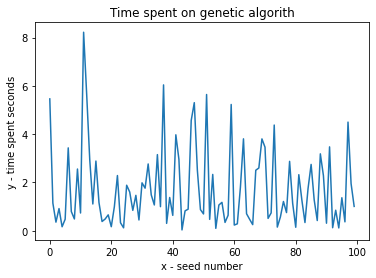

Average: 1.7340799856185913
StdDev:1.6429974128025138
Variance:2.6994404984757536
Max:8.222002029418945
Min:0.03399991989135742


In [19]:
plot_times(times)
statistics(times)

Changing to a permutation instead of an integer representation should bring a better outcome faster.

In [20]:
import numpy as np
class EightQueensState:

    """This class represents a board in the eight queens puzzle"""
    def __init__(self, state=None, n=8):
        """
        :param state: pass in a numpy array of integers to set the state, otherwise will be generated randomly
        :param n: only used if state is not provided, determines size of board (default: 8)
        """
        if state is None:
            self.n = n
            state = np.random.permutation(8)
        else:
            self.n = len(state)
        self.state = state

    @staticmethod
    def copy_replace(state, i, x):
        """This creates a copy of the state (important as numpy arrays are mutable) with column i set to x"""
        new_state = state.copy()
        new_state[i] = x
        return new_state

    @staticmethod
    def range_missing(start, stop, missing):
        """
        This creates a list of numbers with a single value missing
        e.g. range_missing(0, 8, 2) -> [0, 1, 3, 4, 5, 6, 7]
        """
        return list(range(start, missing)) + list(range(missing + 1, stop))

    def cost(self):
        """Calculates the number of pairs attacking"""
        count = 0
        for i in range(len(self.state) - 1):
            # for each queen, look in columns to the right
            # add one to the count if there is another queen in the same row
            count += (self.state[i] == np.array(self.state[i + 1:])).sum()

            # add one to the count for each queen on the upper or lower diagonal
            upper_diagonal = self.state[i] + np.arange(1, self.n - i)
            lower_diagonal = self.state[i] - np.arange(1, self.n - i)
            count += (np.array(self.state[i + 1:]) == upper_diagonal).sum()
            count += (np.array(self.state[i + 1:]) == lower_diagonal).sum()
        return count
    
    def neighbourhood(self):
        """This generates every state possible by changing a single queen position"""
        neighbourhood = []
        for column in range(self.n):
            for new_position in self.range_missing(0, self.n, self.state[column]):
                new_state = self.copy_replace(self.state, column, new_position)
                neighbourhood.append(EightQueensState(new_state))

        return neighbourhood

    def random_neighbour(self):
        """Generates a single random neighbour state, useful for some algorithms"""
        column = np.random.choice(range(self.n))
        new_position = np.random.choice(self.range_missing(0, self.n, self.state[column]))
        new_state = self.copy_replace(self.state, column, new_position)
        return EightQueensState(new_state)

    def is_goal(self):
        return self.cost() == 0

    def __str__(self):
        if self.is_goal():
            return f"Goal state! {self.state}"
        else:
            return f"{self.state} cost {self.cost()}"

In [21]:
times = []
find_queens_sol(times)


Current seed is: 0 
Iteration 1
[2 5 7 4 1 3 0 6] cost 1
Iteration 2
[2 5 7 4 1 3 0 6] cost 1
Iteration 3
[5 7 4 1 3 6 2 0] cost 2
Iteration 4
[2 2 5 7 4 1 3 6] cost 1
Iteration 5
[2 5 7 4 1 3 6 6] cost 1
Iteration 6
[2 2 5 7 4 1 3 6] cost 1
Iteration 7
[2 2 5 7 4 1 3 6] cost 1
Iteration 8
[2 2 5 7 4 1 3 6] cost 1
Iteration 9
[2 2 5 7 4 1 3 6] cost 1
Iteration 10
[5 2 5 7 4 1 3 6] cost 1
Iteration 11
[5 2 5 7 4 1 3 6] cost 1
Iteration 12
[5 2 5 7 4 1 3 6] cost 1
Iteration 13
[5 2 5 7 4 1 3 6] cost 1
Iteration 14
[5 2 5 7 4 1 3 6] cost 1
Iteration 15
[5 2 5 7 4 1 3 6] cost 1
Iteration 16
[5 2 5 7 4 1 3 6] cost 1
0.061997413635253906
Goal state! [5 2 0 7 4 1 3 6]
Current seed is: 1 
Iteration 1
[7 4 0 2 5 1 6 3] cost 2
Iteration 2
[7 4 0 2 5 1 6 3] cost 2
Iteration 3
[7 4 0 2 5 1 6 3] cost 2
Iteration 4
[7 4 0 2 5 1 6 3] cost 2
Iteration 5
[7 4 0 2 5 1 6 3] cost 2
Iteration 6
[7 4 0 2 5 1 6 3] cost 2
Iteration 7
[7 4 0 2 5 1 6 3] cost 2
Iteration 8
[7 4 0 2 5 1 6 3] cost 2
Iteration 9
[7

Iteration 203
[6 3 3 0 7 4 1 5] cost 1
Iteration 204
[6 3 3 0 7 4 1 5] cost 1
Iteration 205
[6 3 3 0 7 4 1 5] cost 1
Iteration 206
[6 3 3 0 7 4 1 5] cost 1
Iteration 207
[6 3 3 0 7 4 1 5] cost 1
Iteration 208
[6 3 3 0 7 4 1 5] cost 1
Iteration 209
[6 3 3 0 7 4 1 5] cost 1
Iteration 210
[6 3 3 0 7 4 1 5] cost 1
Iteration 211
[6 3 3 0 7 4 1 5] cost 1
Iteration 212
[6 3 3 0 7 4 1 5] cost 1
Iteration 213
[6 3 3 0 7 4 1 5] cost 1
Iteration 214
[6 3 3 0 7 4 1 5] cost 1
Iteration 215
[6 3 3 0 7 4 1 5] cost 1
Iteration 216
[6 3 3 0 7 4 1 5] cost 1
Iteration 217
[6 3 3 0 7 4 1 5] cost 1
Iteration 218
[6 3 3 0 7 4 1 5] cost 1
Iteration 219
[6 3 3 0 7 4 1 5] cost 1
Iteration 220
[6 3 3 0 7 4 1 5] cost 1
Iteration 221
[6 3 3 0 7 4 1 5] cost 1
Iteration 222
[6 3 3 0 7 4 1 5] cost 1
Iteration 223
[6 3 3 0 7 4 1 5] cost 1
Iteration 224
[6 3 3 0 7 4 1 5] cost 1
Iteration 225
[6 3 3 0 7 4 1 5] cost 1
Iteration 226
[6 3 3 0 7 4 1 5] cost 1
Iteration 227
[6 3 3 0 7 4 1 5] cost 1
Iteration 228
[6 3 3 0 7 

Iteration 186
[5 3 1 6 4 2 0 5] cost 1
Iteration 187
[5 3 1 6 4 2 0 5] cost 1
Iteration 188
[5 3 1 6 4 2 0 5] cost 1
Iteration 189
[5 3 1 6 4 2 0 5] cost 1
Iteration 190
[7 3 1 6 4 2 0 5] cost 1
Iteration 191
[7 3 1 6 4 2 0 5] cost 1
Iteration 192
[0 5 3 1 6 4 2 0] cost 1
Iteration 193
[0 5 3 1 6 4 2 0] cost 1
Iteration 194
[0 5 3 1 6 4 2 0] cost 1
Iteration 195
[0 5 3 1 6 4 2 0] cost 1
Iteration 196
[0 5 3 1 6 4 2 0] cost 1
Iteration 197
[0 5 3 1 6 4 2 0] cost 1
Iteration 198
[0 5 3 1 6 4 2 0] cost 1
Iteration 199
[0 5 3 1 6 4 2 0] cost 1
Iteration 200
[0 5 3 1 6 4 2 0] cost 1
Iteration 201
[0 5 3 1 6 4 2 0] cost 1
Iteration 202
[0 5 3 1 6 4 2 0] cost 1
Iteration 203
[0 5 3 1 6 4 2 0] cost 1
Iteration 204
[0 5 3 1 6 4 2 0] cost 1
Iteration 205
[0 5 3 1 6 4 2 0] cost 1
Iteration 206
[0 5 3 1 6 4 2 0] cost 1
Iteration 207
[0 5 3 1 6 4 2 0] cost 1
Iteration 208
[0 5 3 1 6 4 2 0] cost 1
Iteration 209
[0 5 3 1 6 4 2 0] cost 1
Iteration 210
[0 5 3 1 6 4 2 0] cost 1
Iteration 211
[0 5 3 1 6 

Iteration 402
[3 1 7 4 2 0 5 5] cost 2
Iteration 403
[3 1 7 4 2 0 5 5] cost 2
Iteration 404
[1 7 0 6 3 5 2 4] cost 1
Iteration 405
[1 7 0 6 3 5 2 4] cost 1
1.5060017108917236
Goal state! [2 4 1 7 0 6 3 5]
Current seed is: 5 
Iteration 1
[7 6 1 5 2 0 3 4] cost 2
Iteration 2
[7 6 1 5 2 0 3 4] cost 2
Iteration 3
[6 1 5 2 0 3 4 7] cost 2
Iteration 4
[2 3 1 4 7 5 0 6] cost 2
Iteration 5
[2 3 1 4 7 5 0 6] cost 2
Iteration 6
[2 3 1 4 7 5 0 6] cost 2
Iteration 7
[2 3 1 4 7 5 0 6] cost 2
Iteration 8
[1 6 2 7 4 0 3 5] cost 1
Iteration 9
[2 3 1 7 4 0 3 5] cost 2
Iteration 10
[2 3 1 7 4 0 3 5] cost 2
Iteration 11
[2 5 1 7 4 0 3 5] cost 2
Iteration 12
[2 3 1 7 4 0 3 5] cost 2
Iteration 13
[2 3 1 7 4 0 3 5] cost 2
Iteration 14
[2 3 1 7 4 0 3 5] cost 2
Iteration 15
[2 3 1 7 4 0 3 5] cost 2
Iteration 16
[2 3 1 7 4 0 3 5] cost 2
Iteration 17
[2 3 1 7 4 0 3 5] cost 2
Iteration 18
[2 3 1 7 4 0 3 5] cost 2
Iteration 19
[2 2 1 7 4 0 3 5] cost 2
Iteration 20
[1 4 2 5 0 7 3 6] cost 2
Iteration 21
[4 0 5 6 1 

[0 3 6 2 7 1 4 5] cost 1
Iteration 234
[0 3 6 2 7 1 4 5] cost 1
Iteration 235
[0 3 6 2 7 1 4 5] cost 1
Iteration 236
[0 3 6 2 7 1 4 5] cost 1
Iteration 237
[0 3 6 2 7 1 4 5] cost 1
Iteration 238
[0 3 6 2 7 1 4 5] cost 1
Iteration 239
[5 0 3 6 2 7 1 4] cost 1
Iteration 240
[5 0 3 6 2 7 1 4] cost 1
Iteration 241
[5 0 3 6 2 7 1 4] cost 1
Iteration 242
[5 0 3 6 2 7 1 4] cost 1
Iteration 243
[5 0 3 6 2 7 1 4] cost 1
Iteration 244
[5 0 3 6 2 7 1 4] cost 1
Iteration 245
[5 0 3 6 2 7 1 4] cost 1
Iteration 246
[5 0 3 6 2 7 1 4] cost 1
Iteration 247
[5 0 3 6 2 7 1 4] cost 1
Iteration 248
[5 0 3 6 2 7 1 4] cost 1
Iteration 249
[5 0 3 6 2 7 1 4] cost 1
Iteration 250
[5 0 3 6 2 7 1 4] cost 1
Iteration 251
[5 0 3 6 2 7 1 4] cost 1
Iteration 252
[5 0 3 6 2 7 1 4] cost 1
Iteration 253
[5 0 3 6 2 7 1 4] cost 1
Iteration 254
[0 0 3 6 2 7 1 4] cost 1
Iteration 255
[5 0 2 6 2 7 1 4] cost 1
Iteration 256
[5 0 2 6 2 7 1 4] cost 1
Iteration 257
[5 0 2 6 2 7 1 4] cost 1
Iteration 258
[5 0 2 6 2 7 1 4] cost 1


[4 2 0 5 7 1 1 6] cost 1
Iteration 85
[6 4 2 0 5 7 1 1] cost 1
Iteration 86
[6 4 2 0 5 7 1 5] cost 2
Iteration 87
[6 4 2 0 5 7 1 5] cost 2
Iteration 88
[6 4 2 0 5 7 1 5] cost 2
Iteration 89
[6 4 2 0 5 7 1 5] cost 2
0.3410019874572754
Goal state! [6 4 2 0 5 7 1 3]
Current seed is: 10 
Iteration 1
[7 6 4 0 1 3 5 2] cost 2
Iteration 2
[7 6 4 0 1 3 5 2] cost 2
Iteration 3
[7 6 4 0 1 3 5 2] cost 2
Iteration 4
[7 6 4 0 1 3 5 2] cost 2
Iteration 5
[2 7 6 4 0 1 3 5] cost 2
Iteration 6
[2 7 6 4 0 1 3 5] cost 2
Iteration 7
[2 7 6 4 0 1 3 5] cost 2
Iteration 8
[2 7 1 4 0 1 3 5] cost 2
Iteration 9
[2 7 1 4 0 6 3 5] cost 1
Iteration 10
[2 7 1 4 0 6 3 5] cost 1
Iteration 11
[2 7 1 4 0 6 3 5] cost 1
Iteration 12
[2 7 1 4 0 6 3 5] cost 1
Iteration 13
[2 7 1 4 0 6 3 5] cost 1
Iteration 14
[2 7 1 4 0 6 3 5] cost 1
Iteration 15
[2 7 1 4 0 6 3 5] cost 1
Iteration 16
[7 1 4 0 6 3 5 2] cost 1
Iteration 17
[7 1 4 0 6 3 5 2] cost 1
Iteration 18
[7 1 4 0 6 3 5 2] cost 1
Iteration 19
[7 1 4 0 6 3 5 2] cost 1
It

Iteration 241
[3 0 6 3 5 7 1 4] cost 1
Iteration 242
[3 0 6 3 5 7 1 4] cost 1
Iteration 243
[3 0 6 3 5 7 1 4] cost 1
Iteration 244
[3 0 6 3 5 7 1 4] cost 1
Iteration 245
[3 0 6 3 5 7 1 4] cost 1
Iteration 246
[3 0 6 3 5 7 1 4] cost 1
Iteration 247
[3 0 6 3 5 7 1 4] cost 1
Iteration 248
[3 0 6 3 5 7 1 4] cost 1
Iteration 249
[3 0 6 3 5 7 1 4] cost 1
Iteration 250
[3 0 6 3 5 7 1 4] cost 1
Iteration 251
[3 0 6 3 5 7 1 4] cost 1
Iteration 252
[3 0 6 3 5 7 1 4] cost 1
Iteration 253
[3 0 6 3 5 7 1 4] cost 1
Iteration 254
[5 0 6 3 5 7 1 4] cost 1
Iteration 255
[3 0 6 3 5 7 1 4] cost 1
Iteration 256
[3 0 6 3 5 7 1 4] cost 1
Iteration 257
[3 0 6 3 5 7 1 4] cost 1
Iteration 258
[3 0 6 3 5 7 1 4] cost 1
Iteration 259
[3 0 6 3 5 7 1 4] cost 1
Iteration 260
[3 0 6 3 5 7 1 4] cost 1
Iteration 261
[3 0 6 3 5 7 1 4] cost 1
Iteration 262
[3 0 6 3 5 7 1 4] cost 1
Iteration 263
[3 0 6 3 5 7 1 4] cost 1
Iteration 264
[3 0 6 3 5 7 1 4] cost 1
Iteration 265
[3 0 6 3 5 7 1 4] cost 1
Iteration 266
[3 0 6 3 5 

Iteration 9
[1 6 4 0 5 0 2 7] cost 2
Iteration 10
[1 6 4 0 5 0 2 7] cost 2
Iteration 11
[1 6 4 0 5 0 2 7] cost 2
Iteration 12
[1 6 4 0 5 0 2 7] cost 2
Iteration 13
[1 6 4 0 5 0 2 7] cost 2
Iteration 14
[1 6 4 0 5 0 2 7] cost 2
Iteration 15
[4 0 5 0 2 7 1 1] cost 3
Iteration 16
[1 1 2 7 6 4 0 5] cost 3
Iteration 17
[2 5 7 3 6 0 4 1] cost 3
Iteration 18
[6 1 5 2 0 3 4 7] cost 2
Iteration 19
[6 1 5 2 0 0 4 1] cost 3
Iteration 20
[3 5 0 4 1 6 2 7] cost 1
0.09501385688781738
Goal state! [3 7 4 2 0 6 1 5]
Current seed is: 14 
0.001988649368286133
Goal state! [2 4 1 7 0 6 3 5]
Current seed is: 15 
0.001001119613647461
Goal state! [2 0 6 4 7 1 3 5]
Current seed is: 16 
Iteration 1
[1 4 7 3 0 2 6 5] cost 2
Iteration 2
[5 7 2 0 4 6 1 5] cost 3
Iteration 3
[5 7 2 0 4 6 1 3] cost 2
Iteration 4
[3 5 7 2 4 6 1 3] cost 1
Iteration 5
[3 5 7 2 0 6 1 3] cost 2
Iteration 6
[7 2 0 6 1 3 5 7] cost 2
Iteration 7
[7 3 5 7 2 0 6 1] cost 2
Iteration 8
[7 3 5 7 2 0 6 1] cost 2
Iteration 9
[3 5 7 2 0 6 1 7] cost

Iteration 228
[5 0 2 4 6 1 3 5] cost 1
Iteration 229
[7 0 2 4 6 1 3 5] cost 1
Iteration 230
[2 4 6 1 3 5 0 2] cost 1
Iteration 231
[0 2 4 6 1 3 5 0] cost 1
Iteration 232
[1 3 5 0 2 4 6 1] cost 1
Iteration 233
[2 4 6 1 3 5 0 2] cost 1
Iteration 234
[4 6 1 3 5 0 2 1] cost 2
Iteration 235
[5 0 2 4 6 1 3 5] cost 1
Iteration 236
[4 6 1 3 5 0 2 5] cost 1
Iteration 237
[4 6 1 3 5 0 2 5] cost 1
Iteration 238
[4 6 1 3 5 0 2 5] cost 1
Iteration 239
[4 6 1 3 5 0 2 5] cost 1
Iteration 240
[4 6 1 3 5 0 2 5] cost 1
0.9221279621124268
Goal state! [4 6 1 3 7 0 2 5]
Current seed is: 17 
Iteration 1
[0 7 4 1 3 6 2 5] cost 2
Iteration 2
[0 7 4 1 3 6 2 5] cost 2
Iteration 3
[0 7 4 1 3 6 2 5] cost 2
Iteration 4
[0 7 4 1 3 6 2 5] cost 2
Iteration 5
[0 7 4 1 3 6 2 5] cost 2
Iteration 6
[0 7 4 1 3 6 2 5] cost 2
Iteration 7
[0 7 4 1 3 6 2 5] cost 2
Iteration 8
[0 7 4 1 3 6 2 5] cost 2
Iteration 9
[0 7 4 1 3 6 2 5] cost 2
Iteration 10
[0 7 4 1 3 6 2 5] cost 2
Iteration 11
[0 7 4 1 3 6 2 5] cost 2
Iteration 12
[

Iteration 17
[5 2 0 3 6 4 7 1] cost 1
Iteration 18
[5 2 0 3 6 4 7 1] cost 1
Iteration 19
[0 3 6 4 7 1 5 2] cost 1
Iteration 20
[5 2 0 3 6 4 7 1] cost 1
Iteration 21
[5 2 0 3 6 4 7 1] cost 1
Iteration 22
[5 2 0 3 6 4 7 1] cost 1
Iteration 23
[5 2 0 3 6 4 7 1] cost 1
Iteration 24
[5 2 0 3 6 4 7 1] cost 1
Iteration 25
[5 2 0 3 6 4 7 1] cost 1
Iteration 26
[5 2 0 3 6 4 7 1] cost 1
Iteration 27
[5 2 0 3 6 4 7 1] cost 1
Iteration 28
[5 2 0 3 6 4 7 1] cost 1
Iteration 29
[5 2 0 3 6 4 7 1] cost 1
Iteration 30
[5 2 0 3 6 4 7 1] cost 1
Iteration 31
[5 2 0 3 6 4 7 1] cost 1
Iteration 32
[5 2 0 3 6 4 7 1] cost 1
Iteration 33
[0 3 6 4 7 1 5 2] cost 1
Iteration 34
[0 3 6 4 7 1 5 2] cost 1
Iteration 35
[0 3 6 4 7 1 5 2] cost 1
Iteration 36
[0 3 6 4 7 1 5 2] cost 1
Iteration 37
[0 3 6 4 7 1 5 2] cost 1
Iteration 38
[7 2 0 3 6 1 5 2] cost 2
Iteration 39
[7 2 0 3 6 1 5 2] cost 2
Iteration 40
[7 2 0 3 6 1 5 4] cost 2
Iteration 41
[7 2 0 3 6 1 5 4] cost 2
Iteration 42
[4 7 2 0 3 6 1 5] cost 2
Iteration 43

[0 3 7 4 1 6 2 5] cost 1
Iteration 50
[0 3 7 4 1 6 2 5] cost 1
Iteration 51
[0 3 7 4 1 6 2 5] cost 1
Iteration 52
[0 3 7 4 1 6 2 5] cost 1
Iteration 53
[0 3 7 4 1 6 2 5] cost 1
Iteration 54
[0 3 7 4 1 6 2 5] cost 1
Iteration 55
[0 3 7 4 1 6 2 5] cost 1
Iteration 56
[0 3 7 4 1 6 2 5] cost 1
Iteration 57
[0 3 7 4 1 6 2 5] cost 1
Iteration 58
[0 3 7 4 1 6 2 5] cost 1
Iteration 59
[0 3 7 4 1 6 2 5] cost 1
Iteration 60
[0 3 7 4 1 6 2 5] cost 1
Iteration 61
[0 3 7 4 1 6 2 5] cost 1
Iteration 62
[0 3 7 4 1 6 2 5] cost 1
Iteration 63
[0 3 7 4 1 6 2 5] cost 1
Iteration 64
[0 3 7 4 1 6 2 5] cost 1
Iteration 65
[0 3 7 4 1 6 2 5] cost 1
Iteration 66
[0 3 7 4 1 6 2 5] cost 1
Iteration 67
[0 3 7 4 1 6 2 5] cost 1
Iteration 68
[0 3 7 4 1 6 2 5] cost 1
Iteration 69
[0 3 7 4 1 6 2 5] cost 1
Iteration 70
[0 3 7 4 1 6 2 5] cost 1
Iteration 71
[0 3 7 4 1 6 2 5] cost 1
Iteration 72
[0 3 7 4 1 6 2 5] cost 1
Iteration 73
[0 3 7 4 1 6 2 5] cost 1
Iteration 74
[0 3 7 4 1 6 2 5] cost 1
Iteration 75
[0 3 7 7 1 6

Iteration 102
[0 2 4 7 1 3 5 0] cost 1
Iteration 103
[0 2 4 7 1 3 5 0] cost 1
Iteration 104
[0 2 4 7 1 3 5 0] cost 1
Iteration 105
[0 2 4 7 1 3 5 0] cost 1
Iteration 106
[0 2 4 7 1 3 5 0] cost 1
Iteration 107
[0 2 4 7 1 3 5 0] cost 1
Iteration 108
[0 2 4 7 1 3 5 0] cost 1
Iteration 109
[6 2 4 7 1 3 5 0] cost 1
Iteration 110
[6 2 4 7 1 3 5 0] cost 1
Iteration 111
[6 2 4 7 1 3 5 0] cost 1
Iteration 112
[6 2 4 7 1 3 5 0] cost 1
Iteration 113
[6 2 4 7 1 3 5 0] cost 1
Iteration 114
[6 2 4 7 1 3 5 0] cost 1
Iteration 115
[6 2 4 7 1 3 5 0] cost 1
Iteration 116
[6 2 7 7 1 3 5 0] cost 1
Iteration 117
[0 6 2 7 1 3 5 0] cost 3
Iteration 118
[5 0 6 6 2 7 7 1] cost 3
Iteration 119
[5 0 6 6 2 7 7 1] cost 3
Iteration 120
[5 0 6 6 2 7 7 1] cost 3
Iteration 121
[5 0 6 6 2 7 7 1] cost 3
Iteration 122
[5 0 6 6 2 7 7 1] cost 3
Iteration 123
[1 2 0 5 7 4 6 3] cost 1
Iteration 124
[5 1 2 0 5 7 4 6] cost 2
Iteration 125
[5 1 2 0 5 7 4 6] cost 2
Iteration 126
[5 1 2 0 5 7 4 6] cost 2
Iteration 127
[5 1 2 0 5 

[5 2 0 3 7 4 1 6] cost 1
Iteration 136
[5 2 0 3 7 4 1 6] cost 1
Iteration 137
[5 2 0 3 7 4 1 6] cost 1
Iteration 138
[5 2 0 3 7 4 1 6] cost 1
Iteration 139
[1 5 2 0 3 7 4 1] cost 1
0.5199949741363525
Goal state! [6 1 5 2 0 3 7 4]
Goal state! [4 1 3 6 2 7 5 0]
Current seed is: 26 
Iteration 1
[1 2 6 3 0 7 5 4] cost 2
Iteration 2
[4 1 2 6 3 0 7 5] cost 2
Iteration 3
[1 2 6 3 0 7 5 4] cost 2
Iteration 4
[1 2 6 3 0 7 5 4] cost 2
Iteration 5
[2 6 3 0 7 5 4 1] cost 1
Iteration 6
[2 6 3 0 7 5 4 1] cost 1
Iteration 7
[2 6 3 0 7 5 4 1] cost 1
Iteration 8
[2 6 3 0 7 5 4 1] cost 1
Iteration 9
[2 6 3 0 7 5 4 1] cost 1
Iteration 10
[2 6 3 0 7 5 4 1] cost 1
Iteration 11
[2 6 3 0 7 5 4 1] cost 1
Iteration 12
[2 6 3 0 7 5 4 1] cost 1
Iteration 13
[2 6 3 0 7 5 4 1] cost 1
Iteration 14
[2 6 3 0 7 5 4 1] cost 1
Iteration 15
[2 6 3 0 7 5 4 1] cost 1
Iteration 16
[2 6 3 0 7 5 4 1] cost 1
Iteration 17
[2 6 3 0 7 5 4 1] cost 1
Iteration 18
[2 6 3 0 7 5 4 1] cost 1
Iteration 19
[2 6 3 0 7 5 4 1] cost 1
Iterat

Iteration 24
[2 4 7 1 3 6 0 3] cost 1
Iteration 25
[2 4 7 1 4 6 0 3] cost 1
Iteration 26
[2 4 7 1 3 6 0 3] cost 1
Iteration 27
[2 4 7 1 4 6 0 3] cost 1
Iteration 28
[2 4 7 1 4 6 0 3] cost 1
Iteration 29
[2 4 7 1 4 6 0 3] cost 1
Iteration 30
[2 4 7 1 4 6 0 3] cost 1
Iteration 31
[2 4 7 1 4 6 0 3] cost 1
Iteration 32
[2 4 7 1 4 6 0 3] cost 1
Iteration 33
[2 4 7 1 4 6 0 3] cost 1
Iteration 34
[2 4 7 1 4 6 0 3] cost 1
Iteration 35
[2 4 7 1 4 6 0 3] cost 1
Iteration 36
[2 4 7 1 4 6 0 3] cost 1
Iteration 37
[2 4 7 1 4 6 0 3] cost 1
Iteration 38
[2 4 7 1 4 6 0 3] cost 1
Iteration 39
[2 4 7 1 4 6 0 3] cost 1
Iteration 40
[2 4 7 1 4 6 0 3] cost 1
Iteration 41
[2 4 7 1 4 6 0 3] cost 1
Iteration 42
[2 4 7 1 4 6 0 3] cost 1
Iteration 43
[2 4 7 1 4 6 0 3] cost 1
Iteration 44
[2 4 7 1 4 6 0 5] cost 2
Iteration 45
[2 4 7 1 4 6 1 3] cost 2
Iteration 46
[2 4 7 1 4 6 0 5] cost 2
Iteration 47
[2 4 7 1 4 6 0 5] cost 2
Iteration 48
[2 4 7 1 4 6 0 5] cost 2
Iteration 49
[2 4 7 7 4 6 0 5] cost 2
Iteration 50

Iteration 253
[7 2 4 6 0 3 5 7] cost 1
Iteration 254
[7 2 4 6 0 3 5 1] cost 1
Iteration 255
[7 2 4 6 0 3 5 7] cost 1
Iteration 256
[7 2 4 6 0 3 5 7] cost 1
Iteration 257
[7 2 4 6 0 3 5 7] cost 1
Iteration 258
[7 2 4 6 0 3 5 7] cost 1
Iteration 259
[7 2 4 6 0 3 5 7] cost 1
Iteration 260
[7 2 4 6 0 3 5 7] cost 1
Iteration 261
[7 2 4 6 0 3 5 7] cost 1
Iteration 262
[7 2 4 6 0 3 5 7] cost 1
Iteration 263
[1 2 4 6 0 3 5 7] cost 1
Iteration 264
[1 2 4 6 0 3 5 7] cost 1
Iteration 265
[3 5 7 2 4 6 0 3] cost 2
Iteration 266
[3 5 7 2 4 6 0 3] cost 2
Iteration 267
[3 5 7 2 4 6 1 3] cost 1
Iteration 268
[3 5 7 2 4 6 1 3] cost 1
Iteration 269
[3 5 7 2 4 6 1 3] cost 1
Iteration 270
[3 5 7 2 4 6 1 3] cost 1
Iteration 271
[3 5 7 2 4 6 1 3] cost 1
Iteration 272
[3 5 7 2 4 6 1 3] cost 1
Iteration 273
[3 5 7 2 4 6 1 3] cost 1
Iteration 274
[3 5 7 2 4 6 1 3] cost 1
Iteration 275
[3 5 7 2 4 6 1 3] cost 1
Iteration 276
[3 5 7 2 4 6 1 3] cost 1
Iteration 277
[3 5 7 2 4 6 1 3] cost 1
Iteration 278
[3 5 7 2 4 

Iteration 182
[2 6 3 1 7 5 0 2] cost 1
Iteration 183
[2 6 3 1 7 5 0 2] cost 1
Iteration 184
[2 6 3 1 7 5 0 2] cost 1
Iteration 185
[2 6 3 1 7 5 0 2] cost 1
Iteration 186
[2 6 3 1 7 5 0 2] cost 1
Iteration 187
[2 6 3 1 7 5 0 2] cost 1
Iteration 188
[2 6 3 1 7 5 0 2] cost 1
Iteration 189
[2 6 3 1 7 5 0 2] cost 1
Iteration 190
[2 6 3 1 7 5 0 2] cost 1
Iteration 191
[2 6 3 1 7 5 0 2] cost 1
Iteration 192
[2 6 3 1 7 5 0 2] cost 1
Iteration 193
[2 6 3 1 7 5 0 2] cost 1
Iteration 194
[2 6 3 1 7 5 0 2] cost 1
Iteration 195
[2 6 3 1 7 5 0 2] cost 1
Iteration 196
[2 6 3 1 7 5 0 2] cost 1
Iteration 197
[2 6 3 1 7 5 0 2] cost 1
Iteration 198
[2 6 3 1 7 5 0 2] cost 1
Iteration 199
[2 6 3 1 7 5 0 2] cost 1
Iteration 200
[2 6 3 1 7 5 0 2] cost 1
Iteration 201
[2 6 3 1 7 5 0 2] cost 1
Iteration 202
[2 6 3 1 7 5 0 2] cost 1
Iteration 203
[2 6 3 1 7 5 0 2] cost 1
Iteration 204
[2 6 3 1 7 5 0 2] cost 1
Iteration 205
[2 6 3 1 7 5 0 2] cost 1
Iteration 206
[2 6 3 1 7 5 0 2] cost 1
Iteration 207
[2 6 3 1 7 

Iteration 71
[7 5 3 1 6 4 2 7] cost 1
Iteration 72
[7 5 3 1 6 4 2 7] cost 1
Iteration 73
[7 5 3 1 6 4 2 7] cost 1
Iteration 74
[7 5 3 1 6 4 2 7] cost 1
Iteration 75
[7 5 3 1 6 4 2 7] cost 1
Iteration 76
[7 5 3 1 6 4 2 7] cost 1
Iteration 77
[7 5 3 1 6 4 2 7] cost 1
Iteration 78
[7 5 3 1 6 4 2 7] cost 1
Iteration 79
[7 5 3 0 6 4 2 7] cost 1
Iteration 80
[7 5 3 0 6 4 2 7] cost 1
Iteration 81
[7 5 3 0 6 4 2 7] cost 1
Iteration 82
[7 5 3 0 6 4 2 7] cost 1
Iteration 83
[7 5 3 0 6 4 2 7] cost 1
Iteration 84
[7 5 3 0 6 4 2 7] cost 1
Iteration 85
[7 5 3 0 6 4 2 7] cost 1
Iteration 86
[7 5 3 0 6 4 2 7] cost 1
Iteration 87
[7 5 3 0 6 4 2 7] cost 1
Iteration 88
[7 5 3 0 6 4 2 7] cost 1
Iteration 89
[7 5 3 0 6 4 2 7] cost 1
Iteration 90
[7 5 3 0 6 4 2 7] cost 1
Iteration 91
[7 5 3 0 6 4 2 7] cost 1
Iteration 92
[7 5 3 0 6 4 2 7] cost 1
Iteration 93
[7 5 3 0 6 4 2 7] cost 1
Iteration 94
[7 5 3 0 6 4 2 7] cost 1
Iteration 95
[7 5 3 0 6 4 2 7] cost 1
Iteration 96
[7 5 3 0 6 4 2 7] cost 1
Iteration 97

[2 0 5 3 1 6 4 2] cost 1
Iteration 286
[2 0 5 3 1 6 4 2] cost 1
Iteration 287
[2 0 5 3 1 6 4 2] cost 1
Iteration 288
[2 0 5 3 1 6 4 2] cost 1
Iteration 289
[2 0 5 3 1 6 4 2] cost 1
Iteration 290
[2 0 5 3 1 6 4 2] cost 1
Iteration 291
[2 0 5 3 1 6 4 2] cost 1
Iteration 292
[2 0 5 3 1 6 4 2] cost 1
Iteration 293
[2 0 5 3 1 6 4 2] cost 1
Iteration 294
[2 0 5 3 1 6 4 2] cost 1
Iteration 295
[2 0 5 3 1 6 4 2] cost 1
Iteration 296
[2 7 5 3 1 6 4 2] cost 1
Iteration 297
[2 7 5 3 1 6 4 2] cost 1
Iteration 298
[2 7 5 3 1 6 4 2] cost 1
Iteration 299
[2 0 5 3 1 6 4 2] cost 1
Iteration 300
[2 0 5 3 1 6 4 2] cost 1
Iteration 301
[2 0 5 3 1 6 4 2] cost 1
Iteration 302
[2 0 5 3 1 6 4 2] cost 1
Iteration 303
[2 0 5 3 1 6 4 2] cost 1
Iteration 304
[2 0 5 3 1 6 4 2] cost 1
Iteration 305
[2 0 5 3 1 6 4 2] cost 1
Iteration 306
[2 0 5 3 1 6 4 2] cost 1
Iteration 307
[2 0 5 3 1 6 4 2] cost 1
Iteration 308
[2 0 5 3 1 6 4 2] cost 1
Iteration 309
[2 0 5 3 1 6 4 2] cost 1
Iteration 310
[5 2 0 5 3 1 6 4] cost 1


Iteration 8
[2 0 5 1 4 0 7 4] cost 2
Iteration 9
[4 2 0 5 1 4 0 7] cost 2
Iteration 10
[4 2 0 5 1 4 1 7] cost 2
Iteration 11
[4 2 0 5 1 4 0 7] cost 2
Iteration 12
[2 0 5 1 4 1 7 4] cost 2
Iteration 13
[2 0 5 1 4 1 7 4] cost 2
Iteration 14
[1 7 2 6 4 5 0 3] cost 5
Iteration 15
[2 5 0 6 1 4 7 3] cost 2
Iteration 16
[2 0 5 1 1 4 7 3] cost 2
Iteration 17
[2 5 0 6 1 4 7 3] cost 2
Iteration 18
[7 5 0 6 1 4 7 3] cost 2
Iteration 19
[2 0 3 6 7 1 4 5] cost 2
Iteration 20
[6 3 7 0 7 1 4 5] cost 3
Iteration 21
[2 0 3 5 7 1 4 5] cost 3
Iteration 22
[0 7 1 4 5 2 0 3] cost 3
Iteration 23
[1 4 5 2 0 3 0 7] cost 3
Iteration 24
[1 4 5 2 0 3 0 7] cost 3
Iteration 25
[5 2 0 3 0 7 1 4] cost 1
Iteration 26
[5 2 0 3 0 7 1 4] cost 1
Iteration 27
[5 2 0 3 0 7 1 4] cost 1
Iteration 28
[5 2 0 3 0 7 1 4] cost 1
Iteration 29
[5 2 0 3 0 7 1 4] cost 1
Iteration 30
[5 2 0 3 0 7 1 4] cost 1
Iteration 31
[5 2 0 3 0 7 1 4] cost 1
Iteration 32
[5 2 0 3 0 7 1 4] cost 1
Iteration 33
[5 2 0 3 0 7 1 4] cost 1
Iteration 34
[

Iteration 226
[0 4 2 7 5 3 1 6] cost 1
Iteration 227
[6 4 2 7 5 3 1 6] cost 1
Iteration 228
[6 4 2 7 5 3 1 6] cost 1
Iteration 229
[6 4 2 7 5 3 1 6] cost 1
Iteration 230
[6 4 2 7 5 3 1 6] cost 1
Iteration 231
[6 4 2 7 5 3 1 6] cost 1
Iteration 232
[6 4 2 7 5 3 1 6] cost 1
Iteration 233
[6 4 2 7 5 3 1 6] cost 1
Iteration 234
[6 4 2 7 5 3 1 6] cost 1
Iteration 235
[6 4 2 7 5 3 1 6] cost 1
Iteration 236
[6 4 2 7 5 3 1 6] cost 1
Iteration 237
[6 4 2 7 5 3 1 6] cost 1
Iteration 238
[6 4 2 7 5 3 1 6] cost 1
Iteration 239
[6 4 2 7 5 3 1 6] cost 1
Iteration 240
[6 4 2 7 5 3 1 6] cost 1
Iteration 241
[6 4 2 7 5 3 1 6] cost 1
Iteration 242
[6 4 2 7 5 3 1 6] cost 1
Iteration 243
[6 4 2 7 5 3 1 6] cost 1
Iteration 244
[6 4 2 7 5 3 1 6] cost 1
Iteration 245
[6 4 2 7 5 3 1 6] cost 1
Iteration 246
[6 4 2 7 5 3 1 6] cost 1
Iteration 247
[6 4 2 7 5 3 1 6] cost 1
Iteration 248
[6 4 2 7 5 3 1 6] cost 1
Iteration 249
[6 4 2 7 5 3 1 6] cost 1
Iteration 250
[6 4 2 7 5 3 1 6] cost 1
Iteration 251
[6 4 2 7 5 

[6 3 7 4 1 5 2 5] cost 1
Iteration 65
[6 3 7 4 1 0 2 5] cost 1
Iteration 66
[6 3 7 4 1 0 2 5] cost 1
Iteration 67
[6 3 7 4 1 0 2 5] cost 1
Iteration 68
[6 3 7 4 1 0 2 5] cost 1
Iteration 69
[6 3 7 4 1 0 2 5] cost 1
Iteration 70
[6 3 7 4 1 0 2 5] cost 1
Iteration 71
[6 3 7 4 1 0 2 5] cost 1
Iteration 72
[6 3 7 4 1 0 2 5] cost 1
Iteration 73
[6 3 7 4 1 0 2 5] cost 1
Iteration 74
[6 3 7 4 1 0 2 5] cost 1
Iteration 75
[6 3 7 4 1 0 2 5] cost 1
Iteration 76
[6 3 7 4 1 0 2 5] cost 1
Iteration 77
[6 3 7 4 1 0 2 5] cost 1
Iteration 78
[6 3 7 4 1 0 2 5] cost 1
Iteration 79
[6 3 7 4 1 0 2 5] cost 1
Iteration 80
[6 3 7 4 1 0 2 5] cost 1
Iteration 81
[6 3 7 4 1 0 2 5] cost 1
Iteration 82
[6 3 7 4 1 0 2 5] cost 1
Iteration 83
[6 3 7 4 1 0 2 5] cost 1
Iteration 84
[6 3 7 4 1 0 2 5] cost 1
Iteration 85
[6 3 7 4 1 0 2 5] cost 1
Iteration 86
[6 3 7 4 1 0 2 5] cost 1
Iteration 87
[6 3 7 4 1 0 2 5] cost 1
Iteration 88
[6 3 7 4 1 0 2 5] cost 1
Iteration 89
[6 3 7 4 1 0 2 5] cost 1
Iteration 90
[6 3 7 4 1 0

Iteration 49
[5 0 4 6 0 2 4 7] cost 2
Iteration 50
[5 0 4 6 0 2 4 7] cost 2
Iteration 51
[5 0 6 6 0 2 4 7] cost 2
Iteration 52
[5 0 4 6 0 2 4 7] cost 2
Iteration 53
[5 0 4 6 0 2 4 7] cost 2
Iteration 54
[5 0 4 6 0 2 4 7] cost 2
Iteration 55
[5 0 4 6 0 2 4 7] cost 2
Iteration 56
[5 0 4 6 0 2 4 7] cost 2
Iteration 57
[5 0 4 6 0 2 4 7] cost 2
Iteration 58
[5 0 4 6 0 2 4 7] cost 2
Iteration 59
[5 0 4 6 0 2 4 7] cost 2
Iteration 60
[5 2 4 6 0 2 4 7] cost 2
Iteration 61
[4 6 1 5 7 3 0 2] cost 1
Iteration 62
[4 6 1 5 7 3 0 2] cost 1
Iteration 63
[4 6 1 5 7 3 0 2] cost 1
Iteration 64
[4 6 1 5 7 3 0 2] cost 1
Iteration 65
[1 5 7 3 0 2 4 6] cost 1
Iteration 66
[2 5 7 3 0 2 4 6] cost 2
Iteration 67
[5 0 1 7 2 3 6 4] cost 2
Iteration 68
[5 0 1 7 2 6 1 5] cost 4
Iteration 69
[6 1 5 5 0 1 7 2] cost 4
Iteration 70
[5 4 1 6 0 3 7 2] cost 3
Iteration 71
[5 4 1 3 0 3 7 2] cost 2
Iteration 72
[5 4 1 6 0 3 7 2] cost 3
Iteration 73
[5 4 1 6 0 3 7 2] cost 3
Iteration 74
[5 4 1 6 0 3 7 2] cost 3
Iteration 75

Iteration 26
[2 2 6 1 3 0 7 4] cost 2
Iteration 27
[2 6 6 1 3 0 7 4] cost 2
Iteration 28
[0 6 6 1 3 0 7 4] cost 3
Iteration 29
[6 6 1 3 0 7 7 4] cost 3
Iteration 30
[0 7 7 4 6 1 3 0] cost 4
Iteration 31
[3 0 6 1 3 0 7 4] cost 3
Iteration 32
[7 1 3 5 0 2 4 6] cost 1
Iteration 33
[5 0 2 4 6 3 0 6] cost 3
Iteration 34
[5 0 2 4 6 1 3 0] cost 2
Iteration 35
[5 0 2 4 6 1 3 0] cost 2
Iteration 36
[0 5 0 2 4 6 1 3] cost 2
Iteration 37
[0 5 0 2 7 6 1 3] cost 2
Iteration 38
[0 5 0 2 7 7 1 3] cost 2
Iteration 39
[1 3 5 0 2 7 6 1] cost 3
Iteration 40
[5 1 4 0 7 6 2 3] cost 2
Iteration 41
[5 0 2 7 7 6 1 5] cost 3
Iteration 42
[5 0 2 7 7 6 1 5] cost 3
Iteration 43
[6 2 7 5 1 3 4 0] cost 2
Iteration 44
[1 3 4 0 5 0 2 7] cost 3
Iteration 45
[0 2 7 7 6 1 5 1] cost 3
Iteration 46
[5 6 2 1 4 7 3 0] cost 4
Iteration 47
[5 6 2 1 4 7 7 3] cost 4
Iteration 48
[6 2 7 4 0 3 5 1] cost 2
Iteration 49
[6 4 0 5 7 2 1 3] cost 2
Iteration 50
[6 4 0 5 7 2 1 3] cost 2
Iteration 51
[6 4 0 5 7 2 1 3] cost 2
Iteration 52

Iteration 32
[4 0 7 3 6 2 5 5] cost 2
Iteration 33
[5 5 4 0 7 3 6 2] cost 2
Iteration 34
[4 0 4 0 7 3 6 2] cost 2
Iteration 35
[4 0 4 0 7 3 6 2] cost 2
Iteration 36
[4 0 7 3 6 2 5 5] cost 2
Iteration 37
[4 0 7 3 6 2 5 5] cost 2
Iteration 38
[4 0 7 3 6 2 5 2] cost 3
Iteration 39
[4 0 7 3 3 6 2 5] cost 2
Iteration 40
[4 0 7 3 3 6 2 5] cost 2
Iteration 41
[4 0 7 3 3 6 2 5] cost 2
Iteration 42
[2 0 5 7 1 3 6 4] cost 1
Iteration 43
[2 0 5 7 1 3 6 4] cost 1
0.15700030326843262
Goal state! [3 6 4 2 0 5 7 1]
Current seed is: 41 
Iteration 1
[5 1 4 6 7 3 2 0] cost 2
Iteration 2
[3 7 2 1 6 4 0 4] cost 2
Iteration 3
[3 7 2 1 6 4 0 5] cost 2
Iteration 4
[3 7 2 1 6 4 0 5] cost 2
Iteration 5
[3 7 2 1 6 4 0 5] cost 2
Iteration 6
[3 7 2 1 6 4 0 5] cost 2
Iteration 7
[3 7 2 0 6 4 0 5] cost 2
Iteration 8
[3 7 2 1 6 4 0 5] cost 2
Iteration 9
[3 7 2 1 6 4 0 5] cost 2
Iteration 10
[3 7 2 1 6 4 0 5] cost 2
Iteration 11
[3 7 2 1 6 4 0 5] cost 2
Iteration 12
[3 7 2 1 6 4 0 5] cost 2
Iteration 13
[3 7 2 1 6 4 

Iteration 32
[3 5 7 4 6 0 2 1] cost 1
Iteration 33
[3 5 7 4 6 0 2 1] cost 1
Iteration 34
[3 5 7 4 6 0 2 1] cost 1
Iteration 35
[3 5 7 4 6 0 2 1] cost 1
Iteration 36
[3 5 7 4 6 0 2 1] cost 1
Iteration 37
[1 3 5 7 4 0 2 5] cost 2
Iteration 38
[1 3 5 7 6 0 2 4] cost 2
Iteration 39
[4 1 3 5 7 6 0 2] cost 2
Iteration 40
[2 0 3 1 7 5 6 4] cost 2
Iteration 41
[5 7 2 0 3 1 7 5] cost 2
Iteration 42
[5 7 2 0 3 1 7 5] cost 2
Iteration 43
[5 7 2 0 3 1 7 5] cost 2
Iteration 44
[5 7 2 0 3 1 7 5] cost 2
Iteration 45
[5 7 2 0 3 1 7 5] cost 2
Iteration 46
[5 7 2 0 3 1 7 5] cost 2
Iteration 47
[0 1 7 5 3 6 2 4] cost 3
Iteration 48
[6 1 3 4 0 7 2 5] cost 3
Iteration 49
[6 1 3 4 0 7 2 5] cost 3
Iteration 50
[0 1 7 4 6 3 5 2] cost 2
Iteration 51
[6 1 3 4 0 7 2 5] cost 3
Iteration 52
[6 1 3 4 0 7 2 5] cost 3
Iteration 53
[6 1 3 4 0 7 2 5] cost 3
Iteration 54
[6 1 3 4 0 7 2 5] cost 3
Iteration 55
[3 5 0 2 6 4 1 7] cost 1
Iteration 56
[5 3 5 0 2 6 4 1] cost 2
Iteration 57
[6 1 3 4 0 7 5 5] cost 3
Iteration 58

Iteration 112
[3 6 6 2 5 1 4 7] cost 1
Iteration 113
[3 6 2 5 1 4 7 3] cost 1
Iteration 114
[2 5 1 4 7 3 6 2] cost 1
Iteration 115
[1 4 7 3 6 2 5 1] cost 1
Iteration 116
[1 4 7 3 6 2 5 1] cost 1
Iteration 117
[4 4 7 3 6 2 5 1] cost 1
Iteration 118
[4 4 7 3 6 2 5 1] cost 1
Iteration 119
[4 4 7 3 6 2 5 1] cost 1
Iteration 120
[4 4 7 3 6 2 5 1] cost 1
Iteration 121
[4 4 7 3 6 2 5 1] cost 1
Iteration 122
[4 4 7 3 6 2 5 1] cost 1
Iteration 123
[4 7 3 6 2 5 1 4] cost 1
Iteration 124
[4 4 7 3 6 2 5 1] cost 1
Iteration 125
[4 4 7 3 6 2 5 1] cost 1
Iteration 126
[4 4 7 3 6 2 5 1] cost 1
Iteration 127
[7 3 6 2 5 1 4 4] cost 1
Iteration 128
[5 1 7 3 6 2 5 1] cost 4
Iteration 129
[0 5 3 6 2 4 1 7] cost 3
Iteration 130
[1 4 2 7 5 3 0 6] cost 1
Iteration 131
[7 3 6 2 5 1 0 6] cost 3
Iteration 132
[7 4 1 5 0 6 3 1] cost 2
Iteration 133
[6 2 3 0 4 7 1 5] cost 3
Iteration 134
[3 0 4 1 5 2 7 6] cost 3
Iteration 135
[7 4 1 3 6 0 2 5] cost 1
Iteration 136
[1 7 4 2 0 5 3 6] cost 1
Iteration 137
[3 0 7 4 6 

Iteration 172
[2 7 1 4 0 6 3 5] cost 1
Iteration 173
[2 7 1 4 0 6 3 5] cost 1
Iteration 174
[2 7 1 4 0 6 3 5] cost 1
Iteration 175
[2 7 1 4 0 6 3 5] cost 1
Iteration 176
[2 7 1 3 0 6 3 5] cost 1
Iteration 177
[2 7 1 3 0 6 3 5] cost 1
Iteration 178
[2 7 1 3 0 6 3 5] cost 1
Iteration 179
[2 7 1 3 0 6 3 5] cost 1
Iteration 180
[2 7 1 3 0 6 3 5] cost 1
Iteration 181
[7 1 3 0 6 3 5 2] cost 1
Iteration 182
[7 1 3 0 6 3 5 2] cost 1
0.6965343952178955
Goal state! [4 7 3 0 2 5 1 6]
Current seed is: 51 
Iteration 1
[1 7 2 6 3 0 4 5] cost 1
Iteration 2
[1 7 2 6 3 0 4 5] cost 1
Iteration 3
[1 7 2 6 3 0 4 5] cost 1
Iteration 4
[1 7 2 6 3 0 4 5] cost 1
Iteration 5
[1 7 2 6 3 0 4 5] cost 1
Iteration 6
[1 7 2 6 3 0 4 5] cost 1
Iteration 7
[1 7 2 6 3 0 4 5] cost 1
Iteration 8
[1 7 2 6 3 0 4 5] cost 1
Iteration 9
[1 7 2 6 3 0 4 5] cost 1
Iteration 10
[1 7 2 6 3 0 4 5] cost 1
Iteration 11
[1 7 2 6 3 0 4 5] cost 1
Iteration 12
[1 7 2 6 3 0 4 5] cost 1
Iteration 13
[1 7 2 6 3 0 4 5] cost 1
Iteration 14
[1 

Iteration 110
[3 7 0 2 6 1 7 4] cost 1
Iteration 111
[3 7 0 2 6 1 7 4] cost 1
Iteration 112
[3 7 0 2 6 1 7 4] cost 1
Iteration 113
[2 0 3 7 0 2 6 1] cost 2
Iteration 114
[2 0 3 7 0 2 6 1] cost 2
Iteration 115
[2 0 3 7 0 2 6 1] cost 2
Iteration 116
[2 0 3 7 0 4 6 1] cost 2
Iteration 117
[2 0 3 7 0 2 6 1] cost 2
Iteration 118
[1 4 2 7 6 3 5 2] cost 2
Iteration 119
[1 4 2 7 6 6 3 5] cost 3
Iteration 120
[4 2 7 6 3 5 1 4] cost 3
Iteration 121
[4 2 7 6 3 5 1 4] cost 3
Iteration 122
[4 2 7 6 3 5 2 4] cost 3
Iteration 123
[7 1 4 2 5 0 6 3] cost 2
Iteration 124
[7 1 4 2 5 0 6 3] cost 2
Iteration 125
[7 1 4 2 5 0 6 3] cost 2
Iteration 126
[0 6 3 7 1 4 2 5] cost 1
Iteration 127
[0 6 3 7 1 4 2 5] cost 1
Iteration 128
[0 6 3 7 1 4 2 5] cost 1
Iteration 129
[0 6 3 7 1 4 2 5] cost 1
Iteration 130
[0 6 3 7 1 4 2 5] cost 1
Iteration 131
[5 5 0 6 3 7 1 4] cost 2
Iteration 132
[1 5 0 6 3 7 1 4] cost 2
Iteration 133
[5 0 4 1 7 3 6 2] cost 1
Iteration 134
[5 5 0 6 3 7 1 4] cost 2
Iteration 135
[1 7 0 6 3 

Iteration 159
[1 4 7 1 4 0 6 3] cost 4
Iteration 160
[1 6 2 3 7 0 4 5] cost 2
Iteration 161
[4 1 5 0 7 6 2 3] cost 3
Iteration 162
[6 3 0 2 5 1 4 7] cost 2
Iteration 163
[6 3 0 2 5 1 4 7] cost 2
Iteration 164
[6 3 0 2 5 1 4 7] cost 2
Iteration 165
[0 4 6 1 5 2 7 3] cost 1
Iteration 166
[3 0 2 5 1 4 7 0] cost 2
Iteration 167
[3 0 4 6 1 5 2 7] cost 2
Iteration 168
[6 1 5 2 7 3 0 3] cost 3
Iteration 169
[4 1 5 2 7 3 0 3] cost 2
Iteration 170
[4 1 5 2 7 3 0 3] cost 2
Iteration 171
[4 1 5 2 7 3 0 3] cost 2
Iteration 172
[2 4 7 1 5 0 6 3] cost 2
Iteration 173
[2 4 7 1 5 0 6 3] cost 2
Iteration 174
[2 4 7 1 5 0 6 3] cost 2
Iteration 175
[2 4 7 1 5 0 6 3] cost 2
Iteration 176
[2 4 7 1 5 0 6 3] cost 2
Iteration 177
[2 4 7 1 5 0 6 3] cost 2
Iteration 178
[2 4 7 1 5 0 6 3] cost 2
Iteration 179
[1 5 0 6 3 2 4 7] cost 2
Iteration 180
[1 5 0 6 3 2 4 7] cost 2
Iteration 181
[2 4 7 1 5 0 6 3] cost 2
Iteration 182
[2 5 3 6 1 4 0 7] cost 3
Iteration 183
[0 7 1 5 0 6 3 2] cost 3
Iteration 184
[0 7 1 5 0 

Iteration 58
[5 2 0 4 6 1 3 7] cost 1
Iteration 59
[5 7 0 4 6 1 5 2] cost 1
Iteration 60
[5 7 0 4 6 1 5 2] cost 1
Iteration 61
[5 7 0 4 6 1 5 2] cost 1
Iteration 62
[5 7 0 4 6 1 5 2] cost 1
Iteration 63
[5 7 0 4 6 1 5 2] cost 1
Iteration 64
[5 7 0 4 6 1 5 2] cost 1
Iteration 65
[5 7 0 4 6 1 5 2] cost 1
Iteration 66
[7 0 4 6 1 5 2 5] cost 1
Iteration 67
[7 7 0 4 6 1 5 2] cost 2
Iteration 68
[7 7 0 4 6 1 5 2] cost 2
Iteration 69
[7 7 0 4 6 1 5 2] cost 2
Iteration 70
[7 0 4 6 1 5 2 2] cost 2
Iteration 71
[7 0 4 6 1 5 2 7] cost 2
Iteration 72
[7 0 4 6 1 5 2 7] cost 2
Iteration 73
[7 0 4 6 1 5 2 7] cost 2
Iteration 74
[7 0 4 6 1 5 2 7] cost 2
Iteration 75
[7 0 4 6 1 6 2 7] cost 2
Iteration 76
[6 1 7 4 0 3 5 2] cost 1
Iteration 77
[7 7 0 4 6 1 5 2] cost 2
Iteration 78
[0 3 6 2 5 1 7 4] cost 1
Iteration 79
[7 7 0 4 6 1 5 2] cost 2
Iteration 80
[7 7 0 4 6 1 5 2] cost 2
Iteration 81
[7 7 0 0 6 1 5 2] cost 2
Iteration 82
[7 0 4 6 1 5 2 7] cost 2
Iteration 83
[7 7 0 0 6 1 5 2] cost 2
Iteration 84

Iteration 100
[5 0 2 4 6 1 3 5] cost 1
Iteration 101
[5 0 2 4 6 1 3 5] cost 1
Iteration 102
[5 0 2 4 6 1 3 5] cost 1
Iteration 103
[5 0 2 4 6 1 3 5] cost 1
Iteration 104
[5 0 2 4 6 1 3 5] cost 1
Iteration 105
[5 0 2 4 6 1 3 5] cost 1
Iteration 106
[5 0 2 4 6 1 3 5] cost 1
Iteration 107
[5 0 2 4 6 1 3 5] cost 1
Iteration 108
[5 0 2 4 6 1 3 5] cost 1
Iteration 109
[5 0 2 4 6 1 3 5] cost 1
Iteration 110
[5 0 2 4 6 1 3 5] cost 1
Iteration 111
[5 0 2 4 6 1 3 5] cost 1
Iteration 112
[5 0 2 4 6 1 3 5] cost 1
Iteration 113
[5 0 2 4 6 1 3 5] cost 1
Iteration 114
[5 0 2 4 6 1 3 5] cost 1
Iteration 115
[5 0 2 4 6 1 3 5] cost 1
Iteration 116
[5 0 2 4 6 1 3 5] cost 1
Iteration 117
[5 0 2 4 6 1 3 5] cost 1
Iteration 118
[5 0 2 4 6 1 3 5] cost 1
Iteration 119
[5 0 2 4 6 1 3 5] cost 1
Iteration 120
[5 0 2 4 6 1 3 5] cost 1
Iteration 121
[5 0 2 4 6 1 3 5] cost 1
Iteration 122
[5 0 2 4 6 1 3 5] cost 1
Iteration 123
[5 0 2 4 6 1 3 5] cost 1
Iteration 124
[5 0 2 4 6 1 3 5] cost 1
Iteration 125
[5 0 2 4 6 

Iteration 18
[2 7 5 3 1 6 4 0] cost 1
Iteration 19
[2 7 5 3 1 6 4 0] cost 1
Iteration 20
[0 2 7 5 1 6 4 0] cost 2
Iteration 21
[3 0 2 7 5 1 6 4] cost 1
Iteration 22
[3 3 0 2 7 5 1 6] cost 3
Iteration 23
[6 3 7 2 4 5 1 0] cost 2
Iteration 24
[6 3 7 2 4 5 1 0] cost 2
Iteration 25
[3 7 2 4 5 1 0 6] cost 2
Iteration 26
[3 7 2 4 5 1 0 6] cost 2
Iteration 27
[0 6 3 7 2 4 5 1] cost 1
Iteration 28
[0 6 3 7 2 4 5 1] cost 1
Iteration 29
[0 6 3 7 2 4 5 1] cost 1
Iteration 30
[0 6 3 7 2 4 5 1] cost 1
Iteration 31
[0 6 3 7 2 4 5 1] cost 1
Iteration 32
[0 6 3 7 2 4 5 1] cost 1
Iteration 33
[0 6 3 7 2 4 5 1] cost 1
Iteration 34
[0 6 3 7 2 4 5 1] cost 1
Iteration 35
[0 6 3 7 2 4 5 1] cost 1
Iteration 36
[0 6 3 7 2 7 2 4] cost 2
Iteration 37
[0 5 1 4 7 2 6 3] cost 2
Iteration 38
[0 5 1 4 7 2 6 3] cost 2
Iteration 39
[0 5 1 4 7 2 6 3] cost 2
Iteration 40
[5 1 4 7 2 6 3 0] cost 1
Iteration 41
[5 1 4 7 2 6 3 0] cost 1
Iteration 42
[5 1 4 7 2 6 3 0] cost 1
Iteration 43
[5 1 4 7 2 6 3 0] cost 1
Iteration 44

Iteration 115
[3 6 2 5 1 4 0 3] cost 1
Iteration 116
[6 2 5 1 4 0 3 3] cost 1
Iteration 117
[4 0 3 6 2 5 1 4] cost 1
Iteration 118
[2 5 1 4 0 3 6 2] cost 1
Iteration 119
[4 0 3 6 2 2 5 1] cost 2
Iteration 120
[5 1 4 0 3 6 2 2] cost 1
Iteration 121
[5 1 4 0 3 6 2 2] cost 1
Iteration 122
[5 1 4 0 3 6 2 2] cost 1
Iteration 123
[5 1 4 0 3 6 2 2] cost 1
Iteration 124
[5 1 4 0 3 6 2 2] cost 1
Iteration 125
[5 1 4 0 3 6 2 2] cost 1
Iteration 126
[2 5 1 4 0 3 6 2] cost 1
Iteration 127
[2 5 1 4 0 3 6 2] cost 1
Iteration 128
[2 5 1 4 0 3 6 2] cost 1
Iteration 129
[2 5 1 4 0 3 6 2] cost 1
Iteration 130
[5 5 1 4 0 3 6 2] cost 1
Iteration 131
[0 3 6 2 5 1 4 0] cost 1
Iteration 132
[5 1 4 0 3 6 2 5] cost 1
Iteration 133
[5 1 4 0 3 6 2 5] cost 1
Iteration 134
[5 1 4 0 3 6 2 5] cost 1
Iteration 135
[5 1 4 0 3 6 2 5] cost 1
Iteration 136
[2 5 5 1 4 0 3 6] cost 1
Iteration 137
[5 1 4 0 3 6 2 5] cost 1
Iteration 138
[5 1 4 0 3 6 2 5] cost 1
Iteration 139
[5 1 4 0 3 6 2 5] cost 1
Iteration 140
[5 1 4 0 3 

Iteration 30
[2 5 1 4 0 3 6 4] cost 1
Iteration 31
[2 5 1 4 0 3 6 4] cost 1
Iteration 32
[2 5 1 4 0 3 6 4] cost 1
Iteration 33
[5 1 4 0 3 6 4 2] cost 1
Iteration 34
[5 1 4 0 3 6 7 2] cost 1
Iteration 35
[5 1 4 0 3 6 7 2] cost 1
Iteration 36
[5 2 5 1 4 0 3 6] cost 2
Iteration 37
[2 5 1 4 0 3 6 4] cost 1
Iteration 38
[2 5 1 4 0 3 6 4] cost 1
Iteration 39
[2 5 1 4 0 3 6 4] cost 1
Iteration 40
[2 5 1 4 0 3 6 4] cost 1
Iteration 41
[2 5 1 4 0 3 6 4] cost 1
Iteration 42
[2 5 1 4 0 3 6 4] cost 1
Iteration 43
[2 5 1 4 0 3 6 4] cost 1
Iteration 44
[5 1 4 0 3 6 4 2] cost 1
Iteration 45
[5 1 4 0 3 6 4 2] cost 1
Iteration 46
[5 1 4 0 3 6 4 2] cost 1
Iteration 47
[5 1 4 0 3 6 4 2] cost 1
Iteration 48
[2 5 1 4 0 3 6 4] cost 1
Iteration 49
[2 5 1 4 0 3 6 4] cost 1
Iteration 50
[2 5 1 4 0 3 6 4] cost 1
Iteration 51
[2 5 1 4 0 3 6 4] cost 1
Iteration 52
[2 5 1 4 0 3 6 4] cost 1
Iteration 53
[2 5 1 4 0 3 6 4] cost 1
Iteration 54
[2 5 1 7 0 3 6 4] cost 1
0.20600175857543945
Goal state! [3 5 7 2 0 6 4 1]


Iteration 20
[4 1 3 0 2 7 5 1] cost 1
Iteration 21
[4 1 3 0 2 7 5 1] cost 1
Iteration 22
[4 1 3 0 2 7 5 3] cost 1
Iteration 23
[4 1 3 0 2 7 5 1] cost 1
Iteration 24
[4 1 3 0 2 7 5 1] cost 1
Iteration 25
[4 1 3 0 2 7 5 1] cost 1
Iteration 26
[4 1 3 0 2 7 5 1] cost 1
Iteration 27
[4 1 3 0 2 7 5 1] cost 1
Iteration 28
[4 1 3 0 2 7 5 2] cost 1
Iteration 29
[4 1 3 0 2 7 5 1] cost 1
Iteration 30
[3 0 2 7 5 1 2 4] cost 2
Iteration 31
[5 0 6 3 1 7 4 2] cost 1
Iteration 32
[5 0 6 3 1 7 4 2] cost 1
Iteration 33
[5 0 6 3 1 7 4 2] cost 1
Iteration 34
[5 0 6 3 7 7 4 2] cost 1
Iteration 35
[5 0 6 3 1 7 4 2] cost 1
Iteration 36
[5 0 6 3 1 7 4 2] cost 1
Iteration 37
[5 0 6 3 1 7 4 2] cost 1
Iteration 38
[5 0 6 3 1 7 4 2] cost 1
Iteration 39
[5 0 6 3 1 7 4 2] cost 1
Iteration 40
[5 0 6 3 1 7 4 2] cost 1
Iteration 41
[5 0 6 3 1 7 4 2] cost 1
Iteration 42
[0 0 6 3 1 7 4 2] cost 2
Iteration 43
[0 6 3 1 7 4 2 2] cost 2
0.16498613357543945
Goal state! [6 1 5 2 0 3 7 4]
Current seed is: 70 
Iteration 1
[6 3 

Iteration 49
[5 3 2 0 7 1 4 6] cost 1
Iteration 50
[5 3 2 0 7 1 4 6] cost 1
Iteration 51
[5 3 2 0 7 1 4 6] cost 1
Iteration 52
[5 3 2 0 7 1 4 6] cost 1
Iteration 53
[5 3 2 0 7 1 4 6] cost 1
Iteration 54
[5 3 2 0 7 1 4 6] cost 1
Iteration 55
[5 3 2 0 7 1 4 6] cost 1
Iteration 56
[5 3 2 0 7 1 4 6] cost 1
Iteration 57
[5 3 2 0 7 1 4 6] cost 1
Iteration 58
[5 3 2 0 7 1 4 6] cost 1
Iteration 59
[5 3 2 0 7 1 4 6] cost 1
Iteration 60
[5 3 2 0 7 1 4 6] cost 1
Iteration 61
[5 3 2 0 7 1 4 6] cost 1
Iteration 62
[5 3 2 0 7 1 4 6] cost 1
Iteration 63
[5 3 2 0 7 1 4 6] cost 1
Iteration 64
[5 3 2 0 7 1 4 6] cost 1
Iteration 65
[5 3 2 0 7 1 4 6] cost 1
Iteration 66
[5 3 2 0 7 1 4 6] cost 1
Iteration 67
[5 3 2 0 7 1 4 6] cost 1
Iteration 68
[5 3 2 0 7 1 4 6] cost 1
Iteration 69
[5 3 2 0 7 1 4 6] cost 1
Iteration 70
[5 3 2 0 7 1 4 6] cost 1
Iteration 71
[5 3 2 0 7 1 4 6] cost 1
Iteration 72
[5 3 2 0 7 1 4 6] cost 1
Iteration 73
[5 3 2 0 7 1 4 6] cost 1
Iteration 74
[5 3 2 0 7 1 4 6] cost 1
Iteration 75

Iteration 190
[4 6 3 0 7 5 2 2] cost 1
Iteration 191
[4 6 3 0 7 5 2 2] cost 1
Iteration 192
[4 6 3 0 7 5 2 2] cost 1
Iteration 193
[4 6 3 0 7 5 2 2] cost 1
Iteration 194
[4 6 3 0 7 5 2 2] cost 1
Iteration 195
[4 6 3 0 7 5 2 2] cost 1
Iteration 196
[4 6 3 0 7 5 2 2] cost 1
Iteration 197
[4 6 3 0 7 5 2 2] cost 1
Iteration 198
[4 6 3 0 7 5 2 2] cost 1
Iteration 199
[4 6 3 0 7 5 2 2] cost 1
Iteration 200
[4 6 3 0 7 5 2 2] cost 1
Iteration 201
[4 6 3 0 7 5 2 2] cost 1
Iteration 202
[4 6 3 0 7 5 2 2] cost 1
Iteration 203
[4 6 3 0 7 5 2 2] cost 1
Iteration 204
[4 6 3 0 7 5 2 2] cost 1
Iteration 205
[4 6 3 0 7 5 2 2] cost 1
Iteration 206
[4 6 3 0 7 5 2 2] cost 1
Iteration 207
[4 4 6 3 0 7 5 2] cost 3
Iteration 208
[4 6 3 0 7 5 2 6] cost 1
Iteration 209
[7 5 3 0 7 5 2 6] cost 2
Iteration 210
[2 6 3 0 7 5 2 6] cost 2
Iteration 211
[2 6 3 0 7 5 2 6] cost 2
Iteration 212
[2 6 3 0 7 5 2 6] cost 2
Iteration 213
[2 6 3 0 7 5 2 6] cost 2
Iteration 214
[2 6 3 0 7 5 2 6] cost 2
Iteration 215
[2 6 3 0 7 

Iteration 61
[5 0 2 0 6 1 7 2] cost 2
Iteration 62
[5 0 2 0 6 1 7 2] cost 2
Iteration 63
[5 0 2 0 6 1 7 2] cost 2
Iteration 64
[5 0 2 0 6 1 7 2] cost 2
Iteration 65
[5 7 2 0 6 1 7 2] cost 2
Iteration 66
[5 0 2 0 6 1 7 4] cost 2
Iteration 67
[5 0 2 0 6 1 7 2] cost 2
Iteration 68
[5 0 2 0 6 1 7 2] cost 2
Iteration 69
[5 0 2 0 6 1 7 2] cost 2
Iteration 70
[5 0 2 0 6 1 7 2] cost 2
Iteration 71
[5 0 2 0 6 1 7 2] cost 2
Iteration 72
[5 0 2 0 6 1 7 2] cost 2
Iteration 73
[5 0 2 0 6 1 7 2] cost 2
Iteration 74
[5 0 2 0 6 1 7 2] cost 2
Iteration 75
[5 0 6 0 6 1 7 2] cost 2
Iteration 76
[5 0 6 1 6 1 7 2] cost 2
Iteration 77
[5 0 6 1 6 1 7 2] cost 2
Iteration 78
[4 6 0 2 7 1 3 5] cost 1
Iteration 79
[4 6 0 2 6 1 7 2] cost 2
Iteration 80
[4 6 0 2 6 1 7 2] cost 2
Iteration 81
[4 6 0 2 6 1 7 2] cost 2
Iteration 82
[4 6 0 2 6 1 7 2] cost 2
Iteration 83
[2 4 6 0 2 6 1 7] cost 2
Iteration 84
[2 4 6 0 2 6 1 7] cost 2
Iteration 85
[2 4 6 0 2 6 1 7] cost 2
Iteration 86
[2 4 6 0 2 6 1 7] cost 2
Iteration 87

Iteration 16
[4 7 7 2 3 6 0 5] cost 2
Iteration 17
[4 7 7 2 3 6 0 5] cost 2
Iteration 18
[4 7 7 2 3 6 0 5] cost 2
Iteration 19
[4 7 7 2 3 6 0 5] cost 2
Iteration 20
[4 7 7 2 3 6 0 5] cost 2
Iteration 21
[4 7 7 2 3 6 0 5] cost 2
Iteration 22
[4 7 7 2 3 6 0 5] cost 2
Iteration 23
[4 7 7 2 3 6 0 5] cost 2
Iteration 24
[4 7 7 2 3 6 0 5] cost 2
Iteration 25
[4 7 7 2 3 6 0 5] cost 2
Iteration 26
[4 7 7 2 3 6 0 5] cost 2
Iteration 27
[4 7 7 2 3 6 0 5] cost 2
Iteration 28
[4 7 7 2 3 6 0 5] cost 2
Iteration 29
[4 7 7 2 3 6 0 5] cost 2
Iteration 30
[4 7 7 2 3 6 0 5] cost 2
Iteration 31
[4 7 7 2 3 6 0 5] cost 2
Iteration 32
[4 7 7 2 3 6 0 5] cost 2
Iteration 33
[4 7 7 2 3 6 0 5] cost 2
Iteration 34
[4 7 7 2 3 6 0 5] cost 2
Iteration 35
[4 7 7 2 3 6 0 5] cost 2
Iteration 36
[4 7 7 2 3 6 0 5] cost 2
Iteration 37
[4 7 7 2 3 6 0 5] cost 2
Iteration 38
[4 7 7 2 3 6 0 5] cost 2
Iteration 39
[4 7 7 2 3 6 0 5] cost 2
Iteration 40
[4 7 7 2 3 6 0 5] cost 2
Iteration 41
[2 7 5 3 1 6 4 0] cost 1
Iteration 42

Iteration 257
[6 3 0 7 1 4 2 7] cost 1
Iteration 258
[6 3 0 7 1 4 2 7] cost 1
Iteration 259
[6 3 0 7 1 4 2 7] cost 1
Iteration 260
[6 3 0 7 1 4 2 7] cost 1
Iteration 261
[6 3 0 7 1 4 2 7] cost 1
Iteration 262
[6 3 0 7 1 4 2 7] cost 1
Iteration 263
[6 3 0 7 1 4 2 7] cost 1
Iteration 264
[6 3 0 7 1 4 2 7] cost 1
Iteration 265
[6 3 0 7 1 4 2 7] cost 1
Iteration 266
[6 3 0 7 1 4 2 7] cost 1
Iteration 267
[6 3 0 7 1 4 2 7] cost 1
Iteration 268
[6 3 0 7 1 4 2 7] cost 1
1.0460002422332764
Goal state! [1 6 2 5 7 4 0 3]
Current seed is: 77 
Iteration 1
[5 0 4 1 2 6 3 7] cost 2
0.00499725341796875
Goal state! [5 2 4 7 0 3 1 6]
Current seed is: 78 
Iteration 1
[3 4 2 7 5 6 0 1] cost 3
Iteration 2
[3 4 2 7 5 6 0 1] cost 3
Iteration 3
[3 4 2 7 5 2 0 1] cost 3
Iteration 4
[3 4 2 7 5 6 1 1] cost 3
Iteration 5
[3 4 2 7 5 6 0 1] cost 3
Iteration 6
[1 3 4 2 7 5 6 0] cost 2
Iteration 7
[3 4 2 7 5 6 0 1] cost 3
Iteration 8
[1 3 4 2 7 5 6 0] cost 2
Iteration 9
[5 3 0 7 4 1 2 6] cost 2
Iteration 10
[5 3 0 7

Iteration 52
[0 4 1 7 2 6 3 0] cost 1
Iteration 53
[0 4 1 7 2 6 3 0] cost 1
Iteration 54
[1 4 1 7 2 6 3 0] cost 2
Iteration 55
[1 4 1 7 2 6 3 0] cost 2
Iteration 56
[1 4 1 7 2 6 3 0] cost 2
Iteration 57
[1 4 1 7 2 6 3 0] cost 2
Iteration 58
[1 4 1 7 2 6 3 0] cost 2
Iteration 59
[7 4 1 7 2 6 3 0] cost 2
Iteration 60
[4 1 7 2 6 3 0 4] cost 1
Iteration 61
[4 1 7 2 6 3 0 4] cost 1
Iteration 62
[4 1 7 2 6 3 0 4] cost 1
Iteration 63
[4 1 7 2 6 3 0 4] cost 1
Iteration 64
[4 1 7 2 6 3 0 4] cost 1
Iteration 65
[1 7 2 6 3 0 4 4] cost 1
Iteration 66
[1 7 2 6 3 0 4 4] cost 1
Iteration 67
[4 1 7 2 6 3 0 4] cost 1
Iteration 68
[4 1 7 2 6 3 0 4] cost 1
Iteration 69
[4 1 7 2 6 3 0 4] cost 1
Iteration 70
[4 1 7 2 6 3 0 4] cost 1
Iteration 71
[4 1 7 2 6 3 0 4] cost 1
Iteration 72
[4 1 7 2 6 3 0 4] cost 1
Iteration 73
[4 1 7 2 6 3 0 4] cost 1
Iteration 74
[4 1 7 2 6 3 0 4] cost 1
Iteration 75
[4 1 7 2 6 3 0 0] cost 1
Iteration 76
[4 1 7 2 6 3 0 4] cost 1
Iteration 77
[1 7 2 6 3 0 0 4] cost 1
Iteration 78

Iteration 267
[4 7 1 6 5 2 0 3] cost 1
Iteration 268
[6 4 7 1 6 5 2 0] cost 2
Iteration 269
[4 7 1 6 5 2 0 5] cost 2
Iteration 270
[3 4 6 0 2 5 1 7] cost 3
Iteration 271
[3 4 6 0 2 5 1 7] cost 3
Iteration 272
[7 2 5 3 6 0 4 1] cost 2
Iteration 273
[7 2 5 3 6 0 4 1] cost 2
Iteration 274
[2 5 3 6 0 4 1 7] cost 1
Iteration 275
[5 2 6 0 3 1 4 7] cost 1
Iteration 276
[6 0 4 1 7 5 2 5] cost 3
Iteration 277
[5 3 1 4 7 3 6 0] cost 2
Iteration 278
[1 4 7 3 6 0 3 5] cost 3
Iteration 279
[5 2 4 0 7 3 6 1] cost 2
Iteration 280
[4 0 7 3 6 1 1 4] cost 3
Iteration 281
[3 0 7 3 6 1 1 4] cost 3
Iteration 282
[4 0 7 3 6 1 1 4] cost 3
Iteration 283
[4 0 7 3 6 1 1 4] cost 3
Iteration 284
[3 5 2 0 6 4 1 7] cost 2
Iteration 285
[5 2 0 6 4 1 7 4] cost 2
Iteration 286
[5 2 0 6 4 1 1 4] cost 2
Iteration 287
[5 2 0 6 4 1 1 4] cost 2
Iteration 288
[5 2 0 6 4 1 1 4] cost 2
Iteration 289
[5 2 0 6 4 1 1 4] cost 2
Iteration 290
[5 2 0 6 4 1 1 4] cost 2
Iteration 291
[5 2 0 6 4 1 1 4] cost 2
Iteration 292
[5 2 0 6 4 

Iteration 506
[5 5 1 6 0 7 2 4] cost 2
Iteration 507
[5 5 1 6 0 7 2 4] cost 2
Iteration 508
[5 5 1 6 0 7 2 4] cost 2
Iteration 509
[5 5 1 6 0 7 2 4] cost 2
Iteration 510
[5 5 1 6 0 7 2 4] cost 2
Iteration 511
[5 5 1 6 0 7 2 4] cost 2
Iteration 512
[0 5 1 6 0 7 2 4] cost 2
Iteration 513
[0 5 1 6 2 7 2 4] cost 2
Iteration 514
[0 5 1 6 0 7 2 4] cost 2
Iteration 515
[0 5 1 6 0 7 2 4] cost 2
Iteration 516
[0 5 1 6 0 7 2 4] cost 2
Iteration 517
[0 5 3 6 0 7 4 4] cost 2
Iteration 518
[0 5 3 6 0 7 2 4] cost 2
1.924999713897705
Goal state! [2 5 3 1 7 4 6 0]
Current seed is: 82 
Iteration 1
[4 1 7 3 5 0 2 6] cost 2
Iteration 2
[4 1 7 3 5 0 2 6] cost 2
Iteration 3
[3 5 0 2 0 4 1 7] cost 2
Iteration 4
[3 5 0 2 0 4 1 7] cost 2
Iteration 5
[3 5 0 2 0 4 1 7] cost 2
Iteration 6
[3 5 0 2 0 4 1 7] cost 2
Iteration 7
[3 5 0 2 0 4 1 7] cost 2
Iteration 8
[3 5 0 2 0 4 1 7] cost 2
Iteration 9
[3 5 0 2 0 4 1 7] cost 2
Iteration 10
[3 5 0 2 0 4 1 7] cost 2
Iteration 11
[3 5 0 2 0 4 1 7] cost 2
Iteration 12
[3

Iteration 22
[6 0 4 1 5 2 2 7] cost 2
Iteration 23
[3 0 4 1 5 2 2 7] cost 1
Iteration 24
[3 0 4 1 5 2 2 7] cost 1
Iteration 25
[3 0 4 1 5 2 2 7] cost 1
Iteration 26
[3 0 4 1 5 2 2 7] cost 1
Iteration 27
[3 0 4 1 5 2 2 7] cost 1
Iteration 28
[3 0 4 1 5 2 2 7] cost 1
Iteration 29
[3 7 3 0 4 1 5 2] cost 3
Iteration 30
[7 3 3 0 4 1 5 2] cost 1
Iteration 31
[7 3 3 0 4 1 5 2] cost 1
Iteration 32
[7 3 3 0 4 1 5 2] cost 1
Iteration 33
[7 3 3 0 4 1 5 2] cost 1
Iteration 34
[7 3 3 0 4 1 5 2] cost 1
Iteration 35
[7 3 3 0 4 1 5 2] cost 1
Iteration 36
[7 3 3 0 4 1 5 2] cost 1
Iteration 37
[7 3 3 0 4 1 5 2] cost 1
Iteration 38
[7 3 3 0 4 1 5 2] cost 1
Iteration 39
[7 3 3 0 4 1 5 2] cost 1
Iteration 40
[7 3 3 0 4 1 5 2] cost 1
Iteration 41
[7 3 3 0 4 1 5 2] cost 1
Iteration 42
[7 3 3 0 4 1 5 2] cost 1
Iteration 43
[7 3 3 0 4 1 5 2] cost 1
Iteration 44
[1 3 5 6 2 7 4 0] cost 4
Iteration 45
[1 3 5 2 2 7 3 3] cost 5
Iteration 46
[2 7 4 0 1 3 5 2] cost 4
Iteration 47
[4 7 4 0 1 3 5 3] cost 4
Iteration 48

Iteration 260
[1 3 5 7 2 4 6 1] cost 1
Iteration 261
[1 3 5 7 2 4 6 1] cost 1
Iteration 262
[1 3 5 7 2 4 6 1] cost 1
Iteration 263
[1 3 5 7 2 4 6 1] cost 1
Iteration 264
[1 3 5 7 2 4 6 1] cost 1
Iteration 265
[1 3 5 7 2 4 6 1] cost 1
Iteration 266
[1 3 5 7 2 4 6 1] cost 1
Iteration 267
[1 3 5 7 2 4 6 1] cost 1
Iteration 268
[1 3 5 7 2 4 6 1] cost 1
Iteration 269
[1 3 5 7 2 4 6 1] cost 1
Iteration 270
[1 3 5 7 2 4 6 1] cost 1
Iteration 271
[1 3 5 7 2 4 6 1] cost 1
Iteration 272
[1 3 5 7 2 4 6 1] cost 1
Iteration 273
[1 3 5 7 2 4 6 1] cost 1
Iteration 274
[1 3 5 7 2 4 6 1] cost 1
Iteration 275
[1 3 5 7 2 4 6 1] cost 1
Iteration 276
[1 3 5 7 2 4 6 1] cost 1
Iteration 277
[1 3 5 7 2 4 6 1] cost 1
Iteration 278
[1 3 5 0 2 4 6 1] cost 1
Iteration 279
[1 3 5 0 2 4 6 1] cost 1
Iteration 280
[1 3 5 0 2 4 6 1] cost 1
Iteration 281
[1 3 5 7 2 4 6 1] cost 1
Iteration 282
[1 3 5 7 2 4 6 1] cost 1
Iteration 283
[1 3 5 7 2 4 6 1] cost 1
Iteration 284
[1 3 5 7 2 4 6 1] cost 1
Iteration 285
[1 3 5 7 2 

Iteration 140
[5 3 6 0 2 4 7 3] cost 1
Iteration 141
[6 5 3 6 0 2 4 7] cost 2
Iteration 142
[0 5 3 6 0 2 4 7] cost 2
Iteration 143
[0 5 3 6 0 2 4 7] cost 2
Iteration 144
[5 3 6 0 2 4 7 4] cost 2
Iteration 145
[4 6 1 3 5 0 2 7] cost 1
Iteration 146
[4 6 1 3 5 0 2 7] cost 1
Iteration 147
[4 6 1 3 5 0 2 5] cost 1
Iteration 148
[0 2 4 6 1 3 5 0] cost 1
Iteration 149
[1 5 3 6 2 7 4 0] cost 3
Iteration 150
[0 2 4 6 1 3 6 1] cost 4
Iteration 151
[0 2 4 6 1 3 6 1] cost 4
Iteration 152
[0 2 4 6 1 3 6 1] cost 4
Iteration 153
[0 2 4 6 1 3 1 3] cost 2
Iteration 154
[0 2 4 6 1 3 1 3] cost 2
Iteration 155
[0 2 4 6 1 3 1 5] cost 2
Iteration 156
[0 2 4 6 1 3 1 5] cost 2
Iteration 157
[0 2 4 6 1 3 1 5] cost 2
Iteration 158
[3 1 5 1 5 0 2 4] cost 3
Iteration 159
[0 2 4 2 4 6 1 3] cost 4
Iteration 160
[4 1 2 6 3 0 7 5] cost 2
Iteration 161
[6 3 0 7 5 0 2 4] cost 1
Iteration 162
[2 4 6 3 0 7 5 6] cost 3
Iteration 163
[2 4 6 3 0 4 7 2] cost 3
Iteration 164
[2 4 6 3 0 4 7 2] cost 3
Iteration 165
[7 3 0 6 1 

Iteration 41
[4 2 7 0 6 3 5 0] cost 2
Iteration 42
[4 2 7 0 6 3 5 0] cost 2
Iteration 43
[4 2 7 0 6 3 5 1] cost 2
Iteration 44
[4 2 7 0 6 3 5 1] cost 2
Iteration 45
[1 7 0 6 3 5 1 4] cost 2
Iteration 46
[1 7 0 6 3 5 1 4] cost 2
Iteration 47
[1 7 0 6 3 5 1 4] cost 2
Iteration 48
[1 7 0 6 3 5 1 4] cost 2
Iteration 49
[4 1 7 0 6 3 5 1] cost 2
Iteration 50
[4 1 7 0 6 3 5 1] cost 2
Iteration 51
[4 1 7 0 6 3 5 1] cost 2
Iteration 52
[4 1 7 0 6 3 5 1] cost 2
Iteration 53
[1 4 1 7 0 6 3 5] cost 2
Iteration 54
[4 1 7 0 6 3 5 1] cost 2
Iteration 55
[4 1 7 0 6 3 5 1] cost 2
Iteration 56
[1 4 1 7 0 6 3 5] cost 2
Iteration 57
[4 1 7 0 6 0 5 5] cost 2
Iteration 58
[4 1 7 0 6 0 5 5] cost 2
Iteration 59
[4 1 7 0 6 0 5 5] cost 2
Iteration 60
[4 1 7 0 6 0 5 5] cost 2
Iteration 61
[4 1 7 0 6 0 5 5] cost 2
Iteration 62
[4 1 7 0 6 0 5 5] cost 2
Iteration 63
[4 1 7 0 6 0 5 5] cost 2
Iteration 64
[0 5 7 1 3 6 2 4] cost 1
Iteration 65
[0 5 7 1 3 6 2 4] cost 1
Iteration 66
[0 5 7 1 3 6 2 4] cost 1
Iteration 67

Iteration 21
[5 2 1 7 0 3 6 4] cost 1
Iteration 22
[5 2 1 7 0 3 6 4] cost 1
Iteration 23
[5 2 1 7 0 3 6 4] cost 1
Iteration 24
[5 2 1 7 0 3 6 4] cost 1
Iteration 25
[5 2 1 7 0 3 6 4] cost 1
Iteration 26
[5 2 1 7 0 3 6 4] cost 1
Iteration 27
[5 2 1 7 0 3 6 4] cost 1
Iteration 28
[5 2 1 7 0 3 6 4] cost 1
Iteration 29
[5 2 1 7 0 3 6 4] cost 1
Iteration 30
[5 2 1 7 0 3 6 4] cost 1
Iteration 31
[5 2 1 7 0 3 6 4] cost 1
Iteration 32
[5 2 1 7 0 3 6 4] cost 1
Iteration 33
[5 2 1 7 0 3 6 4] cost 1
Iteration 34
[5 2 1 7 0 3 6 4] cost 1
Iteration 35
[5 2 1 7 0 3 6 4] cost 1
Iteration 36
[5 2 1 7 0 3 6 4] cost 1
Iteration 37
[5 2 1 7 0 3 6 4] cost 1
Iteration 38
[5 2 1 7 0 3 6 4] cost 1
Iteration 39
[5 2 4 7 0 3 6 4] cost 1
Iteration 40
[5 2 4 7 0 3 6 4] cost 1
Iteration 41
[5 2 4 7 0 3 6 4] cost 1
Iteration 42
[5 2 4 7 0 3 6 0] cost 1
Iteration 43
[5 2 4 7 0 3 6 4] cost 1
Iteration 44
[5 2 4 7 0 3 6 4] cost 1
Iteration 45
[5 2 4 7 0 3 6 4] cost 1
Iteration 46
[5 2 4 7 0 3 6 4] cost 1
Iteration 47

Iteration 101
[4 7 1 4 0 3 6 2] cost 3
Iteration 102
[4 7 1 4 0 3 6 2] cost 3
Iteration 103
[0 3 6 2 4 1 7 5] cost 2
Iteration 104
[5 4 6 0 2 1 3 7] cost 3
Iteration 105
[5 1 6 4 2 0 3 7] cost 2
Iteration 106
[0 3 6 2 5 1 6 4] cost 2
Iteration 107
[2 5 1 6 4 2 0 3] cost 2
Iteration 108
[1 5 1 6 4 2 0 3] cost 2
Iteration 109
[2 5 1 6 4 2 0 3] cost 2
Iteration 110
[2 5 1 6 4 2 0 3] cost 2
Iteration 111
[2 5 1 6 4 2 0 3] cost 2
Iteration 112
[2 5 1 6 4 2 0 3] cost 2
Iteration 113
[1 5 2 0 7 4 6 3] cost 1
Iteration 114
[1 5 2 0 7 4 6 3] cost 1
Iteration 115
[1 5 2 0 7 4 6 3] cost 1
Iteration 116
[1 5 2 0 7 4 6 3] cost 1
Iteration 117
[1 5 2 5 7 4 6 3] cost 2
Iteration 118
[1 5 2 5 7 4 6 3] cost 2
Iteration 119
[1 5 2 5 7 4 6 3] cost 2
Iteration 120
[1 5 2 5 7 4 6 3] cost 2
Iteration 121
[1 5 2 5 7 4 6 3] cost 2
Iteration 122
[1 5 2 5 7 4 6 3] cost 2
Iteration 123
[1 5 2 5 7 4 6 3] cost 2
Iteration 124
[1 5 0 5 7 4 6 3] cost 1
Iteration 125
[1 5 0 5 7 4 6 3] cost 1
Iteration 126
[1 5 0 5 7 

Iteration 162
[3 1 7 4 2 0 5 3] cost 1
Iteration 163
[3 1 7 4 2 0 5 3] cost 1
Iteration 164
[3 1 7 4 2 0 5 3] cost 1
Iteration 165
[3 1 7 4 2 0 5 3] cost 1
Iteration 166
[3 1 7 4 2 0 5 3] cost 1
Iteration 167
[3 1 7 4 2 0 5 3] cost 1
Iteration 168
[3 1 7 4 2 0 5 3] cost 1
Iteration 169
[3 1 7 4 2 0 5 3] cost 1
Iteration 170
[3 1 7 4 2 0 5 3] cost 1
Iteration 171
[3 1 7 4 2 0 5 3] cost 1
Iteration 172
[3 1 7 4 2 0 5 3] cost 1
Iteration 173
[3 1 7 4 2 0 5 3] cost 1
Iteration 174
[3 1 7 4 2 0 5 3] cost 1
Iteration 175
[3 1 7 4 2 0 5 3] cost 1
Iteration 176
[3 1 7 4 2 0 5 3] cost 1
Iteration 177
[3 1 7 4 2 0 5 3] cost 1
Iteration 178
[3 1 7 4 2 0 5 3] cost 1
Iteration 179
[3 1 7 4 2 0 5 3] cost 1
Iteration 180
[3 1 7 4 2 0 5 3] cost 1
Iteration 181
[3 1 7 4 2 0 5 3] cost 1
Iteration 182
[3 1 7 4 2 0 5 3] cost 1
Iteration 183
[3 1 7 4 2 0 5 3] cost 1
Iteration 184
[3 1 7 4 2 0 5 3] cost 1
Iteration 185
[3 1 7 4 2 0 5 3] cost 1
Iteration 186
[3 1 7 4 2 0 5 3] cost 1
Iteration 187
[3 1 7 4 2 

Iteration 66
[0 2 4 7 7 3 1 6] cost 1
Iteration 67
[0 2 4 7 7 3 1 6] cost 1
Iteration 68
[0 2 4 7 7 3 1 6] cost 1
Iteration 69
[5 2 4 7 7 3 1 6] cost 1
Iteration 70
[5 2 4 7 7 3 1 6] cost 1
Iteration 71
[5 2 4 7 7 3 1 6] cost 1
Iteration 72
[5 2 4 7 7 3 1 6] cost 1
Iteration 73
[5 2 4 7 7 3 1 6] cost 1
Iteration 74
[5 2 4 7 7 3 1 6] cost 1
Iteration 75
[5 2 4 7 7 3 1 6] cost 1
Iteration 76
[5 2 4 7 7 3 1 6] cost 1
Iteration 77
[5 2 4 7 7 3 1 6] cost 1
Iteration 78
[5 2 4 7 7 3 1 6] cost 1
Iteration 79
[5 2 4 7 7 3 1 6] cost 1
Iteration 80
[5 2 4 7 7 3 1 6] cost 1
Iteration 81
[5 2 4 7 7 3 1 6] cost 1
Iteration 82
[5 2 4 7 7 3 1 6] cost 1
Iteration 83
[5 2 4 7 7 3 1 6] cost 1
Iteration 84
[5 2 4 7 7 3 1 6] cost 1
Iteration 85
[5 2 4 7 7 3 1 6] cost 1
Iteration 86
[5 2 4 7 7 3 1 6] cost 1
Iteration 87
[5 2 4 7 7 3 1 6] cost 1
Iteration 88
[5 2 4 7 7 3 1 6] cost 1
Iteration 89
[5 2 4 7 7 3 1 6] cost 1
Iteration 90
[5 2 4 7 7 3 1 6] cost 1
Iteration 91
[5 2 4 7 7 3 1 6] cost 1
Iteration 92

Iteration 173
[0 6 3 1 5 7 2 4] cost 1
Iteration 174
[0 6 3 1 5 7 2 4] cost 1
Iteration 175
[0 6 3 1 5 7 2 4] cost 1
Iteration 176
[0 6 3 1 5 7 2 4] cost 1
Iteration 177
[0 6 3 1 5 7 2 4] cost 1
Iteration 178
[0 6 3 1 5 7 2 4] cost 1
Iteration 179
[0 6 3 1 5 7 2 4] cost 1
Iteration 180
[0 6 3 1 5 7 2 4] cost 1
Iteration 181
[0 6 3 1 5 7 2 4] cost 1
Iteration 182
[0 6 3 1 5 7 2 4] cost 1
Iteration 183
[0 6 3 1 5 7 2 4] cost 1
Iteration 184
[0 6 3 1 5 7 2 4] cost 1
Iteration 185
[0 6 3 1 5 7 2 4] cost 1
Iteration 186
[0 6 3 1 5 7 2 4] cost 1
Iteration 187
[0 6 3 1 5 7 2 4] cost 1
Iteration 188
[0 6 3 1 5 7 2 4] cost 1
Iteration 189
[0 6 3 1 5 7 2 4] cost 1
Iteration 190
[0 6 3 1 5 7 2 4] cost 1
Iteration 191
[0 6 3 1 5 7 2 4] cost 1
Iteration 192
[0 6 3 1 5 7 2 4] cost 1
Iteration 193
[0 6 3 1 5 7 2 0] cost 3
Iteration 194
[0 6 3 1 5 7 2 4] cost 1
Iteration 195
[0 6 3 1 5 7 2 4] cost 1
Iteration 196
[0 6 3 1 5 7 2 4] cost 1
Iteration 197
[6 3 1 1 5 7 2 4] cost 3
Iteration 198
[0 3 1 1 5 

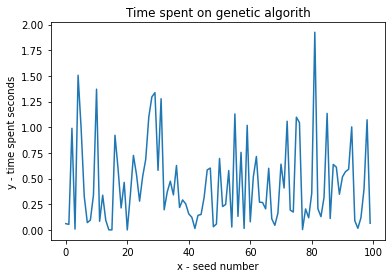

Average: 0.4518981385231018
StdDev:0.40935465903462726
Variance:0.16757123687335596
Max:1.924999713897705
Min:0.0009996891021728516


In [22]:
plot_times(times)
statistics(times)

Keeping our previous mutation  function would break the permutation and would result in having numbers more than once in an individual. Zeroing probability. Adding a random factor to prevent convergence.

In [23]:
def mutation(childs, prob):
    if small_probability(prob):
                childs[0] = EightQueensState()
    return childs

In [24]:
diff = lambda l1,l2: [x for x in l1 if x not in l2]


def davis_crossover(parent1,parent2,size,start, end):
    subset = parent1.state[start:end]
    child = parent1.state.copy()
    remaining = diff(parent2.state, subset)
    for i in range(0,start):
        child[i] = remaining[i]
    
    for j in range(end, size):
        child[j] = remaining[start]
        start+=1
    return EightQueensState(child)
    


def crossover(population):
    parent1, parent2 = random.sample(population, 2)
    if (parent1.state.tolist() == parent2.state.tolist()):
        parent2 = EightQueensState()
    size = len(parent1.state)
    start, end = sorted([random.randrange(size) for _ in range(2)])
    childs = []
    childs.append(davis_crossover(parent1,parent2,size,start,end))
    childs.append(davis_crossover(parent2,parent1,size,start,end))
    return childs      
        
        
population = init_agents(10)
crossover(population)

In [25]:
times = []
find_queens_sol(times)

Current seed is: 0 
Iteration 1
[4 0 7 3 2 6 1 5] cost 2
Iteration 2
[4 0 7 3 6 2 5 1] cost 1
Iteration 3
[4 0 7 3 6 2 5 1] cost 1
Iteration 4
[4 0 7 3 6 2 5 1] cost 1
Iteration 5
[4 0 7 3 6 2 5 1] cost 1
Iteration 6
[1 0 7 3 6 4 2 5] cost 3
Iteration 7
[4 0 7 3 6 2 5 1] cost 1
Iteration 8
[4 0 7 3 6 2 5 1] cost 1
Iteration 9
[1 7 4 6 3 0 2 5] cost 1
Iteration 10
[1 4 7 3 6 0 2 5] cost 1
Iteration 11
[1 4 7 0 3 6 2 5] cost 1
Iteration 12
[1 4 7 0 3 6 2 5] cost 1
Iteration 13
[1 4 7 0 3 6 2 5] cost 1
Iteration 14
[1 4 7 0 3 6 2 5] cost 1
Iteration 15
[1 4 7 0 3 6 2 5] cost 1
Iteration 16
[1 4 7 0 3 6 2 5] cost 1
Iteration 17
[1 4 0 3 6 2 7 5] cost 2
Iteration 18
[1 4 7 0 3 6 2 5] cost 1
Iteration 19
[0 1 4 7 3 6 2 5] cost 1
Iteration 20
[0 4 7 1 3 6 2 5] cost 1
Iteration 21
[1 4 7 3 6 0 2 5] cost 1
Iteration 22
[1 4 7 3 6 0 2 5] cost 1
Iteration 23
[0 4 1 7 3 6 2 5] cost 1
Iteration 24
[4 0 1 5 2 6 3 7] cost 1
Iteration 25
[0 4 1 5 2 6 3 7] cost 1
Iteration 26
[7 4 1 3 6 0 2 5] cost 1
I

Iteration 96
[4 0 3 6 2 5 1 7] cost 1
Iteration 97
[4 0 3 6 2 5 1 7] cost 1
Iteration 98
[4 0 3 6 2 5 1 7] cost 1
Iteration 99
[4 0 3 6 2 5 1 7] cost 1
Iteration 100
[4 0 3 6 2 5 1 7] cost 1
Iteration 101
[4 0 7 3 6 2 5 1] cost 1
Iteration 102
[4 0 3 6 2 7 5 1] cost 1
Iteration 103
[4 0 7 3 6 2 5 1] cost 1
Iteration 104
[4 0 7 3 2 5 1 6] cost 3
0.4119992256164551
Goal state! [4 0 7 3 1 6 2 5]
Current seed is: 8 
Iteration 1
[2 7 0 6 4 1 5 3] cost 3
Iteration 2
[7 2 3 6 4 1 0 5] cost 2
Iteration 3
[7 2 3 6 0 5 4 1] cost 2
Iteration 4
[7 4 6 1 0 5 3 2] cost 2
Iteration 5
[7 2 3 6 0 5 4 1] cost 2
0.02100086212158203
Goal state! [2 7 3 6 0 5 1 4]
Current seed is: 9 
Iteration 1
[5 2 0 3 6 4 1 7] cost 1
Iteration 2
[5 2 0 3 6 4 1 7] cost 1
Iteration 3
[5 2 0 3 6 4 7 1] cost 1
Iteration 4
[6 5 2 0 3 4 7 1] cost 2
Iteration 5
[6 2 0 4 7 5 3 1] cost 1
Iteration 6
[3 5 4 7 1 6 2 0] cost 2
Iteration 7
[3 5 4 7 1 6 2 0] cost 2
Iteration 8
[3 5 0 4 7 1 6 2] cost 2
Iteration 9
[3 5 0 4 1 6 2 7] cos

Iteration 49
[2 7 5 1 4 6 0 3] cost 1
Iteration 50
[2 7 5 3 1 6 4 0] cost 1
Iteration 51
[2 7 5 1 4 6 0 3] cost 1
Iteration 52
[0 5 7 4 1 3 2 6] cost 1
Iteration 53
[2 5 7 4 1 3 6 0] cost 1
Iteration 54
[2 5 7 4 1 3 6 0] cost 1
Iteration 55
[2 5 7 4 1 3 6 0] cost 1
Iteration 56
[2 5 7 4 1 3 6 0] cost 1
Iteration 57
[2 5 7 4 1 3 6 0] cost 1
Iteration 58
[2 5 7 4 1 3 6 0] cost 1
Iteration 59
[2 5 7 4 1 3 6 0] cost 1
Iteration 60
[2 5 7 4 1 3 6 0] cost 1
Iteration 61
[6 2 5 7 0 3 1 4] cost 1
Iteration 62
[6 2 5 7 0 3 1 4] cost 1
Iteration 63
[6 2 5 7 0 3 1 4] cost 1
Iteration 64
[2 5 7 6 0 3 1 4] cost 1
Iteration 65
[1 5 7 6 0 3 2 4] cost 3
Iteration 66
[7 2 6 1 4 0 3 5] cost 2
Iteration 67
[4 2 5 3 7 0 6 1] cost 2
Iteration 68
[6 2 5 1 4 0 3 7] cost 1
Iteration 69
[2 7 5 1 4 0 3 6] cost 1
Iteration 70
[2 7 5 1 4 6 0 3] cost 1
Iteration 71
[2 7 5 1 4 0 3 6] cost 1
Iteration 72
[2 7 5 1 4 0 3 6] cost 1
Iteration 73
[2 7 5 1 4 0 3 6] cost 1
Iteration 74
[2 7 5 1 4 6 0 3] cost 1
Iteration 75

Iteration 56
[4 1 7 5 2 6 3 0] cost 1
Iteration 57
[4 7 5 2 6 1 3 0] cost 1
Iteration 58
[4 1 7 5 2 6 3 0] cost 1
Iteration 59
[4 1 7 5 2 6 3 0] cost 1
Iteration 60
[4 1 7 5 2 6 3 0] cost 1
Iteration 61
[4 1 7 5 2 6 3 0] cost 1
Iteration 62
[4 7 5 2 6 1 3 0] cost 1
Iteration 63
[7 5 2 0 6 4 1 3] cost 2
Iteration 64
[3 5 2 0 6 4 1 7] cost 2
Iteration 65
[3 5 2 0 6 4 1 7] cost 2
Iteration 66
[3 5 2 0 6 4 1 7] cost 2
Iteration 67
[3 5 2 0 6 4 1 7] cost 2
Iteration 68
[7 5 2 0 3 6 4 1] cost 1
0.278001070022583
Goal state! [4 6 1 5 2 0 7 3]
Current seed is: 18 
Iteration 1
[1 4 0 7 3 5 2 6] cost 2
Iteration 2
[3 1 6 5 0 2 4 7] cost 2
Iteration 3
[1 6 0 7 3 5 2 4] cost 2
Iteration 4
[1 6 0 7 3 5 2 4] cost 2
Iteration 5
[6 4 0 7 3 5 2 1] cost 2
Iteration 6
[1 6 0 7 3 5 2 4] cost 2
Iteration 7
[1 6 0 7 4 3 5 2] cost 2
0.029999732971191406
Goal state! [5 3 6 0 7 1 4 2]
Current seed is: 19 
Iteration 1
[7 2 3 5 1 4 0 6] cost 3
Iteration 2
[2 5 7 0 4 3 1 6] cost 1
Iteration 3
[2 5 7 0 4 3 1 6] co

Iteration 9
[2 0 6 3 1 4 7 5] cost 1
Iteration 10
[2 0 6 3 1 4 7 5] cost 1
Iteration 11
[4 0 5 2 6 1 3 7] cost 1
0.04400134086608887
Goal state! [2 0 6 4 7 1 3 5]
Current seed is: 31 
Iteration 1
[6 1 3 5 0 2 7 4] cost 2
Iteration 2
[1 5 2 6 3 0 7 4] cost 1
Iteration 3
[1 5 2 6 3 0 7 4] cost 1
Iteration 4
[5 2 6 1 3 4 0 7] cost 1
Iteration 5
[5 2 6 1 3 4 0 7] cost 1
Iteration 6
[5 2 6 1 3 4 0 7] cost 1
Iteration 7
[5 2 0 4 6 1 3 7] cost 1
Iteration 8
[5 2 6 1 3 4 0 7] cost 1
Iteration 9
[5 2 6 1 3 4 0 7] cost 1
Iteration 10
[5 2 6 1 3 4 0 7] cost 1
Iteration 11
[5 2 6 1 3 4 0 7] cost 1
Iteration 12
[5 2 6 1 3 4 0 7] cost 1
Iteration 13
[5 2 6 1 3 4 0 7] cost 1
0.054997920989990234
Goal state! [2 4 1 7 5 3 6 0]
Current seed is: 32 
Iteration 1
[5 2 6 3 0 4 7 1] cost 2
Iteration 2
[6 3 0 4 7 5 2 1] cost 1
Iteration 3
[6 3 0 4 7 5 2 1] cost 1
Iteration 4
[6 3 0 4 7 5 2 1] cost 1
Iteration 5
[6 3 0 4 7 5 2 1] cost 1
Iteration 6
[6 3 0 4 7 1 5 2] cost 2
Iteration 7
[6 2 0 5 1 4 7 3] cost 1


Iteration 33
[2 0 5 7 4 1 3 6] cost 1
Iteration 34
[2 0 5 7 4 1 3 6] cost 1
Iteration 35
[2 0 5 7 4 1 3 6] cost 1
Iteration 36
[2 0 5 7 4 1 3 6] cost 1
Iteration 37
[2 0 5 7 4 1 3 6] cost 1
Iteration 38
[0 2 5 7 4 1 3 6] cost 1
Iteration 39
[1 3 5 0 2 7 4 6] cost 2
Iteration 40
[1 3 5 0 2 7 4 6] cost 2
Iteration 41
[1 3 5 0 2 7 4 6] cost 2
Iteration 42
[3 5 7 1 0 2 4 6] cost 2
Iteration 43
[1 5 7 3 0 2 4 6] cost 1
Iteration 44
[1 5 7 3 0 2 4 6] cost 1
Iteration 45
[1 3 0 7 4 2 5 6] cost 1
Iteration 46
[1 3 7 0 4 2 5 6] cost 2
Iteration 47
[6 3 7 0 4 2 5 1] cost 2
Iteration 48
[2 3 7 0 4 6 1 5] cost 1
Iteration 49
[3 6 0 7 4 2 5 1] cost 2
Iteration 50
[1 6 0 7 4 2 5 3] cost 2
Iteration 51
[1 6 5 3 0 7 4 2] cost 1
Iteration 52
[6 1 5 0 3 7 4 2] cost 1
Iteration 53
[6 1 5 3 0 7 4 2] cost 2
Iteration 54
[3 6 1 5 0 7 4 2] cost 2
Iteration 55
[3 6 1 5 0 7 4 2] cost 2
Iteration 56
[6 1 5 0 3 7 4 2] cost 1
Iteration 57
[6 1 5 0 3 7 4 2] cost 1
Iteration 58
[6 1 5 0 3 7 4 2] cost 1
Iteration 59

Iteration 64
[5 2 1 6 3 7 0 4] cost 2
Iteration 65
[5 2 1 6 3 7 0 4] cost 2
Iteration 66
[5 2 1 6 3 7 0 4] cost 2
Iteration 67
[6 3 1 2 4 5 7 0] cost 2
Iteration 68
[5 2 6 3 1 4 7 0] cost 2
Iteration 69
[5 2 6 3 1 4 7 0] cost 2
Iteration 70
[5 2 1 7 6 3 0 4] cost 2
Iteration 71
[5 2 4 1 7 6 3 0] cost 2
Iteration 72
[5 2 4 1 7 6 3 0] cost 2
Iteration 73
[5 2 4 1 7 6 3 0] cost 2
Iteration 74
[5 2 1 7 4 6 3 0] cost 2
Iteration 75
[5 2 1 7 4 6 3 0] cost 2
Iteration 76
[5 2 1 7 4 6 3 0] cost 2
Iteration 77
[5 2 4 1 7 6 3 0] cost 2
Iteration 78
[5 2 4 1 7 6 3 0] cost 2
Iteration 79
[2 6 1 4 0 3 5 7] cost 2
Iteration 80
[2 6 1 4 0 3 5 7] cost 2
Iteration 81
[2 6 1 4 7 0 3 5] cost 1
Iteration 82
[2 6 1 4 7 0 3 5] cost 1
Iteration 83
[2 6 1 4 7 0 3 5] cost 1
Iteration 84
[2 6 1 4 7 0 3 5] cost 1
Iteration 85
[3 5 1 4 7 0 2 6] cost 3
Iteration 86
[3 5 4 1 7 0 2 6] cost 2
Iteration 87
[3 5 7 1 4 0 2 6] cost 1
Iteration 88
[3 5 7 4 1 0 2 6] cost 1
Iteration 89
[3 5 7 4 1 0 2 6] cost 1
Iteration 90

Iteration 44
[6 5 2 0 3 4 7 1] cost 2
Iteration 45
[6 1 2 0 3 4 7 5] cost 2
Iteration 46
[6 1 2 0 3 4 7 5] cost 2
Iteration 47
[6 5 2 0 3 4 7 1] cost 2
Iteration 48
[6 5 2 0 3 4 7 1] cost 2
Iteration 49
[6 5 2 0 3 4 7 1] cost 2
Iteration 50
[6 1 2 0 3 4 7 5] cost 2
Iteration 51
[6 1 5 2 0 3 4 7] cost 2
0.20299887657165527
Goal state! [6 1 5 2 0 3 7 4]
Current seed is: 50 
Iteration 1
[0 5 4 2 7 6 3 1] cost 2
Iteration 2
[1 5 4 2 7 3 6 0] cost 1
Iteration 3
[1 5 4 2 7 3 6 0] cost 1
Iteration 4
[2 3 5 7 1 4 6 0] cost 2
Iteration 5
[2 5 1 4 7 3 6 0] cost 1
Iteration 6
[0 5 1 4 7 3 6 2] cost 1
Iteration 7
[0 5 1 4 7 3 6 2] cost 1
Iteration 8
[0 5 1 4 2 7 3 6] cost 2
Iteration 9
[0 5 1 4 6 3 7 2] cost 1
Iteration 10
[3 5 0 2 4 6 1 7] cost 1
Iteration 11
[0 5 1 4 6 3 7 2] cost 1
Iteration 12
[3 5 1 4 6 0 2 7] cost 1
Iteration 13
[5 3 0 7 4 1 6 2] cost 1
Iteration 14
[5 3 0 7 4 1 6 2] cost 1
Iteration 15
[5 3 0 7 4 1 6 2] cost 1
Iteration 16
[5 3 0 7 4 1 6 2] cost 1
Iteration 17
[3 5 0 7 4 1 

[5 7 3 1 6 4 0 2] cost 2
Iteration 11
[5 7 3 1 6 4 0 2] cost 2
Iteration 12
[5 7 3 1 6 4 0 2] cost 2
Iteration 13
[3 0 5 7 1 6 4 2] cost 2
Iteration 14
[5 7 2 1 6 4 3 0] cost 2
Iteration 15
[3 0 5 7 2 1 6 4] cost 2
Iteration 16
[3 0 5 7 2 1 6 4] cost 2
Iteration 17
[1 4 7 2 6 3 0 5] cost 2
0.07299947738647461
Goal state! [0 5 7 2 6 3 1 4]
Current seed is: 60 
Iteration 1
[5 0 4 1 6 2 7 3] cost 2
Iteration 2
[3 7 4 1 5 6 2 0] cost 2
Iteration 3
[5 0 4 1 3 6 2 7] cost 1
Iteration 4
[5 0 4 1 3 6 2 7] cost 1
Iteration 5
[5 0 4 1 7 3 6 2] cost 1
Iteration 6
[5 0 2 4 6 3 1 7] cost 2
Iteration 7
[5 0 2 4 6 3 1 7] cost 2
0.028999805450439453
Goal state! [5 2 4 6 0 3 1 7]
Current seed is: 61 
Iteration 1
[0 2 5 7 1 3 4 6] cost 2
Iteration 2
[0 2 5 7 1 3 6 4] cost 2
Iteration 3
[0 2 5 7 1 3 4 6] cost 2
0.012002229690551758
Goal state! [2 5 1 6 4 0 7 3]
Current seed is: 62 
Iteration 1
[4 6 3 5 1 7 0 2] cost 2
Iteration 2
[4 2 1 3 6 0 7 5] cost 2
Iteration 3
[4 2 1 3 6 0 5 7] cost 3
Iteration 4
[

Iteration 61
[0 3 1 6 4 2 7 5] cost 1
Iteration 62
[5 3 1 6 4 2 7 0] cost 1
Iteration 63
[5 3 1 6 4 2 7 0] cost 1
Iteration 64
[0 3 1 6 4 2 7 5] cost 1
Iteration 65
[0 3 1 6 4 2 7 5] cost 1
Iteration 66
[0 3 1 6 4 2 7 5] cost 1
Iteration 67
[5 3 1 6 4 2 7 0] cost 1
Iteration 68
[0 3 1 6 4 2 7 5] cost 1
Iteration 69
[0 3 1 6 4 2 7 5] cost 1
Iteration 70
[0 3 1 6 4 2 7 5] cost 1
Iteration 71
[0 3 1 6 4 2 7 5] cost 1
Iteration 72
[0 3 1 6 4 2 7 5] cost 1
Iteration 73
[0 3 1 6 4 2 7 5] cost 1
Iteration 74
[0 3 1 6 4 2 7 5] cost 1
Iteration 75
[0 3 6 2 5 1 4 7] cost 1
Iteration 76
[0 3 6 2 5 1 4 7] cost 1
Iteration 77
[0 3 6 2 5 7 1 4] cost 1
Iteration 78
[0 3 6 2 5 1 4 7] cost 1
Iteration 79
[0 3 6 2 5 7 1 4] cost 1
Iteration 80
[0 3 6 2 5 1 4 7] cost 1
Iteration 81
[0 3 6 2 5 1 4 7] cost 1
Iteration 82
[0 3 6 2 5 1 4 7] cost 1
Iteration 83
[0 3 6 2 5 1 4 7] cost 1
Iteration 84
[0 3 6 2 5 7 1 4] cost 1
Iteration 85
[0 3 6 2 5 7 1 4] cost 1
Iteration 86
[0 3 6 2 5 1 7 4] cost 1
Iteration 87

Iteration 22
[6 1 2 4 7 0 3 5] cost 1
Iteration 23
[6 1 2 4 7 0 3 5] cost 1
Iteration 24
[6 1 2 4 7 0 3 5] cost 1
0.09700965881347656
Goal state! [4 6 3 0 2 7 5 1]
Current seed is: 77 
Iteration 1
[0 3 6 2 5 1 4 7] cost 1
Iteration 2
[3 6 2 4 0 7 5 1] cost 2
Iteration 3
[3 6 0 2 5 1 4 7] cost 1
Iteration 4
[3 6 0 2 5 1 7 4] cost 1
Iteration 5
[2 1 7 5 3 0 4 6] cost 3
Iteration 6
[2 1 7 5 3 0 4 6] cost 3
Iteration 7
[2 1 3 0 7 5 4 6] cost 3
Iteration 8
[2 1 3 0 7 5 4 6] cost 3
Iteration 9
[2 7 3 0 4 6 1 5] cost 2
Iteration 10
[2 5 3 0 4 6 1 7] cost 2
Iteration 11
[2 7 3 0 4 6 1 5] cost 2
Iteration 12
[2 7 3 0 4 6 1 5] cost 2
0.04900336265563965
Goal state! [2 5 3 0 7 4 6 1]
Current seed is: 78 
Iteration 1
[1 4 2 5 0 6 3 7] cost 3
Iteration 2
[1 6 5 7 3 0 2 4] cost 3
Iteration 3
[1 6 5 7 3 0 2 4] cost 3
Iteration 4
[6 1 4 7 3 0 2 5] cost 1
Iteration 5
[6 1 4 7 3 0 2 5] cost 1
Iteration 6
[6 1 4 7 3 0 2 5] cost 1
Iteration 7
[6 1 4 7 0 3 5 2] cost 1
Iteration 8
[6 1 4 7 0 3 5 2] cost 1
I

Iteration 31
[6 1 5 7 2 0 3 4] cost 2
Iteration 32
[4 1 5 2 0 6 3 7] cost 2
Iteration 33
[4 1 5 7 2 0 3 6] cost 1
Iteration 34
[4 1 5 7 2 0 3 6] cost 1
Iteration 35
[4 1 5 7 2 0 3 6] cost 1
Iteration 36
[4 1 5 7 2 0 3 6] cost 1
Iteration 37
[4 1 5 7 2 0 3 6] cost 1
Iteration 38
[4 1 7 5 2 0 3 6] cost 1
Iteration 39
[4 1 7 5 2 0 3 6] cost 1
Iteration 40
[3 7 0 4 1 5 2 6] cost 1
Iteration 41
[3 1 7 5 2 0 4 6] cost 1
Iteration 42
[3 1 4 7 5 2 0 6] cost 1
Iteration 43
[3 1 4 7 5 2 0 6] cost 1
Iteration 44
[3 1 4 7 5 2 0 6] cost 1
Iteration 45
[4 1 3 7 2 6 5 0] cost 3
Iteration 46
[4 0 3 7 2 6 1 5] cost 3
Iteration 47
[7 4 2 0 5 3 1 6] cost 1
Iteration 48
[7 4 2 0 5 3 1 6] cost 1
Iteration 49
[3 5 1 4 6 0 2 7] cost 1
Iteration 50
[4 0 7 3 6 2 5 1] cost 1
Iteration 51
[7 3 0 6 1 4 2 5] cost 2
Iteration 52
[0 6 7 3 1 4 2 5] cost 3
Iteration 53
[7 0 6 3 1 4 2 5] cost 2
Iteration 54
[5 2 6 1 3 0 7 4] cost 2
Iteration 55
[5 2 6 1 3 0 7 4] cost 2
Iteration 56
[6 1 4 2 3 0 7 5] cost 3
Iteration 57

Iteration 6
[4 7 3 6 1 5 0 2] cost 2
0.0390017032623291
Goal state! [4 7 3 0 6 1 5 2]
Current seed is: 96 
Iteration 1
[4 0 7 3 6 1 2 5] cost 2
Iteration 2
[4 0 3 7 5 2 6 1] cost 2
Iteration 3
[4 0 3 7 5 2 6 1] cost 2
Iteration 4
[4 0 3 7 5 2 6 1] cost 2
Iteration 5
[0 3 7 6 4 2 5 1] cost 3
Iteration 6
[4 0 7 6 2 5 1 3] cost 2
Iteration 7
[4 0 7 6 2 5 1 3] cost 2
0.03799748420715332
Goal state! [2 5 1 4 7 0 6 3]
Current seed is: 97 
Iteration 1
[3 1 4 7 5 6 0 2] cost 3
Iteration 2
[2 3 1 7 4 6 0 5] cost 1
0.01600360870361328
Goal state! [5 3 1 7 4 6 0 2]
Current seed is: 98 
Iteration 1
[1 2 4 6 0 7 5 3] cost 3
0.006024599075317383
Goal state! [1 4 6 0 2 7 5 3]
Current seed is: 99 
Iteration 1
[6 3 0 2 5 7 4 1] cost 2
Iteration 2
[3 2 0 5 7 1 4 6] cost 3
Iteration 3
[2 0 3 5 7 1 4 6] cost 2
Iteration 4
[6 3 5 0 7 1 4 2] cost 2
Iteration 5
[2 0 3 5 7 1 4 6] cost 2
Iteration 6
[6 0 3 5 7 1 4 2] cost 1
Iteration 7
[6 0 3 5 7 1 4 2] cost 1
Iteration 8
[6 0 3 5 7 1 4 2] cost 1
Iteration 9
[

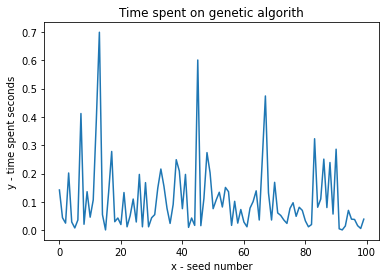

Average: 0.11026087045669555
StdDev:0.12268640622019401
Variance:0.015051954271226459
Max:0.6989989280700684
Min:0.0009992122650146484


In [26]:
plot_times(times)
statistics(times)